Softmax与交叉熵损失
===

# 1.线性分类器
假设现在我们有一张2×2×1的图像(即图像大小为2×2，通道数为1)，像素值是$\begin{bmatrix}
56&231 \\
24&2
\end{bmatrix}$,此时我们构建一个线性分类期去判断该幅图像属于哪一种类别

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABxwAAALECAMAAAAFGrVOAAADAFBMVEX9/f3+%0A/f39/fv+6O37+/vs7vzr/On//v/p7/z76er55unr/OX85urp+ej66Ozo7Pnp%0A+uvt7/n5+Pjs7v/86uz6//3q+uX5+vrq7fv/+/zn/Or6/vvr/OLt+enz9PT+%0A6er29/fu+ubp7vnn7frm7Pf7+/nj+On56Onp7v7y8fD75+Xs8P3o+uP96u/2%0A5efT1NS3t7fm/Obw7P2zs7Lg4OHn9+bm5ufq6erl6fXu7+/s7PnMzM3p7/bs%0A7OyioaHj5OONjo68vbvu+OyKiYvq7PXr++7p9Onr/Ovb3NvW1teXmJjs9+SW%0AlZOGh4f16unn9eDQz9Dv++ve4u336e2/wMDj7/Wdnp6pqaikpaabm5zm8Pqu%0Arq+SiYrz4OHj8+N8f33u293IyMiysrn14uSHiZP2/PecmJbo7PLKzNXExMTg%0A5vLb69vd3ue1t8Lm5/GRkpDax8rRw8POvsHx4+bp2dyhkpTi1tdnZ2edoKyP%0Aj5ZiYmLu8P7Z3ep1dXXJt7mzqanZ6dZsbGyCgoPn1dd7eXnLzdrj0dO5qav5%0A4ubK2sqTlJ2Yjo7n8eS5srC2xbeKeXy5vsitnJ+knJtwcHBeXV1ZWVmVm6VC%0AREGxoaPi6u7U2uWjprGYn5bO099IR0jz9+nt4uLk7OSCf33h792olpnEsbOR%0AnZqywbHw/PDezM53eoWElILH18WptKZVVVVMUVyLlYlNTU08PjzH0siMmJWp%0Aq7bN1M3z+OOZhojW3dTCzr/w7/TT1986NDVOW01UWWTHx83w9vCdnKR0g3Os%0Asr2grKPSyclRUVHe59xYZVeYo6NFUkO2vbZ+inybq5qKgoO+ws4vLy748/Nc%0AS03CydTM19V+go1jUlRdYWzQ3c19iIm7ybknKCeTgYRuc33s5uXa0dKtu6tq%0AWVuiqZ/DuLmhsaBUQ0aQno3d7eIdHRxFSVOLj5zS4tOqtLNlanRxYGJ5aGra%0A5ea2wMA7P0mCcXO3pKZib2CWppbZ4dVseWpLOjwxND8yPjEQERDAycvGv74q%0AGx/rAAJnBElEQVR42uydv2sjRxTHZ5cB9QvLIgRCjQpVFkjICCPLhxrZSEYQ%0AY1vYEBSwiSHgMhBwEeMumICTkCak0B8QSALXhDQpnCYgznXCXZHmqrtA2nD5%0AztuRZkdjab2WVlon+rw3b0arvdXsz++8ke6O2XFg6djAnYhtZ/I69vxh07Bm%0AI53mnKeBlQxsOx+CcbZihTE+BpvpdJjrp2aCedlK56j9yQ+/v/7n9Yvvrvb3%0AmrUcD/Q6/GiyxzPj1QvSI/LAcfzj60oycYN7ezrMZSviw5U8/CZiKx6GHQPW%0AuLlT7x+I4zTueXzbkWHxqSNL4+lJ8vg4mUmhpOdotimOad1sHXQhVizGMjou%0Ad4POdKzUVDPFMcVmMIgjd2rbz1pffP/i9evff/7y8qBXLzgMnzPURnuiAfv/%0ALo4ZNxSmTrbpS5dOdOFpuySjDUNW4hiTOFozgmfYmLs4JRPMDs10xONbmRDf%0AyLAY4TzveRzYw2uSRdVie34Wnjna+UWKI2DADYBXjAfcnUPmyB5fLOYVyr3D%0A/ldIHV98/fFWaa2S84LiOBk7UZmjk9bFMeNSyMSMS6SmFHW+DV++NtLV+IR9%0AqIwSZrASx8cyIfObMaRsMrhvruVOLszG3IwiM55IZrA97dzaSRNHD3Aww0mw%0A5uYmeXvqtDVSr5jRtREIRVTGDbGbZhMyR/jjamyQY161tPXxtz+/+PnXiy5m%0AVX2B4RIcviRnjpaZOQpcgbeA1DFEGrXzbdryU0eXUyeeqJE6nrgeBdJIIxtf%0AieP87k0/85PlUcG2yYeVC8dpm1DgJieqAKykkYlG+NNrlqszA3EUcOJh24sX%0AG+ijjcwUSBwXiCvH6jCGMLfMEf64msRx+1n34ruvf/j2k/bRBmZVPR4ACpjk%0A7xwtAtrINXGkQ+yyTOy4I1L31cyVJ1qecd2S8I0kpbaqg0/K0HkPsghHCMIC%0ArMRxlnszrYySP6R+s5htKXmkggc2GblWwzKuTkYTTwTyoEUl5PFCyUuGbo9o%0ANaMG94ZwwFy1vfujS6SGzsTO2fOz8cMpDtdJ0Dzj4KRixtVMpgtUISw/c7R4%0ArtbsHbQ//vXbry52imvrWccZDnZskPTMkYA26uJIx3cx4sjE9QxzzZoCnW51%0AxnXnbMnQ7UwqPbwyn47zYeZIUZonH6PMN7ASx/lNq1oBJ7UzPaSlkbFn/Ebf%0A/BMnbuYhjvWUOIbII0rUmtrcU3BCbm9SdBFTwdE2U2OBeUQbFYp0LAT5gJmp%0AI/oTr5GrmsFk1kDVfDJH5Q99DXx19AqVtWLr6pMvP20fnjVrWQeIk0mdse2n%0AkTmOiyNdcQv6QY4pjISsGFNpGeNaFrn8WVW6W+Hcd9XV5DeG01Bm4ui5an9W%0A4ji/ezM9ZrMDbZROBg80wtM8I/VxT0T2GO60HrBDM0c+21eOjmCkjRnOeMjn%0ApRAR4Cn1nSMVisSj24g65pe4OrGrowjUIidlpJt2qI8zZo4RRNHMHAUWz9aa%0AZ4eNq4vLndJGuSrFkbSRxBE8vcxRzmDEjsuMyVSKcCr6TIE0uTABk6pMJo5w%0Alwc6l+AGtTi1uVJGqhSradU4Mse8bqMFGRW1JWYrIvY4lpa82lq2A3WMxoN/%0AkMPh0WoUKY5EPs8Je7g9MxKWiU1FBBghX0Rry2qckONtxQvdyzQ4H3s0cl8Z%0AZ88cDdELk0ddKMW8arXeKW6eN3YOzrYr2Zwc6dCmLeupZo4Ebp+YUbliipwC%0A4S9kPlyNQ7lwYulzqiA4EaSyMnJqyoXJa6CIQAx10fOTRsBXP8iZuzjSz8EN%0AO4lkeVmGDeWmCezpiDteObAjE/J0STOYBX9gParoqZQnZSR4GtBSY2XVxvsm%0AtgxUSY/epiptkNdIL1YdGR/Hhaln0uyZoxI8hDA3XzOLO4X1Zq94cFjaW6tX%0AoY0ckDYCiOMEEp45LkocmasxlElqJCAzDEVKDblKz/SIiiWgIWvYSLZNgtfF%0A6u85zsD9UuTcBQzkUKlCptpGyzlx8ihwGfIU4KZhjXw4tK70OYsjaeNskDii%0Aa+mHYmmkyeblpNaGLRXu6XDG1MOIw+eZOUaXR2yBOdlqZXvjbK+3XS+IvJHL%0ADQtWmeNDMkc4BYVczJKOCxtKjpY3ao53E9AIfDuKIHtMCSPgo5RcXhGSlTjO%0A9mtVAW6su0KhBtYFL1+u116uD21dlZEJzBYCtgADFKhGmWDhrAeoSaoRvBqZ%0An/xSoGhWFKiqCWTHdmu7tPC9amG57I6oSdOo7hZ2qwEvxNvfarU2RtUnm815%0A/s97H5M50nR2Lpf1oVriZCOQg4FCtVZprm1srDUrNfR5+CYh3p5MtjBpyzmH%0ACxYijjZN7qOr6NAyyAVt5GRDKB9PwjQq4EBWjujhT6Pd+M9wp8Chl5eiuHdW%0A4hhNHGWucbdbb77qEKK6pQr1887zDjlM91sRVMtwFBXgpsHFx6wFDa81Nm43%0ARshNRWMtxO5ZP9Cl8YoiKkL1CwvFOknB3y3ZMZNX0mV7CWxDh6Q8sojfYXKB%0A52QLtUqlXq+XywgVmKgqaFAYOuwjvQSb4o/TJprNNXG00C281sG7WGmCk+ng%0AU1Ggstg7wQLEkUMZcTjWaefryQNHsFIjfUzAP9hiiYGVvIYwn14pC+i8AVHd%0AawlojJyCWvIXmUlZgktRCKTDGfZ7JY5hWBKmEkfHqdVfvfvzmigWrxdGqYhP%0A0wxLFNel0hE4AEdHpVKxVMKSKMXfZnFKKelgGcpkShQAwpHA79gsXM/V4H4P%0Aj6hjSaRUfNZbq9eyfjphpSKY/BJTzISSoBEdQLXBh50NvDMqWhNvURCvemdE%0Ar6dthTb7HIt+vL0/mojNISAJhTrGL450M3vQxup6eZtGRPTxI4ufznQ2QK9H%0ASfkdDkgCfh/Ch+KI8RWuoZ6ArgRio/O0eA4fgddqR25vsWM4+J1mvVYQ6aPF%0AHY+tiCqOdtq5e/nq3cHmKXFzmiBarfPz4+NG4/j4s9bp4+hOLhR3NE53sGSi%0AYYVut4uIFrq2tbXV2DpvYRk47fpViAVd9uObORaiRX07P28ZH6+/BKexGlxn%0AR7B/WDrbhnw4JI4RYRYTPzDd7u3Jgc0HRfDBB6ioIZ0CylSwghpKTBhMXP92%0AjTVEZcSiiT/CwveXlawT/7QqwSGO6+UOHY5hL6RhtFSK1UKGkvLQloq9tbJ4%0AROdttmRx5AJqIG/cPnsmzzsoyhiwZI4tNbSrXVKiAfc1Djy8eIZxqBiXpLjj%0AJGVqO7no4oiGbd8Vyrel1nG/PxgcgwbESILXS2UwGPSvLr744oq6NncacGPR%0AVFNrNQaX6NrFVf/SX7iFQhU5bGJLOUpjvjtEW2wP+v2rK/SsTR+hCgX1UrIV%0Am1FobI1M0G43WpvF23IN4kgPy9TDLZXC6vRPvp0VD7v+UGV/yC+bvm2iUNjf%0A3A9hE6DqSu5bY1o0IfXvHhZ79F9fxS6OnKN4uWq58+xg3z8avlEAtFex+U33%0AZjr7XYzUtlr7R3viEe14PL1cceSc+TP5zMvVyr3SJoaRO6c0RpToZ/NmM9m2%0Ab3JzAwcix8EQuYtDj4Ea9nkljo/KHO272qt3m/2rLy6gQUIvBoMGnv3CjpfM%0AH4PP/3775s2bt39/HldfdPkI57NhY9BH1z55c9EfYOFn/luJYPAHVPvtp28v%0ArmhE8Znhsiwcqdv9QevgXbPmcCsqKQFzCuWNUrcN+X//sg2tFSA+jDYMTkav%0Ag2BzEWjAdcMW+u+//367W9qoFzy+AHHMuMzLrm/vbTYucTSo/wNlg8tBvLQH%0AjfZkQwf6/QuMbFsHZ831OwfauGxxlDP5zMlWms/2GxdiCKl2Bq5BV8hxgsu/%0A7J3LSyNZFMZNGxi6kCxCmiADM71pQg+YFlpsmkaNuGklBqEaHxjRRibgymgS%0ABwZUfKBCEDE9iywzjS78D9zOxq3gXpTGffdC1853zr3JTeWmUpYaTYPfOfdR%0AVUnqpqzU755bD8sVh8l2xynbWV9fXJmcxaZ/Tx21JzjeCo7e12dD7Yn1Lys4%0Azmez6EwhQ0FKRDN3S5lEpoY7Knt4uvPj+7dvPy6PD7Ny3p6LlHA0uEpulM2e%0AXv749u37j514NrO3V1zXrZTg7M51WcnGT9Gl+IEOxWmW53FSFTXNVk+h+zqg%0AjAZ84xgK+Brvvjh/d9KKS87dRY78xDevH8+0GYmsr6x8EXSUcuaiMjnBQCSJ%0Ami5CjY2qL+JxjsXIyEwH4O+tNxx/BRxfBOkfi0Tp50t4tApwqqec2Lm6ii73%0AXyuLg2Pt/Z2NAkcvjcwDjm/ezk6ufFlkOvK2Ylk3388qBBU7OAb89c/K6nDv%0Am67fEDHjnOMTHF3BUdzHwXBcXPzyNZ4YGVleHpEmtHkHExmK6r7ppKur3czh%0ADh3nTzO7+Sto06WW7YX131Lc/KvdvdPL79++X8b38pub27f7INk+Lu5el5U8%0AbbTLS7Axs7u8+XjSN/748vJoIo6ebe7i/Oyk9RePSzEdAUeKlBZxYBuMDIwp%0AiaEwdxoQoveirglEjybsbABeqdm+ycUvi33deEwrn1OtLxzpCXFNgOOH8Qid%0Ae1jtm41alM3W2aMWZTSPZvvW0VmQcHzV+ujDqnw5DsqXv/W8eRuZLMYDSHAI%0AZUY59e4HRJaIoqdXaxozHjxFExTASGWEstmsKOLHlyv/rEyOERz58tzgExvd%0AwBE3cTAcC0fbCYxSxXPLF9cz1+Wam5+H3zLBnTUnTM/o3Uv7m7uHl5dgY35/%0ACZq/nWaqJdgddD2/v5lBVPvjOLN5Qe1tGF0v7S/nsqc7O3FstPkG0IzMeX+4%0AWM5hSDd3MQQ4eiCXkSPkfclwXP+yPjgwyldTqCtztEtw3pIVM0y3l1t7+VXK%0AmLoHjXTPYrw38jBwfMGxY/A/huMiNscw+rblBn9kjeQiOP3dJ+DYCj0qHT1F%0AOAYJjuORr4uIB/L55Z9T4+y6rqhHfIUucnz9b4bju9+C3mDQ/8RGt5GjguPX%0A48T29fn5glVpOOxWJSprMLidFSuQnkEbyfnNPRznM1dLyYMNaM2VFpy1BlN+%0AQ21AaFo+fvljJ4umLdCqNmCPK3wXaOE8Ob+N4DFLG402WLqqs+EtDynsEQcX%0Ay4lsNrd9VDhpbXV/ypHh+O7Np9HI6mRkuH0G900o9feLUs1QBWeVy/meVZrP%0AenMP+vBpfCwyGB35jAuOgvW/lQNP1w/++b7nw9vo5Grf8Hgv3Y+iNPd5rs46%0AstrRZ+Rl6ejo+mI02rcaGes9PwMcK/XwsWMpcnxNkePx12xu83r+6GgOovbO%0AVVjj6wOMcik0GqLK/Px2Pr6yuDpMcPQH/U+Bo3s4QhhWBRxxXcnuxVG6cHZ2%0AVmChTKXCqTBEmdtSTW2F7YRF0+EtONX0bHp6Kp1c2j08Pd3bn9tIT7hVaiIF%0AFaqnCfLbqUBWWEhuZncu0bTkAn8klHp0hVPUsoPrzd1MJr89t1DAn8HeHkEL%0AR/to2u7+UaFNxBGu4kYIw4gEx9nBwYHxzx87OjvfkUShq4uNM3aL4W0kzGZh%0Ahq6zf+3s3b/6qzvputGB2TH82+T3D3DO8QXB8SXBcWA1MjA+86G//+MCGakf%0ACbX6Km0xeGVnCA91j8ajuYvGgKPHC1HFT3CcjR8nlq8PqJlS6UprcHWkP8IW%0AOhZQg0SjuT+8sHE+d5FYXGc4vvaDjU9wdAlHfgyfvwjH/PUQ4KiUSsVCIZ8J%0Ag5O5K4Va7IWlRm2lpg6W8oeHh7v7ybUpHOencUifvrmltmwNfisppKwl9zOn%0AO3FqmpwZhkw2A8m+xlMyQbH7slgMmywWTqU35rbze7mri2Q6ZQiZWs61MLWh%0AnpaCqdxA25IX+b3M7kWS4ej6jOMLD11LAThGB/uG24d63pc9x+ym8pdq/HA4%0AvBW16nr9n63hjcgr1NXTj9Ax2k1Xq2IY6+HgONY3O9z+ob+jR4if01Po4Q5b%0AnZzNKsypUKywMDOeyyZwAVZnQ8CRb+WA/L/19LdHZ+M5dCCn0FD5BTQVGtcL%0Aqc5UoVMcqBHIUF4QmsLCqXQ6eZ1bnxwc7h3qfE1sfLoexy0c+WHVCo7n6bOY%0AFFdM310U8DU7KNAMQtZQeOJgXsIxPWFAW4YRvrHhxfyWsJ5gnFVTmJJNYZii%0AoMP8AcHxME8ICrMM00SnwDBlaVvjKSQoFAohxeD3UfpIIWNi7Wg/v7d7tXSQ%0ADld0V1RPR1a5VXUzH396mcIYCsjv7eUvDgonriNHmMdbhGNfpLu9n86mFCXH%0AzSzutaqp9F+OuWwK0rPy5ePEgpxXyO9OL3GDwMzb4QHAsbP+cIR+lXBsH44M%0AjPYOfeT4WT0BOVZXhXWJHpcpsphp4rGUR9vd0THAsacx4IhE4/MMx4FsHL20%0AqRTvo9Ry7K0WYabo1zVSTokKWMyMsbowHSNDdyQmhuwwLrYxP4qbsLt739C+%0A6PU2zvNtG1dWOLZCftMKx/fyudXYuQG45nqqxUFbEypynGhpMTDHheP1Wz6n%0A43dYM6M8aVMU7eKYHw4LOKJpQJDBRwafFkJrNcuUnCUV0ksZebuaD1FQCwIB%0AjlNhn6PMupqq8hc1pgQclw5SJ+4jR0jCcYTg2NtfvNXeSwVzj006TdeSp0k9%0A3lUUlfTyvqotb4X8fGv5AEeODzCs6g3in5wW4Tjyqb+D2YifLhIMChv1Upj6%0Aidqf29L/87URHHGrPSLHoQaCIxxwfNMeZThOhNvafG2caAf1AZJF5723zTTL%0AcyTfI+acYHaiL2LwkFx4bW75eDAy+olv5cCu/hQ7uj7nqMMRUDSRUwk21leu%0A4AjeuaOjvXyiMCrkY2OHcUVNkZdkhKckHJcIjgazkX9eSmqqcr4LNUNu5kPT%0A6eT+lYJjwNdm5z4Htd0lWfGLApvHnDqohKOLU44eCxxHe/n2ZiV6CZfSRXxY%0AZpUiJNak57NnbtDobQq+ZziOvh16kMgRx7sXRTiOjcwQHAHFrndwJiRHd2Ks%0A5X4KWNFplk//cxtswk2C4+ft7myiUSJHGk3wUCpGjtgRBRxZ/AXMUvtJxWWm%0AzHn6kXJNFYzk5kIo6MiaTi73ERzRhWzixxI/wdENHOlqHDxZNYb7HHPynCPD%0AEVgUbKxv5NjiLnLc2gLu3Amr8AEhmmM2mTao2yIWtbDz6ziTDmvGbsdgQgy0%0AsbR3iGFVQhBRluHYjKxk1qo+4QKQkDapKSAVniI47hIcjWaWr7pD/Hk2LpfJ%0AJrsvhZny0Gly91zBsc3vLnQkvKGQcByIzI5++tiFYdWyf0TEVWUMSnuD8Km1%0A1PTMbeTIcMTz4wBHL7W27nBE6FgOxy4oJkyNfBqw+yoM6ZxM67iDVRx1pdL0%0AkDZ5ztHT6nncWzlED8aLbgt2ov72RDRL4/s8rMpnGEBEizCDichMVLkps8eo%0AK/NRwkwp5ji3F0dVYiPBMX4s4OglOD4Nq7qD4ysywPGoPbcjIsdCrCTa2587%0A0idQy/CCmuak6dIFOXNrExgkdc9GBxEQXbwcbJRlORzTBt6MdKv+QRUxpkkl%0AZldRtUWBACNyugyOgZri08I+ZfhY4WwQFt9aOsAJjsVh1QJHEq4iRw8He0HA%0AsXc0WgZHr/rho8YuikqJE44ydxYOKO7YyHBsl3AM1oYjdFc2PkMsUAbHTwTH%0AmGKjCQFi9xQ4FieEZNVh3KENcJzbFHA8O3nlgVrLhK/3gFJwxD7DkWMiS3Cc%0ASsV4K5lCjHVOLCYQclFKJLHBRV2aKGRXUHyM5TW3rqtp3UxaiXCGI3ffZWCR%0ATl6dHsdxzrHrxNv0BEfXw6qvKHb0x+g+R4Lj/HkhFSOFnj83nkMO8MErAs8d%0ABGbYONBpQH8YWy2waqVhhSOEZcoMNAB4sUs42DtIxk/2sqMthYhlw6oEbcM9%0ArMX6q8sQCoXwx0Bp/fTSElqkZB1WZTiGnztKW61UC8bHKrF8SzYW390WMMBt%0AviDnnOEIMroSRYLiPkceVsUFOXyVjeXoF2RHgjQ6wuCicF45DUWVy+ugJoaj%0AOOf4/iY3ljmh0WOV/u5ff31VuiDn05uOM0ARzjJjfOLMh3QPFi7WfDKxaTi0%0AmI/gOI8nUhTh+KxVu0LK85ACmr3P+PSy/6TnfDuKYVW6e423FkuLf9uUy0xO%0AasuoIBnaNtFe79ph+sZlV6Mz6OpaDltbW2vJPOCITY9fifxtlADw9K8db/LD%0ALMHxq4Ajd6NCITDt999/b4H+qGFgowMcHegZMmqqBMc9giOAbRWa6aAAdqAa%0A1ozkbty3mRJEh3kJx/0kw9FZOlywemsLNUjFII2OYgnL0IT3TpTgmHaCo/Pf%0AQ4O7CxW/h/r6BMfdDOBIB0tmY5MbgxMc+8vgWHYBKl91IFyWGhthcC5KDzK3%0AsWpwdMIdzjl+EHDs4Cfk3EtHVqnaD1jAcYzgeN5xdqbQGOJ9wYckjV2VonBc%0ABgRKgYU8t4X5CNP4AbNOt00DjntZ3LqzwHD0vrJuzyb8Depvio0UuHpohv81%0A4JjNAh2AI3ckpNBoJcvXKRaKk8rltNjYSsXZ+jkHF3X1+Tq2SQEY8gAu/S8J%0AbAQc5/I7O6c5wPHEAscnOjpKRo4wCxynDRLISGI22usPgiNSDROFT8854UaG%0A2teKTzAcT+MMR+3VIUS44sPsc5vOmEgw99cLuYejPVx4ZFPrZkKKjQ5wDPke%0AEI6u2egMR0DIRQLfqsFRYA9SgaPIdDgq+tFhkybtVvYzwJGuGPILOCZGrwHH%0AEhrlQIJ5dwcVLWFVC8wnqjojrJMMxysFR2xODY4PIknJVhbD8cQWjjBTmAVX%0Aiokq13oFfCm7MpJa6haLKisV7MLYlQWgqnDcfYLjPUWOBxMlON49cgzQUtPG%0AOGPchexMh6P+6uf2H89FoOZYRXMA9oBw1NgItdWKHGONFTmi/fceOUpg3bAE%0A4GpHjpbA0avBRn0UR45csV8hPtByLG80OHoYjq8Bx1w8MVKCoyn2Cw7w1Dif%0AqmpzVE2VZTcblSTmqSU6IazDjjocrdvzoSPHcjgWyuBYTkdCowwftQuvFahk%0AqY2qVv4WA2opO5lTXUOx7tLKBDQ+wfG+I0c7ODIdmY2GncnI0c5k1FjDxcE4%0AbGc3GlatuQLEZbY7Fzte8ZjDqgFuoW3kCN1H5Bi4mT0OHBlC0I3KJniNyFFd%0AkCOzSjEPpcFLaLZZIa3MKs9PAUcc64unoOUpQllShuSrnMN5xRx1Z64U1xU4%0ANTZKiWr1yLFycz5m5FioMaxqkqOq8FheV4Um7bcIWRknZ9jXlfS40/qqp8hR%0A0wNFjnc/5yi5Cbe3EABn2FpIwvFUg6MU4OhwvNfOnqtpKNDokWODnXNs7MgR%0Ai4pA5FKno4SxNEw5rc9KR3zeTwLH/9k7l1ynYTAK85JQraqjIIQYMEIWlcgO%0A2EImmYKEdDfASwxhAEJMmTFkwB5YBhIbYCv85/dJfjtu6oaUPlCPXT8SN+1N%0A43z32Gna8Fu7HfpQRmRmawyfq8GS9jMpaGxUXDJEqjTGfoZpDsdrAzYeyzne%0A2wJHoJHmcRO8EudYhiNbMU0gm5dTcVVmOzc7x5sXOP6zOcfpznFZco5VMXgP%0A+7d2m+XXdRGOhVep2HkfI2Nknf9uHR2OJecIpZRye3eODGfuHENAmYVR56iJ%0AOUeLloV0oDOBY9sdF3gQhhqZM8JD0l5amUOxiC2DTTjiYYyU+DgKVdk5Fv7A%0Agg7jHMFFxDHnWP21c+STpztH4q/oHGM2XuB4Es6xYpLn5eDd2rstmgvHBQf9%0Ak+Po7JxjkyAm8ZT+4hyNn+SixU3OkSEnokWS8WzhyMEGQnBcQGGCT+SsabA5%0Ax3RAta8IQExl56i/QXnn1p37kvLzOA3nSDrGzrHd6hwrzf65c6w04dpdneNy%0AqXC8usDx+HOOqVm0+o7O0f1TONq/apHOyDkGCMacSpbDIPwPzrGP2+tl55jE%0ALXOOzMZejLQ9Vzi2jWsVcoX+RQgyMTBylaq7gzy/2YFSiyR3Lzs5R7BRPsM7%0Adp4u69DOsccjvF7JObpYc5wjNQJXqugcyUbRs08XOM5zjg/nO8coMJlAR+e3%0A6eIcCUEqh+OZzzlmNGSexW3OUZfv5hxtO5teK3ePZwrHpnFFeUevaDOSVmpD%0ADjRKFEkRD7LSLs6Z5hyvq3MUNAofT8o5Ao7UqreNReeYs3G+c8zgOtU5Lg2O%0Ary5w/FtxVHW/c47TneN6NLjynGPZOG51jquSlu6UnGMGRxjH/885bmfjZudo%0AbEuePz6sOu4cmWk+wNOZwJFzjnaXpU0y50gc5gXaRWISERZShbWTnSP/gjuT%0AZxwPfLWqxhZJec7R7dU55nCsJjhHkPECx1NyjtkpdlBtk1qTrt3XsGozkpac%0AIyrjAXB0J+Ac3Sb5i3Ps4cgnGiNHxkWNjZtiXhs4kHOBo8g7ao0gsR4mrjzq%0ASiauiElEuEaQBL5xmnMkHO8EXQsXRJ2KcyQd7ascraZl5+j27BzdLOcIMl7g%0AeMg5x+XE7znmXDQmBpa2+5tzjDebpQhznaM7nnMsa65zhFiATsQ5boqlOUck%0A1nLcOWJxwTkmlRhNZ+Mcm9bGFNaies3UEpFfe1dQelM5ASLZOMM5Eo6TjONB%0AnaPikdaxOOfo3H6d4whdJzhHY+MFjqdxtWrmFNuhm+xW7HvOMQVyzujzd46t%0As8rK2/Iw+6MFhvN3jqNoLF+tigSp1UadI0OBy/xJqzN1jv2I6nrdpNFKfl2a%0AleRPmC5XxCPRKFF/4wk96C+d4+3Tco6EY+ocV2Xn6PbsHEfoOsk54jcZLs7x%0A4N9zzBTDse0KJzLn+D86R9w+L3aLs65WPQU4Js6xzMktzjExgsU5R43bccyW%0A101n4xxbg+N6mwDIcXVnZ/0Js4BH0hHiiOvjv3aOd2zXlnQM56gFhGM7Rzzr%0A4hwn6JD3VvUS1uHhYh+JmQznODDnJSyQMjDrjR3LtoBV7wYadE/CEQQCHP1Q%0Ai5y3DHyREehVj0epmWpfcHTM46tjCUY7vh8nr+5ywRJ46zi+3TgUNsM5Yg/3%0An0MMti7H277JJNZGblarsP+XAzh+N+c4BY2Fq1Vz5yhJJjZAQG04asuUm0gR%0AdXw4DulYco7wjalt/GEPVPV/UCSMPhF7D67yUAGOjcrGVac6x07Y/cdyjqL0%0AxuNEPgSid4CcP+c4VS5WXU/bQFURjZc5x9mCcYR1fPjwUQfHl5+e1d7zjAhA%0ALgZarnWdk+hk/9c13FtFxtXOD2WGRNu5MD24qHzNVdt/g8pHcHxzhZWZcita%0A13XYEBLlj6t1AMhZNxbJYhRksQttcCxGfHJBA9c0CY5uqVvVou4vbA9PhmRb%0Aafdhd6yinlJ3vUQLvnE8640RlEt2/z1H762Az0aL6JVw3vrC8q7x7rkrHHaB%0AlvvrxvF1mCV3FBYkWqVwlNXhx47NORaGUyc5x76lIRLnAGMUTg94yQE2O5Bq%0AO2Rs0t8AFNs5yFc5cseThkxjc442qkoaMn2G5MFi/SBYx27W37P9sHM91n8i%0A+wNfeknTyGsAkTx1T7pDDi9WRYAO/z1HqnOOT59+ETj+blpTYHqLuNP3HCOW%0AoQP2WFMljfpOLXK7sBGKO3uBtuhmF+e4Rzg+vHfj3o0Ax48/n74HHEEyWMQA%0AxweJFktHOKLEkzagB9VXqOWw6ztg5aVtkAe/nB86xwx/PRzfvXi+CY75SKHn%0Au/K6/VVFyKRwrCqFImCIzBGOCqgV2znKyPg3cPx8deVQAhzrz2F7hGO1XG2C%0AI/GMd84eV4voHHeH49cd4ahCQT8aFLRvoyw5epnQ3XX0c7oHCEeUAUfJ0W6T%0AyV5hbdRth3AsXJ868WrV9GmQngMIORSIuhSaMQuvMdX1+iMSh4RjhsNM6cqi%0Ac1zQIJKPTSAievJCF3jPbupVWffCcbrCR92NH9SvAcfG4Dj9DjnhJgAH/p4j%0AdY9K4di2j2I48lLVsnPc2AHZYWMexrWOeVrerlplmymKpyreIOcCx9lwfHhj%0AMxyBR8Ax1YIuCJaShgKIG4EjGRVpIUecnoTNEM2AY05HUQRcnPDT/7joDB2R%0AqflwtSk+4hBEkk0aVhUmOjptPASWAhGcc/qB1ap/aZVgm3UpsJ8h/Bs48j8X%0Ar2x8LPuOn8mCcFQ8dp85BBI6zR9zTwB/slbxOBGOdI6jMbOVOzpHy0RKubuA%0AnIEPdAzIJBq1rQFU2/JZhCP1j+F4ey/OsW3MOS6i0Ek6stbqNT5u9jrtO5nw%0A+fXXeWAgRLfewjqGw62afIccvUkOskM7x3E4Js6Rl6pOmnOMzWEKR6uyTpVp%0A15G0M6LIL3A8kG4oHZEUnaNp0cNRyuo8YjjWQzKag/SQjtNAUt0HHKuMjY9j%0AOqKBoYeeMTiyAZy5CopmJWc5R0rhGLaCpIYRuxmGVeEeIZKxWhGPxmlH1VQj%0A2j8ca/4jQThKNXxO3jqdZqQjavgTFIsB8mEY4S/guA2NE5zjtbS55XouIBx5%0AgpAFgN0QjlyJLIhw5DNoc66fnXNcrH9IXD/AQ+0jMNksAhulx9baTaiMjnJE%0A9Yc92dhJMPLXzvHOUZzj7XE4/mqhJsDRbj5edI4J8liKKRazsQzHvG2oSnqB%0A42Flw6pl52iCY4QUjnpCFXkkQ9iZm+yhiKSjGhm232HVsH3PbemhbKKH5PHK%0AlHOUysaW/q2CAKmZzrGzXBJUqMI3UuCLUtiYiILdczjuM4ZH13i22M+wKgd6%0AvO48rQGOEMfLl6AffSESRaT9DQr6YB2nO8fSRTg5G3d2jlgMspGD5s6gjnO3%0AuIgrUaDoHQMcOSB7Js7R5hwFgg80IAcpG46udmzs/zEMx/0qkXRpt4B1fLAM%0A0uPvUQdHdLDpv8oBNF47hnOEdnKOognOcRvtjHf97E6qvLFqANKuehlWHdcp%0AOMdKFqo4AbkQ/okwhTiEo/eEo8dco0dZGwdrEkzLPDhWY2zkxlJkkIOaGRwb%0ApMil8Pr16wRDks51jnbTNw47ShXg7Q3ZSkEsyu9017/dq9fPvr3me8Kjg2M1%0AF46ecCQdxThePYOkwrOlwh3Z5zqCo+vF6cdKZ1c/u6lwLKJx+pyjbYpwJAev%0A5+rpyNwUnORdhaOOzGrpDOcch1ovMA/pJWBMdXBZJY9Bk5MWCkf93jPhCD2R%0AB7raGTlH5DvPOSLZ8WpVSdgStRHYrTI4uhIcHVbqto3BFzgeSpxznOIcq0rM%0AzoPAxptL2f/Pnz9/8+HDhzfPnykfUzfona+1gFMu2qHlm+fPn7ExjN/MYdVB%0AIBprMhi5vkUR3qIutfkAF3DzOujbtzdv3nbCE759EyLNdI6ux6s6K90X2Bl4%0AS9gPV+gvjsO9kdAz8PZVz0JreTMNVO8Tjs5JrLljrvRT+vSHvTMKaesMw/DW%0ADcaCeFEcZQycNyVU2Kmw0iGjtdIbWzopWNaWGZZOGPRqSUwUhCo1JRGCSLSl%0AuSoy4kVuCu1VYAjbLvRSSi5yU5kECewqwsyNN+59v/87OSeJNsa0VaGvMcbk%0AT3JyTs7/nPf7vv8/Znt6jNsXHDJuSjhW6jLMatVPQSYSjvg4nhacYwNINpFz%0A1IuxjhJE3b9DMNlFxyzyordV5h81kSfCOVZyjntuc5LRyOt1vmVaq+22grSO%0AXi+7APa2/MVh2ijJ+A9+EYMEG93tm3COROSxdY42GXF9qPM56i0366gqOEqr%0A2v1Xt4UTRdUn4NYH5/h+ZUZyNOccO775WmIsn8M3jvijmUAgGAqFgoFMLOzj%0A6Azw0BZuYuSU+BJ0uTE21KYx9Kg0lK3CsWPPeQWqqRLNZAJBiovoJ8MhARKk%0AWTzDxY2VIBZxN2QUXFnZGAsvjlitOEcSg3DUutWZGeInGnMvEemopKs7oLQM%0ASMN4QiAz5h+1Bt3Okdxpb3trcPTJynK2UtQ/In2r5kvt+KrctHxsan+KaBgk%0AVcI2C8cGaDxkzlEvtnWE1DvWcdGuZXUFUp2aVb1dRcqT5Rz32ubdtI5gnj1q%0Ah1tejlctgWO10EbYKHREbMCHI8Z/RDyXKB4/Oc6xQc6xvlp1qNnzOaK9y4a/%0AEY6ePeHYXgVHyw1H6wMcG+jInaMruDrjiwZCS/FyKplMpuJLwUzUp6Wp3XqR%0A2anEjoCMk0tomU6zaSiYESiImoVj44wjF0LfOBwLhCaxjOVUuRyfDAViYh/N%0AN03hOErnuBgeW9ldmkol55PQPP+kpmZ3V2IAUkvOETQENxQtKPzk8UQQS5RK%0AJVNlrIlA1M8uCXLiWPJHJTDFMyYn0XQRy+p2jox3tQ5He13ZS5aksLawQas2%0AkryTWmAf23Lbp1JoyU8xY++crTrHxrPHNekcoerBHI4MLvWWNjZQFJGNTktp%0A+tHJcI6DQ2+CI36MTEHyqPh/wNEECGuyiISj+Sp/3TZjIh59Bo6go9SSnZic%0AY7PVqg3PyqF/lIj1cqpNVZVWTjnqHs5Rm6pxlNit3oI+wHE/HX3O8XMKd8I2%0AxoJL+Npn1+ewAbLp+CSmsLHEiDiibwQP2DIZYUtpmkLbmPFwTcKxsXHEfYpo%0Ai919CIyIZLPr6+vZSLq8FMpEJbgKOBqOKB3Bxs2pyPAalu93/VlLpKew3/ha%0AdI6EY6UiZ4aHCZNxsyrWuSaWgjH/COhYA0dn1zHPAErjoY3wouMchY0twpGy%0AA2uuJaPWE+nyZDBmLCEHMGq2FHJ/inVsTrSUT0FfCTXvHBtems05up9VXXiq%0AflF/1EsqlbSxcY+nIUWjNpXRHycu5/gGNH4tO4s16pPARIyBAqGZS+2QOkeR%0Az4+mCKhc6FPriJdo2jl+KuM4cH18xzkO2dbxwM7RHtUi2g+O9QSty4pYVWJ7%0Avqb9+h/g+CYdebWqHWTjBGWT5cj69tZWqVAolLa2gccgvGOtGFLNhOJptCyx%0AJZuuJ5KKqdbguM8ZCeVFBSu6iCWK70uCh336fTWLN0gthjd2pxLbW4XC44Kt%0A0vZaJB4a87fmHJ3qa/4jBxTJ7JxZFWaJQhksUbsjk4fX/aLdA3uOZ+Bd0vGV%0AMbWO6hw/aR2OTmQtnKksGVTiBjXLZgd5tO6WhJcNqm1lvWJFxfyWwLEl59j4%0A0mTOkXU0UIWNH0NOLyGs+UyuqUpNK1uflvYumaYnxDnun3PsHjR0VFn4SjL+%0As8TDVUs9k/NLOGoFHvtbHGxuLiGgco105DvhFZp2jhpYPd7OkR//4M5RS+rc%0AYiNKhyhXlwRrm71QV8tGbcrk/4ewagMdsXO0Z3sbGZE+e5tkzOdzuVy+sLWe%0AxvSnNbjzonAjiq40MreFdqqCQIF0bA2OHXuzUXCEa38UbEzMlew3BozmImX0%0A4tLb85fyDg0h5Ti2Mjs/V8oXi8Xcak4u+XxpLjG1ix6jxRlyaLx0YpwRH9iI%0AwwQskq40LpE4bsWikcIRsshGObDYzqZgHUddzrHjbcBRnDbZyI20jo2EpTLi%0A2iId/axBraQdhfCZUBkb1F6xBX4KoaNMENCic2xMx8Y5R3drYk4FO9jV2XmO%0A6u3tPSfq7Ozs6oJH1AArdQat/uil/vgDD/NRu0s5+c7R6049SnQlFmRwJS3T%0A8HqUCforlsUJq85gy5XT8/OzuzcHDByZuGzWOdI14ve4zZDjzjk6ZGzoHB1w%0AMQUCKdRUziBH4aTUEFAjdi5xXzjypfSWSx/GOTbQUeYcP+eQdjEPYKP08oWC%0AjcetuTQAVuMdLZ/pSkvsdekz2Dqv3WnY12JYtf7HKwNG8DLgQwZs3C6Z/rtg%0A8Ii35Sd0RTmGoH8Wx4JTw1u54k4xp23p6+gc3XBsfm5VZ9o4kT8KNoJAWGuU%0ArJLtRIoEc3L0ziBi6bq4nrfyOaA6uQs4inW03h4cKQ/tgxzAGGLrFs2XtiPG%0AO7pzjtj20WA8YgBfoHS9MmzwHpzjZ82Nc/xUscjfrnOXLl4YGLhGnT+PqwHq%0AQt/FS+c6T1eiryCj3QwPXrj4XW9n1xlXvvJEOEcn59heP3ZH/7IzFzYiCEDz%0AH4yOenSEn1OR4rHk7HXqGxlbWBue77lnw/HQzpF4PNbOceiAzpEC9lj6F4tl%0AqBhLvSvw066GaEQT1uJBWonHR/fBo2LU74/iKVAsZkrIP8CxgY6qWlWqXaSz%0AHwnHJlP0GXlEH6GtQi5XzJfWU5Mxf21QNSZdKXpdGEZsqTngKse+HkiBiWsB%0Ajh17/tA4Eo6Wj29MKNOpQlxaAXiG1tGjcPQOiXPc2E3OlcjGEttSj+aGI5pz%0ApNrbFEcdpsc/KBydMRwzWGtCOqCxxFUBvmCtgI5wsz7uPRpH0Xl5iKxwhjQt%0A5XZ2ioW59K7jHN9qWNVr/CmdM1cWF22rRE6CeZpN1NAQTTDbRrZBdqcpXXaE%0AK6GdcPS4ZODY/racIyHY1NyqagZPQ2DjxYGb9/t7er611QP137oHH3TpDxpE%0AcY1/XOobOH/vVj8fvHWfD353zqHjRyesWpU5ww7XxZyvRtnok4OvNIMA21l8%0ACwlHB428tAscKW53Ni2UHiR+uj9wAWwkHA/vHHGDOi7O8RwuOkPOUIWFjXOO%0AwkZT+RcMLS3F4/El1huizE5rGihiUEJopjqQjUy528jecBTTqHXtQTxlia86%0AiZeNgY4f4Lifjsw5Vk0t1U3zkNhG/8lgaqqcJIRAlq1sORCt3tDwb9ilCrkd%0AUiCJbZyiQSmyLR2Tr1k4NqAj5ZWZQn1h6e9zRbxxNlkupxlgxfJm40GpPLBB%0AYkZyBDZ/3S7sFPNwi0mpvk2hWHUzuDG2aCkcVVq7LvnAA8MRAhtpz8pZYAUo%0AyaJWNZ3FMQOotx2ZDYRHPQpHKaZXNrKeKA1oL796tZPfBhz9mnN8i0M5KIt7%0AERhcLDKWjJWVisCtFndAxySPJTzm9Byyy/pgyJNzBWnK9ZpMmJWMow58deoC%0ARe5c6h5w/PidOkeFKeHY1dUJNt779vKNKz9Q09Py5+rVK+DYrfMXvgMdYS+7%0AOnsvXjh/v+f23d+uXL1y5caPt3vu4UHS0UzSetJyju3ttQePLjb6mXmQnaSI%0ALR3K+CxnbhhFJDdbd/dMN05/FNAdeWLt9q7AEXLvrzBUzTnH93liDq64xs6R%0AcKw+IXGjs3Iw2Yj6C9btmwq1LD4q6w0XRz1oaCkcuTePBSZnU+nEOpQ1bfYo%0AumgXFwo6mv1f696cl2Xf5QSZPsCxBbWacwQcbdcI2YWq2FMyk3RaOek9QwHT%0AhReLBfqyqu1NTxLPbuGx/HYiHgpkaIW0Lb3GQeGYrYej+/SN1XOreiGPPwoS%0AEcN5ZuuCwcky/WteOnG/hDmEcjIpzmJ4ZTaxlScM5uO7IjxDhjmOWvtVaR8Q%0AjuqlYB8F1/TQEkoNBRn0BWSKpbVUKLZoaeU2ll/ZaOqJ0HUtv/r39bLAcVGc%0AI6ePc5apdpohMfc+Fxxl0+2jdq9l8eAgs5nmstArxneDK6jNEb+a24rEA1Jl%0AZWdBWFKEDWqgXp7Eeo1H5Jk46sA5xdpr9WY4IqraXKkqfpuaW5XdIeEINnZe%0AGvj+27vTC+MTj1UT0PjDB9PXf7p/7SKCpwTodxfO3+u5c+OHRwsPxx8+fPDz%0A1evA47W+3i7TrRzTcY69fd/PGjiGbefotTvb2pS8V9lofAmBV1xe3ilgR1Y4%0Auk5ZT8dPNvqkcABNd9A0//udWwir6pu4d0nQAD81znE0HJoCHOflYIiL+9VX%0AX30qxaq4Qfv4jk1j5cSdb3COizYbB0nHDuXePicmVkrqH69ncJFoTEWyjKKU%0AthBOgQsIZVA9hxekC8SOI4Xzs8nEGppAaMPyfppH6Yrc8wdo6lKywZPxtLyq%0A87IB8xRH1WxsHY5s47rt3K+qbevcfzC9ue2n9a1ONZD76e+1WtVm4ycV44h/%0AcEo4P41joUjULAUyGPPGHjJXLGwllmiCINNlS1+K+CswurWeQglOOBxDUG4O%0AbfP0cNGGcPS64chxlDV0lEHsSkcKxos3AMcY+Z3H+6zDosYAmpS4NrpbvC0n%0AHzDpNsDRPwaQoi04ikhqYCUAiG8AjeFFA0d7DlMdpK/aB46f1KjiHBXXOSwR%0AnpHhEg0bekc2Yc8GLUpP/8V9g+WjYi6XX78W5zhJOOLgVtcU1U4Z/+dah3Vw%0AbFfVn/rZOwjx4IAbMGeyjGNjsZWl+bkCreN6SiqYoG5ejYhx1O1XlvUqH4rW%0AMRmKAo4d+8KRato5tnZWDgjdMYOlXQiqXrt1eXp89dnTl08dPVt9/HD6bs/N%0Avl7U3iAnOfB9z50rPz+cePJ8FXr+eHzh99/u9N+8ADras5cfS+e44sBRE457%0AO0ed/198ifmCgY2vAEce1y5auqnaHJGNpu7bNH0FOKZ2x/qEjV4mMGolQx8V%0AJArHeRuOX2JxRV/ZerfOUXyq6CN7CvovCUhccLJjB44mnDoIuTsYzae6naNr%0AlItcWZg/hBXoCSlQy1FMN2TnZ+HiByGDxjDROPxg/DGbUEhHoYAxiPAr17dh%0Arzk81gocX9Qpe8vl3HWMLLcfGsKllo5OF3T48zkq6dw32awy+LcyowavOOJJ%0Axz1pZOUU769/wXrtFTOQttXPqGfh2SrpEqr43PfpHBWOQkcTUoV8UUbh8oAh%0AAedHwD0EN1Fgt1/G4AeFo9eU4xCOuQJzjJkoU8xRtgWISmjbAhyd4lTnSXyU%0AdISdFHAx8Fsiv6N+f0zzffifxCCC+BoCR2ZQ5fOADZNBSZhvjME24iFLS7B1%0AGC5k6qvFde4Fx1o04qInOhZcF/KaycOMPIHN5BpDklvDsyvhUWGPdDZ6VEH7%0AxgTtDui4vKPOcQjSNTUockYrVsExWoGjTAJXAdQecLQUjiXssIkpjqZcDMdQ%0AoER7SEMRY26kG8LVCF4YTYF0OS4Kc7c3gbk8Doy0sMiR+wDcI6qHYwMutjK3%0AKm8JGwnH3r6bv/y2sPryFbT8cpl6CT1bnXh0g3D8C2zsu3bv21+nFx6vvnhm%0A9OLF88cLP9zt+b7vXJc9C/kxdI4uOI7a+cb9nKOHsrgh4UsQPQfweOzFsOqo%0AZbMRW7tNNdMNNipGd16/fo2mgOMiPZZ3EO32CEc4znGIcAy64PhlLRxPvcuC%0AVX4fSEaHjqcAR4hwPEc4JgDHQHjR8nJfENV9lm9c0iodvSIcMX0I7Pcaer+i%0ALWab5hK372/0jcI6WiP03btTv649fI6vlWmyI2kJhmVG6RwFtE6GEmL5OI/m%0Ac/KCEP/kS4w5sSxvSCS9UFud1DmOHA6OznBg3hY4GjKaKzOkSa6r4YiWXK31%0Ar/sxDiudH5VWKrsGUikctYlqHy6eOqvkEj7KTgMJxd9XzpHOsRaO3ZQ/xmhM%0AvgjQhGIjHoQ+JXWRJwI3Y2GaLTUzEoWD/dkiEDBigY5I6jlah2MNG9U86dk/%0APBbCuYAyHGuC9akjI35TY4nvF8O5I3iCjAWRIIZgi84XEdj4JmejkZjqqFa+%0AaGrd0zwclY9aCM8PLt4VHhoz72gwF7HMtangGEjMvUJP/yV9VyrBKqJcEXQU%0AOIbGzE5hfKMdPjOW2a6L9XRzywkcyw4cZTna9WwabrV7bDjOI+IzZ9jIODPi%0ArIpAHkpYJCMByexkGesVC50to7yRe3EgLp+C25NZR+gb56cDehMc3/E4RxrH%0As2Tj6a7eC/duT088fQUbvvz02VMR6Lf6BM6x/3zfXzCO/yApef3n8efPeP8q%0AvCOagZ7jP9/tOX/xHPuBY5tz3BeONbl5m43MNjL9L2wEHGn8YxznyK9Jt1Gb%0AABLGMSoDkAoaw1A4Imbo9Sgb64DSYX8N6uD4ZT0c35k++4Js/KwBHGXos/0V%0A9dZ/mKqRn5BeGTjKKDD2fdhLd4gxHI/zT+nBldu3ri1yU3RzBNdU4tHE6n8v%0AXz4V1IGOy5KYYKDN5q+WqVPskkxEhi9K38insJZeCqcWFY5YiHo2qnNsOyQc%0A3dNBUS42Vr6jlMBI2gojiU7C8eN66SuZtnqPslHl3MdWrr+niMd6v4g77C//%0A2TPKZft93l+1ar1zZHLeByhkt7HBYBQDYWxZD7Y+usx8ntYLw6WUcoQj8viM%0AOciAcpY9CuzSDhytpuFYbxylna0OinAMppgVBVNoaDglQMYAHAsNTDNTyYaE%0AoxQNbcOi5cHwdBLiFHcrQkev4tDTMhxHojxMMOsoAKwMWaOxEJhMAqUwnhJw%0AJBsrcNRxpBj8wl0EjargOOiCo55FjHQkG6FuNxydBalfPjCfBUnhjc1UZHg4%0AktrMmFl4/CzfteHoEy4a8+g32WYYxYgxipaP67XA6HCSHK31jaLDOcf6S3Nz%0Aq+o5q87KbDddvQP3Lz968vIV0Lj6eEI1rjnHge8Ax0vA2q+/j68CjYynLiyM%0AP37+DP3Zi4npy/cHLnWdwS54XM/nuB8c2+rgKBNg+HTsDoC3Azouu+DYBjl0%0A/BpwlKG2WxLDeMWw6prCcWgfOCoWhSr1cHx/zpHbinRsHY7uH1ycsKoHx5Wb%0A82sodBd0ITWIPTZPPD5+8NtP98ZGEXruZo4j8mjiBeL5z1YLBTQiS5eXJS5D%0AL2GbU9dYSKnxz/Flc3wCa8L5nw3UyqiTfeA4c0jn6OZf5VYFji6uuW/Sbgr8%0AmMqtlaDP9dYVj3igaTXs0GY1GYWN9pFvBY4C1aN0joypMkrAo5p8Hhsq5icc%0AMSUAs46Cy5WoC44wFgjJxJNm6lXmmeky1TnGg+HDw9EZ1gg4GnArvynCUUqG%0AAB4kzYgbP1HEkhyJFJoyHgmXEkRIoXKUowxOmMMvOLHEWlWMK7Sn1z8kHCmB%0AI7+p9LIF4joscIwGp7Bf4QuPniOscCTmK3CUZWEXVjRwXFQ4Ul5lY0tw7PCa%0Aal3OnpeCa7Yn4Vnc2Jw3cJxnEaoX6hb5eRxR4DInQxIS0kpXluSkFY4d7sk5%0ARUfmHMlGc1x7unfg1t0Hz9FBPR9/dPXGjRu/iW5c/5sVNxf/YlLyfP9lYePq%0AxIMffrv7493rVx/h35dPVxeufHuzr/P0R8e3WvWgcPRYBo7RjBmLlZPAhMKR%0A21PzjJAZ+s/qOy2yNkGMYsGGI76ne1d5qcjGo3WO7rDqZ4eEI+nouuBXg6Bk%0AI2pQd5kbWaYR3Jpbj0QiCeZCisUXE4+u9yBb4rVGJE0/sYpAxfOJB2vDaJNF%0AR0TviJR+MDZqVcORVcTAqSl/YgF9Ip1O4yn0kQaorPWxlI77OcfDwlEf0VuO%0AQ6zLtlecoP7HAOepPeBIud5O/rpmNuYLi9zv77p1tka4T+mo9QTqWW37eXQ5%0AR8KRIfQAQ2t51ohEfe2wX+K9JJ/GfUzhiE5e65GDZspvKdzyhYMIwwGOMqii%0AdedIODLJCAdFVc5QGAsmHQRL3SxLg1ArSqRnAEd9Kcz4Ir63JJGOPJ0axNz3%0A1C5Rgd3GmR+/aTiqBI4mOZczcJbMezgwi8JPVuTMZgBHYaMsVxvXaIhV3BHs%0AF/DkfFraxFM8Q3Y9ztuAI5OOYh1XQru7wQASreZ/ZhaJ5DVsTx8WSdlomVQu%0AS//LwbAUE4wwriqBVvGS7DWacY4H5WLjs3LIVS1LudOeOXP2049OX7rWc30B%0AEdMnC1d//Kmnv7+/xwxzvP/nzQHWqqKa9d7tqw8RSkUc9cYdjHG81f/T3emH%0Az589fTE+fef+AGtyju0MOQd2jhK6BxwlBV8qaGCiFo7AY5saRx+2F5PfEI/S%0AdnIVOGIgR/fnXx9r5wi/CCzicmjn6BQX6cWBo0xgJV/+nVegFkeMLWFMolSY%0AF5+uIt6wiaFg0r1gN3/28gUi+DdScbQpM9mLtY49H+9OOlbDMSpB1SIKpfJb%0Aw0lmepaQH+b77CBPNCvH1kZvN+foPCY3VBpXNRRTLOIOFuFIKbjqrJhHfkNr%0A4aiAdAVN6+GoxK2FM/hUJVBR6QgRjmcdEyo6gmpVd84RHihY8WDIGvJ04cja%0ASeBd4UifpXA000LEomAjR9SNaBWpiQ/wvpYLcngXa1Y7KpWqfN9YCA4nBwTz%0AXUBOuFsgULOQQIbXIl/4CuLpeJj2inRkbZjJfQ8zyGjgaLUOR005MsOYouei%0AZRXSANf4vnMXceAIOvo4yHFJ9qTstsBRCnKst+wcCcch0NA/FmN97iK8Mo3j%0AWGhK3GBp2MSgBY749fkrGcZ4gHNxas0uQVpKLOlgjnfiHA9YrVrzNNJRkvZd%0A39386Qp84Or49OX+769xBhwKN2QSHDGOPTcePAEKJ36+++398wNocq//8g8L%0AT17ABfx469qlTilPONnOkXuHzJDBlLbMMI/ARLFo4DjT/o35ljgZR/niYgdk%0ACCMr7kXhKFFVFq8fb+cIKrYaVq2aYNy5qT1AaH47j66DnCtjmD7PjxfneFBE%0A4x8OT62MjWiRxc7OUxyW3ZkNBmIYz4bDDU7IJePbov7RIa32ETiKoWAnuYNw%0Ad2k9ObkSi22gshj3EJdwmyu0jiJ0Rm895+g8zv9UZ1Q211gBfpp/T3ee672E%0AyRg7u0BGhFcVhy4mqpSJdRyufbuqsC7gV0vHGillKzrKatWvGViNhergqMhj%0ALWjsf+7OJyTO/Izj6e5CiYQcgstSCkkuiySQcUBRgvhn8KKiQVhxlImolQY8%0AudEY6cAkjA6JVEJIZoZ4KGLFPXgRzKGklEDbQ+ZSCEkOuWzYJQ2BLZQEmly2%0ALenn+/x+M6/jxBgdTdw+xsk4887/+b2f9/n3faCHZc8qCiJI2IANB5T/Zjt7%0A23JFj1We5yhH0fmPgM4/R+cnktlU078huKIIjurIk+Pm0pXu9Xg48qJUAoNx%0A07OomaqX115HOXC0b6vHivmyZOENjnqSjwXHy65ctcoHiIGdCWowLNGaSAM4%0ABmFVYp0u5VgOHKlWB46i46Jswplv7bAuEwGvSqaco6k/WOeGHXRU2OGu3mqD%0A4x31ROrd2aWc4zbmOW7iOioi5NfP8bqGaFc8t7aa+E1NQ1tdfX2drL5RCqp/%0Ago1kHIej9+NrtxdWE53aovF0Y31td6SpNRHPJJeaIg6OP/WcI2uFL708HgUm%0AlsmwT7IoPBz1eTo4gsdjWv+4jkrWv15WDGPeyicf6+iOtnkPx/I9x70sVg2S%0AjuV4jsWZAl+CrSuktTH3Qr0wLAjpYWoAuBNIoRA6m7r55vsB6+AiigosW/t6%0A7mk2OEtbhepP1TqlW024rGN+qjFLn0AczP3h7iMWoIJKi0NWvafw7WNCSKiB%0AUI2zKRyNjTuEo8stek8PJm4GRzmM0p5i3ZjKYiMKjD/7xWdvh6N/bLt5noBv%0A9SyxYkAFtikfi4OxHzHnKDjOFsNRxeLWVfgkD0dX2yk2+okO+jWniBSkHUaZ%0At/TaHutgmZ6jTC4qoPOJR93jCEHMyZcGR5OLq6JnQ1h2cHydh2OV4Dji4GjV%0AYFKac8lvpdXmwNiinnu5cMTkc90J4GhOtd41wId/pnLV0JkC4PUKWFUIKuJ1%0AX/JwvAkcQwEcXWy1bDhCWPmOmAcjdnGFjCOhIfxDnphSjnIbPRxfE5s2OK4E%0AcORVsLHguLueY3Bu63mOHpAbb2b14Cy5o7XDTYPxtVwmRW0qzqKsUQe8yIzL%0A/vL7th4Kdm7dXot3RYfb6gEmvR3QsW9sMDE9FrOwKk/3/8JzrMjP4viGKasK%0Ak/9IJtw8x1NFnqPiqrNsylavtS3RIQ/Hn4bn+DnfiCDnuKueo/1PT9vl64/l%0A4T19cmNcOxqWiEvCL9y+uzZFj9bQBbc8flzLLNEwyzGwtSHTxoXPrn3HeTzH%0AkLs/D0cL1vKp3P3hLpXBVoYX8tV7ZCEVioWXkjHi8k09xzLgWOhlBGdsb2eK%0ARptqA13GiarYhiWyWKesQ2ktTmHajUdrcEYIxoKkZKA6UIJQbD0fSz/poNT1%0A41SrlnqOLxwcleYPgqWCI5nqfDcrkPTIwlyqg5gDFLK+x5GyPcegAd6uEi1c%0AZMLDUd8kZTbhcgGOTwyOYqO9nhFlI11ej2/r3LKl1C25ct0KZULlw/EYcLzg%0AfC6SCCVwZHcjOIbWw3GWqzFt4+F4o7ggx7/mMuGIRM6ZdaaeZjVgzt9/aR+S%0AyROIwcAxtAGOvImHN8KRsOoueY78vrfnGLQ4bpzqyLokKyH7k+pxssBxsDfS%0A3VaLmeL4cWnGYUdPNxNVTVM1kU1Az7o/Hc8L5vTEmjp6oz3VzSeOaKn+xHOO%0A+m5piUgM9Gu19BKu04GhLdyJwxs9R0wSAIQwbNsbTwI4nnFw3N85xwNkG+3f%0ArnqOARz56r96Thvy85fy8FQbaEVrxF1oqL2VWeKdukLEyEKo6d+EG9oWz7gu%0AUyrgkJJblpSO9jBBF3JIVxscHxkcL49fmBAHz8ycL8CRzkwHR+5r1/scMdvC%0A/2HbGdLWs8fDkTK35u5wLFrT042I1Ns7+wMJgcKwVE/HAI7rnorOBVvrDizB%0AWOQ88neR+SrV/eA5rgur8tkLPBXChOUc7QBU7PC68jCl0IaoFWn9kOaVTao1%0An2t3RQTAXypKGpIV6C+CY8h94wyOL8xzZFPndZ20umkULjSX8Ab6vuNEkbxW%0ArJIGVjNknbk7g+OxY7CxAMe1x0mDo56QB5/SkAIfUVUfVvUi3wpJu20kXiM4%0ATuw6HE0iyJKXZ6q+OmiVqzMrXroH7164qwCN/FivI92iihF5tTgLB1UorFqA%0Ao71JH69a1W/nfzGXc2Q1nm6P/IZ6HNoy/vqr0YaGhuHhhu72ZmUbMTohYVqs%0AdWqN4puu2HDtaYZV2dyq+mbEyntGnYKcVu1PvFoV8+XQQxdkM17wyMGxYkPO%0AkdWOCyIN1qEZxkNYHZ4PqxKM59u3/6tVD+xRztH+p+F78iVwJNbpquysqFvI%0AXMreenA7l7j5DA/dirmfx5eaRtubyVywqBV8JfH4jfTH1dXlV4fuNS9IPUlY%0A1TxHf0gcUvLCFfGoKjzfzLH7OUds/R/arDD7O0gT6jKq3I7WtUeQIe7XklGU%0Ataik1d5nkbDkYbnAw1HmLymVqrOcY6mtx6TfMkg8fmyFHFeQg3jcEwfHCleQ%0AUwpHLGR78KB3z4KvpunGI+na8qpVPRxZ7lYArRUs43/Ct2+FI/t1D0dIdEpw%0AhCTKqiip8o2qamk+Wa8V64ZSyHbWyiE2es9xDjhmBceLwJEeMb1rVvqpmlAH%0AR/+K/FhhuY8rewdHTHAE/JgrbAotzqj+Qs8KF1ulQ1W+GAc0DnC/G+FIQU4x%0AHCu35Tnu0jzHwHPcqK5KK4fseGP1r8S+hWyipSkWi0X7+qKx8Gg3uUUCqF+4%0ANsilzILPODbX1vqZVZzBaqlnPWK5lp+e51hZ4jrK3PIkvFoER8aqFHuO6mt2%0AVihSL1SrHlbk5eA+zjnq+2B+YxlwzM8ZyP9U+skD+v8gPuLcC5XjPLWieFaR%0AwfHC+Pz9+MK3dxeSzBQ4r+IHWvmnWqN/rm67+L3zwldUZINKJWP7GJvHP4Wy%0APBx9CcdTwrUSN6b8RmUAJmlMyaB2BMqvmO1Bn2MgUWPfdu83FtjoLhAbBcfT%0Atd2x1lSqtalHcAz6Mqx3/xfYZ6JqgNUAjx6O9mcpnfMnrN4NYCwpYA0kCnR/%0AH7tadSAPxxcFOFYNzfBprodjQanaaWE7MUc/J0NsNFUya+sr33OsKsyD4VgM%0A03QX6g3mgKOez0Y4mudIMa3BETYaHTUYhoYTJcdDi1fczJGFx14rVqmAnfU5%0A8t656SaFsOqq4DgzwSspwPGRh2MV5tkI42TgMe85BmHVit2FozMdxrjAN4X7%0Ad1TA6EdyVAUfPDa0Pqw6FLJP2odVn5fpOZY/laO4Hsf3OXrHUcWq0/EFdfQn%0ABqenB1OJdGKwqyMaabA+jiNH66sj51LZhbUMcjjDw8M9BIui4JOBVu2qZ2Xk%0AIxHYn55CDnAsZaNfdgrmrIfjysQsO9uN1apQ0my2BI76VvCzzir3mecIFsvq%0Acyw1FoPbxv6ni0lw/NbgaBonJj6N9PTZKeB4a+rsZfxDzTR4vpoei/aMjj67%0AOr9MGdT8tfHz36uEn3zjqfxj5/1RTVvQzuK5iTNMXhv//iJ+5uU5dhV31coB%0ALicqvtqjPsdSEdSi7nrLPQqUpiR3vFHKGunkdG8EOLoNtrANgVcfjCmc93gt%0AVPCUeI1iI8DFpdM3n/6RT7RpIUz70TzHUji+JiBuq2xg5lIgKFc05dOMCgA/%0At5dwpWOjakhNMHwXqlXd1H++dpPO6DeiMehOHo6i8EbP0fVMyHGUqfjFTSkl%0A7VIZomtXnb0Lqy8EsgGb4m22fc/xmPY05jnOeDi+aJXnCJx5VMHR5Rw9HN0e%0AKz9Dj9t6OO5ZztFKmXhI8/Hd++gkHU2UFtg5uuXpOFAERxxHeY5FcNxBzrH8%0AeY4HNvMcf+bheORo83Af5TZ3bzt5nIyExZFNtYkczY3U49T9oWYsbXBkDkcN%0AI6u6BgenkQKImnsJG4+Cuv+DatWqKvvW6BRE8oHn4cjCNTgGnqPAyD/spMzg%0A+CKAo74V+18hp9w+R1kx/y1S5f4vhuOEgyPvlIPjg9uZ+zeoZeJNExxbmn4V%0Ai948e52Sv+v3525cG7+H2zjCAaZzHdevGSc79Rj5X/aok/P0OV7TqvQiAKir%0Aht6pkIPtvFr1CM0ZJ05jJ8g4mL9YGPumKyhiO8E1zpM8Wtcd6UzG44mxmvY6%0AQiv6/ssCph1BlRGzG3ErH2E1nlklnK7hcvMsCxcGRlBHd4KR/Hj4UBfo/hhO%0Abpg8zjkz3be7k4+srTpb5DlO2KGOgyMNGlYRHvTNW8TTT3MYlwiVi6mCk5mR%0Aikqs/GpV6OCm/sMp8oaYzYO5+trBcdIHRkf8ga+PCLr9RN4hsjQANdYTtrsn%0AtGgh0IVHcagVwBHbtudoO5r1BTmPpu5fJj5Kg4jJ8LlWjrNWkCM2ykKzeTZW%0AAMeinONue45a4vIYHZVHvDy7qondcP+Rqko9gt8POjj6Vo6rpXC0DOVH8xz9%0Ates8R8yCMBY1jXSk1+5KPG5tLbe2xmwOCcNlEpTXd9c2nmDoU6wlSU4ym2jt%0AgIwMUMhmM3HE5Tq9d2l+489++p6jmRalK4wswFF9jhUlniP/FawEjpV8I/a1%0A5xgo5Ow1HK+/Bo4KjdqhNspX8Vto+GbJy1xlccjjm5pu+e1vWlMsLhvccV14%0AtFpBQqomShfkMoHjFe2BvAKrdHfOqsXUMo6BfJxutdvaql8cP0GenZwC8RIy%0A8sYzmUq368gwtFf7K0SjIziO0a7M6uqU9BWZesoYMmOjaQKYnagjLyFz5W9f%0A5Ktej+j+eBxMfcYCK2YX19c1N/uCuXpuAhcdlRut/Yqr7K6OwMyH9lTbuIBL%0AgLnu5KNqq2KILc4THjU4SiEHY42RQfZwDOX15YPsBh6JBrBotwob7ftY5QVt%0Aim3bnqPMTbKXGpbMRsYwrjiAo26n75uHo0QA/MGzvspGR9kImXGVX7qGE+t3%0AVj58YOPYNP1dCsfN6TjLHuaYyzkGcDwoXHN7g6Nr5fC9l5zy7jvczY5sAUf/%0AfjiUsjIdHKkVD+B4KmDjW+CoNe4ccJsEcNXeRup2xUa0cfiIjL+WeAzgKBEA%0AV62qd8HnHOd8n2PlXniO/r+tco4lgznMcyRq2v6rsakFaWzf1qwN0ZHjcrTk%0Akl1/DXfX1tfT5dhFThJ5nMTgYGIquyZtckRW4+mu3prhtjqbd7wfFXJ+5uAY%0Afu+co8wHdorheJGDnSDnyK9+ZgM8DhXD8SsnDfEuz/Fwsed4ZBM47pXraPU4%0ABwLbCo4Ht4Kj7bLcbkr/GxwLBTkIRWM+53g9c5shrNmlZaRtXpmCTiadSKHW%0AS92qzFbY5fEreuivgjZHl3W0pXgJYRJTYGVTr8YKKlHlkOCc0Cjd8U08x23O%0Ac/QXC05MpmmrHh6NRJCOamivrYc4hrLT9bXt3cM9kpWiPK26Fjzh9jV313Qm%0AclKdaom5NYL9Wp6j8fGheqGGR3vcvXGj0yKq/EPqwO1xenq4Nx6HayxeexyY%0AtlU36IpRbmG5fkxgFperq7k7u0G9ZDv0nPxddOs+8nTMD776KFM5zAfzKqUD%0Ah6VLM0DZlrRVrdAm5JeecdHcxoF8tM4m/bLLxsMw0bfSb+N2Pcf87A/JP7ov%0AHr4pX7wbDo4v5/TdV9YzVBABkMyZIYg7c2S0Uh7N5ba9uJ8cknFwnJkI0Bic%0Ase0ubD3sWGy0mob8NBJ5o1DucCU18i7QayIA5xkLLv24fEGOvfEHC3B8rL6S%0AcS/3vB6O2tSbzxHZJSNDguNyAMdScns4Fu7IGsOZv/zCeloYNsdTwrn3Hjad%0AHCMnR4jCCfFs4bo1PRxJJcuZdNOri6dyfECFHA/IDfU4rFKOZE/UUTgQv+3g%0AmMMljGdW127ffcBfUxrnWNvcHmkazEhmPJfJcB2eJSZ+rmVSnaz8+hNHvtiX%0AUzlwHfXywu8dVpXlrw5yjtcdHK2XwwdSZzHxUX9wMlvkOfIoLHDY+C7Pkft7%0ANxyxA3ttnxd+sF+8dWQV31qzqtLIVd4qrJSc16P3MO9DXqBp42XQyjEiNvps%0ASe6ug+MzD8fbC9lsllFoqNPKzCU8O69GDqdhHkz3tzJ/GyIk7R38T/ZozyUP%0Ab4PrGHuEi8otLKrKXITiBb1NONrZQDf1+GkGmvbURHs7Ojp6adAgZGLe3lGQ%0A2RCp6evtRI24v6mvZrQbPDY2smiW4hxlLmRSHRxBytPMtzNCQTVCjdZEm/o7%0AO/qbuDeY2mgO53ENh2sYDXNVf29TNBahGNwPG9fjh2N9vbrCPYFGQqen7WI0%0AH/UceGIW7Dnhn6u/D8HZdSIT2g1ynx9aIUdwvAMcnUqp4Fg1lIejG2Sk1oeC%0ADACftKloy7OEjeaRhHxwpxSOO6hWdePpbbdu9liDROc1Z5+zd2yPzabA0Wur%0AUpcHHK2r0I+npN56HF0ndVgEcHzq4KjWPQ9G/Xp7Tzge83R0cFw2ODKDAzjy%0A0APufVTLhJWkqSamEkM8jltyxsPxhofjm7fBEeOT0o//T5cUw3FzNgqO3twQ%0AI97ER8bGG9ZpczB/pMxJ6GRhzT5VRtJE8Jy2qvxfN6fDhVV3u1p1W32OfkM7%0A8XCUa0WjhuZVPQB2SSvJSSSzwuPdNWJCPdVt1X/7XYrye+3F1gp2iw1Y+YnO%0APOo+22+eo36BY/P7w9FfEcBx3nmOfiqH8x1dCY6ZoyO43FCQg23Sy7GuKxAZ%0AFwfHczefXfwYcPzs888/8z/u77fDMT8LvBSOWmSFWbGOjn6sOpi0GTWPnAgA%0AoNPhNYfatLycfbHwwMHxEnBkCx2GmVHppulTwqPkpbmRF2st7FbExjwcQaLo%0AaKNTftC4MPkjUlYlZI1VMYe9RHCEf4Ij9j6eo+AonllzBo5eT6yXdHsqlZpu%0A7WxCRZGEvENWrL+FyxOJxODS9FhTGNI11+E4pld1iJlLdjVFupsb/xLA8fhD%0AJsCFWaXT3Nsg99ZLfkKuqENghPbhFsvrd41RFyfaaaBq9WisqbOla2lwcHCp%0Ay55Abf1pE+OInuvsP9fRwjVdHWo7rqMFuaaJu2dLKw6AmBKxYo9yhNog3yn5%0A2YesVuUP4LhiHo8ClDay6iDeA3AioqlLgKM8Rks3ykGT3xhkspxHUpgsx12W%0A6Tm6ya1sBKdeYRKBnGQMCChS6FcezojlJV135iPn73JTvt4PT/FqTMV0njFV%0A44qv2P7ee46atFgWHLGT3mYt+ijgLnHwtwg1Tp7El1XLiM8jqJNDi8+/z9jB%0AQ+urVW9aWNXD0VxEb4HjaP+/C44b8VjI+Yb8AQwY5tjizrzYOOJbVH37pStc%0AciRkZ2qNXbwjE67SyB90lMxz/OB9jqWe45cOji1TGoyA+PNvONCMxfo6utK4%0AindZ2K2x0e4/hH+XWL39rXMtGViVGmRRJzNrbKDjYgY6svD24VSOn+8WHK2V%0Aw8PxJEadtaejrBSOJB2V7t7cc8RObQnHvXccoaL9cGYncMQ9No+x0ps/e9CW%0AKlmGa2efPueQSvtCBUlHXIgIrH37X+B43eD4HC9S36u1bDz56hV7KfaFNnFD%0AngJDjNbD0Qr9WWduNJyNE7MJkOCRcWFuPK2Jxx1WZHUTOM5uK6xqHAGRRxl5%0AWtPRlUhOxQmtTLEGWprQLaivb0YJw10+FTdLDo5BuvZa5ektkb/ADBJ94//y%0A619+rrQjjuNRmqMud05zK2dK38caYCAx0vZR7m8wkU6acU0/7VONjTAz3NSS%0A4mK258HSgzwBJfzryW0iVMUNpojrJAc7a0bbq7Uth7jO0twHtXXmPAJHq3T9%0A8J7jMcVX8lP2LYiq9JmtG+DoZxV63Tj++bmqsBG/0dj4NXtQ7zWa31iW54hZ%0AqaWrVr2xfEM2/5pxjON8uXhG8v0MxiE/FcPNkQSO/uDP2hPAwpMnk/OEe80Z%0AGvBjiK1atUzP8VgARyuBfZRhQNWKnDJrFnb+KV/fIdfJ4d9ngVFpx/UFOcDx%0AO8GxAMQAjidB4g48R8wX/PoWDjnffEiMGxcbQ77kR1W9HMx4OBri8RMd0E3F%0A1h908E4P7P48x+DcllM5SnOO1srBREfRgzHGLCwWPCIA3d0kUKKdqTh0lCZO%0AeJjdQiJ399sfON6n26Oro4lOjt6xQdKQ0DE+HR2uZd19tu9yjmV5jlgxHG03%0AfczgeAg4OjrqrK9WnXdh1RsmPO7g+G7P8fBH9hxxGB0WzXXcERxDNtKgkG10%0A02N9PkiqJpN0Hz6gJEfC41/TY71ChEgS4T/89wcPx5fA8YcfIEg2uXRWA2OX%0A/cgqbsT+kCpXK60JZAAs+/8aXR1LM7opkeDUynM0Nf7iUMjXt1aV6zkGwUda%0AgWsbSCEKP1hcgEyLWrW4aNExDhSzGYhpld7ZeIK119DWUDOWzMlzRKy/I9yA%0A5/brL375S7KOXx4hQnsv1plKglKBTuVtU3aM2UhIFdQ5aII1rkO7uD/c0NwM%0AG3u70vztbpLhGNVhE6mB3ukpVZjn1nKrPHg0Mjxa0wuv/X0YsDujPUZHyOwl%0AfbAPmXMUHFVIkm/c+AZkhSi7zGvmLJtOLoEBzM1vXOc3vnR+ozX/hzA7KCvP%0Ac8QEYJO4GtcMfxldthLHlx9kXtkMPpDzBslC0oSg9owK827JEfgIxkv5S+NI%0AoSuLduXNvMQKfJ9jGXAUrvJtYr578nGCgz/p7tghJgiWf0o6Ue627ww1Nsqr%0ALoGjwqoFIGL+c3In3nF8f88R850a9i57v5FVfokjGPv0/OEL9Tg8O2IA+qTn%0A8zW/43IdeSQfaNUQ6RFLOe5VtSq/W3mOxTlHbesKyjn2jPW3dnX95q8kLNqa%0A66l809j/VGaBjEm8NRrh2Dide6Cd2K1MaowGDkR0empYkjlzLjvD1fVHj+y/%0AqRxlwLEk56hqVRM7lOEripKwkTPFcPRTOfJVCO+sVv3oniNQtF+d7gCOJ7Wb%0AsjOcM+ktdmuF3RsOnmaqkxmkx4JcTn5kFVj7Ng/H12Ql7Xt1ezU53X/52fj5%0AcYDJYbJ8RztSX1Q7hzMwKTraLun6U8KpciiezM3N3blvUyJ/tA6re9T+2PNF%0Ah+DTUjhuJ+foo4+cP34CNnYMQjFctgRemvzHNNHS9urh2FgqzuVJQqpLqQSU%0AosxbcsPVkd6UEvULGXg1Wq2OYcpxzHMkdBo5twS1FIQZVCkSdJyOjtbWwcbY%0AWII/dX8qfsusZpJdfT3t7SycrmRmNctNUqlEUkQVNru5SaTTZrEurOWy8ltj%0AYcbJdaUhYzo1PT3NxtCRZavEo9zWL+x16eSDa6vOcLiprgxAg7c1Q5PgeYHH%0A6lcVEp9wajUSoKeHI/Ab3cEVl2Nc53Js5XqOch39ZCyzGTMkDU3QLl8bi5bk%0AuDV3vHCqN3YLPREL73vBAJsfA+rBmF7O2tPUMk5eWWHVgudo3RV84XlG928+%0AwzFT5CSP4GtOBWNI75mquwM4ntTey+C45HOO7jmQlixYwWmUA7ldzxEj8cgy%0Agtxqb2SNI4a8kv+QzH20ow9vQrwfoaXQK++rSc6rqshkAXbXc9zeVI7SnCOX%0A2EBHquDah+nrj/2qp4G+RpRTNb+RRZ8U+1YHe2sisc70mnZid3Np1n11G/Xk%0AZEZ6UQ64Cy8RI28+bRPsPqbnWHotv2V6jutbOay6wzuK/gsFGzeB41cumrCf%0Ac454jIKi/tfpjjxHlKEMkla2Z+3QeZvR3xp8+piCm7vavxnG7rxi13hXnqNV%0Aq+bheHdhCuXC8e81S+C8hnKoUeMRrqOFq4rg6NU40cMx5F7+5ptrIPcJ65MQ%0Aq3Zo3ERbW6jpLXCc3Ybn6OBIEcuJelC3NKX67OmWzo6O1sE0ZEt11nQ3aHAb%0AaEN/v7+JTGFqapV54GTqmekWO2szUoFbpJqoKnDEKIg5bto5divygf0dLbo3%0AJr9F2llVHJQyAkCPw0TxlsEkrqIKeoYjfa0JsTHVxeOPdeGs5rJJPU5tdXgs%0AbRkOnl2qa6yppiYKGwGim0reybbxDE82rFWnUZOejZx+SM9R2fl8WcZjeDJ/%0A6by8NIEIrwx3gkZ6eMNlSCSBR4OS2htB6RN0diVgvIKJkcx7KN9zrPKKqn4y%0AljMhDxfHkHcHRFyZWdGxGJNdJTs+g0/EE9MzmYFSTmrOFwut8N0dv8amBPqT%0AFJZaGs3hUL878Bx5//Sm8UIMI49VpfaNfNtLVNjm520MLU7oTftab5qVK4E8%0AHbsX4PgUOGpklYej7njdYxgrAeM2PUeMR5JAgnP/7EB18vU343oeshk7UGa3%0AQLSIi+zNsiiqhlXP42BSyuRehc1jGajQjnEvco5bT+Xgt1QEwFQAVFl+/Kjq%0AvhsaqttJ8P9J7VvSheyhQvUWjmGiM1YTHUsKjg8WpkhBtjU3mrCqDo2zt6WS%0A2d/T1kjh3v7zHD8pC44DLBMvPK4G5Xw9Dl7HrLNDpSIA1y2s6ls53p1zPPyR%0APUeAWJ7naPQ/xv9uajtCWpcwd3qeBTFz0cq3rcCG/SERUI2PJkWonKPBcd7B%0A8VtkyGkaYmTqgOmh3ORdJ7Bqo2yoPg1MNQ+udvBHNyWSeY6svnvPWGf4kqQd%0ATWILx/3wGTV9les5fiazoOpoX1cyu0Cjb1NNTw9Rk1ZyfCk8QgtgTqW7Ooin%0AQLBYJ94im3WE23Adm6bjWfoceyPVKjgVGzn54pfHOfTsW4rnwGZTLNJDmQ+5%0ARE1+q25n1U1PrdJQ3EK9DXduHiBeXyRMsDWOF4kMB60fkVgHk8ZzmXRLtLu9%0Am/itZUDSVOlEa8I8O9hIdNcGl4djTRDb2i0JrB6FiVZZ7vKOH1RbFZPgp4Jr%0AVrtB7QtHR8o4KqX4jBD6hA25uWqqupxlt6suWMFxmTnYBYW3FQnIlZ1zpMba%0AF/f4SK0361W0khwAzsPxHBnr+vQFMfsrA8qxaWTP1UvmI61Qei3BNAeGS88u%0AT4J6wRJpRItgeBryuwPP0cNx1jxUIpeao7zM+3CVHB8IhjKXcRwXhy7yjEyK%0AWNW1h0rgmPJwtOcQkDFwHXeUczwmCdcRXyykQ9kXKCiQs8VY/vqQcCE5jsir%0AJHPeCfPx7vDC2U3My+O04yKiqriKZVSrljHPkcuD0+AXOLphxyo3UHdxXT3T%0AGyX9YVrjw2iNL9CtkWzpi/UJjmQcV1NaYa6yHGmAmpbkAumi5Fi4vf74PvAc%0A119ZtudYVQzHkOvk4PsgnXEdaQqOn5Yo5NxwBTm2Fve153igbM8Rs8kjISvb%0Ae31jeTJvy+z4tCBWXOfvXQy/DmNHCB1v6buUue48x7tUmq4lf/OrP7ctWrUi%0AuwI/nZFMvXa5hR5H/WflEa8EXIQ1Lqvbg6iSy2doiVL5RkWf+jgMjmV6jlwi%0AQOpQMTyWyOYQ3u8j8aCoSV/LdEoSUqPhvrHpVKsqVHW52LawkEu2hJEgxnWc%0AygAwSm0UU5VxiueIPsDNRAYp6Vbyg2T4w9GOVipyemhV5HEyudxUa19Ej8Nq%0AaR1MTUPeWMegQDuIE4nSQDsJyMHMai6e6h9tGDY4qii2L9yDuqMCs3bdWJ9A%0AHo52Uh3AcxqraWg+eqQMOJarrYqpJMcUcWzK0+ScKjnkR6pNg6AqrhgzVOfw%0AE78Gk2yooDz73VfXn9xxNjdJg/p56FhmnyN+Y6FhUnhkA0znBPAbArieIlNd%0AiUpwSPeCXpNxqlfpP6C89Q5KOuMCOB2QPvD7xG9KfZh687W3CZnPaLYDzzGg%0Aoz2j64XRWJN3gLUe0wZjwcZ7HGTyviiVN2u7tTwc7Z3OpM4JjsrEB4nGwHME%0AkP5nW9WqXMG+0M3aeK6yM141n5I+prk56fABRGJHOLk3+ItPV66jxdSdysek%0AfxVeiNWlHD9itarfLLiFOwLUXgDW/Ul2FDM8HhdSIOLdu7c48o3+ncCNWj3i%0ArW6h2xY8Tm8qpy1aa6olkLWvqlV/fmC3co75kVVyHG1GlQI/fNhBOQ6LfmMr%0Ahy3Gd/c5fvScY7meI2zkRdniJTx25xWO4Ut+sJcEPFkQLFxrI/PN/eLjU67N%0A5P79w4N/A0frc7xLOU429VeUCifss+He3jj8PTZ9ywlXXuNVVrV4UfcXBwnH%0AqOjhKzh4wQ1AhsDWJMCkOTcdvRzPEbOQquDY3B3DU1vNJuQENjZa90Q/HRKR%0AbnUk9poMcXNdM3Ds6wKOjG6uaaujv3YOOCbGWB0n5DfyiRJV/SVwbH8jOK5O%0ALfXH6HDUncSi9EeSwYxOJ7OrmVST5qrqcXq49/5orKaPMCyP31Fj3Y31rKPO%0AZDaXhcKjPTHgeGtBsdzudhzW0SjFAGtkPrv6+1R53t+SypCSzEz3UTh3xCcb%0AHR0/rLaqjANOaZeCHnhDabLrHPcZx0UiqXN+kucKfoaVc7HfZXfqjZuoOFRu%0AWXl9jgEcjYle7KUwA2TSARwqX9dz5AkoU0ap6IBlvHkW1s/n9XVM1sk2fcrL%0AsdzgPQ07Njju1HN09QyWqrUHtYJQe9OANe+fhoFTfraIR4Zvex2/TbP3jSK8%0AFu85Wv6zPw9Hrtstz5Fr8o4jiRO1VPGBvij+kAjqjLNf4KnxGeBP5LO5erMw%0A+xa4EWRkS8vIOZY1lcN4uCHj6KBp0+DWizYe93QkD1kdoUSVaE18sD/6905V%0Aqz5YoPamve5PpiupMecs5ay26IrpmPTj9zkWCcDsSitH8ciqQ9bx6gM/QwOz%0Ayj06G3gbHI/xE1jl/6HnWHnMNTHlRYe9eamvFWaDq0TBdh+61O9D0pl/eW3V%0Aqzesz/FHKp7Z6Z/5SmLGYEvTGak/feTh+FWwciq0n3hSCLrSv8UhZtUZNC0v%0Ac6m8TY1/xQPFYGNZniPG9wiEUI4z3JQgDKqJbeptPCpqhWP04cMipes5B5ba%0A6bvvn47f0mg34Fhf/WzuBXDsDLfVu6Cq4PjLz81zbFJmMZPu6o+iqiPRm8ho%0AtcDG5SQWW7VCTuhxqkcjNTVI7/QuERrlbRpVO78FdvoG4zkuiUUi0ZY0nmGa%0ADGgtrSUcsiay9GWtJlN0SZKfJEGqVZpN9TKU/IifiGUZ1Q+Xc8T0Zz6w+sog%0A8hSzXeX9ZZthMcHQaq4zEI0rsSY4PrCgw2NvT8Wr5avmOu6W52hW6Fq3dT8u%0AFgngOpZ7it+ID4ljBpH1teEw0Fg5o5Ico6PcITbNv5xz1+6ZLkCZniOW37vo%0ApUAT9w7wcC7o+2blwuLEBSpk7RmpGWbk0HrhcZL34PR+0/hFH1Y9tLnnuO2c%0AIzI8vo1fnVQsSK1vb/Z+EVnVfuE6S36SOl9Xk6MQtewFv9oQ2aNxG7Oyp9Wq%0Ann7b8Rz9CHHQKHXGxtMWVPV2gqRjf2rVwzF6LkF28e6asouCI+vqC1dWEOeY%0AlDULHL/YV32OOI7KOe5etWrFp8Bx1k1wI2xIZTlwNCspyBEcJb+40XOs/D/L%0AOWJVqF8QiLJRtNZcgenkuWWRFgfOsCAI+jxh8eq48hWhtMm5FMLj//6X1LC+%0AcTIBSmXT0I6/N+JGBF2+T6wGOE6qRF6eo35ZPv4zkeMo3R1qHoBjVch2Ui4U%0Aa96mxWfZ35VZrWrrjyikuhL78dPiiY5ItTr1UbEhsjncUI17CL7C+GdhrMb6%0Ag1cpUIWiXPV9Ho7tHo6Y4MjKuXf5Ph4iFTSDCAD04RmGAS19IYgcZ2jH6IxU%0Ai8ESpmvDsUSyrhdoyk9U9vIIeRCpWuHLZgaj4XBfSzqXiw829SDD08hBbWdS%0A9TlrFLZS8WqlrblbFM0O9o7WMnhVxkszOH64alV8IO8GuZ5xAQUzL+IJoLmI%0AaxOaWPFwnMzD0fLVP7oDLv0YFeCU4Fi256iLAjhiPrQKwOWMASFMCNe+3qTr%0AQhVDgiPfZUPRgOpT9WpgkAcD8H5yk1kxxkbZDj1HzHuOMrmo83DFPyUeS2x8%0A9rVKVYe+v+TgSKMHcCwIieuZnuUW6bPRYbVy7K7niNHrbXBUytHWvJkdBTvo%0ACY6e2zqc0buFJ6ko9TotWz1S4Dh+6KkcBdexZHvgKDaaOmOtSSaLjsbHo4Jj%0A72D2X6BvsDcW63XFOTr4rDc2Co6oR7bEFwpw3E99jkL/7niOL5wo8kwFKccK%0A/A15QgoUqE+rCI7WzBx4jsBxIx33l+dYdrUqxphvg6PrygdZd/nHr4fjhcUz%0AcEv5yOXJOWwSReOrr5fvC44LU0xLp49U1awLpBwpBiN9KDiy67j8RImMRy8N%0AjlofRka/WyEUa7WsKLYuUuT2VWhgcUiT4hEXUCjWD6k9U1W25wgbHRwb23s6%0Ap8jiSULcZMXJuEvlmwCnxNsiSL11dHSOtbR2DaZd/1MAx8BzdGatHN9dfEYr%0ARya3mrVuDhtwM8wK7FawdDU+yDHoaRbh0RMmNQ6II72JOI5m52gbInOsPmTN%0AwzRw5LKpvpqavpZElvwl4ZsTHNTaorQhApTDYuqjzJEHpSJnGDiKiDai4wN7%0AjvmuPcpL4J5FEzD5GIrASdjIwRHSQEsHRxW7aJ8bmG7hGyfK1VYFjiKkN+vX%0A1V9+oLbfixscLUkw7mZ0DCnyW/AcR/yruS7W+5cDtNRfwfz/YtsBHHVA4Uyr%0ACAq7x/GeGTu07xjAfwE4zinQO6nZFqY7rvf5pMViU+n00tzl4TZEAEo9R2Pi%0ATnOOBschFyj1nw0GGovh+No9tWvWpTrijiU85BUEmNQDoUwr1ZCP5jlyUrq9%0A4AjkTKP4z3+W+LEb8m/TchwczS+kOJxUChQUHMGaGy5w1OA4RbZjqivaUHti%0AX+Uc9XJ3RT5OnTh+YsApMl5qWmbRcMSjaEDgOrJGWMscY+YVcnR3JZ7j/1nO%0AkVE0ZqERQCMhqB+9+aYK8gyLiwNk4q3PGhvXLONvNOz4wb//kZ67ytp5onrE%0ANQfH+jOhEjhemZDn6HcrpXAMYROLmJrJnwJmbqPnjKSWfIGyPEfB0RBicIyv%0AEiyV3IXg6KdhcO5EfduwqdGkk+JQHNnFbwXHGsRzvn/W6eEI0Y7+5S9HrSTn%0A+BeIjn/XfW2SQOnaAra2avIbESp6gOOUym56BWGZCCkZVkKlmVwm0Q/e7OGZ%0ApExgJ+vgGKUAJ87DVLOoJHfVlUHqUaJDq1kMB3U1x2NQ2Uq9AMsOLuqlHfgY%0AOUfy9OT0QI/tIl8AGVfaIjaeqpi4otw10QWVc4ybS5Y3+W8Yt7B2unJzjoHP%0AWMg5Co46L3Me4RxJREwJtG/GTfJcRXpeFcd7ksSSHEiVaycycnb5MmwcmuDg%0AzHmMnPrf7Vario4F4xmJwhaCUQAG71RsxHiq13hGd4wzs8DRBlbZiFkKQu/f%0AB9bdtcCx1HPUlmV4jsRVeYsBs3vt2Atv2j9KtWFmhTeL6qVJJ5xDV4o/MrI3%0A1gaE6V2UvAe2l9qqnNtinmPJDT+hWvWIJTbU5qjpU4DRjDFVyjkqRKSSur/F%0AxtI5CuKIK6lpQ8l8bufDqgtTdtBKwGb/eI7vlXM8vBUcZ6ycRA1PUic8fGh2%0AUzjaEBlNhZu7PO7l42yO2T72HMvPOfIKLXZcFWId2v5BZhkFiu+pOFzfXH3x%0A4hV1KqsN/H5m4cG/VlN/fcYOULVuP+obxGDQia9CNnn94r15BzpVCVvNn9Hx%0AsAurFsFxAjZOQODFlTcFOKrTMWRPtrJcz9FmDBMGbe8Zi1Or2gpePBwxxVhI%0AHzYQ1lQnoTr3gWPuFp6w5RzrgGNScASUSuYDx18CR9L10LHtfOzcUjKTxyO6%0AU009DeQvxwTHpSZ5iDIL4kiirj8tOPYOs86OODiO9gqOiaYaujxSaoaMtJ8+%0A8qWHo9iIIoCZF6jr6g13W0yW1+bh+OGrVcHjyAidgn7CMJEEV+evT9km/J2/%0AdFUabl9rx+q28UbcAdMwbNoocEPKzjmqgUNMxPL6ay7xaL4jLPIF2Ooi0aR/%0Ap4o2oqf4en7+qs2rsS2FAGoyZeisPhv/mpYkBVU32nY9x8LMSDshBOOfkd61%0Aa5fOf09cRraoy92bplYOxzyO/gT4Z1cvX74mR/aMg6PRUenMXcg5VlKpj4vt%0AP6RljHTT+mr1K7RvWGuOSjSUVyTO5F6F9Pow3sTxr7nCUMjJnvY5blGtWoxS%0AbQobJdeBAlZH13SrZgc02nLEzC0kd3F7jcU9OoryuEBJpUB3nQ3qMTjSrWX4%0AbKmpdpfuJ89xy5wj39Ot+hwlG3j9ldWBsXy1EorCqhwHBwd2VHjfv//k5jf3%0A3JeWxQc79nPOETSW6TkSOXaxVdupsW4Lu7Fl9QOvrJx/84wuJ+1avG6GCYil%0Asgv//sdU6+XxGQnMyd98Ot3353byIloI8ulu+mrVGxpB5cfDF4QZll3328vl%0AZ5LOmhAch4a+fqawqoejCgX5MMvrc8TERs30DzxH4Gil2jYqiimKpoQ6nZbY%0ADTKoqUFJ9t9aAKPAsbna4Khhx8BRHY6ff26fqgmPXxy+1oSKeYKoJ44d2jaD%0AdFBGEDleBY69Pe31mlXMYOVGxjIC4I50dg3PcdTqTb3nWALHxuNfHjU4EuUh%0AjDrGSI6mpl4ivp1jnR19YZvNYXDce8+xQEft4Q6ucx1Ds0TirQHOQglfu6Z+%0AB5OKCScCIDEctY+zTWB8kcxsCoZUcsr1HAM4ustlp0RHmQjudeW8KAGPiLnL%0Az/PlnnEiMHbJirY0Dbp7K1fExgkcx6KM4w7CqlScrreBfATmmT0lojIh9jKK%0Aq17kjdK7oqJP7xCqGds90/P3vleQFzZipQ9ShueIPmbFAJ8XT2mjuVElQ4oa%0ArfAc9Idc/Sr/bjHKZFwbmTqA79X6WAo5vsOx5BbW5eilVZPxKckjN5PqwCSR%0AQ0W4Eooo5EQaGnr+Pm3l4IN2TGvj5axkJ7GGMke6k4cS7OgL2Ts4Yu9drXqg%0A1HOcFxz1dVoPx8oNcCwyF1yZX7YOIjkjrGqLVawryPF0VLW1Nr2paAdrQzlH%0ANRNUvdtzZGTVuI2s8nAsHei4l0azG06jfvlx+7tPDI3A8eGWI6sCOurlexUA%0AZ9qLsXwRzLl0+QagvGoB1pGJEWxGUx6Z6LKaIPwpP9yE4B4nzj1TozIPYsqR%0Acy98nyMd/W4PFMJHlA1Z76ngSLXqygVdRH/cIoLPQUEOu2l9tNpTbDKyCntP%0AOGIGx44p4KhmCHluNna4maHH7dWjkEkqNii1dUk7p4WewrWcWjmam1UaE497%0AOFKKI7MeQ27/XVu3wjVNHfRLJgHvGujtJUIKHHPKOSI3Bxypr2luoyBH3RrZ%0AtWy6U7lIwRGPFdE4C6uGC3CsrgeOlnNcu4WgK20izHfUyEgeKKpWEcHRngCv%0AUq9t73KOh4rMxy75ohSmGLtJiBwziTpYCPNqNe5CnWOLK8U2oziEuxFkK7Jt%0Aeo7Bn0Xn83+Y8BnPsfBwBSso3I0Ijuwz8hJ0kobRFaCR/YxecZFtCccN+jPF%0AbJQDaQ8jsxGS7F2QgfJvpSSpDNaFewvN2jPFeEJWoOaIU1gMxzwZC7bdnKM+%0A2A3qe5zoI5LlP0P3OYNA8/RtcoBd5t9ZPWljoX5313O0/95bIWfjjfiCu6Ec%0ANWNpiV4t9UYQJ34IGx+eaK4OE1VVkRvl49UoSJJdxI2cajGAsr5QDfmzkwkg%0AE+kUcry7E4wILAeO5ZvaVIrgOGTuR5HnWEzHYrPmdi/wwIGPHyWIj0Qrh8tB%0AuMw3JjzYpvhLtB6F3NLg5N05x1Mh4LgcwFHmybX3bJThxRzg1//F3g5zcFwE%0Ajme3GHZ88gxwNAv5fdkVZ34vgXwcSZJX+Uo/yEd28pLhEPDhFbqhrc/JUT59%0A4g9APP4eFxRyBiYCuVaMa68qIWn3YBgM6VLf4AEyAaq8zUrJsL51TB5jON/X%0Ac9SlwEStF4JjXLlAPDdFTeraunsimMBE1WmqFTX+GNZE5ahAF7M+xwIcj/M+%0A26xjkpX8nubmUGuUFn3rQ+TOb62mW/tiwDGbU5qy2yYZn7Zi2BrKYFuA42qy%0ARWtacJYsQUt6NadqVcnyuJwj1x2tqyY0m1vI4eb2kMXEGJDcAx3VeMIGoNX1%0AOWJ7qa26gY6lFnLy1BjnsRH9G3lfE5mKrGp7nuOWpmdVbDzkhidonqc29Vg3%0AHgj0wVzYUjgKEEOlcNxIH5ZXidmDGKpPVjiS623kUrvMQyQ4AuSZBCZXAAvg%0AKByW4zkqIMvD8zCF5al1NasT/dg7Ztf5T8tcA487f6V9BXSJR2JglVvDcRcV%0AcnRSfHPYYXBkESujSHfW/eho+3fMzWF23PdofcQZ/m/CGm2a6EgC8j80S/3u%0Ab3/QWFZlHMMEdm7dBZ/SVv31l/lY4Gf7B455zxHvbP6NpOCxzT3HjaauRtwf%0AUy0c8R+1i/ZIW5F7swWkmVUCKUGPe/e4/MJi4aD2LfpxRcdHJXAsouMnH9b0%0A2Bvg+CSAI1/Rt3qO4PFMcHBbbKBPRUrSP9E8Rwun2Qg3aPjyLH6f1QMDQib6%0Aq6NZbzMTH+VbOm1VDUH1b/oVf5w5pOpxK/H3E6p0NRj2mUhdqFZoy2Jo6W/4%0AkV78NuFIn+PptuHedGYtk7aiF9WiSY24qZcmjA7nKaL2FpGXFolq+r/BsVnr%0AKi8CwEKEqdhx1brazEbmE2sCTgO36aBl8fYC7I1Gx8gtqvJ02GY41muGZEdn%0Af39/a9p1NXJoaiFdJmLR6p/jkh62SPEwHo4MWT6XBqTAkZ7IRuk8StCnv5d6%0AWOD4hc3lCF7unniO3h0pxmMpIoUWWSmJzCre9YPtAI6lq31zYJbALVRsorke%0A1cPRmT1vPZgtmFIDKAcrD1Vc2Akcj6n0zWGIgM0xgY67MjyOCMl6jzdY0QNv%0AZJuFXznZUc6xkqbvYuOFBEKtWOFNmw2texqHP9XzNve5AMdDjM95q31QhZxg%0AW9/rwB7xy4f1bW9uplalMZ6euzz6fe133y22dUfQklylnVntU+3NzQRZiav+%0ARwOqev/m1UAifwWfeJPJMRvomIdjMF3+48Lxk7zn+J2Do81JeafnWFkCR3+k%0A5rMLmHMfZSDQLO8gVkws+mgLFxW8Rprk1y1As+CzP3Vq5ML41RI4lmF7AscK%0AHcbZ7s0jMfh38h1WVXFBfuEj9YmKjld4e1ac7jSeoqkNV44IljRI2gV446Tw%0AiVt7eTjNSCbjqUMUcjouzyJ4urrUBz96uecZiZWropwOy+duIK2tzMNF/qKz%0Ak9uCI6fA0SnkRF3LfRRowSaXahycbgFaWdokEr1hqQCgkAPdqLFhw3YHR+ux%0A6LYymuP65YTqV1W49negHacbVdsEnFuajNoX68eLpHuReR8oGEuJp6klkZhu%0A6Wixy1OK7Zzm4FUlOqax0xoeHeXmWYMjOUfTbR2UwECqSZKuatNiMbdOd6F1%0AVwLHvcg5Co06Cik1WxdFOPMjQAWYDfTR9VvYTuD4NjaWgDKA47ssj8EC2v3l%0AeSf1razSKVjZiefoJQFwzewPyJiPbZr/Nst9v9NKg6L2SRV+tuc5gmXMXVep%0AXVn+bv2PLHjNMisbCBBN0ZBjo937DuD4891RyAm8xmBjsZFf4CjXSvHR28zU%0AS5xtuvbm3r3hN7Fz95OrdGlk3aB/FuPfOvEu/2PD6WIRaXrENLJKeUj0VpWH%0AxNNZB8ef7ws4/qwYjoUv0PuFVSvcMg2ssBhCBauS0VOnRL6OhRws/YbSyNlg%0AARkP7zc4flIKR7djOaS1YJAptlI2chn/7ITrh2zuu1DoJJzJRr6eg43kGOX1%0ADY18GjLpZoVZ6ZdRwTwQZE6Dad3YQL2Bik9VF0V9IB2SpC45QtZRt3R1REK7%0A23HuVsMQdBupGF8Y8Qvd4dAvfp0TJme3AcefC44SHq9rr6HlPreKoHh3bV2d%0AZvJ3DmpEcYcOIYEjR5C1zbUwr1cKOYJjNTlH4Lias9pTpAO8wAZBzaMqgWuZ%0AHrSxj9ysWlEag2M03MeMjxyeKLkMrunWzA8N7+jvtMunWrm8GeUB7qArnrMs%0AZMNwAMcjX1KpQ9IxvaoYLHGgOqbPiY3pZKK1r0dh1V30HD/Z0nP8dPPgqnHI%0AwxErYdGW44x3AsdgrQeYLPUo/UCrDVby8KGgE8TOeC/Y26HdhWMwAAhjceE4%0ABvuS96LhW+BYlHHcZs4xv8S0KzP79N2mRH8xHG3nuiM4lt/nuLXnCB+/1I6w%0Ase1Nkw1vvIVa8dlzN5tuzt1PaxQdeZAWjYE7/RfCONHWqbXbD4isJqfdJJwE%0Am/z7Vi7d8s9u+qe+/AQrCqv+/MDnPzE4luCx+Ai1Klgx+TiQoyJmq9wtd7Zy%0Ah8WOILTy8hvAcR97jl9uCcci+pWyscgqR2YuGegEQ5rXEAJ4oo5hUMj4PuUL%0ApTgk79KGG2tQwyQl3k+ET7KHts3IoVMj1ml8na6oeT0byt3OvybrKK1jd7fc%0A73UbhKURkKZi7D5fOrH8+udXZNx2WJWiFcGRlnvVhmZyC5mlXhTGqxtINTK5%0AMU57RIs8x7U0gxXbcQGZR5yU2jDRTjxH4GgA07Ao+XsGSO4POEZ6B9PM8uDe%0A2vE3w9y5gjS9NRYiXeOYdCzW02DzsFDm0QzVvo5BLicvGZWAKpKrrcm1BcV1%0AhruHmcJMG6OHI14td57JabIHA46ZnMVwkKSmcgDHRoMjv3vkOZbmHDelo2OV%0A2SYw2m04inrb8RyrSo6KN39865N0nA9uu6twDPDIMbfZhttsRGPRz9vhWDTO%0Acds5x4CNm8Cx0l/pM5SzhkIuNOO8Y+MWcNxrhRzvOAYbes/RJR3pugIfnUId%0AlafZqQTDVNPxVf1lUwiIzfzl6F9+/0dLQt7+z38gKEXrzHvNGj7ZROEaB8ef%0Amue4BRtlPt5T0F9068S7j1yEaRO/NmRaGw6OBwMs/gTg+L6e40n7FfPfBUcs%0ANOQzjOQUTWtYM/ttSLEmNVqQe8QJLdgkf+n6I6fh8IlbqG1YTEhVA8OnsBOF%0ARjKgI8zlsMAqQEUa2kkYw0YFYi1zOcD+Rqvp1KcaTlAIHvl/s9uD4xe+Mrsh%0AJgyuJrt6oxTIaApUJjvFfP1+TbygTq0vrEFSTLKK6yAzg+dYq2pVTXeEYGHJ%0Ahav8VHDCc2wfbWJSY5xZ/rGIBnu0KESabkGFXNTjNtx1X024psn5i0A0HOXx%0AuS9mWYUjPTW6xYJNVe6ubgCOhbDqlxQDqMCO+4un2AfQHQKw+csUDIrgeADb%0A+2rVzetyAga+FYZVW1iZOcfAddzMc9z8AUrpyZXeB/ZX7AUcgxVn03BKarF3%0AEla1HOFOPEfhzq4pEPDtj+nZmH8/CrfFzJPkQv7+6J5jsJ07UdW+sfEhWo81%0A51LU39C0mMvSzkzxHIWqLCjyFlQGWAXAH/5GHJX6VY0cN9GNBeJHWUrsKDtH%0AeINK9f1VrboTz7HUdQxSIA6AIqFrGPZa/nlPsSpga7DqA9fx4P6HY/meo9Zv%0A8HPQK+cAO69KTP5R52CYBgjQdsWAIPML/TZo02reo4+yCoXWbWpFO4zoUchU%0AZT0uLclm3MQPwXI89aqb2t94OGrVi5AejeY5bkMhB/E4zQY2ddUo6cUsYqhd%0ALS0t04kkjY2wkR4LPEpKdabHOvqtLUNpeFqe+rrbnK6NCbf1Ot9RkVUvn1HT%0Akogz7h9p1X4/jjgpGYD2Bvl56L7xOGNjLdPpOOcHuTnZTG7BH4mlls5OnsAU%0AGqzmG6oJ0lerUhSL66hB5bDTJjB3dnRqMLNAjnNLnXkejgf0W2a1alme49ZR%0A1N2GY/FSf5+c40krC9Jp6QP4Tbje7wecOTTuCRzNjumfjIcvpd3mb3cpHI2I%0AO845BleJYaWPH6DTritg0G/qa3jcNnvqOQb/vVNbNcg86sTYKDTqBw2sGsQe%0AV+EdQSKpdkBAhqc2hbvFRtQ9Tte3/eFvfycBAhO9sextedokV0kqO1NXuXcd%0Af3JwfBcbAzjmC7h1rmgdrwu/eDqCCAHl/8dzFBYLiHzb0g3soPq58gqZmJ0I%0AcpJIVhOGb/kHdRrkX1DRlGv50kYvWHm6Klpfce0jwZGko1NonDQPU+ZuASVt%0AcgJNN3zKWo4HgaN3GQmqCpL63Z7nmJ+bb8O/8dbU7E+3v0nFkXCM9XTDLMIs%0AWQVTpPGdTiYzFu7sI5vYPmzDoziCFMSaWUhuWKo6NEZxCrm3ZDrBrVCxSSrG%0A2t3WTIaQ6cncP9ckQDCbLHXgeLZZR6X+nuIKngBnUmPEWElZRjhqZQpyRHD8%0ARIFVSO6ea1L3YWeWJPFRLw0AeG+vlN+9rFbdLhxLBG/2OKwKyDbPOXLq1/fJ%0AwmlJ0NftA/LcrAzcxj2EY7DMmNroCeKs9LGK3+4SOG7cfnvVqrJ3e6bFcNTz%0AWReQ9QVEzpfcY89xa4WcwGEMXMgvUep4eAR7aAPimu5znMpallHtlmRYakRs%0AlCYAypCqkGNuapIDZcdGNtG4V1a9Fj2KyhurVX/+04Pj/7g7m9YmoigM+xGQ%0AirgogSAuzCZIBW0hxVBEa3GTSoVCRS0imEWFrKqiCwUXFkHBhQv1Byi68A+I%0Aogv9C3Utgn9AN13r+773TI43yXScmLEfJx/TuffO3Kg9Pjn3nHtOOVa/OG7O%0AllVDC46Ubj7qzPHIFUiRZAvA8e8sR1nCfMpyTLcdBUfWN3io6ugCmcxGpV3E%0ARhgKtESoQ4LGH17xSmXimdeZOoTSO0xP/oV2Ia8DHZlnMtRC+OK3/Qmf5Gvt%0ABglFjrVa45u57JlzK0eJhYF1ZPXSi3Mr9+8yVelz2Hyos19vjSsS9B4sM+aO%0AA9CASFLp6TmW4JqcnTn74C73HMJViXJSMh21nWMMGy5OnRHrnuml5KonMASp%0A4uDQpGUq4Tz6hnqy0WzXF88xoQ6FHYw/RS0ToBDYRL3l88yQgzAC7BTRZyVB%0AsQoEc5cRPWAjq5Sr2LFZjsVHq+5eF44eAv5/4GgqvmDHDMsxw3LtgaNdUiQc%0A3XAUHMs2NO2LSHQ6fMtRkh7/E+HQThyOeHSwW1S0avY+R8eh3j1qdeeuCti4%0AWgUeWbmY9VuxvvNU2sdaAWcuQPemT36oGhw/T02/b9eRY5lDnnPlZ+XOpYlP%0AUjnIUkLHxG7cCpZjChsdjlFIeaSSDkfXJxtFiOqkE686sp0sR7wJkVmWo3Yo%0AoxSr0q52itQ8URZiECzE9j5CSj5m2nylXP3fWSCIVdXXMIauQ8GR5XF/Epho%0ABBwhrMKxpvLKui9yuSqJMfd6JF+SffMGNX8gn6M30nbU1sZzAhrjVJcZajod%0A1AYso0F5D0uuZxfnzqysnFlEbanG8ckWglrvg00o7C84WlpW6FPI2Yh85bwQ%0At5uDEaj9w1MMhb1w+iXMSZiommd+mh0NZnFd1lSg8AN0TLRojp4koJfngGpU%0Aa0SOI2RLBh2pqSvQZqVVfYmxyADA6QXHIVmOu4ZnOQpexVuO8SPd51jOnE9u%0AFLX51HEwURFwHDGXv1ZVbTVTt82WNKrt5SO3z1ESWtPJaR0+XbSs6h+qMMsx%0AR4YcMx99cE37rmQ6cr8x4trqFy9cWz59ehm6howa80xETjKCjZSTL5pv2xOo%0AzzO3DDl76vLMp1moPFRuaWk0FHP1aNU9W9HnSIVJcbnL05jkJe6nlezsUdPE%0A0to+PkdfJzbtTRf+TdHKu4nEeo/ffaW8e7XG7YzcO8ltwLTykMntFrILsazV%0AOw25bWMwLTqPXVH9ICR1BjBhGAKNSe5q3BYp/3HFO3SGPEbIWpSEAEjMitEr%0Af7SqHUoVSEkJ+i+fQmkqJCpFWA6sNtXkH2+pZNXcHHLk1CeQ9YZJ/CfMCmzX%0ALy0un73ApP5aVh2VqF4qNkXWqUvIObd4CgP4LRNJyUPPBG/JDs0jrGl+tOsD%0A4IqJ9jzvOTbVQPBqvT7TQnarUZhzNRXUarKYAOa2DyuMalG3AjHN27BoVYmp%0Al7Pxv8NxXcuxnA3HcgxHidA4lH2OqjzlIh66T2NEhqPBUTfung1oiaRvQM7g%0A0aqOtWwhE80N6WuuAqs9UqT4DDnuc4yv3LlD0TimrqvcLTzLfB0TkJmZX61x%0A01ajI19Qd+SiajNvFkLm2vMf8T8A8CmFW4JsuiQA+eGYEpKm33l3uPcoJXuP%0AAo6+0CohGbeX5ahAnGStOAuOnpeZufnX1tYeEmHMNawKNQGOMOaYiUhjKEzX%0Ap0TFjPcmHK9aEr+bshvxNww6dtI9v9YVloqZ7sayw1Hi4aq59zlqJzAjVoGU%0A0s5SlUaa6Uf7hNBISw9qQ5VgYwu7LFSd+MQ86g4DW+qCqrTmmxjt9TxGDWDI%0AmorroEonCC8oEjiM5FOmZWEemKcqU6Wp0I5m72A8gKbBKcLiaoKjjz2PoZze%0A+EohG03zNjRadb8Dh6TRWSyFBuToke5zVGMk0ccTAb3NRvMwtH2OanNd2odl%0AVIk7aXxgX9sxomGGwzCH5Zgu605fNmPRx0Z3HLblGJ38rc8xOgKOkBqKMTBc%0AfRXKjMQ3zdnx2VlsvoLuf6hSjyqgIwHJWnTA44tJDKFgBNBYhVDdSMeKR6vu%0A4WvzL6v2gWOchlhnCRWj74eOTPbhRHD0pFJlj1YFIbcCHLMtx0g7j2TDMUkp%0ARPZdv379BrORC3DInEfLUQkylCzjSsjLR9EYliRiOzGmrjdoldmoVF1cPLXb%0AQtCnHNaK3+lSeb78kC9aNSlaRS1BHyA5BhKG332BaVSWHjgEjRiXzjSQ1gZJ%0AAianj48pyxu6mmE4R9NyIwB1Q5iCGMjeZuhHL9tJx4Z6dCGgKq7JVTnF9nHI%0AbHM67JyE+nEajauCjHhKePdJ3MMG82suuIiZnY1FRasekXM3G45eBsfY+N/h%0AmG45sjeS7g9oA91S7Iwa0j7H3iId0j2JwVHDcuQAKMLn6NLNZrcYw0/dcOxe%0Aoc0Nxywu5vY5+sVKrSo5cCCsHWFPxxjq8Hz71kAxHqp+pRQ66FHkA4KarWNT%0A6OaIDzAaKxJkxzlYq1U2X/q4nD5HPXrh6OrhYnBM6KhYVoej2uRyJEW21T7H%0AEXtmW45mR1OOAXAUegzZVBYc9SvPDJHEFQB5NanIYHmlCLFOZmXyEmeUR2Zw%0AWoeuoOAaW2KSPOInltMRh4F8jqWQBkBEUyPLcUg76D5kK0TQAs4abFU5K0AL%0APwlbrDmVaNMOUlYX8X0HL+SVuIy3UxdeuiEEEzUatE0DUdFFwR0x1XFMZrA1%0AagqgtY4QW6C2Ptdx3IbFOCTB4Viw5SjJhKMxxMmW0wd5+F/guBAOGT7Hw388%0AMsWTGQxln2MPu6hwibNO/7F0XTGg5SiVyR+t6mJ/sr5wUwfETccUw3HDc6vG%0Ao0VH/Y6XSMcD4fvsqkRKV6LQDDxYWQqrpqZ5GujOi1JJFGQCgG3gc6TCxB4E%0AV1RPc6V2ChdRrXUkHD2dskWrbpmtHHmjVUf6xAtEEnJijOzmGupeJe2XawRY%0ABBz1pVcqbN8qgVI8wxiI+CdRwzFebTplykL87adxCS3GCM947NdFi6q5fY4l%0AIDGsqYKS1COcVLU2mmDJonXke6iiVZVOOwi0sXYO0BpneQChggoRiQQgWo1d%0AbNfyqi6vsE1+T4MbSnKEPSE8CxyklGwdyOkoTa1qKETfdDUBhX/O4nyOFq3K%0Af+E4YHV/JBruKMyVIad3fH6fY3/3op/l+TS6cMhwjOVQNxy7L9koy3EdOKrH%0A4Ai1dcNxCJZjLjRm+xzj0UIH5ADZSDr++b0TmoMntSgUaK0tSVgqAp8qCLr8%0A6HAMRuPGR6vuyGE5LvQ3HX3zYg8crSeJVvWdTzyVJFs5tleGnE7w7REcRlLZ%0AKAnqFtJLhYUUHCmAY6wEApnmSc4pplShiSPcnx+UEff2BB0QNeI+OvQR+Rxz%0AwZFQEhspHMM2/SRSqUMvszLtKt6HyAwD1K93Qy2F20SSTt0puXvJ5iMkeUOf%0AUbas34RBA7XwSx7eaw5HtdhnDteEA44Ox6KiVSW+6hf9X+ditp/jcRiSbTku%0ARHRM9Tn+uwwGRxfoVxzZ129ZdXCBKuT2OeaXcsopftgclqO7HKPBqsphSpSA%0AUr4ENbruEI7CY63GIweF9vDgm7NxY9PH7YxlMMsxXTPMqvz7FZatBcdc0aq2%0AuhrJoUg8wZWYWM7WobKf51I5odE7Xf27JZflqDZvt3M7Y6t6IgmnSWs0IGry%0AN4nPYR1xq797O2QXEBVLwkUXv1oHv2eB0apmOPa1BCAOx6wMOeWMx2BwjB/r%0A+Rxzfhy/4xCiVUXHDMnJqQKiVQuTwX2OOgwSrRonV/WvnBzifIRYawCgsdHe%0Ae/2KPsaXVYXHbDgWzMZ8PseFTPXLL4e2Ehx/s3cGuQ3CQBRVnUhWug6rLFh1%0Ag9SrdNMz5P5X6HhE+AxjF2wF2QbPQNtEOFIXyePxR2SrOZIhDri6+l9Rnpi3%0A+n6+xZlj8WU2VGjt/pljH4IjtxeOke++e7hX4YgOm2P8hwFWVQBHNseIe6tm%0AqERzpD15WhXmGIajkXCkehIZnxMAoYeur2yX2b/PUZHRmjRzvONHalcIxwhz%0AdFgcScl9o013VjgCjdhe91ZtcNxrWhWZY3nmOK38mZ8Ll2uO9x3ZqDPHI5gj%0A/kqbVtWZI6PTLt9trJmOgbBCVkfYIfDIAC3gsqqGY4w56m7mqOGIG+JRz2tQ%0AG5njJXP1ops5lmCO37nNkUqcCJdqjrsWzBH3Vj2MOQKVcXfIwcHUxjw6Kk4Q%0Auaahmg6x4khFoY4LccRCCc7McLQfa+aIhD6Q1qd3fXCMMMeBd2GJ9Ehtl3wV%0ANscGx7NnjvJ1ijXHlTq7Oa6gMSVzxNHEPvNgODqMMRoFHH1WqL+Wym+ONv9l%0AVev2qIGcljluMkdM4whP1P9rdji2zHFfczT1mePvTY8ZyJVnM8dP1wfLHH2E%0ADE+rAotYQz3C0VILcWQ4WhEnsjmqgRw+Zpk5whurMMcxh/B5YssctTneoI2L%0AWwLILsQcp27m+HZzrCxzDL3Qec3xUNOq/Ct5WtWumSPR0Uxw7Dzm+BSZo/Wb%0AY3edns9ujtvhePcNrjZz1HDsX3HjAIX0ZY5lmONMHFvm2DJHnAkvTofPa46u%0AjjOtKh7EZI5yueuFOZpOmyMyxy/vRKpVmSOet9nN8cNsvqzqVciWOQbMkbkI%0AEpabOc7o2KZV3zytWmvm6BlGP6c5Vp05/rF3PjtLA0EAb5GkoSEcTIkhJnr6%0ADpKInjzqG3wx8aonE+9Gz3ozXjzoQ/kavoozy8AwnYXtn4UOdGeWtpGCBim/%0A/jq721xCsZs5sjNKxgL/tDlCsDlmCL6MpJEHc+ihHG6f4WfIaW+O3LPbz8Nk%0AjrrmyJp4II5rqzXH1Ft1G8kcA3gbqzmWmDfZW1ViMzC3qgLsUtUcJ8IchTpq%0Ac+ScLk1OAtDMHCE81ki1+1Rz1OaISY237NYc9y3VHFPNcVbRubAqoSRzvGZz%0A9LXm5qjUEfdVvVWFOaoZcnTNER+On/YmAWhec9SFR85kjhKOrI1OFte71cxk%0AzRHhmGqOFFZ6qw4+Q86R14x8nONt1Bx9rWHNUfJ0mdXNsVZzZClkMPrMcZot%0ATU4C0MQcpTTqQybVHCUc2RflAA6LNUfHxNRbleKi5ogftTVzrDire+2QIzRH%0A871VF93MsVNvVbm3qjlOuLcqgPF0b1VRchTmiKyMdFl1cjLi9latHzuUozfH%0Arx/KRVWJSQDIGwmUuGmy5iisEVoa53i5muPTOX7gNs2RrxHVJv+wZ47Pnx9v%0AD257blU6kepojm3nVsWl9Mxl63GOu0Cl5IIj6aV6DlofOE7CEcccdR6y8mzm%0AWDk4fjcDRzJHBcfNAmJeCnMkcdwxcXak5jg0HlkasaXeqlHNcQXfmRoc+SaG%0AnlMj1kYX5aDjHKGpvIw54glaIzgG+Re/5jhXcHwwlDhW8nuCZhswx+yg8VZB%0AK2mOrxGOj7JCHObilXT87MqDoI7byN0x5Xg61VOrkh5iZq7tASqfazAJwCRq%0ACDoW6I2Fg+Orvy//vD81t+o7JY0xyo6VD46z/W2cqkrBcWA6anN8z3CcERwd%0AEGnJwx1NjnOEv565yJdV5wKOfxIcO5rj6m6yAjj+Yzh+XJQb+v0/8nOs2Mgx%0AW9TivDPk+Of+iGmOsxNwtHBZVc2t6pYfviIcfzs4Phgy6t+QRbmH41uAI3y1%0AEY+MxkDgrg6OL7ZwfPniFcAxDx1ch+pVYO5DHH93Lh9PKKYZeR9s8E7iuQhw%0AvIN2fBGKHN/h4bM3f38hHL81NMdIZUfUT3X3XxGwxxeA4x+GY1s8Po4XdGE1%0AxwfC8dUBHPGD8oowD3e0WXMEIooFXh7CKAGOH3983sNxtcp3cLwlPsp945vj%0A6hgc4ZP2srE8EYDDSuTinOZ4T+tKVh7jmSPBcS2yLNd24KjMcV2D488HA0a1%0Au+p+f7/ZlJsaHJ9sbzoMiOJsDcdnD6c530FVRv0QQhQXIvI8cPAdfwrwOOkN%0Axzt6HFmEIw/B8WilUShlt8B3rKGkdhqJcPwMcPxEcNR0zC4aK4AEPvK8GRzX%0ALJCwsHg/R0+4mk+5OYDjF4Rj7uB4dXQcJMJwnHs/+ON4xFdVquQU2xzZFive%0Az21zxjVHxxuXGGtTcHzq/j8o3T/VHhw3BMfSC0cRYXWEnTxwhMSmQ/76+uDY%0AM3qa410/dcyDcJSnkrVRjpxdzVHDkc/U+sPRVYSjtbZwZESSQdq7n6OKeYLj%0AJeDop+M8EJ4OGWcxR3xb7rEKW7RJGdUcZYdQ2+YIaQ6O5YbMsT8cc4zG5qgj%0AL2zBkQyRWegaPGgZD44Exqi354B3jG6Omo6RWubKbo3huKY1351DDXVM5njD%0AETJHiBhwPI85+gY8QnvHmxHNkcKqOR7EjZtjngfMUce1mCM8eEXPxIQjp/8O%0AHRbNETsFR0p8p/bmKMqNeqijQTjOExyvyRxnccc5Ns1x1hyTOV6VOR6wkBqv%0AadkTjlRrDJPQpjlOe2dGK2ir5ubI8sgdV3GVao4jiSs2RzzzDWb0miONJbQE%0AR1FzhEzm2ByOWTHRbLwgHAUL2Ry5xTNHORhY5ruu6ngBc8yWfdvWGHHRreZI%0AZCQumq85JnMcszluX8bnw7yhMpmjCThuDJljAenaEhZebxzCHAmKqkXskANN%0Apj5wDJtjNu28ke03s2nzmiNXHHf2mGqO44pgb1W75lg/H4bm6YaHLdUcBws2%0Ax40dc8wKbDlkkQ0PR1FgVC1qzZFAqHuvctozxyX1WO28AQtcdjXHtRTHWao5%0AjiVOwtGx0aw5UkIT+uhzyNRbtU3cuDkCHPdpwhxl11StjlF7q0pf1IemPXOk%0AmYhwTaBr8ye0IH9s11uVg8m4TuMcRxNhc5zbNsf/7J1NjhMxEIVFhIRijVig%0A2bBiaeFFroA4AGyyYcOKA7BAcwI2SNyOPRJHoex+8Wt33PHY+ZG7U1V2t7vi%0AzERCmY/n8s/krDpeUr+AcjSDd6ocu885dqMcy9tv3F45sqRPF5+tyiafU+9u%0AtionmmJsNERwkwgomO0TX+cbapSjm/DRvVvCOkdVjreBY5/KcZotmePrnk3N%0AOT7fVq4cy2y8fc6RpUDH5tmq+9zQKp1delOOkXUReYggqcgXeSMYCcUm5Ugu%0Axsk4mnO8G1t0zjERjJ8LrLtYzrHP2aqacxSXskQ4tlj7OsfH0prHLpVjoJtc%0AiD9kFUOUYESfyFDfIkSbd8hxPLVKLppzvAvbbE7DscvZqoe554l8nDurbo/G%0AqpWjG3uHe6uqckzs5nAsefLQl3I8AHEQixg/hSOGRCPIiD6IhBeZe6xY5+jG%0AXJycW6U5x3uwzWbBynHw/H+Bcc/0O3edY585R1WOqhxLcNxn5GIa7XGdI9mG%0AlRkIRfQNEZAyAhIMBUyhPtuUI+WiQ9Wc4z3YZpOD465lnSNtwsZrzlalTCQT%0Aw9Psr6mQjDDT92zV8O9h7IMdam/KMR5ZJXAc6KjK8bJWgKOVr5D4Z6nbcA1V%0AfIu2FMZD37PsYUY5PrXCEbrQVzIPpGRovHKDECUZxeWGnOMLXwSOHwpwdGxQ%0AO/qG5hzvwDabPBxfeyJcyLY1ytGbTcyM4fjNZvmWJkFOjh0VLPP7Td/rHOV4%0AU3yph4o/il9/Pvs8x4c6azns2MPR7IIZsxvB8U31kUXh2+zh+PHLd1WOMDns%0AeA6Oxl7Vcn8nHD2B47/mvVW5UAOPhwoigoHskiQoJYAXvXJ8KZAQk/Mc33s4%0A/s4ddpw70zGZmaM5x/VbFo4/LgzHSuVoTWKA41/CMbu3B5+OJSXn4ZWV4/Hv%0At33nHIWO6aiWqYTjw5XhCDpO4fgEOIo1w/HTKpTjBT6ffH3zcIRst97FDBwx%0ARBGX4muF8duROjMQEzj+aTuVgzBEQhG0BB59A70iKUdtys2gHE/C0eTg6CIZ%0AcZOqOcfVWwUcb6Qcy3AkHYuz8B5bpKPNHVLZ796qGTj+ukc4Llc5Xg+OsEA/%0AZ8KFIV8RDA+O4QpzR38ozJiT58ORyxQ59XRS0xmrobtEYpuglJ9WD0eXgBGi%0AUXOO67dFKke+Edow47nMoyrHNcNRleOccnTWF98wIB9CLry4Qxs9K91klSP9%0AXDhiiJR4jC3oRQTwfMClRNgOPTDw+qIMRyLxeK2j3DTneCfWnXJ8rIEjtGHe%0AZ0LtyrHXnKMqR1WOp5QjM49yBdFiVGocVJVGvVkXRk/pF1eOlIZAJJrjwKgH%0AIvFd6AOqnjOsykUcoaU5x5XbIpXjOMUYVSKjfJw+tCtH1/FsVVWOqhxPKkeI%0AReOsJSgRnJZqM9fNOUI3EomUi0M0AjEZZSUY47grZrC+rYOjIwylOB/ZhiKP%0AmnNcty1WOYpN5SNbxwpyz3abcux3b1VVjqocC8pRuBhl3pAnHNwiauyOXevc%0AOnN15UjYAY8AY3SPvWQtJOQmHmIH+WGtyhEwnExW3apyXLEtUjlGyXicfCwI%0AQ805rheO61SO5Q9YVo4Ui74xHlV1lI/oUGtXzzlCI3JWDm7AJKehJis7IC/R%0AnQitHFalId/IjeQ057h6W6xyPPbTG0ayV3vOsc+9VVU5Llw5tn3EGuUYxaLc%0A02FVHwtu0KHe3PWV44FxgOFkEiq4N4ZgqCQnd8+pgaPjXQpqHFzVdY6rt0Uq%0AR26bCsWY92xQleNa4bhU5Ti86VW2zH/GOuXoxvNv4pzUOIfVSgPmav0GOUfQ%0ADpKQs0/TV5K1jocIFCRTl5U5x6P5N2hsQ0xzjqu27pTjc+A4y8A9W7MSMpa5%0Ae1459ru3qirHZStHoDFfzoMjDanGUKZhE7x5XNXeKueYJhP9FRikTgQMIRSp%0AM5mjrFCOVI/cUhUyMra2PcJRleN/9s6nxWkgCuAJWyhTSg9lpPRivYUNbBSE%0AFQ8q4smDw0JBFLewUtirf1L9ACq6IB7qaY9B3IOfwbtXwfuyHvYj6Hl9b/KS%0Al6Rp02l261bze8nMJE3JbrrJb1/+dP4hORpnjlMjP5WckTxmp6u7VVdWjiud%0AOc6wY/nM0aFkkXAmb1b1QJkUjilLeM4RHYdhcSpI05w4Usk2nHgGBMPqGsgx%0ADXlR4FDdrfo/sJJyLLBjcio3l5TczJmunnNcTTlWmeP0a45UIaxBmM0LMK5x%0A4KqSZ1bO5DlHrT5Wop6hX2ALRtbkV+I5+g1lvj6Ou6pK5o7iXMqxyhyXKcdG%0AKYQJcqHMsT/zqqJB5lhdczybLx53qsxxadccvcYEbpQmQjA4S8MNaC5IM3lm%0AhSmUoz1PZ8f8hTgkPk4SyX+xKFmSYYMKHA2vOboTguSMERor9N2q27Dpr1Vy%0AXOjY0AVqWTkCUJIay0A6a8m5yj72iaESTM0clTS6EUfOmzk6xZnjeZfj+coc%0ARSv8SL0qc5yeOZ7WadWTtBxj27k8iwjvw3FJmJxOGuOm95L5M8f5js3cnz82%0AuebUESc4r8TQNb8WLTktczzWcpT5mSNdW+TTqjQpVuc5x++hHO1KjkaQG4FI%0AjvvPfwZajoyTJsd/s1B9oWRfiD6Grvp4qOzDyGVUCOWoDF5Ol1VZB54uzqQa%0A4aARjk7TaRK9pBy/sBxF1g5rpnJJLS0L7dNLkZM5yplvb5ohhDRCCPpvxwnd%0A2EI5Hu9/3AU5bi7aZVXn4ubl2zef3LtzH+R4sWNFmSOybDtak3J8THK8fqlT%0AInOc/7Qqd1l18nPkeU6M8hTts5wjkgUZfDGZThoGHxYiJSYRcsPLl+P8x+YL%0AXDG11Pxa+hWuuLtHqPTWjNccynEb5PhtFHgOZY4CzdfMyRt5SDzniKydL1CM%0AmsbecIBy/BTKsZbZ2JUbC9B7pw2JY3v9aOsKyhF2r8DvNzwCd5dWEgdQZsj+%0AOhhRQg0oqR0ouOA2CzExqGHw5XksR3DX5MG3DALDiKSHEnIcRu4Q2Y7RM6ot%0AIqtmIQvkmKInOHPc58xRJjt+zCLOEnKjQwjR0nLc3X1we2vzR8fYZnp/bl/c%0A3GI51mAmiXHSjvayQTleBTk+Ajm2a8VmtO26xREPFEV2hPdbcWfHu5A5hnJU%0Arg7E07kdFC4WuTguNwpxMtC68kE5quDZO+rs+EebtTjf56M3BvpPV3VoQIkD%0ANAlYgqa45AqWD4FGvLoubPQ6yvEqyvEA5KiUNrwjkKbba0JguYo0ib29UI73%0A7t++fA32knrdtisbmsjRQjl2Qzl++r79YFKOaXRu58ThqULWlaTUUGI5D35c%0AesqP5HisM0eZeSKjtB1DXNHUIzBTHaAfiWApknLcE9GiGXc3shioESjI1Ho4%0ArEUjyjEncyRtTqc5NcpC/0u5KtrWsuWNnh6MQzle6lim2IDVYTnibm/X0Y6a%0Azl+3I8kRMsdbIEdrNuRGjmjgmA3J8Xosxx1Pb28Kvas2zDBXI4XjTkJyHL9/%0AMT556SfkOOfHQ9sD4BZtH8KKX+CSK/BpRGJ1XagzcgztGN89GGnRPQ1ZLT/0%0A2eGmluMnkOOVLS1HjVUxH9FZ1Xb366aWI2WOsR3xRgqVxoMhFb46unHEo7qR%0ACENEnigDfVp1W8tRH25hTEVpFkykGh7LERS0sSHlgt1+MJGtGWkA23gwAjmO%0Ax+8iOfKKzXFUGdwos8C/Jhdk742+HdzUcsSkzxQbqdFpVbjmeDeSI1DLwVo2%0AfFr11nqnZs/z+7AMOaiyrUJSmePLgPZRHD3dcE4Z5SVQIR5+xDDpujAkaQjp%0AjUCOLz7ugxzbKEfE5uy4bs8KAGtaULdsakEbQ3uQJmi5ZMV61FqwrS5iZU+r%0ARttJRpya+nprZxpZpKR6Q/ZIjq8eajnaJMdKjyZyRLQc37y6cxP/UvwggJEZ%0ApKKAo/QUBJbY0FXOG/zAPxpgiUv4QZbRt+Px9uHh5w/PXu74vj8AAgg/HAZ+%0AOYaLM9h5/RTk+Ovw88HT18OGvgIOP1zBm4oYloDXsfP2GZxW/fwbfrIBzVyQ%0AAKMUf9g5n9CmoTiOqwgD8TSQIgPZRUQPOqhMRKwdvehIZYfRrjQQpxjYqWtd%0AGyzU0i5MIdRhs8EOQyTqwYNDb6InGc7LpODFg4jTTTyqMMVb/f5eXpom+9PF%0AbvUP+/x+7/deX9L0JWv7ze8l64W7F+5cQG3u3pU7mWSpLPQGupoQR9cNOcAH%0A2lfD12I6TyNzrInjBvbH/mKn2lGR6DcC+14njgv49F7Bxwl25w7C+6NXIJGb%0Ax/kr2CBe4fwVVPDai6HA8PF0faL2HLoyksI1R1sc2/bzPQRUr585wpoC2ujI%0AHHcd3G2K435LHMssc6xJ/SETmuIhO3LkRmODr1XjGmxTeL8Ms9esMLGFa46p%0AW4bKxXEH3kvbmaMncWTzOvt3PzvR5xdU1ZBL1YWFDBjLrMHY6JhdMg1YMN1h%0AHlmYq+bT4+Pj2tTSHJ686YxukFVWHBtOfX8yvjyevp56MDoyMoKezWfUOxjG%0Ag+Fr3++l00gdh8fsXgYaXizTDHiLjP2EwwC9X0YzmbmlqKwJTBx9O34HEkd+%0AQ46/78zpwwc6Ow9YHAYH6q3VHD5xdsgfMcWxvbE67jRx6iI3WrABbfT58D1/%0ACuIo4NQ2c+fPg9OpGpeOXshUp8qaHKha1xzbyFnqSKFx6tjWjOHaoyNz3N0O%0AcSQscayUcdY9glEzZUdh4/93MU+DzZP3keFrZVMcu5/52DzKNh6vOeIjCXE8%0A5RdyuZwY8FdTycFUaiiZTKZ4WUnKubSKFkVebKcyVE3aNjQ0hI7BqhXJkoNJ%0AHuHUdnh1KV8Wl3W9kp4qLVVBKllv8JXmwV2PPZFaun5vfPnr8pNbpWvJ4WHq%0A2XyS3sEwruGKo/buCaljKvlHwV/9KYJNCtoohoORrlNnuDh6xhTHYDHcGx86%0Ad7z7RI3uVTjRUk53Hz/WE+1NROJ0zbG94feRrQE2/DEtaCyOPkDi2CVXNLmU%0AnONnJT8zmZ+Zn6hageNVRlmwGBnJIKkVRAG3TDJxtHNH+JZnjm2uzBHieHD/%0A7po4+sUKnXU/wFn3CBiFj65xzjzmDIh/N3Sq/iBVSqtcHDu31dGzOPJ74J91%0An7oo6HpBEmPR/PV8Pg6HoQmrI9+Yksvc+M1ee2HcGR/mHUSnZFFVslnd0MoD%0AeBjNwyyH0RPqI/U71ljPyPPfHb4+/GigQeFWuvL1y8cv42J56nqpVKIuLHHh%0A3sL6DnOv7ZU8mLqVFpHTVjQaGYMv87615niYf/gdTmbtXVmrSFI45vcsjnau%0ABHHsHwgWJUjsYN+5c2fPnj23Bmdbzbk+JI6JYCw+eOZkZ3vD23FtEbDNFoWN%0AT6ue8suVkDZVqibnGEnmFFrPsOkEYnJpCvmZBnG8A3Hk2ri/dl8uaHTNsQmD%0AOlq01cTR5PXh4wv5kLEslq/TQWOjrSc5bJpVodghyWNjkvCttDmnYT842IPU%0A/byo61IvE8f2bXX0BLTRxEfieFUvKLliUI6V10cul9N2hHFn1XR5BeiL1IrF%0AolUFECMwHml7xDR3IBr6xMSkkjMSgrwKZbJpKzYLtrJhZO3dcvbNy4mvhrju%0As+7ZzpDXdBTn+t7hR1ATjeWvX5crWpr3Bm4Fyn8G13tC1ipqLlfshTg+8+3Y%0A510cd0AcT5/rD4TUnBSKxLt6evr7+3t4ZA3uAFVLDUPoisaCxaIQHcS/cnBx%0A3LLMEYevo6PDFMeEauD8MZovER+ocPe3xNYkf0szDFWUu5g4EpDGlmWObY7M%0AcSdNq9Yyx+N9+YpKH94pHLT7JYvrDiPus15HQDSrv8441MahV7NKTrjY130Y%0AmeO2OHoWRx+8/SRuyLmqK1ldDQcFWQA8oq4HvZppPAhCgjsVYtphwmfBCfpk%0AFAoocDcaj9wTwYpamJyZyepSKCgk3AjNIgtpu8Dwous4PyDmEzWS7ZePZ5Rc%0ARRQAHY+VaC5bDw3uNAqCl6AlNCCKRq6gKLqKubY6aPDkGw6EQPZ7Dj5/1mBp%0AMhljwQBDUk5n4vjtWSf/X27Pv5ADcYwUC1kFb4qE0LuCGHcKLQWvnWD7FxoY%0AOn6SfR/t3NLMsWN3R4ev8+SZwXhILxRyRkXkPLL90aa6w4J2OyiKCVGrtyco%0AGrLGnKIUDKFkTqvWdqqNCv41fWszR2zeSht3Evi5THp5DKP9wPG+aFHP4qCJ%0AosYQtf+FJ2QiJo+yjycLQT+7IYfYVkeP06q+Dp/vJDLHhF7A5GVI6I3JLqbr%0ACv+mtIzUz2nTTuRp+6sWDtBlByyG8wq+kkRYYuKYMx7ha1BwM+00eTVbz1mw%0ABsNovD5HCBZJHJHU0hkFjHBtAAjT3KmsDz1HkPnKvMC9BH7QgkUmjlJIkGOA%0AgrWKJ2/aAEW7FoKGWhNHz4njTsDEsSdiKJOTOJuTimEHIRh3Ci0HewcxCAeY%0AOCLN3eprjpY4hpXshKLnVCSQcAO1Oos4q0oAYbMi3C4wq209xKsTas1zysRE%0AVtVKC92dB2uC38YL9nIrM0d+R459HoK/BwK9rI/E0ShMZr/oqmFRMf45xo1x%0AB3hc4Q1DV2ZuzyimOO4E2+Lo8YYcvHc6uDjqBSnYOxCNR9dmsREvnEQXo8xr%0ANfXYRoEILHIG6IHtIJII6xOTkwXpUYStPPACG7H9xQB67ILNu6wBNIaH1rqf%0A7GGt2XjInHXEEpIygZy2KEQGogNsMcbHLUqFzHJYA0eg4noCRkVj3GCAwXHU%0AipAgNSwEMFwYcyxoMRhJPewxZh1VXHO8SNOqePN5F0fzhpyYlJ1ZKY4hN+FW%0AU2TiWDTFEezY0swREz8dvstMHAtcHCWVIcFmpVlDmpXAZkYV0fWY6yIahmSg%0ARXJDhapcgcRR9PfZ4gjaYKBRath85uj6AYBdKPtNcTxDmeMkUkcmMYzKP6iO%0AFUdAhHFyyuTtmVrmiCO/rY2exHEfAXE071bFNZyefptq/1tctpl3Gujivho3%0Ae9wGx2asmretnvlG+Bc/S4ryYzax+GH+5k3afg93025iSKw1T876bXtLNv92%0ACbZ6xHI+KN5sbLXGfHzxUU7JFl4lFuM0BCfzVFbZIh89cEd+iNzWj7LhgCcQ%0AOGrIuKXwdNTP/p5v6w44jiGLPVbDLq5OqshuLlF56znA0LgJM9vz5tACQti8%0AW/X55d8RR363KqZVJ7KFumnVtWY6W0rMnFbVWeZIlxy3OnPEtGrH5ednTsWD%0AfFo1aE14WgQ3MXLW6g0y+8XeGYS2cURhuDVFPYSFJZCGrLFxD14wBORFUYpp%0AXTsKkp3EaRwIdouLgg9uCTnoUigUStPSS0DOoe3RkCqB2JAYDC4G5yaCU1Hs%0AFHpzc3BNCfEhOaSXuJe2/7x51tNoVyvJspQe9L+ZN7OjlXayjvfTv1qtM0uZ%0AzPDwx5kM5oLe+W+//vpzOMdxwzlSquoc6eHGBDoaNxMt3iEHcPzq1y+/+Bp3%0AzdSfXoxlzA9CsJyprqehFaWZosmagX8LRkn4bOWLn3/4PqPg2Iv/inTDwbZq%0AhmNn55GjkILjWbwJ/yh2JXpmlLU7uru7Wq7o6h8qc4lurm6aWl01S6NaWb6x%0A9vTBgwdLa+vLK6urz56hctFCT88SuQXaxT5BIS0/Xlv69u/LmbX16U16DGGI%0AhhoUvWptCUE9tdfWJ+cyYxOLj5eN6WCardWmCki1/ENSUxs7++FfKy/yM531%0AsFGIoC/I+RKfkH80GevvP6WFNwGopk61XLHJs6dvXc5MXjkx2IKrVenED5wj%0ALsiBa8t8NzkV0xfIbMdisW3E4vYUxSI3DfYRzzlvoyK0Ys9jgZrtn5oc++bb%0AL38dAxx/O9zbcYz/TSCjOMewQGkwZCvsnTr24DgFfOBC2q9m+1mzs/2x2fXZ%0A2PrsOuY+j1xF87RabJ5SULuNmG9qraTY1FffZeiCHMCx73Dv4d7eN9p0rA+O%0ARwmOQ4Dj5W+GP7wUHTo5OPiOVjabzQXo9lDu9tbtHKV96LZRsjpQAiNXuLY8%0A/2hjY2Nu+/6zQi6X9guzTBcDy1ipGKTsFr2WkSnpylvSBbVGYd3dle2nGw/U%0A1FYLtT8xRZH1Z25M5aig5qomDqXC7vL82txLvKHY1QO04znQ85fAAaqsrdtb%0AnGtexP8QBIvG1TR3cQeZuYlJDUfQcb9wHL58+TTezL07Ho2e0Ro98+oVfffS%0A1MTw6bNTuFqV4dhM59hZhOPZb85nPuz/9+HD8YcrK8sqWPeWD1b3OFgr0HIx%0AROMc05cmx07fOv1Jf5Tg2CHAB7Va4BwFjKp9jQyUvn3ciWgsc/rW2GT/9MM/%0A/ohCmG1TtNyUyukhqqGHVFCnr/RPDuuvcgCOUC+ce5uOtcOR3nsSHJ/fuXw+%0AMzW9mhsc0EoNpJQGz6XOZc+lsqpBuZk9N3gOBYGRQYylpFCgxLnQaMq/ihQo%0AYZRypXeu31i7u7Hxcv7etR3Xsm3LTbm2VEQcgaxrPCULeLBeWXWsmy1cnwcc%0A7z6aB4LUcxOJhG1XXD1BCYFiqYqOVdK3uW88QRatmlLCTkB2GlN78vLR4o3r%0ABWzEsopTLkZ5CRqgXvHHj8ojWQxVX8SSemr8glIcoylSbvSf57/cubPGzrF+%0AOL7Od8ihL0xciY4OFb/sj3d1r1wnR8flJgAExqY6xyOdkIbj+cxEbDo6emJo%0AqFCiq03WC4mCjhMUhRNKmMxodB3n0TMf9Z85CTa+DrXYOSJKnSN07DV0egDH%0A/rHM6e9mp7HPoJPYcX4NFV4MVQ5a5VqhsIuM4mtbps/2mh95IIdJrV5Rtz37%0A5hMFx95e0LENx/qcI9gocPzp+fJqbiCvhENsCimf6OpLDdwcSN0cRAwkBlL5%0Am4m+mwkKav1KSWCpy/e4LUrYAY+mSsJO72w+fnL37t2X88tX004ymbQdx3Zt%0AB09Gi+xCKlGHRvUweghsIlx2kNzKRWTFr+7B8fq1dBwjSSXbFAa52MjmI8F9%0AXh8tSr1KaqWvMhw3r8ZpUiGyLNe2XCSzIJSIuAxqRBeCFrrCFzmnLOj48ePn%0AzllWF4T/HNnd+/ONwPF1gaO6k8CJdwb6urV6oO6e7lervpOjV6YmxvivchAI%0AGnGOr1eF45GZGQXH/o9Oj71/anx0a1ApO6jf2uCdYtp1UQ9K6bJAEaVEgzqh%0AyY1emZwbHps4dWYLB2dSq50jJM6R4Aj19A1F+89mhnEH/KF3+mAG+voGUlk1%0AZS6sT1PhorM9nCmU4qgsHm9Om83CnnyA0HkQb0khNZ8E9nxh5dQELjz4ZHZ8%0AC3BU51U72h871iqwUekILnd7oeD4O8ExBTSyY0kgymRAMEhJkz0YKKqIB2Qu%0AqKFycZi/8WTpLgh0D3BUvCMOQtz6seY6/BjyfuRyRQ7q2JrFSKVwdCFe4RWK%0A+eymr91j53h1b0LuntCVqCaY70YUh44rvWWRuhJWtoAzvnfUGd8X+7ogB0nu%0ArYp7f6iTl0f5DuNvvKHSK42ewdHpGOA4peFYrnqdY7gAR6WZfG5lfWL47OSl%0AM7jVLL2zvclv/Ogt5EGG46JIxciebFIqyUGHB8wlW7g/NZEBHKNwjjg0l95N%0AFm2TnaOPkPrPIIOQCo6xsYz6JGlr4LduiDwBJ3UYs7WSYUrRcUwljhYrkdL2%0AZACV/EoizwdmNLnV+38CjhP9K7k+kJHY2MZjnXDsBByXCY6LBEfas0rcGlL7%0A3mZXiBQuhiJHoGqF4w2Co2YjH+C5daQSs2yJWvCIl5SinpPkigjqsBwFx20N%0Ax3uAI8vPGzsgkq4T3pVw9pJDc6iYHJ0d5a3dHYEjnouoOKPmiuCoZcUBR/jU%0A9FXA8WWDcDT/Kgf5gf/JN5wPD5xgOJ4IgWN151gTFN404Dg3eWl1aCBPkl8+%0Ax3GSBx17KVT5JKEmVZgmOK5HT/b44dhk51jOSbbi6vunh7sBR1xMO3kp+k5f%0ADwQ4Qgta+YVkPSpd225pJMqkf/ao+iTNn7cAx3WCI/a9Scf2X6+qCseZIwFw%0AZMcIdFgpU3LujxqUKgpbobpx9MGRIYjCDs4B3hDcEsOocGAwVASlysHQkWCg%0AYA5BcLT9QbOTF0E/KX0Ed41RCR7hx9AJSRQ4bJXD0eG3/DJFKTUptd8gOnrH%0AIc/zLMjBRJsCR8T/40tcBhxb6RwFjjcRBEfgkTiGclBVim7dpBRTeQSO0guA%0A46IJR5NdrXKOYh3JOBpwHMCp6Z48aSE/AzJCyRK9F1yZiwg0HCTbqE2W6UYw%0Ac4xgHsrXAI4bJXCkQmqzsUbneLQcjmQIiyS0DNkHLCeJilYSywk+reowFB0E%0A20WHWs6qox+nqofCAnACPrgUWwl+XB5jogQ7R966AIjnJVsphvGAGbZUjuRe%0ArpRsXpPYWA5HW+8WliMFW2i2mI3HvbjnuZiLY8Kxs+0cD8w5fhLgHO2DRWMx%0AMyIBRSllTpI+YFkAHO8zHHOGc0S03jki8/153+hhOOK0am5gZmEmz3BU6mbn%0AmJc3+DbC15IWKHGVawW4Nltd5jbEj6iLIgw49pY6x7Z1rOWCHDqtyl/lOJ9h%0AOGIvazj6ZJW1TlWN2GFBEHQQklxVedl1dxQc797VBBKMSBhyjaKjBrmSkUQy%0AKH3GjIPmWjkcnYAo34osyZQrTsk/HJJYySIcXzIc9USKckoA3VylXY/Pqnoa%0Aj57jyGnVHfVVjs62c9y/czxSDsczPudoO02VnGllMJhuRuA4J3A01TrniAVx%0AjgzH4eE1wDExM7PQDTACjgDjzILhHJmGqLav9ctJqqOa1GbHCPAoYY9gCiN8%0ALUc8reC4cX4OcLw509vbdo71f88xGI4WwTGV0CR0ixVJBbWOZTs1yA4VkRCV%0AoIjEvNTLVtyAo8ZASEDsimoNnThzEsD60YgCIQXBMXC70pGuKrzIknHqmety%0AhKORm6QjcHzCcCyhoKcx6SBao+NMxzTQ6HoOrhUqhSPUdo4hV6tWiTI4/nvG%0A5xwPFo5J6ZSJrRKCLkEXOGYZjjhC5wmOJhZb6hyRA+C4CTiCjgxHJfQEjmIF%0Ak77Wh0fAykBj04UNiroAR4Rto/rhqPDY/syxUecocPTL0WGx0RPzE1TYOlYV%0AKAuBtrqPlqvrgyNKZQlFSIyTUDQGO0cZQTHRqfiiFOwcReYmINNECstNRIb0%0AQskoLxIIR55amidGiaOZ8iB9VhVyEWqv3TPh2HaODXzmSHQ8ms+N9wscxTkS%0AHA9cyaCeZgJKAp0u6CLkhyNUQq7/hXN8vJJLERFRk+Qc8+IcNRhHqFAjHQgZ%0AMDKCVmidcyTrOJLQFUvJi5iCCceNIhw72per1glHHKAqwTH4I0arVE4NqmIc%0ArRC59TtHl+jleKogajKRAZyRcRnkRKrkHD0pCDUC+TDN4q6MG2vImAxXTmhC%0AnKMjzrHeaKSgat8ILKfVi5XC8QXBsaPtHPfvHPnvBuRPAo4tcI7Vf8kjkQgO%0A0he7LnZBRTg+WnpKcJxhOIpa7Bwrw3GG4Ygef+aYL7tiMGIHCDg0RStiVa5N%0AVoR2OAs7vovnQCmefgY43jLgaJxWbVvHanCE6FvEsbnLvy8tLj9Lp5IKjnF1%0A3xkLu9lUJGKZavy3z/OciuG6fjh6hoz1XSTX86kiFV28GKpDnoaerRM3Krt6%0AAZnCI1zoJu2Do+eXKy+p+jpUn8flcV6SlWWMZiFhJgqeqZbn3i7C8Vqap4Fp%0AxwlQ9cltrLBzvCBsThfhWNBwbDvHRpwj1NHbvQfHUcM54ixfi9iI44KoS5S4%0AqOC4TXDczOmfNwGyo2WfOR57UwW6KAHOcWnt8SbgSEoi5LscuNwW+xAACtVI%0AmSKvWGoKlk0HaoKjOMf2Fx335xwZjucZjuQP4xDYFyn/eVtlwpAXcaj6c6QW%0ANpLLCq44zJfCkWhQKosIWkyaja4RzMbA4uiHmbHURaVmL+vq8rBDC/yyBhxp%0AxB/8ErIRl4psj1suxgrc5VVkgCYjRWaKR4Lg6CD0o+m6rSNBtQEBx2mCowrI%0AITg+0nBMtJ1jg84xEI7iHO1WwDECHYLeQtViMr5NJ1fJORpwZDYeEzY2sRwr%0ABjYVCMcbmzspZReTfFoV/W4E70PA8VBF4RgXcWwKXWwMHMIBsYUpGI7wk1aJ%0Ac7xNcBQ6to1jjc4xHI52V5isiBUJl1NFzDTxTKYTjJtwtIiIUuBbLVOeuaTk%0AhjtHbJ79m9BQjSCzn+RJsg3EpFRyfHB048F85BdD1h0U2R4aanmcOwpwMkZd%0AGUCUFbGXUAXniHDJOZbPLjRo/X3JoaygeIF+BDxowLHtHBtyjlC4c7ShiNNE%0AAQWMCYq3UN7G0Nt7ulgBjhDSMQT05rHmlWLwvg2C4/Udm32jgiOEpK7OITyO%0ARPCPqxiHcLwxZINXKMoXtCwRozk5PjhuaDj+pi/IaTvHeuCIXdbZe1TgKKdV%0ABY4hsg41CEefVaLEredqOC4xHK23IuWy/PLiKHEPYbkepDHoCxSGFbKYNlQ9%0Aol0iVTm3isW4Ggg+rYpRnxi/lFVHjF7RKwY4RzGKvKJjPOR3jnrT6nhFcHxm%0AwFHbSjdwjq4TWvTuc5z6q6vbC84FfOS4Zx29tnM8SOeo/z5hb9/WeP93Go59%0AfWId1S9yc8/z+V3V20xGViAcGY/HWmkcEfIT6CyDo0twpMpf5ZjhvXgxUtk4%0AeqCjZcoTr+C1KB0ySUlwjIxggeBIf9BonuEIdbQ/c6wZjlAvSq9ckPMMF+Qo%0AWcRGwDGcRqCV04jg/EKl4PhY4BgOan5KiSyCRvB5VUqemFQ2jVb4jDzLjcfV%0AUd6KG3CMuxjXWzeqax2Y2MA6YavYoKPAcVHBkf005o0ZImGOEngkTIxP1627%0AIiFARMDxP/bO38WBIorjKnIWElgEV8zdilcYEK4JkloMZIMsEtIINmdldb31%0AteLhXyAccoUWWh14aGchXGUhWBwWIjZXnLVX+nlv3u7byWbzU88I+c7sbn7s%0AJpNNZj/7nTez6dOuas7RmlX3McftnaPr1Z8Fjp8Cx49/exPhHJWOKGuqSbhs%0ArtqJWFunjsWmLi9b4IhgI1l848JE/icS0p1qcESv//D2L386HFXsNrj40Q80%0AqwY2/jDkIy5S2mkcD/9JOQER4F0uh6M7xy+/Lp3jPua4FhzZZUwzvVWH+bBq%0AVk2abExr6vS7G+jAtBIc3Tlmy9TYPl3crqpsLAUW9Z5xppUb7Bc0C0d9HFsp%0A+PRJVu1GCfqumtK46pVNqB0eb5P2XmOv+RVyTq3QZDtfiLPL3y+ioxBt7RQW%0ALPGNIjOOsXPc91bd2jkqG2M4/vzmpWiomk6XYy9r0zI2ohbHiG6Ob27a4ait%0AqppX+LOpDRPGsWEdm3D0ZlWj42ssSDRPk4d8xHY1rSMA+2fVUTJ2WaIt4PiV%0ABh33zapbwxHlFRwbuImkYfjlJNSlYbZCoz29JhyndS3HY9pd1F+1L0qbDs0M%0AGssmLnS/DObDkVmY26Ss3Ez9oLTxuGn+Rq1wxOmisnSDio2Dbuvr+mMl7yZd%0Ay3a/bWlJVj2xS6tObKTL/9w5Pot2zTm+6s2q7779Jmj8majjUOlYIS5bRQ6/%0AVdUkR0nGyxvSpTSrni1xjsvHYmwu9YxM3l21HY4GSKR4NO+9CI4IEEUJhj25%0AlsORZlUM8b636kbNqi/NwJHcUTSiNi6ioiiOpWkhNdIBlRaTqAa0UzOfCaoc%0A23zfZPZspln1YBqpCceClY5JWVZkhRQat9UqyvuiqDrvs3IZNU+YzYW3YoXD%0A/FznaOSR5dyOQjZalKlFqags4MyKPAFu2uDIurNwHCjvKS4F6tHMCxiZdZg0%0AWdHS1CBWe7t+2m8I2jX3YX+RTlR9Wlh1XYfjt2/rwXLHr636nCpm2cZwRDMf%0AZ3vnqDFHH+coaAzKVMkS4k1R0yfyWJviincwg0aZghSOOMcJcPzLxjk6HK27%0A6vIPuo11LFtlQybFcKz3VkV23fBwczgdqqRXRbs6fPzFxjGbCUPNoFWlvmFj%0A6VE3qcMxieD4oQ3lgI3k5+KW1T0ll/ZWfcV7qwY4GhQTGSiVudL0uBRcPCJB%0AR25TBRlzqkEtzIFKKSkYkC9LzQpKtFaphel1POzYLrY81d6q9q8cnYOFHXKU%0AjYVXeGRg6ot4S5ooLMp4QHITKyw9SMYmg+MJkpbGuEQoLGI48kCMQrIF6Hmm%0AktQfGw7FrN4YKivxpJ+B2NvrhRKNV2zA4yK1tklTur9jOLKxsVA30LOOMPN3%0Af1E+7IQplQqbBAesBeizLjsuZh07VBrEQ5hWPkqXO3z5ZHZzzEa2YGbSoRzX%0ABsd7g2PEjid3ji8vSIdB1dG8VFnOl5fDEb/yb+u5l97kz471/xy/A46lOEPU%0ALzPoANk9p5xrPLYzNuejqKrsx7K+bgQ7ptORj+mjSqX8ajTpMozlOL40Tc5L%0AOL792keORu2rap1I/zXnqFhUz+jSA1/tIgB/fBaukDP7H0GZqbNQyzoIyp5o%0Al+CxMhGJyL+idkVo7AdVJsS3LuH4Xjgv+ejwI6aKjfvw4woqLwJwHcMxT0T8%0AXrJScUDhiFRoOhYcyXignhwbNbwHe8zz6Esk+guz+iieFFlfRlGySDNwTGZ/%0AjqwR/xQpzRTJiXPBnU4hzDE1R+8qGEUZGlLpRwpHVMFxpie3Wj7m/PSacGza%0AQasvFRuRYjGoDAfCNG4LGznARKJXttZaeTZDKTo6CnD0elwl5XuSOBzvBI4J%0AYETJHHXrcJyUcEwcjml5LmBkZC1mlKv8qGxR8RR16mcRykYDpNVhvlDg+Pnn%0AJRxfjuH4xM4RAj7/zOEzz79MmrM8NOlBxNgoDoTD7opw5LgcO59I/vjm3sjg%0A+NYHAY65RhxRefBNGsoyDUaqYF0MhoOqR4CfCJdwHIp0fd8g7pVet6lWDIHj%0A5wbHlw7L8f9lbxsp/78TcyTN29GNoRx/vAMcw4cK546hVUbqnqFxcziiBXBE%0AGX1NS5Unt5ldYsgd+qwi2xjRsWTjFM+b5xfA8cMSjocKxz0dt4cjypPeKIJj%0AVhwXwsWQChJZBBzZJM97PVjIQFjFIznAUf9gLFKeD1grKf9haT04vjgbr+7H%0AcBRNFZJFXogCk1oubRFgJFXf6Ch47Ab1IYbRwsUw32VwXF2GE3JCSaSqxXA8%0AosF6HNp55HJ+0qicNeE4ypJKGZ+J+w04qnNM5ij41RfRSRAfz9AmFlW749ld%0ApHBUh6mYN4OpzC+38lcO20BGSTqT11I4/tECxyd1jo5HpvnLlw9LyTHk1Zoo%0ARlhpORxfWIDDrQVhZuB4GcOxGxTDMUARBeBNR6axI84DiIXBcegazdKxW2kG%0AjjcxHNUzWqzRO5H+e86RbMnUvHycwVGAH0Iq1YWdUhW1sj2tBsfCU9M6OhwV%0AbWrh9Z82pgjGTT2tBEc0VCkcfwSO7+/h+HTOETQGTQCjJK03wDEZIeuaEZwj%0A0lZ8+7rCQh9NWEvs45pwpJ0yUjd2jiZl4wUpHxT1Mzy75YJFHOml7k9JHCVq%0AcAzAEOdYE0f37eEYW8mcOS9Zytl4wtQZ6/4bBTp2KueY9r1VdVw5x3ECG9dx%0AjloQCTgaHFG3fKYfO8dUpXREg1jVi+cxHNFJRcdU4TgQOO6Ic3xZPCIUbFlS%0AORyOKIaj0nH3nCMxxwVwHI+n41EFx6nDTtQY269sNDjKJrY2k9MxYiNaCEcP%0ANtaGafwHzvEZ/7Njd44GR48fHKVouXWMw5BpXVJjV3SOSc05jv3K7dPsskqr%0AwjEv4fjocDxEezj+e85RznxulI7gkWZVU1EIHXOkbahmuwgq2mGVilSR8Qem%0ARF8eNKq2dI5JwzmqCuqmOsdO+CW1NYTYT5nByqavRtaqitLQrNp4v/XgqGHG%0AiM11NlIbQhizjPPUreORhRxVjpsgO/UgDVmOSeYcp0m2nnOkhAIvEQQ7qKCp%0AD6TlZ/JIaAzH08HE4TjUCWUOx8o7Ghx3yjm2mUabDut4dD6Ggio//2fOcczJ%0A1rQS/U2sQqqojTEcYzaqfgCMpZSN68HRR3AoG9HSgfzP/jvOsR2Ovb5Vf2Nj%0Aq20UCQ+5MlCV04ZWc44JanGOlaarOkfxjvkejk/vHG9I1qA6YUEqiiEyOGoX%0AfjWOoZ8laTgrq4midZ3jixHc6End4hw14ogycGFYKiN+rvKIX1RwHI0cjh5z%0AjN9vIzhSCmQxSFQZLo0RqlhJ4Rg7xySmo0HT4GiqO8fROjFHYZXKkHcqMFSU%0AhgcnDTge6em00/HUPkfsHIc15wgXQ9pB54iwiAq55pJsXHwjwNH1LNPzPM+0%0Ac87xzcVwlC6Z4TTQDr6cteadXL5zlbXwpREbqSBsYGKcfMTGNeEYxnC8UHeO%0ALZn0r8Ucn5kLR+S4sXPQxWJHRWqiMS1Wco7JP+gch3vn+KTOMW5XFRWwUQWB%0ALuW7KE8+pcHUYo4G2KGJIbYVG7tBo2RN59ifaVaNnKPbRl2QUWXVtKOok1Fl%0AbMzK8HeCHI3uHP39NmlW1Qinm8eOiyfErIbNxvOcI8oT9uGoFvqLneN485ij%0AUtA4SAaP/dR42es3nKOp5h31CSaXkJGiZnOaVXfQOao9tLnf0IXeMDQyzfKx%0A8pP/M+c4MjSWKiuk18kwxNdMT8VGJGPkqcPQdRs4oueqdlWmukNk8vwvxxzb%0A4ahpNTimy1X8F85xD8cncY7jzFU6R2ZFFXQkh8txaH0JvVVR1VvV4aiNMnU6%0AjrpssbFz7Lc5x2NjJEmkRq0Bx858OAri7KqqBsd/IuYYxevjBlZqg8LRSDmt%0Aj+Vg0p97L8ll77Iq6DTnqNy0qrBpzLFbdshROJp0b/UGesGc1mZV75Lj1wiR%0A1fAgiej/4xyBoBlGZpbtPs7RRDlLybBg0UekwMsdc44LY45oPByLbWzCsZsE%0ANGrNTetwPA5w1Fpufwq8cbMqYASNZB9/6KHHOJP+A+dodNwUjjSteFrmHDOO%0ALU02ZolgcMqE9s5xHT2xcxxPK810yHHnSK1BoeNIV52jxxwFmsbGCo7hV2ga%0AbeEcu6QYjm4cuYFgo8gHGc4MohAAHSMbwJXJmtX/MoKGrWOOTUyOp0BObsnC%0AoSVPNnurlvYwCLSnkXU0jTeMOZaOOk39LIBHLQg6D47WXZXVteDlSBVuK+Fz%0AYeOQ1JmJOe6oc4SMFQ/dRbqRVBx+ZNbxIxJz7msiv6HHmv+Tc0y0TupvnXbV%0AqEeO0hEJGzuV6TE2Xk7RD9YAFI3+2MA5gkZzjtZfVVG4I86x1yevDkfjoaci%0A9UwFzrIYhzNSnEWuUXg4HYJGvQET9zHHlfW0zhE5G3UCjeARHXlv1SLLc4vT%0AKxk95ogCHFlBlYtCeENXXD/m6LZxrnOUyVWIKjJG0b9yoDvHAFUWnCNsrOAI%0AqLaOOdZijHZXmGglqnX0bJ6LGgITlJOC5PmjOOg43Dzm2LUidtJqyIo3QUNH%0ANZIxHCEjE+M3XPXYaU5xVA7HHXaOcJC/0icbJC3eyMJGOlZBx4+YmJE1hQw3%0An0M75hwXwjHUkmkpqZHaIWeEuqGntg3zU1VwFAUykgGJw3Ez5/hCHHVEO+Mc%0A+/21mlVhY1p45n6ZYCPKFiqZgSMP0KKqtpEcwLh3jivrSZ0jcjZKujHnSFYp%0AG4uLiwuYF3rZ2DjHOOaYXwR9oTq9Pz3tmbobxxy7TA3n2LgwFmhUKZaCnAFo%0Agq7QxSRglDLDbofjljHH6L2MOWx6dXXGe56ectU5hYrZsJiOykA2YdeeInaZ%0AwhzekCLnuPk4x+D+OrAOPCq0T1UUNbjYTktv1QkrXQXxIXTXJqbRvN6qu+oc%0AQaASkRQW7ht50tCIDIsyCzpUOr7xf3OOogzZlQCGOapHHG0MvDYmFEHBOKKy%0AWXVUSo7nm8YczThayHF3nKP9R8+qcDyJdUSynB4JKrN0MRzHERyZ7NiVTSsu%0ATvcxx/X09M7xmEyKmlUlFZOLq9vb2/sv4GNpCPtqHR2O+Re3t+eP6Dv0IDo/%0Auw98XN85um3kRntv1UthY3FxJRIISXsmCdU7jAoazykaur0VRg6E8EZHZePG%0AMUeHozFnoIKMZ+cPd3d3uheu+Ey2jRWr7hzJg0F+8cX92dnZPTtMra45R0XN%0ApjFH1xgBRbwgPWukbGfn5w/nFEyYh6JhjhUg5YRCVhSdy5qBjWYnhnNijv2d%0AdY5uFXVZNqy6c6zbRpfc2UnnuDjmOFY25sbGaZYH+cWOe8rGE1SIJhOlI3gU%0AnqI6HMdoE+fo3VUt7ZJzVNu4FhwLz7jFwnI4hc1Wco4ebzTjaOFG5vuY4zp6%0AeufougnWUa+Qo4KNV7ePHOofb7/Ie9VQqR5o9A45+RePn1xff1/q11+///7r%0ATx7OTrdwjt3AyKZzTDtFho6VjRe3jw9ACATVraNAyIAlB/nzu6+/plTX15/c%0APTzC7EFPBcz43TscPea4GRxN4Ofh7mv2ge6FOyubK51xjmx5f/tw9wmf4p5S%0ADfp6floOT94y5oj0CNnRS8inXOX98e4TdoZ8P0BvUl173otEgo3stQfW5DsN%0A3+QgxEsM1v8n52i+0TwjSx/liKuUY4mYQ4PkjOia83+LOcq5E0CEcxJzzLip%0ArT6D3IZxMHc4KhuVjrqqKrSqBsnrHWwUc/QOOcE78il2xTly6II068BxclQl%0A8AgRQ8ZEsljZOZbxxoqM02NwSN7HHFfWEztHBkV9RXLFzpHZ1ePdNUf6aw6R%0AufZ563mH8ESV3z9ef/b7Nz/+ofrxj5/+Zu/sQ+KO6zheY9Qf40AGTbZybH80%0AWAVbbOeQ5ZzGbm5uuZHNrYWyPypEaPRPgiHp2D/SZdFmVySWCRn5wHmGoTVj%0AmHk2NVaMuhyVmWnh6IHQM9bD6/P5fn/3vZ/X3HxesI9P593v7n73u/t9X9/3%0A5+k7OdI93dTFHdZZ56iyUSmZqRw1CYcfaa4ark9AIRBUb2SQg2OKVwzyXVMd%0A091i0+NTg40LKmnfzxfoXMnGPetUjgH7ZMgtnm+Q55udnJyc5SjwhIJHTzyu%0AVI7AMRxfaBycapqS46WK1sERUw6tO+aocCwycGSWU82+NXEsZtmzjkF5Qhq6%0AOjhqeIUf2FjPPpnDxpZTcoCD3put0vH/JOboajl8VY7WwcoFO5YoHd/xcfkS%0A+46FI6scvH7KcfU6R5Bm4MipHAhXMLFNLiST9TgmvFDH+zPhiIXb2VRMfEQV%0AYZlorbMJwC5Vjq91zPHIWpQjPEw3F3FEPr6CcnRlzC7eeNXkqL7JVl2z7YRy%0AVDweVuHoKUdrsLFrahrmdQwmoAofLo05apcJ45ELhecXaDU91zkxPDxcWTks%0ANtEZnewYXKgGjmtXjlDx/S/skEPcUKv/wWM4nOyf6p5dmmXXdEkpKx4dHMWL%0AmBicnp2Ldk5MsE9zS90dQqsK4buFI3fZeJ2jPpuyERRPT85FJybMUTBPCFlM%0An5zMmCOj0kBfU/fI5AjHix1zrTssHDcYc9QzicAsEpqZREf3pBwLLNqih609%0AHLJwdCZsbASis0uyaWfnnB5h3hw5wUMBg8ac/5dsVQWjv8qRvx4eHRwxw0ZH%0ARxyr/3fKkdkub0FIPKth3nEmQ+MdTfgw8JrUg0c/HJWOfKtzSGZo4+NNTDb7%0AEurFkOAyW26gQ46ho+rG10c5HlDluF63aiknp/nCICXK8dXg6KLBRjk6h+qb%0AOsdtttXheM4Xc1QyOoONfHs9ckqTsGtO4NXRVz9/xLQdx2SBKAtHwdtM5/Di%0AWPOYZ4vLw9CxsX4tcOwAjvy/ojWqn0U5AQvHEH1V25N947MwOcpd4Y+BY3r6%0AqOjGxFT3Uufw8iLGTk1AK5G0xsGEX5VCw8y6ykw4NgLH1Vc11meDjTCLuywv%0AjmHyjJ36hEY6Gu+qv5qQVwFLoJAeL5GOB3SDFypHkY5+OJ63yjHrxXBUNjZy%0AKKITyxwLdk32bHoqga88sBKOuimEt4dtWV/EFE8kW7K5L1k1o84xy8GxzVvP%0AcZOV4+6UmcvZ2N692dnuershzNObsUPZxrjJKkeNOabD0WDxO3zzY/2q2Avh%0AWPA6xhzPe5XLpAHg8ZmebWmZY/0w68OweQABV+eocMQ5JB6FmaWWuZalyZFp%0AmdCxqX2XZUw+4CzrRXA8VnAIOHp0RDDaRYixHVeOpnZTvaoviDm68I2vNMwr%0AbjK+VYSjXFTjer9yZHCyFlCTC6GgGofcsNGfMpEORnNHvZjWKPp/r8qRUo4D%0AgzNv4LiZcAyHzOcE89U5aq4qX5ihI8aUMjEF+Bgho91TC0wnwSPmslWx+YXB%0A6ejy2KNILPLIs7HF4aXprvojVDmuCY5vW2krkVSSsnC9MJnxezjaPahwVMHo%0AOTsNG3nsKNgeevRoaGioZ2xMoQ2sDB3tpv66yv8NR6Vb5rr/XiGgTcThSCyx%0ASzyfsaEx9m7WLNdv1ujXkAUmZ5j+ru/vaJkwr6KLAyw7ts+2hJazxEYcXcxR%0AWqdz1AwcYdZ8lmToCNJfZAyUwbBOE+Y4FBwHb8/mugcT8QpwpxWP+8R0TlHN%0ApuZlqNlNGS5NiDLEt29i7TrkKBzjfR0jHhw/Dhx9tlHlqEAEhWrZu7l46NBB%0A7OjRgwcPHdLr1Hgc/SvcZIOHD2UjNuF2RSq7ZcocDbl5zI8fYquHdjVcwKgj%0ADTf5BhfG3PxiheOJ0wVHs1+uHNlAzd3u2RbFHNl58dsF2+oTzHCieDCW8WFM%0AzE1Oq+O+QoZqqXy1i1aJX5WZ1lS3un6W2bbSzCDRmUETkPYN0hlw/L6DY+6h%0Ad5uI4660HgB6gHZcOT58+B0pRfN6q7pSDstBk2RuL5ogCSb/sY2i0FuxhsNl%0AjOvE1J8ldw0FwmJMkdvCau1tFRVt7fPGKmRZgZBs6x072HhY3kVVjCXmrmEe%0AR9D6NrM77N37V8DxPGbQqKtyvIHjpsIxGS6SWVSKjef9dY6HhZCH+cxb3ZiY%0Amu1cHmOAnJhpUjiqbnSrcpwTOE6NTIw9isWA45AxpMnEEkgBQi+FY3saHFei%0AcQ/gSV9xv0TgaADZFlc28mSLE5ODCQPHtLKOFBuXF8EBu4Q183t5YlJgZTUt%0Aj+lk4yrKsTrIdQo4n73fwtFmqaIblyaWLYo5aAqh5c5ZZJeeaLKhwtHSUcel%0ApsmJRX0VI/DniPFbWTiqf2VlzBE7n5UOx++sDsecIuAo7uVupglDambPQN70%0A4MC8RJI9OKoCBvHdc7wMedcxtjabaojSOOTTvU4+5QjCV8LRT8cNK0cuGTge%0AUjuadyq34OTJk8XFJwty8/OOHoR+Do4CxqP5pwr0djY4lX9U+YiCNGqRBxRM%0AsS1b5uW3MYx97cgRAGngmKF12TWF40UHx5cpR88cGtW2ps7RrPFCs4s2Plgz%0A0QlmONaHMTE329TFBAezFUd6ziMbCZzgu/DcHbWLxu3Tp9rRwtG4IjH+rg7H%0At6f3AHiNlGMRrYI8OPo65HhwlGBMCo4V5HRjki0gcBQQ7oGMmt4nmWqNjSSj%0AczPX481i9qloi5PanfCbbsr3QpK5RghLCUc18KiqkXoAEv0TCQ0Pa+69jimy%0Ac5lwvHrujXLcbjge5tvWOcLHVLxRABR5/mhoeNKDo+LRZqtioepEx9Lw2CPI%0AWKsTzwmZqYrTDjiy+UbgCLRUDPITdGFHzR9INo4LVWKxR2PDk1MJSiY8AWcI%0AJkLOIzuEqpxgYowWUlg1JTTsaKKTGXWVq8NxpXZ0DQdgMaAD10JEDoE8n142%0AyhbTDTVDFgOP6oblVTx6rq9CpXkmHJ2pcvzO2uAofnOyW5OD03PDY0O9yEDe%0AJBW3II9AUdwPRw6bvGp2XbeckDFTDqClI9saPDo4upjjFsLRKUeLyWzoCM5O%0AFRQfO11VVlh4/HhZ1ekLJ3PzDu7VTRR42elblFXdusIG+XngETh6u8UIzkAq%0Aj3b01MmBJ/39T/42f0Th+I53vEPBuQocX64cucJn7qqtW5UDx2q4XuZpRvvr%0AL2aFGjuft3DcJ3REOopP1U7p7LYYM8glE0WxTZ5UboniejXl6CvmeD2UYzoc%0AeTFOOe4xo0baigHCRvLRBk2in2JRlSN/NBG9qWMa6yARUBK+VQxSjRWvX+ib%0AauK2DHs2/ayjSYL24TQ2Hv7+N+RLLCeMyu8j/61jmvCwyXBXTO/Lwlf1IjiG%0A3sBxu+Do8AgboSOf+hLN4BA2Pn/+NGbg6NyqfLxszDGY7JueW0aLcEpFWyZn%0AZiaxkVlyHIlxbBiOgQPBwPv59pSjdFQN4yQcGOSMhiqPnz8fG14SOAYxPxxl%0AgFCxhM+SBNqZOWCKYlqem+5SjWaKuHx1lWtTjmoWjkZxiXsZ6hClm52dnDMq%0Akv0TrerB0dRWss4kaCS21yKv4unjGFs5OOa8QDniQuVrTXCkk5iUvCRUoMr8%0ApZMYFHvGfopa5TnZLedWVaeqbqqvYmRkKQpTZdMlhlaBY8ivHLHtVI5csJ5V%0AAd/JY7fKTpSfuXHx0u3bF6+VH686dvLUUZGGRl8ehHcXTrPFtYvYmfIThbeu%0AFJ88BR49OGIos3eDRrYtvlI2/uzZ3/v/9jUPjnL7hpSjXJHBRj8dN7236nlO%0AKtwqnB46TyNsrPIfOnIKVxs4muYXnO7KRt5vPg66ba2GBMQbIzNIORUCmLBE%0Afl5VOULG11Y5HvHFHPdYx09q1TkNjzDwzc7OqiO6NMipKnTUlDbNU5ubi0bn%0A5pb09nqQB6WoKWskpMINnSmzl6P8/bak27WHpcLGHrrvqwkdS8JxediZFn1Y%0AzmnNIzel28xa3yhHn+2kcsSUjlY2dgtPYk+f/ul577BxqwoX+dJzxUSgKliO%0AWh2Dy50tFEtgTU3kvHVp/H/jcISLQb9wLAWNXU0E0IQqf3r6fMgPR8tGD1aL%0AJmTWNNgHiIZrOfMXO0emVDqaso+MusrV4Rg8kIlHA8f6RlXQ6q9kbsAHfhKw%0ACI2j013A0aJ1H0ZrGj3VZAv3KppeoBzPe1/rUY56GoV5JVERB7V3b4+cGO/o%0ARiowCDYvf+9ZX5w9M5BT5ajCUdCJ4p3smJriQOuLQHDj9n2BcuRre5SjikYL%0AvvyCC7eOl1+8XFnX0FBTU9NQd+f2mRNVFwpgn7pdZYviW4XlFz8oWzTcq6v8%0AIEwrO10s8jKb3YJ+prX4u9kcNt46fuZ73/v21//+5G8fUbdq9juFwxtUjpgP%0AjbvcNcKRreitGghXJ5pmJhYVjeRMq/pXB7+EtQWOmCZq7ykprZakAuvu0G0b%0AxoYi5u1OzAsdrXLkW2bEr6wc2fPXKebo4Ghehw+OvoplzeKbncPzw6jRiDZk%0AK9NLJNHFidMpKW2YOp/BYzKuncHIzZDBZsyz5rQ/bCtjyHxYMmkYwA4rG7Um%0AACcY4+x4d0sqaRCFwcNKFTJwRBu8UY4+20nlaAFJrqqJRCC8Iozdf3r+aHjE%0ACBtPOnrZqqG2RJPqs7HKlmmywI2leuQc2LhbNeDSYHQhDk59FK1QJfY4E46W%0AjV7sbHnRZp4k4xJ1w0UcUyVn4Pgd7abjq6tck3J0cNSIo1XQPB+fbjwwvLBF%0ARpqxiVnNGFITzYiVmgwZFByv4k/6Kl6uHIvOZ7HO+3rgmByclQlM873b3VX9%0AiQSyW8bO3tqJkSqko4NjsDQlHNUNl8C/1N25bPVvgk0tGjMTcrZHOdp0HBWF%0AV8rKL965V9sz2tvaGmltHb3fUHm7vPBYQb7k5hyULY5V3ZQtmkd7e3tHe+7X%0A3qvkIW8pP7PfqWzMprc4tf57f55/8vSJi3fq6iq//ezff/vIR0U5SnLrxpUj%0AVzk2spCyD45qm1jnqBasSPZ1ixOdCQ6ZON2i/sVnsijxBwNHbB8zsH24h0w2%0AnXGvzHaPMEwTIomMLc/hKeD9TsUcj7yaclQ8vsYxR02XeGHj8aBGRwYlGjNm%0AQgntFQpHRSbZdhoqUeOImdhsvA1L9jEzHnoUe/48FuMXZv/qxSEJrcTDRRQd%0A2yMnQyzfUsk1iPdIEyMeRbwcPlM7tU/ShN8oR5/tpHLUcKPCUaZPmoOKU/Up%0AY7eFo7DRt55jeL5RlEbv2GJnd1N/IklIOa7pWbZ73MaVo084YgKGyU7dtcdP%0Anz5m1yYHKZZwaLQtREUDLU0MMz7wqml+1zbQNFk59ojt5zocHLEVdZXrUI5O%0AqI55MUaeXzijqku4Uh30Nd0AQqBbxqyYeRWeW/XIqjHH82tXjjQ9CTOBaRke%0A6x2quVNeNdDGPNeK3Oa6lnGGS1GzFo76mi0MZXSc50VYPdw53WhTcuDjTilH%0ALuIDVSfo6eNnLt+73xuJPXjw4DH2INba3HD5TOGVAtJuYGP+SR7kg3X3e2Ox%0ABzGxSKS3p6by4s2qC7lKx7e8E/wJHGHjhwquHP9EZU1zc82vf/qlH37to7BR%0A/aobVo7pENyPvcWRcatijlnhpBne0YojlHD04fAzjvK5pkadsqpyhI74L/C3%0AW785c9v+RB+kY5B//misk09xCo5CRRWPr5atys/bX+OYI99MuF0+jouNYNWS%0AfL84BNLGJibNpFYGk9T5+jxletA6BgfomxAf6GMijg/I2J8w8/tf2J+e8lAj%0AAserAkcamHzfmkR8ZQY/JlTlI/wcYzLNvBQsy7l24I1y9NmOwZEvTIo55CPP%0AINliQhHg8XFsSPNFBHiCRn683qoV833TUbYjP3VmWlqm9TXSpM1jI5tvOFtV%0A+SgWVDgG2hfsx5Q9ExtbAUfXAIDKPvz4S9ODyfZQ0cO25NRMZTNwXP62hSOm%0AytE93/qU49tSynECxwjZqZxSbzsfCNZ3odfEJQmNPTiq1tI6e0N4Zung8Xlk%0AzLpVVTruccvBvQ3J6L7WqhwDWSEsHO9DHjT3IhzHj7VxZuFm7e5cfBQZbbit%0AftV0OA4id9X53M1RDXEFm+JbN/qX3FaeaAdjjppXqqrw9PEbdxp6WiNAD4sJ%0AImOR0Zo714SOwsaCY2VnLrOFYLEV6dgaibABjuWbt4pP5R1S7ywCUWTj0d8W%0A/+QLX75b2xtpba786d9/+LUPaMgx+x0bjzlmwtHaFtU5UsuRE6zv645q/dUM%0Apaz0DOwz6pD5TVe9wrE0WKod7pmjdajGJDlruo+q1zYytzrx9Ec0yaDawlE9%0AkYjHV4057n99laMOXUdSytEmqLqU8wpOY8Hcn54+HhKlDaLkWkEmB4ohxwCM%0AkxbjpFia7oOO8YU+gjZ42Yw9FtIx5wWOSseYnDzxEPsgcCzRI6fKsd24syCu%0AgNF+lG2En5kokv2NcvTZDrpVCTcqIfnIM6ORoR6HOacOnwZNyKnIyFalThG/%0Amw1pEKYmojxL67hGnKq67cazVd+flq1awiWtb1T3Pt9DfJh0gpfmVTWfcX40%0Ao2ia8mdq3UFEvP/E95Z7I89VyIkDk1cvUFEoqq035qiBfFNlT0MZU9coVwEa%0AC8dpfQQ9A0uDAkdBqeQIig0BSJTat5ueeHD0Fokzve3Sm6uuVTmGMBnxZjoX%0Ae4ZqK69VFYelY047YyIu5t7ay+X/5tjRrMeD44JVu+wzCTicgCYZOYJraHLK%0AwhHhuHPZqlq3qE7Qu7WjreJNrblXV1fXUNPcCyJ7a791rZA7Hc3LLS67frmm%0Ahw8IW9TdrbxbJ1tEWu/X3T5BdxuUozzUx7FvfOibv/vP5z5f1xx58CDScxc4%0AGuX42ex3bDjmqHDcTztueIEJHd/Cr137HTo3t0POOU7uADFH0sGic/hy4mFa%0AWBn1PyRqUOD4/mDQwLGktF7hiAuR0EMyjBxpG5Bt+UAyoxN3h5etqvmqr6Yc%0A+XnNs1V5ISk4aubLeQ+O7dVdHJCh50//9SeBo+o3U6WlbJRyNU3jZvwBlDGh%0A43gfHfeSEiThWs/GxCQkJWx83Hvve+PsRRH2DcKMeuBEPopuRKUKaPVhlzWN%0AnHONh5XkqcCBN9mqGbZTdY6H1bOKdCwBjtMtndoDDZGGM9wIG0wnX7a3KsoE%0AOFLl2BsROooNe21olI4bT8jBbLaq8lGLOJq0C80wP6IfPe8HG1gDQGLaWLWr%0ACyUbx5L9hT8FVcD011pRaLqtKQqdrU85Ypqt2kUu2yzRdN0bBxqrHLVyREL7%0AFo4ox2E9YKIf0+GYtQKO61eOXK9wHCB3sbanueGD5afjDBTAMTk1WTnU2nq/%0A8qdlOM+A47sMHNtB4bLus7iCgSPjwtSslLE+4hpN0djhbFWtXcw9VnitspZY%0AYy+BxrMXr505c/FsJSQU7Xj5elVxfh74vHm2YTQSa+1hi2vXr5+58UGRhrHe%0A+5XXyopPoRyzKfw/9PAb3/ht/Cf/+erH/vrLfzLXj43evWaUI25V6LgJypGa%0A+N27U4pxvxhDlnfrZtc5npfsZAZdOgXKRxHgWTguChxnB+vbj/jhKA6MZcJc%0AaEzagxSF6vs4nwl/LTKjS8HR5qu+aszxNc5WNR1y0pWjg6MGR8TNHHv6JwfH%0ALLmaKi0ZPGAYKU5IgDmUuUAND8vsFIsyxJN9U92acKomf0ndIYgjDtZY7eWR%0Af9N95aGhoxy2qwrHeEJiGDFUo+b6z3F/vRNHf2KWXiUV738Tc/TZjipHMRGO%0AwJFcVZKWqc2I6uC97CVTQkcz/VI4BuYZZtWfgDfAax4nPBm0fcc3CkdNVn1/%0AunLUdqktsmtzmipi6xyNQ9VneFallBcwDiT6yqavXeaV9A4tf4+zXjFvTKXj%0A+mOOmIGj9hyf0t7mujOcUQY0Y6K62wNXr+raUaIcbTe3yTlexZclI3hVOGal%0A2bqyVeOJcUKOzffrLh5/UpD3sEhS5AaFeJHmum//PeHgyD6nQo5GJ8pRENeA%0AjpZ6HHY25qiaAOF46+YHIR/St+7smROFVVVVhTeJQPa04he9d+nElYJTuRfK%0ArlU2Q8se4pAnKHJki4tCR3zJZ9mAoCP28Y8XheMDn/7Cl3/211/8UxKjHvQY%0AOH4WtyrfG445ahYOHQdsqHEbVuUQOFZI6zhq5hLEE0Kh+fo+kT2M66ocRQHa%0AhUOJeeEulI/hLD1x2nIEjnEPjtFpn3I8ouLx1ZTjrtc6W9XXISco5sUccapK%0AVCHyGHeoB8fAuUBwXs4B4pCxiHg8Zzs6qGdckmDDY8IhhO3j8zhW+wfpTduR%0AsunuSUIZEZlw9Qz/dPwJEl7ZCBwx4IhjFY8OJMalCgznZrrlXnT0kggkE2oZ%0AEN/UOWbYTipHTcopYUoJHfFJ8n4tqWtQ4ch9zOQLp33AwnGhaWn5kUx+EI9Y%0AL9syCyLQl1A6bjjmaGUjZvAn0pEyCXatyabk2WxVu43Vdx4e2/kmXE7z9NuV%0ADWOjWsLlaWAMsMBD7+nWpxz11Eot46hLhIi1L+gZpbNATjLpSPK2fQpH1KO2%0AKO9gzYvp8RmCDluiHB0c+yXm1IxXtfBC20OFo0QSIUWP+Huq0+DI9VHDavZZ%0ARlYvRUdHS/zFO52tuptbj0K+M5X3hYR1t8vLTl8oPkk9Y+F1y8s7SMcCEmwu%0A3esBhZqjwwbFF26duI3rNNIqG+BXVTg+pHv9f7ovfesvwkYLR2o5PvBedCNR%0Axw0rR0x04y6rIRG+7+Zfc8OWxByhY1FOmG4tCek1Hm9vk3iYVjJyWuqAqyu/%0AYKke84zjUpPQHi4CIQy4k5luVWCikbpXVo6vcczx/ekxR68FgNfHg8gihd2w%0AEThqAnkFQ15wHh/QhCg6GT3GpYt7Y1+TzCEexx41RLsbk2Qgxk2Tm/7+/oRY%0Av6RBwTk8pqMN0WekBOpyYDgqzGH7jpTLNXZEFx89ho0gtnuqi7t1Ec3ShCii%0AlFPMst90yPHbzsYctc4ROHLa8FY18m7NapM2davKPQCj660aILmrY87CUfpw%0AACvM6ze2CaUcVjqmOqvSAUD3rL+xvx9Xhw+Orijf0RFrl9U7Wibu1Q5xzmsy%0AaQqOuoavctE+3VqVY8r7KxxmyWLTcwrTHgTyOY9IneNgvYFjwDWO41U0dmGf%0A/gKqzpRKLGyNckQMUI7R3FOLD/VCLnCUWtEu0qh6W0dXwrHagyNAr8eH6tVv%0AchVw7OOqna1zlCyaQ3mQ72Jdc2trD45iKhtpG2fybyolpaan7mLhsZMEJUHh%0AaHPNnTNS3ZEnQchbBCF7I8jlG2XF+QeFjQfDUrH0sX/8/hf/fPA0BccLXwOO%0AUssBHDdc50iPgex371I27t7784MHf/5z6VLwli1Vjjkh8KhWP4CgQeVIkast%0A5ZCBdp8xU9neONjVhcZUZROO9zeJpy8z5mgida8ac3yts1VdzFHp6M2qYaPJ%0A4n6scDQ1YihHWZNPEt2HhI0MBgtxYWEjosDktI5oMjyswtqAZBvNVclftSk6%0AsdaaX+NUNRHHh0XfKGIlDmSjsDE+ODMxFnnMYzBcSrUZ44fmvKNRNeiPY/WN%0Actw6e+cL4YhllHLwLYZyFPGI5Ioj03izEIQOjq63KhasNqkdohsJKGOL2mKD%0Asd40+N54zDHoslWhY7AUOsbV1DU45NyqK3EFyjSYHk9IKVHDWC+fVNwg35vu%0AsvHQrHMWjkhHD5BrUY5+OEJhMd0TYaMJU5iiiEZe23l1qyocPTxiyd9Nfbly%0AzCjHhXUpR/5VVtkD6kyv0ypHrVUEjmfKitssHGXSOiouxmd91RVUhDvlKOlV%0AqN3urvogs2bgKNn+XEU6R1992w5nq+qoJ/HE2/eaR0dr0MJscSiba4/mXjlx%0A+55IR3GbFpPNerGyoebenWvHrxQgE2kbkHtMN4iNNlw6fuzUwex3gll2lqTs%0AX/7xn5SDPKWkJgYcCy/8zcBRbKPKETZiu2TUzt57NC//1Clt8JoNQtZQ57gG%0AONIuUBuxyFhNoH1wvNuUOdKlQ5JViThKuoAhQ0mJfgwpv2pvD5dQoy65WyY5%0AWdPT222HC+tRfdUOOU46+pUjv3dcOfpijpgrcJQ4iNT4aokY8yQLxxB3myex%0AohPtLaUb5PRWhLB4Y/cELlGpJOtbEDhaPacXOJBCOVQDGrBSnKqh0EOs6KF9%0A7xSOySaRqU+fP1qWFSHaw6XBklIcu0z5NRFWh7U3ynHLbNeqcNQe7xnd4/TH%0AW86RiP00cOTM8ilH/XipT8IkMw5p7WoL6z5KETETTw1UN5IZt/GY4/t92aqc%0Az2E4FA4z57Vw5FNka+yDnnI0WNUewkzi+qdmLt8TNiJvx5a/1+HgKKDJcmR8%0APy0p1tZbVe+6Z0/ArGehZuBYTR6LaSZne6uaPpVBmjTiWq2weBSX739m0uHI%0A8VqjcoTvBoSyZWCl5aTD8TqZKBaOCeDYG+mtueyHo6vkYArBuKBwFJ8SV8mn%0AZz64o9mqssyGhWNd7f2au5c08VR0GNS6UHbjrrhNaz5483RxwYWq8kuX75y9%0Advz0SVTi7nfuPpRXXHijroeUnBromXsw+y3ZB9v6x0W3xx78U4xySeB4o/BC%0A7gcOwkaUI9TdoHLcr3AEhbulcUEuHdCLafB69Od7lY5Ac1XTx19btuq5Ilnh%0AGsO7KoHtls5lraa1vgmTWKMfWuCoVgoZS/nLRwXhOC4zodiQ+AnEie5WTgKP%0Arxhz3OXSVVcoR762WTlGXxhzVNtnB4u0OIipXtPSYwaWCln1NjTfJyXT9FPE%0AHwYb5UDPL+B7icQEoYMDwBGjyB/jtywYRpxXlSU5DuSzsgsf/w4JObJmCp1V%0ASw5rriqPAIkj4kJNtss7wLymupFrGak0ja/9JcrxzXqOG4MjR8y/ZFURbEzB%0AMcuDY47LyPk+/RtSFrdwrLNwNA1yTNhCWkeQNS7pbro+YBPdejuYL9mIMvNU%0ARvuNxhwtGd2KjhK2E0o6OPrqHC0XrQVD0tqpqvvs3UVN9ccz8usRnPmmJsWD%0AIww6wC9POVrh6YOj3uI3AaXpk6p1gkEPj/LX1AyPaacZ06bybRaOWKkzqoD/%0AMzPh4HgAsXZeazkcHM874Yj6lN6qAQfH6gCbw+Z9+s2Pz6Qy1MCxYWhIlONA%0AW9EKODIGSrcUXgBbV2j1iVfyH9SnqnZw1MhJuj7lXsYMG3mRCseZNDju2kTl%0AaOEobtUb0s3mUnlVMRJQfJRCrSoJROLGusxKxLknr5Cjc6b8+K3iXIQad2SD%0AwosCR6o7BY6735J99OQt0zUp9sdf/v73v/ijlnLc+PuF3B8c+nh2tqyKvBoc%0A8/a+3Du6a9dugePu/SJ4C4qv0AK9jAavuXkKElacXF06YWwlcDx+TeEYD4lj%0ADtNPSA5wtOZmu/xhjVasKJQk2mi6XFkpAhzFTCRBpONhzCAyVMJoq22k1N2h%0ALtig906n5JZfOWIWjpd8Mcdd8iWJuZusHFdu7cwJR7WUcjxr4FgkcOToQEcx%0AVyLBK3pblubT6VzYnLL8IAnT4JiFnnu29O3vzYxTFhbCslCOiWfRGuDYU9dC%0AmEbhKKtPqQU4kONy0jyVdFZRJJATNhp66uqNHPX6BCwmHUcDFvFwDsjE2olT%0Ace1zMz8Fjtb2YBx64OgJR+BY9VI4ZpKS37t3rzgr0zi6aTzdraaXrK2+pbvd%0AXfTfZQvgiFk4TggcdVlsmIChhhjO1CyNDotpmrFnSeCYijlmCVXVy5Ia4auT%0A0iE0qsvFE1EmzYQYpUSUcc8DobXAkbgcFfkZ5lvs2OpHLOiDY3sKjsIg5/4M%0AhaBj8ZVCenDeJegIDpCOJuiYGlNWPp35rdG2NDjysFbGOrMwMrwLwkfHRl09%0AUds927WYmYWcl9MCuGMyYRdj+phSjlMm4wkzctQ0ATifaW9Lh+P72HSfsyC9%0Aiu23hWOJB8cxA8erDKsUOo7fFjg2SN/XoBkpeWKjHAXpCkdAnBNcCcci88Vr%0A0TVGPNuH0cs6J2ThWOjguLnKMRsPanHViTMXL167Waa3i2UftHCMGDgi0uhK%0AzlIdxdosjgKQowX4XRvol9Nz72LhhfxDiAsWLkaC3qez3F/vfvGLf/klZG3W%0AbFW5Bw+6C1sNji+PHe6HjWLCRvrd3bx26fYl6QCbe3CvYI9B6qXS8S1vyc5L%0AwbHAeu+89XXdOsQ22RrTIVrgWFKvLSBVOIpylOIMzkeZa56XQdqZxPKFjabU%0APWJKc+vxdrAxFrAcyahzxEqTCsdrBo7oXGvwkf9oleOzzNf3CvrQM3Cbdg9z%0AlR+THFH7IWJGoXA8O1Jm4CjNaXROIHrRoZGfLJtPZ5u1E5td1EQa27SKKC6O%0A1SeD4+PP/v7vJ1oyrc1UB0fu1DKtomtE34CBYwmmeCwRTdcpXZMJ48w0AVSx%0AgLDRO96Hccp1MX5FjEYEjnIt17fXT03ShECWIpBuIhUm1w2zdOTeRWoPQ3wU%0A1wpHz89vPrh6BZZ2q72QafYEcJdfzLvdL7YMFK68nQf3LnAJ3wxmnxfjrzW3%0AAxuGYygOHIcz4fg2Hxwxs2zVNzKU46jJF9GxO6A0sKaV9t3TutJ4fXU1/2qo%0A7bktfa9YKxwDvoX5M2CZVjvBpygNjhUpOPJigp7xkcyTVYuuyNIM36vEt6oY%0AQqUewQSQq8AxSHx+rtPAUUuhMs23OOP7BHu2+wBsNM7miSWzEmKWNxypI0t/%0AiUnF4cy3FI6aGleEzyQLEzqak3kFF7EVcDTaFTOM8ltJGhzvE04baCu5ChsV%0AjjVDJAspHM2L88FRp63MtQPhDDieCxXRlS4nBBxL0tnI24VTycFxS5SjycjJ%0AvXCr7Pjxwqpj6jJVYh48pW7VVtTwB4Fjfh5CrfiC+jAPYiZj505tayxyv5J0%0AVpyxPA5pO5e+da+h7luf//KXP/GtGumQ892v0D4OqSmRQrX/DUd5ikN72aWX%0AKkdjEP1Y2fWzd+mAfufSTXl+ea3YqtIJAkDH7B+sgCMxRWsBB0dnwkbomFNK%0A3Fv69zLWm74rs1q3J3NHxKVYkQdHzSaRuo4WbTSnuZLz6iVXC3hVjpnKMR2O%0A2Yopy0a+HcReuI7lS0K22lLItaY1ib4vXNpER1Y9pOlwfGLgmGPhiBkwHuFL%0A6CinOrqROAhxRV2nQNfCg04/nXoCHMXC80mWMztWHG8Lm/Wp6LR6+15PjNzn%0AX5f3a0KOhnxKRM9/g5ZUZGJIRJITrIM0NuqNgxx5diHLuL+AY/uCg+N4P3As%0A0UmzDGvDYBV/rbqc9OxycOQh5CNA/DIvL58Us7XD8d1q9n8uGF7am92WmWhU%0AS2OTfGXCydzizM5oMTl/zWPsNpvYy6vCkTXlUs8s5wLGH3Npm+GoutFTju/h%0AK6Uc6xSOmuAa0FJ2R8cFyWpNUsEQFjJIiwlJt8ItQB3rmuHI++/wyPcrwHE4%0ABccApvBwcCziMyRr+vXfKhsfidbh8VXHqsl9OYdtEI4m0bM0zSQXR+ONHDVl%0AY0LZaJSjLjCr9i5lpLhVfXDE1Pdjh6Dz2EvgeFhNQKjmh2MOxqkqzsPe5jqF%0A42EBM3C81DAk7lOFI945YaONOXrXEz01BdCareqU40PYmMUayj446nNtERz9%0AdY4SveMtvXDsQnEBK1Tp4o4iJyneSCXkFEDEvHyxvDzSYCTYR59yaj3c7YcO%0AqX/2zKWzZy9eP/6fP9w8S51kOhwZ39XWD0c33UX9naziGUix7a29e+O4uHVf%0AUTW943/AEXsBHAOGjRLbsovOkQVgsuTGNG1afSyeB7BITNBoll2CjVY7LTXp%0A3Og7NEF00hGWZCrHsA+OKEfHRs3L2b9C/b1Maq8waZ/g3c+2GlrF1gLHI2Iq%0Ay0Q32jiIthOXC2hCMmn+reME/hxm2bQXP5Wfz+94UlZ17G6ppG1vK8VQz578%0AjdMCQ3/LkhtSRmxKP55r+y7c0wwzAYnW56QiEvsUjjalp2Uq0RY202WNFikc%0AKS3vWAHHw0Z4WjiG1g/Hve+Gh8ayLSwFkenmj1k6eNm38UVssjeAQr3VME4X%0AC5BrLFz96nEFgt0NXPau0TsLEvnDX4vHLYTj2/xwPGzoeNXvVo2n3KoOjkED%0AR6t/2k39QmmJ+NmIUS1IoZTAUZtxrks5OntFOCYsHF0jcLWKMN6i/PxTfKCp%0AQupv0l5NIh2fPRHpeG6jcDzgU44VfJsKxqZZuwrisGVjIEtD6TokmSCPJgXz%0A5Ydj0drhyCOpeXA87Ler6ujU93DMg2NpOhy7gSPeOczA0Warcn29qUnhKLSk%0AwzF0Dj6qcszZJjg65aimK1alEj/3ohox8aqWX67xSjmIM9JJhxblohlzT164%0AIl0CPgj9pA6SpN1clZOiQI/fLL95vOrK764UfoLqkD//SOD4KbJJNxOO/MrO%0AL5bazAgN0kkRvnk69yh35aaXRNkYAt6+JjhiQj3J+5B5a5csFbg0RymH6kHy%0ApvVdRecwxPJuKR4ho3EUUvBktdN0H42TJIqSBsf/rRxXwtGvHFMse1U4Ep31%0Afb3bPsJbYC3GnAXmbgocYb1ZQUHz5+gpZBYXGo7OjM9M1EYiBo6m5ktpxAfm%0AUB4jSaJranqWBTqk39Jo7a9H/l48fySkyhETOFI7O62ZqhF1nyEcxTMb8PSI%0AMcYvL9+1rqUJOHquJGoqFY4R6bpRnwFHqxyxdSrHXQpGWadNzg7OEzEDQ4dG%0A72KKYt6Xg+NLI4hW7KkCtMrRTnRcQDLz/dPn8tOTv4a1fjhCx+1TjuARNDrl%0AiHD0KUdLOsGGRaOKEAdH3nKCFJTKTSxGIuuE4561wxGsODha47K2AGin6EgN%0APiLoJjWggnTUKaHk3m5QOTo2aml/qTZ0NXVlXrUnbLR5tIxlOSRSOIaVsGxm%0AJhxzJElo/XBM+4KNiis5V5s9t6pYaZu6VTWVVooXvZRYdD+bmlKOQRlG7Tod%0AXp1jXEuZQ+eKhIyMBtuuHHUDXdBRsIfJya1rFdvaR+Cn/eO4HjTyAwGLT5fd%0APHPp8t0a6jjoG3AR4ZgnbISw+BROnz59rLjg5O/+4+D4SeDIqKyjycbcqrq3%0Amk2bL7myow+oF2mlo+0t4GhuWv0BEI5vf8ca4WhUIR4DqdIY0EXmvUU5o7Pi%0AZAlovMEoEAYD/uAqTMrc0a4NPkdU3kzpnFvV0PFlyhHzK0fyctZCx0whSeTX%0AQHGv5jUZkfP2jcOR1FtJytNFz3UGqEs+kyNA8sSMDGARgeMTO4VWHNGJt6gt%0Aqcuw4qsmj0tc9N8e71c2IgvtMSFmgT4Q7Gn7fsqfJGxpkyC9MWzP+6QQoHPR%0AulWJOZboAFIqg84iywQ+ji0qWIMvVI7rheMu4aOs8K2+laOH9ExRPHLLS7Jd%0AM2nmN8fF9KXZ0q42Vxis6RbuQeRfKwZVa2KaD+5SdASIjo36zzYpR8wpRyUj%0Av5xyXAnHEgNHbRaQYCGO9lJBAAlh1Y3dUg2wbcrRD0cPkba3KnsWJ06gNboV%0ASbtnLpiwYeXoscHAERhDYMI8ykZvkLEdCRSOROxTaFTx+L/gmLUhOPosx8Bx%0AXDxG9+taJLYBk3na/hNkqzJcQjz2ELNwbNT2cW4NSq9DDi/ne3JvYSPfzF9J%0AjNp+5egBR/nI6Y04VDZq05w7NaOtAj+pbBRm6g+JMORjXbpD3/HW2ANyWe9c%0AL7uANxY28pOHw/Vkwan8vN9+ZgUc96ty5Mk2D44X7/VKG55Y853rt6QQRGz1%0AoKMZDtYCx/Meu0qCYZkcSiOAJJpQ31W7lKmDo9LxIdKRBQlp51+HbrTrn5qF%0AddgyI+a4Khyl8sQ5ViFjJhxfsXLRBW15IIUjhpdgc+CIQUb94qyqAGfa60TX%0Awxjs7xblGKn99U//buEosQSMgbRtgLmvopGVN6TA//q/B74GGskWkKbUmEQc%0Ax6OLNqWnSXJ+gaNHRzu47Am8r9T0TxGEXqbre3tYB5BSaWA3puufL0YVjpuu%0AHEGgSMNDxCaoK5IGGSoggaMLP2ai0SIqnYn6128rBaFjoR+OWCZg5SICk792%0A1Va5nIHAt/vguJ0xR8goX9YyleM5paOAAOecGDRgZkrrIw1moByDCkdPOVZs%0Am3KscHC0aKxeYNcGBxvZtTBQCgWr5bWYJt8eHLGNxhxZ1z8Fx2oNN0q2m55n%0AKd1o4GjoiFkyimN18+Ho+xILxQeaWioZ9u6xQBVwxErbEZO1/tW0sKxgOy/Z%0A9oPV4tGckgqtktTeqsBRwPgwS7Nx+NremKNz1Bg4mvNH/nCeF1cRUSRmSLu4%0AchGOctshu/IjKal3ZUmOB/g0SdcpvyXC0hjikaAkbWvyV8Lx3UhHA8dNcqte%0AOH7xXutjWq88GL17psrkunLT6sJxrcqRyLbpby+NE8OexU3z+IjWVwkcoaOg%0AUenIT7htgKIPpnSSXl1p3B1qbLjGmONbU2i01RwZKadrNO8hdusbyhuOIHXZ%0AOhtWjlLYEUgt+cxZOE3SffflRYUjDiYLR0y1o6TawEbyf2Wa87iVT9O/i0Mh%0ApOW57+hS8fBR1tqYGIpIx9Tv4Z4WBU51soFjaqzdI637tBkR6wHWzU0z7wxq%0ASwbtR6VNCMai3V0vUI7KxtD63arYITwqx6qqbh0rBo94YNI9q5n5qilR6AUG%0AX1Se4a7KzN/BDNoyMmDdVtk8BZaibAqB/8uNyn87F3N8jz/mqHDEgIHAUa0+%0AIQ54Wbq6vqIUOAZAirpVbULOdilHzmQHR42VCahYJaNbVtVWoSsNCzLhyHHY%0Ak24B5bNU9ePhmH4FOEqyqMCRn3bLxqFUnuo8p4aDI59tn7qjnnRrlaO5Slay%0A5EixFPAI6xLJ1aVy/tqmdQkYqBYSOCbIvhlzGiMnqKtyLMrA2sIsOKSlHOJB%0ACpUESnZGOXJJLRszHlYDwHviVL1feUOb5kjeDqaasur6B++xvFVMVkROKUdM%0Ah1uZNLPth4u3QDk6yBk4NrQ+laadAseTCke9bRXhaKTjWuCobOSDmFwgeRw+%0AhsTC8a6OKGJHW49XG+RZOGrIUVNxDBsbJlrQjXxsjwSPYMGXZqtmKMf9lo58%0AKcAMGteXkIN5bzVv1c9pvZctMUc3mG6CcjxgOyRqe7gop1Qi8YVojQ+OWSFM%0AtWNbUopdOB3QdsAxgg//3z8U5ahwZDoKHOP9HS1ajMEK8ZJvGgxlnVOTGmYx%0AU2XKVFqa4USILtZOXJvqr2/nmmSiSbpwsCqIgeNmK0eXdmNKi8pPFJ6+UHAq%0AT8ITDo4ZbMwsnXjrKrWLK5JtfOd3BhwdHdPFaSrk4NjoV4rbU8rBfCcj5nh1%0AdeUocLTWLhG26ESnTTwxCTkjE0T2pCdSYz1s3CbliPkWPNb1SVlfMTopE+F2%0A9pVzwFOOSw6OB7RZyNtS3yZnWiojXgWOqQ7OpVxol/JGScWx9Y19oht5kRlw%0AVFGHbASOW6ocwSCDGA0zJYoiXQBaQKFk5KRawk3M4D0N5BgjCVWW2fLWoOzC%0AGaDtAiwuZ6b48IRAo6bjBHJ2IubI7SIZoSJm4YjnVOsVm3VNDtYyPolwtEF9%0AwAkcpYSilmQcFkTG7SpbnIKJqhyVjfv37/2QUY69m6oc2dl3m3PcwdGnHFev%0A84OOa485Si65+EwGUUAEO0zTTzqBqmtcW+a2GzhKLg4/Rjea/oqyZECLLT0y%0AFlhjzNGvHP1gVAN/q9pun1lv6s81vIzAlyPORvZRN+hWVeWIzZu2cRppnxxs%0AJHVvOlrTauFouzCHMDn04lU1K60/126DzXeJOWqyapHEeUtwBklTN2kAh3CU%0AMo75IHBUOioa3+YNtowZNDg2jcd7Fyekv0AyQXbxZKd2PgeOkHqzY46Ywg+j%0A9Kmq/Pbti+WFFAUrG7lazVf96IeXIskn9laaYs2m36Sg6u5j3jW/WzVFU3dD%0ASpq6p/R88q6QQweC3VuqHK9i6TFH5aOnGzOVo8YcHRurkUqs+MgyHMBNSt2D%0A82T+2zpirTneNuUYNHA0jASOXu+eTnZN6MjKhGb9ewMiC0d0o9/WAEcbc2Rz%0AU/nplf5rPjiLANmkhoA3wpjesCUYZDz8LsHa1ipH/oFX3+DdJ09X0lVvSysO%0AgCdrw2scURsKChwDGoUKVSS9Wg5teldqQ45jJkXH9gCAjV7MsWTblaOJ1Rs9%0AYbyqKTbGZA2O61TYH1VsYZATVXn6xJnblyvr7HLI9+8SlDyZf1TZ+HPgyAnm%0A4Li5ypEd0F3XbNVCHxxfTTmuOeYoZUx80Ju6ZWXRroU44XapYExMtfAmOjiS%0ArKpJrTQT1NX/Lxl3h5zHfbg7cAQ6OK4x5pjCo4k3vn0lHFdvq7J/5VAOGokM%0An8rNlYJVjviudDhuRDkaNmJ0emRcGLOrkifbkwMnUnD84fyRj8g2Csf8EPk4%0AFMdIOg46U1bvJ/eZwCR0RDtaOLb3E5no5TZpLKfC0cIxy8KRnTDSsVQXoSZ2%0ACUcR7NNNHR2sVEvHJvmUPI0Rc9xs5Yh5wvBgLhlsd+sqpeg2F69qBhztxczS%0Af6vo1LgyE45KR3+Zv4s5ukoO5wfyaIq5K91VbJBSnb5Cji2DI5YJR4NGJxzf%0AU5qpHAVApe1qwLFLMqA1yYt+OJxF7aYYIMJ5OCmtHLdNOTpjxyAlOlG7Qemu%0ANeJiEpDrajw6QTRwFBm8bjhi5jOLwcZ21zJOFlafaoTIwuyU6a5JtFaNHrbb%0AoBwPM4hdDbX1AziEARNUDpV6f2c8fdhXHw6Iz9kkLUnjacGm6XtczRvt0XI5%0AKpuGtK1jzg4qRz0pLBvVDnrrGj+I9dbqGhx5kqZjtlE6nqSQ48TNM7e/1dAj%0Ai/03373B48pGB1U4KhzzLBybNzfmuN+evAaO9wwceyqB49G9ZnK9ycpRz4zG%0AKQbwCRZpbExqMprAUWY46laVOayM5JRCaqpqmJnSXB3tMaSMYaQJrVMRUjji%0AVN1gzNGxcb0hR5Iqf370KFWqF4qJjR1lCN+VelSp7+DIbjDmeMTLODNO5yRr%0ALSRuXk65Vb+m/AypfQPlqIUc3ZNLTIIVj5HaSujIIdOEHE64cFwiFhHbOE7i%0AKh4bMXMC6wgmsRhdII7VI58+jjAv6YxG0RnSe1Od748EjgubHHPUZBxlH60T%0Ayy/X1tbQmV/CEPZapyz511ka5QyyUsk2q9RzWJBqco0JYnBf7idX2FxUa9l6%0Am89LauGoRPT+ewvP50o5rOt1+5Tj1T2H92iTnJRlKkepkKiX5eISSVaVUJ2o%0ABcYgiP8Tg4okuzQUcNyuOseKUoWPLqoo4RYIoJ953RMShthj7WwXM/ULCkfZ%0AgT3rhyNmPrPAEd1oem+hTE0uTiP7gVHnQuYfRoJQQnat3eBxO2KOFo4lbWTk%0AiLdXDwX71WWboo9VAst4WHP+sTjTCpZw8tL+he9J+34ycOKSjZuII8JRyAgb%0AAzsSc+Q/LyPHS7hpGJVMVFasFFEI8NyZtxfdwdh67HTVcQodhY6t92VBR83J%0A4Yfxdr9Tjn9u3vyYo95R4HgjE46rK0crHdcIx3A77yGF/2Z5/3aEo7TB9mY4%0AXTj6bB8AzcYhxUSbr8uJAhvp9tIm3TyEjRXYGmOO7POudOXIixBL4/3qljG5%0AAI6i/ekEWEbFTe6po/RsZ0kTB8eNxRx5kcbVFYvQ6Y02bpwFA33ld0y2KqUc%0A80hHS0d1QXOm0AKA6tFJzqAIUWxa5DwbTM5DQIUjJ/QUZcGxp7EhOnFJYpPE%0AI9U8OJohbA8jDJpVF63CQUv59SI2Jg5bjWcC1znguNnKUWOOUrJBU4rrlT09%0A9+sunThWcJBJh1tCJgOOKeDZON9L4Cj38Dw7Do5aUOlSUTHViynkOnN9BOAh%0A5v3LI3Mpo5Zju5QjHdv2iHp0cKzP6JCDp00X6p0m0yUBDCGOnFkAobtpamra%0AJqSgziSjg5nmlipH1z7O8qdR9qyJ9CBKTJTbMZG1k9OyeDdeVtLMRD818akN%0AZalXdUNwlM3YXuDoLQZHI34p4uAZ1ZqaBrtUQ7YTB+J/MF0tcDTpqluerZqD%0A2QZyvPZeORTdLG5rCjHHJFcVNury0R3jU30J6l7MgnJsSjU0R216Vh3FOtdJ%0Aagcf9s61zttm5Yg5OHLCaEiRzjfCxge9tZU3dA0O24zDbAI+aZBTcJIWOVU3%0AL9X1ANHee7d5YK2ElPpniWKlslU3VTliNpOdDjnFZTe8bFWBY96rKUeE45qU%0AIx+OUi1WHTOlRAPMeOJJPpouzWpelx5lHWSty4n3MzKwZM2jnuUoga+B5LyY%0AFnKE0I5rjzm+NV05uiiTlmPQ/m1NpnDEM3C8/BOfuEgX+TLWIvstb/Aux9yN%0AxhyrF3TZYu1aMilDWqKv7Mt378fowfubb//433/7mx4LGqOqhTl04JGlWKdk%0A0kheTmy07tvjT2Q4MWsbxRNmrQ2EIy5sKWXzsuIx1yBHx5hSBr8WHG+SKvac%0ApYw8i4FL4LgFdY4uIcfAcbTZwnEvV6WpxoxajhWBwre/0K2KWeHnE4eWlbt9%0AEUXnflXztuEit5iNbVccNWWhPrWj43Ypxz3yw5eO29ZK6jM65BDSkJG5c24S%0AdVSfMIleusBxdGlyUptxGO3UxR0EjluqHB/54ChNTZeismcJQOmtQIPLYm4J%0ATwj5ePynE0SJBubIeo4bguMBNpNPrn7OKVDSXsN8rHnC6By2hE1q7Kdac2eX%0AWsjrZc111wRgq5Vjjlo4TpcbeZfsnkX1SOBGmpHVdsL1hKgmW1pmOgYRGnFt%0AjstbWCtHjeYqcj871wkzB/azcfs75LiqKVWF0jH1stWNysZTNhnH5gWItpRy%0AjXxpIngL92svjtX7d8pZcQoyikFBgePWKUcdsffSIecadY5GOfpjjmoviDmu%0ANVvVwFHrcTgjya7pT2iah76lRBiIgvFZZHBvZCbUhh+9v7Clspbeq72sdDoy%0APtjX/ySBLSyIuyMMHddd58hX6uVBRq9y7aX5OO/2GRHHXHoLnb1bd+8uC5Dd%0AZE0TaRr4c1sEt6GYozpVF7qYDHLamrhfx9RU4YnyaMMo63v2/urXP/3xv5/I%0AkZAgLVFaOu2xVJ7wsV4HPhQimg/3q6Slh0xvyKQ0hfOWnBJfm2Ojg2MwYMaa%0AEmbUdCVqZnUPTPlInjtr/uGwZbnpza9z5IDS+0LsFEf17qgHR5O6zS1ipnrY%0AA6VBlsYgzE2eX8Yjpv/8OIilPUoqbMiju6u5u3ctdtAzLmvuuFyv/5vn/QEX%0AlJh7ZRO7qYZDgPP2Kke7qqNd0DFTOepyTIBmWIFWnzTORBlrl4eHNVQ95PWG%0AIc9rq2OOjyJpcATb0+yZ4RkxRh3mVdayZ6bDpGogtg8HAzqYv22jblWMewBH%0AbUGq1bsxPuAs4sXhwMjkxauLf1WKhycmotJNuNQeYli2xcoROpInwLNIGbh9%0Al9izRRMZbZHyKpIV5f3k0zHT1I/O4Hy1kdNFeQXLZlNN1NAcRgfHHVCO/Nh2%0AVF448fg1av8l0UbW/L+iiarezNWe8WJa0iiDyZ37OFZH712j9TfTZWPQcW9e%0A8ZbUOerM24PjDW0CoHDErWvguMkxR/mI/Je4MwttrAzDsIrohRTEC0UZpV5Y%0AEISmpNNSStvU4NjGxqlQ2oZIQ0WUotg7I4GgKfFCUBGTUJehagUVbaOporgr%0AonXcZ0BwQ5FRXBgFFXTE9Xm//z85jXVp2un4ZbpMTnpymvSc53+/dfcVPtah%0A0xA3yhv3L//Easi9i3gxlMtK7geOgldxuD41kfyxptzKHANZX2aEwKfyd3zI%0AHAEppmZjjlhjzHENGltlJ/278YD9DUbEsXM0SrrVam21ks0nL5tU8QHt5HsA%0A5LFb7pAz9eX7Nlx431e/4lZ96AuW93tGHslX5DBdefjbD+775mbW+LwOislr%0AmXkjWYjc+OxyTT/atw/pePOjV3x5I2F4EsGfJPVJcxy5LNnAKxuyGX4OOpTo%0AMGjVv/vVpTdscMr8PFpVlyedcz/aGBXR9XDXOZ5EM8WBgU5suDeSAo5VD0fr%0AF2XzRtUYoKu7LyjuAFTe+WLbBrq62NgH5DziGu2Mbnbu92G7CDqIt+qJO7Wh%0As6ubeL8/kbm7r8v8Op32rD2uH2QrsRA9kT0tW7pp6sG9Pe6/usfthF0cGeXo%0AdaPeAwzR6JWj2Le38tJr32tkFWYDs9GHPwuABNRApesk+hxec0MjLBKANOq4%0AaThuhI3hyCrYZ80GQjguc2RCM3kHUrhvKQ3NHdpeDg1sKzhqnk1dyxmZ+G9w%0AXKrDcafmAf0jHDGW64Q4DY4s+vSMZjyvJl3irbEqj59RY+TwArQnWGTu8Mrx%0AzdxzunDRMmFXCEd3pftvOO78N+WImV+V+XIEXOGcPzJ7l/QmPUlIitrGA0zE%0AJYtfk3MMpOYaD1+1vWsbiu060Za+5zQYzuXTj4RyNBr5yVU0hgNUiUyObuIq%0A/lcujvlULczh6/sFRuwUiz52tUdmCwtEHbMjDK2y01DGRpeQU3XK8Y7bVd4h%0AOB69Do4neTjalOVT/nPkVDCUQz83+Fc4/mXlvZ6Nm+mQw0yae71rXHR86JE9%0AX/BHzNvpGo8fvA424igAA5/icz305Btcy1cIes1Xf3zpzeQjZo899hOZOZzA%0AIRs3XOfYGHN0SUlknKIZkO89/2l9fzHyVIdZ0uSoUuV9W82VismRyegfvcND%0AFCBQ9ehiVJtVjm1qq0+bGiu6f91Wg/mfC1ki0x+pgdvX7338wWvKdVc2A+tG%0AwrdTkFG2Y8eZhz5kNayoY5bX9dCXFPGffpdyVUEmiTpKBF9fyVbvbmm0o7aL%0APqwMpFYijoyT8CEcOySs4ua1xuMGxw49OoTjriaUY2PT1NYeJhRNzxDAnRmL%0ATM6WVmsejja2Zmi4d2aQYTeD1hqAl1c/bFxTl0VGkQ4yjLS3d3S0vX0ID01r%0AAxwthMFrzt7dPlD4fbxDApgfZjpte2DnnV06dxRBPAMc8yN+1+32I1rQdtMO%0AWc8z2jvDsVKK2YeA1J322DEeO9zZ/TTVzI22rcrR8GB03HHmEzsER/OyAb03%0AX/7wEMOO+UkuzNwVIghXpmuYZldenxBuuhGnqm84F06yb2bY8Xqzy7KbgCw4%0AioTyFfnG41NTHo4Sh0wJUQtwCk0M2K9joBE4LZM4RE5MQJENwfE6nhU6YuvY%0A6NHA0QBHTaDZ5/wj3qwdlyqL9Wv+DCo9HDErdKQcf+IRlJxl0N4TwlH13Lr9%0AJxylQut81OfGDjn0ctW0vqA9AXiU2Zukw6IfHOBUd5QfCxyaK/Q4yOXOuwCw%0A4DfwbOQVaGvBNO46tBOwi7DtV44y0c9cqlRq5cuUcCyU87MTM+Sp+vWsHK6s%0AYbVKBY8GR37kDKm3PC7YhVws2t59tlICvGd1f99woBxfu+WOq6zsy9i4Ho6d%0A09H+YNjxOqL58Fp4twukEN7stmzVtXB0nqVwoI+iKevx2GTM0ZwqV2j8knMU%0A1NM8zKnKu6jV7OdapsnnSudVAm4r+8QGEskqe71ZbZbyVv2gcai4yTpHegKc%0AAholGzZjSI3h6cFEsbICv1h3Pktj+Vz+7csm6BVP8bpz0llsyr1VTSlHrk9f%0Acto+tHflq69+o6QfIL3+uiTcPorwVU3xyw8P41qV2vYZiC5HHzvnnB0naB6j%0ACjHI3JEU2KW14e5XWbGz2LCZGq55ZnDx2+WblNhkBJOCxwmOxDEe/fDTl/d8%0A8dBDcFHJEcs/vYRyXNHIKppUSTV2IDJlPkpy14Zjjr5wI3BR40ullSIzRWMj%0AqfFULJNbqMMRJ0z7TMS2xWb58ya6y6mnHqyITTZFJ1IjMX6sfyItY4b42aeE%0AFZA65YQ0Fo6TidlYPB6PpdJjo7Z+0UkD7Hrp/M+m2RFG4EwP25BV88P0jkUn%0AU3rSkdQEzwoFWzl5eTjPEo2mJ1IxnOkzvNd9XUO2jxg7x3Mz2Duk8kyf2VPP%0A6dku5RjSkWXRjid0k9tPPrfMS/epB6f5zqUcObtcbSP1g77VNv43VAYf8mpa%0ASwCxUY7VeudO6xCxRTj6vzDMykhwlr6ppC4PR5vdLwLabJ4p3+kUJtihseER%0AxdwDNlJNweioDcFxqsVL6xPXT+UwOt7Lg3FeBfCpm55UyvGg1UCax5c6fHOq%0Asv4QHF+5aY9+i8fIoKVcyuCoK5BQyDvzH3C84Yrdp9dR6NDYYNLHbnbKIb0U%0AIM+9SaZnP6So60bl+fN+4ox+c48fK6fODgceyfDYQPrqiaa4Usra9K9j586O%0Ac0I86jVz0yC2Xzma2fBgHhSnLY6rXYxOD1Oe4YUgHBxgGTzDmrNL6hE4IsBa%0A+zpn+ovVFYKO8fQoe5b+lBHZ+mT4s0Y44mw9+j/h+Le60dGulcp1sx6TTH1y%0ADgZ1jvnUIGthqVptx/gid/Dfu1WbUY4talK4M3DuBMvV1zHlYt3MH/KXFm3w%0AK8j3H1fBuvI/PtKKbh42BEs6SGq+As9GCce2/445gvNTw96qTjyftL+nG+Ux%0APT09g03/xWYab38xdMNgejKZRXL/hhkgebtLc7Ncv3uHbFina0/t2dhUnWOb%0A4Kju35BXe97H0hYzNgZ0/Pi+b8ioI8EbbzN1+sqDd9NbgePyQzmig/N7geMh%0A4Ijde+jmPYpgruxFTVxncGxrkTpQH4GdfGerbJfmjpeOS5TNC6I5/BtyaH/4%0A1NIS7i6mcjDRg2HHeFXDUjPW8c6r2oRyFBz9CEclr8nrEc/kS6X84hzdhplH%0AWS0JjmfLCROZTFANzMZScZGXl/MJOp4F2IDSxAibSvliJhmPiX2pdG8P73Zw%0AzurswpHTPuYeV2BqaSY+DkG7oKNk4/BMNBWbK/LE+WIyaDwgms5QgzxX1JOy%0AYbY/IuRB6vZI/2wMYsaSRQagcnIPoTDdY0vsPE/4OQox+572rnq3vsS2TTny%0AbvEv0I6OjuLLp2+9JSlo0WWaU6vG2CfkUDR3gdFRjpqH3sSo1lEzOaLYYuNp%0ADXDEtg7HOh05Dvrjf/EIV25yU/0EfnHaJ+RMtRgdn4IirMrs0NhAeYJlixr8%0Ad1ywuzk4wsaO9V5V4UGvk3oFvbTG7Dl5UmnV6+oJOfQY9srRnNdGoj1f/LRM%0ALJL0wRCOyMYH+NgAHL15QDbWOYJOM9HxqU8/3/PIQ8FBcarDRioWbzy0xGr1%0Aiz0HPmUklR57I9nsNy8f+MI99gsdc/AKn2aqMVCORw6OoXLkQ4aDaHSQVBy1%0AxVnNZsY5qxwbFak/ha1aIqdI4JCrVeCRclSGnoNj0uBoog7D7dftlGMthONJ%0AKMfjm4UjnbaP5Rj2E79xMZrh4eEhs16NWp63CraFQmwCr9OQl0aYzWSWBFrf%0AWxU8NgdHlKPebI1NM6e4+cUV6dAp9qWDI+4URUWAo02sn29wdmA4FjwcjY4C%0Ao7RjU8rxVN00wcouypH0ZP841r/Obm34GO+/teFfKpGIJQvVFXjlzfBYyRbj%0AXB6HBlj6NMCRW3PK0Y2f9bayok+/oqTdE/3yNUMK7id5iSsNCXZKHrjOS8cQ%0Ajr6YQ/MccbTZsCoVKUpNmGJsgYvqBeIufy2YDd3k3znUVD7+6OOPv489voS9%0AzyKaJf/P84Qc3UhVnVqhOa/qXU3Mc/TDjEGjRoTjackUcuVcrlAqFcqr87yS%0ApZEIp8iAuDaXL2Sz2RyWLWVmJ8aGu85ws+DSiWS+wN1shXvZXLYwNz7WfZJ6%0AyNV74ZzU08kJGYNd7KFcLucK7GJmGNQZeLVF++ajkJ9LpKeHCDAOcJrr/hzm%0An1UtCZhTPj0RyxcwdlYt09ljcHQUeM9mOELtXA+NWYoBJ2pj0eR2K0fYiHQ0%0AfHBRpdTtQwoS3n11V5vHmS/luNk0mJclVP7QlOOtt2jMQbmC2EjAse3wK0eW%0AXjKnE99fokDjfnJmrbUqZjD89NObl8wJ2MJjXPYBx8aRLXNkQqO60+ww2w0c%0AG+m449/huE45YjuER5yRempeAuzz0JbxkzylWg5bQpDpgMp1pRy+C8BuXt83%0AWDQCUGL6h1c5qkMO5unIy8W79OkypjXqDYdoyG5wlKq8+X6O80m8qnLDcg++%0AHl41+wXs+K2vgvWtPY1bS0coHDuOsHK0FHAN1hcbq7CxSiEz54l3sgh1aMQh%0ArgOLxUxsEjoCTVfxqIxR51b1ypEd+SQQwbEYwPFy9iE4Nq0cYaMSLMkFRLhO%0Ao3rMxmTRyVhp9dmvdM2dLxdHaGo5ZsJIIRTFYcR2dtgoHE06NqUcMeDIfMIl%0AcxTgyMd+/hn1r5ZNNo1cLoSHSBQ78MajwPHTPRnnQN8rA6XiqRvNsRaOHRKO%0AG4o5Nsxz1PKitQeNP5GajSfffjsZj1/ccMOSyWT94+1ko709N7dYLJUXeOFC%0A8+oxqaJWW1MQ12peOdq8KrWOexmNLXnNh9kq0DA47vvh670/f/DyzVJzFD/9%0ATOGoApBcbDRnYKfNz0Br1rKPfMMwt5ZdF9zIOlONpW2A8c03uD4j4iJwxPif%0A4KhOkheZ7T64hGKkhurxQ5qeYqYUjh9htJsJMMXlyNuZ3E43ayZb9WjM4MhQ%0AN4qeYqVcpVKGbmIjkdVnDY6d1ENNJvPiDvTiS6WczccnhTZrPzWSKZQx21ap%0A1tTePxbpajU4Gpd4wc/ogo2oUZnhkfWLtXIUG0VXg1pOz8HOR8grHxBNkzog%0ANuhJq5VcPjaB3OzqnEllctVV8oWq1VqlMNd/ycwYmpcmkM4Mj/b+K0Tp8qD9%0ApWGblOMJpx3XwR+OY8SZugXzGg8epPzpHupcwR3XSO55X9P/fT07j1FprNo5%0AfsgUDJwQ1+FTtYgjdliVY5iSYyh0oYCDsFHtZ0xN6h4OQDrHHsZKWXctUbjL%0AwkwDpFSqu4ODFht3CI4bVI4I647jcIysNWFRP69H66mXnD2l26OPPvUo39+g%0AA7QuAHodD0Ik3wPA2Agc736V5SPHrGxw4Hi4leNF0o7Bu8T7dsPjjy49qmNy%0A7x5whI7qnKDpXsrI4ycETI6KVw3j1cR5DgENjjs7dko1ioj/j3K06AK+HrUT%0Ad2z0qTgWfnJ2CpsHxzPZSrkUZ/Uq345rs8rlMltbYTRHLAocLT55FqcWOPuk%0ADsdr3rny8lZXcXAM1hwcKeaDtArgjEVRromRkZGELJWYTZbK7qLLFSlXjM8m%0AUuNYSjben3YuKHa4tWzVFhk9Cm2uKM3IHgm9OVpDmnfFKrG++OkAs5nw6Ckd%0ARP6ORntTOjN0q4qN9qk55WhNAI5mpTIa6R+Jzy02b8UiLrdsVS9cAx2fncdd%0AMBLtHQoFt5/TsHE4Co/2arwlh4+Sy/VZVplHO8LGh7996YPXvvlwackPtCKZ%0AD8+091IRjXgrU0FprpYeu//RL29k/2rof+AlFXJY02KGHANHmYejhCM/KjhK%0AOR6HiMeXQw2VVVTdaGN9lpRpjHzVXBxmApz8z8pxI3A82pvijejGWL5C3X+2%0AVMxkaMWPO33fQikRaR+ymTblarWSLeX1gpcrlVwpNoGKQ1NGEplsGXAV8nk2%0AVWrqMpVLGhx1Njow2TDvJAzlYZlMhgfynY0VJ6OcPRRsD+y9pH2Vi8i+9tHB%0A8SSM5oD0rAXRsEwJcu/AwNDYSKlK8Hehtsox5WOkKEdTc0hMdqGjMP1YmKPT%0AVfcZfomrwMk2KkfYCB07OryEwtxgB00K/vIe2Cg4Whc0G1x4b4BG0iT1tjII%0AIOwIIyzCxsOtHM1COsJps6l6T1XVN9e7tul5XRMMCIlJ/uj3NehLPD7Bpy0q%0AR4FBJjreqxIyPrDwOwqq73VY0SVrN7Z2apXo+ImG7vG4qbYGOIqLW1SOYqOD%0Ao3tSy0DXs/HZH4idbfjhZMD59MDUSo7fh1fNyKgGeUGDWHSjk40dbNCXI6oc%0AdTZasIJVMGycl25kGUrwyZsYKTimiuXaQoWQiuIbYNPmc/QvljnnqvnEYLuH%0AI3gUHdfC8Q7B0QodZU3CUeknzkuV5DITWjYnQeIv7QuVLGe5WUlfi/FUVIO0%0A1ilHWbPKETraMEdriHHgwFsHDshTIMnj14/yCuDQUM+HQ4f4flnuDgqBf8Lt%0A7z+95V3pHo7gsW2jMce14xzNMU0Vv6WBxOIbsLfjyUZbrxx93JFrY3S0s8fi%0AyaHCby5blVKO6w4+df/yW9hPZntI7qWUY4UorEo5Hnv5m9+Xblii3IN2IivW%0AFtKko5a6T6nIjSyeckbjYXXqKFrvCzkeevnREI4yFKTQiLLQ+9BiAazrfE3c%0AHmXC3cj5admNcNi6li9L6Tcox6Zjjrz+Ho6trgFxrlYlYBtjxZbUqwocC8Cx%0AfTQ6kheaCkVybkZmwRB0zGvxMQBSCV5U2JScHRmJa2I4VS7lZHSg1dccgyZO%0Ayq7RKOgFZZl4gkVhLFPIFhZTkeEB0ub6M+wPyPHEI7HFEhqxlEjPTI9pz9XV%0AMvcnUtp1lXKdYv/YcOfQ4Gyhptrl1bJ+apzUnP65Ev7gUiYZm7VIZA51C3w7%0AzS3k4LjNylF/OIF0FByfsOvtrhsxG3a9CzhiNrMa81diXXVFJbN7oYHgKNsG%0A5YiF2lFINOM7/9kbx+gv5W1m/k7u0O8oXIiNu20FsNWYIw/3eFQHOz7qhmCU%0ABVAxM0qRqWqmepkLd7P4uGdKL5nYGMLxcChH6UB7fwI8crsR85CW15WzGkec%0AvcXqRm3prS1u0hFXWExw1CrAHf+6eGPHEVWOrkjDznStLedrYuO0ktkCI7ul%0A1aKLmfIC19DF8cF2oZOcA1sf11iP5uZspqPgqFoLBszvp31cqhg0AbiKE07K%0AUfkMTcIR6egmaMXyudXagtm8mc+BlFnW5VpbzRYTrJj5XbeqHPUG2Ra5fBD/%0Ajz6FyVPgQw9cnusOl1fvxXhM6O2QeQeQuV8oOTA4et248Q45QqOUo+7YT/3A%0A9CCJh2bXNtyw28IPZ5P+k32Z7EdzliqkzDTIxnIhEycfUlmPlMTUY8PN1jmy%0Abqbs016k8Hd/I0o3QivRQDb+jksHdUle6gpdb3ylKEaMQt1PFLUrPPYN3fut%0ACpKutl+okGPFOvpPtTk22mebCOd6SLJHzinOGRuBQ/ITqXCWCUt7Zi45arOl%0Appgad7VeOYqOd2045mjBWL4QhmAqjFyVueLsZBRnPioSgfys4Dg6OjO5SOZq%0AOc8ZNzY9Q/rNYrYM5lKkhPZGRvI5MoST42klR6XmsjRIMDiecWwwg1F+mYHp%0AycVstZojYkAhRySdSmbIyRkEdNPRWLayqsUMW8YiEyPFQrkUm4xE0iOlsmia%0AmIiotERRklotx7zV9uGxkcICuQHVwtzs+EQ0MkhQAqZyFKmJ9CWXpCcSc/xo%0AtRBPc4FwcOTzdipHE47ymIV0RDtyudzlzLtVMTCwho0oRy1VRYWQUG1Tno2H%0AVzmGOTnh7MYQjl5AhtbS5uHoDiDgGb+aoVHa8a92sklJWLAx5RjCUT8jJDea%0A/erB48Nhx07HgUbsQnC1y16q884N4Sgubj1bVagzJFoS0m4x2V069V/B0xme%0AOCUNwEa3jcN25oaTOQhi/EJk5ATKkY1HPlsVOMJGnbLWRbxaiveT1t9O3suw%0AzJJbSBAd6E3HszXgSTRfVePWPm5CQOXSmk+wY1/GrKZm6pAzJDjOLzwsON5+%0ABiVe0o6bgOMxxEPl1C2yMCcLNLSvGsXPWlOHzuQEMx7Xw1F1jpuCI9uQj/gJ%0AzLwzha2+A344C1kVfN7kD7oC57sZAsdWReZWdbKxiTpH71dVFFYj51Wghv0x%0A02jc0/DBzT6N2SdufCZ9P8xWVTUHxRwlXTMjMwSaVWfeAMejmprKAR2dW0lO%0AEnMvHaK85YDcpftWP37sm98PfscDDt5ASqvvovMT/mmCEwjunz5Q47f5SuZl%0ASsDN6WJzMwGm4EjFFnDk1A/gSDtbqXno+6GC+BRpnHDQBhjN16jjoiUDyTiu%0AkzGFHM+xAyulCdloyrHZOkcnGwXHzt4J4FPVxDYlg7mmi2qlmIj2TkfkxdSc%0A8DFKDYWzRJGYhP4/irMUUBbi/YByCFQSDGRNmktGO89wHWqOVjNw4EgieK4G%0Ae9GEvb3qZJwYGSe9pnN4rD9Tqa3aIhYHbjshzLlSJjGZ5n0F1ghUFrdKRh3r%0AB7w6OXnc4EipZo09UmlqGqfJdc2UV9l5rD9t6B2Pl/DvVovjBDVbw0E926Yc%0AsdP4szETHI2NgqNFgK2Kw1gXDHT0vkHnWbWrrNFK29u8KSnn8Gerylq8HRfC%0AEfPbwsfw7YniThgN963C+Uvb8R/m4Pjmv8YcbW8nByai/gWN+o3rkYaASl5s%0AB3C8664LWHlwkJSRvnjYlaNVcmAuymqe1HPlWbbv2a4rrRPj9hLZkQZvmH4/%0Aj8COIE6z0yAZOFbdvyOsHIkdElEkgod7bbUwl5hIRyOBsTbtlY4kxSCRl7Qk%0AJJnSypSIvm88XmN8u2Y+WurOWWcp3+4s3z6OCKbg6Es5NuFWBQjHKlkowspX%0AOY8bsq/cGCvgSGrD1uoc/SLMG+89+t9Z8AcZnB24CdhRPZk5ML7n3BY8Le+E%0AMrtQObb9t3LEGtjIeKljrMzR5+Veza3xX3jzG4eHwht3DLfPaCH0rKtzXJFo%0ALMalNXyhuqWDhHDEmumQ0+jikUOFtcKTy2+XSYmpvnTf9zeIjbhe1SoO6AGt%0AN+97mYbJNGp+7KUfayu//rJaeOwN0nF26UVX6bVVOc4X9tz//qua09C2Bo47%0AkaBK/X9r+WaaMUztPhnlKEVq8xw/pTH1zUSJpRtX3KihL839usWYI4sVwbFn%0AaKYfBSjgzfC6dXMKwRteTuA4Pch8jlVNq1Fut/bbi4uUuGOeeVbR2SLuTEsH%0Ap2ENW2gdsLBgcDzFlPrRMsFxnJLjGmpuMjLTS3LpYCQamWnv6uRcoNlABeb1%0AEoCkiSPnzwjnbHoyUayugl2l4FDrpCOinnUhG0+P9UaAI9NZiwkKNuArQM3z%0ArJV8MjE+iY3PZuAozTxmB4e7gbQLOm5nnWOHSUdd9nZ0AEdPRzYbHF80Ojqm%0ACo4uZBWw8SKZTs3zz+dhmKGRc6mZmGPzcOSeulhshKN/RNuuE/lwf6H6pR3O%0A0GU4U5uFo1kjHAXEBmtEt9hIFF7P6+F4QSMcIaPgeBc1UNah+MUG5Xg4Yo7O%0AqYp0VJCVfwbHcw2OfC94GgTdwfIKmT+a7zFr5NFhDDQEyuQPAJHcodvuI17n%0A6JNOpyfiWeCDh001b3HCECOBpSajM+2c/ayU4+ort1DVxZQSgtTsXEFFkeSK%0Apog40pAKOwU6ipD7u11v1QXaxwWlHCjHTcCRUg5L/OH4NshGS4ys5cfH1sGx%0A+akcMr/pImf+4S1uyRP+JdY3nRl0pAj/euz8Bo1IRw9HcbGjmd6qRkdeDvS3%0A9R8L+t302c3+8c0663Z2oX3u04fvkDP/7D580TUCV4ux8YnBGcho/clci1Xg%0AWKdic1M5pvCF+eJpqxE9U/n5NyVzFHVUMjaVw6Sl+iar4GNeTYceu++n+x6j%0AVPTr+V9WFjTY6kmGcuilZCLH5y+Zwvx5jx9ixGldbwIwRUSRgY0aJna/ktZP%0AtvF+87bXN2lMbe2fpRs1PsX6qrYAx61lqx7vhlS19rFYJCkmZ3/7qqvtVKPh%0AhYUqAByTLqvJeWEx3DOI6EvFVWrZZH+kf65Aak08Oq0CRMX6eTOqbEl3+jPT%0AlibmVs3kags1qbvo4IyKWtULh/MwnSygKOeAsvZAQQk+9ujgYLQ/BjTLQFMF%0AymzolLOH0zPTH0HKguBa1tLpQPILbOHUJfrAyY7FM6VyDdWei+sKoQYfvhPA%0AdnbIgY0YcNwRKkcuoAgbwUUazKQT4TVnjoyY9oIACSjY5s7Z81hoblOdo6eP%0AZ2PoXvWctAcEStYO2yyE43G+P87fQNF/3e3g+O8xx7pnkcmGelHWwrGxbZSF%0AG8kjXKcc9z8hOIo6mnmxDcoxEI71t2wXV0Sjo9HTv1AOiXzH5VDNgNwL6n87%0AQDgVTDJwwpF79At3HPGYI3D0a0xpiX3Az5dfyfjGF1ERYXRumnkL6hczlg63%0AIFjmZ/UA9ouBRjXDdsqxWLaYY1DKcRbWNBx9mUmUla+JHa8M+Wa9XAzNuuaM%0ADfWdtE45NjuVQ/3jQjYy7h9zbAz6G+kb9wDb4oEoc3+aNmPGmXX1DLJV4WOz%0AdY78D/3NIsM63O7fz7/W1v1rb/QOWvPBTfe5Ldz2WysxQS5frc3XqkrOUB8V%0A3OSfuJAxBhs9HHm9moFjMO3YFSC6mQdnOjhenJ0n/SbzsuBogckl16YZjqnJ%0AnJJa9z78Nd1Qv85lmMnBKDcujxddRALrAeC4j+42B2goZmElZWpwO48v1qPk%0AJUpryOtRutPJzGN3mT7QkZ1qr8+5sT6qMtVoMcZ3bK3O0U9oVFn9bK6KGwWd%0AZoO+u4cjqTy1EqXZicH0SJHetYXZyBBuaq1kCErEShUC9omJRD5LrC8x5gnW%0ANYp0LIt1Qz0n+ZfflGO3e5dq8nnHUpPpCN6a0eFOo2kWQRmLjA70KC+OCHQ7%0APegofcSvy440Pg5oGpJTpfl5yUVzFnBsyqbre9r1RF7RsDmfx1bSubyCcowF%0AcCSD3YZabbdy3NGoHM90QUdNPzVzvrYQjmeaNcIRg4zSmqdtV52jx2QoEwNN%0Auc6xidWPS+cAbJSpwTp/eltSjjyZSp4C2biGjQ18lHT0bNwZOqOxUDkCR1Tu%0ANsQcT/fKkRBrHY6qV1YZK9/r9Vx7yGr6yFOQP2BwDOKNusl2Sjd65bi7DTYe%0AeeXIVQ/fTsGiUNKOXFpCA4U5UnD4sR75Xhezq2ouV+MisEp6DJtr1mhOiRw6%0AlY5RqupZDDsWHBlUVKs55Sg47t8CHC1XdmEFtaOIIrfGoCPHrftl7vOzLuYI%0AHLeqHPmbcXS0acaNytH3/uOrhydbTDXa7QIZJ7y8IZ6NdTi2AEZwsqGY46lr%0AlaOfUoWcNpXOKMZGU8qO/8D0/0bTZdcVCRSypcUYU6v+kDu1T13HDYqGxE3B%0AUdLRFnunnejPrACOr77xSJYEqr0admxwnHJtmlF1825yxnNff/3DL7/88sPX%0A7z143ze/f3fPLjXWvOj0e9+/f8/PKD+GISxrXFUQhrKoDnA8qG7Q9FiwGTfA%0A8V5Hy9q8dmqdjOadOlUzI7X5b5F03EK2aghHoBYvV0FhdFRJTG5k1SLZpaXZ%0AycjErFBE36ZO8CU4gtIETtIKKjBWyJEz09/baZ2mzlapcDFXzS6GcHRdodgf%0AUcxKDTyWKdGPjygoTPXusB6/ild1BvKqPweApff5gJUp16pI0N4uY2NrD+Kz%0AuDBfNWfuiDJf8yT0dD19hlzCLIb3EUShRtOsDMwXFJ8c9HAMZlxtm3I8bZ1y%0AFBx1fhkcid5hfjXjL+8BHk+X2clpfwihHV7l6GdahVDUkYegwoLvG6N+wbMH%0A3/qdqTH+xpWjjzmuhyN2sre1W3Z5NDvXqkJBLaazQzYGMUeWgicKjtuRrSo6%0AhmGlJ+RJ5Sn0fwtAtjjJeJxzh0sMa+3Adz71ykORKkd948jYdk6b4XL3af+H%0AclQTOGIkPn/xq0YjLKWgBYmfFD37iR0gypuq4xbVi6pLTViDgclncRE/SXDk%0AJH74eZ+QY8pxM25VcEvRJOkOJWWrhvaXbFWQHRrOKMtWVUJOozU/lcMEYwvO%0Ac835Dx2rdQeG6aTz2MhWBZ/rJr+7V44+VhDCESpKOG445ujpyOuhV1fs8vOo%0AuKtJU7PsXvqGzc72pyUZBzSOwQaNre0i5FqYNQNHfiETjrhBgkvKye6yJjgW%0AXgeObwJHCKeBjr43sXyeQZYV/XMcG4duh43Y6afTpZgu5vPEEB+iOGPKZsNL%0AOIZwfIvBPa7Afwk40jnEmjBoRNU+v1+2ohvV6M8iQRzvP2WrbhCOZwVwTFbQ%0AYnJi2ryNswem08lyhbXipFJBif6ZY19NMc7u6bPVHZyKp5LKW12cHDWCAU6Y%0ASmFGdi49dLaff+MqaaiectVVK9i8JU2RmtPeiZeHAhIKGxXmDwZjnaH9TAiO%0ABU7WbjdalWNMZzwcUaEkp2YmZ0gqt5bIRJ2BI2WPgbHahayTMxZzdKeyghJH%0ASDl2GBwxxRzdZOA6HMMLPFZPetQF3cNRqtG+cEL6TtWGiS3DsbHQUXDUd2vu%0A8RZmixqb1qAR4NRJAxy3FnNcUwaPraFjg3D1WIOOLUJZmLAKGdfD8cTDGHM0%0A6ehB7IWjQhahr9XeGWOjh2PHCf4XEBwNiCfw9wAbvXQ0Ptr3sPGIZ6vyCTgq%0AXKIS5jUWsJEoZIEKf8a30pgFpFBJhYITHy1kVSKK4vo6+lTVU9Az6BWaX02L%0AZ++VLr3znTtup5TjLGs9jm2iQw6BFvplzeH9kZUwhA9BkrDOEV+w7vfbSvIF%0Aq1nBKVvNVjXlaK5ySUfnWlWMGTjyDodL1BCOzIeRbqSZcuAG0t+xvAUhHIMO%0AABupc4SOjcrRuz0xKcHmjB9RZYxFqaRDPunZrzkP1oYnZOOm4IhmlHBUiABf%0ASUs9kV3Vhh/uKe6tEvdb1khaKccOVsrWHNlcq/vM6BEAGy/5/ZkvX3zxPIx3%0ABeX4E/PXNUjzjRvUPM7644RBRylH1KfSbQRH/G/qd0mTf7dXQ6NrEK+fPo+3%0ACDj+bbaqtOOm4HiZMlhOMjgS4jM49lvzJqswHLBuqiEcS8nEnOA4N9FucBTU%0AeM4C91jM0boyOjrq9R4z7cg6kHIpRKFa0LX3RhKCo2lPzjqsDtmkuVsFR5Cp%0A4uTR9FxtQY7eAI4kzvUgNenZT3cp/CsVQigKntgXmq6m1AZCcDQ+Ghy3PeaI%0AcPTQEAatJPxEl6/q02DOtCWWL+PwIUeD43H+7PMxRz48GqVO1ttmSjnCuCMW%0AUkhbQiLaZx9lFxN11Jih8gGMNRk3/eltKeaoCKaPO/q0Vb8KDUOf6jWsF4QD%0AsEKOk+s9AJQQY8pR1RXu9DnX4HgYlSNvXj2r2MNRdHRpOmy46Di/V7dwsN+o%0AY2do/GJCIzblfVHus7lVvXI8gtmqmNyqbI3lOWnXLiNl1VXXgUrrTaIbFJ+P%0ATSSSYT9Gq42zRnPBxFZzOnFeSe3pKZOxa76//jtrAuCE4+baxzH9YCyapkav%0A3k10fCSOn8p3yKG7C4MF+tmO2WPSg9NDuLvYYSMdm1WOspYw5shnPVg/YX/3%0A58nk5NcKybb5oIgpR6Vt8Wcpv6oLdRkdvXI06dgWKkfs72OOAK3eWtV4aHDc%0AnEFXtS/qIko1iouuW91zHW49FjcPx9C8Mwrj97YTZUnTCl565OWbGWppdMTP%0AbPMV6KWjdvwP731+73s/ljJMh/793e/uwbEGBnmtbUoDocM3bWTsTlf5Zo40%0AlwhlF5Qg5qg+HOewV04Xt9dgTsEXahb95U7eLz+MfX3MUbaxbNUQjpF42eAo%0A7yYIBI6hcnRwHAeOrWcdw4mDW/UyU47JRINyRPTJxZkVLofUdwrzoT6En3o9%0AJOL0P7VTc1Vlif0zY+lEUcpxnJNS552GY5FlhaLsVyyyJDhyt1y2Ho50Hh5z%0AcFyc4CxrbX1acKyurKixVCwxbo2nEgmS8PqRpgMSsHYIm4VjzwBwzPwtHMNx%0AVaYdTTqqIYphQwuWky1lw8MR09+SPC+65rLVp6rKlyN4BBLxNG9+Mm7LCehN%0A/zyhIVKmrmgKjhbX9Cz0EUaL9LH4C+lI5fLaao/A88oXQ6XWzAFrVLOy3k5Y%0Arxx9b4ATRI/Q+KUCJ5RhkqcOvb54XKFLy8k6Hu5zplR5jyswaWmCmOAIRqmr%0AwLzft36MDdaccmTH9VZ19YQcN/8Ys2VNHblBvlIjHBu9qt6xChtB4p/snT1o%0Ac1UYx1UkHUpBHAyCig4OgmCktUWCfVsLWkuLFUqTEDB0UCgOGQuBDg0ZxSUt%0AIohCBREEURHBL9BBdNDB1U2cXF109Pd/zrl5enpvUpO31hT6pG+a3HPvyX3b%0A3vzyP8+X0Hj1yhGOWZuAxspWd2Cnpy3slFYDW2JIiEVVHzo0R9Nqs9BNwHri%0AqDWcsVH2qOBYfrSssjbkTtL/oV7789uv3/pKl9n9guO4LavI5CgbHWlft13d%0Ac9sn6kFBRILjm53Txvzq3l42TlgfoQta6iX2r0A6XgxHZ6Ot3sdoVCDm9tLz%0Adt0bHB80fqInAxxnPV/5Pn335F1n45y+shcKEwqPL52B462oHFErhsdwHyk2%0AKRzL0JHf+CJNdp+x9iplfmnJLhkcsQhHnjgc6w5H+3huaJQIDsb3ueiuERyl%0AHWlYDAbpEaACesARe9zoqOrJ3//1mcrx//rrhx+/T/Wcz78gi0Mrp+bGfVFd%0AgP6i8RR4I9YU3wRvQ6xhK4nsKUvlEF8/plcC/Q9UXUNVAf4mveP3v1TkX53R%0AP7Qy/69xsHQjpztMOcrXtb73fQZHrrRXiuCINzALyFk5/uiH/ibLqhGOe7Xu%0AyUfAUT7Hvtoev7q6gHK0/hqUzJHP8XBtYy36HG8Z2R57Wkuc0eeYeSZMt3EQ%0AKRf6SEixG3pnWDE4olxJ9QeOJzGkBwjq2nhhu6rUxYOwrLoY4bhYrbU+efMH%0Ah2NXcGRsgddUmlVfJYn3raVjhUoANetbxSpPCEeYBI58RThuORyFuUi61GbF%0Ax9RElcxhOGfGNvewFTfvj2uJpH1kNPEaNKXsi8EEjnP/elVV38yS2e1R5gBM%0AXjZ7wH3JTc8TPJ6pIvd4ohxf9ImgR/alV2KL4SFnvtlPL2cCmITjgOSJvVTK%0A2bjKUfPH0WhhDZynYc28lFrqOLX/bVCH1FSVDRDJZr50u0KfIxRTl3CUhJdc%0ASazZ5OqRNlRvDlWMW7AGrk2MAbqphvj/aKypBuH4qMmTbcPU14mCGw3HwvP3%0A3um3bi2a8V1luNYOQleOTwiLANKLbuqBrvPSjOP5HOdKjsacJXS0T1u5rf7G%0AO5tepRhbACPmn3TT40XgM3B8KHb4A4+QMWrH27M7Qqdoe/OM0frJQvfZXf33%0AFYKaMzg+ARw5UdCIBSoK8yhGA/+5zCyahr/4Ix2q3ngj9k8wv6Ri0VUfkuYB%0AsR5/LMivgsght9QqviMv1fgAvFFeKPhV7Kce+whBxzfUmiq0IrBqWu+pIUCc%0AlQzI31QhADaGyCpOKK8cMQnHZ597/YsvfweObwc4pspxECCGAciHWCjdPDgB%0APM1tPsTwo3xa7dvQi4pWFRw/UbQqQTZ3ycuLhluhGdxJq71MpSckYCMsxiAq%0A1S/85AdWPNefkXIsBzaW7ZMofclUTL9CCuNKr0MuBku1zRpwtGhVa7caP7FW%0A2GeT1A+LVl0kOI65wXX9EJ+jxc8Cx2Pk6R5aFjhSgK5DmqMqsq5zOS1AV94A%0AuKQJZhUcsSBhx4MjloMjlsExv9iZgtFRws5J5W9bQtSt2KwMG3fpZPfpy43x%0AM3DU2uX4lm9WnNrsKCsNHcnB0ecfz0afHxbf5DJDHOdscuWo5/7IAi4Mju6S%0ALI00O8Ow+JRazObQ3RUqx9BiKnQtN2FWTc3alKv/U4i3iT2PuWixJ7JgDjfv%0AdFO2PdcxO1hwvGt8OGL2hh4YLht4WVQYYIPCAFk/x/VF068MmsWzkhcnYeNF%0APsei6+/BlI5uRcScHWH8rToYC+dEPqZwDIZ0jLfwv4i3nPnYsH0u/HtJzTse%0ARzi2USERjnqrgI0DsxZ9c6lZtPacirNTBEdtCoQ3MzlfMUimJgYYjRf+NgIm%0AR3OkavVzZGTjGVcQJNTEjNOzQWzE2MwxoTeCle0Lhf7k7YKpDkdXjqz5BDye%0AhyM3g+MdZg5HEaP8EMuhjf4x8WjL++vizUP6e+zLwycUkY6vPEeKsRHICgHB%0A1BZ5jp3uqzXVDO/02yEzmLZXFNohz/E4g6M+sGCqgvQEio6u/VRq3duXGCV1%0AkhIDNWYAgkyuio2W57g/v6ui+22UI+utXAsWI6t6yBtHlsrR3HE4kkAikYt/%0AUnBEfipXUu2Xm/Xd+rzGFbfMRTdmtCo2FI6io90V4MZvRIXndVtqxcDyKVCI%0AqV02HMHtaDhyCsmXq9die6R0pXAc9fO8FOWomz9wcziOoqMttc4V2pOmj69U%0AOeqTqghJv8TFYbaUJYdjZZGUXaXhTJwVsxHtKEVqWefWdtiLGI8JR1mgrYHP%0AGhbwuKy8so1+BsfdnfWlDNPxlLIs5vGiVS90Q1xguoCG3rAL4ZgqR/89FgnH%0AmfxtNCwnhiNWBMfSkykcuRrnikwaDwN9wXyEAUrMxQYLoaFAYq+/zDhtbOKR%0AMdIhwjE0NMI0NRZnDuX8IGQ2FJHqbEyUo9j4LnTMKcdXUjiau1dXjK4b1Bdr%0AlgdUHV+Zry7iriS2FOBQuk6LmGT6W4WcXcv0l7arbPZYhD0gn7+OdART6rNI%0A6QBLUiLmBjgqlUNE4k4fLRWOs9tYnidsimJI28rroI740Wa9RlAcEET1Wfmd%0AJSLf2r0eNcjpU/NDcDouqCyPegl0Oyp8vFwJATnAkRBX4GjJlaD2qD2vFgMU%0AXFL3rW5rjcLjE8MRGwJHT7QYfW0V5lKkt7x4c17lB/zrUuDIGV6kHO8rOoti%0AKTuAusPxw/8ajgbE9Od5+crRH4wHR2xulHH+V57nGHzvpsxMleWN7VGDcaTo%0A41uxlI1u2Zx2jU0OR1mYThbOFiNbb3UAR0IftEqlHSIW2TG+4Fh5jtjtwnG0%0ATaQcsZjTMdXK8Z7ZOZeObl6Jy2rn5VK3YnG9FzH2kKJMDNQZ3myGOJlHr8PB%0AWMkvDPthNooZUS223d9aE+UIHc3OwdHo6HCkW9jM/TN2AZRj5QwrCYdSqwhf%0AKK826RGfCo74w9v9Ezn7CJmmtqoac58eqA5rQ9VzVIT80NIyFhBsqt3/ToSj%0A/nz1o1Zq/zol3raIeLPKrbg9tC77ww9HG7X5Ggn9xInzm+CFcXPoPIjVoRFH%0AixAhS2JSbdWQCUKx1zblVIHjyUes3YYCAUskV1KfFb3aqFSZw/aldSSHrhsc%0A7xQcy5cHR+KrCuE47pulCMPfWHJzsZZ+JZAoXY1yzJ+Hn17eCSqf5CNXC8fp%0AVo7QesTtipWjwxHLFkTP3soZlTK0Oflk+p5arNc62JuvjG+cyQTLqtqUHMgj%0A3ZcTOC5z0YeFX+di0Xs9ZEQ5Ti8ccz5HDKI7HKdMOZbOK0fezgrxGEPh8sOK%0Ar0sqKJ8/NtwrxczZmCR3PUgQug0yyl6Yy8u41UIILS+nVKwcJR0vVI4zuuFv%0A1HVBtAuA6eJ1VDCYemDU25SpUFcO6kXtWali4m8IzmGM3hunnY+UoF9brVp6%0Ahnp51Cr4Eyt1mEfNghODo5ZEDI5KtwCbvaN+S/vt7e0o3EZBPssVXmqL2jxE%0AkWtyQEyoDwE6FHSotdXNka4czdV9BuoUE2ftlD5U1Wql3aeXVU/VcwjieUZ5%0AVvgwVda8xr5MuWZNOjYrphzvCHDURXTVcBytHGHhv1OOIs/ZL7ZciXIcfnp+%0AKn6OAuONcpx25TjUnIcDLp5lVUJHF3ZYGoLjz8eEY/Z6M9EG7/l3BzgSkGOl%0A4tSBAzhG87f5omDV66UcZ6ZXOZZGK0c3YQkTo0ZYMRxlBtbwLHfQnFJMDYra%0AL+5l5mCOG8jlKk2qHI2MSqPRciNwFGDAErVqqNS/XKvvrtCZ8VNlBW/OUyW8%0AqZAc2LP26nJteZdmjMSadmLLqkbvgMZSFCiu1+qNFaJraFkV4CggYVKOqtXK%0AlKg5St82m7UGScPkVXUp3LCvTMeTY3oWN5gBV6N8lorXXq13j6iDc3Ta3tUA%0AvKO8DudTfYGuHCjH45bBkVAdKxjZsTPUJMt0ozSsNnYWHsvgiF0aHEXHS1GO%0ARQKxUK6lZluvQjkOP71oPpStq94ox2lVjr6fxYXmrSyLj2zd1KtR2zF5OuZn%0AcVaOvawqJufgyHfgiM/xKIWjXt/Z6Pu7seW6KUcJx6lVjk8WK8fLt2FYhaYw%0AL8rKDL5JaRM992pHpSE+x2cvVI6GR36CQVEhHa0/+KFa9fe6NJHuHVGVgoJs%0Ah69W6PcmfXgMwPqt7la3RQ4xNeBar5Jiv6g+HL2DYw1tra11Dw8+etPhGL3r%0AoQKuKm50YOApaVPakce9TfCqpVhm1AgpVUxO42P1AqlWV3XESeeIQziCDo2g%0AW11DFtZ3Nnrmc+Q6Ib9J9TzmN6laBxAPOY0uJ6/WkYhe0kAGcJxC5fgvzTXj%0A1focU3YKyKOV4+xV+hzzlv48b5RjohwjFP1B1Ih+cziWLdblAjjG4zOsxQ2G%0AzAy+Yy+r6tiEjjNFcOTo8t2FcHQyiDPXzuc4xcpxpM8xzzFsJP5ko3dIZ8n6%0AbcZv9rzoVaOolJUmVo5xURU4WgUb5VoQxUJ0DfVlVL1bmfqUesN5SAQovsSd%0AOouiBx2GrJpTp9M/fbVCnUVrEb7ZOqKeKUeFit+0UT2mfBzYwrS0Glvl4J7s%0AMzlTsJ9epgW9XrilydutfqdzwPY+zAS0KwwQtkOD48MDBmzqgxNckWt1KkUt%0A3dpb7lJMd625x4dIlk7wOtJjsgW/bV8mAeQ9FeBh1bU8rcpxVKpEKsumQznK%0ALlSO/x8csfOne6MczyrHDImCSfEFEYmZhbokwyNUYhzL9tGJxBaqEwTkZHLR%0ALSyrpnBMTmHIsur1U47X3OcoaBmVCunobkH3SBZLRkYdju7H9NrQeTZql8HR%0AYXousNvzOUYPwUygIwGlG91DgU4IO5JqE6ZI/iUNt9mgERSkAl6gsdWur24z%0AQGQoQxtbNgLvrAzim0r7UEiZfs4xaQqnJn+ka71+Vo/qqLfVmN+n5oYmn29s%0ACcsa4jW7m3pR2spxQmBT+2tySstbRx2qqW43261ed4NOHo9RWYLZn7GKjOK3%0AGWqT2VUfRy8/8GhMl3K8EI5uU6Ec75udcuWY7s/53CjH88ox4xmb8y3c2Jy5%0AFsVGv3DigwI8OnJ5PJhfIbFKxRgfjliaqYglPscfeoJjDAYaRA8VsvG6+Rxn%0Aplk5/jufo/kbwdhQPaldij2SzsTITzsgw52ZhtM94z6OXFelVvrrtnyO/Chs%0AUeLOqB1p0N/uHiLteqdaJG1123Wrp4hAVNWptVPGGG2tvUp0KmnBpE1oROA8%0AxHotat8cv0NSxdp8gGMZOOrapKxOLB93Ch9Bb6+7WScMVakYmkLXc4vJGWmR%0AICIgM7flPK7YATolLnhl9XOm68y02WhaWXGug3vxmZIr0mys2AlyIluaXQ0E%0AdIXGS/v6KceBDJoK5ShWTpfP8YL9b3yOqXLM5ETMtS8XgC4RiP6k8MqJh0Sc%0ARhEZ9w0rRhPBMf/uXc7gmHb9t/9D2Rl//ZXjdfc5BoiJjs4pN/MJeriOj+fM%0A5vDp2eBbSm5nEBuPSapIkykyqc8xKEfTjbI7rJcauRiV5jI5+Mu1+XlqTDXR%0AdguUxoCOC6o6RTQOxuBqVY3BxC/SMnbY0woB04QfEYlrsE+cKLVVwzUiLFkv%0AD2a3KRrYcrNC8gcIVJ7HkiZv2giTV/ZNk9IbQGWpKBiwu7Gx0dit2xFL2k7i%0ACXWtVlmTZe1WyvFh0VHV6cIc7Lsa9z17Yf//yvHcm6NqrQ21qVOOsmukHGdv%0AlON55ehyIsIx9Tk69bDBwzI2hI6a00Do4Ts8zY4b1+dYbMxyLz7HFI72rmW5%0Ay5jnclxmniN243Mcy+dYihAbVtfYOcdYHo6uCp2FZoGW3AYzlAYrrb4P405H%0AzMXHxMoxOCCwUFJPDKzu75NSUd1WKRsrqPi0cAQGF9a3GcPYLGSqs9SSAa85%0AX6msrq7u7KxW6mQgnnTI1F20oqa6aMxdT46wlVfdpvSpzMoFqxoulfiNvSpp%0AxfZ9DYQijhp5xgo87jB1VmCYAaPmC0+8AJ8ti5FXiSWsOHnMixGXUzZOlXLU%0Am/kDoyyhjlmyZTqjVacIjjfKMVGOKfcK9GCqEeNukXyFSf0OxwEdB3LSHkwI%0AxyQtBMjeGyvk/BF9jg5HBzf7T5bnOLnd+BxTi/7GjGbAbIQVBJfnMzr8ieEy%0Aas8AXj1PpOUHUqTxEDv4vknzHO8PeOSROkKLXxJ4SkhUzd8FKkYtqTkG9xFT%0A4BHtByBJ9b/FmOqgWhnjvUp9VzqQynBV0jKUjXhMTOneEmTSZRPzphB3AbG3%0AmEDzC65cUszNnUaW4pCRke1Q7y4xVYf4ANNof+2+JGzb+oqpU/VJZl8zO+/s%0Akp5e5fjAaDgOtZto1RvlOL5yxPLRNG4JHF0Byv8IgYbQMRzn/OTOd5wMjn5S%0AUbhyHJUj+5/8Qs9J4uAHy6qMDk5saJ7j9MLxeinH0r9QjkanjJM8GXVZFGUl%0Ae7ypzNnqWjTObcb0jlKZw5EnUo6TRqtmmRwKxrGIVf4FTwQ4MhOEQFFo6i06%0A8gB5hpvxMWm3+JQMw1p7q7vSqFV2rLcMMaOWff9EqB4XHBtWbV/PDYNQEciF%0AkUcHFvscM6Zey2ywhlrsAvS0XcTMQshtHgx/puAOHLOS/n7y5YGnfnqV423B%0AcTqjVW98jlOrHNP0xgLeuarMm2Yp2t0nTVdjzSaskDMTLROgKh/XOPzkG/ox%0Af3rSJblZR9ugh+MU5jleN+V4vX2OBseMYPIt5tZWR6YjOx3T/TLd6KumPIhT%0AGxIzbppeHLBRxXgmzXOMuRyY4BiDzGJiovFHYIvwoosKIHzYAGa45Knuy5RM%0A3a40Wn2SHMntx0m53G6RAnLQVfnyAEO7ZvQzZzqbOWRQYdKq4W9Ad3rEJqaP%0AOJZp013MMogs1zGWmxnznMKVdIfAGyHsRJaehP2XDkdjI3b7ynH28uD42n+h%0AHGf/52jV2UtXjs+ncHwqNuPDrlo5YhGOdgm/JBMcfwKOv//0+a3vjI0Tw3Et%0Ag2PAC3eRjgn7hnr5/OYbh8ARC95HD3rzGSZL5ZhxOtqEahFU73beIYFaNSyr%0A/L/0yl5Up8DEmRvlONou2+cYeegrnaWx2Ijl4OgWCOmPo9/RgOyxOpkedTim%0AylH2rhce/3mYcnQ6xkvHvmPZYolodNfdIEpwBGmGqwBLcfJRUIZyBI5Hx6RO%0AdFc2Nja3ekoE6W3Mb+u3DcC80arxzJ5F173Nz9wYd8Fs+ux1wO9dXoUjOyu7%0Ax84uv+h19M+eZLsKjpesHF9/NutY5XCc1ISS24fjP+ydTWskRRjHMyG0h2Jg%0AEdKDplsyhxwWBnTQKOLLaiQZcTbEAVmFBT3lIB78BIJ6E4KfQFg0BwMqCIKi%0AtxyEPbhHD+Jx8eYH8Oj/eap6qmuqu7o73T3pma1fv8zsZDfJzE73b/791Mvf%0A//wIOX4JOQa1k6NNldaq+Grl4eNEpZ8uqtJfDI8TQ45/fTSdxTxPLWMlxyJq%0AnlwF5CgJQT+OF+W4WXAuyzzXQY7oN3xbyzEJZIbclBprUvgtKsrRin54OtwL%0A++Yt2Y2ZOjq/S7Pj8ZFddKqHakiOmMcdcnyvc3Kk5Hg/kePzuxk1x82NpZKT%0AHC/VZVUrOTq7rF0N7ThQOXkYWJ0BYmYYTw+0HD9XcgSYnnTHqjkSW/rWOIA2%0ANXuM+adkQPEP0L2QO/dT336kyNvPojfiLtcxUwcnI+/o7+9A/bis49FuSkCb%0A+Sz0A83Kka2oomNQiwbk+JeS4xcsx+qQ0Rxr261VRbWf7v4q48yOkyw5hlqO%0AUys4tibHOJiwHLUdKUmYctxoQo663oj9sqk42bGNir1PPc/9tI6P30ACpHnz%0A+OFSr8/gqXpyHAcie1c/Oabl+PWulRzBxnLJTo6XiI78SowXk2PQaYyZ9Ghh%0ANRJ4E6TleHAKdnBZM5FjL2mu6sThLcANY2h2qNvffIL++wB79L6nnvpJW4Cq%0A399mowadlqMIr12OVZMj1rDJmiN9vysnxzJZ0uo+lSPH0fKTYyz6S5KjcuPq%0AyVF1CIEcX+E+Zu++y725eE4OsAw5CjiObu1dv8HkqOX4WAfkuJUjx2AxOcZB%0AlxF9OzkCJEewKMedU5KjWXPcqCXHU2rdKjvfowP/Z9xV/xvuwo9OGgO+tunl%0A6Pxoc71y5JpjtewGmkyORHvJMVxMjrPs5DhafnIEPjkWy1Gxe5O7aYGnqfuW%0AKqJstS7Hsbqxd8Inx24nx3hiJ0dieq84Oaqrqk/UkiNHR+p8j376t187/hyX%0APT6+cxfjA7xyk4f7Bl6OruTo1KORnex1mcnRXpuqOYbBo5ocA58cS1xWZUFy%0AFzP03QLcRYvbC5ZLjlv1L6sGgle9U35sPjlydLx+Oa59crznSo665tirmRy5%0AZwb303/9mWfvYiyA1z98mz7b7UKOPjkWIAoJws7VHBtNjkH4yCbH2NccF7F7%0A8VMTTNXVcpehEwu5kWi/5qjC0ZPiSdYhNr7Hj7aQHB/zybH15DgsU3OUJcfa%0AyZF7G6JD/q3n3sSAOm+/jbn8VR9+2RPJyzGfouSzYskxqTn65OiTY0NyBHKC%0ADwM9+3/bcmQxYmclR37U1xxXNTkW1hzVpFW1a46Ahs7hix63bmGsOaiRwHvY%0AJ8eOJ8drrzk2kByjHHxyXPnk2GM3yo7L3LOZ0GpchhyfzMXXHNc3OSo11k+O%0AmpsErAiw5077PjkWBLc1So7LrzmCyIFPjiueHEEyfF16oB5CT6bcZs3xSTe+%0A5hh0mZzkOIzvFSbHXhOtVVUpADeS5CMeCxJ/8F053PTdsdHXHE2srxU29vXJ%0AcZWTox733J5Fi2k3OT5ZgK85dpjc5HjvqGRy7NVvrSrLALDjfP4NZosfwbHp%0A5ehAOHLhqiXH9muOdq/IyCfHNU6OcixIoC+rshL5vvzDKsvR1xyzWKOaI0jk%0ASG6kN7QqmqtbL0fnh5u86CgTna852qxJcvQj5BTLkUUIlB7B/M+0rbocfc3R%0AQWv9HIdLaq2q9Dfg7fFkHFX5oKqj++RYhMhe1BoGXRsh5xprjryuTXL0I+QU%0AJ0fJgJjXG6Us+ZEy/Ry7K0dfc7RZSnJcVs1xsKdmglRDfyuS+WQegQY5jpqh%0AE+fXY16xFQ48bshRGKxfzVGE61Nz9CPkFMoxc/asgUTGxmuvOYpc1i45inEq%0AOgZ9So5dJgyuvbUqyXGDGo/JWa6wqjo5+3H9R8iR/wv9zEUIhxn56/WSHRRE%0AcvxOzspxYiUtIdat5gh8zfERSo7GFJMcFwmVIOnvX7McQ0ebALzX16vmCDnO%0A9TgWoTrzdXahcZvL1xwhxxZqjgM++OSkUY9jm9cFBhurP0LONuQ4gBxfwnw5%0Axx/P5Xio5DgJhIvsa/LyS2HpOZdKyRGTHZ8U/3yblmuOD5QcR2G2HEXd1qqi%0AdnLkyRynI5ZjuEChH/vi6oTWlFXtyHFjdZLjRp4ccVeVa4CayTHr9FIsR6Kx%0ArhzC9clVBNqOQbnkCDPy1lN27C1fjkQqOb7H8zkqOYrxHNF5QizEKLJqjmCe%0AHB8oOYJGkyMYACVHNXkxNpYjW7O36v0ct7e2dwYDyPEZkuPdn948ury4BIcK%0Atxz5zHwjIQBJ0Cx//sSWt9pytPvM33Ai3dhizZHl+D3JUSEs6rVWBW41Ckdy%0AxLXo0dzYrKhpWJX+lRdgTXZMcvzWlGPPwUYWthxxVHYhNzrk6IL+mnOGZjd2%0AzRE0MwiAKAR1A4MYuJIjgiORmqh2qehXW8rxtTdIjmf8iumny2pcAT0SxgQO%0Aeq5ja7JjZrDnqDlW89fCe1Ve6+Dbau/hzpoRcBsALUcMqH65S268vHz5kAxZ%0AIjnGN5IlAJW6sXOJrUpyjCLz55McJ45Fyrq15GjLMfv7V/rp1eZz7NvJ0ZYj%0A21H50SJyLLWJRkREz0rK8cyc7LieHF9nOfLn1i7kRluOrbNlJcdL046tjm9l%0AfTYz1WglR3Yj7XrXJkd12u6l5fgKv2Cz9PSzY2wiEp0nikZzOw5ZjqidxEew%0AY7YcNxf7OXrcR5ctR3BIR9nhrEpyzJRj5CQ3P+XJcSQM2k+Ods2x5eTY0Niq%0AthxH4WhquxGMohFWfNG+F9amlBwfy17KynHFk2NNttuTY/G7bxi7mGXJEVyn%0AHLFYcuTXDL/sUESR1qMYic4TGdGR5RgzbjnqmqPH9V6xkuNTMjkegMPZTLgw%0Ak2MNOdZIjg7qJUcbVt8Q39Ilx6ZxJ2/z1yc75ifHfZgq043hlNfIvtd0crRq%0Ajj451j/Vuy+rthkdh2452slxG3ZMkuMTHUmOf0KOl1KOMarsUcJKXFel5Kjd%0AWHxZddPs5+iTY3k5ouZ4hpojPn0qCuRYNznKb5G/hGGJ5DhxJ8fGcSXHqGk5%0AFr+AZuqUHSjOU3KUDYfDPoGbDH9xUMQ6mnJgTN0Lm0uOgZTjgSHHbVX+yFt8%0Acix14efm8y+RHH9/59f76QY5wzismxyL386ups7Zl1V560k2O5AcIccXYcdE%0AjiJx4wpcVKUTov5FY8lRzG1VC5JjzwfHqpdVf/rv7AByTIhbTI5ajvn0F+Vo%0AJLNGkuOVyJRjREvDR1TF5B1kyhH0c5D+ChESIUMVGOf3sBH9q5OW42QGLpQc%0A33pPy/ExnxzrHL7bkOMtLccj7cZhzeQYl7iqKoYu7OTIalT/5U90JjkmcqQX%0AbX7IiRVolENXVQUtScVxxg1Vaa7jMjVHnxyrJEeWI71P1AFWlByD+skxcNDv%0Au+UogmtJjiI/ObrKFO3LUVSTI5gHPH1rNmnF3wmuvCRyDG05+uTYVHschxyX%0AkRyj3IWYnf1nJkczOHah5mjJkQ+6FTCjZMwb0HIER/cufc2xkfeKIcejiwt6%0AmzCBW459vqqqgyPTohyDwJRjKKSag/wlFK0QdTE5BmGGHPedcgShk349khay%0AImA5Xvjk2Pzhu2PKUbtxGOLKqrgqxa3BpALZgtl7W47bpMbu1RwNOQ4jQaxC%0AcJz/mqFyIz2FI0qOL/rk2PRl1R9YjlKNQyACat+cv0wgp1inRkJUGxuU9Oag%0APx8+7luMkEMn+cWf70Y8AskxmC9istgg56+P9mWw7jtwqrG+HcfjMAwSOfqa%0AY5Ogt9nmppLjj189/JvlKNUIptNwWGuQF9ZjoSB/wWbtncmxczVHcqNOjlgV%0A3R4+TiKbFIhAulFeVuXo6GuOzV5WZTlqN0KORUBtmeXGSFMkx/hG/qLliOHj%0A3p9AjldoU+d2S3UCMcytOTacVOuMrarlGKf8aH38KOBGHciOkGO/T9ImN2o5%0A+uRYn81cObIap0jsbZIokG2o99jkbSTl2PWaIw8fp1urCsl4JcyY6mcKNbIc%0Aj2BHqjn6fo7tyHHGnzvpfYKtbNVCpLrpRRbu5DjJXECxHOlbOJYiu1QH112C%0ApXXlqDm2qk6OWo4LSxH4d/GV10U5+uS4NDlO8fZoV45AC1LvsZAaxTBakZrj%0Az1/LAWnnchzK09h4JZJjevyFiU6ORwe+n2MzJX1TjsqNldxhdLiLyruxMDna%0Al1UXCGRlIBTZ+yhqUo7cV0LI6Sb2jbFVW5NjQfANFuU4q3ZZNW73sqqSY+5l%0AVd/PsaYc9yDHPZLjV4kc2Y1SVGEYtYpQIjT2uFGXVVei5vgQcjwz5KgZ8z7q%0ALCLRNxX144QjbPewTX0/xwYwk+NUyjGaYhGgVNEiX0WigEnFBjmLvw4xyl3K%0A+bn8wjF6xr/Z/vuffjGX4/v7iU5E0OhSRGDUbCfg4nBiyPE6G+SApOaY2c9x%0AZ8OPkFMDGgEa2+nNWz/9wXL86/7ZVNUbI1paR4h5UsRGd/gu8YszOXal5nj8%0A8HXI8YjcOJTok1bH1ag/HicNcjRT2nzNsZG24OlZOaZJciTEEEtZKkYz5aU6%0AXTmYUd13V2UmGXLsK4ImuQEbF7jRTN4znkrlhp6Vo0iOYRF4RnWWRTnGZ/OB%0Ax+/7sVUbkOMey/HnZ5Ucp1PVFoc+3bavRxEpDRqrbpIz63rNUckRUWuo4rZi%0AJdxonl6VF6fxFMERe99atS55cpSfPFmNBcOPOt9GJZJPjUEA1A8d5a6F4sRv%0A0Jgc4QKHHNvoayYNmmJyeFFJjiHTYni05fipkuNP9w9Od3Y2fXJsIDnacpSG%0AahedHPWVVaxJAXIl+jkeP/z753OK27HKjZoVk2OcyJF2PK/5ia851kTOyvG8%0AvqwaQ46ECo6FFBQ2Ck68wok9fJyNy43EyS8nJ5lbyaJj30QkU9wvyJEdQk+o%0AYULhJuhrNcZ0XfVwMknP59hXkw7n2zAa5S6LcgwrkvwTERC2HBEdN5tNjlsG%0AS/WlluOdJcoR8FzlxmXVkJqq4q2PpV0Eq5B1OM+PuINNPjDrXM1RuVHL8UvI%0AcaiIUh8oxlH35WicJlJzogxjluN/vz18YMznONjyybGKGsEAcnz79TumHBVi%0AaBS+YIVFRilwNJrg6By5KJgv0J7PEQ8tclLIL/YtNulH929gP9v9kF8Fs7Xq%0Av+cn+/tZz6f2TOJVg10wQaylZkxKjuchz+Ka/F37P49205w1sv+/KhOkrg9I%0AOX7PcpRH7F7FOdtYd0qOr338npUct64ZJcfbr95lObZ86occMT3yqZLj7USO%0AU4ZG7WM/pmn+7KwuoSoxKkHq+Bin5bjHUzle79iqECOj5fjF+XQm60gm4w5m%0AR2ETyD2Bwyuk3o64qq7k+M+DB8d3lBx3iHWvOfYqUmxHS44z7qgk3Wg2WMmV%0AYzTij6mWHUduQidQ0LkhR2HIMRrRzwtcCyTooDDZZslYgMWuHOcnJ+r5tEDB%0Aq2fKkUnJUcy4lw3Dv7dBOOJZOTIXHl41PBnt66X6E9TNivijbU05ggU5vvDU%0AIEmOPSnHQQo8vNwFcnyT5Hjn7kvPLUeOp4+f7h5lynHKR+SJSePn6iRzYTPv%0AMrP/2Tub1iaCMI5bCfEUkB6Sg2lILoIQ0KKriPiO8SWVpSAWESIePEgO+QSC%0AeCsEP4GXsgcPVigILXoTEXJQbz0UT6VIe8jFU/Xm/3lmZiezk93NdnUTWv/P%0A7OymTdpks7O/eZ55m1ka9ByZi2Ntc2QsgM0CjnMrKwqOVgya2VieOLPZKEtY%0AjdWsgY0RcNzv4xzx7Say2JsNw/HUA7O3KoRuZxYMo8OqdWzJCmNSONo1ubwb%0AbQTIYRtbPlgZsxYCtkQXJFPGHOcIzoShLY2Kic6f8tEcb/Gl9hwZjoprlGvV%0Am7yq1JDEniO9DM8xaJxYs0Uay1EsYtQIqrXOABxRXhPDEcpVDDii/QSifALC%0AqtWM4QhJONphVZa7ZhjSyDaSG1OL0LwBx8v4qg4FHcfxeo5znZWtL4uey76A%0AFTGenTS/ERoCyryfybPOdKz5cFRhVebjfm9znEqo0YdyrIgOOWqcFE42+oIO%0ASqJBm6+yKouqCErFF7BYOL7UcAyI/idQ4IZuSGv5IWhEYluzAxV1Q+GRjbJr%0AwjEMXvV0KkP1cAuZetwdCKtKNrKwZ9Y5yBzsbKDb9QL9JLwIxwk18P0CjvMz%0ATm/59TeGowc4HoaSXfu88r1qczx18izuuEZfnCAcpzKV8hwvZQRHpmPVanOU%0AQUJkgchJ3uUigSw+H6VHHROQE8w8xAYZcMS41vG3OcqLiOB4ijzH1wTHJk7V%0AGpmG0GT2VrV9k9miL8FGGEm1OTIcPyo47vdxjqk8R1tHBuH44X23S2EZFRzR%0A7IqX4IPV2JdutWO3bcLR9JUGfEdK9l7cDGBIes8/Eg/lW0AmcnaatNVD3jOI%0AFQJHszNtFhri2Ws4tusCjY6jAr84Fhs/xgtilMYRxvN1LWqGG0WabcBxOyUc%0Azwo43gccT5RyJhDNsCoXl+zsUMYdciCEVs9fXv2CGXIWMAlAV08CIADJBUBt%0Afl0RiXdRx64oHOUIq0V7jv56jh0BxyqNax3v3Ko5bByGn66cvX1qrsNhVRd3%0APOaiW/Y1C6PbwWTJ9ixQxmZhLJpMV6CxyXDsU2/VFz4cq0/+tzmaSuI58lCO%0ABsNRdcex4RgxEqDMTYC6xwvn9EOkoZkaZ3h0eLppwbHMqw9qI+VZLpK55yNZ%0AE+birvb0W2kqUIEkdqPL9Uw4jk/md0C4A7eDcISE60hqcs5sjFUxjcBGrXnS%0AX4BjTsHxEsFxOhqOU5kqazhOgS/HAMcLDEdz+rgmFRZRdeSkTCbeRR3HV11r%0AsFEWO74v4PixSidkrG2OuD5C4LhGrqMbrLfXJ0wRd2OwkeCo+1M23Q0DjlDp%0A2H7vrZrWc7SvFoajanNE6ZLDfuahfCFG1mDHumwFFG16gpPRYdVCqERY9Vsg%0ArFocjLkrz9FyHSGNR5XzHsk/5jKgt3g6+hRkz3FlzHAMBlZBSnrsGjPk0GgU%0AB+LOqub5HQV+ge87oW76wvQ4WA0NM+RIOPb2BEeI2xwX5q5gKIcJR1tUWDIU%0A4KjaHB+fyQaOoCPBkcKq9sTjUDmF4icXxegBuCohyfIcp8fe5pjjCDxVoKqA%0AowyrMhyDXXLEnWbSFD6Oi6aCJM0rOM4DjmZYtXIAxjlOJVMsHNlzRIecF+w5%0ALhEcC+I018BGp2Cq4RgKwEz7/nkztjrc8GQnWl57meG4CwJ5aPKyFd0jZ/Qb%0AgeaNNnpkquwiHMlyvb7wHHc3aSiH+Nj0c8NSqhw3UqU+VB7DcfcHr+fIaFSy%0Aah9xckylWKbjGgtd+zfTwrFKcLyjhnIIbxEZ56bwikxFHXKePnzQyQSOoOMh%0ADce7c1tXFRyhJqlIgr8hjPsMJFCBLp2j4TaTh0VJwVF3yAEdx9nmSGg04fhm%0A6/UytznSAE0dVy2ScKnnJ0xHbxrJXOfdP+eExrVa0wvAsXoAZsj5m55jju8n%0AynO8soD1W7qNRrfrNFmFBh6YqdVqNbQ5DccUfu1KAQ3IsEUKL3DCDL+j2zzg%0A+HV38wMIZCseP64YgsA57dk4UeaalkCe1//wFnCkt7bR9tzJUcvFW9skOKJG%0A0SIytpRwbH9fEWoF5STWcaGGUHfp/QAcD+8VjrfvLciw6vnqdGlaq2Qq4/6q%0AuRxuuQTHB4DjxWrp39PxMLaSgGNn6yo65OAcF6Amq16wqrKJdDROM3GyequS%0A6zi+uVVzMOS4UAiOpzsrFPeB50gqN+WsCTKASZ9/0nTjmpluBGufMywM6Khp%0AOJ4+QHOrTiVUZGEuTZdyJdnm+AhDYt7d6pHaQnT0E0lbb6c38AjPaO9gg5BJ%0APScbUe049Tc+bO5+/fp1G15Qv21K/7/hiXfpFPVR+ssYZPLp9ye8teW+/Cz2%0AB0ypvZ3B/uL3t7vb298I2zv+H2pnL7o6dtpsOz3Wr9WXFGbboursnj3Hi7fR%0A5nj3+gP0CT13olKpnDjBecVWNVtVzl9mp1bC8Z+jOQfJ2R/vdjCg7dfSUpcl%0A6jytfyxUduLUe//9s4Dj2WoJWJyANscBOF6/++r1u57XdT1XyoPpE+ccb0yW%0AjgcTjDKlrpbX2/jO08cBjtcOynqOKTzHCDiennv27FFn4cu7VdKib+ur60hh%0ARtnq+uI6bXjVH/bOJ7RpKI7jUwrehTJEEC8ePClMFBE10osWAzJGu9FDUBSm%0AKD1WhwEb6kEPMsgc6DpBDxnMVSKNBWvxD3OotRUPViSCIGNU0A7WQ7WX4fe9%0AvCxN0+yfazvFz/f33suftXl9XfLNy7+CJDRBxMCAK9cMCm6B5SfTYzPqZLV6%0A/2fic/paK7DXcKLRfCNPf4ZtVyukajfSZCKiKUy4BJvpZCKJqqn5++q7r58n%0AjAkEVvGkyURyOUtP2cKhpV5cYJj/L8meUiDMaYfor3Ks6jZHZo5hSQrjl2r3%0A7N23CAdbzd6jB3b3HmfmuLnpHVcPPZ68E09/JObYlXz82qBm1+l1LRjDDsty%0AhRd8+/YNac5ZkET/AO/pIrYzlJsuquF18mxV4zw0Oay6GVd1dXF8Po6r1n69%0AvvLrCsLC3LVb78zV6DVRDb8eJ3Pxyck86zniCQA7/p9zXFnPsRPmuJ2YY1iW%0AZT4ezOVuWORy5RvlJblhJsTKKS8aY1+nivlKpTKp/kyM3WgBY84pVrBxmo+N%0AJabVauVNBWcdZ75ilM5aH4wl3ql5rBfFqa/G9zhGyJH65WwfCGNLUa4TwpZA%0ArnGMYe4F811McqVsmOe5ADPHjlVAzfEQJ8R4f6jnwK5ajrWbXQd6gn0c7w9S%0Ac+xsujlupuZIeo4SH57KnWW7PQsk60hh53X5pKD+ZL+9oHkBieSpRYVIf54p%0Aqnk17vxVji1I7TJHj4eYY8gnxdTpr5/TyWQ6nZ5IT9RiNEBhnYEKXTMyliPo%0AJPRRUiBpkU7nEmq1KsS7kqTnuBX8+7/nuKY9Rw+5TYye0eeikUjM55+eMpim%0AWhYjNDnAq99BUzPTMzMs1cXUMvhZzFffvCEWFMd7OZghagymY2bTePcurk1W%0Anr5F1VQFVXMji4BWVaL5ZhbDdZk/VdKnrea1uGMWZMVyyFpB0orA0hjmK7MK%0AL4iwNdzr8KLTu7rDiNQceTEqSsd7Q1271xUhHO8VYlzv2aPUHJvsjmQzT1bf%0AkyFOjAnhwHTCQam5YAEJ9/Q1kZjGbpqYP96VOsx6ju0850i9cRMpyEMAQnws%0AKvDx6amEE1S/9DcSSiQQIJjA4ezJNxUxbJnjDs//c452ltyT8nQa5jgwJAs+%0AfzwQJyiKokEOhpXh7PBCKEQONFMYjitFBWEVLLHRpdC0+3Cgp08HqoJqvB0o%0AWrEEPxGLyg2NJPdZyDVN1atvnt55OiDqqmZ97Do0BLTqsois6ConWaNyuhgd%0AqEQndY1OqP0yNSugZXwBNYG0QrSFUgMKck4QZVEi5rhtVeZIjojtO3YkIEUH%0AIrLEHff3BfpAIECy9uPnJFGW+UAPNcfOZpsjYTvMMeiTo7LAq+FwMVw0UYtF%0ArRHKsgMoi4pQZNGoLKo4LV+pCGoI5ngGPRZEe885brDMMciLA9FYXlXDtNnU%0AooXZUoxs29ISLKyXTAb4PCrIY9M5VFVNc9y4sf7Zqv9cx3Gt73PE/yuerQpz%0AjAwMYT/K2MzX8J1IYTlpfyeYZ8FpKnJ1QRRWslkrQdWFyAOYI9Z89g5rjKKt%0ABk7jOF2Xbz6882pA1nVzYrtRIMJp/cvsp0+zgs6+zjbynYlwCYmvNceVuiO8%0AkVxLsW/XkT4hcvPmgByTeN7HA58PaR2AjxeNRKW+nlb0HNlz2PfvORnko5EB%0AWRQEKZ8XIAMM6M0lj+WZ4SxRgUmxggM/Ip84AHM0n5BjdhuhjlbCzHEDubd7%0A++ETQUkeikRFAeTt6ER/IYKOzyIJDDly886DqBpymCPl3+s2rnHPcatn64I5%0AYu0SdS1rPxwGLkJmzgatWU4Um7I/ESRjBRINpqVRNF0eenYT23nsR60nlKzG%0Affn04NWzWeG0htFhBan9VbwIoUd/evzL7OwXXRvO9pJp7WPYSCwHfp8Qi/F9%0Apwxz9K7YHDtt5ihIPh/nM+Gc+FoJlkfNMXKv7wgxR0+LzPEwNceIHBMkCkyJ%0AWSQ2l81EQsAEdVuCWImKoDmGhgZEXwjmuBkb59onGOByrDaYI8BGtHPb4RMh%0A9BwjbI+CGD0RgQza+Gil03oL06rsEeBrJ4jUHLlQ0rggx+sl7f9vs4Y9x43Y%0A1mAL5Xlx90BJIxfkZEvl8vx8udxTNpgvD84PUlA6KZcRjchZl+rYh26w2e4M%0AWonyKKvLs7OC1ltye8HgZ5ew6ufKIIJ8SpbXxeKUprgvkU+zunaxdMF8OztW%0Ac7gFtBi0pY4gObPGS3xPGXw5cv3j+Pjp4ZGXg39GfXNheT1WYHl1csFqyyOl%0AXj/Pc327cc4RKyz6El5XOfEQNhNzDEjooIn88cCh3t7eQ8gagumtBIvrO87H%0AZFnCYdUW3cqBSwaeHH4e4kRRlDjN71dMGRm4bkUj/FasARoVLeOa4veHfYIc%0AjQhcKIVbOehvJpl4N3o7Ws3CzorxqxycECWNpoC40pDhtpOtEfa+EbW1U6gQ%0A1lkQVgJ9MvJgSOZCB+5u27HR692IVQoBebyeDiQM/mcxczxjmGOqpIkxQSuV%0AU4VMplBAAAxlRkkJjUKstOlPGSUaZQnUj/UPlq4L4+OXei/M9xt1OlYjQOro%0AEgU6l7zIPZAs3GY6+YE58+Usjl6OX7p44X1/f//Vq7S+NqF5+gv9KWQnCiRz%0ADKSMuSmmfnsJGaQaZ2DUTmY0k7l9OzP64cLF66fhjYMf6ESIlog/JOPkdo0Q%0AWEZtMAqIq4XCLrQaudUhfGj3CWKOAOvo1g5Pgxzh8gtr22GOuCBHjvGBUNeR%0A9UTPka6gnxdivkOGOXY0GY9nyxZqjqcuxcal673BUKgUKpEwMvCoJpDVicQp%0ATGf5o5WJLgWXroSsRMXKEAgeuiTFRCncRe5z3LjVRkfL8UAwSNMcwxI5VhYs%0AufKy9LLNoAq1gQmkeMSSVb2SEaWRksnISJZDzxgX5BzYtw09RjS+lxkjCsMk%0A/7ujK2ivzk60WCfM8ZQiCrpyaj4zV0+3fYQG01pwmeVsqBvvawpjlzMfLmQ/%0A6h+vPxq8mjlPmKtV9xJqKoX5ERy9RNXe92du07p1d3eT3NQcarsUR0ncpjoK%0A2Uqa5vbMAWdGE1qgEbdH3z+6+P36xZfvRy93L4M5l4SMCmGWmHYL+a25bqRz%0A3d3n6mSGWZoLQF0Bar2rJxTw+8mT37bRjWWHl6yjkD1nQ43wwBytWzlO2O/l%0AqFNrYbdy/GbvfF4bKcM4XqWhuYUYxIggMnmVSA6Kyu4Yh7XSKFUsLMGp7XgQ%0AZGW6IY3XLe3FxV72VBCEaenBiwevuoJsD1I8iQcPux48eBZWD90/oPh9nved%0AeeedN5lpN91sDvk8769J2iZNm3zyvPPOZGnlw4+vL0/iOMdnwfwzdy699dmt%0Amytba5999EuaU6p3jcjyh+4eCb989M7a1grW+b1KcjTdyLMGE4XFiEjkuPLp%0AF5gsOz394YfTH04t7j52+C+GCnjAjQ776zV7pw/++23ly6+/+uD1q5efl7OE%0AeMR14khmnJ+bMRJ65w45vnkJcvz0079+e7BxchIpaOBHfgGRH+KrqIQRQPue%0ALBxqiOpHIcLC7/mgp6pNr7+7d+MakiBoux+BwSAcJBVEbuT6o0oPEY0XWXxu%0AQBTtb/x3/8+///zm17tH3d4goTeIED2UgRudjW85gNmjFjBw3V6v58aBIdPd%0Av/vrwTffHGzu7uMSIVyfGsGtjxJHvDm6um6E4IIA8vtQQ58Hohj6cnw/GOA/%0AYPmXV9fWVz/+CHLEUVdw4/wcKiLTznFjE58hZ/HmzQ/xU5bfvpTH5cnG5UvL%0AV9/5eHInAcCKQ5bjxmfrS1vrt69vHB0tLy/vI45QETZH6SDeN+J8YGrl53tH%0AVNTIiGXcmaONz463MI2u5PjidGWOSyvf0WQZvUM9OvoXcbRfwOH+pNE3mXPn%0ATlTlDgOe8jr97zuc2eWDVyHH+Tk+pP05FiPNrqJiPJtYzeNpgk8f992nf11b%0Ae3BPuTEjRldWm5Ca93zfo95DFPOSrpIAoRoRmIiou7t3sHXt2vHm3f1u2OmE%0AGUQo/NANhV0QrtL3I+Jk49f7f/395/Hmxv4Ad82T984N2SkhlVDgAi/MIVLh%0Ao7HDj7/bsxuPwhOgIRgeNQjR27+7KeW445bLzaDZpKracjOhgQ0ZKEMiaDhs%0ANxTZewjBLejwTVo0UVRf5gscBz8ljH+PN956Z22V5Hj5BTYH65A6s1WStBdX%0Ax3L8YmVp9XU+fVwuL0wyXsBaoeXr/KkcSo5zj5aFBaSOJMfN42u3bmxuHPUv%0AXY7OxYkR9ru2k+FVtSgA36dH6GXlrUH/aO/gFsT9zvssR+hxmjLHpZXV/06X%0AT+JHggdy46UTFMx4PF5wDyIO8w9kv0b3MOphky4C/8iprQe/YbHRKstxXsqR%0An24UUo2zzPHMclz8+BRyhPBMqQgBcYmAmqy8vMD3PA89dT6Cey4BF97U2PoM%0AcnHc7iHLEU/8/sCrVr2OgTcSgcDNPSq8AHLc/fX+n9/jru32Xdw1x/P4LiG4%0AIIRXjM+PV5iM0n0hDmjY9HZ2IccbJMdGGXaUlVuDVrkI/Pz8m29kGP1TREi/%0AZPj2VS3HJ+bUugCZLZrjYS+d8wj6XKj3+fMc1955/zI+lUOB5/5jBwu/8XmO%0AV1iOk9jnCDuyHK9uHm+tH3z0Sn8QvhkaeCYhQnh+XENcEkeIygM/qdwh7F59%0Agf2uLXvrg/4fn6wvfrgq5Tht+xwXl377/YeT6E082bL5QO2lmiyPFV8S+EPh%0AnAKo1CL9pST4e6eQ4wrL8RnpRvV0k8+v2Yqcs8rxd8jxR5Yj/lHei9UYnB9f%0AFRXmBqtW6MrosW9ljj3KHO8rOVYtnGJw82ME8NKhvE8X+yf3fr0l5bgTkhsp%0AcezAkhrvTDhewBXwQPV6TAS6MeRUNonlmGSOojwWThZP6FByLKciz7EdlmP/%0ALUyrrn/8DslxIU4cKWTHrZbk0JNWpOSIpz1sycxPw9tglqPKHPGRVRM4yP3Z%0Aufk7l15hOe5pOaJFIZFNGD/UgVvvdPevH6wv3mI58vk9p2qf4+LS2oOf6CXP%0Ao10+WjnSjl2px8cafkBwywMzrJddftuu3CjleHP91auXIEfA70b4iUXtbEFO%0AISk5rpAco0j+h0uG68+I9EDWRiBQdaBQZUw1ctFqRMkkjqK3Azlei+XYsuRY%0ArQZVr+xBTcMH8Ms4eBzvBp5uZJD4Ejke9jskR+FKOXo6CjHEUzZ6piIsPKGp%0AZG1UB4Yc3cY4sA4NRIZGpZFHXTnbESAMSY4bvM8RC3Ioc5QeTOZ5UGicWHK4%0AHF9QcrxCcmQDoaJBm2Fu0jwFOeoPO37U9wBmpBU5dwZSjjgNO83vxzkgYcgK%0A4V08AVdVhPkP0oEc/4AcPziWcgSfT1fmuIZlFhElwRER+jEv1bo1qiiPEX4F%0Algni6MxRF/1FEUjJ8WWW4xxIvfuc7XIsZmFOf54jZ454bMNkVjWzV0mMQokO%0AYhRQo5BBJRBMg6rfaAQFCGOD5XgjlmO7auMhqBk+cJBbBtXgoYunCWSjCU82%0AWI4He4fdTpI5GnhFwD31fCr5mGrC15dKpXq9t7MRT6u6lXEQGWhPqhFZRtw/%0AAXBtiD9Jd+MBTavyalW1yxGNzB3Vhp5fHSXHV6QcX32FM0eVNKKxmJ8ssRyv%0ATOTDjsE8y/EyplUXb63RtOogNPHDUMSBDVpIlap2ROlC4Ud2r8IP1USQgR8X%0A3KLXifrXP1ndSuT4+XStVlVyxOOk1WjoEYFOBy5H99KEas0vJODgQULoR1qO%0AdDIqyBEzqvHzDL1KG2eZY7Ec56Uc/8Lpku91I5k3KjsKG3foU0GvCIEaUdGj%0AUMNdPMxXYgORpgE5bsRy3Bm0Sxmq9aqTibKxVXVwSbnaQqU9bCPG1oBLi1on%0A3jFoEUb7iRz7ArckRAclg+dVqYyosHgpH9jxPNSJdizH22PKEWR+oRA6HCTB%0AVCiS4rodV7dpO7pA4Bfu7j44iOWYLA3giNNF/d522LQqH8qRlSNiOtalsxyv%0AfHAFS4UmIkc+lgP7HF89XvxgbfNqH5ljVo3CT0IIVqLLDRffdqkuHCg6rAtc%0AkQvtczy9DTleYTk+g1nVF6cwcwyZzNq9oW4SfDl78tH3PtPjtZARGgsRZ4wA%0AbbygI1LzqkcpOfJzR02polAzW5BzBiDHSyTHm0trH5EcderomXJE5kegc5Oa%0AITBCd2rYlH26INtEBNzhOpNGss9xb7frllqtluVHxp5wbXFD7mmVEShV2Q8f%0A61FS0JBcPRte1BAOIEdekEMKGj4D2qFZ1jujg9xYy6NUghzb7ZElk1u2AfVS%0AjseUOVbwCLz28KVt0LGhu8HV5Y4bTQWZLFbFYqZXPjpVZI5YK3R8zIdyYC2N%0AUiA3ek9jYsqh2HIE3No8MVlScnx7EnJ8dmFByXF16RaOHSU5eufDcBmCLlKl%0ACGGtyCqb4N0pFuRoOU7dcY6QI6akotBjYD6tGqYWmDQawtd6jLtHte0DlysK%0A9yIoQvsxio5O16QceZJGL1elp9ZsWrUYPD6JHP9K5BgmSXtmsT5t4G9US4fL%0AhS/1a41mLkEzaOTBaysTsK8Kq1VJjvdZjq1t0EqzXSptVylQzOAGbak1BhCL%0AYyAXAXU8Wpg62DHlWHcYKCoJp10AufG1vCgh6vXhhaM9jDhzxINWeW0MtmHH%0AceDfr0lgpRCkjcevI+V4kMgRIjR8GAdfNtR1phyhoHha1QLfsDDJmLgc+bMV%0AWI7rSo48W9FBqNbEOROBLKOv1pRzabUgx19ur8b7HJE2fj5lmeONRI6OI1KL%0AHuSLG3RoQXaUC3V0vehtVB9QTiEatGeKOu5z8VAdj9LbUMtx/XUsyJknOQJ+%0AsiUZ5CxzLGIhkeO1tT2SIxChUOtxoEM/Cc776Pg4ELsRoFGQK0dX/aX6y4Mm%0ARwNFDrlJhkqO0kA1uBE1Tan4BX6c4NzUhrMoF3KMV6tWSlLcyPQM2kz1tTsj%0A6kXTfq1NZdDf3bx9A3I87LbpIXjIMpR2KlB05Q7FkGONaYI6gcnn/gbLcY+n%0AVTlzZBPqZj7ZK4LWkiM+D1Dvc8Tc7Mv46Isc5iYLjjKhfY6xHB/5giByI2eO%0AOAmA3OeY3estjPDkMjVdLV2Wq6lwWg612VG1LMd8LFBzNKUyy/ETyHF1OjPH%0ApRUcQN3vhmFIj41whU/HrKnMEX5qNgwENU26kq/WXPw2NmupyTeF5WpzJTmv%0AsfCE8EIQRfeuQ44r6/IkAGxHzhxR1JNrljoWZY5ajotre4dKjr4IWY5m5uiL%0AQM+cKkGeA6VSHdiycktz6PYO/zDlaEBy3M41I77j4UHmBD9qpI+rJbaju7Mb%0Ar1btVuBGwpr2bYM7ZKw7KJmeopjt8wvyNUOOY1Clci5McVLiiAQcf2SlR6fd%0A2WE53t7jozDm1PtXa3ejXo9j25GOczTkOD12xFEmakHOROQINdLEKp0+Tssx%0APt2CBzN2rH2AQTUVZa/s5Bz5yvoLWrhQDwPeCLinYTMHemeJfY6Qo16t+uJU%0AHedIctzod103FILlSLkZSQhyoiLXkjWSgmtYjzXg69eqi97myxCNJo6OMqmk%0AsB3plWllIC+ci6Luvb0rN9VxjvTJhPjNdd442+d4FhZYjld5terBKTJHOro3%0Agf41AqGC/lX8wKfa4EXESCabLLwu14fB5+xRR4ZGWo7blhxp1rGAWu3hy7YE%0AvWzUBSVCyxF3jeXI87CtNGzH2BR2f4fvX145N20mluMfJMdxqaainR+4fRNO%0AG2PqhMwc4e2jy/hk+HiJqr27UWpyqB1Zjh/ztCrJUU+r2jy+1aosxwkcTEKn%0AyJGZ49YV3ueYv0jaQQ3iWvVIb8UEo69qnkGOU71alaZVeyFp0XFYf0wQNNmO%0AgTrVE7coqNzS7kee8ArQoL3o7SZv0m4mKjosMocjV/Gi4/EJN6Qcf0vk+AR/%0AiqY6rlh2s9PHFbtRy3Hr4JQyRzo4SgiIEQSMn64wYrKGBv9DhhW7XGRj15E0%0AE4LMRQ0X59DOkWOplJvawJ21cUgmWFXDIYVsyrEkXWjLMREHN7qXMSa1fDly%0A5jiuGdnuBI9Sc6lqTJcnVQoyCSnHmrZjqS6wwkrLES40j/7XEz5Dd4nMkx0N%0AOcYLcoZpiK052dBynMRxjmpelfc5shz5OEdPY8+qBnCiLIGHvYfl8WieRY6p%0ABTnTt1oVcuwOBFFx5DG75CZSIyKI5dRElWW6yJytI2gBXkMYhpDjIeSoM0cC%0A/4703JoljueQ48uJHI+QOCoEKh7vDCIzsidWaZnVeXJJn0MWVBVEwJkj5Hg/%0AmVatZVCmqg6tF802Ve2hlBzdOpkQxUKJA5HRpBpcIKwrLcfj8eXIbtTY97ed%0AvR4Fkag/894HcqyoBTl7hwM8Y4GSIYpanKNzyZGfyqGnVfkkAKTGKTlHjpTj%0ApA7leJY/V58X5GDqUi7IqXbyFt/QbkYWI6iit/1WTkUh5QJaarXqtO5zXLzG%0AcuxUiLqeqGw25URnw4KnMycARF0ZDus6xvo7qGOzhev2SI60IIflqF7r1dpw%0ArmgWMuu552ZYcuS3nt+bcpRqdIJ8pMp87bkUvFU2vcnFJrGjnzZmPK2q5Tgk%0AtyumNkbNoY2X+YwcW5Ya6/CFrURty7Gx9ajkeDC2HJl2Buv63KtNOdbTctzF%0AEjo8N419jvKpq3PJ+fxDOZCOpOQ4FUc6po9znMSpVfnkqs8rOX7EcsQ6GwXJ%0A0LHPZ1OmDi1WneYnf2PL0ZGrVY+3bq3yp3I8/eSTU3ZuVSnHdrtOckzZUb4U%0AsaQs6CJRaQhquV74Ng9HYaSM5h9CnltLeA7Pq/YSOWJ+5WkwBzkaLNCUy8yO%0ADydHTLx4wdn0COQcPTbioCZAS0J8iVtAw25SJT5XlAxBsRwLdjrCcGNQMwpT%0AIqNtF8hRo+dSOcwOF18QVVXbI+RYPX89vxrZ+eeUIzAWqqKqIfuxUI5TmTlO%0ATI7zJMcn5k05eslpotT6UyMczherjlqLM74bnTyqlhynMnO05MgTYm7NxVDY%0AesRFDWoQgiu3tFm5mG1VR2aOI+TIeiySo1nwDzST41nk+GdWjjCjExSgJ0HR%0AYbthwFezDwH3KBq55acnVhFUeBBgtWqBHEtkq5FB1MYI0628pX7qtpxWLZJj%0Ava4TRQr3f/bOp7dxIoDiUBFtb1bggNFKCDlGCtoDEiDIhvBP5ABISCiiUJUD%0A0mqlhKrNuWjDBdELp55Waqp+Ac701Byq1Z44VajsgQNfgNPyAVa892ac8cSJ%0AnTbptiC/scd2PEkcx57fPM94bCZmoBbHo6sEtNTNwrF5fjQq1nuNkqlfpaj1%0AbpFym4Rhskp5Ghz9hqqasfd3lM6xULq5Msc5ko1+2GAcIUaQFmHjBeB4zeoc%0AZ8DRZkf1adbRQJEgC0wcKMZrQtsFlwVGxeO1VvGEAnVZbFXx4Zh2jpudQuf4%0ADOhYOsdiOG4/SJxjtUXVIom19noylYtSYaLW0TjHWuzuixQ8RUBEPiE1JHh0%0AwW/GuloAR+POGKqZWOtgLRdrkaOxgpGRaX2K6b03XmgG88DR9hjTUAjMHCPM%0AS5UFpV5szFBJ+BSgEwDBUZ0AIIlbzwgLxSNjpM1Ku1vBrW9rpPAmfZG+Urtf%0AaPQb5PhwdM9uZGQQ6eZK55hf56hOEX6f7RyVYdphPNHcciT6zgj/JeeIAzho%0AOjjCNCbOMbhqxRMhiIyY3dwyp5griwuOHONGH3B8MM05OuP4THlZ9Vxw7HfZ%0An2jQEhnBRgQfjROqr61Z9MHvyTmyNwerWOTU+hnOsaPYY6PSmO4pEjjenQnH%0AFyoz1DTUFN0ubB0xELIYFam7mgRoPhwrs5xjGDTVr5uEecYczMshMDJPaE4f%0AGRJprmnKwH3CUT3kDAJvvWaKx3HcdJvLkKU517uQWe37xmAaHK1rROyMI6al%0Ac5xHNwTH2c5x9ZJFNOap+l+pcxQcg4xzvHo4xu1M0I6lmN04OEp4tRlHGAHH%0AzalwdBIoSzieF46QNY5zSNZQIs/imunvaOwc1ywPO5pqzvOOBqvjQek51WXV%0AWi4cpUquRMYLSlDNtj61PPPgGFfYkBZjho5BnprwUoUK7TB9zMIY2vTguID0%0AeU5YzKzP/T0OjVAIRVk4OtdISCokc1hbOsdcOTj6zjF6SnD8HznHpuBodU2c%0AY0waTki5c9UoC8ewCI5uKBvkFOhZB0fUOR6dCI7GOM6Jx3TfcfUNghGA1Og7%0ARwfGjAhCF+zSBlUIx2K+KbrYkEEvLxpOdY7B9P7DCcdcASZLFVnlwzFe6ONe%0AwAdiUKShnv/78uCIfGYKHD3XmIBSC5wvnWMRG6FXX5vlHMMMza7eOV6/Okfs%0ANAtHzzoa5xhcqcTG2A8tCv+yg6NvHZvB3M6xvKw6Dxz7co6CY7vahFI9C+ez%0Asb5Bq8cgytVFxTVykZMNszZb52jto0LaODo+blCrxXCs5yixf5xcJM46R6DR%0AOcdCOBJWuadXbcnZV6iibpyG42KfVw9rwTjUAEdPWpv3e+pOtfp0OIqC46cd%0AK9KypmVr1VytPAutTMDRPQotrKxmVTrHTA85hGO7LTpKBo+163BRldZx2kNi%0ADRtV5ShVnMIUHHemOEcFDaVzvBgcLR9Z9iQAZ49+r+O2o/JJ59iZWecook4M%0AhotTnCO7HZ/wcmBjER0dILMxIoVprzPKtn5xzrE9DxztXcMxBtMcDREHzphm%0A2UtVTVoeHGthzVMGjpneHmfBMQxnO0f3wCrHR71QOsd8Nk6Fo/UU1HQ4lnWO%0Ak3BsWjg6OkrXAI66qjrdORbBsUE4ls7x8uAoI8AeT2eNpONawj1iTUxk2EBI%0AOUdNHCGdfxQNZylycOwN+MiqTJOXIjgKdLO8IYL1hpjJvI4nQrHlZtWpaVTh%0A/JxwDNhfo/AYcMKgNtyaWz4cV5cHR0lwrGvU3PLhKOdoDWOyML7dsaxzPDcc%0A5RwvBMcoV/9n52jh2IYm4BgGV6o4Fhm7WecIOThK88HRucayE4DF4Gguo81E%0AI6OkBwBO9LRG00X5Gvmo3u0tDjuaioeeppNxzTzYWnDcc3DMPvVitQCOwCNB%0AlwnjieygYv/1ZsUozcZKNQ3HeGseOMZ5ql1357i6NOeolFEEOPYEx23fOQqI%0AQqRi+0LpHJ+ic8zlHNf+H+scP35AOBKMHCnddnhdnCONY9cTQNkyqkKCo9P5%0AnOON0jleHI68La1epHTvb3rKSqINDfVV8VHynKNvGddSgUMSFcGx+MEABQqL%0AEhCJSYBYZqiqd/FmPFgIjhJhUl9Il+wca77qy4Pj636do6DIhXRc3ud42c4x%0AcprCucK1hX2rXnvnaOHoFFwnxS2ysZ0KUMvqYnC0Q9l93MJwNLaxuN9wx0Zf%0AaFKzQXeohD4lQb96fUxGJ3M7pcZ5nKPRbHYAfwtIbaMTYTaSblFRXHwrRwEc%0AW3G0bDhCS4djYAcqzMCR137mg2MgOG4JjuvbX6SdI92i5xyFytI5XrZzdJRD%0A0HRmmK7/et+qFo7HWTiyL5orV9zqTqrVFRgZ0nQ8f53jjbLOcQlwBMhyAjEn%0ArQJ2zJltjSMGLCU9BUBImJZgmqi1lgwJGjUthGM2B5hYDsOomif3KTNeFxOT%0AMIZjlXCcpxOAILZiT/kZCY6SA52vp+ocsztUxhCDFRYz7Bx74IvA0XuwnO8c%0AhceyterlOsdoYf1PnKN3WRVyR/XCyoNsnNFkjWM3q1b2umrFqHSOTxGOIXM3%0AADBPgh/RiGb8YRTE+luMGg02yZGmfIwedg0JijKMmrcXVDWNiuHYrIRhYpga%0AVJzKxMMIcq1pzHyEM6DR7/eRtI3sOpSwGtIao0YiEKwZSYaN+BjnHP/2uo/L%0ASPtDsse55rid+1AfyxEkRxaCTX6OhZlaECdbIdPGnYZBsidFBlZBLXZwPJwP%0AjtgBjClttvallU7YGoJUUyKzlRgD/Zh+3yRM38thEtktzcLx649wWRUATJBo%0AecjRi5flHJ9LNF6YmcRb8lZfNzjaWzmed3B8y3OOhXRkX6t6bsd05kW1aEJI%0AyCddcbTvqpnjJs85fvPV1dU5rjjZI0Sj4Pipg6MkOAbRDGwFUxRFSJ2zQnxD%0A8N8chu4rWi3FTpFyJPMRkzWOLROk45YrxftiThUFzIVHpwkccZaQhTdAQ3AR%0AI8MzWCofWVUMx3c8OGLfE44Qj3pybXaoA4txRMXEh+jSGQyHw8HjTmdzn2yJ%0Alber/Y532wfoaEAACLZMV3XRBmMt8VQsgmOV9+5WI9kXdLQ7GAwHg46wJzhG%0AAcGmZl0AWxybJtDt/n5na2s43NrqbAKlUBwAeTwOselb1HCsQQeJgsipCsk5%0ANrNwDCEfjsY5Mmrb41xlhw6/4fHj/X3UridnHt9alVqtLl7HEd5C/4idgcSt%0ACOlN7+l73GOVJ78PSsOxE967peyL6fVOTyH2nTmRI4h5QxOnWxRvbibf2+k3%0A4kgK+D8GIaRygs5j7nVtovaTfoYVMFlJPZy6HoaEY9XUOd6/f/DPH/sozj7j%0AlJp3oFvcOdo1Tpx/0XLPxCtcwsKLkkHazReff+WVV57Hgn3Ast573eD4jIXj%0AB++m4Ghvgpury4gIYv6s/9Kexu56hr0sYNcpXsWRL+GUakFxLVGuc/zMwHHl%0AKTvHFV8pON4QHL9na1UHx2YcINuTamYS+2q3kcJ2NRcjPYvLQczsI6T4XmYm%0AwpNeR50h5OMxFPxMIbldVQJmTBKn+mN0xUtr2ilAmrQs/ph3cJy48FVR5lSN%0AxnD8PP08x5J+F+shx8FRR709StiNP3zfzIATYAOHEM+wLotexMtot3f65MmT%0As94fo8edfZR1iEiePrW67bJww+vV36vyUKTFDUbFcGwDjrCqg+Hh7tnZ6clJ%0A73CEnBoZtT3R+UMIRxAnbkPawJMnkElKg6vjHnZxa/R67+Tk5NTpbBdJGmSs%0AUcViSXDs+XAMs3CsBSJfW+p2YRdBHW4pv/6PTz/B7pGbnGCjBIYPsSvPuBVn%0Au4fYjEZYwd0slTAPjlTDh2MlnAXHMKJ0RjdZPoAQNezOPMP38uf3DarlYhM4%0AtnTKYl8iZe8M6jHlphJI+EW3UnCsWDhWCccdB8ei3HFB5+h8oEWf4MgJZkQ8%0Al44ppJsoZD/34iuU+HbN4fiSg+OnW105R2luOMZWjQYjxGPS1bRoTyROzGN0%0Au2sKVBznwTEqgOMla2VC7hAxcLxj4NjpGzYKjpEnlg7WGmuxK+IimUrkTcyp%0A/bpWNQnKKnOJWEXEJsvi3LeAGZCmNBDKymk4Iu8iAW370+Pqy8dEns1JIq7j%0A/sagMjWSR22eiUaaOoU2KFvw4SjnqEOlhOMS4SiRf7MDxETM0A15Pu3t3Tla%0A/w06eLjXGz3eZ2ZvCqOTzR1XCxXmwVE0OT5mbt4Z7p5uPzw42NlZP7qzd7I7%0ABEnGl0MMHGNe++vuA412A99f/+bO9ukZqEM8truk5sn20cHOgwf3oZ2dHYwH%0AD093h5ugUkYhnGMhHIMJOAImu2d7D/El6+tfv/nRyetbnS7zMvNGFQmPj293%0A3wNFP8CGmt+ErTh6uHd2OOxgOwzr8nqPa5wfjjydrfgXHvb2sB8OzPf2RlvE%0AI+oxAirUu9SIbr+jTeSvOUDK7dPeaIBdZUXjWAzHPDou7hzlEbGSM8/DBjqN%0AiXfTWVeLR7x203ORSKm0mPkvwNE6x/AczpFCAbNDbQqO5vwMSUeCj1frCbu4%0AwatCo9EIF14eo+SLtKZeOtD0mjnHlZnO8Qbg+DbgqN5FCEfwzoej6z0TeESI%0AI9GswXQiJEbBUZgjH7EgJjUIsqjJbKcK49dttVuJdQwT4whxvfIvpNHpdBuz%0AUBTZMm5VkguNJWRjWsQE01YEjDospp1jCcdLhWPg4JjXiI1FK0PHWHDsd0a9%0AL++sf//xtz/98Ndff/66vv0EdOzyL0/umbsEOHbhdM4Ag7uPfoE+//7B0fbZ%0AiCf5WBEP2z60KTTu/Pzo259++unbP+/+DIDA8sA9Eo6jkzsP7v74y19Ovzz6%0AGQkGm3JB+m41vKHCYB44mhp9w8b+O+DO2fbR/b+xpagM+PCzr//pjToNZGV0%0ApPcquFZJNt5+77133v7gky++w4YiJfXo7/tHe2dIG1SgPDg2zuUcwyhR06qP%0Acsbew+SLsYOAx2GnH/NMlh/Ue2gc91kiuXNgUz66e39ckAhVPXrvBaKxCI6X%0A6RxlEpUtWOeIiZSkJwSVVRo43rRJEkgKnc9e3wY5y3COkq2VGB0eHg4HpGPd%0ASu3rJMPGzcFh78ne3vbe3umT3uFwq4O0SOISFTvHV6/aOZorjC+m4UjUtWfD%0AEaAhHIVBV4psvqGGDKYfm5gl8IqBo9x2UlFBd51yjolcYwiDxO7t7m3I0DGs%0ApOlYreghVEFk6lRY5iQk9Y23Ms6xWjrHf9k7n5A2zziOb7Cy3UJ62XaR4nKY%0A9OCgoqltp6UyUplQglsVDzJxGIPJjkanh4pecgqoEROSww475GBQltNSIiUg%0AjB102BBGyX2RCdWjm+z7/T7Pa9R1f7LaVbf+qtHqm7yvb973+fy+vz/P8y+G%0AVf/UzLzkDM14R4iXRCDUN5HZLVSr6Wq1sPvj17lDqDiPgSPXSXsRcMTCZdvF%0AeGm3nM1Ws9nCOHm1nfAzHuSUilLahhXyxdDMA8xWq9WNlfIut6V4DOMyHpsb%0AimYWNqr7R1atljM7xc0E4SjI1AFHmfwBZuUFx9ax/GEoMlwpY/erGyuT8zP9%0AQ+t5kIeCDHtw69RfpyhrbXncm8SBlrM80myhXBmOFLdToKP2gQdrz6EcYb+D%0AYxfWSY4loyWcIe13NzORpHfgcdfCttoewXJsmYuXKvYQy5VSNAmQBl2XwMWa%0AvVzlKBLqtxKPNThqY/7o87cxVGq8lHLUhjD+2g7fNhB7UeBYr3LEtsQeXZ1Y%0ADAEK0JE+rL1Dj1PP64drWUxG4tFoHDGVve18Aj4o7IiOF0I5voYq6d/BsevZ%0AcBT59ScKUODRlzK31vXGF5py9m4xiVDiBxxiPW8EZqZ/O1WxA5Mb06BYKiKq%0AZOMIZKYHbBQc8XwOxiSwXFP551f5SAq7bKT7lXKsw85WOf41HN8jG+UwUXqB%0AjRj7s+DLGtCS3c3sJPcCCefmOXvlCAPUUpvFOIDH3abTHKZFRxaIMFNAQ+gC%0AcFwGnIYelXiA6f39JWzKbePFTQwIkL2J9WTPePpAtm/+VQuVndxm3u8ycCQW%0A/zEcw60tzYfFuM5PdX9pKb26Mp6J5rhzcFxw1GJhYqOPbARFsSVN7MGBko5/%0ACkegEfb34fiWk0q1cBQbd+jeaLc6maKjy21eXjc+vaEg2RjVaTdbFvhuh0jH%0AWmvyy1WOomPt+8tXYA0NTRiFmpr42XCF9vkRxARFopD2+WVsy20uH4vJXgQ4%0A1qsc3YoGTqU2ecngvU4IjifoKPMGj8cUSsM73+WAUgePvM7xeQFyjvUoR1OR%0A9InN0RA44ZopuColecRGGKEWhPn5ELZwhD0DjjdlI8u01o6OjtZWVbC7pBxV%0ABY6V55k0kuEF9ej8x2SDXynHU3Z+lKNiKoIjy1kS66FHPfMLi9kCLZs1gieW%0Ast6luhHOFo7tCuVu5uKUOthtuYz9FgQSakcvezVclo6E93YxmjFbTsIKMAoe%0A4g/sxLWUKawBjBjorVnO+lFdQgPA6gurOnBsp3AcuzsqpVWgTS4srmwUIEyF%0AHq8LcLyEaCVrtK9fX24J7PVJYZo/ik8p74qkfuU/beLiuZWjUxF1Va0sbrIx%0AFKntuABz6NiFV6aJjtyFpag2pOEIzdlSYe3pvp2XoRzt5jISDly81driu9tM%0Au+trab11vaEBhIR6hFkomkeQ8XpbR4sPGzVdeVt0VKD1AsCxTuV4U57OFD2d%0AUqW0k0N4InjMhxUccesKn7n4cKayW5bt7ipUYHL2xvdlD9VFVY5/BEdlHD9B%0A8sjkW1OoPwsE5uZS+QRS8V6UdzOyyiLvL1HlLegx+Iy0LIr9sMXvlaOX9y22%0AxLApTxge+2O85Pr6jUBz3scX9ZjNqDe8njCi3XPbJ82pE3S5X+Ucf2fnRzm+%0AJTiqkBFwTGFgnV/YWFzYrWR4ExWkzHKHvH1guOPOHo4j/jHFVDWMa7fAY3m3%0AhIte2pG+nIVjEC12UJgc93GAMzM6xAK2jYKkiLli+bPKItiIp/OVnFyf4MWw%0Ap6xO5Sg8ejwSjr4bH/SXtEvsfnD6weTKymI5Ey0CzUEPnig4qiDn6d1eKfCs%0ANoXxWVBmOFBouHcsHGHPVI51w1HpEgVV4WgknR1nMvYEVXaShLKXb3JQcEQV%0AMV0SRl9F7VKplCH0BVIoYR7XuVCODhyJu8sN10HGe5/13v7gGuyD26M37ra0%0AXZd+JPocEyavNNzquHtjtBfbtDZRO9L+i8qR1ZDQhPJ0ygXcNzHAkUlHa/KA%0AISWDfq4AwAuRZh53cWUwKWHhKO14QXOO7X8QVvXAmHVsZH8Uys9irD/L5YZC%0AqPrLsxesC2hkhWq76epAEIZuRGBzM7bJYoZnKkfcpnZIWgYaUf029PPAQHJg%0AaO/whlHiHt7FHsRkvWH9PpdLyiJJ+zVn0vsUjqeU41X3K+V4TpSj8ChTUDWH%0AnF0WucaZieh33yh+mC1k4qE8bx/PC4AjC6HH8rHIMAQM2DEcfRSfKM1zbMco%0ArXily0Y6biL8qpF/N7uvA3z03XfdJqenEWHO74dois5n98HGzPBONG4qVllx%0Am3LgKCjWAUeYPUHKOOZH79+pGLG683X/xMz0JDS2MA6Ry0wDw6oqA/Wt/zzB%0As6dDwXHsUG+aA5V0FBnPQjnip4Qjbye3gqqBoSh2rJOp/e5aKEuHO63+uAO9%0A/rmYJKakdyTyKKrkI0Bq+Q0eYmbbl64ca7LR4K732v1Pu7/ohH3R/eHA7Rt3%0AO241XDlJRn1cud7RPHrt/od910Z9txreeOMCFeTUqxw9igLAJ0IovVCJ42o+%0ABserVwVHj8ef2CzaQAFVIz1f3mYm8KG0iVY4u7A5R0c5PmsWWcLRy5xsMRmP%0ADg+XSogpP8qxOnssGFaw9agLpt191YsSCBa9qyww/IycI866YWOYaDwc6otH%0AJ3p6frwz8WlyKLatjigL0JvY63Yown3SMjDzZVjpGKL5d8rxy1fK8bwoR3iH%0AHPvZJsjhskRdtluK54b2fk5+M1tGpcbucDIAaQREvBA4hhMBhEoLBWW8iqGh%0AXH+pIsUadYpy6NIRjmEQI57BCKADDO3tDanwxI7oY36AYYLoLGcm4JnBQqFQ%0AbFMdhgwUiov1FuRgaJGXyIwndGu/Acgwzs8HA5/emZ7MZm1Sk5FItxNo6bg7%0A2tezu4hN9TeFQjlySNsWsS/eOMaenXP8J3BEqawjHHlKwMMk9ytJDihDD6rJ%0A33ZzAI5U4ZDBULYTKGiNaVPQHJtuJiRuycZzoBypFF4nG5tutdwbvfbhxz2D%0A0/MPaNODnf0Dvfd8bSfoSJEI4djU0dx7v7tnZqZ74EZHkxlaLggc61OOHu+y%0AX7oRbDw4qO7uhODcvHdKOWLgx8UeLyEHzqgLR+gKq+6qZV69vM2MZrwQOUd8%0A/G3lKCP3IBtREB9lVHlXMWXwKRkCoOgzhpUAdGbTAs+KERSkRxlECf9eOZqX%0A7FJE9THQGP1RoerJB/ODd6IRSkI1RF1yYZuwfFD48LSCtZq/GvS0N77KOZ60%0A86QcrwqOuLbgWuYmcMeslGcwJdNjuEQ/fwNMgTXxWID3m+vs4cjOg2YhuVBG%0ARg4gC6Abg8QrlDFK5wVHQgeIHAkmtnMcAqrlUjx0+Li5+cbozxz8ISSHc+tj%0AyJjmhsvZ/RWIzpAa7/FySC1M2d52i5V6lSOYwFYOTjAwmrwzTv2HZxwGHq/v%0A9XUK46VHsTnJwXaGVVWpem/vu0FQCacuB+GaSm3TsZfbkZQuExzN3s4o54iM%0ACYUj3QdQGDvGTYr9qtCJ57aIt9BpYGZjTBgzIMQxQtIlwSHmsWnUPjMEcWsO%0A7nzkHPE70I5svN33xeD85OLG6upqOr2KeqjpO59e+8yHrOJlcdEY8djQBv+k%0Ac3pyYXKwv7dFcHztohTk1KMclUhLQZxAN+4fbG2dhuM70IJmtt7UpvF8FSjI%0AJeFXUmny/Wb+gmFVW7tzAZQj2FiHcjRtLnMsbFCducxUyFG+sX3amUhENaZT%0AStvvwrHNBRKnlGPjO+pbRJUN7vTwGFMTM/N8zTQqCTcWxpnGDTHri3evEYoj%0AOLWdG2Z13HE7YHSLQaQpwtFy8VXO0do5Uo5XBcd2G94slVdQ3zkxBB22/DQf%0AUxAzC/QAU+8ZO3M4jq0zEEjkQLJA/qFXUaN0IcMAkYUjDdfKYW6CYc1KdCiQ%0ARw+z73FMtMwSpGM6/oWNdAGUjdk5XzR7nPKlLtc/giN7O1kT1MUulw/6MwWD%0Aj23s3te819czDjQrEgk4MsQFIxwx1s3MlwEe3n04AmleORqRzQTdyhobn69a%0AVWx04Mh6XZ4hqVmGd5hXZMmsTm4ecHyHJt+XOjgyUcrQP57DIfpTOHs67dHQ%0AnAPHl59zfF2GQtWGWzipH/ZMT66Ai7QlGPA42D0warXjG8cqd4C4gc75xfTS%0A6oPOD3y3+Lv/YrUq2ZgIxFBnQ9345MkTwLF4HI7vWUMUPWTj7ah1i20fbhYj%0AylBkdamwvtWxc59zrFc5SjemYjkFlcGmWgG5qZALmlYPGtKPvBN4arJVerKE%0AY9cx5agXZPIEnW/LYykMSLPwx43BX9tYNNXzeVQAEo4jfgxKmSzdloMTxpEg%0AlJpC0vFVzvGUnR/liPeBM5gKjs4AXooc5sMjN5cxCkbhj1aJqdSU64XAscsv%0ABBeoT3mVs6xGiUWEc3HXJuhayVh1wFrVUqXCopH8GKqnnwKkcQPSSAzlZTgF%0AhY3qgkKZsRgjqor/y3Cxmonb6oMjvelGA8f8OoZbqj9mQ/2YAcdHrEu3MhJJ%0AONqwamtL4Pu+O5kKWgw3WQwE2CU2k0APTyV458BRB/LcytHCETlHrwgHpUi3%0AlLMoOD+wetDjxHNtQU4RkNPKH9jSBmQ5YGBLredy6RxUqxo2AndNrc1wOB4s%0ArmoIWlhYBCSX1pZWF2a/GPgMWcXLtf5/srHj3gfds4tLDx8uTfZca267chn2%0AX6xW9QbRmWxadw62jsMRb9cxOHqhYIo7CsiAjejfSKBM5LsSsyY2D24XBr4Y%0AyvHvVavKiDPAMa+gk9CIc6DupQMmYBTcBD6tgUhTtrDh4ACjCuDo7YIx8eQy%0A5tzkYRSvx+iKpvcP1tgJtbKysarmcNUHBl0g3E10qeG07x88ARtJZUdBatDA%0ALYoWrFc5x1N2fpQjKaFqx/ausUBugqG/ykQuMCYJlB/9LlO2zmWCF8eZ9zli%0Ar3eJNCF5M+9FNYupKQEcFVcN4q+x7h/HAeW2JyJ7gbFl1r1A/dTgmDLPSxcQ%0A2njEKduASMT/LR1ddhqAepXje4JjuxpOIBTBtwpClAnMqbqMrNaHM9i7UMTm%0AQLqByjliAoCB7gkkNRSxQsDVO7UNOOrJJmgpNuownrta1YGj+jhwMqXCc9sS%0A3YhEM1SuZCfOv6Mcu7ASJTbGzHH2FIWlbcVV4jvIcpxL56Na1Vbj3PLhZD9Y%0ASS+lNxYeTM/OTs+PL66CjunJ2e5r9zqaLgt/xq6ApNh6Mg1cPFwcHMD6IVeI%0AxwsCx3pyjnR/yEYO96Dj1nE4vsOoqspQqS8Bx0pZua5N1NctQ3D+/A19UHml%0AhCPZwK3Pfc6xrmpVzZUP14C6uSq5uFthihDnS/rtEW5+Ak9gNOFXpG+z+8BZ%0AthIXHI8rR1Olqr6yZXjLyDuhr3qtml0Y351/MI4JSNJM26soyvXW1ZsjiUCu%0AVAYcDwRla/jG9KoFGfB5lXM8aedHOUo6sqCj3ZtYh8ekcObQ46dyjvKHfT+W%0A03AuhSk2OnrOXDmONQ9FGaykTpxqdHOem3wowrIbEi8FB8ztkXWxKhpVZJgv%0ANKRUgOC4BzjismOMYm4d0X1e/2UVHOATdOL8AMonSDly/qa64Kg2x8a3LrkB%0AR4BnkPviYAI4wnzco84YiOdSfRHPPbCZX0c9U1LlbnjlSwiTGuWYrUS5MweO%0A7Cx5zhlyLBxVrerUqpbB7zk/21dRdlO0QevcJv9IGINxXZ4RjJep7fV1xZ6n%0AplTSoQAsSG/h+CXspSpH/UTUa2jq+Ox+z/gKwqmL44Od3Z9+2v9xzyz+v7a2%0AOjn4aa+vjfijSTi2+T4buDOe3vrpp5+2NmbvY2zRry9IK0c9yjE4FQgxlQYx%0ApOGeFxjgCDBKOQKLuPSpHOX8ZFBmzWCGX2GXUBy+pJw94dRL+08ox5M5RzeK%0AkRhAERtVEm+qx6vUjhBw8PsFR6KRs6CwOuDgyU9PtgBHDnuCo5Nz5PnE5OFu%0AJk8e7/UPTqbXttaqhfnM8EQUk24+WKhWpQqVTyQctzGWHbC9jKOSzBTLxnPs%0A5biEW/pVn+NJOz/KkUbhiNE/j/F7t2oyxU9HCEefcFNVpixFxLyAsCqmfJNe%0AZR2n4KiKy5JTlY4rzAQ9bnaxzxGVLShAhXDD4VnlWAGwxNE58ifN69Bx0djl%0ArLZ79e2CDCfh6D0BRxzNsyceBxxxegSe6QWcH+xLw8uttpaAjp3DC4nnsBHN%0ATy13A4ebsUOWijfiVQAilEMUNBLFpBzFRsCxbuVYq1KF1aaPI5mZv1WKUUHU%0AIAcJppri1JIqQgUctcNGTo3FCco1AfVUgkt4hNQmlzXVi4LjyUnkdHbQrvIv%0AK0eIRhi6OHy3u+epGxfnez69dnt0tPeDgf4eJBXXkFW8w4JU4s9aU8uNax9P%0Abzx88tOvNTiCjRc453j6wnQuT2gi1VXBmFCrwZFuHWdWlWPoYSYNtSM76vpN%0ABJfRgedPIBumS1Ja01lMlZrzPOcc3xAbn6EcBUdX42nlCKeRQVX4/YBhtcBC%0A8yJ6HSOsa0CkU3kOrzq9ufoBp+oqIabKK+dJ9QiOHpqFI04dV+FA7uTwfs/k%0A6hr1Z2XiEcrXf77ff2caAxdPqYYdLFmX34xXCEfIyZ14Ut2OuRw+iiF2UQKO%0ANjD2rylHZz1UfYGZn52TlcaNnR/laMLybsGR3lWh/GMScFTU0ndjYIJw1BVE%0A5QjheOZwdAATB2B4IX4bHjNVp7pr/V5nvR3Ow8TxPJXPI6ZqOiYSh6C3CnJQ%0AMjTH+XH2txAPYQaA8f2qM9Z7GUw0ywALK8r1/Q6O7/wRHBGZ6WLh0MQ84agy%0AM56fWy3NoSiP3WRHvbgzTScHrKOF4FGTsQvAMwU5OpObFJN2Iru6V+WAGSZS%0ABytMjDfPiEcqx4SFo+K8/CF2bLOQGf7IhFWxKayRHcx+mFlnBPXmplzDng1I%0ARVgt72iODp7uv60c3zCNGfcG7kyiCGdlvvN+b7MPU3W1NI8iB7yytra0OE3p%0ACDoa3Xj5h7a7t/tnF5YoHJ88XBkkHDlNwDlc7PiPlSOs5gXpusDJP2UWjpFh%0AhEmGhyWGsrZa1ZqDPJWkbLK7ibqRbIRy3PvuGBy91lCTTnOE4+nFjl+6cuRQ%0ATjZaOE5gAi/C0Vpju/ukcHTTZ1QxUgGpPlILpdmJPKbai0tK4t6FB+7lcm9e%0AP7tFBc2tn361cNSwZxY8lmkKatlY8wfd86trGG3Kma/RTN1899767YGJ6UKa%0AyJUaR5dNiiMEs5vD6PHAxDwBfNI4QTzmZL56qdGafcPxcLZw1ETEMnwv01TD%0ApnwbN4y+yuPg/fEfWy35OZWjIY8mrE7FkK9SW8Rh3oEjeKDIi+DI9e5fABxz%0AwwSMKd7iAmnEEOGY1V0bPlqG2W2mV/X7ly0bl32PJYtwzMioITCI5OWagWMW%0AxuS3zRCKjko3OpB5Jhz1eRpWpM8lwhHggVLJltUziIKl6+hJJ/JUoqOuE1ax%0AiY0A53Lr8jLyFWYmKafIiE8GRsVpMa7uuVXtZjU44uhs2rgdcORuNE0KPAIG%0Ai5SScipy8sZJcGnNOHlQWnSSM9tGdtgSw3da1UbmbIDq77/z/jE4auWRf1U5%0A2pQjMo6jHw6y9nR8pm/U1woQNjQhdgrXPb32cHX8Y4zct5p+IAARVMXG92fG%0AV3EpAI5riwaOnLP8QvY5Xj0Oxy+dsId99820cayrSkYoeQjH4gk4vneMjmxu%0A0go2I5p1vmhS+wjQOHCUzBQdHTY6ytGB48vPOVo6Eo7NR3DE2XLgCDoeN8zB%0AZXIa9JWNogtSI6Jdw0RKWJxNOJqSBlX98sI5DkeBUYDkXDpmtdbl/Gd9M5PQ%0AjRinvi6ier21rQN9uFKo+xoREn7AMYB6nCy3iRdVPu5X+byfD/CbGzXTOUYY%0AHDeM7/TZr+fIZ4ISZKDsdQvHN19jVEas1AMXBv+PhW2fTzlaOLqlHB04/gw4%0Ajlg4RitHcMTKb++cdZ9jFzLWNm/Hmjm0+hOOvKIsHLniBektNoI8NVtuRcax%0Az7RulRjpJBzZ68XEgpmGLks6OlO2CSfYez1wVCuHhgjBsfPBIvnG6x6rtxGO%0Ae4+OwdHFmXxwYCNtYCNMiyjiJTk5iVpOjgKwgp3wU/8MOTL9V/aWeaR/Y+Go%0Anv8jOCpYfrJ90biplo4sNNL040zBSEaI3jCAER+n4fhvK0cWoV7GOHi7e3ox%0Avbo42327mW2Nl0HHDvjukI4P05OdKMlpIxzfePcN0o2SEtREPc7WBYTjCeV4%0A/H6peXd2IkRWq3ItjhCKs4vIlZ2Co5dsVBOfHhE/h1xBTFVwzB8mf2S1qiIh%0ArFozffDPhuO5U45/F47tLFVIKbsqZMXyU16aydWioJzOYJDhKdyk6vRF4lZ0%0A/MnJOarDo6YcPXh/lHHEFbmy9cta1gyYTLO0+u6FIjMMrMrX93tQ8F+En49w%0AbonzfdnlNmV2Op7GFw1HMZFP5q1kv3WU49u0o/an/w8c61OOl9xftiOsauFY%0APEwIjm2+e8fhyBvmzOHISKADR9RUcwmrMEbfGhyDvDZ1zROOyIXDzEK9Cax7%0AMTxP5KhVa8w06iGiaqah43RopKPFgp1btV444i94C2OR8nkDnaiWdOBIExxx%0AABZGnK6kC6JxZOQjPFJ733RzN5wufccoXKvLaORc/TPk1KbWkWn2HlUTwNgW%0AEykdwdHl9IaehqNzL/JMcrkwM/MYBwVnDROrMBFZfcnK8Q3BUX0c3YOTiwvz%0AnUgvXjfLbDS0oYCV7RrpBSQdWwwcCRokHGcXVtkJ+XDrIsKxphxroXR9taF/%0A/ldG6ejlKo40TA53Go4yL7Fn8KieX9qIlxMaq09Lpeipo4Wr/ko5vvSco61V%0A/dvKEXBMbKt0QiNBgF3H/OBNGYnvxCMhBpba2fpfZBhKLfoHTkHOdj58Wjne%0AtDV3N37uHE8/+QUh1O9ij58uh+kut/rWNUkXxq5oMTX1SfDpNjXrATwQLjur%0AVaZt67WH1vii4SgowsxXXs/6lvrR/sYkGwwc/3NZx+fNOb4HudMIahCOEcHx%0Am+L202WpipYaHDdTmln1xcIx6P7STY1m4GiTIbxd29spHGWGjeHlp4lAb5IN%0A77Y4LIE+RLb5coVHTJsIZxrpA9FRoUyvjUPWD8f3juCYs3DkfFth4A9w7H2U%0AcYKlYRejxDg2UFGE1BLRbsVU5ZJCYUrh2syfFY715hwNEo1JDxxbBYedHCXG%0AihRWbRQcE4fHlaNH+3YWMT9SjuqTUzGfM+G77cN8/6UrRxiVIyZy75ydHkTC%0AET2Nxtu9cr1ltO+rhaWHSws9Bo5IOUpkfvrV+MrqxsbKxtLaw7WFCwdHKscT%0AcLQB1VNrnJmkI5lHmxLsTilH/GPBqsw4UOxD8MCzzAeIgipnatEMOUFik1FY%0A17lXjr+xd3YxcaV1GFfTxr0jxZhiTAhpZ5MlvWCyEL4/Qy9mCGwIThlwTAiE%0A7TKEjxiNQ5HJBgI3mCbozLRCBbUXXvRiKtWaaFnbJU2Jq2YpQW02hq7RmEiz%0AJNveWd36PM/7njkzBWtH2gLVfwsMZ87MOczMOb/z/D+Vj/PUcMxhvGiEFWnM%0ATEWGKAiFgB+T0FTJpAnkHqBobl2RD030ucyGCrdNKcfjMUdOaAQcS8Lw6Z//%0A4z+U77qkUMq1azUoIVpmdNMUaZ/qV9KT4IgezzRVX2sg9YuBoz2q6Fb9NMGY%0ABkcDSvsZtJehLxked5uteiwNjstpcCQdS4pc5bhUfhzv2XOAo2KOFo74ULhw%0A1DUtP0WOcKQZ2TjEo/v+hTNRg5z3BpG/Cv8SeyeyozAb7s9PCUkPdBUH3Ys6%0Ax/8KjjxROJmgvZEUHEnAijp6ovH6CEaCI/YOhqGnMuwvR6/TbYmmlgSUiX9a%0A2OWJP1kpR/nZLB1VlcUj3bG5+b4MOLL5Uf9SOhzVI8eUMls2mvnWCDmaGSwa%0ApWlGcGkwB4Tj3sYcjcungO1xOpqaO4MBOlUPyXJTcEwAjnU1a7j2zV1DwLGj%0AZTyRTI5GIqOg4/mDB8dM5XjCBWGmmesrizymJW+DoyhHOMoYgWS2SrVH3bDV%0ASldXoKtzY2CjknHAxv0ec8xKOcqvapJiWEZ1FTkxHMwxw+aSsilN0UBbcre9%0A3taGWio8dOoc2VUuI+ZIOJaWBBAEv/LHfyzGfvrR1NwsrAbjeMp8N5YvMfXn%0ADktETrXN0aGrLNlpRIVHzsHQ9llTNElH0fu5w/HTesn4WAtIYVFwBDNdfXkU%0A9j8Bx+osGo/nHOFkbMUcBcf7Bo7XKkqKvITjAxUglL/yHOCYM+Qm5Ky6cGTM%0AkSECYkgjvC0cNY4fxjP6fbbOTDK/UnWHbZwNszrY0zO4qlE08ptM85MJdqkA%0A/rCmcmQFR1W+U2dVCo6NhCML7FnmCAaWunBEcMIoR+HRwBHqEg03+OdvEOK2%0AHYetxE+5yLJTjir/MOsp9XydAadBe0m6vtoDOF42cCw/AQMcM2OOrLBMzcfU%0ATsI/zWvoC3aIs3Q41tQWScU9Vo6KlMCFimSHBm+g219XYesZBUe4VakcG+ls%0AXct99VWktTLgGE/GI5MXu5A/dRDhmKkcLR7FRjlHjdmxnA751M5qu3KEYQ05%0AVlngb3pNlc/ieug9ZWCphJkXTVxL1Qovg3J8JdOvOnUTrk4Aiv2GVxGbHeGw%0AHiBqdYphQDuQo39eDcJZ/XWOzfjgWlXMcZty9LCOg3BsFxxXkI5j4FhWc60G%0AcBwRHHkIAo7zOAUxmI/jT1PhYGjYqObkomMl5kK+AOWoo+jTMjcWaQUlmagV%0A5Fp9uaTjM5jKcQxwfL3ShSNO4bOnBEe/tzP6fOF4MgOOZKMqCtPhiOs6VR64%0AcKRu9GJeIuYpoqgXeWAIJACYA3PzTJKe4wzTymoPInB0+OOTecl0+zZwyTpb%0AVTHPk9vgOAs4+jLhiAO0urqiusLCkRAfm0pjIyKjLhuZTsHayyyzVQFHi0cN%0A8eMMHhiuSJc5/kMa1cIRa26Do8Yce2h8KS0dWR+Dag4+1haFQzpyk6x03HPl%0AeFR0LKyp82G+cUlpRX6uhWMBah87oytKyPEW3UWWzqsmODkZTyYjk/VN9V3x%0AAwnHHbJVpRHlKZiDiwCFAOqoL0QarPVLOe6QrWroqRUtGz3Uje99wKY6cqrO%0Aj+FjgRUtHF+ymCOUI84wjPvhELgAMuKIR7oeyvAxi4aIIpsIR05cv8e+IYOD%0AUNVwOQmO22OOjJe4cLzyS8DxdwM4GwCOFWUIOnYIjvKEnfp46qPeLeQIko4c%0AEmbnx6s5+Vy/vbx5vnA8ZJLaHDhm3sMlrOdgkvdR9dt4uaTjLpWj6Hj4m68T%0Ajm626tzHp0wdn7eTylFuVc9x5uM8x1KOGQvHUpRypNyqRjkaONJNWa3ig6VP%0AejonYuiveWej5b2bnLpG61emtNDIYwSt06RACUc7hYkwys6tCuWoc4bg2LsN%0AjoFzGw4clZCjYo6K6nevXcM7gD0Fvuzs4a1M3UjGaT+yVI6io4xj5zT8fcuO%0Adb905tyFkTNpcITxCiHDrepIBPWHhOF7OV64gTHVP5OO5g/sl9uO29l75ah8%0A1UIkA5ZisrEt54fll6L2MYKk1JXY6Uc+CkdWOD6qnYgkE6MXmzuCpydGF88f%0AQDimK0fzvuOH4ygYRKBMNjjTpzGr1bLyfsFxe8yR9ExFHW0Yuo+V7spkQ4SZ%0AH0o1v4KRiy+BcnwsIYcd3DbVAKCX4QPN5TCD525KNbPBnLJ+b5ri/HXkfLtw%0AfDxb9S1azQ9Lwn/u+tX5FByxTHD0060Kl6xyGE+xaeR1JvfY0mszkQN7wuZx%0AHJaFZ32+cGQUkarQysRtF6As6OAqh/6X4Jjz38FRTQBcOCrmKDiuAo7HXwAc%0AOTqLGHITcigcAU0lgspm2xTFi1zHOXCj973BT5YI0HLINBo4Ce3Fz1r5gPE0%0AgbIjDhyzVI6iox1ZZRNyLDuYkAO3asO0C0e1rqqGgY7XQEcbznPYeC7Dp2oB%0AdzjrDjkuHcs5WoezLzdpdryx4KiKf8YcX/HYYRsWjkM6T1rp+JZKRvFyyfqh%0AJ/hObBq0tnE3hPC9Vo7Ko8Ng//xCgrEAN1TPj26r/kAnvKpoAjAZvFW3poBj%0ASffbX6FTNTr8thczPCIHEo7pylFvvK6Z7LBeZFjKps+ZGf6eatN6GHA8t1O2%0AasobaN53vc9iozLZyEalTpo1+YCXLOaIWXM32HCL4g1OTcT+ASgas9rvmTZv%0AQhEvPVQIingMpCZW2kk5qlSrBsqxrtsk5Cxu/fSjvjn1BAEc65iQc5nxSjZR%0APjU3894l04oOdITZTWtQGN0zGpP1fOEIO6oDRsrRLEn/TizyFlc5+j8CxyyU%0AI2rxXn/99ZM2W/UyO+QAjtWEo81W1aAlj+k6/nzax2XCcZUdcjbVxJSZZOlw%0AVHrlJyzMSyLnIto70kM28uwwBJ+Tmd44RO0IOLZZOG5u8LlzCJfs4Si/c2WO%0A6ZBjs1XpEjGlHNiAtBZL+z1AMuDIkOO1a/kss17iaSg1J0hdXnNoLhxPZD/P%0A0alyOyw4KnJkB/AAjsv33ObhkgmEI/Sg4SXgKDAShpCLSiwfGGgbOsmzMTia%0A6uKDzeaYuvO9jjlKOjILNVdYJBzxD1bIUv+WCJurRr5y9sO7a6+qj87Z09F4%0AMjH+fvBR96PgVyIH0q2aoRxznJqdfmY9yym4BUPsSmRrk3SkHtwBjuX8L+Dp%0AXafZ/DCjGwGWPj6DWZt9Q19C5TjUhvMa4Qgk3WG/cUsoVfWa+Po3lbrWNsbj%0AATHIuT6EY3aOOdqTUEVNWV3Vn34c+fUf/3H+zgcYYmQS9CrKkDeGnmIOHPvn%0A7+M9QdGk03ecebDcuny83PJzd6uKjTpwcp0F8rTC6G/FYhxOQmQuj7SXrJpj%0At8pRnYteVxOAG+qtirqd+0uAYzXhWHwmpjphduc9Tnv2cPTb3qpUNoAge6tK%0A7BDJbD2A3TshOKJXNqN4KNlgdCyxCDbWd0A3DsxWs78bDvu+1VWTfgY6HsuA%0A4+p/C0dV2OcBjuqtigwPvhh4Nl4pIkkEVU0QbRp50S+9auFYfY1TwlfJxutk%0Aox0cJzkGc+GYdbaqdokPzSMcmUOADSiUge6NIyPTgqNmMnqoJ5zpx9prRTlg%0AHqMU4T9a/aSPiXOMOp/on+PrngnHvL2OOYqO1tRlFUZMwqXdHRqOJc9fWUhM%0AfgdeVQYc6z78y3eMU/U7f2n98FboK5HFgwjHDOXolLQyDK35G3ae/B1nvka5%0AcavuGHMsF+fMLCqebPmmz4iNzMrsVY0f1smA40sWcyQcOVHxNmnIvlnm2wNL%0AR3WyOYJarWMnPXQ90VE1lgFHZavKs6p/lo5lP/zZb74X/SWaACQ3mKShXstl%0AJag4mog/wPBGTRgw7wlaCijmiECnWpNg26SjEirI3Ocbc1TLKFqh5KNMyCQc%0ACwoLCyvKagrtyJr/Z6tuYyNaAMCrCkzZXjV0on/MfJwaX1WwMcKqeozEHjv+%0AvOA42GmnckyN4QPCqRx2rqR6ZcM5KDZWy3M626bh2zzdk43B+33ITC2vPka3%0ACEd2XL2qEUyAY/Wx2QETc9xkzNF2Fs8ejqJjZSXhyIadC5YdjDGU+j4JfkCa%0AbDgF9g4cYbMfYxIzUHVH2OJ5TGvYLNW0xJqslKPdITwSFE1JiY0NKQkMeL8q%0AL65xSPOSl3HXafJZyU2Co6UjZ/P0XGXSHk+QPB33szm6FLv+HAPHPVaOWm6v%0AaHWgywrERvQWZzZqMvatUOvdtVwk43z4l9r3x+PJ0cnTZ2/5fK3F3xo/kG7V%0AbcoxJw2OGr+xqbwOTdKGZmHp4g5wlBlZaIUjeuT0mefgw8XGNkYbrb20ynEZ%0AcETdopFvWxswXB0Ij+a61nPkm2zAKG2Nn2M7KUdrakKCw7vmh0W/+PNvf/WP%0Af/xj4XrXezdxGqorLfG1BoL1scWHf3TheI5X56ofvrfMvuPncHnD2cdqE8CC%0A4ucMR8YfKkrrSny+ugocBCk4HlXfuHwE8kv8PnSXwl3/O3DMyQKOYI/gONVz%0AjxoOGTnrUo5saDmBkVV6HwnHbROrdg9HVydKnVLBaj8MLrFEnxXl4yisOACv%0AkOJqiTuTZzrIRp0dPAYn0/dQ5Uj3JSPdbXMMrAOO1+EIBf1kBnjZwxHdi3lV%0AGHGyOYcIx6IAo7SSuFSmh4+4cITLNaxL9OvMTlPkv/ywWKiStdS8qmx7qwqM%0AEo4gqA1CTePPRsLqCFsf6MLBjl/2eJwRxra79BCf29JRHULO9J45h22MDTFy%0AJeXoDmTO2R/KkSVYNN7ALQlIzGv0h0PN0ThnckTe73jkQ5Hj2l34WRFwTMSj%0AX8H447slrWe/Nb5yEOGYoRwdywH+kE+pelSYnQi45MKxbxscmY/jRBOlG8eW%0AOHxFH8otDOK+L5+qxxZC7gzHIwc/5jgws8wZVKSjM7FquvcSe0IBl8a9yaij%0Asv6UrDDWlxZztL1VrW4UHI1y9P3kT8Pj5/+BgVV3PrCNx8NelJclHmBbD0Hd%0AwT4F/Df0aiM3lrVW6vC/cZlbVs9LKNX/CMeJ3cCRTtUyX1F3ONxaUpNfIPHI%0ApcLgUVRI+aoC4Sp0KyYcX7oeObtUjsePedS5HjYw30ORsSkn+uwppF0i4yF6%0A3WkUiHUBx1cyqbh7OAJhmqxhZscY964UrL2oO6FPjOocESejbjxjongfTF+d%0AERvh7lddMxu9bCBNWiHBk6wwHOTYAXg0ejHdMBXtyz7mqMalcjs3bhkdjZYY%0AHArS58ULZrqtjgl9DI6aYVqYhPrRtC7RGfZXaCfvhIEjzHDaUDLrOkeY6Ghy%0ACFC5BWOpI5v+r6ILwJYzfrlcg+xU+XjdmSMpY4R2YGoGh+mWGbpK8V1tYo56%0AsGQuQ457H3M0D3ANcOThHsYlehKD/hfiF7+Dc0fh2loN/KzfYsAx0hgM++7W%0A1H14UOGY0Vs1z36pCyF6jE/f6zVTAe8pio2zK0OO1dvgSNMcHZmHLlWykZ6F%0A6/RlaJ5g26yToaWakG1wxCd6/yvHwSfBMcfTNjBzbmPzIZqlPkSOH/5uHCos%0A68VlLd2bpl7smOVTJY5gRzm6vVVdM3CEzf6wpKjhz13J87eJXIys+qinoTjY%0ANIHACzn8UL0vTX8NvFmcK4vucbB5pq9vKWXHbPk/wXHiMeWo1+TpX0BOtClp%0AbQgFO7yk49FXX02HIy8yi2s7QgF/aT4C+y9ZOs6ulaO6ZhzWR6ttSWPkN+FX%0AHVz/uG3WyRq13USPGzi+QjY+MzjmVarkH4gx43j7oQ3ZQFznc40QprejHzZE%0At5C6lBLgrBq8MLPOBJyBj9XifmxpxkyksA0U25h5ACXszlBUs7YnKkfYjgk5%0AefjsspeP0pNUGwbYzQ5IlSkfh6O17I4OaQxzGyKUKoxQy5mb6IjB05hMgHK2%0AlEVvVbuiC0etNjanho3zzCXgyGLuklhI5NnXwAAPT6XhDNbUeFl9WJf51wzh%0AtcVVCta16UUOHPe8zlEHszUTQil02YhxVXChltSsrSkZZzK+shKPnva2/uCN%0AN0puhRw4ctqj6HjoQMDRVY5pbVVzNFaDHc+uXqCh6GBdbCyH6t+mHF29WK6b%0AlI14uMmddnwZZKMxrWlGP9I4fkdoNHBc3a8xR38KjmBLZc5OI6sguMcGpwlH%0AEGuTYdbV+SUginVLVIcPbIvwHNQyUztSKIxNSTkKjvOZcCz3gI2n0DwZQ+l8%0A3R/Vj68ookghPt3Z3Dg5Hl98wHb3Fo5jZjo70aguRGz2yBlyzpZnVGN6zI6R%0Acw6xEzjIMXPVwPGS4FiWgmPmq6FDw/zUbVnG8aMhNaHm+sZaNJeqQEr3q59x%0A4XitrtVbWz/cyQ97QS6X0VL8/WLq6ewT72BuFNP93b3lPj7zXvegdhfK0qKi%0A27f0YpWj4MhZOBx/m3LBAYY48KBKbnJGP+GSGhHnPnD3cJRV2nG8pn04twoq%0A2BmNjJIxi0wt0phG1mYiaPLh6xJwfZ3z0YhIpKqmOIBN8Xlm2D5u03Y+JRul%0AutyY49MMO9Z0ZMo5HmUsGZRo1Rb0+ijXRVm1iujMc1+EavxRWJc5pPKorGMv%0ANViYfY9FSG3n6eY5amkqWmljjlqIjbrGrkBzU3zPtE84IM05gAOrTMmoSuWw%0AJ+KogeNlk88/jzYAiuXqosSKTNFxrzvkpKlGE0JBvNFPNiaQqLoQn2w+2/2N%0Au4VrhXc/fFT7fmRlMTn+fu2jD39w9+43br2NhBwVeuDQLzQVINjQ/odjunJ0%0AnO9qFsgPWB/6IMk0fcqBW3kq5niHcORlkONL5TpWN84Y3agKP5G136JRpttO%0AH4A8WAqOoXZn2PGn9lw57jDsuE/zHHNO4kKaIszVjrzpARylHMFGnRqW2Ir4%0A4/n1j36El8sMk5ofsz2HeVhWOnB8aODYf+rUKdMlHGlPHHV8ygxtLS35XaCj%0AhSOUNV8docxoLBJPLi5ceXhb2ap8H6AdP5lZvdGnziTGxvrYNYfDg3j173hz%0A0s85dC8xE8vA8ZIDx89mwFEmzAk0TiSR1BNHrX0mF0dGQ/vEZPRMz40SRB8K%0Acj9jm5DjoRUlN4o7J1qag92+Mvpc8ZTqswp9aeZ4WDWpW+boSX9yrgtHjq47%0AeTd/5xM7t2i5XG5g6AyNNL9rZ7XuoYICGzWxcU8u1sO01NkSi1FeuHLMQWvt%0APLz5RA8wRYemPOSDGoqtdtmImD0nOOJ+K8A2gRGk08wMXiDjeD4nco7DM7hO%0AryHDK3NCzuZD+UeADtVC477VdXYSXhdkOSODe7+K8BvwpJlV+gw6GaL/Do5Y%0AsiMcLZuOIQ5INAsfvdzCjCkXsyMQ+1mGhp1Z7cOOmkFR7BulAgtc5qvFG89o%0APCc9EY7A+DY4Oq00HThq1VSLVX4XUnGK1MRqvWnnFIK0ANQIY8prvZYcQj5H%0At6oy+u1fg9cL6/KRtn2cheM+mOcIIyUtG+uKxMbzYiN04zfuvrG29sbXwULM%0AqVr8Q/Qrbz/68Otf//qHj77z/igAmoy1B/xqH6Dj9ADAMV05mo8s2uMIcDDj%0AKzDDp/TWe3aEo4gnnup6THmqmr6Sqitawh1tustKR2s5snQ4fnKVcMSosPyj%0An9oPMUe+K5lw7OfVq8bTkIjpRuUot6pNkllXK9VTGPU8w4ldD9Ui3AYc9GdX%0A7gDHL3tgygmehZ0CHU9pnGyrl0EMloawlCqZSKC8LLGygN+1LUYU0bbLGXpe%0AmcO810omWVxS1HFL8+u2JTk8JRxlmldMaDhwFB2xnmOEY+vZ5mgkMnEh7Ctb%0AK+DkGmWr0t4quRFqIhzD/rIK3POZQ7JX+RzC25tpqXDCpOolhSxtJAOOh9wE%0AAUEJZLSP4r0wLcItA0ftK9c9lC84cjPiO0yd7Ag359QgruLXF60cj+fkvZIH%0A8JmRvCz6Z27VuQvndLKkolO96nFjzxaOeRzXyliXMLaBrY6gsaGVZ3L4Y6c4%0AzFWuSY0MxkWX/BgogzYGhshtMW+A9ACnd+Rtok/UJXVWxodfNe1Wc53IBo7a%0ARYsmBH1SvYk3sAVugOAx7cQp2jR1FqIb5yOdqXjQcN1es6sj6OgIDSk6Oqef%0AnZVjdnDkP/2AAeCaHGkU6wVVdnB/9RpQeSPYwqfFy2WFL+mov4Z5dFpXEx3L%0A8/aHcuQdOvJ08NNJVIeHtoyvXGG8sauzobXkjcI1wPEbf/kOcon/vjg62fz2%0AX75668Nbj842Y8E7GIVcHwoX+dB3jlPPDwIcXeVo6Mj3WhDMtJw8p0eFh+3j%0A+pyRVXTziI3yZdCzQjzy4OYn4wE/GYxIyKwzw/aBcOFYSdsOx32iHCEdnwjH%0APOcfUhhScGQKzAUO54KVY5hU331KxwdauuQWIEM5DmTA8dSXacc8tLdOlYuO%0Ab8nQK85MR3YKJxdWEne27iQYy2QKxVR/OYL7svKTPFJ1ow1ziH5/fQGro5rj%0AqeC4/BgcX82EY64LJaHHwNHwkZ+tu3ShxBOTmBJeUwDl+KoQKqtua+2hWzXU%0A7UfCKh78haMFZN2rh76Ax+vA0wWQ5a42IVY66pS3uFy3LEhx08JR98kMJnVD%0AO2xAaYcuq8bSHvqpLq9KrRUNtRFth3/Wi1WOIh6/kPdvnIFyEqBRLmuqGDNj%0AxJGdpfAf9mzheFypNM4JHfUIv0fVvLQOW0jQC4F96r30+3v0/VEbXn/AzzlX%0ApeE7dtTkJsClyCJ2+lyxfi8bRVFCGV0nOPKzly0cLYBsMj15QoJgC9hRCxMg%0ADG5dtl/D3uPEg5Egq2rnqGD9HZZZGPs9RCSbpJszELf1hGzVLOBYXkk6CqpK%0AkNuSPgCV+RZeTglHpucwPwBONQDcURLOX6Pp0Hq7ZyS0ZXsec1T3x0POgVVQ%0AWIbsglqw8fw71I24pq6DbAQbf8AzwF/RZzURe/907dtvn337280XI4sc6Jic%0AbA42hIvQsZwXvQct5ojLE0wOy5PpDck0wJEGODIanxlzZIh+5uZNFjdBQZqD%0AB3345SoYnHEnKHGAkiwDjocBx9dRAZ0Jx/0Qc8xGOXoIxxFmqz6URpzrl52a%0AnZ3/5L0Np0X4PJ9BQfad4CjDoC+4VD0WjsQjRnMs9Sn7l113JB5HY5MTG5HL%0AD64QjirSRlrjENpeVsIMHKElb/T0KhkIcOzLHo4ZZpBkFJZBj1FyFmUAae6X%0AvnYr+D66UEdHoBwL8wvz1/LZFEBwPDLrD4Rqa4MNVbiLS3GEsRHVGvpNCbVv%0ACo42E87i19kONiSSEqo8hrnQkpCm+4i9jBLlfJrFbAqEWJNfMqsb87UfWigV%0AKTjiaHnB8xwFPPPVL8fqlkrKcQnE8IQuM+epG3WN+szhCMFqCriARG1Vm1XG%0AAJFcjl3itMENVjxzCNUG4QjpiF2UOVnt0GtzczYI6D4PyNSLvE2yURTit6zg%0AmJc+XFjK65wtw+bTq9qMNIRwNH/EhrI/p9bRusbuqCqPtbNKErQNVml2j3ap%0AHMVE/teTsnGmyUjEJvUW2hdTfY7pFwbSTdcsni6xx1vaMZj2UPeBox5tbV9k%0Aq1o46ohReWPnxQjybBaSkYl2ZuBRNxbe/caj70wmr9z+4zvnk6Pj0cmLFyej%0A44mFdzDRHeOOYxPNHcBoRe7BSMhxlaMsk4f6Tc5W3NYHQwX85elwnNNgcjUY%0AH0GVD5wZiNqbLvxwu2ziA3HvHguA8A+fMSb2OB3M5dOvTFOOrx9s5Zh3UnC8%0AZOAoFxgNhCMcTYvwdDie2AGOouOxY6Kj55SxtwTHMgwCmmG78g2ebu7EcALu%0AXO4VcjlIYQn6fahfHS1PMiZaLg3JXD3B0Yy1yh6OEo7WdMy4cMwFeQpR8F8B%0AA1uIlrW1u7e+Kzji01VXBuP91/IJoc/nwzUc9jYEqjDs5t3CQjyoosYa4SSI%0AHko3HYqgmdmOngwbKgAfpWGxMu4zT8J7cJcVqblmOR6gR1h68zFYzE1h6zA9%0AAmZaKZdidfP0ls60F9pblYpQcJRjVX0X77jYMSdLD5mYl/c8lGOOev7qAsyc%0AoEk20xMYSUDpcJxZ14RGODHUxjdl121T7zF1xnL3Xl1EVAaV8kHBsoWjpaNg%0AgZCemt6Ii3bLlLRzjLy7cFxdJxy5o2SjMbM+w6rrS5lw3H3MUWx06NimfH0R%0AXKYXk0TG2ys4bm0ZcWjpqL/GWddhoxMT3ftsVVvILFMqTqipa3SRfXFiLbXw%0AqZaJjW/8oNXbHFt5B3mC75xfWEkmYMnF82Qj+lqe54yOIK6bdaTvfzg+rhyt%0AGSBqwTdlBo6qvvAg+zh92DFKFNVXF4fVJb2nU1MUjsykVLeWDccumQkRban+%0AEI8rx30Yc8T/p485Qj+rQw6rKxjjM6lrCOASjnf+MxzbREekrHNItKfao4ij%0A6MhKZ43JQzQFjqre3unlCz09V6fhzIceVVRIyYRTiDmywhgtG8uH8M2FI7s0%0A79KtimPHHfSfq6J+n1/mKynFhSPg+AbgGE+uxJa9VUVFRa1FRbivDjWPhONb%0AJf6qR+FuRh0qakpLZHyCIr/PV1JXWlMBjMEslBxdiN6N6CvgL2rFk3E7pB1y%0AXwm8gnzc5fMXwbQHFo/KMUcrAmc5kUc6gpjY4bo6PB22ik1CwLL/VRmfoxXP%0Azw4F6F7govnQi+2tKjB6eIip8+LgCD2SMng5WQ4FSBkoUjw+cziCjorXwXnK%0ACzBsFRe2tqkyXENwltKtisdDORpRJMzIruMfWSrl2CbXpp7GmI58nesdONKy%0AdavCLMkArjE1pXEnYXAD60uM6Wjb8E5i13EmmgHRLeodZcZvtqpQ/HtGylHr%0AWzRWYonoeGEaDlXZhjzSALIHb3Qb3arw7rKXHXg+5r7s2Df7dlvdaPZr75Wj%0APR4LYCrhCA1PctQG2FjfESiibhQc626d/VZsBcoRdLxyHvb3839/B00t//nP%0Af/4NapIqUyf3g6ccwcN0k553pCPstdd0fVmu0hzODbBwZNN5BvN1LTSCjySu%0AeiEsCceHm+luF1b+AQGEo1JUDRv3ecwRbHzKmGMlO+RcgBvnj8pLxYEOQ8xx%0Ats3C8aHgyJijYuw7wZF05MAdGXUjvinmWDfgA/s4UhX1NVd7BpGXOsNacRPJ%0AxGPncDod5ITZgbaTJ7llzBVy4fgs3KpYoiQZG5Av8XPsqbe42OttCLf6UP9r%0A4biyOH6mA0uLQ6FQsTfQyhi84EjlGK7yl9SAR63d3d1VVd1hPL6YerKoBGk6%0AQBjhmMocPUQA1vmrsBafCjNWsVohQhbqOADWFXUHvGYr3APTl0dOn6pwAzev%0APatjzzpOMUd6XbiKG21wnirfPIfdVT6HdsK2UH+xypGSkHk5NNVS0VGgQmNm%0A5Zh22Y5ifC5wBAH1KbrAzTqT1vrgCyW01Sh5BN4fVtFOIUHUtEu7lGG9Otur%0AthFg0N4zitbLqaJio+AIyx6OWNM2uNT90NbaAjZwiRvQTDilAxrAm1kJc1wJ%0Az/y44QGCtascd5+tqnCjFY4EuJ3eMDJta8Wn8STkMfZfbnNUkZ8zjmCm97t/%0ADf8cvt3YPXfi5OE9z1Y1bCQccXiRjVHDRrQODBTh+ndNhow8L4ocF5Cl884V%0AwRG5rAaOfyMcVywccw8dBDhmZKs6KtFaprNbdMSVLeGo7GO4MlSI89orWDo2%0A9RgcOd9eLUZpm5f5k76PTDi6ypHCcT/GHLNRjscq4XDmyKrbahU3NSf38SnC%0Acca4VVXpJTjmPQmONAeOVI8cLOAr6utb78N0Tby867ixtOS/MTgdS8JfxGLh%0AeV4wL0+fWeYVJzQjD20LR5OQg/3ZbUIOlgBXh6xuJOqCnc3DsObOjuIw0mwc%0AOG6OTpzp7Dw93NhYP9xcWxwGDq+9eW3WjwcESaCyOn+3NxQMFReHOjqbsc7p%0AdoYiS4E9Yyk4KvCPUGXTcH09ttMe0mqmHV0Fqj+9wXaUVbbUN7cHvd1+UZAP%0AKQoXd3QO1zfWc88CVcQmliO9LtgBCgZrO5ub2kMB+IJqSv3dDXwOrDvcGfQq%0AXeDo3ijHE1Y9qkGGGRo3YwqNr5pYPtAIgAmKz9itKhioGosqZh3VBBc4o3tw%0AlbJRW8xRD1CWH7CO3oysH5FxB3VDjyDC4Stx954r2N335Hgo04S5rOGomkLB%0AUXtu0DOYen1s8qmq63WH0lHHxuxeuDupG3jEKhJbDRwr7a48G+Uo/uug4oPT%0A9pG7qMkLePf6VRajl4XupXL33dYu6g7l9abgCNtz5WjZWGjYGF9cWFgcjQ4j%0A+5xXpQBj4dr3C+/6HwXro6OJlcXFlZWVJP+j4Oy2cateMeujlCv3QLhVqRwz%0A4Jh+gfKai0ZroCPT2kxM4RJc5sbVQzcHU66sW3VdE1xMW1bX6HVRBENzq5j2%0AypjjvleOTx9zxHCefuTxbm3efihgmW6mhOPv7qvvqc0Z9TgTASq3xRzlVtWU%0AaI/cqkzJma2uHsLE9UBPT88MM5rGxgYGEFsc8KFvyqgtEFmfR0joHEcrn1Ha%0ABvPmys3suwlmsm+qlGOXMUed/hWQLwAbqxqCzS3R2DgsNolAe0NR3Rtv3L0V%0AvIijJhHrmrg4GYtEIuOxruGOBoTrCyowRaS2cbi9GBDzhYs761sah5uHWyaj%0AsVgsGm1pLxb2rEv10+YL4hAArK3v0nZiscnGzlDYD35ZHRhqaumKjkdGI9iD%0AplCY6rOwhuTtaJ7Acmw92lVvHpJfyJLlxgkAG4/BbjWH4A0CRkOdjZMxrduF%0AZw+wt4/24gXHHE/gHy01zo2goqsAxgkXqWYb1q16PO8Z1znKKaTGj3NLuP6y%0A1c0gsh6eY0uf59lihqdyrrLN3IQ7Z++11FAhz5FpFir/PRzxi9ADoJjnV5a8%0ArrlhdiAcXzKzz+u0VbV3S+0oq4H7Fd1xQbebbFVR1vBRyXY0u4997ovZb6cS%0AafkU31a9XLpsMK+XLcLkzuXRtDm9IJ/b8zpH61RFezjLxmSkqymEsmUOEwAd%0AqR5xBdoQPN14cdK1WIQJOX9kyHH8IvJVdYQdPQhwTFeOGZmpkIlko30/8Ave%0AJLBRcOyX5wJeAc2Y14yNVEIO6DdvIw60SzL9pNNdngXCUcWOByDmmEW2Ksxj%0AxkCrJY0cqMePvfLlL89+vH7zp6xRZJrOfJvgKKv8dwk5TiXo7Gw/J51Xz871%0AIXwxTe8U88/5vh0p9aHbcpLlzRTw83MU83dMC44BXBJXmlJk9HrdvAIlqyYA%0AnspduVVNub10I0nX3hgdH40naPFIlFH5uh/8QHB8sBiPjINZKsYcRcAeyWzX%0A3kKrqeHoJNb7WUkRssCjRFc0htXi8XiCh1nYR3/Lp23ZPr/ya4jRlhjWkY2O%0ATzLCAd8n9qC1oaN+Eg/nRrgH9UGQrVRKswloxNb5CDxkWI6fmjrmCoxGYJhc%0AHx/HXlW1VgU6hrvsXwHEdtVjIUDudNZ5ocpRiHRUoQSkupLRbA8NolFJO2Lj%0As4UjnlXaUSXOZrP2ZG6cuLiPd2CZR+C2q9Dm7E7aSi2tSrPrmMXHnVxTNbuh%0AZQVHfVjJCsNWYUO8Nu1uDBpFHlVcc5kUGW4bm7M25vxtquOwrNM+7V45Eowy%0At0u1XjSZ9pCmFxkL3VeY5nGWqf2cysqtWTjuebYqE+BgaA9X3Aw2MtzY2GFQ%0Ax3plkzK+VliKiEngN17v2bNe2NliNLo0pRzn4zjGmY9XozYAB8CtmhFzTClG%0AGvDoeFVTBR5m2hRQSLcAGzzwyjJPR4P8AjOQNnJmTKGsA2Nr+CXj7Zt4gK6V%0AYAAEEJGpHF/fl9mqh5465pjHpo7syCHYKR5bznjsl1E/piYAQpTpcHrYsPFx%0At6qBI1/P8iEmuirXFTHHgd8Not52C25plDlr6NuRawNFPb1baALAMQozKCKd%0AsbVlQCXT8A6DjmodHeFcjuvqypmzO+UoKYWvo5i90Vrc1DWeSCZAH/lQEpEJ%0A0PEbX78VnIgvPLyyuaJ7kJuzsKggvP+tWV+gdmI0Eh3Gp73V2xQdheMlMUpY%0AYbXFlTjg1u0Dlz4NxNiZj/ysYjsRwM8+2wq3w+6sFbinU3tAtMJ3g820AIIl%0AAm8MxMQ9wCB/goP4QJXWVQUnkgvWkngebzjsrZ0ARYFRWSIORmP3ClHIoXf+%0AhcYcT2yr7FAQQ4eL5IZVRtB4ZOOzhqOSfKx41Ddyzu6KtXLtAj7SZj13YK9W%0A1p0y3e2xK9k7nC6mZgpG9k0AhCEjyuwK+FUkx8Yd7thta4ld5O6DFtpbbn8u%0A7ZN06S5jjrLKx+BoKJv22qR2qF/Gxda4NWe5XLOav2rgyK3seZ3jp5gdDgdM%0AUUPTZIKzjVnCAdbBW0OrUGr4GhLCmUFX4nPs51Xe73XFUQ65EmvyVinnjakB%0ABwGO2+ocJRkhHPFP46teMzoy7zVbyCE8Gh/L3BwvI4lMG65wLnJ1L1wdNP2Y%0AMj94Ddlm2GjQmB5zPLwv6xxhWcQcczwsT2a7KkGKY6JYAar2cVymQac4YnV4%0A5WyHoyl05MA8XRTzqvhjTjtgq+VokpXBjPK2yWE6FVjeSDADVr145gTHB3Sy%0AMj0H6wyhYQ6ikpeuPxSqcUocyju8m5ij1BxbusGlWRJon4gkFlXKNDk+mgTn%0Aos2h7g/RO6olfh5VZYsJ3BWNYR2AaLwxVDVb6m9on0wkcLvbh2vPWBIB+8U4%0AHt81GRtdAR1jxGZFLo5QC8fcghoft4Nn55PBT5oAHbFaa0lFaZG3swvbTZrN%0AxAnhWFNxd2tRoLZF6+EOPDNuLoKOHQFfSUl3x+QCEgWw2RXNIPQ2FHPdpHZV%0Az5KggvUWlUE60l68cpRJVxFJLpeEN97Q4UY2PnM4OhtzKYMf2Gie7nCgh0WC%0Ao4eS0tlP/qK94rppNHWJwH6qdnCi+QHLGo5OZ1OBFTe29Srh5lwOmT108c4H%0AuxhzfnGBvVvlyMtdfnONIBfTPWSx9snlpLvTnvS986R1RXfThfY+5qgmVkrG%0ACdSCdTiMcFjj+hJHnN8PBjpJ6+/ms8D43XffJTDfhSEAE2w0vVU7un0EKCur%0ADkRCzvY6R9FQZt+c14BM82FxpuQc09UZMAfZyCWio3sxZFAJ46/mG423nHXI%0Axm3KcT/GHA9lFXM8ltPGGk8kI2lAFV3MiDkwnRwRRwhHZffyNVX0ZBscxwRH%0A07oddRszplkl6Ag4NkWTmw/UzHmdMzembvQsT4wuXlE6zirVOiXrJjutYgHX%0AYQTjqpkHsmCKPeBV3V0TgKNGOebi1Siuj0HHjSII2F7b3AJuUXPd8tfdCgmO%0AC4nxrvrm08Mt0dEkENhVG6irKxIcoe/Cvqri4fEVtJ1iVXB7bXvzxHgciOrq%0A9PJ91zbY7wbbKcJ2gLd4tLGpXc3WRxHSDyE66Qt3gJoQkogptnfWd8UANh6s%0AgUCwcTwJ+MUmhjs7sGuxUYByHKrU7+sOAo6334FqjE22NHeQjY3RBPDK58DT%0Aw9Mbj49Dmfpq1AnoRXbIcemXDkcZbsvsErPS84BjnvjGvFVVU2o7UJMygdr2%0Af8UtsdFgztxhtuFsK7W6fbAwxW2mwfFw9nCUCUtpikw/pHVTalVQ1EatB9eM%0A/ZGlkSsDjrtXjs5Ou9AlHPmfGhDmslEvj6trDR31d+0Ib3nzPrfndY5MBC8r%0A6Q42jp6/jeyalfGJpg7keMMaGhr4PYBM9LJ3Cw59USdudvWAFfywqHjYGXZc%0AZ7tyHAw4ZirH11JoBCUpHS0cKSdxyBg4io4yoVFwtAvSPCu8W2YSzz0Ui+6l%0AU44JQWQox30Zc8xCOYKOHFTKBgnKgeEwH7iSB1GPRUQ5/XHKdWDpIni7cjRe%0AVY0EYknjyIXBTzhjemAeZ1z2xtlkH+ObcF/3XJi+FFnkWATbUVK1p5eZIAw6%0AmllZV7lhNjx3+vsf3qVyNC29Ace61tBEZBFarb4Wh4S3o6llYrKx3XvrG4Lj%0AAvZhfOJ0CPQJNneNQjrGmn9TUgKtN5l04FgfWYSjJdLSjiKMwNna+qjgBsdq%0ARYGTkHOI2wlOqME/8nX4bMy/mYDj01fSigMuQY8tcmgCgeLa4a5YJNbYHirm%0A6FVl0XXgmTH0EqkDhGtTQ1VRWMoRaQETzbWQjWFkFKFWC1kFzR3FOLpDCKLC%0AsxqrD1VpateLVY7WrekRHdP75bgOV8saLnwecJQeZWSPCMyjOkx35gp9+Oku%0AyxPFHToSqTrErWWeBYhNGzF0FGT2cJS5zkpR0THh0Z5fRMV0GY4X0H2Qbmlf%0AYK5bddfK0elr4G5Gxp925r9MCKelT2Dgbya2aKko6mvv7HPsfW9V2tFCBe4X%0AbrMuYzEeu9g4nGZNf/6I2d75R7/4+c/jhP3mm1/8In5mwLGUIwd4bB8It+qT%0A6xxpxOVhUFAhR9kxmnGskI3OMpeN+OaaaabssXdpFBMsFcCufHlijkcIR9t2%0AGUhSdyD0OWbvC/yuefx98Kpq/slhwXHn9nEe08gLj8P5ArXKH88OIHh4Zkvq%0A884GpmsuL6P71OgKfgcJ1VGy38xU0FDly2wGvYwpyxh+jDSgK1znxtjQYdhu%0AY476GOUWwlOC9hgr6KlYHG71s6ajlrURRb66W0HA8comI3o/+7nP3118ehIu%0A0/HGYp+PFVAIAAqOIcLx/GgX5q/4SnwfhuFmjSdHJ5sairh1W+d4NL+uqmMy%0AvrhIl20A2TPYTvtwUxDboXAcTa5gM0jCQY8ApbRONNWGgp3Q0wvJaHNxt68O%0A1f7dSB5ILCA8Egx0N9RGF965sgg8g5T+oioEJyNJkLuxtjjQXdXdEOq8CP8u%0A/qiArxD69cVmq1o4WvJJm1nTnTAsc5Y8BziKcC4cj6fgCPMYSZlymDrBT1fk%0A0nRkO5xMmSErzEYMBVQXjieebmSV1taX1Xxi12Nm9pfX7KSheUldTe66KTOk%0AnlV4T8xWHdkOR0vHx7SoWbQNjq4L2NWJ5rrBnDM9/EXPm5KMksQpOO6DDjk4%0AGggsHHhdiXdYtojCjGQ8kmbj0YmfhsI//+G7bwKOoCLYiJ8ZcKyqy6dP5iAq%0Ax0w02pTVw/YW8Wg++QChDLetUzXHwtGjizf3uPboLnPUw/Ro89OhY6WrHEHH%0AjJFV+yPm+O+yVXP+jXJk+RVbVjFj1fQ63kAO6abFmAZ768qZV5P/Bo54dTSU%0AB31U1X2Yk3cG+tjGGCrQPim6UsHLeuXBikakko0spnFaZW2yX7Wz4YXNLQ1Y%0APbkTHA//WzjSdvYzWzhGGGdEmUZ3a2sVS/G9AQg6wXERubrsRFxTeNcXhpJc%0AAcRCfsCxOQo4Nlo4rlxZYZSxFMUXd31VUIi4j6KtUHCECY5BVBQvrEA5elW+%0Aj8p+1i36/A2dkwlsvwmfFFTy1zBFtbMzGApBgyLpZrQl2F1Skc87uoMtkYWF%0ABDHubY8uXOFNTs4pK0FiAbgJWF5s7gihZUGwnY9FnXK9t6hGDctfcIecvDT0%0ACTEyLkrXkc8Jjty4NbNV/nf8gTlOCpDjLxVsMqozre7NsaYVMoWuAyHX7K9P%0ANezYNSumHDja6kLtJkwJvdstxzUXjU8UqObq/UlwdC3z1+1sN9FEx/Dq6BXS%0Ady3gkkzTwvSx0HvcIeeQLL+syAvQ3TYNb27ffod2Rd+ZQTAabSpmsvebRjqm%0AwVHDjjnPsVCNPvB10OY5goNPMkclemTVhKNCFDL3jYc5h5dMP+2Bk2mCo5WN%0AjnK8kTbseF8ox8dijlOEI4Uj4ViZqRzxNxxTUQv7IZBLauiIn8bZ+cHIOueg%0Am8lgvDbki5XpVgUcdabpn9NoPZt7ynFfS2aguZ7qgZ4UaFxImPHhivOyb9Gy%0AAGqmWmkdjaMlYNso0rcl5OCotceu4Pj7CcCR2u3TfDkoHNOlY2pkcC6cK6HG%0AWBL1jChcqgUWw93d4aoinzJCW0ZXNu+cQVwQHaVq6qrO1lPhXQwCjsUGjiHC%0AsRGaLX6xNuyryF9DaaLPi9hiPAKm1bHW0fThkfu2JYIGjph/U6/twLCdOrho%0AEfNMxrvAwBpkALC4sSrQEGjwYlAAlWqT119aqIJlPxJjkZMTg/b0tk8ugn2N%0AuICtKERmgZd5AnDuooV710XWZY4nNNO8y/hVX+A8x507rWZY1kjMvs7xCcbt%0A73Z/BcId4ZizDY76epIJju4/VU1nZf/5+XnEPFE5ZmF6fZ/CyvVfXzJtR3Dc%0AB8rxKE6DraH68UW2SoVj1TEEIPkfAQte3eKAlHTkl+A4y0MwvgjvDeGImOOB%0AgaOrHHekY5qad+iY48ARdHTNYWOWls7GI4/DcT/EHPmubIOjx8ARO5+hHA/j%0AVcQoVqMdzfgMmWXje/eJKJuQIMeJ5ySumeEv3VTz8HXFHF+zcFTrdgvH/v6h%0AgSXOBwdyU08J2Xg9BjbeUHGIul/29Sxru8Kjvi9whKpmplbCngBHTz+LUCYa%0AU3DkMOJMs+0VGQtk5mnXqMo0okh8CRY3BMIMxt8VHJObW+cGi+oK3y0ovFvU%0A0Ix8UAvHYReO9YgYRhpD0H1rqI0qKw03TaIosasjjHxVO6xK21HaONNaYxP1%0AUIbFDWHqUx+gOY4SyhYKR3RCZhYd+q/64Sm9yFhotDZMaIKO6AJZ24WkVqTk%0ANBCOC3DRen01EJWA40T8PBN0VHYSYbHjIofTEY51hRrL8SyU4//h+HzgSCam%0A/uPrmcOR9mLhaEcx6IcLx32hHE37OGTIeXGg8jCxdsW18yuIi3h/hhYdb37e%0AtaNMOe9oiTGTrri1DnDE8xzIbNUnCcfnDMdvvn5wlKMLx3TlaF9FNtrCp5b9%0AjlPqjZHC9zTeK0eZcfJkUjlWtiHVhmtuqbEc4fhlwnGMaT138Dh4RFEwM4u6%0ADHZW0PhZPefC5uX41qUzIz03ltqGdOZlZ5AbPSNnOCnVCFYO5otNTF+Fbqw8%0AonS8bOGYqRw1MVGNvWtYfzgZgUZLxtmdph7RvoZuP3p6UxMmVjaW7/tL381f%0AExzHM+AYsTFHxBjHh71+08y/oqwKsE3EJ9sD6XAsQBp4qFnNOJCXitKMlmH2%0AmfP7irrhhsWi+gZwzoznQHVVKXNYL44iRjkpBYql6OSDVROL0Iu1giNnzzWU%0A4D5m3HYlBMdFFkvKIIZRXVLvbVWvnv8rx30NxzQ2Ph/l+ELhKLhXGi5W7kPl%0ASINb1R9A5w3WPJlp68lEyuJxjtwI+NmdmKrxU0Y4HmVrLDTy6EKDDdxJOB7Q%0AbNUXDUfXq/r6DspxP8YcDRxPbleO4qOOAjWfRRWFM66GQcIPfnThPuCnYmhD%0AI/vnt81REWrAztScLXMEHNvQvRYkZNX/OmsWYQNLZrCNeVIOrWIj1b6lgSGP%0AzrvHmOOKspFlbFfrqF/fmeWeVcQbvynLHo6ZylETEynUCtlCqrkrEk/CoLsQ%0Ai0feare/BMoRcExujAQQmC/IzVCOcqsmLRyHY6OIGIJtDhzRICCRiLYHfBz2%0ApsGR2JTa/yOlNLkIDLMRj5rRdSM1pwPCNTE+HEDbADUJxxgqFCGDhIIjQv+l%0ABGAaHFs6BEeWlYTr8nURHOqSG3URf4BNKYhAQaKTXcBvuj/+XznuZzime1Wf%0Ah3IUrF6wW7VS//h/vylHsAOr43BCbnp9S8tEmrXQ8KO+yfSGK3iTw3VwwgYb%0AcWhyvlVxLTIC0HyqjHA0z3cA3Kr7RjkefgmU42Fk5MjFYxvy3+u9BPug9957%0AF+5/8ruPZ09pHpHMto/LGRpAJ77pe5h/kCpzVNtpdeP7fS9b1bLvFGYfD3EQ%0AkNO6X3MFesJE49BJc+pFNhRaAwCPHATgrsOxCiftO5wtHEXH7XCkJCsDHTtZ%0AGMjmNCyqH5/oRNdU5r8Qju8Rjm++iSb9f/kWlOToxWCRr/XsaVc5DuOhUepE%0ANWSsKe2unYjEqRx9bANg4HjIDlVtb1EnYzY6XmEzuuJwOGDg2BwGHHPtYEfB%0AsUNZtBeZ2MOFLhwxR66hFnCk67a0wMIxTo8tuwVMGOua7Jqob+fhWHCUDuT/%0AK8d9DMd0vyrZeMCVY4btU+WYixi+5uAEHcP4AGNB3NBYG06es3AkG9lrso4P%0AYsKexsodPTBw3OfKcc9jjvj/1Mrx8Al0AfCY7hYGjxfw4UWx4k2gcQ5sZCZq%0A+sGJv32Iaq/n6lX14VdvVU8544ecYXMVj5zpo95EN1XYUJudhrC8rAEIQGPp%0A0MmTR0zqMB53BKto6qO6+zvrDL3F3auszB6Or+r/djiCWmj7zerCCZTli48g%0A1cVObzf8mi2jicsOHL+PCTbfiiQFR5VypMFxNA2OZSVh162KaJ9xq/K44kQp%0AtRHndsBHNNJpaUdVIiGYlHLM15QqTX3EPtUKjooaFhRIOYYJx0UHjguCY75J%0A9kENJofutKARQUctDI0AmuEgDvjpVaUT+f/KcT/D8V/snT1oc1UcxlUqupUq%0AYlxEUgWLQ4qVVvthE5KhhghFatMaoTj4UVGzWVGCJMRJXazFj0Gho0NBB0Eq%0AKA66CH7jKiquIjg4qb/nOSe5vTZWY9Qmmn/eN82999xz75s276/POf/z/C3t%0AFv2s16M/55jE8CnHCUKfe0qiqvjpUifWT0QsiAoZ4/mehGHKY4GTcre5tCrW%0AcSMzrDpWjv3UczxbOfIDm/VPdJx5fDm47FM14Iu3X/7hB+goOFpaurqA4Cic%0Aybf/AZvOUpXDFl1KIVdpBPn23+G1UCUgWAoe/x8r3qVo1UMq+39cKi3ztguO%0ANGL4FTw+FdvQqdsIjaXFv0M5qqo+0GCoRPbChTmqP9WLOw3EYnBXzWn9YVSO%0ArxqOhQDHb3JvJescUZ15hlX3NazKh4WpyTUtqzg6EBxtIBfnHG/RR3Fpd0PX%0AqRQPG/KFk2V4bdYQ3CsyaSlLncvA6218YHfxW2UmFKOqmJDDhAfTkAkcX3kl%0ADqvyMbCRwSt0soUJlss87hZq1S0mT2WAzqf6yrFyHGI4hnFVP1GC5h+AI92O%0AFBz/+XqO9o9bWVlYmE/HAuGvK7fARuDos69QIQ+Fz1rgKGgcKTgOuXI89znH%0AvpQjcMw44yaU1LE/KpbgAqPY2IHjZAJHoAXOgkG/2Wg4Rvdagp1240M5Lk6V%0AonE/8RBVq+YfeeT+0rFqLEdrqmtLJdrRnzp0l2pB0MZv8+BzjoQGTUj1BFla%0AWbGBs8yt2L/BnyO5nm4Ijgeec3z1U+D4FXD8UsrxK8MxZqtiQdV8/oNmfQ6N%0ARgVGLbioa2kGqo480Vi0ymZVOZhFcDFfZ+9AFuWV6izmcbxqkf+GyNNcSE5l%0Ak2vVsuB41NgsuGe7s+LLgwtAnaUcHTjiLM4AUW7udrvvVOawQ56fF4fvmatu%0AVWcFR/6ZY+U4xHAUvRa7j8nF/4ByzPwmhlA5IgM7cXUIv+aDFnccH7ML4RgB%0Ae8VE57STjTk+GsOqY+X49805AhueYu5Ltw4N1qhg0U/Lp4ZVJ0uLyraxAa3Z%0AaOsEfzBAoiolw0ZiGcTRGtWpho8Yeo4poiRLAjpeVisHfapbneNGgY6DKkeP%0AqTrIx5mtaV3Fei5H2ae57UMwI+uZJbK2yWV7DaNv4PgpcPy28v2XnwmOP3Xh%0A+LPWOTYPXnm8Vb1Hw6KfUn6KHQy5FrXC0N6LUo+C5u6cS/QvredQqtaFzjyd%0Ao0gJnqk7rpxK4g8DqjWNiW7XW03upOms8WsYl6V8SL5JDmqzUusqxw1lqwrI%0AXJM1kbRVFR2PFG+VK/jRBbCOleOQwzEdIz/n+Fs4DqNy9KfCJuQxTBV+9Nlj%0Acl59Ao4CthtFBcnZNNFv1yMCxyFXjuc+5/jns1WdkGM42h1rOvjQTsM3h+CI%0AvkvgGFyiShKPUFBFkaEjOKQNB6KHs5xWFdlJgS6TCVuBd8fHCRzVczYb4Mgb%0A6jc13pzbGI6ZQeccmXQI6Tjz1IUqV7SsAic3lt9XZQnwumAX4NgGjs9EOD5t%0AOL741U9fFZ7znCNwtAnAC0cY3KyTwCYq3UphKiRhIcfSDLORssrM5Ps6VPO/%0Ah+swvlo1zvYoxUhpyIMPjlwEZ35FHeDi2j4sVupYiXMn2MrlmP1XopwGYKUl%0AZ1NwBJtrhQp90HZrlz5cDLlWb5F268WTyikYK8f/Mxw9mTlCcPznvVXhn+iY%0A8K5jKGlahhFUwg1suxmZGtubriFGY1h1rBz78FY9WzmiHfHMmcxkg/ujSmIK%0Ajgkb75RLUNp1v0QfN6LuYKPiwenpO2++flo+tpCVuAE82rNSzOMkXmvDcT/q%0AMQ6rEjLwi/vo1G/qVBLs0CUHVo6E4Ei903qrcahlFblcDjjmwQwOqlaOmnN8%0ADzgqIcdw/Ay/0m++evSrb4Gjl3JE+7hXYNgs3gFr63TAHOSeMEWV/whHZv8p%0A/FhhhdTtsnDNAUemKpmZ3K9XJSIfZy6TinJwUx3U23sYElTKFZW4OnDlY1xb%0AEZR5G5TbWxX7OBweNwMcSQK6lbYqqFWV8506qbSbzZ3KnJY5jh1yhh2Omf+W%0AcpwebuUIOxI4RjYmdAwURCiGnd64JMLRO2IE8TgqcOxfOU4HNv5f5hz7UI4Z%0Aw9GRUcQKeJGOhmPi7RiiBBtvFLem3YjnadgIVvnr/0+gY9apNhBUELTINAQf%0AuZ+nBI5SjiUHjf1Lh+F4PHVMm8UQmQHnHK8kNHpiWzeK6pM4WitoNnC7pbLD%0AuH2/uVHtwvHe6z6NcPzu+R+/QTl+y7CqMGU4uiqHimoUXJWD5NXHG2BJzsQE%0AP6layEHxjXzb5bCqXKfA8G2Tiv1t0mJ3wenzpMi2ylXqgsypgyMlsm5VK43H%0AXa5xk1FfDhjbsjS/Zwk4vtCBI7JUBZvbVPA4UDUPtfVd7LUrc9jeU3N57JAz%0AzHCkQRL6rI34nOP0dKrDoVOOhiNoi0A05zokTFp5KxUJRi9IlCOwGwU4RuXY%0APxz/J8rR9Rz/rHIkst0fagzXIVaUhMv8TZY5xhaLcooSHXkLUIh3qeHl07Bx%0A2oXDbrjh+hsI1wcTHBfFRUcpxvHxscdN41uvYVXn+DgmeZEEl2Cwd/B1joTr%0ALGLfJug0bi+Xy/UinhlUFz5UtqrWORqOK/ded+9JOD4KHBsfWDnedg/Dqq98%0Agq8/HVS2y3cfUo7/cVmS41o8obHsAMcZ3KrqDZZwPK9mm+X6DqrQPSAJJfvI%0AXcUWoFzOtznAiGkZINZUpAr3nHaxQonG9t6B8JevIXEL2/sdOF4p9K5pmFbF%0AmFn4r052SIYF3h52xXp9rByHGo6n6Dja2aqwMRXDphwJo62rBBOJGE9ITpFk%0AVOigmxqqfjFScPxryvH+a5f/J3OOfSlHHipY4wjvieAI9IzGXnOOhiNvgYZP%0AhUbyWV3sBDRez4NJR/5IjYp5EY6T2SmB0QEatZSDoOdsJy/VPo3IRzXrDMAu%0APvFn4KiqHL8/5+hfGrXkfoGlFwxrvkKFfgr5txuuod+uz+2+dU8133z+nRNw%0A/OW+5peffe05x2+TbFXg+Lqc2w4wnztsN5r4qu63NilYZQMNs3HCVgMbm8pQ%0APZI3eMtLRqwCc/MMuJZ3OAIFG20X/GcGsl6jgJY0JSOuPqW9L/cAromt1dpt%0AGwyrss4R+F3N5zTMnLYoUkX3TTppoH6PJF9DOce/DMfZ7bFy/E/AcXJypOD4%0AjypHkw6q+Zkw7CJUHIloNBlNz9DeVHWaajeM1eGH41g5/o1zjkSAo2tWGmWG%0A40sRj9l0tmpmMc45Ti5enJ1GOgJHW6vqg6LStpfepb2Xci2u5ClHDdNmp26Y%0AMpVLnbAJAAWnYaBCixrjWxsaKbdVyjHOQ/4eHB9L4NhLOSYTD6SRggCGUrvG%0Aa4/vUZ+juruOjWJ9f08L7YHjvQyrvvXLc4xVNj968q01EnIOGTulTJWNxz94%0A441Xjjhvv9ls4tzWLgZnGs03Evot096qs/LH6V6GF8hDclzlnLPdov4/WHWA%0AadjIQmPoWN9BiR7QN2fIEC6/tZFblfHqzgek1G6xztHoXaFy62Zrn17pVndB%0AJztktQZjgb9mPD4T4JiPcCyhHLMO5p/7pWM6Mn8bHD/vDcdT0df1/7h9vFAP%0AOF47MBxNx74SXv71OUfoeCYbT8FRMTzKccIDpNaBXTaaiik4TqRGU93MG6aj%0ANqOIpOkQwvGiBI65hx7pXznyM2g2EJdmTtGxb3/DQMboPP7EWXAcgIyDwfGS%0A/pUjLQxHvhDLmm80H+9i0DWZlNQH0HODgiPvpUAIGxUZAhI6AhynyEANHRuO%0ARAJHXspbNbssODqrdTEGRwIfDUej0fH7ynFTcLyg15xj+O/fEw8MeEKtW4sN%0AeEKILG0lzeTwqPlws9XYL9YoJaXV/Str71cPG83208+u3XTbL1vFpvThuuv4%0AH73AeOZ+oyE47lPbY4vEUwvHC4norcH5SxTzb++HC7mg6jZsnJ+Bjipw3O7e%0AQeN2H1ixk6OM7eIJ2KKXa7BxRWbpedUGqN0T4OgykIVb8y3+GYTa+l8hfxyv%0Axer/0xXhuHN7vgoc5Uy0nF0s+bv9F3CWQs1gbAReKTgi4868niN9/QHvN+O9%0ARI9b6xeOvenTZ1z8r2arEv3eT3rfuStHdhJ6jvFHfYfobKRjKIdVr7rqugSO%0ANz3Sv3KMvyJeGoId3uUYZE78RmKqC8f3Hu4UO+6EVs0MiMf+4UiQc9WfciQ0%0Am5hViGUOMlbvvxNKBgkBumBkVk1NMbDHphJqPIpKEx3kiT0x3NhnLcYNfdc8%0AatcFtPVlV4ifzFb1Xu9IoiccW8AxUY6pYsddcXShJd01Li9cxhwHwSVv0spW%0AYX1tYUWG5OV8kV5WgaPzTZ+tFFt1hjJXpfVuL5aRd6vrIYcUuVi8/bDdbmNo%0AWttYt6Ppyc9W6jqGlxmK5xyeG3j07Na2fQfhQGHJrjiYlS8VqpWW94O7CmfI%0A8RHQsmCEupAFklHD77Ja7LhRkwkejN5v7BTLbkuqKnBUDAxHInutf9IvPbfo%0ADcfBe+x/mHja0QcczyH6UI7/alx+/nOOf2cMIxwvvPC6gZQjKExCmyf39YtH%0AvGQo38RsI2x8wo8UHOFV5KLJOCgb+4djQkfZVP+xckwhUlCiZRKGY7p58jKb%0Ajt/uC/2mY5lHJ5LDF6ciDUOfxMNy8g/heEGEY+oHyMqRmLCbcKG6WSnefnux%0Avn0rsnH1FlYAe9n+FiYzWkd/HeOv0HLrVgz55xdWb9ud3arO8UvZQg44Ps/s%0AYR1P081yGT9TClGtqh7HyUA94n3DdWY716Eh8nTlMuu+hVUoWNus5PP5enkL%0AxUclOUPPdjm3wuhwYENr/K9B7WrV5GZNEL+64xHL/S6Bx+1ynbbUDWBgGPXq%0A1CNdfXA4lsZwTMPx0pGB4+SIwfFvVY5jOPatHM+OS/8SHPk2w0UpxxtTynFC%0ATNTfCciox3kpxwjHP6sck+0UHEs+J9U+DsTGU1NojJHazqQep8DI14vPjqnY%0AE1/TcGRd5ST1lU/Bkfek51onyGFPcPxVdwvExi6LDYOrDDTEMycXa9NQr8YO%0AcOyYmbGJ+NK6zIlzcyhHLebnzF3invXbOEPf8jQcfZ3gIefLqCNEoCc+VIdj%0AFcc3nOU4wHJJCBic52TJepvs7XRkiTvjXjxGi+mdO7BXOQFjhVh1716oFBkO%0Ahpz1sXL8XytHslVHCo5j5XjuyvGMyAygHIN0TMNRMSEo8udc4Bj9cQZQjjSN%0AD5/D0Z7K0YxUpCnYu980Ek9uXXx2JMoxBUd/Yydv7gXH3guBoUasErVAKQzF%0A6ip2NC6FLATNr87fAik16R4aESs4S3FIDW+ZmQGOZJru5WugcnWV82VKzAk9%0AZi1iHeNVX2aes6NzMbSLd6CYX+CK3IDuECT7UrT3Ee7MObbo2lvogHbadiZ6%0AZKw6cfeuqDNhzWo2jpXjWDmODBzHynGYlWNmAOVINg5/UnA0ENGN5mNkZL8x%0A+LDqIMoxmw5ap9snL3shMdnXUzl6x+DK0XC8/E/BkUFV9ichPkGcGcKlaJzn%0Are1bZrpbhBrN6NmhjZWc7OMwA59dQ2ESbt5j4bGzwJOrhN5Cspy56SNxL38m%0ADCgfiO31xP4LAtXd8jfJNiEtNtz1KU/ksXL8HyvH8Zxjn/Gfg+PQKEcl5NyY%0AhiNABIyBjKOoHLOn4dhbOfr1eSrHTB9w7MwGQiIi0sURpFiMron/lUkT7bW4%0ADMOqzUrhphkf5lNJ9BaqlnCmZOJbFa91EnOqv6gzfLVum6gAySRSX/E0dmgP%0A+4j4gt2d872XHsfK8X+vHBdvHiE4jpXjf1c58ugx54hwFBcv6cnGIVeO2f+i%0AcuQLDDAKE+XFRicuSL5yKH1Er138NDdbYXl+owwcQ8Pe6S9cyD1ETPKVCHAO%0AqO2CMYZfp7fcTwi2fKr6MRLDRU7AMJ5GGJbjOcdf2Tt73SaCKAonUiLT2hbK%0AVggFChAFUZCCKCOlIAUSJREVFSmQ6EmFlDdAyoPyBNx75k6OvTNedk3Ezqzv%0AcRzbu7Ozq0Dy6dv5c3OsB45ujpM1R0Fju83xcfJYT/Hm2L6vWqw59mxzVLyA%0AUBGOxEjkEsrs69FAYUSjbZXoKMl3l+dXtz9/3OpEbthNFKVwFGoqloE2jjjG%0ASIwATQKRiayiB6JsbDM1cWRJK7XO9YX3Vt1xc6wKjm6OkzVH+cq0OWqLIynZ%0ATuHm2L6xOi/WHJtlDzgaBrEjYoVIoR9KGbU8e2IbUClPwFG6sL6XxTtuf8kc%0AqbJUMcrhiOxtVU08DYsEKQWJAceF0TrO+Qg35BG4CFRIOur+WBJ3VlkUtbg5%0A7rg5em/VgZkcHEsyx7TNEV/xtmryD1a6OVoPVKYp1ByX/czxgB4Xzc5eg2zh%0Au40RDO+BPAgfkGnPxUv5b3/1/cPViQzHPzKvzGiaIZF3Uwk7wBEwNDiCjrYH%0AyDMzXAUeKrQ7tbLfEE84WuI8Wd7m6OZYExzdHKdsjqeJOQZvLNkc08GHiRny%0AUaw59oEjFUzBIsFHc0N4FiAXOuuEtb4JR3SGAVqlhC40/OX8zecTmSP1qVJU%0Ad2uf0q4YH8lGwJB9WvUzL9mAhxgxYaBaWssC8GstkqapqC16sfdW3WVz9DbH%0AgZkcHEsxRxFHUcfEHNFjtdY2x2ZeiTk2y/7jHEkecyzCUZZ5ivaoJJqtwxGB%0A1GGU/uuPOjz/yUIrwe6/wxEhG7UyY5LBkpwLZAyANKYTjiiJa2UIR6OjbnJz%0A3HFz9N6qQzI5OJZkjmmbI8k4q9EcD9dTbptjP3M05NiLKRy7iN4DxzCjnwBH%0AlAxLgKOUjtLH1ABvMadNMM5cCx9PYFSWkI3qodxm3VojEnEA3pGoe4prWCbu%0Aquq1UIc1uMfKVlQf5+jmWBEc3Rynao7ZNsfZQRjLscEbSzfHuSzHM195HBbb%0AW7WfOdLHwA99MgZFvLNXIo+uhwEhNn+AZIFSPDKJ0iwoq+0PoopEwaPDkqCG%0AupXwAiWxQlylPhAOcQwf3Rx33ByrgqOb45TNMdPm2D2UowBz7OytqmxkBI5N%0AoebYexIAMzM4IQJE0R8Ds/ga+5Dekwz1Ygt4GawRgNMtGdxwwvPV0Czt4Gzi%0AwUj4xWe9OGUshaZSuzT2xB2+WmoCR/kFczhWaI5y/oLhKCd/NXdzrMkcHz0b%0AkEbSNseb7CQAelN1/BlyLrcwx4AkPmo3RzBFA7gxZKOGr0ocg2PkjXki6gfa%0AesGxzT8O6w/1Br+kBCLEHNVxtVrC0a59rTfOdnA8WoHj2VdF44UscnrcHDoc%0A6zJH0DHC8a4kOOLsMi7s+OLbtVza3aff12cBjm6OCe2Ysc0RK5r2S2Ns7DZH%0AAFHpCD5mfkAjLHY8pM2xldrbHFcDgrRNLhU3vuQrwXd+6gzP2FWqXxmWTN9z%0A2z/B8TLA8bnBcfBqxROFYy3mqAgqDI43S42cXH6U+veHcHRz7GIjMro5Dgj+%0ANks6Z8iZwRvHu61qQrK1OTbrj+p7q3ocjmkma46lwTHkxT0c3Rw7sl+cOfYP%0A4djdW3VvzBlygtjM3Bw9DsdNcXP8L1lK3Bx31xxzq3J0j+Rwc3yYNkc3R4fj%0A1nFzzMfNsXY4lmSO86RDDvDYNQmAm+PD9FZ1ODoct4yb44a4OdYOx1LMEeKY%0AmwRAvo26nuOBm6PH4dgRN8d83Bxrh2M55niatjmCiBDHsXqrIrPJm6O3OToc%0At42b44a4OdYOx3LM8abd5shhjhvV0c3xD3vn7/I0EMbxvpKjbuEaxANB5Fqh%0AcoOSqUZFxC6KLiKKuL6giDpb4iS4ODkJ6t/h5CaODg7i6N/i8zy99nK9pGna%0ANEn1PnfpDxWN6dv79HvPpfGrVbuCl6NPjhY+OR66HDudHOdGDNao0dccfXLs%0ACF6OPjla+OR46HLscnLE8xy1Gvv+PEdfc+w2Xo4+OVr45Hjocux6cgzaTo7B%0A/1Bz9KtVvRy3xSfHAnxyPHQ5diU5Fl6VI9NyjtD+a47/VHKET0I+ORq8HOvA%0AJ8d8fHI8dDl2JjlCyz+Vw3zzOHSHfSfH4N+pOXLgKsK5rzkSXo414JNjAT45%0AHrocu5EcMTrygi8BaPc8R6I/WJXjISZHnE6l6OhXq2q8HOvAJ8d8fHI8dDl2%0AJDnCs3QlOZ4GX505cwb92HrNcXD2+iEkR+6SJ2OfHPfAiSMgOO9csgrlGAoh%0A2pfjPSPHZyebB8b04fIYKGXt2uunWTkC7cuRFBSOLDkq8qWYwxomI8cQWMrx%0A825yvDWX46WLJMej3lFX3vYtXLKqN7DkOOVIkiSMiKqxox0VwYgUN5DjT5Tj%0Ag4UcwY6gxwD0OA+QeyVXjsTRXI4zLUdEJkkYJhYiIW25amO1sTY5AmJtc3ZE%0AMXTjsub4ainH/MPS85T88JwfXLYvdixlSIjmYTZicu+tkaOUkqlWYVIKiaMA%0AjPKTT44cRSm129BmSIAcfxk5pss/xYB0hYhVQ1RivBxyQ0IYOeLFjvtb2SM4%0Ad+3W/YdGjv0johOCbOFixz2a+HlwcyHHZJoQAmDRjrD1qBWcoZ/k+AHkeInk%0AeGIOmBG82ASWGkmOfbiFDeV46c7s+PP7t/cmRosO2lCsHUqiI74CztsZxLhM%0Ajq9+O3I8k8XrsRhS43mQ4/UrKMfZY5DjFOSYSC1HJhrEfTe7cuSq8WY9QT8z%0A8A1fyPHP77kc9f6WMGZRbWjtiAxDjZUcKbeF0PAz5a6wsdgY48Zscry3SI4f%0AzwZb6aDfG2g54ogLE0Ykx36/E3ZsXI79fu/0V5Tj8buFHOcIJELSwrYj2o6l%0AcnwEcvwBL5WW40KQLRDQJDxsELdBjrdnM5Djs0lSjI5wxQWDMuJ1NzFb39j6%0A6IhujHLGBEqOwxU56nnsM96Om8rxiPQIydHIUcEx52yZcmA8Fw02CybMtOpT%0AkCNvgZMrT5RKAaXkJFNzDJne4ahhxrmgHL+8MnKkUuQY1OwMlXsnBegBhU62%0AlOMLmlb1cqxdjokmRqK9whzK5Who4/UKenlynOojRs3qCScE306NQAy9+Kb8%0AGJYkR/cdTHKELU+OPS/HSnIETpy/YMtR6fKZAljT4/3KtOqzjBxBTAx/VBtt%0A9hPOQI5EgnJ8l5Vj6RSldlONrcCOkzw5CoF7kNpEeyYFjB0ZyPH5PuQIeDmS%0AHM1AL7BFbI8coBzzkqM+ZvG8mY5ydEt7UWVis5mHRpvro2NJcowcnOT47dJF%0AL8fd5Ug1xykHpEAYoJqFWejkeHx8/OE7TqsqgLWLtqPio4m9WhXAqcNmi47j%0AXIZUc1zIMVW0Z9qOyoLhu6hK3xomEJ6dVgU5nqpHjvPqWxcW43VEjjFu0Jmo%0AxM41787LsZcnx5cJYbuRGl8pr1aWo4mJutv39GDL4Ajk745Ojq4coXs5bi3H%0AL1k5hoK1gcjiyJG32xZyVFqOpuaIhBsgagXqi6tihD60FuQoyo1Izugl0Hna%0AkBs9cKkiRymnlBy/4YKcmpIjDXcoRi9HKznijUhERXZcntV1OQZr5Pg1+Rpb%0AjeSoAGPHLZOjcaOdIMGMCYMe5/ey4AgUJ8fQJ8eda45ajjcevLk7+2JNqwpa%0AninaRE6eZeTIVet2VEAKKBZayVHiMlYZjtYDgpJ1IoY2OQtyQsUY7Jj+x91l%0Ad1jmNetmSh8A8aadSBE9q4rJ8UlGjkG/BjmexqGuE2LskBxj2pCwElLwzdlA%0AjmnX5FiUHKfgRseOHGCZKa0CObL8jYgzHlwxJf2mKKsqlhE5CEHJUYQ+Odaw%0A0DnQcryp5agUZUcpGCBbxZUjrR9ta6M7leZMq0piNC1po3rlGAKlckwZLj8e%0ASUS/2xw9CmrQSx9UJUXmbgTgBQU5vjKnctQgx/bP/O+eHI0ew1EVZFKlGq+n%0A601fWW3eQTkGRXLMTY5FnhLZ/yPL3wARC/Kgafpu+auQGuEvXteqQx9RwI0+%0AOe4oxyA4D5zWcqQFOU/QjIDOGbxZlAXjelr1N8rxJV9ytaVNXuUgGIWSHFlf%0AAhCWx0YA9FgrIW5wM5zoBs/pPMdPv6iwB3LkaPKUrJ5DyqohoFVCmaWqEmPz%0AVZLjYkFODadyXBgEvQDAge/wvyGnrlM5DNNRlQZy3BxBcqS27FHH5fiXvfN5%0ATeQM4/imTNhjiaXYUBBJN9DQg9KIqb8Sg1JUIoQQEq0FyeCiLsYckynrYSW9%0AzGkh7cIm9NLDHjxvenEPVnIqPZTShrKH/APLBto/YOn3eeZdM+O4GhN1LPXz%0APO/zjq8mvr6O851n5h19d+ZY76COM0bMGdt0L7RpUdMcUOBikSKk0d9jA9vn%0AgW1ueV97Y+5NMsdbAW20QRuFOCaVbRbHIMO7kWBudMZXShhsRn/Osaw1BT8L%0AWpY9BmEawWhZ/yUASMyCUKYvemWOKAM0lkeIYkstSR5b4nigiSOADGriyEo5%0Ao7PP+lXH/tAuUmZtfB9gkPJX4li3fzgwcQQTcdTE0SiPtI5c0+B0bGHGf00D%0AHwlNFIarWcdcHKUu4viOzDEobE6vVh/AYb2BDrJEosICXFvkyFN+utPv51Ev%0AjpPM8Zbril0TRzEh54TFEUAgo/e0VCk6QoLBGSNzOnEsGTNH+FeklCOswRyn%0AYGZxRPscdijy96KkWfnOERYcKPfm7rXzCZJ+fENOgQ+rCnHUJ+ZapSv9ztad%0A6wPOHcH0R3OcWWMMo4bZqvjEDkIcx0cdx0EcsaWHf15GxEeqLyCOtCZf03Bs%0AlfmUC4UP/suZY93fKXO8GhugE8hrJY4sh34kiQxqlkggmvwzAxbHSeY4YHGc%0AF+JYjaSK8ad5bX2IAlHdG5nhKXW5KtDOOSq5XHO3UCrz1lyAxVHDIgljgnmd%0AOJbyaIFWRfPREfJ+NNjhSKtZHFv7v4PA3x8zmqLSdhpZc1SIY5Mn5AzqsKo0%0AEce2zFETSBR4cC56bQviRx76MMCK+ClchHEXR1PmmMLXx5Xr/ignjpw71lsF%0A6XHbvrsQs+nr8nmrwPzaMiWMouXW4vjRJHMcGnzKcVYTx8RhNYmPlzcfjAaj%0AefBF1Ar8BqLlDb04Wo8fG3gmSuIoK2/FUXyOhDiWO8fBa2enCbFI0Yzi2EPr%0A3u/D/P6bvZtRJo9Ch1VTW1upf+gqjLuDEEe7JMGB3W69OlonjmFNHPNi2N+q%0A48zQgDpq+z6G6czT4y2O7ZljOLX5rbdcx5jV60Ifr4of7UZ4OLGvN31tNB2E%0AXPm5ZokE3DKAzNHfhtbEYZI53l4d35uVhDhmk8urAc9GufyUefD0adlyNugU%0AFR1WlRvHG3lsW62lTFA3qGsvGqe52sU5dPsYjeWx4MEX4MHG8R9n2ok9LZXQ%0AOi5ewoj5QvdmoniPG3IqkU6trg9IHJ12UkWAyv5/FsfElTgyfjiYuYX1yhxN%0Al6FP/9cyR504Rv3Qx6jB0OyL5n1GcQQsQ59fz9lQQyW5RhsiFXjvnfHp7v+8%0AizhGhThuTTLHGzI7i99zlBa8AXeikq1uuXfisZLG8XFpDDh+8Zv85Pz8XEUW%0AdLyxURoHNgCqF4XHB+cXlzX19LcfStRkBQ/bKD2kxmN8W/uTV6+aw+jZwz7M%0AQAwGXJuZtJJYdk/EcQji6FnKGxP3mfrM8Jib4QlXOjn8z51z1IkjMB8XyYfy%0AzJU6jhV+YMxsuU1rL7/QfrJqkjnelClNHNchjofZRGa1ESj8VGAChTGg0dg9%0AUGoXF7mm/Fuj8G3Ber7VwNJjWa1d/sVd49br/fWgvWAADWj84/FZ89V57tWB%0A1rPuI9yX9Qm6YxiZ9UKhKKdUZY3F0X6zXX/+yarUXjKZyOzEVkIhn44Fiwmt%0AuDa3E3tbmR2PzzYKpZ4S4piOKFtywxXzlMDGCqzkLZW82DXy3sJ788DAhsEo%0AlH7YPVBzSpp/suo9y8Wx9YO/Noc3vrgWjjTlxovSW1a04BEF0QNHaLFhpNwj%0A3p5ym5v+ewmGyEW0iAoH3Zq1WuuLxz/8UEL8eCKO12dqdnbeph1WPTyMpLdl%0A4JblX8/cZ1iA7cp6HzmnB+r50eVlTWmenMrWsyvvAiwgnjZzF5d/XdZyzRMZ%0AcJt7tyvuIZgBdPDsTD47beJsaO1caVo+ZrtktB4BVG45s5wIh9dSm/Elh63v%0ARI9PLPKPHS+Hs1hdF4sBlysej7sQXRSsxrWzup2IJBPbRU/INoLUkdMgB4lj%0ANaKk5M0GwG5tA0Z+g13cgCH2wrCnBgp6I948PlFzL8MJd9zrvG/HxnjecnGc%0AuoPI4hhOZpVlubjTYAIi0vgFCoEG4hWt0VkvDJbAu50xDmlvGhwaFHZPlItK%0ANS3jqikSR/7wTMSxT3G0Lyy5Vreyh5VqOLEMfrmiedBcPnhrqWYKt+HDKvDU%0Agd7QqkRqR48uL6o5Nd0EaFzWleaAOeAn6FxgGAGMh9aPFASosv/N/kVVUekP%0AAT/ITFMryyncOwz75eAXUWA8iqpyjnQb6qg2LQbjBTtAWNZKWokkIxCPWMhJ%0AE0373bjZbJLdidV1OVl5dJhMb2fc7tXVVTdYpWI5i6m1ZDYbTpE4Dl8bJYkC%0AxFFOZLNVpZnKZGiHUgYZEbgSfhNed7Gz3pyeqC+z2aQqxHF+fgwyR6x2U3an%0AN56JVLHJwzrELMoU5Stb5MDIdMMidrmIYOZUC6LAUUQ4UKuXRxDHAF1SPBHH%0A/pklnL5YcRtrCq7mCBtQwoqRnBLOhXPKsEpYaScXqdaQOWJDnwOKGfzhoFy5%0ALjlAXatVLve5a0rfqK365pF5zsaBPMwh9zJbu6jUqueRXDuRdo8MEVqFCKxI%0ADKpIspoMpzM7EMd+pRFIAOIYx3dWPPpm/+jH8F4ikR4btra2EuEfK0eVyHIx%0ANhJxtNN41L0BWTmsVLLJCK0aqqoPhhZTGTyvdEYo1YuLo+pzGecc7388Dpkj%0Agp3FEZlj9tHRYTWMcVhDTxOqAtYUVRQKa2uKcBouK3jCjsKhI4q5hZty1aNv%0AHmUTlDmKH8CZHFbtjylgc6zglP4aNmZ7a2tii0tgSW2zIaO2mwoROsdp5Vzn%0Au4fbA7PpoJ4lz6vn1DXdOtmD9Ftv1beI8ASb+gwB/lx9/pz7ARECUCPrWSND%0ApUFd20tvr7pWfM6bHHZkcQzFV9PZ/e+/28fuXDISBhGOCNayt4ddzEePjpIQ%0AR0zIGfrGXyK0c47Vw8ohRiMZicARcuzavo9ootZkJMkuQhs54y2ylzA4mWm5%0AF+d4GB3CqCTTnDlafs6RDqhiwDRxjLkT1aMjXoV0JDUTFRNhF2OYE8bkelt3%0Auv0pnB/QEXFPki0iavQO3UQ7ukvDXzvarySbq5iQw1PV7t6dzFbthylm3hny%0ArG8ubm9vZ5jXIANDxOGEEdppWwNzenpycnJKyCYy8ulAS1dw/ynIwKjCLa6v%0AwD2L6JPe2RY1l+Et3K36xpFZfA0DqBAyAAGccHcsZ7FlujZ30eUJOWz9X5c4%0ARUHSieOPScsF8R3i6GFxHAWSYylexJlOKKNhg61bbLleAXNmo8HMKcLCINfd%0AwCuddeLly1r1pbq9GVuiCTljkDmyON6xY5OHQasC3rESRIwYbrMaIeiJdHXQ%0AWz47uxBWPqLWsq8NBudi7A8IazX23auHSTVTjOdJHD+ciGO/8E+oS7aFkCce%0A2CkWd+jk9JuGjkDDUgpAf6sxRnDfehGACQeB4bKz82aHClcNKr0oNoo7xaG5%0AuQfUFHDFVnwOp43Usd+1lcVxyUWHVb/bP6qG1xI4mpkGiNajO6w6otmqQOJd%0A28xyOtH7EDMfYICxJ8jTajqhFapMPHmWfvbu8qQXz/ioXxrfFujx3f/Y8sxx%0AShxWhTt9XrqqKLFGg7YlSBtJtJGGq23WxWEJtQeJdxkFVTxBE31pwtVm+7Oj%0Aie9CEEXlSqWqmVaV5jauXfc5aB7bRBz7Q6Iho4s5nI6QdyUWi3nA33BhoOQx%0AUiIfVjGCudRGvB2u2fNseB4OrJS6421v0Loco0gl5mmnpDN+QZ7BmomYDk9P%0Agw/ZOuINLThtN/xCG0mIIybkVJKJFPLQ8QFTgjI8IWdveyQTcoAEd9aXPK7i%0AJqYC92IRRUwchnMLLIOCgGjmddfC1VnLOaBNFIpnMth9sx4L4ZSj5ZkjoAk5%0AwOZc8Hkwt9iNt012t8BwtNwAN2CgYAxqKrdlsct0p5v9/8VWhfUBYTPwYkUT%0Ax8mXAPSFBGZ5JbXbHI6FEK4ZMxL01dvxsbFTGOxyD2YcdYv5/HcttjqCQeJX%0AAKK+erTui4aivpbVh47PSIhBxVCnulk9yn8zNNOxQF4Xy3VMVCVutsraHTRb%0ANUKXcmQ2izsBI+tWmmudLuUIj/BSDgnYHPXQSgzXsqyDQDfW2+HWggjmBxTg%0AhZ+Ed64B1yIGCkb+pBKP/R1yOO3WZ44sjnxg1eZ0OnjQ1t/iAjQgvcGr1KCa%0AaVAxLbTuLHQMDVQF1J0pmG/1poAXIN5YfkEIcc9Kvu50Qh3BRBz729JIU4Q0%0Ab7fR+oJBtN9vYRdImtkkGx6FMjzsNunq2bBMvaKjb1hCxczaZvVugyMMqIZ1%0AcfusnTogMfh8YcSozwCVk7CZkIZm/LTgfgu8gT8DhwMLFGzW8ru5yQ4Dmi5O%0Agf6lQIjjXjJJc1493iXCuzQWhJDCrYovAQg5RyOOKFgVHbyfFLoGPp2HTC/A%0AB6IhLkyeQOxck39JFUfiaUhn+RA9wBfM12nD8vGYZI4kjrwuOhcW9GPWYfyW%0AzJRDZbRTLNOtpTJAMC8gwOBPl2Blc+A7vCjvNjNlg6Mr0ZaR+9DlUKju49eD%0ASG9Ave4gcWR5nIhjX9+tqmWO0rzECkQXi+q4Q1OcZlt2V5RhMqszCrOz6ALA%0AkqjgAJErNvggajbBXVNEDRcB3EGLdOdtt3FLgrVz12CDHrqpKcP79S97Z9Pj%0ANAyE4dfRSL6vZEVWJMSlvwCExAEkbsAZIa4cOHDiB/DnmXk97mCHrxRKQfCM%0A43HSVhvY1I/tZne3zUc2m3LaFhj9lPdFSWlZ6uk6sXxG1UhGTTkFh+UIl+Or%0AN/rr457qr13hZ5c2gvojWO+ePH//4PXLpybHO8FvQljtqRbfgmNOD6viOrcq%0AAyjH2Ep5pxdhebdumnUvsK54W273c46B0I6rVWKsBkcZM6fTHTmd9Al8cu2h%0AhfQRdTQi1p/iPuvp+hqpe0TEs//LbMiuciT/5XiIpNh/5d2dXyKbsZYWG4Cq%0AxSP00LehFQ9cepwJLQDfzQZqhgaf5fUYrH4qj1HHmsFnERc3UoiqEpliADX1%0AJ0e+tA45BpuxrkyLAgjqN1lO16GynEVpqCIrUrKzXmoiOIwo9z+To314yU6g%0A1XJb4HLk71a9k+t3/9mAIRp7Kuo3AIPFqzyCXI7yzqq1BNxdtdglud18WVWc%0A1abbdvE44OnIxKkj5kWrFGmbaHwbQFCkFGG1Lxprka9We+rEfCDnVrcsstp7%0A4qOGUdb1/+9WPQLH8UDlIp10OZa1vDM1brLrXENFLQ+teODo8Tg2EBqgovh4%0AlMGQPztz7GHs1ejJzwFMyOGoxBl22JFDSJmDMq0skQ/X8WrKcSkDi84ZXY2L%0AKKjfQq41bbTCHI6UpelRqSHH44xyvOtDfuD2f7EqrZ/JcQW/P9ckJSqMyBfd%0AWedArb4p4wXlxI6+vlzA6kKcjtnM8ebLqiKwAKTJkXZcuxwnFqWP6xwAVQPR%0AP/WisDH+h6LkHwqUaMWLeAo1WNLIdAK+27vS/qfcuhr/f+Z4WI4GvHPxZdWN%0Ac5B3ZYMyXwCD51p4M3R3+LjvTL6M6EuYiOcMr2X6iVxnaUcViXqE+xuKq1Hb%0A9QdJeaYerwN++5aR7WS09/Uq4Jl/BV9WvUpoOWnWBjeNdko+/E2G5sPrHIMc%0A+fcGkoJ0sW3/ajlSjZ2MfQxmnJc2yDC0HPp5aFwkRk4fSVYKivMH3JAjratL%0AtCNZLTdxCOtAzzHOlSAj3rZ1jNpzVADK96IlWrG3egMQk3Ngb6Og2TGCVfRR%0AJkcYRQr1KP/vVj1EMnJOiIujLc+Vd1b3z6zm984Mj/3kcRJfJ8IKlIq4IM9p%0AVtiF+yH/ubeY55WspPkQiYbiAeGBukP6xofTsJY8fIUjbSVZmdVo+yfiY17x%0A98+XyUlxk10hJlvSl/z0RtoYuB6Xo9J+lCPkmNrUPRs3t+NvXlalHEVD0ZbF%0AUCY36pEqElTMaxEz5bAdqcaoOXlqAH/ADTkiEL+O+uqqQY3IXo4TeZoesBnb%0AvLjj4wuU725hxjHLMqzELE7I8Yu9ZV/gElDlKEVk/T9zPMxylqNAa7gcLdSQ%0AUEaJXJmw1jzJhIayuxJ+LdTtXqMRdiK0YoJU0Wy4+/IctKVIZbABxOaFppVj%0AbaXCWqbAYDHYSNSmWP7qt80eaHLUcsWIypATx+n21hblEjnee6Ry/KByfPYi%0AZo4p59vPHClH/3uOv+Nu1ZQoRyA7ox33UTGoc7+qGpq8cOZIKbJyN/LoWkze%0At//MUWJGkPz35bgbmy6xl2Nl8BXTChobwexHUi4KVgqwKP4GYk4juw6nvQot%0AJzRKKaJu/H+36kEqkuFyBMp55rgpUHy6xBoaXydF4/jxdFYfibkVj/KdnjDd%0ADDQP2aJ1eL/GHl0nqKgKLHdxwiI6aXE5sm3GrO1Z/QX+kYHIIjUMSUuaHlvx%0A48wH2hZ04+dBOzIlwxNqthPfl/YkCyv1F9eJMZiRX2+9W0+U4/IL5PikyRH4%0AI1ZVIZMcf4MdPaO7cEQYvTLiGbm9furfMbytSi4/h81btnVbBcow7bmZHJPT%0APlWStS2q+gQBEs9cJBZU3Y7TejUbET3FjlJY+oZoaRR89pjBHH40P7sWSZrw%0ADhG1d1GAnSf/ZYQ9OuQM8N+NFyAS7SKl0I1Orq2DPSPc9vDozx2vyDAbcsMe%0APjCdkEQKju+71ADxnwrSbAUJdhQ8IgKgqXHQZNwb0Z3Jprpqz2K4vwTnWWU9%0A0G55+QHwDfh4uirzqVCJS//qP3dDDuVon7veXovnmePDt5Qjl1XxZyCsPO/l%0AOerRx3wEYBf9dcr0mZrY1DGiFCjFwCjHP6RXTtnsKGzCJ1dCa2pmNyC+Xr/E%0APTtHyAjlNeEBbkhQXKU9zAZLoxiZHUhDyLI//7nv6uTs82N4pxX8Yd+Ev4oi%0AWgoUrf8x2qjPR5OaKEe/Cmc5Wq2btwlcoUic6YYcJ2IUuNwc/G18RY43v1XV%0AuHscclxvf0JSLBA/OwAeiCwA2sJN96FQFtwF+cbsMaTIJE2PgbSHt96R/HFX%0A3Cf2zqc1cSAM4xMY6D0QciiEXPaQU4UVRSRq2Yv25KG0FQ+Ll4Wc9rinHrrs%0AN9gvvM888868G5SF/sFad34xEzNvrGJjfvNOJso9J+oQGMyoMlSm63GNn2wr%0AH/jn25GF3EKVom2MkKpTjWxU7I8l2pNj2PMviGwRD0ioygwPY+aEWpBnQGH+%0AOzVirw29pKWNoF6vgoq9MtwzvTalQjZmycLVffqU5AiOIMf3V9HpydGbi+7y%0AN9FV0BboDTXxR9pQIwN9/kGv20YKG6cYUE5wd2NjQAZcZK68EDnKVwXEUdLM%0Aw54HjYhZJ48FUV9sV3BbT8EauXggEw43/2i/cA8YGXULWJPkmHgzNP3zcIQX%0AM0iucVX3saBDIGFVKhudbr9UkhxT5nhULMUYBCn3MXtbclXOmQN1IyVAUZQ2%0Ajuo5jPno+MZssHps8+pYVkaDx16eOWKKDWgjfzgToZniEpVYiBsdWL0sS+80%0Aqk938YNy9PLryxEBV2uTHBNvglX4va7uKmGUVVVXpFZNivj6BEHmNR6KLdwj%0AARc5pJjkmDLHIyLZojWaMLKIKWRwY2gWigmkD0TzGXNoOgM5+lwRs4IqJyMv%0AMQNec51QloWhOdq7FFPSTMx2GRvZzCPlEroCdoymU7P2EONZglWjbXqfMSLI%0Ag1WSY+LVyJ5VgtyZrWkazPqDF5MGfmRQogwKDYJiT0QdCLYCgnmeMseUOR4L%0AqjFkjjRkTBpdwZUL7bNjYfXgzdPtRjPH/fkMMkemg8AqRuRoCLtZHWKnZz9B%0AePsyQlHJ+2v9s2jfkykM4UjIopCEMopT7+4RXr9scbDDK7kx8Toy8WPuqOG2%0AdkTmc9zmwyGWbVPBji7YjhlC9RCzK0fjSYWdHpR88JjRJUAMYoUekxxT5ng8%0AisIEE8aJfvS+pAiMJhVhz2fTjg09PWvGO7qU4oPrUVJCI9JCBcA6ZmkvoJYC%0ADXJ6wXkanzgSmzMb9MJCpHdK1up/TYbpsLbP3novI/WDqWzpiFXgJBqOiXPA%0AHyOqZjxfXq2nu0i3203Xq+G4qfO6aRlEtIvgJ+4RzC2o3YNXa4ZvQbfDA/kb%0Av0mOKXM8GtbY4EarZxu9IClMECQQGnxzwJYe9tbSBDNyIcszyhyZ0qkcMyKa%0AwioHDaiRypfIMZoRd0PuJ3KU/DRe98VZagrWCpk1Mil9OTJP5IxXzY4t/7pL%0A8v7fOpz4+GgnRzWZX+0G2/vZHXGLzd3sYXu9W40m1WS0nN5+vn+Yze5uApvZ%0A/aBbzSFAuNPHEd58i7GrYVslOabM8WgwQQxJIkuxJENUpMO7ke259a67vb4e%0ADK5vu/VyVNXsVj2cOZ7DgJw4/O5vhfTSND9agLwkAcsOYWK3Kt5BKFLSRAuY%0AWIZxOgZEXztkEyUereQVQom5zXw7p3J6ZK0Fp/HxSHxg9OR32YxW3Xaz+Pnr%0A8Xfk8dfPxezzbjlq4b4Bfm/3K6JPTz9+PIHfj1+/3Gy7FRLLuhoPp4OH73xw%0AiG223dW8SXJMmePxsAWneHWjlEaHrBriRp9V7XDdDe7vbr4vviwWNw+D6XJS%0AmyjEvczxPAbkgKAligTkfmYl3hWMJahgSATfRI7GJ+n617yf1XvWkOISWCHY%0AzW+jWEIZUuIyDhBrTds6PdbyRDbljok/7J29qupoFIb3gFdgYzEgaa0MKEoQ%0AtxGbKAZSiFFSiMUMWFkKAYsE70AlncW5ACG2g8VU1vbnBs5FDMy73nwxmTNT%0AzM+eM9s9WW6NJxr/zpc831rrXSv/0Fhny/iHtDrxRovgcDudImWn+Ozv7Vfd%0AsTDF7r8O9v45jk8XWnQ63Q7BYq47PQNDs4XDt7n3b9gWj0Wn2zH4NGrI6eEL%0AOBae4zezLNX4lQOpnEiOduXJGBiz3sje7TeH49Hfh1O2df/Kb8zufoiw6qNr%0A5nepho4cVGXOss6ArKBt1N4IjknGRqMlLFYCmh94xsDfmcr9anxrtf1XlrKx%0ApuhY1SiWaPdarS7XFZ5jYW/nOYqlcNycT5fr/bPY/Xo53QjHTgJHOzjEER78%0A8uWLPBrFx2Ax0ju9LuHYnw2C40m25ZZnPAafs4Bj4Tl+K1NqVeU+5oob03sE%0AJjtwS47K6CEYMtj6MuIv0TkwvU4LcEwxyL/s/gfxHEtpdWMFKgJJt1JUl9Yq%0AY11zOLQgFngjOBLBNWrYDRqoS3Xfz5TFi+BdAe0HhJ+o6WsriTyjsOBoZplo%0AntLAtriKJG/VaLeadX5ursJXeQfnOi3s2e0RtyiL8+eOQ3h/l/sX4d/9EsM1%0AHEyBuB6yM6vG3MaDEeAIu18FnOHYXQ1bDKtay8Y8DM6RwJFbfhq7k3rPKMKq%0Ahef4zSzvN6oyx8xx5AWASw7ZZa2LTMDU3h/jC8bsNd4Aju2qUovkrwkbP0bO%0AkTMqus5VEdgtYZ1hsyuyFlln9KwOtHQis9PopP1zz7Es5Oo1LVqCXa1KLjdp%0APXFUhZhAHNZC6451lMiXBK7kYc64bXNYd+p1q8dPiZUiFuxAH4isMblaSSOz%0ARTFHYW9Cx6rRdCbu3Nxt4vuXX34BHE+HrY1UzLKOwYqZ2aoxxTw7vn7+8gvg%0AGJ03C3PqTRzZkTQNap6VN/q0ucHvvEa3zW4wx2NWu8g5Fp7jtzKC8LeXl7zj%0AyCX9JuU5Ov2ZyRGNqeBpYzYcwjEfSM1lGz+E51hSLXJEJFBf9T3P9RoTpwcS%0AiULJaA2XfU+fdKyWrHkTOIpUr95JJe4ib+8acjRxknUih7d6XZlfQ9fAtcul%0AU29CA1hWueG8gaDYdjnRG/pkKXo/Bllr8mVkVcdqE46p0rYodSzsH7ePKz32%0AF91d747XzwLHy3kLNQ4GXE/Gc7uJHWe23h4iwBEP3oJwJIJUKwllIB6DDM54%0A58enKD7sB1OvLxPQopSj8By/oWU+o7qn0MglFasKbxURWLctiavuj9GdcFzr%0A9W7mOeZyj7z5GKUcqZyl1rWciTeFFGk9cif43pgdC8bAxlev36EvqYrp/1lY%0AtZzK2GHUvnfgPTatTh/K9+kUa9xGfyUHCoNHHw96ePC6DzwbWumP4Nhuygcf%0AjeczXbSAwkF4wdgWm3rI8RgSkS3gWNibwDErG0qiKq65iQSO98i3X/sdqVaU%0AzACCI8g7uoMgvgscI38xb0D9Lo9SJVaTUTsb7CFu2OzWLjbkhFCxUeydsPEJ%0A4Vj9PRx5nPubrQLVtlzkHvgIcCxl5Y1cyDVf9vh4Hp2Q3nCpT8NNfEWYJN6P%0A+kOoVWF5zzGfdXziFgCP/1/FRojL+y7ESNtguxh5S5BIAzDBLG+Gaa2DbEjS%0AcUZtlW38R69ayods08dSOHZ7Dt7JDBewcDBy5YgyxKq5Cen7bhGamGIvh71u%0AuzdEaGo9sEPbnLt9h14h7GvBDjX1UFEtzJl8TkJco9J+Nn11J1ZLArK0QrBa%0A2Ft2ApApWH+6PUnSUQ4Xer0nyjUx4LGFJM0cfiXgeI8DU3KRrbawEXBkLr/T%0AGIUo4wh/bGC4J/lyovF92csTWVJlU21lcNRKsooBsj//CqreOhHv5xgJU4rC%0ASqp/f2445s7AwUXOc1T/yPrFSfZquGyMtucLJGTn3evKqmk8G1JmZCN5CXtO%0ANmb9ZJK7GACagd38dR1uN/7RD8J5v9nGPmy0nL4Hb86DJ1lTGT+1DZfpyb0S%0AVHK1GkzZs9ISyvR8rwh6iM4v3Ioi+BBspb7LQXEpMjS74HA8HzbbcIQ3bAKO%0AIvnbBhs/2FLnQK/wa9OqvTqetj/c/O1Y74CgrEOpSv7YRXm1h+0Ax3R4F51y%0ACnszq0ClsHIXscDxesPhglEKjVatGpifzcLD9bPAcTvq1+lTqqKoSrXWdCBw%0AQGnkiENb5G7vj4xPB0cISASO/QyOL3+htRdfIW2S+YdwVF1RVJ7mueEICPJP%0Alfur64ORGRsZrBOVoxxqF4ir3i+H0O002QtReJipchQan7dz3KMgoqSEuqWX%0Aanu4cs1P28A/xkd/N9YtwLHaxq4/lXDl0qrJD5GDY/mP4agKQPjKfHZ+kLHk%0AXw4oywZF8NEJ6RZ7KuGm+pJKqFN0OYng3VuJ5wg0TxfBEVU1eBYE8vAcf29l%0A2RXg7N8gazAFjoyhlpF1FIdybEJZL94kjMO7XNCxsLeyUtnoLd1Pt+sDjmBc%0AhZW1sGrXWs0+Kc9xDzgi+61MSx71xvaOClYKcd6h1/h/hGNevJNv1wzLnTKB%0Ad2T5xHBM8ahAmLumyUdFxiyDZU0Ix2sEPU69JW55ysXfnoPpSd3GPBwzhNV6%0AiPHs9mjmcbgRjs0u/Gg4X4KXBvTnFLVweKiq0EquZcjjVZVlriPBWUnrGRM4%0ASjUpisDiCOVd/mIMLxF1YZAnrLfH6HKPjlsJj0J/04Xe3YVLeIAGXnDZqpVf%0AOHJ/cylrbWuF3M75EgOOWfi3Sl94PEACFZ++DCOoizZyhb2ZSf6844VnwPHz%0A9ZzAsaKGO/E3me7OdwVHSYBpNIEntnT0V9MO17O+jGxg8X2y8X8GR2Wl9DCZ%0AWfIGio3410eAY9ZwnDTMwTKjo2Ij43FdwHF3vqAwKRjrw3a5pNAIyyKpROOz%0ARlXzcJTBJMCQSe4gCDbBVq6D1wkgU+uikmu9Vpm8dEgIn5THmM9SZ2ddzODI%0A+6ljnq4raQJdb72P5TfeDCBiaPbaKj9zud8hXYCXKKI+A/2KPHOHz2NLnLXX%0A1Srqo+cNsAXY1xBR3YI1QlcIvcpTMM1h+BbpSgRWDaEj3r9ok1PYm8PRPuc8%0AR4YtUhW1o4/3MdWqp/24X0/gWK5w1GKPQ4rfHmCws7qx8BzfBxxzYgpC8tE3%0A7JGYkbt8xtPnHAlFXnL1jQqYXGB9Bkd89a7Vn+9Ry3GJt/O+1dbg7iRhVS5k%0A+YE8R+JKyNUe9uchekDuBrZtjme6A+Vct7f0pqa5Bly61eycHbjC5CZ33kti%0AkejMwxF38qeK4vai/mkN+9Mdiqcv8R45wSFyMUbXWiI/g6qvUzAQL9GoUh6l%0AS+Bp/apLmJURbr5K/lIRiPdH28PpuJ2vpFKMI5fNneuQHmMf0R1MzZNv+z6q%0AnQr7GCZwdBr2+SKe4207nTSNBxw5OXNtP2Kdh8y0k7CqJuOTyQB9aoaDsZe0%0AxXm/dHx5IvvncCTxuFRGOOThmCkZn1+tSiry74FGRUx1k9b1Jr9AuY0DcoC2%0ATpfzYrZqitopx8GH//jUeEzhSNwRjuVWvbHe+Zv9AJUUnr7qNLEft+BDj21T%0ANHg1LX8aZA7B1Eq58nre5rvulGTCkRfAv/AWI8QNz9E1wmy7j7Ygou7rOW7o%0AA47xfqw78BKZ/wWy16JndSypcswi/3lD+BfzGRSn+otX6nFKKs1ZNTA5R/Pn%0ANRSr7aTBagHHwv41z3E7n+B4gVHGoKropTFnu13RIeAXwBFlYS3mHDkFZ8Zx%0AbYfmDMGOqnIcy+UCjv8xHMlCPpMeY657c46ej4k+7LnhyCBq1mw8TTU+Lvmf%0ABaa1HA/TPXgwB9tbMoMFHPI3Sdn4/K5j/iwc9OXKTcnusTHyBAX3Fr43cFVv%0AjAdw24iWpP8pvTKiMR+Tf+HxQN1PJ1R4MNV15TORhGm17eiDw+l6OobestnW%0AxFp1zxY4yjFmCH3pDxqzhrPpHCFVQWOFmfHfeY7SY5xwPAe2h+OPzMzZ1hxp%0Ax56jo4cXmlaiqQHpWBQ5FvZvwVHSihbhyJk28Ndx7U3E9jmEo9NKyjgEn0bP%0AQVQjtEcNSsjKhef4juBYyQo5cmxUxZJpddqHgGOGwcxzFFim1MxJlCgxay6h%0Ax7lcr3GwTsJxyslWGToy8ck9x6wLluyozM+JdGBzDMIZ+nRIyZVWotbODtHy%0AcSlqTwVRDg3pb8o1slQvkWqbxVLvVI2vRzhCoRhw7A77az++CByRcaFMGJ7j%0AQnKOiE6tLENDI/KfIcjR3Rn8RqRyEtz+oeeo1eDso1f81myIcIhz9+TMHBBX%0AzezNduAuLUrl//vRWNhHMsKxYR8vUueYaBQw+sSSbluSRf9MzzESsVhLsfG7%0AEkVkY2QwZswgCB2BoQKO/zkcXzI4JpHEzBQ6KwkoP0aHHLqNvM2KOB5Vj1xF%0ANqZ+DjAxRyzkejniID1krk3pWXnaYx6esXhmPU4S9szpkOAl1vV14J/3tksp%0ATBXfFbu9PkJJ/lR32pwi4LvTElFNVZ5T0XiH/FOZvrLi4+P0G0CSsjTrRzhO%0AxhvA8bxwl03jB+lUOZyMgvj+gOP3pYrMrj1EeVcWNMMM5qrobP7Cdukdb7Dx%0A/d1It3j8wf+VwJFCe2+AKuupKAXF730nHRYL+xiW5BwHKRzXOiZnOEow1g/8%0Aeeb+fEk8x8gfNASO3D+wmTQAMENz3kBri5qoV98hFf+fcORhKivYYIUfLdOl%0A5EJhzw1HRcLMc+Qt5aqKk6nQMvklakNgIr5eIx9elNVm1S5/GNwwgKiSj09c%0A5qhGCr8u6Ma+3ahW9o83eo49dv3+zmii8HG/s18nAMsDa9yg2k3OgIEtUYwo%0Apc3gYwbH/DxLq5KeNAVHrAUcVyOB423nSl5XK4vidOCf7uhLJGFVo1qh3+fO%0AZp7ULmK2LXBM4rlfpxyN1uo19P3NAtlRi6ep4nsysyPQD3ZjObsK4qxFi5zC%0A3hyOuon+qQLHzbpRBxy5n2hVxk33hxPaNBOONuAouQElFUMPZ9sesX+Tpor/%0A36Pb+L+Dozq6qHwQj2A8gxA0g0KCcha7+gBqVVW1ociYdlfl5VH/CHsok2r1%0Ahn043S+nje2uEGKEtbo/4VdRImyS8bkrOVSloIJjDS2SO8LBWxyjx8yv7J0/%0AiypnFMZNENLb2IlNCisFxUXEccRGxQELGUemEIsUVlMKgoXDfAMVO4v9AILb%0Ahq2t0+cL5EME8jzP+7qafySBDTHeOUnIveuu17vOzu895zznOVV5I8Pim6pd%0Ab5N4E+ZxH/pmfHq7BtvwUbmPTRntXr9cHvW1DOOaYOuZr9KuHHdJtcxSRbv5%0AXycQwBGZI1bcrR3cHgoFiheceEc42omw7yCnaVanflBdcDwjIzjempy3f3JQ%0ABY4HCaYhYVFJ13IAUl7jhHAJdYDtZgvCA8EC9wNckWk8S+Dig1I6WgmOnIsW%0AHL+6Cm6GsIE6oemIeNt5OqDhggUbjUeU5zra7oi08XGLql8cHO0sI0NkbH0s%0AENJqIB66b9ll9v8950gMkoA3nxxhUVS0lGSYqT8OzTUnsxOHDDbdANoUBi2B%0Av0fGpNyRSPy/q1UNYQwcsadKuwXWO6wy3288Bys5eJrNUL8628xcuAThd9cv%0A0EKNRadS6YBDXK3R6eCXdmeH7cx+lCQyuHeAnz3QSn0V27k07iCDzeUNcETF%0As81BDpSZZsgcf4ALpZkIa7Q5ZUlbVzrjXOFosHsfeElI9ren044ecxW+Mmpb%0A7ZLI2jyAtcFsWJERQD61j0vj80Ir3XpoEBwBR1ZOQ9Md5xQjKiF+N56tsZTq%0AR8p19q+TORQMRl1NFy535tHZwvrGIXKPKVb9ouBo+2u2pqaF6bzfLcbjzniM%0ABUI97ENA+v/Rl/yfw/G+2ygi2l9/UFOlPs0cmDRk4azPgqOHW22nghjPkUx9%0A/73dKG8zx/8vG28mb6p61nvwIAWYzuizInV0faRqbeCwDf1qsplF6IpwkEMX%0ARFELNSohN2pMQpAIuzWmAwc+4Sa7FB3vpmYLGONfdMaLUQ24NcTkZ2nIYro9%0AGTjiT6NnzsSdLdHrBRwj2L2X8LpwFUVOdS5U67qlVPg3iSMB3IbOdXk+Q040%0AdJyp74SVuczGGdDA4vi+9iZcwqUtXA9wSabxJMFKCo95guPbyiMci8bSsA/r%0A6zj24mSl1PEd3fUFte9qKvSQOHbhk68xJkJRcPwu9VZ9CDjqZmeSRthadnSP%0AGwyHg2lQve4VexY43nUb7zWrt+RR4hGbOeZK7TGudVoALF8j7lSaDnjz5wql%0AxvfX1JFk/N+y0cAxf4Ujl1LBxmpNw7w3eHd3OTnBXLG28JM1ltAp5zJHqWJD%0AG6x4sQyjKBpMp9Nh13v1ANRmvXS1VGIUDR1L2r/hTzrwRS3Jwc3k5yh3zv31%0AHnDcTiu4QbxAn+B0Z8he37BimnBsNGr4UofLs1h4upvP/G1AX9wMZqvD8bSJ%0AI386jNyBIydn6bBbvUp3vdzOnHmNld/UWzWNT4ZjbTG1cNx5qLIQdvmijBfd%0AVy9ysbPqwz9HU5B56Vgddhyrc4zlfnQcc4+4kuPLg6PRq+bz6jctcD6Pufpg%0AhbYNNiIMAx28yQE7lfbV/xqOqp1ewXhvIXfLHK8D6hmuAay4q7cffnw/7rYz%0Az4tnyXqdzHD3p49LoUioGDL+f1PHKxzxP8GRq6qG6z36rFxlrnVRzNV6ncF2%0Ag/RZU46GowJpiBOD72MAMkmSVw+FIyzdwWfBixUXij7PSruMFV8AUU88paiG%0AH7VbOzQws0bmeNxARFNrsYI6xe1iczkYOLYa0LNWcTiR3Ti/RkGw/r7nWFsQ%0AtMfLBi8+8KNYllw1M3HWqHUiGNDROyeFYxqfHOZK9rdnrn9938eCY1Gm9+MJ%0AR/x9f5BYW3J211uavn0xxnFuML4ajgNAX2eVPma/frjI/I/iM3qOWWMcz6rX%0AeDKcbXany/l4xJaE42Unk2fSMZ99iszRMNGS8X7a0f5S05zWBI39qzDGZm+0%0A10/LbYLQsWGrPREsgTxBVe4u+7r2HMPpjCP5GOUYmCwZxwCqdgHHYKEpRy0s%0AeemBo4ETYLxi6q2XS2RkM6yZWpktHgaOZKjR3yDQDYRUZrVxJ7iiCgaO12zP%0AAdDeMBtWHfXI3GA6HA6T/RFwdLG/4AViv4kfhMby/Noj1X+/CVoADGE7Dvc4%0AnOuquJyTddf4jgiO48EML3QwZuE3Laum8dlwbDeD9cVWToNmje0D7p3BT4iH%0AKszEic2gBxoIRhRWaDCr5BgHb5DFb7NZAoh0RDwgG58ajtk/CPaaeLfDRjFu%0AwjsDi4rDGypd+213stCCsbxZ6/g/h6Mh5J9+8E6Vy62GKPedVSQ57zZJ7Hke%0Aeuq73XI2pAdoo/gcc+T3W7pKL9xY7i0vKKq++uGCe/np51YOu/BadcM5tKJ5%0ATQ5iSfG4GnAr/xjq1vVuh4NUHGNrBsfvAUcrT3150bZzMu2lXBmuTzsIf8eE%0AnJkZ1ScBjgngeCAc+6igVgOkiYG3OgOO3WqzXeOqYiccjwhqa0F3E/pcs0hG%0AoTUKu6vL4bTpIukdQ9ezXa5JY17AmJUcT2er5WbItdV4gakgJ41PhSOcnSbJ%0A6Z1y1ZMp3meLEtxE2uNdmXR3bxr02Fo4lurMKrveQAfGv7iffP0AkfkfxT+G%0A4+//QWrPKGkR3gZ79bBY73Lan07nA6xhDied9Jk9PMNWjr9JCoWG0zcHwvEd%0A4hQv8h1niNPD6bRM0CHgjfpZBuWsyRVPsnWOK29Oh/02QqZWkwlAoQTvK3it%0ARtXmi+CIwxQSRwzl03l1BCXreg8odl03WX1kjmbUo9bDc5hhCvjUEk1bF7UI%0AwRG4MoIc9gl3gOMyCpvl/hwanxDhAtHnlYfPLjNHDbido6ERDDr36TVb83IL%0AR/xbwpTjbHc5rjDq3+w3xw4KIcsE1VoWuADHhf9KyEMBSzg+y9uXxmMEvJjL%0AkLdrofElMd5Omv8fuB4KGYtx1V0dDBynLKsWC9xm6tMOX8ZP2UwKx8fKHNU/%0AAhtlrnU5MFtUDXG73B9JxwsSBhYI8Gz//znHvw9IO9K7evuJmeMJ/bYQAt6q%0AE2Mv72n1Sl0lNZBPcXvNWjiawmoTsxB77Fb04WLaYlGBcAzinYVjLq/jFKuf%0AVWRnEDTXOsNkx7F7H1qeNVdcqeeI72CrBulzE33EEnHKYa9Z3EXr0Ii8TN9R%0AYnbYjB8AR3cybzbHYQhlcAddTpRHsWN6PJozR7WlbGnDeNVnsnakQ5C05eEG%0AXssaB7utLdBO8Hbttm61qT8QcMT7t1p24fNTyH6VGo+n8amRzb/0w9lecDyz%0Asw1hAuumjttF53sxWlSipYHjhs6rykigY9UiNY0opXD8D+H4+9RRcAQdW9iq%0A51ICcWCShNucD3kxhlYh6T+tcfLGzeQZ7OP+OsxsC0J7veO9sRFexj6kKf3y%0AHL6de6TWGzp0Iht5DjjeMkf6dYwAx91xSfM4jvEIX7CYFRxlHic9jsY4qmhJ%0A1uttwhE7PIIQcq4ocqhWlWdko96fd6B47rM0q5526DsBNT6iJS48I+6p92nv%0AfsBsWIAibQVsHM8XRliznzksj4bGG6dQtHD8ysBRdDRGt6au1epVu9v9fvUa%0AIDtFowBwxFmvG84560g4Bh7g6PEVgrApHNP4xMgKjvHuCsdxH5c566YDrxtN%0AMHDbBByPsgggHF8wHkBrC2SVZgV3CkfGo2WOhQIVVdMELHy7LDHSN8YBfgHZ%0AYgJlBraxxwHK5+TA/954/K/jK4a50XK9A6TX8GlZehCTYcig3iclkOPsEtma%0APYnaMXuDY770wlPS/ox6AWcaqVG+h2OrRFxqP10ZABvV2piMrWD4Y5kMq2Ng%0ArFods84A9xs0ACFTD52wQ6wViiV4AIwWc86JGpccdSLNRseqtzwCjvEUYAwn%0AeKLyaO4IjokfolczmVTMiLSmbH69ZiuLsHZ2xOzrZg/RDzqVLzi0T+AlcALn%0A5+07OKJUS3xnUjim8Ymhe0a/GqOtCIs4eDtBf4ohJOHPhSlxD930q0XAkkYU%0AJQmzI9fViuNiPoVjJvNgmWOe2kNa5rrL4/sbujXYxk5TyjbmrgdrbsG361dy%0AXwgc8R2V0rJe5rfkB5zz8D0Z07asyD2D3gq9WNSaAYrCc7DxLnNk124OQc7+%0AjMJkuY2Zwq+ucNwv18OKgSNlqJyJLZfRTwQlQ2+737z64ya6g81mn4MTuFLu%0A4fgCENJiol6rtY1C55Y55lBwrbobCMB2sygAB1Ws7TeDBHBE2SKohs4Eahw7%0Am2gTRut4eO9srvcnSJZ4pQOWhBt0xNkdLqs/gCM6POk+xzT+BTh693Bsffim%0ALnpt/Bpj0z8QjnRereFYuaj6rosH+y0eFNOeYybzQJmjWcuhxjDaPse3wykZ%0AsCXUKDVaaNkghzgDmBv5BPJo8/RwNIbWkim1KRPBlOPbBXXlEYTWzEwo20Q2%0AfVx5NIB6kpvrLXM0fTnajq858E/IZe7hCCs3wVGOEeQcgIet/bPNfkv3WRkP%0AImUrclCfk7OsvY41FaoomSAY5d5uXcgxnB8Rjie4DqDuynXGSDInhONl604n%0Ajj+pokxq2Egy6h26qlWvq5TltYM5sxXccRz0e0oYyUb2eaCoZ16nXLVke46E%0Ao+Sqz/H2pfEgkc2irO+tBMcjMooyMgz6psaugxVVrVZPu2bkn+OGvMablWDg%0ADvFgjZdnCkfGA2WOJnWkpCqAadjxRLl+D+pCBGXGuCeiiLiKedT+ouCI5hsH%0AOS7vP/xIEC6Q+3An4BWOB/TCFk8DR5s5Klq1ziBZ7U+JMzYDGSShhePgDo40%0AEecGDpq9TdfL/RqyrR72crzgo2Ce3ZABQc6cqaTlocIaAxibneufOdyeD8jH%0AZ+5wGkCfWsNXTnA0OVyWceT7tNWpNaSAvb5DdrDIREamfxq3HiwxVNLlAHYJ%0ARuMU9VyWLnqlfN2l+j0c8+lWjjQ+ORrwYLJw3ERgHgajnGjmYfSLhzXaJFo4%0AdvHTwrnygetOpd6mCDstq2YeKXPk6LeWMUCrGi/3MN0K0Bs2e5lYpAq7SCff%0A9rNJUz6BX4AgR01H65M43Fjza5z7WIZjTwul1oOyyemi/SxwvM8cX9hBhD1S%0AzPVR2n2d+wM4SsXFtS0onbK+sNxhuqVMIOmjRcl4tLOj37d7MXQyNvbmH6RU%0Az9HCEdLo42odo8iE0kW91e6HgKPkYcOpU130KfIhz2zd+/4158XMq754v1uj%0AOdrGa4N1AfTXqMxqrjF7g2MVcOSfnaaOaXzqnaMET60l4aiFxnP02OGbGvPG%0AzN2irGRcsNLxx/cdBH0YWmJRNQo6I16NvLJTOD5S5ohbk6T6lNlHyXYLb6+R%0ATI8k2OcuhiXgeErMQOuXoFZVmO1/nS6mkn54hyZk3NcuCFNWhaEc9Ktoa7VL%0AT9dzpDgmjLf73bIrzSnj13AsfcCx0WJgBIjA2c20UQPRMhsdi8wb+2hLclay%0AwBEMI402G5ERV6xZ55otDN4PkPVwOwH7hfVeGFPBekI2OUWhtYZ3QHC8M8vn%0AUwm0oqNZZ+zt9ruEJWFweoTfnY+7VxRZpQUs1OcWjmnmmMa/ETQoXB4sHKuL%0AEZ2K4Y0j39SCtsIQjj+9w3kVS346GuOoIqtUzyqFYybzWJmjucUYQ8uhtVI1%0AcCx+qHROa2dhlItfAhzNNwULd8PX09uPP8Bfn4uaIE3RN3oiQ7l3KrXbrScZ%0A5bifc2yjnInZwE3EWUB7hVg4bof4mIWjaqa1Xg29wSpEzTuVninjqtUEQ6tN%0AXSzmUHexqkoSalWoeo4ffJT4FBmdb7afwOvcp4MqnVurlD7R4rXrs+NoJm1t%0ASP3AZ1OeWpSdAFYDwacyxiDHjCVhGNwtpsn+ctacLneyf3WDI8CfLjtO45ND%0Ac7bRxsKxG47nHY5xYFIDo3D82YLI7CQ47uHEOF9QxxoFnJjWjSQtqyIeKHPE%0Ap9nUEQXwSpUzabyVqSXE+VVqM+/h+NUXAUfThR07a2zkeDdypGJeTS2KdE4/%0APBscMzc4yud0dVlRTtAqfAz7NINXjnIIKhynoFlAfw70jZqLAL5KyjTBxp7W%0AHTNrw+NNzCeGFUx2mOMW93hAsFPjPkeEkeMQa4DWwkkubzR4X7uB7BUwKlLp%0ALg+0aNriQyNt47B7OOwSEeK315OHj3JQY+IcsyQcoCSMS7qjzY6J3+H7p8zR%0AmgAYOGbSZcdpfF5oNro2piD1559+4pkaY0nTyIucikxUcgaO74Jj7GMDHozj%0AbFapk1oqyEE8UOZoxKo50bEPGX6ZWkMNoZkltEgY3t7f9klgyqrfPL0g57pp%0AqUCb7CW0qiygdiRN0TJTinQARy2dqT9LWTX7Kzj6m9VlSfMr01+UImck+ziX%0Aw/S5nPJGLZHyJ9jiOARMlWnW6/UycsWmyqttCFVD7PjyuWdKcCyUwFMM+SuV%0ALBUYTPkEx3kgOB7QLgxpVljQRhTAEZ7v62GobRzXnkxWxVizTXKMiUjeW2QM%0AKzh6u5XmGl9abY2YrLYubz8qokKt6gOOG5emFvhACsc0PvdQrQbB8Qdt+5/5%0Ak4lD31QZ5udR2Whj7nYvOJ6wvCCcTGEcF3BIDEfvFI4mHilzJBwZlOa374fQ%0AqMdpVqPt5e39AHWGGQx7ejiagp0GOTDluHuH9OaEIp25ufK4oGWmP/Kjwbxe%0AyDxJ3LxVua51ubtAmDUXHG3qSJHuZutyXlA609ILfK9cb8Ytl5yK3G2HyO5q%0AGI2tVhboWrdgYM71Z67nDvDWa2E21M/Y+OHLIcfSUfZxBo6zE3ZIHmBaxyyx%0AyMyUBSrqgpH5Gf+QbywchTUuia06vh9SzpCzZui1OVrCq41KvO3+InjdrDjW%0A0beerI2aMR7nGizCMTUeT+Nzf4pw/IJxCOEIqcLA94ee13V0hXKTQb05sf45%0AlzUXWLmxh4MfihwcfUrhqHi4zJFxHUJTM0hsZGGRy4veztsIR2088RcAx2t9%0ApFTDhYwC6o8H9M5t4QMmwuWOi347tNhc1/ZSoDTkCeKWOZYgQ3Ix5Uh7PMHR%0AljD7VaysgkHcAuASHOvNMMICr8SNhujrEY7oVpebFU0p1kotGsfhZBzPPHeC%0Ajh/Lzw2ga5jMPB+f2barOjSsmClZOHKiNmxyNTF7vjyDv3GiNASSc7r6JMZh%0AvkfxDaxH4tnMDThyQoDn8rK+g7G4hx+EPnaTDpLNcgaXVd5+bmMq6J1yZZW0%0ARv+DSzKN/0sYPbRvdzaetjDi78bdoXxTCcdcfRTKP4fmqjMXSaXRsTYKKRw/%0A4pEyR6tXzdm4G0YzbqtnCOw500e0fQHequZ7xqmAHjQoF+SIxyWtyGhgISRU%0Avf0bLS4wqDRqFZ8EjrfUUX9DGndHIVe1CphZBJcdbwEdLdrJAl3y0dlBShpj%0AKfEZcHTDznwB/YETsowqOIZTL05iYBZyGFyprX4HmyKR1wUdlEIbKk8YQAGO%0AOFIf4YeTSPNayDPP5Bn8QGffDp19BUdd8bKMA+jgdrNZoUkZjtoFjYVojwqX%0AMseDcA65g9/Fbmp3Mu7x9sPAmEoEONplx4g0c0zjE0NwdJKT4IjWxGyG1DAA%0A/jgjrp0dobUIOKy2r/Esdn2z/18tg1SQY+NBlh0zR1LkzUK/GydpGF+he9z7%0A+5lD1Bx4zz7/Vg7Dxq8ygOOCuxx/5JRjp0zRhzS9i4nOhT9y9rH8DHDE1XKj%0Ao6AXvl4u8ppnMZTBEXvUI7Gm5ZXd12JecIQOB3BcAT+rM+C48fxJOHGmRu+s%0A8f9FxWHmSMwWaCf3MgphEnc+rU0uJ16BvCqRNrmF0VhQcGMHe4qNpjNDTrrs%0AWo9XaxF31Vi/0Pn2cjzuZPDMJ8tnkO/jSLPezqBvrQLNszUTy7IkZgh6uHbX%0AWMrsSCCRqlXT+Owo1XEBEo5IDvebLa4/1Elqpj8BOOL646AH0bnartex2pFa%0A7oOfjxSOmcwjwVEOlQxzw/kIDKlxRSdcm9/ZB6IZV/GLgGPG2q3kGn34vhwB%0Ax4tuvo0CgzdkaNFgRX6iYAXjHf/7kGW3haMWVuHke76gz9rRzsUcgjkbfdfW%0AyySq9uvMHAvMHN3tEgrWNbb/7zDmEQ8HkN9MfU0pooNNQc4EcHQxOds2cCxX%0ACceLSqcqdEKvahq8jRG626vTRh62Dc0k5iAC6kJZGmssI2fXbugcZ+E49pPT%0AEWLWIWr+Eljja9oYPoqTV2/oOFM3fo05YS0Q66JmWWu9XHdDiudTMKbx2ZFV%0A9xy1pZ8x6H/co+E9FP4ky84BjhSZsSMJndlqs+5er8689qelxuOZR4IjwkDx%0AI23MS4DBmmrFf6U7zpHj3WUKIr6Esqr9viFv6aOQCDi+73k0aBjLIJz83BVW%0Aef/wtlQx7ykGOTQeQTYKHz3+tS87+eMYDR2XJX6DFqObLBP9rbHdHDOEo4rv%0AJZstQOTFsyRBbzECHoNwzO2NdMdB6hgAjsCTXcfTogvTCkuRoesRHK91CsCx%0AXPHjZIt2pG4WOZmIl6sD1KWm1p3oK8tvaybAniN1sshd6V+kN8gMcwSDyO26%0Ag2HkwoqOfuUkp3Art9zt5nVQIW5TD4A0PjmygmMsOP5EOqIRIVMVm3IQjnIe%0ANw/OoFXj1cnrnUfUtOeYeSg44p7zOzjmxUZubT+TjQlct81ClS9AkEOBkuDY%0AKtPRDP444ASLcNwzX9SUo7EA8LHJ+0nur7ZqwAn9Vk2lz9PKrWgS8KoNzbyg%0Axj5brj1grVTgp1Ir6kex50VTJ/CBoghspD84YFQoamsH4OjFrwPjHCmxwqgy%0ASLabWSSnyY8WdxGs5bb0yNUaZKthLRZ64wmeEv4hyPIsHHMIdm+kl4X2NZph%0AL/eAcCza0Vz8JFQDf4iIhtNJxY7t8otsqXy77rKDzlJWah+XxmdGNmO754Qj%0AVDcc0dVgkvVKJBwjwtE+2MWqDhrnaN9RKshhPBYceQpH2NxB2X+xRDYOxEZO%0AmYFrFL5/KXDUckDAEdfxATni6s4CgIMcZylYtRHwKbpWVqnKXA+zPCNOyeNQ%0AO2Qfj/C3j9J719tsZ/4YBnJSNtd7UNw4DjqNncUYOxgDx3HCygIwMguSueTc%0A8eKY7lh1FTFh5Q6JqzfrDiwcFcaDgnuQQ0xlUNeHEKtr+ANCdTBztw2OZj0V%0AfoHCP+iI3NLzmVvqgGdnKcdVTGD6IPV41FPaiJDEp4xV1dsE8kGOdjzJ0SaN%0Ahwlcn1RxezCdVOqI+fApim4libIRFITRrtk+yL4+rm2e6lI42nhEOOY/vOS0%0AC577qROxkbLFOTdSfFlw/CrXuMJxGcGnU7v/Cigldnd0W71sB5yUwy36/397%0AvaaNbBI2gaNovTqvEkcZouoIgiMnCCP0F4dS7iK0z3E+7nTG3L04glC1Uqlg%0Avl8dQ4TyRD8mHAVM2bup6OkO/aqG+q9BOPLJsAa5bUZmbIm331zM+YyqZ1yD%0Al7yEZLQ8XExcXvWEo75Ietsa8Fip0u1Jz2czVPN3cDfrGF0CDoukc45pfHJk%0AcY+Q4ybh+DMkqVRqs+hmM4+WmhaCIx40rQtTC0GkalXEY8GRwngVEm2IjXPa%0AZbLfuF+DjVLC4x38EuYcDRsBx1K/M9ygrHrYEI7FnKyhpFX98Z22iU2j5fzf%0A311NtZLO88zdJs4g3qxQ8AnLdWZc5OY1D+xMkwTtQrqcgo1moWMPgZ0bLbt+%0Ao3atYSLw3QqHs1cI8sYAnDHI4qBIMHDkmVO8CcBk0ERT1hdK3lXoZxizuXrj%0AZsN6xaMhOrdFVgdDOlcSjuareAGD83Q877V14SKMlSuz3+42YcezUTSt5XTO%0AMY3PFeSo4gQ4snJ63prc0NxedcQcyyJAD9JTSlIdPG7vxSkcHwqO+jyFeksS%0A6fcXk2hNNh72W8NG3fG+FEEO/pEgZzyAWvUdcNQFbjxzhsbQjMbWgsdTKHKy%0AWeaNo3GAmWVvtl2tVrNpp9ayWCQ/5A00h/Y06U4x4qHrQbYRLRl/K/fDNg6R%0A8VqHoPwmgqAGG6iuGaFy74lZXFyw4LUjJAVZkqtAQfTpoQJ8duxzXuGYyfwW%0AjtMpu5JmVwg/R4+A1rCya8lmwMIR/7aRynYTVGGBZqt+fY43MI3HCNBNQj7C%0A0eaG1oPRCh9bvSscf3zbGQ+qYs4+nBqPMx4LjroR2W6jRPW1UcXxNvvj4XCG%0A0aXdfCyD7S9ilMPIU2QU5yfnHwjHKuEIISRzp9P7O4qqQ9PleoKiKkc5yD6V%0AHDE+v8TyqSVt4thRzSOkw6J2tN2vTF1MLU50RYhWNix+ZDoo5KkSW+93fBdw%0AHGIXY7kt5asKm4ETdposJ31s8ifVijb4oVt9n8FrT58lLNog14otNiqnPuXw%0AZvrjdsQrWK8nvRazXpnvaDh0PTQ82ULPaOvV/z/zT+NxwsCR29d+pB71gqai%0ACv5X+jFzNP45zCqHVRns33oG6ShH5hHhiDDlp5JkqvHyQjaukiHZqJLUtTTw%0ABcDR3E3xsife/v0NJVSqVSFAoSRleX4/nDfqJBSeAY2ZrK4WkL9Gq8DT6bTf%0A77axz6XGhjWcwCIchc+p53kOvU/FQYKM/T97AV2TRsNGwtGJ4tgTHOsNjejX%0A++OJY35ve4Q2D7RF07xRJ9gTmyGmPscOnGQsGQ3QUf5HHhqELPTKY8QodZTp%0AXkmrTFLsbaAH6kSRLcJm8SxpzzGNTw56NClzpAnA0lgwmqvX7i1dOISjssoA%0A1SfB8Tq5m08FOZnHguM1VUJIFzEPKVM9vB0uKxjHS2hoLXQMHp+/rGq/F5Q2%0ALvF92M04mF6X+GOLhPqy8gIVVZ8i6zB7KfJF4zdzxoj+Xmci7K8UPvS48ILR%0AiXE4cGnqoUK7NbgRj3Im8gzLI4pv4K3qRv6k01TXmlbh8F51ggrlOHmG4avq%0AqAjlfIQhYWnyRVvWRYjT9gQufBblYz5hHirZDZ/HUvXjgr79Whs7Qt8dBBXa%0A4vFnJEVjGp8cWWtgSEX7mwzz7TyUHSUuAY4z7IhlVjms4LoVGz+u0hSOmUeD%0A41cfc26NOitPiWHj8nVaubHR5v5fQs/RJkIt5FJwYDmy77ooj5odfGeWlwu+%0AL77k2U8gxrnBkX9bmrXB3G0Fe/FxX8MrAhH/s+MW2lw+pDPqC9uOqrYrV7tZ%0AECKsros1iMnUdyaVRVkuIOwRzivBhN6rjSscBTVLNWHYPI8eUM760ZK5wZG5%0AoQq95UXIWY++tKd6HnsCZ8gw4APtpl0wiMza5JwVn2X/9+5/aTxOmHYMnbUu%0A71C0c/uptvnY0M6OX9g7Y940giAKc9JK6a+5zqJNZSRQrAjFxHITo1iiQNiW%0AC+TSFSUSEgWIfxBb7lL4B0Sy+9TU7vNjMu/tLMfdhRALoxzLPks+yBLkg7v7%0AbnZn3sAiQLrPuKgyjq27cIgcnUoFR6NKYnsrLqk4Tw8PUumGTiuNI+apQsbK%0AezjCUA97zL4Tp9KM6X6InJKatF/qT0bSIX8KFxdmqu7A3vyjW56RzFCUOQzv%0ARlLof4xYrKp3s/ztsj1vrnsoxGDLqYOFZYRIHikcXZwXsxASBRXCRhb2M3Ls%0A1msnbH5sX161cFTXVEDSTTI5KBKWTunfjGVF8Tav1VCvYX1SIysCWt+D9WNk%0Au5gDyPpku33R7cBEni9JAhyD3piOsLPoze4l0V8mmHAfloUj7Pol9viuUaUO%0A4nANzY6pUsHR6OtMQustZeMTLL5g2Oza0ar8n1blshXheCDTiMfTyd1oNJ5+%0Abrfbp/3xcDicAR3sTJHswN6sl3776M94cnz6OO5PBz1Oe6ZTPYnCMYb7zEW7%0ADUu21pEWshCNKRyBOKUjivQ7UrvYOWxY/xojy5ZSGXkLtOLt8GJsIsrGsBav%0Abn0bWoIjxjNwbHTQWRlVuByJcDK8q3Apk2IsauHOOLZ9dVxXV1e+qxe3N0Hl%0AESb7pVmMWFI/3Y+vapghcQvfWvuLRkd3c/SwsXbkOobfoc5RVC44QtgyWV/Y%0AiDTV+bDflqlEeMa564xapXifrers9Oi1Ih/qZ+lZOJmMZ1LiJ+qfS+iBzvOc%0ATvTCIEeXnLWz/1VPc0n1lAZCXKJM/F4iP3kNTNkk9kP0RXySnsSNwsxoBqyt%0AU2x8OLLVhnLhkH9A+SGfg6KxhWMFB3Hm/jkzRUpmxumw/kWwIejIu8nbx+nX%0AF2GI1LNrk9yR+ACTIpcueUfGObYDx2PQLikyUvAl/BvLBIzgr/XJsVEvtJLx%0ALo7VYziOdxE4Eo46VolCnaOoVHDkDwv7Ws3aV2Hj8/PTiGxESXacJtgnyT7A%0AMa1tQbTR6V4MpmOpcJh8s2i8rNm4x3gDR4UQjcLV8KbBqkHKbiLSEbSDZdzl%0ANR1Qqy5hhr8cHBNu9XaLtY8ohGRmK3ApDnUtfH76agtHMi0yWTaql+oClMt/%0AkeIaLgQtTvAmqe9fhV+f7peFowEcD2/r1xd1ZqoujON2/ssLKpVwRPNSPJAk%0A7YtbGDBmlwMQgNSvBqdtNAR3o5o0vgsmOZXd0sZwVH8czCKe9Gbo+w9bHMkw%0APMMt/0dc3tC0HYDch2lVZSM/Egl0Druyynben41n/empVuy55Gs/muXabBhk%0ArNDlRkI9hmJ6ymJLNmnNvxgL3ta6yLCxvt02MotVCWScCDBKB1kNqfWHKpYI%0AqQyVD2qXB3WTQGo7x3n/Vf/L8Bk7fKD3sqxPnun6JMeC63jQW0oLpGUKpn5x%0AjXqlg8Rkx+k+VruGPT9Cj124Hu6yNodjQhJUWdcn7Rtfnp+G01692+zgQtmA%0AQRhvz5mZuAcmABoMgQjwNDtDqHT1dSAtHi7lQ+EKu8oXOIJ96lHzCdLv2mWQ%0ARktwfA/j0man84V1iojUDDGVyoXT8mOVZBXn9MoPMMq/ozxfu3+E4xdZ/8TX%0AF9YZg7YkViDRvPCw2cHEW2zy41VM0DSbh6htOgjehUWVD46yQVnf4NvTTzET%0AvR9/Pq6fdG9VNzfCSa4xaV6V33B0sXRUseEUjnTpOlHjfCPTUPyCI+WMkYlA%0ARMauGCJ1vuIQAHrUajU+MKklWQVHjfPw84ZwpIpw/JdVZFyxsP55dBDYGLQt%0AuYraj/Au1OmXrAxX4t35E+BYVMngaFdmxFtL6tyef0krFenHPhDHyt6xqCcb%0AqUw7uUE1K7HhPRz1I9E7PdCAaSSHMNiuZmMhH5pyZHfZwsxQJNnSY+1NzADT%0AOdGvjxzzdNwcjuZVcMTZwObMR0cSEu/GERi0qwIfMcPChfY/wQ/FHlynCnD8%0Ao0oFx4qB4vetTl17VMu86v1IihYmFLbjKT23DuK98FbNCHgkH1tciYtNQbte%0AKBfZUxp7QmUDtFgrBnUDVdW3NNbmUUlhmjMTOeaVZGVeC8e81r+exupyuQrz%0AWEHbVuoT7G78itdanZzxpGtBmfUmDjlJVQLHy6m0KhQ4/noRQ9HvTg9iCDAf%0AzQbX6Eu2Dw45pmIRoVmTRn31iANCxMmLXFVNyCH9+BSVgs7PzajwKJtmo83L%0ARXnaLYFRH6zT67+g1/xvNTbH9SjMqAZtV5rovqqJtp5Uif3th8NWqbU5HCOb%0AqtqFr8ML4fjyIq0nXhb6+TCfnLP3SuK/Q85SlR2jGj2e9T5PY8VdjxaLCTmI%0AESmD48mV4PPgUC05lSsv9XxfEzmuC/0q2xZ3MBaB5sERJ2h7UvCh7y2VO9rS%0Aul0Z8KJResn1dnA8fpTW/z+h52dsUz38mJwSjvEewDExbrow2yueV1kvYsW/%0ALuQZV2Gon0PEYd19yMaWDn9Qfg3QcbEsobXdIb1kBTgGbVMGWg1HniD2vCrF%0AueG3Nocjs/nQj2gwG979mM9/3Iukd9GcwvPRZHpVa9LtyPs6R4Wja7irB7OT%0Ah2XjmaCQ+758FkMKRpUNv9KwzxS1GMVPXlFWlS3LqLBnAY5B25SeGqvhSNlr%0ANka8moEqozaFI2Vsp7326bQ/m/Ufp9PHfl8eyWPo8Xwg1e9nrY97AUejcHSW%0AZXzmjnX/ysYtwRyo8NCl4+iZXOCYvhAiSqMsGLORY0ngqGdKgGPQNhVFlofp%0ABaN4NIYD8a8qFRyNSJvjNbu1+jVUr3NL8Wmt2zxjjV/i/bTqEv5MdoqkGET5%0AsISV7qPCsTjNuth1vjSNHvGkcI4XIsdosw9sQ7imgTH3cfe/r6AyK8ppxRU7%0AHIkrVTo4Glo30D3skDrL60uDHjl7sOaYl2Oj44OncITsk2U4uiwWDhJ2Ok6n%0AcGwLirKR41bhSK2PjN0e+TktHlQi6XqiaNXJtsTGcqzI+6zN4eiaDsH+xBmI%0AfXyfF0tz9mBatXAhTuHo+uJ7Bcc0tLJAJEL0cSbbXAPCNFdnER9mlY0c/z8c%0AKZddFequf7N3NyoRAlEARhV8/2cur1cHb2YIuch4TlCyP7Fl+enqKDfKHREx%0AOTsahbTEc1mP7G8vzbP8TxxzaM6aykhAfO/ZUoUYoPOCOE67qTH1G8cwhXa0%0Aajutesj/6/iUcYxHHR2O/seW4/DpOOZVIeOiWk5Kwq3qzveDe7djp4deFh7P%0AdTmO1dq88dtyndh8YiQh5UNfcIactl9td4HuMYfGd/e26jbQITMX87yMc0wx%0AmQFcfyGzS1uOw7R3exxzdIkycr/yt30Ux3zPxaDbY8+K426vU55pOowhvq6T%0A74hjG4fU4pgL9v4OyMk4hqHN6BD3tc5tscun5b3DtS3HqXzcfEBOzMP5dUYb%0Ara1zr/OVvuV2FxL93cPi+GOk24lXHJCzX+y+YrDuNKu39PHzLy//MWckAE48%0ALI5XdH9u1bG3LUOANxJHcQRAHAtxBEAcC3EEQBwLcQRAHAtxBEAcC3EEQBwL%0AcQRAHAtxBEAcC3EEQBwLcQRAHAtxBEAcC3H8Yu8OThAGoiiKRhiwi7RhI/Zf%0AiyYb9YLgJhKScxazmAYub/UBEMcQRwDEcUMHvNcIcEbiCADiCADiCADiCADi%0ACADiCABvxBEAQhwBIMQRAEIcASDEEQBCHAEgxBEAQhwBIMQRADa23Bxc4nh/%0AxfH5JY4AnNxHHOdxua55HNMeWiSOAPzbGMsz3xLHtY6WIwCnNKavcdzFcBRH%0AAH5gOQJAWI4AEJYjAITlCABhOQJAWI4AEJYjAITlCABhOQJAWI4AEJYjAITl%0ACMCDvbtnURwIADCcwIB9mnQhbaoISoJINGKTiAELibekEEsry6u22MV/sP/g%0AfunNTNbNh9x6h6eIeZ+BDWv8KF8mjhPcXPuWVafbPD4EuxZH6zFuMQkA6ABh%0AneL4Q8XRslWDzJI8exWj5fy82fBtHF3rQe7ADAB4aqpH9ZljouJo16KlgnbF%0AOHPpfDuetjetxdEmjgCAmzMV4YbperPMVBxHrpDqp697+7ZLOWyTcRyXcZyO%0ALNlt4ggAuDXT7PV6wo3S9Y9DNs/7fui5XxzHvZbV4l7itEXJvsiXKo6ebTNz%0ABADcnqno1aqTw3v2MhgPg1AJTsL/LGiMMIxawqBl6M82i0NeyDgSRgDAfZim%0AoeI4m8TbbTyZjf1Pq5J/rVVztPh+2nD+8t26eInnCxVH2ggAuAe99Ea4Mo55%0A9vp2zPKiXxrcStEYl/QHhVwp9Ot9WexkHFmsCgC4BxUb/Z3jJPv4+XacL/KJ%0AlEsvpfwqL22Lb7U+UFkcsu1xq+PIJgAAgHsQn3FM9pv4+Pb2sc3itvl1oy1r%0AmDeHFLfM37evx1+LYqc2AXiUrQkAAE9PWKPhuJ9nR1mhrFW0q2X/Zt4Ux1m2%0A3b7PJ/3VVMbxYTbuAQA8M1MSthMk+8FkGceH5ZfF/7A88/35xZnl4XBYTAb7%0ANPBcLqsCAO7AlAwh3FGQjtf94uYG7XGRftVsl04jx2ILAADAHeg0CttyvCgY%0AJkmS1iSPIk2GQeQ57B4HALgHHUfJ1pvXOI53f/JDa0NqK5/kWpbNLzkAAPdg%0AaobQbKvOVqwr2S3tDeT+4Y1UGFmPAwC4PbNUTSLlsc74E/Gp+f+lnccNWeAG%0A8TeM09FktSoA4PEIcTqWs0pVrKqUVVsNTR7bRMvffiIXVAEAD05I7TjaUiNh%0AXAUFAHSGvtCpjlIZQFHSdSwZXAIFAHSFTqFRxU//FScqjlUdDYPVpQCADtBx%0AVAyzV8WxtbJG/6ufx6/2AQCdUFs4qo46jpI4Z1vsaQMA6AAZO2FWV1OrOuo8%0A1vJp25ZCHAEAz+7r+0adQBnEqpNlKatTsozMHAEAHaBbVwawCmKv2kegFkd2%0AewMAdIcOoVDKWJo9ST5Y0XFkl3AAQEfUZ42nqWRtulhbsEoeAQDd8JnBsnyN%0AfcStL66jqYeoIwDg+ek22pqMoOeNoigMpDDydA3Vg1EQTKdBNHJc1qoCADpA%0AxlFvqqrbOAqDYZL6q/F45Zf3I3acUTBMV+PdeJUOg5FDHQEAz0/F0SrjqDs4%0A3s8GhdRf73yZxygc+rvZYPNjU8x26TSijgCAThCW/obRGU2T8bq/yReHOI6X%0AuayhnyQyjcVkGWfzQ16sV8PQc22h8LMOAMBTsy3HcWUb/f1gssx+HV9fPz5e%0Aj9li01/LWL7E70f1wHaeD3ZJ4Dl6nnl+x0du0Yjf7N09y5tQGMbxFoTuLm7i%0A6qSgKCLGBBcVAxlEEywEl4KToxCQorh1Kolky9APEEj3zBlLpi4dOnTp1L1L%0Ae25N3/sFEq5f354nT9L1zzkebwEAHsTwWH6eTuK4SpytvDesjE1TbTabpvbC%0AySSkNLLvd7tN04asjo4s8cztYY/sF8URj7MCAIAHwnHccEzVMoIiC711V9dd%0A122bXd/vqnrdrmnVyOJ4vJyO1TpRFcOSqIy/j5KjMCKRAADwMKiNLI5jG+fr%0Abt1606icd1V/OpyOu6pqtjWLZXU87PeXyktz3ZH4X4NWb1Wkf9BGAAB4EBxl%0ATpQNv0ijtuvaMkm1mZqF683hfD7vT33VeeW03faHt+d93yWxb0o/xgXwPHdL%0AIroIAACPgxvj6Oi5FlIbo6VaLBSlyKbN4frh8/XtceutJolXH/fX6/m0jWbB%0AH3Hkbluzw9YqDrACAMAjGAcAiIairubdeh5m8cLXDV2ZhfXp+vnzh/1uvcqy%0A5bxiqfxwPmwj9RZHfkBfjf/eGokVJAAA3L2xbbKep9OubqOsoDv/LdOPk/r0%0AgcXxUHnpTE3bzZ7ieKrDmW9KPH3qRhJp4pwlSzyeaAUAAA+Cln6iGcSrtuum%0Ay1hxHVmWHT9e1QcWxyvLoVrE2XxDu6qHXbss6EDO4DaN1TH0QPF1UxbpJTwL%0AGQAAHgAnSJZua9G6a1eqrTuiJIlOMAu3FMdz3y5ju9CmzWX/9tDXkbZwLYoj%0A+yNQVmUaLxerce7T4FWB51FHAAC4fxwvmn6RlW07TYvAkCVBkBxFLav9B3bJ%0AceNlhWLPkrbq+009TW9DACRpyCCd5FnMsiScZOyjNHcVT3wEAIAHwPGy4efa%0Aalom6kJ3RF4QRGNBG6kfPlxPTaTafmBribfu2jKNA9cS+ZHA0UcDugVk7a3U%0AhSvzmLgKAACPgBN42hottDRVaXIq7arKbp6u+7fsBM6lTmLFdX17lqXLVC0U%0AlxaOI0FgcXRtddVum67UbBZHnFUFAIBHQBcOHcNfFHFMj6Qa2ujQYdXLmcWx%0AXy8L33RMPbDzIl/4rsPqyd8IdLUyz6J1U1EcdZnnMAwAAAAeAE1WlR3XD5TA%0ANywqnyQbiho1p+uH634zz2xXFkXZdHWfbvIQ2TsEwhOKoxa29bZdqQptuHJP%0AEEcAALhvw9Tx8X4MwzVMauPwXMdFNq32LI6HJlIVg06hsrc4jkxp/B29dbaM%0AvHmYFcOWrMA9QRwBAODePB3cykhtlIgoW5ZF1xsplY6ep/MdXXI8DbNUxeFV%0AQl+xT4xfjPPKfTvWskzNg2HZySGOAABwf/6MI60bpTF0FDwiyaZfTNZHFse3%0AxzbNXYd+QKTxrbc4/hgB4Ct2nivDbY484ggAAPforzj+nJEqDIY4GkG8ovM4%0Aw12OC0Omn4+LzNvSkv1Dr9zq6Oq67hqOLGF+HAAA3Ke/4sjc2kfoexbHhVo2%0Ahx+XHE2RvWN8H60YR+yFsY2WYzIObcniLkcAALhTf8fxx9/8j0bylp7fRgDQ%0AXY6+Jd1O7YiiLI91pLfezvEQ0xmuVqKLAABwp/4XR4ofKx+t/mh2HF1y7N+O%0Adznm+hBHCqHzY4U4kmjkuB8EAd3iwV7FohEAAO7Vv9uq48VDxzSMIX6yGczG%0AS45vd21m65Y4ntJxfZ8yKEv0LSPSWZy8KMbZACKPozgAAHCv/hNHgRctOnRq%0ALwJWP8dQtKg5ndkIgMrTFJdqKA0P36AMGrL0Y0uVvTLT0uUyUwsaACBg5QgA%0AAHfqP9uqgmi5SqyNw1N1Q7czj55tfKbzOME4AsDRF+wN2myhOxItNamWizhL%0Ayvmb9TxKY1ZHSXiCtSMAANylf+MoSMOcm7IdM+cHw12O1w9vLzQCwJE4jgbK%0AxekqnGS5T3F8wg21zFbTN3VTNV2UFr6B2XEAAHCv/t1WHdK3nDe7vqqjrLBz%0ANdoOu6q7NrVdmaVQcvw8C6deyCJo0gpRoI/QunFdV5tN8yZUbV2WWBwxeBwA%0AAO7QPytHntKXTpvT/u1ps15p8Swdb+Q4VFNtYYocS6Frq4nXthTHYVtVMv1C%0Am7Bctl2163dbj/3Akth//uwZ4ggAAHfnnzjSc/9nYX060yzV7XSppWF9ZN+M%0AIwAckVIYzCbT9XqeqLZrScPDOGx1GZZRVM63u8uxaicxxfEpVo4AAHCP/ooj%0A+y0aC21a7T98/szi6CXpal4drp8/X090HscUJZFWluWbri3TODDo8Cq9kiVh%0AtFqFHovjpXozxpFBHAEA4P78u3IUDTubb95+oKuMXZkkZdezUlIcS1UxLMv0%0Acy1603Veoto63ecoifTSJEkmk5W37S/HZp7mukzj43AmBwAA7tAfcSS87A5x%0AvLJd1epNGUbttt9f2R7rYTNPi8DXg1ydzLuu/fHMRp7WkvYsS9OMrTKb/tLX%0ApbZwxSGOuJ0DAADu3BhH2lZtDtfrme2PPn/+rmt2l8Pb89tDX796+elboWYJ%0A3eZRprFiWOLtiY9KMZupWha21fGyo11VUxRwwREAAB4Dx4vmx08vuuPX89f3%0AX7p37Zt621Sb/nQ4HZs3r16naRJO5+08mqjjKDmKozw8xbGYpVG3uRyraZbr%0AjsQ9ffoMcQQAgO/s3TGL2mAcx3FzPND9WUKW4OKQycCFiEhyiks8tAQqxqBw%0AuBQyOVxbIRDEIHQQkfYidCy+gL4MV8EOHStFutbB3T7Pk1xLOfoCLvw+J9yD%0A4Pzl8YnPPw/EGI7p8NfXnz+//Tqd50y8i+ezcL0OT6vdcNiJ47jZ7us1p/I4%0AD1mtmgbLY8PjR45JdMvPJovidlUMrQIAgOdPKpRU83C0d6cfP36dWBw3u4Vv%0A27365mEyOZ1XG5bGTt33GqyNWtbGophW5bi6HU/WXyZxP3AsTaWsi+yFOAIA%0AwHMnSVf0peEePyxW5/N5vtotPk71ILhc9xe7zXy12u2aY9/TRy0xl4rPPC4K%0AqmXUrttR8mUd8YdaxbwrbBsBACAXJEkq7a03h+P049vFcLj4+Gl5cR3HcS8D%0A+/WCafv9Qdc1xLZRzuKYXgQw8pqz9Tq863Uds1rVVCoT5BEAAHJAkl7wOn4+%0AbI/L99PpdHnZtm4qlYrR2l6Oy+X7wbXeHZUNK02fLE4cVZXvHFvdXjxZJ7NO%0Av1s2bkxTK8oEdQQAgDyQGGX/6v7zu8OWObwzvle1vVb9bjiHg7t13XLLMKsq%0AJZycnjjyW3Iqrt6OwmQSjb1urdxq8VGPiCMAAOTB1RVro6JQutes+/v77xVL%0A21Nmz/povXxpWVZV44eNInqEFjlKCVXNkdeZhclD7A8aQcAHIVc0ionHAACQ%0AA4oiMYpAU2xFlFIpW4pfL6Z330gFfuIoSkk1I7A3kySJ6vbgWr/WGyPH1Cgh%0AuCEHAACeP4nXT3mCKimJKRCuwIhDRzEg2XIa/jxMwnnd9rx+39NHjqXiS1UA%0AAMgF1kYWx/9iG0ExE5lnTywZlki10tJv5+E6iZq3tu/3+vrIqBYLAAAAOUDI%0AlZR5oWQI+0tRhcoyZWRS+LOHZO8UNTOL48Ndczxu80sCDI0WAAAAcoCIOmZY%0ADDlSUh7REhVEHLNPsFqqLI6N3t0kSSbRXafetgdBy9QoHlYFAIA8SOOo/EPO%0AnsbhCCeTDE8kkdPBHIHXeQiTcBbFdZ9fE8Bv0KEy6ggAAM8ea2MaR6IoJf7i%0ASoJY89tXyV/iE1RsHV3dj6PZjH2veus1XD4GmcWRIo4AAJADkqA8ypYZ6W9F%0Amewfv0ROrRo13R7HcWfcGwTlm3TfiI0jAADkgPSEkpGEwr+yOBI+BtKpNTy7%0A1/P0oHVTLcoMjhwBACAPpMzTPSR/7ynyiGoVpzzqNrqB65isjUTAFQAAAL/Z%0Au2MVB4EogKIjzBcsiF1Ia7/NFiFt9v9/aH0zMRKVrK3DORAcHukvk+jI+c1t%0ALA7HMa7X8XZ/PH4f3/fbeJ1GblUFoBHrDB6KY7kOX5fxZzJerkOuksPjAGjA%0AksH+cBzLNeoYhhiUT7JxBKAJcwb7yTaOMdvE8S2NQ471JHtfFQCNWMVxqWMM%0AI45ruXxpKWKoK3kEoA1LHMNSx9LGmMTsg25SmhkGhwAA0IBPcSyTfV31fKlH%0AiD4Ozo8DoAH/xnGVx5rBOYo557KKtTgC0IgSwnR85zi/t2paTV6L2sxhcIAc%0AAOf3jGN/eOcYESwiisu4zp0gB0ADaga3cZyHaSPnVwS7EINXHcURgPPr5jYu%0AcazS/s7x7aHGZR+Zuvq3o59VATi/qWhhE8d5mFbqrnEnjiF50hGApvR7Vdvu%0AHKvVKM20EYBmRAT3ZgAAAAD8tQeHBAAAAACC/r/2hQkAAAAAAAAA4BQA2Ng5%0A15to+AAAAABJRU5ErkJggg==)

用一张图表示就是

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABTUAAAPECAMAAABISS8hAAADAFBMVEX+/fv8%0A/f7+/v78/Pr/+v36/vv6+vz6+vj4/v72/Pn4/fX4+Pn9/vb++Pj39/Xz8/Pz%0A+fepqan8+vJTVFPy/fzf4OCFhoXOz874++/z/PFcXFt0dXTKycjv8O5sbGvl%0A5uX19/7q6uljZGL+8/Py+Oy4uLYtLSna2tmwsbGNj4348u/q8fO/vr2SlZSb%0AnZrExMMjIiLU1NOClXiJmYBLSEby8fx8fXzt+/br+Ors9vvj797g6PAvNTU8%0ANzSnpqI7QkCSoYiitZwYGBf+5OXr6/z+6+2Uq46drZOfoaTd6tfj8fi4sanT%0AfofH2MK/XGdsXlL829zV5NH60tQNCgrX7PWqvKGTg2Ts9OLs5OCLd1vQ38nj%0AmJ/4ycvQcHvopau+0bmbsL15kXCglIiwwKtmcmDk4vp+cmZpXqXn3dvj8uh2%0Aa7d4Z133vsHy6ehJMiR4hGe5yLPeiJFhT0Ozw8/vtLmUh4F+cFBNQSzAZ3L8%0A8eeAX0ysuMTKYW/XzceJhnXDytKJeG3P1d5fRDGQiMKajXKqnZFDgZOxq9yB%0AdsKmn9XZ3e7b2Ppul6LJxuq+ueHEt65bMxSBmKTDd35wYEBnWrfV5+bS0fCY%0AjtmPo65fblKft9JcUaHUj5V6S0JfcXZaX0hThqA9Tx9DIxjG3uRVbzlAUE1c%0Ak6XBu/S0yqptmbedl8eDfLOQrNKwl3S2pp/OwLx1bqZOVTmoi2RvTS/j1NCI%0ApoJNZSZseDeUa0PPyfpzoM54KTC1ru1he4i/poCYMz1mDxpPYGNlgVmKf9Gd%0Ao3i6zN1FeYZaksGmn+n5rrCDpL6HXDZ1h5HLlWrdBA2hdlK6AgvnwsPPsYyC%0AjE3dsLMzExA9i7qy2dnQn6PAiI0oOhCey9L56NyzFy2eVVq5f1C3QU6eVg2E%0APhD1mJ6TCxjK1LejcnZzaMzawJu3ZxZJcKEwYJw8Yn3qlALTLzzSegTjVmHt%0AOUAgSmVPP7vv5sXn1K+liDbGlRHvdn5MP5LPsU0lCNDbtAvv0hvw2Ufv2m6h%0ADsqZAAKq8klEQVR42uzawY6bMBDG8XG+MWAVeqhy6DFSn2Hf/9U6AyajhGZv%0AHSLl+zlswETaPf1l1hH6RICcC6i1Av+ed6f/hUT02TDPiIu4OgnwIo2oOwBv%0AVHki+jCYHaSUsl9JKEYyHVeUqhrRXMVdgGtPIkpmlfw1z3sfsUez7DQ3m0Dt%0AICvt2ezz00M2AT6yE1GWqOZvT2W5Z7M3M0gKVX2uZp+10efbVBurSUSnirWm%0AE1eCZlVT7WUHDk/oKmqipo+3+YRORGmOa00tD7RPSCII6uvdoBD3AWE1iSjR%0AvBKJZmofnSRRcd9UE9Xx60dEdC7MDsWov4zuIzWb2LoJsJpE9Na2bXNv5cOh%0AyXvoKju8iCKrSUTvo7iLDw/mUzolG/BqntUkoncQez97LHV728iZADtMv3iq%0Apq6DiChTeXT8D6ecIyr5qpodu0lEqdY6Bu2P5+lrze83gLCJaHKtSUT5jt2M%0AcsaaUxIA0UJVjTnT2iGeIsK1JhGd57mY2t9zohmFhOzZjLmpTddrOzyZc61J%0ARCcqB5r2taNjNdXEXLu6xr1zInojL7aCLhnRPFZzWXzCjrqZ2nW6V1MMnrGl%0ARJQKGIZyuRQ32KnlUu2HkwRRTXGLgRH/9UBrtU1tqgZOAFaTiM4FFI/kmsxe%0AzaKp1cS9mmrVHNGr6TdG1M7OR8DnFh+sJhGdIKIZa81+tldzFsj/pVFNg8Wv%0AALsCZAeMGxGEsdbKahJRLqBstAzmNgzlXk3JUqOaAgFqaxUYl5UYjJ1ILDXH%0A2uxzrCYRZUIZykaH2+329fX188cAKReXEyQVCKqBrOysOYvmn24xAieCO/uc%0AD2aT6C97d+zaRBQHcPzufvfueZfr5Qgd6lCIxCnOoYJj062EkkmodSsRsYPg%0AELEO0qG2JRE61KHdhXSwQxfBzb8gkKEF6SL4d/j7vXfJNb0kKnLXSH6fMyLY%0ATK1ff+/e3YVlCCCqpoPFrD569OjeYp6yadCaHZxsegTXP8vCUtEM3TAol7e2%0AtpbRygqGE/8GNBo1iafqKnjaZIxlSa/FTbtYqe4ftVqtd/uPKjqbmpE6e6ia%0AQNGcd8MwzG89fnbe7XbP62vUzTn8ujkp5c1Z0xOCt9QZYxmyiOlQNNtv3rxp%0At/arFT1jZriNDtejOY8wmov3nr39/OGi1+s+wWziKt2e61dzDgg2E2E4JWeT%0AMZYlH2SuWNk8au/t7HT22kdUTUT75+mLb6CM8uliNZdQfvHx+ecPl5eXJxev%0AdDbR8KwpVTKlK4dwNRljqYHos4OwmtXN1m7n9PS0s9varDgOgPR9g47U6Wxq%0AABjNJSV/D6t5cXn48/BkvZ/NUlzNeNaUN3E1GWOpAQojcorVAxw1G2dnO1jN%0AKlZTehjMbE5r2vb1aC5FHuAC/QNG86qps0lbQkGAUUzMmtLlajLGMuLTCzkO%0AVrNz2mg871fT8/yssjm6mvdx1uxdHDavatsbL5++qK9hNUsywFKK67OmkIJn%0ATcZYdqiZhQKt0Kmax43n36Jq+ggAUsxmctaEoVlzceu82zvZ2EarJ0+7dVqj%0AS+kiAQoGE0leoTPGMgMG0tXEzaDOc6zmx69fqJqGj6TMoJpDC3QhBtXML26t%0A1V+tv9zY3thurq73MJvlkqRRM6qmWp67XE3GWMZ8WSgEAW6h7+4MqlnMsJq6%0AmXE155e0h4vl5bUnL35gNrebh6tqR6g0R18igFA9PQ+Aq8n+EV+uxv6GwF/S%0AkzKo7Lf2ds6OG+8/fvpSrTgmLd29lKuZDCcIEe+h58srK2t1lc1as6myuULZ%0A1KSLsJrkdqsJGj/C7n8FfnQ+ykCJb+Dtf1ArmzaAcUQ5quZpA6u59+mgWjQt%0AqqUHAmgVnzLbiOkahvMhCoJSaWW5/uLpy8NarTbIpgQHTHCkG96963kS6E2p%0AVtMaYpo3n+gsJsC/tm7gf4HTBgxfM2CYlABgauPfHOP/JGcDAHhIYDXbHV3N%0ALweVokUMgehLjMzoALokFyDM5tqTV+urzdpVnE0bmY6L1cRs+kDvikgNUDrR%0AJOYwMCdLVpNND4P4hh8BIp2I+lFKvmUIcDVnkPA95FaquBl0FldTUY8hEhlX%0AE6QS5AJSfv0ds3mxqqfNkx5mU1UTgNbnCKuJomdyguwTIITuXQrVNKLjzyRn%0ATT6m5YgMV9MZAHTjG3gzm3wSZgapUTMIc/1q4uWaR5tUTSOqZtY/F4PyRdXE%0AbNa7vfWTw+Ygm/TgOAlCeKTgR5+YIYSIo4lJFSj9WZOICYBnzamWmDX1Q8C0%0AOJr22GryuesZNKgm3k+5E1fTFCB0Ng1xq9Wkp8XRtKmyqRfp+rlxUkbVlPhH%0AiiZxXUk8t0+If/+pnjArot/vBvGsOb1HctZUp6ptPKJPaKVoqte4ahL1TTbY%0ArFDVDINcdRO30BtYzU77AKsphCcsJKzbmTVJoCzgtLmM2XxK2VQXINXplvQS%0AtlEpRDdZ6mbqbLrXAUCas6ahTKomz5pTLDlrGqZim1o8adqWOamafF5zlgDI%0AHC7Q1WZQo3G61z6oVnJ0SY9hoWyrSQDF2UT5Ml63iTvpJ6vNpr5uk7JZKCx4%0AJEBSUjMpmgIEqOU5iauZ6qxJwB998Kw53ceoWdMaEjdU/26ZxqhqEgBpsFmg%0AdnvoMXFUzeNjrGZrE6vpIWFZIutqJrMZhiFmk67bHEybPZXN8sJCwfPV18gB%0AEISieeeOuOMSkfqsSXjW/D+NmDWtYaalamnr3y1zVDX5FOdsAQDhOMUi3Rl0%0ApqtZrYSh5931hF6jZ1fNZDZzOdcNw6W70bT5coPObV5e9Lpry6/LCwWkqpmT%0AfeqOoQFBr/RmTTqQbUzAs+ZUH2NnTdMazaRs8ib6jFMXWpj9ajYaO7u6mgu4%0A/oVMz2sms0n0I4rD8gqd24yz+YSyWUDBoJpzuprgDhGQ8qxpm5Y9+e08a06x%0AsbOmbUVs9TL7IaVqJvGtYLPGMk1coev7Kc9wCx2r6Skg8G8znTWT2XRDur8y%0ADHQ211c3arUrzOYrymYJq1nO5/UKnZ7zrrgoRFE1hUh91rRse2w4bcviWXN6%0Aj0hiN8g2iUWvhBHVhP5ZeIPNBIFVwGoetPbeN7CanfZRpeh6Hm21qOuOMj1b%0Ak8wmFnBpaT4MA7q3cuguIcpmSVczwGgS+tEN+9TmkPjnapp/MGvSMY7Fs+Yv%0A9s71ta0yjuM5PbksTXuSGNOuaZM22dqkSXqDNpv2BrNCveC14PCGCHMXneAN%0A1E1rFVE7pig6h7oJliIoqC98IyoqMlDwjaCoKCIo+jf4zu/39zwnp6dp5tSV%0A1uZ8npNbl81tZp9+n+f3XDYztVmT2rQHMvniH1gzGvV5NAImCNCab4o1337r%0A2cWxSAhLbiRs8nMU2JD5FI42hZhlSUWI2vzZ1qaETQvQmvLR5Qc3nU6r/Gni%0AW4KwrlmTaUTsuHZr8rLmZm6a2lnuEjZNwOfVS9JnrTBNebDw0fN5NALamjPH%0A3nz50P5X30MxSKwpW3rgHo/MahuA00mXqg6nu8tOHtAmFldic3dq8yHMP1LW%0ANOUDzHMtu7u7s9l00Wql8AJkncc1tSAdXM+9rLmpUc6sv6IyWINZI0358IUs%0AfPSSPo9GQFkT6yk/ojUPPaGsKboE8rBBY9wrNuMIcKQyGqU2mTa5u/st9+hO%0AuoTNkEm3mfLJzY+M5JN7DyttBv7T4iDz3LKm0qPT3C+8rLmJm6aeNdU8jp5I%0AT0/EJhQ03daURRb86HXn24d8Hg0BpQlrfiDWlEODeiLUJUc28Yhro6wJdFnc%0ACEY4bdMe2+R+m0dV2uTqyiKs6VPWjGaTI13lctfIgSysyS76f5KmaZ5T1jQE%0AlTH5KN7EU9W8rLmZ0WsUNCFFUAFHyohPVsGRn6gVYQJ1duKkNQGlOdLVW/B5%0ANAb8Z8xV6J8fenH/0ygG7YuEtgvN21u205sbYk3ibHIYojWZNp1KOg6uFG1i%0AvjtjJZDv9+3lwmy8tyufjVoU7r/uk+v/vI8YbtybHjVRjUHbnX5eFKW8xL88%0A3Duu5L23B9JmagrTxCEwzWqQXNJlUIAz2evO50eEfLIb3owAtYWr3RfiYxRJ%0Ac6h3asDn0RAEfMqaX3z+IqzJ9ZSRsGNNtA2ypqNO+RxDm2PQ5g6tzQe5Sojn%0A/apF6bAmC+jR7nw5PtDWP9s70g1rwnoQ4L+3Zh1tutMiXwS1MDXKhXApqL5k%0AZJbJft4eSJsJx5rbCa2ptcmgmUWvu2uot7dQKPT2oguTzKY5ZYPeNEHVmlEm%0AzcJgf5vPo0FQ1nym1ppokGZLS8C3cdCagNYkFrWpS0JcXPnlzdexk94K+A0/%0A2VUYqGQq/fH2ZDRk/pf6jz2uagKdS5rqYQicC62fEFjU1K+IyToCn3hZczM1%0A4lhTVxYjCgTN5MhQb3x2oL+tra1/YDBe7sozbqpEqq0JLEmahcG2SqfPoyFg%0A1gzO7Hv25adffPFFDGuKNTUt0kcPbGTWNE0I0bFmRMY2bW3eYm/lQW1aKAWN%0AlGcrmVSuMljOpy32oci/z5ohNMGx4dkxiH5mBk15rqNmCGUEvvT229xU+Jrc%0AWVODEUwWFjneM9DWmREq/bMF0WY1bNKYIJqVpNnW2ZnxeTQKnHgk1sT5lDwL%0APdxs99A3PmuavlYSioS5tjIcDrWu0OZVjjYhzRhGNQsDmdRoItNfaM9Gw4Gw%0ARIL/0EUn7j29z5437T45nwbkufwYFSrWNLz5m5ur1WZNAmVyQBPlnTidmUok%0AEqOjiVSmbVBrE713NZ7J90okhTQhVy9rNggBZU2c6ktrohg0RmtKU1mzZWOz%0AprZmKKwI2dp8TXXS77n1ruuu4TbFIVgz2RVvy41Oj6YqU0PJdBj8S2sygdiY%0AIs2zW9PYZuDaJlstGbhDC4SD4SC+vMqa3vzNzUVt1tQ5M4l5RIXZ/kpnLgVl%0ATk9PTk4n0Inp7UpKoZEVIS1NO2lmcpmKz6NBaApy7w7bmjO0pgxpNuuwuRmy%0ApqmtKWFTp023Nlut2MF8ebAzMd03negc7M1nY2Fi/nfpG8IKy7mch7ataRuc%0ASWBNTSAcxr1+r5c1N2lblTXdvfM4VJhLpRK05kRfX99kItM2W0ahMVId0bTk%0ArV29fGcu1+lVgxqFJmXNpw+9eEid6hsRazrS3AQ7uXAq/oqw+dAlct7vleoo%0AIWiTnXRU0EcK/bnpieG+6Ry66N3pWEyfgXEelgW56+juoLhtJfpVmJdgAOnn%0Ae1lzE+LKmhauqKWiJqSJwiKUKUxP9g0P89vxQKErmY74TMea6J+Xp6hXRE1v%0A5lGDENA7HilrHj82RmtqaTazNW8Ca+KDHQhoaeLzXXzo8DXXqX3juCRdabOY%0AzQ/NVlITw3uGJxOVwaF8Okpt/vsVlS5hmsBZZ+fMweRrqPFCxTbCl7zxAlxi%0A4oyNGl4NfTO1NbJm1B6pHKjkEqMcz0TeHJ2GNYcnpnNtU/hgWSutiahZGOiE%0AXnOd/XGfR0Mg1jymrPk5rRmJqKhJqM2NtmYT0AcchQA+3TsBT2Bj2nS0ebh7%0ApHcgM9q3Z89w32hmoHckS2uKNv/dyKZd/TadtXVCiKlRSZM/FA73wJc9FwEt%0ATt6JMHvwtIeF/0gE0qR6vfmam4yacU1tzfbe2bYcIubkaCKXwdDmND5X+Hac%0A4vSMbHRFDz2bRP+8koNd0X3v9Xk0BIbBYtDxtw7RmjyfMhJiCb3qTNm9YwPR%0Aec+HDzYRZzrafMHppF9zoIsd9OE91+8ZRia4ogtd9LC25n/AVLK0qog3mRop%0ATZl+3wNlasYu6unB1QNp9lzYIzKNAvysIK0JvKy5mVpt1oyCrMqPiemJicnR%0AFK05OjFMa05gxLyMb8chZ6am+DWTQAmSvXefR0NgGIachX5o/4tPvyzWbBZr%0A0psizc1lzaJYs6Nj50M/6YMr7bR53fvvTlUSk3uuv/76PeiiT5UPZK2QWPO/%0AjKcyTjhYgmjTkSZtOXP5TOnyyy+fuVzbswfOFJmWSiWuYOZKJcE7H31zUZM1%0AOeuIo5qImqOTfRPTiJqdOUZNfKyYNavWtADXBA3F+ztTo3hfW7yc93k0AigB%0AB8dYQt9Pa+JU3x5tTR01AxttTbXvmq+V0gTbSQesufOwrU1Abd719fe335Ho%0AE2uqLvpei9u7m//emSpN2KxQJ7VpUpqWFYUyZyDMcQ3dOaPdOSNf5tZ16WhE%0Ath3zsubmamtkzbSMasYZNfuGYc0MJq+naM09e/rUuGY2Wp3WKfXzSgbjnynM%0A22j3doprEMSax8WauoROa4o2qcyNt6bQ2irKvOAhNNHmzt1paPO6r7/heb9c%0AJHTTrbf+8Pudo/h0A4SCtqmuA0WuGar72//bpUO6RprtzgpVdTJtBgFXLEXH%0ARJrjYJGML46P74M3hcv5xWQ+mezmHL8grOllzU2GK2sCPZVIhionUP+BDSso%0ApethTayfYA09qqSp6+f9LAVhVDMOn/o8thL1DSHWfIZnoX/+xZv7aE2R5iax%0ApqmcaVtT0GFz50MP/QRtspMObd7z2msv/H7q7mFKk2ETA1D5w7Bmzd9D9Ung%0Ab/54pp6Op9DajNKbtKbe32FsbAx23LePzrSZm9u3D5FTfXFhYSGfx64PHNmU%0ASvo/zZrnwoZntv9rA7XWZNTsZ9SkNXOVtjb0wPuG9/CFmq9pRVQodUrtmADP%0AqOlZcwuBTwVx7+Dj0wSDM4vP0pqyuabKmhAnpdmitbI+9rb/wZsK93scWgkn%0AHDlshzNJ8SHO22Qn/egtt9zywu8/P/7Gt8qawzJlc29xlTVNU/0tmCAAuJSn%0A3p/PVNsyJJOQHtJit46b2poaLU0VNJdOsOHJsbl9aPzaCUhT7zEWCZ6vcU3X%0A9FCP/4CTNVUHa+f27UW7gD46iblGk6OZtv5+anNyYhIG5XTNrGXJaLc9vz3H%0A/nmmH1Gz2zsBY2tgkhaNuMoBPyo14vHFZ9+qWjMWhi/t/vl5tiacERAM0KSA%0AtdDqUt1ZpkUNbDqF9OjOIg7FkHmbsrs7jmE7dTetqbvoXFV52HK0yT9si2DH%0ATNs7pq8W05ZmnjsrSidba7MUHYuCsR5BrKm65ydEmidOzB1jWwQLZL69fSTf%0AnYU16yzJrHc+m4+IVLedBWMV3rjpP2iC7G7V3Nyhp2dEac3BCsvmMq+9f3Bq%0AsL+SUbPY40Mj3WmeJN2somY53o9BzelRvdbSs+YWwETlmc3GJU0/rdnCw3bG%0ATzwl1nzr2ePjJbFmC9t6WFMJM7Ct+q8bL8IBG0PaKsLhZocWkadVFODNw7Ld%0A5j1XHj161S8/f/Lhp99qa+6ZWO5EPai7aJnKlygn4TJbSLMjTYDfUZ3jN2R/%0AxZF2WI9pkc7MpktpUWZ0jGhrztCa1ObS8eP05rFjyqFUJqQ5T2uWxoL1FrIj%0A7/hX3rQzbWs2cY27c61tTb/TvHHTc0erM0BramkWi9mkmnYkq4FSMGVvAbvF%0AcbO4wcLQCAdbLLGmzE+CXpenp5czbVPwadY7o3JLYJJaawpiTR4TNb7w1BPK%0AmidgzepMzXWzpptAlSYQWI1yJu8Fs1m0aRU70KLFtGjzV56J8csnsOYbWpsy%0AZTOOgXvLNO0/QKuP1pQ/WZjOdKxZP2vSml1d7WJN1Tsfc6AzV2bNJWjzBMEz%0APF04fmaetC8sYMeHnmrUNCBGw501XTf8sDQfzcn3c5k7bryMtbOm36jiZc1/%0A0Ai/rUjWVNLcmcYaMyRIdtDVSGZhaGioDHPGC3K0SjpKa1p4n8w6ymBWp1pp%0AiQ66Z80tQL2s6V9pzUh08fgzT7y3/z2U0E+MR8MiTd7WqYde35qkNms2kw65%0A53NlTcwR2V4s7iym7bR5i7JmVZvVCcmSZE1xpk+kCfi1Fdqp83ulNWUv7yHb%0AmpIxY2O4ZyMSNfdVe+gf6HbiOKR55gysSfCzs2MRe9c4f20XfVUTfLj8Kmuq%0A5lwuDBu/blRy9WZ4WfNsaHMGHGviI7U3PzTVllP1HxTN42X87x/BN8/29vwB%0AnOJXtEjHThn/1FEzVZktI4V61twa1Muafl4+0YgVXZx/5u339ssq9JkxGGU9%0AsyagN7l4mwRBGOgNg1b3QKWDTmd2hOFNjS53Enao9JkYR2HN3z4Vbeoqut7C%0AI8xfx7RLYiq5hhk2A1o59X6z+vC2ofJQV7v00EslyZq4SjOlsRIfZkoy7WiO%0A45gnwHEo882l45DmGZHmffNAd9D1Du+GpM2zSZN3+uKNYdNp+Ctau4NepcnD%0ATf3krQhytW6zFIOK22FN7m2dmoY1+yZViExms5xKsffw4SJ3chXYQVdRc3o6%0AoWtBUcvn8b9HZU1XNUgLkyhrBmjNt2BNFIM+ODYWg09gzPUb1yQGVOnGpUq1%0AXVAYVyCspelgf74ZC2jNaLEIbX6JsAlrUpvfQpt6HcfsUDKrrBkwCZ1J8Ote%0AGAD1pUmUNYfK5TLCJstBJTImrTSDxmuc7JtbhDZV1DyO6/gZSJPevA/Mzy/k%0Au9lB17mPynThN1wNP+pyJnFpsx5+1dxJ0+9J1I3hguLkzFt+qgSxZi82HJwc%0A5qx2NXc9i2+WO9haFRghsqNmDltv2u/yrLlFWDNr0ptsolUzEl149q333tv/%0ANqy5D9YM66y5btY0DAmYMRJWYL+LCx1t8lVYbmEiruxYBVZVyspKC3C7zZuu%0ARBf9t5XanOQum/BVbFtVm7Y0gbI3HOWrD63ZjrO2EDbZRWc9qKSZSVOa4wo4%0AU4pBWpsMm+LMeVpz6L75kaRYU7Tpl3veNGtmTVIvaxquMY5tji/rZU1/k0fd%0ArOm2Jpfspg+0cxeYCbFmjl1vrlGIRFqBXnERklMv1KxOWHMZg5+Y4V6KWZ41%0AtwD1sqZGiSxWQjGI1uR6yrEIhKIjWYA0r4M1A+JMhwsFilJa2G7ytY5dqu1y%0ASRPOBHjoiFk4Suiam2997UF00bU2yTB7V70L3SVaU+3qHgqJM6nNgGRNH0ou%0AZ7dmvkvOJyxLQQhQnYyYpewMGlZLLo6jgbkTc6gBUZloVKZo8z4wNL+QHB/r%0ACepqkIw7uvD7XE2+hFYnaxorcb3yN+lxzaZq2lR3fNGgt1rWGNcMcuaRQGse%0A5i4wau+sCczWlLlGUSxr8PdoaQJOr1Br1ROQploxVKJafR5bAHfWpP50NOGd%0AvCE4Nn78iFjzrWcxrBkRWaJ73qKl2UJrnj8CQlhON4f3dtlQnbi5oDnxQ1Sm%0A3O/u2L17905hNxpwrHn/9y8gbEonHbzxxt134xwMZM2DmEoVBCFBavFhQawJ%0AzmpN5InC7ODsVIF5E+UAced4tjSeHZe+ub0YqDrHnQOaS2dsntU9dJbQnUOE%0AVJx0MNw01WBQm7Y66c01w6Y8EC2LqnS9PvrZsib/0vS/kQvQYM18V7w/J9bU%0Aw5qyRCHY09o61lpFdogbYAedtaCBArvxluVZcwuwOmuaOmzyBpQ1Z7CeEqvQ%0A33uCp/r2RAIu1mGnOKnwQJo7d5d2k+guh5i0Gnbv2o2rljS0GcO6RuQDrKyE%0ANn/R2vzww1P33tmJIXpaMyg42qQycf3t2ZumFcXQ1dRAPw51nY3LidiqMCTO%0AzO7LImkmk4sEM9s52QjSPANtsimq1hyrWtNf00N3L4h0fkh3z8WZ5zSuqf3p%0ARE3AJxue+Dbsdi7jmrwHSpu0ppTQp2nN6ZRaJ1mKRahNFTR3WBzZ5B7YaoY7%0AdztiBR2bYHtZc2uwZtbU3pSsGYQ1uTKI1jzOrBkOODB0nl9rkiax5s7dpMQG%0AK5Zc6nQa6NhNayoOqoYnBF+ANbFbcPHw3ve//p4L0sWbH37yyc8/P/bA7fEy%0AP/GONQlHHsKE1jS5N0j9vzqL56tjXUhFTsMenJ2djcd7h1hPhzezjJrJxYXF%0ApcWlOQTNuaUl0eab333w3RlbmtDmvLJmBNLUGlsdAI1VUJe8nKjJLzriDNQr%0ABOEijnQbPmYa55A19TIsCFMo7uWBFtyuA3PcxYcvleBDfIL8QivXoGOdRXce%0Ab8Oyy0m7gh5FITXo8/jfU5s1gTtrBrElMaz5Kqwp6ylx/IVbmuf93KCAL6Ck%0AmaYAtTt3iT+RKtcMmlqYtaCbHgsFI1b68IH3v/7mptduOUptUpq///DkFe+2%0AY8oPO1f+VmKnTU5ypzSZNf2g7jZx0TTyxEClE3uFVbg0BKFzYJbLQ7rFmd3j%0AlCa1yUWUzJqAWRMjm441JWt2R7U16UJWuev9O3ZLj5eBhmutrBkAa+nTHtAE%0ADZ00jXOpoRPOMtO7EOIb8COchTlJa47mMKy5cLC0iztP29a0dihrstKOZZcT%0A09yOeD6ZpTUNn8cWoCZrEgkvfm1NOZ/yPVjzLVozEqmZYU5rnl8CKIvTgxpx%0AZ0nkuXZHvFaZFx+8GDBt7kQdPsQ++t7r5EgM0eYv2Kj4+2++fv8ApoxYsGar%0AjWgTfyxpgRafaLOeNFkMknO0AMQJkDoHZntZ3REWddZcRCHo2JIOm2cc7hOG%0AsDgoKQsqqb9zWPH4d5nJUJiGCbQqdXOyKqA4vFHNv8uaJnf8C1mczQZwItWB%0AR3oHOPEI1kRxXAZ5StikX2uzdUexiEmbRbztCnTQuW9xSursJc+aW4SarOlo%0AU4dNQ1vzTxSDuJF7LGy6pbkOWbMl0ByDNavKFPBavEl2ORfawV18kyPMl6Th%0AojbZRUd93LJksvtdt8oaoV9+ueqWe266/+ZrDhctNWVkpTdNE2GT5lR/sLpR%0Ak3XSEZRJMzjbNQVvks4K1yLDmt3MmpTmgsqa4MTcIrXpJE0Y8wgpz7fnVRcd%0AOrP76XXGNem+atHbudzvF5xtpWuiJjG0Ohu3gm40ndO4ptrwj9uo7t2798CB%0AA+8/0jvVpiYeDbOHfmR+4aWXXkLvIjomHyUYU6yZ75pSu70zkMq8I0519nls%0AAVTWrLGmg2zk/vZ+WpNnocekg46vr5c1icuawm7eVFuNfFUjwnS0qcLmrhiw%0ALOwax/2POG2TYRO7u998Hc773dG6CljT1GET31HOevQFjjeQjbpBKpUjpzvb%0AxJp0pp01wRz2hjuBtoS46QTNV468cuS2I0cK0CYmQIk1Kbaz1tCJ/kH32+pa%0A0x01nRq6yNebrPl3WZPWVDsRj3DtbLnce8XgA52yMogLKk/3z+L/35D0F7gh%0A/w4tTY5+Sj+es5N01TEcNLysuQWws2Z9afqDY8c+eKbWmiRgnidrrvoFYGP0%0A0A+6kdc13izpyo+WJi5wGaXJB7EmJx8BrktH2vzmtQd/pjV/OSphE9p0eTOk%0Arak66XWL6CYIhbQ1c4nlZWjzs9Rn7Ki3DcTLLKPDmZI1AbvoGNicozTJGQE5%0A8zZwcpa7PnBeSsTOmjUdbvYRCYIx6IkEe4IrL/uRRIIRhxDhkyDhg9Nf18o0%0AGndY89zmaxqMmmmunIUvp54cvP32ByoZ7hLHEy8mlj/r/GqAhcB4Yaid2/1F%0A4UygRj870UHnDpxqWNOz5pZBZU3eHPlxz0beCXKq7yFa8xmxZux8W1Mc5d5z%0AOBxW1rzYHqJc5c/d9sXmOJNNXxfTmWJNzuPsiHWEsewSI/nvY/4RrPnbJ+yj%0A3yravBTWFHH6feJNdtEpzfrWNOU9Jq2JVSI4aiuxLGkzxaxJa2JgMwljLuYX%0ABG5EzB46iunOuCZi5smTzz///MnnUXnv7cozbDrjmivFaUjYwW6NCmzgWcIW%0AnkD28SyV+CiUsE1dGjeHqCD7y8sr7U3eQc+NvZiyXsh2Z02xpjr+Jz7Y/2il%0A845MJpUYxaimrMqFNk+fPs1iIPaLm4c203KoCoc1u9SwZh/3O8LsJETNcNCr%0AoW8F7KyJG/A51uR91ZpvvnXo1T/3Y+LR4kx0Xazp1ib6x+EYrKklSP/Bm445%0AbV3a0rz84ME5Nr7XDbJnCdaENmFNLhhKH3j3+99hTQmbjjZV3jSBsqZPsqZg%0AriVNgK9Xs2ZKuuiMmjprzvNQiwVx5jw4s7CEuLkEpIquk+ZtcOZXQv9gvDzC%0AepDOmq6eN6Upmx/nR4SFkTxJgkVxc54PaAs4fyi/kiTpxq36WmZjKwwg2bZR%0AhzX55z7XrCnrfOKDbZ2Zq69OJeDMPkpTrDm9vPwZ4IbEam/NqLZm/t13Hrhz%0AlNbknE4Ug2Ky/sznsQVwsiY3IK61Js5C/+Cjl8WaT9GaUas5vM7WZNbERExY%0AU8fGi5ka7VaLdibfu6Y2mTY5cx3WvOHAu+/Y1rzqqFSErlPaZMdcut1y+JoR%0AAOE6y+zFmnywq0HQJjvoalyzgiJ6mXtmknY4EzUfWBKyVI3gS69Aml99TFh4%0AHyzMK2saZFVtJ2ilpX9Y0PSCI+Uj5fvKvPBkRes90muDwbYuwJE4vgLsQ9ra%0AlF56A8/X9NeNm7XjmrQmVzNgv3Yoc3TaliYPpYQ2QeKzHJZMlGnNHa1SR98r%0AszVpzVGW0Bc4WzMc8Wa5bwXqZE1gKm0axhis+fn+V/98DyV0Zs2V1gysU9aE%0A4naVaE0iYZOINPWDvogoE/BOs/TS0hJueDYu1pSsGe64cGc6T2ueojVXafMC%0AmDAQlhBpgADZtrY2TWpTHqJc/yGHHwCRphTR44UjUNQ8GWKVnN50gDE5oklp%0AnlZkKiwXZB1rujAiat3mAKaDck7ogDAIZhWDs4PCAJtGj7WB+Oygfi0DAdmo%0AtiZp1CXo9qqoNTFsTIWdNacGHr0jl3odSdOxJrMmR2c++wxZU6xZ1NbkVPhH%0Aac3J0RRmwue7YzFsduBZc2tQkzVN02VNlNA/+EJZ81mZeCQ9VyWW9bEmg55Y%0AUwvwWmjzMjGnXC4QRF2udHGtaLOkpCl00JoPPHzq1Cc//3LVVVcdhTZ1SQj7%0AGKuiUUT7hNvRXSjerLUmUVX0NDIIO265XIrOpDU5Y5MFnsIRRD+AR8BJRmj3%0A/YiQCWNyRJPS/Izk8E9usFy1ZnBVncKQFUj8r2TU9KZORUX4uNL5sW64wGlp%0AoCLrlQb62yqd8pPg89le7CcaUdZk2jQas4KuxMlb/axJXar1YigGyYaAV0zd%0A/sBjd9yZS7k66Oifnwb8y5UF6Ti+D0smMKwpU+HFmmpOJzYkDMci3p5HWwB3%0A1uRrPKUj8Fqs6cd6yje/eBrWPIRV6LBms8uaLeffmox6EJayptbftbAmG65V%0Azdbm3BKluYqFJVjzcsmaYZo4jLU8XRhtOnXq1M9XPXiU3HKlaPOhYnE7pEnC%0ASppV1ramnnuEFIgMUoE24T4q7bTICrZS5sSpCLfFockj5DY2hkzwFXrnlKaQ%0AynUOwJo9dbJmTM2lTyWWSQJ85pDCpVtCNQV+0QxXekK2qYSQYieyK6mt6Veb%0AIDVaBV3ubM46X9OkMyOCHA+FHQHjT97+AMR5NVyoakF9kObpylfSA5iVYc2o%0ARM1Wzta84vY7mEsnZT1lEtYMetbcKqzOmnbiVNY0uJ7yzZefflVZc4bWbF6Z%0ANVvWy5oXlcaVNK+FNF/CddlarSZlfqebBjqlNTvc1rz31MO/v/ACz61kJ93W%0Apsqa4XBAa1OyJppZO7BpqnvTYhcdMRB9dEgTXe3TkvFUP5od6JNs1KYgKZPC%0ABKdtZ1J0tOaCrqED3LutOSK5ZXoCTAujdlueXp5em+VESlJpLoGfSHhOIrqK%0Aypq6it5o45qGvnd2Jq2fNbU1CU86OTDyyLvPXfEOxHlHivsdcVBzOnG60i/f%0AIOOFXluatCY66ENTD7CETmvKNnGwZsQb19wSuLKmvOZjC7Gtue/YR7Tmq0+r%0AVejc3eJ8rg2iNF3WNLQ1L8c4pRKhNifbZbitalqZcyulqa4lAGteBG2GIUM0%0AC9acgjWvvvP3H167hyewUZu32trU2yCj90q2hbH7MbpVAbPGmupeDWx2FWbV%0AyGYuR2niqgCVP8Dg7MmTt0ngPLmqY+6Qkh56SR0cpEvohtuaPBJxog8oAU6c%0AHb4L3mT6zaWWMSGbyL7jiLTamn6dNRspbQK/s6cor3PImoRLg/ZiVRDF+SSH%0AK4f3yLQjnH9+slAeAljeJdIUa+7gIRksBok1uQqd1vSqQVsGk6zw3sqNPNSw%0AJkrof2hrcljTseb5yZqUprNHp9/PkT1tTa3BG9GutdtLuLmaRmSJmwvalNaM%0AhVXW5AghVsOJNb+/9Sa3Nu0+elDBrAnCYRPUmZofsmBNDjnmKD9Yk1nzY5iT%0AD5WvvqI5B09K2ETkPKmCJpyJ2SrLjjRzuU5u9Z2O2Et2+OhgRLvbC441z8Yw%0AG5gY7oM2Udk9nUHUnOAylj3D3AyS1rSUNYXG2vVIxKkxnCL62bOmYFk87fQw%0AxYmB8QytqaUZP8JpZpzilcVZe9YObhOn57hXVlrzYEy06c082gLorOnDVX2t%0AuECs6cdsTRSDDr366v7PP8Ic98gqa1Ka/92azWimqaTZJNbs6XGsCa79znYk%0AntU604mZbv5i7+yCozrLOJ6Ts8kmLNlkk+YD8kESvrIhH6SERQQC2FoioGht%0AkVq1MVCoRKCCacHYfFiYAlY7USgpdNDR8Yt+iFov6hRnHEArkxurTnXaO8ep%0AF17ZK+/8/5/3ec+7J7sLdqZq3dn/e/bs2ZNdEzT5+X/e532f5/rroOY9a9eS%0AfWVp1KzZsXf0xT988TOfCbD5+TRs2hWNuaipS7MoKd/BJDqnDonNFoKz5SKf%0AaDqBzW7E6Oo11WkCmioiU1MJMuFoARb+cy4RaraQmtTNoKkPklOwCSD/Cp8j%0ANPlXzo4fATVdZ/T8dpv2yf1j+UIpekuv6bDJFvvHUHDwMc5XbrDbKWfGJr7L%0A5W1m40EstliUngyCwxdq4v+6oQI180K+qsgPe815xmvKzqCrZy6cOWOoWbVg%0AQcO77zVZEN5Qs1io2SrUVGjiRGyaM+7ppXtk2Mw37IWlJiQ9Liw1F7aMvvjj%0A3/3ui8Tml9PcZryqvKp8rtcs8b0s1CzWWu7MoWu+RYJ0ghMOj+G6VEDirNcQ%0AoNkxlKDVtNT8h4MmZ0L5d4UdlaGimsGFo2ZWZv6DY6UbSk5SEyQPUbOle6mN%0A0LUlRt67zYh7cv9Ua+r/vXnN0oCaLHik1OSs5q9S3UNHDDTRbQ2/tKWxCjBT%0AdwZ1Y7M6U+ikZj2pWYX5rcLeoDwQXSZHhtecJ9T0ItwZdOokqLn/3A++aqi5%0AIFRfEyp517xmJEIrAGIBmuvOckU4/KLVx0hHRaVc4GwHDofMN+TgIDURohN+%0AbN4Laj6k1EwmfvzSp1g5jm7TpoQ6q4FWhSbITWgStyBMDmqiljuaIdjstmLz%0AIoZSk1Yz0THEVUjA5qCjpoju9CLZyjpJ9UJNtX+OZBleM5OZ+qyXK83ZUPN7%0AATW5Int9v1JT5JkewnntNnFys5iU3pdnOWcot9cMU5MBesvszNjrZ88Cmmsk%0AQmllSWJMbca0tRD3U26QPiugZiWgWaBmnii716yuJjU9DzuDnv76uf2g5luW%0AmsDku1rLndRkx0vfQjPiidVch900Cs0PY7z+SR5kZW6RliLlJm5ZapYhxcPF%0AxwE1O3pfeuhui02pG3f3m8eqo36JhSaoSW62lpeRmtmxiexS1yCqd0jOuh/Y%0AZJDeeFEj9BSYOUhiigw1U6RmTRCgO2pOMEIXFTs5arKtdsDMjRgOmHCaODDk%0A5O5LiA5EB9RcRmr2tcVDXjOvC7rbLLlzmk45AvTsOXQN0JWanNeUAJ1Wk9Rc%0AwwhFa1svji2Od7bV9iYsNdsNNVcQm4V5zbwQM0Fa7ShMzWpHzcfPgJonXyU1%0Aq0BN29F3vtur/e/rphF6sTZRLCU1TwOaR6DXj5B+TmSnOzkJJ+XhFFCztQyI%0AMNRMKDWbanftQg82mxJ69jO/uxtmM+oLMglNazbLS7PVkiU10QHDZLcBMXIT%0Ac5us6g7xXCfNhHSfY8dYR8JYTaUmJRG6eWtHk1JTG1VGMqmZlkLnUGLKNXnJ%0Ak4KTUrPJb8ZskPWajpoRDPFkee00cYZcvpz39Q3mKkNZvSapuQTQPHYA85rY%0AXr5spXZaM7Oaa7juItIaWV1hwCk9g1CDcy41C32D8kIajztuOmqCZh73U6Ik%0A8ZkLpObLX11NatqGvnSIjORx9Q6UyU3PfQFekzn0UktNbqUB+mAaH3j95nrD%0AMTOk65JEX5uVmh/6xJI3P2rd5tFvPPsHYBP1j6KEJkYZoIkDH81FzRK/sg08%0Aa/+eLvWB12xvkRZClCBzDLvFj2CLEDc2DnYrNBGhuxCd5tRmg8ySJxtPOmq2%0ABdTUBZvgpBOJuZG0lBPEk5vZrFGzCWqGskFUXu8McphUeno8uVidj1t5TVdx%0AD9hsPnYA2SDk0NuFmhtrUj3MBRGaZdI0XTqix0yEzoZslpqDhpqVhR6V+SEy%0A0sk3kl58UUvNrz3x+L4LF/ZfffXlB1e3kppYw4NBbGbTLak5h5t2z7cvuSCD%0ATc9SE9gUbvK4OTOVm2HhjqWmCaDS5jU76t//PrQzcNjcTmx+FNgsVWxas1lW%0AlqNvgU+eJeoWYmmPrvQhNBmWJ6AOVNjgSj5CE8yc6VZoqtWENSU2lZtceWRx%0AlrH82lCTlnGZWFpy07ETT4AmDgxzDgwn7S+/HSvoag69Szaiu1Xu+VtfE3Kt%0AkfQU+sLN96EH1IziEGouaV6CpUePPXVidEc/V8CysYWlZqlAE6ooxeCGyh8P%0AjCo1W7ANvf4svSaoWdgb9P8vhSYgGUgL7vp45hTfanT1PbnvzJmT51756oOg%0ASDkFkpg8UAMGJyVDIlQ5yln/wolFhKh5is3Qbym4pK8ki14WeM3zoYlKHUZH%0AMHjIvUw9z89ef12oKdkggAI59F5DTVQ8fP+ShoZjb370bnTF2H70KLH5mc8T%0Am9EYgVlqsYkf3ctBzfLmRU2gpqwix9Yb/MdqWL6UvJygUHGIzOxOoiBcSpkp%0A0lI5EHJI+MMizmKlWeY1Pd9E6MJmfBOK4FQJKPs5mJg3MnchRujt3DhNagbr%0ANWOw06W+l987gwI+OkBmzm96WZlpd6FHVXEIfaahT+x6CdScxN4g2TSA7hdT%0ArA/DyFvEDlQRU10TlnRHQM0jU2hjycLYhQg9D6St8RsQkc/ngLSkj1+MnYRl%0A0p/y1MkLoCaTQcKQ8jKxX+WEZoNgMywUFxIJI8s4lJr4DApnYpQoNFWhHIjY%0ArLKy1q33nL5Oas7hpl6QmXzIkLs4h5DJcR4fDahZzp+jylKzkRN8S6qrMVP1%0AJrDJlr9HBZsM0mPlZeJN3wk1lwk0mQASaAKZ9fX1EyjTtpRFh5KzqRSSRO1k%0ApoINA9J6xtwb1EdqZvsz9t285vr+Gtnug485cako8OtUkz5zymVQNTSboCbM%0AUa9QE9j0/TnUdNXd8+PaUtHtfwpVe9Y+I9nicyodmsRmpaXmj7cNT7Kvhe1P%0AifIwawNqIp4BNx01Maci29CPTK1bUVWgZp7Ies0GsFOxWYG7tjAv6HXn6a9f%0AEmqeIjWxhLGcIKFKQE18MMNpuhi9zErQyDu6yMhRM2LMgFIzwiFW01DzPBUy%0AkD98YzfGG+o1BZpAa1i/kOP554f42euWmrcJNVcsV6+ZRPUfULMBWVHBpnOb%0AdyyuALaVmmW3lWVQMyKPMDWFZ6x3BK+p2BRokplSdegimWmDczNwZeAm1BSv%0A6RfnoqZ2O8SOdfAX3FQhaQ8wztWvOETt3KYk/RpM825OnzpqhlqqO2MWyY9r%0AL3zDle7wcrtN5zUtNeMoU10dr6paA2g2f+IhbA3CwiNSk+2AOgw1ndUUbjpq%0AHgxTM1agZj7IF1oKNHVUwGxKn0bmtsvKW9c9/cSl/Vzjjv2Ua8EQmDZHzfkN%0AhpvzQ9A0IToPhaZXTAXYDKjpTICNFtOp+TSoqVK/CV4OUZIcv268ptjRObrx%0AhnkfuGmoqdOTIWp2oGZaQ3UDsPkme7A9++mjHxFsfkqmNqmyUlBTpKUWLTUj%0A2u3XjwbUJM9atDyb5WZvl2Nmu3jAGuczVZaaOq/p3ZSa7KzNidM6pOgxF6qS%0AcnGXU5dnL88apTiYxgequT0phQIexhzxXw1qRi01w63V3ZOXF9dOHg+HU3v2%0AMG7tNeMc8aoFtJqc1mT1F6FmDdsBnT27ldRcHaNaAU1pEx1Q8zuOmmsL1MwT%0AOa9ZTXBSgoVoTHrnYHrxNJJB+7nG/ZWnQc0yCXWVmiXAZTZk4iHAdPLMCKXR%0Ag9/diDLTs+ZTqLn2QfWaQ+eHwMAbGBQrYKDuGsPzCQxA84EwNW9g4Axk8gPq%0ANRWaYWo2kZoQscmUkGCTdePuEGzqxEKrfHJO/h/ZeGLTURNWk9CUApgWnAmp%0AB5xM8a4S0xlNHuo1ucyzsW4A+9DjfnE22XlNULMf7zQ1M5Gph7qh6e5pHDM9%0ALK9EzfRM4yZG0r4rxbWeNEeczUUx92zUVAcmT1A+XKvb5I1shYhtfJ7bazIP%0ApFpQtWaBBugnJjFfyYlsaQdkA3TlZmmr9NbP9Jp8W3mh5lFeyFdmQuo1iyq0%0AWPl8UrNq9emvnXru8gVOaz5951pCc4GjZrD5koPQtENUxkF5Oiw0S4pKQl5T%0AzaYL2DUbdP2IUBO6cePGjOquGYdNQPPhN8Yohu1AJPgqTzgDs8Dm+SOOmrfN%0ApWYtqKnY5HJ3NkoXbCIj1BmPVTF/5BJZlNsLwNZsETx1KjVhNUFLEzlbbvYM%0Akm7mpmbNKQPOftISJ8FnjS18mZ2aXoiaLExmlZBk/RB3Hw0N4eEGbgtAqe66%0ARoTopCZnc9kCQ6kJPORY8e3lx7WLxEMhO4DKkyq317TZ83nReQivFywgNRmg%0A79BkUONgF2m4lhG6MjPGpRoFaua5XBKdD6hCvBST6D6yOlV3nr5+6bl9F/bJ%0AtOZqpIKQBCIRteH2/LkqARJFxSVp/+dts0Eik0C385o4HDRdhG6pOSTQnJl+%0Akvr59F14/Hx6BtSUfjwPj+3mIDIxNtOUygPMJGHD1KTKV9TOoSaXpnYeIDbv%0Af/YbXLZpqhR3dlbKHjnhZqmlpqpIynWbMopCzfXcbJxKaScMUlNsYNJCU5Le%0ArjomsUlk4iEYRditOypvQc0NpKb0tZBa8aouPaNUfNcRHHhN8V3Czp5kyqyB%0AqZlLTS9svey29Ly4duvb5X6mxVQn+u94TWQwq6RXH6lpA/SNzK2BhuI1VRKh%0Ac12wUHPEUnMQ1NxaoGbeCIsznXRak7chUnM1kkFKzZdBzVZCk9TkL1ex1v2Z%0A79iJax4ZC4vSLRuNZgk+GQToaYV4I4LNNGoGlXyfnIWe/Dmguernm+7avPvh%0ABx54AMzsGNqNca88Nr8xtHlIpC0mZkhXS03jessrs1CzoTPA5lGudhds0m4K%0ANrl8GTvYKV9U4VcAm5BQU9Zrbtgo1CQixWsyMCYzHTSFmVykbksGyxCJ1RwU%0AnPlZsVmURs32FGqGo3WaWdrU9PWmiWxqmujtNU3WpG9QN/7F+P6gpsnUO6+Z%0AtyuPBIyeY2RG//OIfRVWhte03BSvuWTXS0+dGEeATmoytzZBD0lqrsZgMkjX%0ABYepKSuPtq4tdFvLG+mOysBqutvzoqTm00LNy48/8fKDd66WksS6Qb2YGRGD%0ATaeiNG5GVAE1S0R0mdZrhhbUuRBdIvR1371+XuYzZww0r8x+dvb2VatwrLpr%0AC7D58MO7d9+b2IwBYhKabuAj0xCxaalZ5qgZygbNJzWXLDlwgHOb928XbG7/%0Ak7hNJE24sJGbHKMqP1phLkBO/vuyUFMnNkWAJu5YaEppYOFmWP01bNTVK9T0%0As3Iz3qbZoI2kZgKJJhBTumD2oQvm1+qVlfUT9SpcAZ1Nis6OQTGbGzZmUNNL%0Aj9BD7TD+v68pLzhlZIrkyK5Mr0mnyV97S83hyR2PMkBH7Q5Q8ywKdziv2WqS%0A6BFG6GpKhZozoOa6AjXzRb5yU8GpVlNRiNXeQs3L+y7sf/wJ9AxqFWoyJ2IX%0Ardg3qwSYubymh4HIHrG7ek0XL0k6KByib103dYSOkZK24Z/97O23g5nUpru2%0A3LsbzNy8efOgDB4zPGTwmKYQynPvBqiJxZpUMajZlEbN6uooxOxo84E7FJtB%0AkI6KX5AfSaNmBR92RIpITexKbhdqSk67BTKNg1x8zl6wBpqsDBzGJq4lF9TT%0A0SuL3IHN3NTcCO614K2yqqkewJSG6059GCq0TSc8QU5m8hOsZddPsueY11Sk%0A/M/nId+ta8/ZTA1iLEVxpYdW3ryV14yWR8shes2GBqHmXgnQ2fwi2RFQc7WN%0A0KkwNfsdNQs9KvNMPognq46EeAE1H8QudFLzHHoGYb+M74Oa8IthGXAWORWH%0AZajpsuhFxSGvqWZTkSnUhNU8PTFEXE5Tq2Znb4fRVG3atGnLFhBzYMuWni09%0Ad2HwyY4Zjp67pjchjdwzM8ZdGWsUml5xLExNrMSDlUC/IIATmXQN0j9isMkm%0A6cQmFIUcNzVaF2oeMNQkNttbRFItk3luJrodNQlNiNQUbG7YsJ7CB2vaHTVl%0Ay05OapJ7ycTS3vo+4BHHcjNw9FFTcl6OIapXNfUCm0ij92dSM/y98sdt4pQZ%0AoetLlX7h1vOaRKZAM46dZLsee2pYpzVZXHNsCtRcodmg1eI1GaJXBNQ8qNQc%0AK3jNfJRPXppHREJoZMZBzTsf/Jqh5qWvPwhqlqsEQYHm1DwyLSydytJVIprr%0ANYtDK49IzdWwmlIiaJYiMwlN1TVyE9pk1e0Gjru6qelkkvt0uupJzbI0aiaC%0AVe6VURE9AMIvuk2d27T9fonN6FxVWGySmm2PbWORBtAPlTsg8Zoaoeu0JqG5%0AIaAmsBmSUDN5K2r2sb5mP96agtWkzbTYBDNPLxdNEZuEqKgvkGBzgDVATXnc%0AXDn0/HKbBp6h6/T0kIvZb+01oSoIezo6SU3MVpoAvR27YIWalcF6zVIMUnNx%0A4DWlsS+qcF7HCqWC18xXcUFNJETNU8/t23fh5DlQE0ss1lBr19xG2VpqVdSa%0AYASSN8nXW1WEF5HKNHrYa7plyDKEmmMzLHZBoRNPCvE5NT4+fnz8+PHj14aH%0AhzdtWrWJEE2uSiZxovjcnQQ5CS00PEPqZGL55yrLJX+P7xCdQ00f0r+LBZ3H%0A7jDrNlE3zmEzHke/Fyo6R5yoADXrE6Am8jw0jQspwFOrxYGZ1moiUiM0xWwS%0Am8usQE1k0IWaxJnvZ+vsK9TE6qF+roan1RRKyqg9XYtDXgaagt1Uxyn4rG/q%0A6uhGEVCbA8vpNV1loPQKcu8J9/jOrt1OJxe0zzWfnj1ye01KfzlgNaMN7GuB%0A9USP2gA9MWFS6C6HTqepOyoRhOwNUXPtmgI180ge5LYLQqDmfFKzFNT8+qnn%0A2GkNEfqDW7NrxdYVYW3lYW/zDRDDGGn/WCbQzOk1I/IS1Dw9NTY9a7YFXmzf%0As6fx0GchMPPQTmj8OLTq+KrR8VXj47ePrxpdNTo6Oj46XldHchp4wumlBEd9%0AbaAmFaZmB6kpLTm5ZR7rUJcAm1pvM4RN+bnngZrxcIjOz7IaEahJ/m2AFRS5%0AVhiom2GgqQG6mk3RShE/VtOCCD3RZXLoUEbc7MelRyX+o5gL6iI0ayGeDTQp%0Ag8uQ8D6K2Fw6KF06kL/o5d6gTK/pKqplbhR6j7jHd3AdcRkgF5u7+25y8+Ze%0AU6EJZkLxaLU4SCSDVq5k94tG7gwCNWkUVsec2yyNKTU5A3pQqYl3wmwUqJk/%0A8ighJoelZjUCFFLzEqmJrUEvf/Wee9Brl6d71sm4h+d1eJy95+znzuqBS7zh%0Ac/oWvkdkyAn+lAFeRShwlNVrRtRtkpoTY9NXbC2KheDmoUPjh8hMweZxI1AU%0A0AQunQBO+MxNoGYKqusmjoSawqIwNZujkg2LcsqhnGbzGAog/fb+7XCbHwmw%0A2RBfgB+7ypjNeNhrkppavYNmE9zEYyMuHEF5QwN0xSbFZw7Oj3Fes3vAUDPr%0An3GpNCdKAcHIBS1t6rO0xFhUiwMnxabidK766rsS3Y3tpC5LK2XbURliiKcQ%0A1fNct2ld6Hv3vuWjXIfv6cMx9eZeU8NzchPUfPOlNGqmeshC9ZpxYzXN3iBH%0AzUc3FKiZn/JMpUUQE4ooNX1SUyoeYRe6qa758tPfnavT3zX3zuqZjyxvOj2F%0Av3D5/So3m9JLFJqhRKcL0b2IeM3uFLymFgUSao7vpH5vqHkNZhPBuoTso8cx%0A5BqOc3QVYnfFpqMmcvfZqEnJPC2mNhtoNgWbQSshVEDqbIjPM0F6+r5kw80o%0AV1KaCH29UJPBuEjQaW6kQfPjGGGtZF8Zmk1uEL85NWFdG5OwmiQjYUloLjqN%0AsQjXIlLTfJVP6dTs7cDnSU2pFCfM9AUPIVDicJx0aAm7TWWUPN6z9/VeOEIP%0AJdbdF3N6zVKhJplJasarq49xuebk4YOm0xpY6AL01sBpBl6Ta5QMNVMFauaZ%0APCtAk0ea1/SFmudIzbeuvvrKD67n0ASOrEPEK2iK64FRUT1jHi38C6zr3GOV%0Ai6bGBmel6AWgCa+59xDwCO3c+dOdPz3+0+PHXwA3odtBTuBzlIeMUcx4njjR%0AMzycrBsf1widdASnMyN0yC8RZqLHATZXMkYPYZONK1nxRoqFpmfT43GS03b0%0AASaNvQQ1tVGFYSfPuKPUVHJSciE5dabfUcu9lzjLVb2jj9RsaUGjjF6hJkDJ%0AcZqXEF87s2m5GeSFQE0J0S01S53NDCkSQo2XDphwNSHzIuT63mP3zQ1HyUjG%0Av3NuHXvPSXtpOWyCmmyBodQ0/SnhII/ofspWt1azFacKpaZsWN/AbmvTlpol%0A5YVua3kgA0w5Oa/JhURcytjaioVHV/f/k9Q898orT2BX+JHzRyj3lKnzY3yX%0AnFRjY9gBOVVLahaH5CYy3RI7peY6NF7pZg6amxSfEWoep37K8dMXoGsvXLsG%0AcFLD14ah48O8JDQpYBOLlAZ2Ny1vWyLULMqkJrd+SKERlOGOR0lNrj9ilWIz%0At/kZus1ji4FNUJOKOmpChpqMffs1FURqgpCQoNNomYWmQaVKjaeE9gy9u/py%0AV4prAzXrGsWSai4IUioG1lP4KC/TeUkxHURqLlRq+pnEDIMlknlyBtQ9XKPc%0A99j9iOI0eOkKambUFHUeE0OzcXjyjdsst2aT1CQKEXYflP6UF2eHAmoyLo/J%0AwSti88CuxzSJzn7ojppl5UUF/d/LGk0cxYHXrMAmmOqGOJdrvvzE1TP/vPA2%0AqPkqqJlbYzz0wbNemwvpnlNfu25FKwN0p8xeWArRSGmsuXaiY1A21+zBgp49%0AI3snd5KZ1zB++gLGNWBTwXkN0Hxh+AU+DeMBaG7B2DSMseXehz/5oeaGW1AT%0AQugUnVddjdrub94NbN4PbH5Z3SaxGRVo8i9ILKZvsQmewcU16pojWWa0QRBp%0AyKnCpbpMHg6buhJpg64/JzV9z8vhNevYXWhwaVdTfVhCyjA1GZM3Ub2iri6U%0ArMPn2y01c3V+UPQ4QOpJoeo2EOHIIOx76L6L3J1v1pdhMx12mmIvfRGvqRLf%0AYFOp+dJjLw6PgJorSc3poQlUiQML0V6FiulDqYkpUE5scksW32q9ZoGa+SDg%0AUr1mkELnGsX5USw8Wn3nV19+9eSZf74t1Hz11fPPg4Gn8OAFT1ZDPDh4svef%0AH8LgCRKzSWoCm1AmOL0wNkFNzOUNJuuEm3shgSYwCWISmvSaeJwgKwlNjhN8%0ADJ+4doLCxaYT2Hn514+h0cW87BE6qQkTWUZxMTN3fwCbJkh3mXSUKXbUrFJq%0AikBNWmIATWSp+QEVPIlKY/MMaJKaEqOz6BioKUma3NTkHnQg0ApX3I/eBPsp%0A0BSEQn1NvdxIqUpQg91kuyl+HMu1cztcFJ1XGUGve9L7ih+5/B/fdz+6xb8D%0AashJu8PN64rRJPLEZuLggPh7Ias1QU1Tu+Mr/H/BDTViILcChaAmzSa9Jtum%0AxAJqbjPU3JBGzfICNfNEgkwDTec1i5hFBDV/AGq+/fYZQ83nA53nIzRUcpsn%0Ap0ugJro1ZqWmMwz60npNNPgBNaWOJHI8k5zTJCUJS4UmkPlLjBOg5LUXBJUv%0AnNATb9Jpnhi49+EPCzXnRbN6zXKKm5akcOiaBdxqjCA9jE3uEopHtaMHc+m+%0ASPxmZVttE35MwB0iNfuRTxdAzhWByYeSU7Eq0JQQ3VATGbhs1GyzXrNnIDEw%0A2GM0qCXjEh1dTX1kpRpPWZ+ZwLu6RUkVInzTnqg5GzWdy3Rwsk/ObLrVkDmT%0A797//L4jJY2xe47gOYP9Eec1lZrpVrPUj0bNcs3yKFLopnbHo99hp7WaFJJB%0AIa+pAbpZ5Q5q6sQm18MjmC9QM8/kidKpWeHjkv0pX/7BubdAzbfeAjRBTeVm%0AGJg8KTiH9ItQAM4bz98ANy01M9NBzsa4O14s3kZqJqHRJBM8jLt/afQCzeZx%0A4lPuAJ1gJrgJgvIawmtAE9Tcsu3hv96amiJYBizgf9+CBQ2KzS9oSugvbCXU%0AGY+XU5IW8o2w2zLeCbh3JQa1vhHyLaaJbthRamjunihlJqHpInR2RCzNRc0U%0AmxJJyc4ULlXsI4zFnk26nl2giUnMbrxJ/a+I78clih+DmtHinPLcHKCrqxLc%0AzlgFKSfnR//H98NNL2ycHsKke58+ZXpNMtN5TeaDquL8/fFBTYCQtTs+wP6U%0ASAaBmmo2Q/OaFULNhyw1Jd1eoGa+aS41gQP6qVJS85UQNVWkJIcTXoSYGeIm%0AC+baCN3LHhxmek2YuA6hpuR2Xjzx2rbXnvrb3/722mvEJnWNxNyMccIOXL94%0A7y9fBDiZGsJ69+Gegd0PfBJtz29FTY/UXEOBmorNv0i/348gJaTY1HQqPmFq%0AbBYJNRf19S5lzXZ6OXWaH8+hXMzkpkrTbS2eg5qLLDWTOGMawGihUYusRzLY%0A1LWZdS3yJrv2iVsxhZ1M1efymuF2uJktIzyLK/favgibVL31X7/vhW85wPI5%0APJ2ZWdvdeU0FpvWaxOY8zMkoNYcnD3NrEFPojLrZkkqgCSk3mVjsJDUZzkv9%0AYkNNqVeIX6GigvJCATTdvCbks6uvUDMI0F9VDlpoOlspk5g3KH7VYpPCjbR5%0AzcwdfByZN6KWmqOk5ovQtqee+pvFpnpNcPI1onMLB1JAeE1kEppmAfzoqi0I%0A0YWaUsUuJzWpcmJzAaip2NQ26V/efj/7/R7oXCzYFLeJcI3YNNRc3rS0Y6Cn%0AB9RsN5OaOYnJocCkLDL7ZSc6OmCQmjkj9EFaTMbZsrHdSdoJy9p3o74mWHT+%0AKBupDawSwm8CtrKsSI/sqCzOpbAnc1yJZCw7UvSoXFdIL+1D/9374blOnHMt%0ArAovosr0mpRDp93SgAXMunL94HekP2US1CQ0qVYXn6vXBDZlElSoWXNl5sh3%0A17HlX4GaeaPQhsoioSZFav7g1atv6bSmIPPSzI0ZNpYYCovtJvAVVrSUr4vN%0AlM4V2u+nYw41s2TSw7/ZFc21JhvE8PwEo/PXXnuNzBSvCWhCAOa9GCd+eQ1i%0AwK4zmmbT0OQhrItftWXbXz/2iSVs7UFsOmo2kpor8Asf9B1mq+IF6FVcDWxK%0AASQ2rvw0YvTtX/jM7z5FbMJ1UFXwHpClZh+pabympoJuYjUVmcvUZZo9RMEq%0Ad4EmqZmxD315F6lZR6/Z0k4XiWElleDD1LRo3ahghdVMsYdQ98BSfJtocUFO%0AN/GaeHIylYbHd3zlO380LZiwxl2p2SrUtNwUbC4+9uZDtj7SelBzDNRcw5oM%0ABWrmiSw1K5zX5KqaWOmdpKYmg86dIjMBRpBxxjY+CzTNLzyJAfG1ZSkpKq9c%0AhB6OtSJzkamnCubQB5KyV1IWYQKcKkxrQuSmucXlR8ijH8cYNgs4d45PTiLt%0APoI1npvufeCT7wc1oRA1Www1IVuKyWcVvGqI1HTY/DKw+ewffiedKwWba+A2%0AZUM6FK00EbpQM8UIfb1JBmXK+UwSk/5PiGmKfaRMLfd4LBOalFCTiTEkd4hN%0ArmHFQcnH6wZJzVqRROgM4xe6MJ7fgZ/tGezogsMuUNPpFl5TW5MKNbHwSKY1%0AQU02E+khNQlNVG9tNbSM6akC2Dx2B+N51uKUVUpjKPOK35wCNfNLvtZgF2rG%0AqRh2Bik19189d+rUpUta7zJA5fRd0xR5OfvkrIrknJmjwUsJZINO39la6gXY%0AdIqErjnwIwBH+PMfJf4mJyd3yrojEfcF6Uv6SzyElLgpJ+y6nDTM3DOyZ+/4%0Aps0PW2oW5aAmuSnQZG1mA022I2SQLtg8epTYvJudK+PB1GbcUrO2r1d6UcqM%0Aoy5yJx2zQzNtLrNfiCkFOe3GT4nPvWxes69rIEmv2GOyQY1O5tNLA2oux+7J%0AQe39S8k75JOSbmfJ+NIszMBhVKxP7qFH5ms9uRu53xpxd/4j7+cj8whL77kn%0Ae31Trxk0hJEUOgN0UpM9g9gL6DajwGsKPiuwpRJmE5vWuZFomVvbuWZNgZp5%0AJV+4UiHULKqIWmrKtOY/z+w/+fglQpO9tutmu4HF6W6tFfxZDAhfuCKSF8JW%0AjECDgx1HJk6vW92qv64hSjqp2ZQ+ZiBFYnh0cu+I6JFH7rvvvp1GuOLlcZLT%0A8JI1PQ7dt/O+yZ2T9+3FADQf2TPyzJ4946tAzVt7zaBrr1BziaxA0rnN7aDm%0AN/78J8Emy8aJwE5iMxo31BwAzDRRo1sqV6rjDG8+T5vL5C5RQVoKQhpcqeln%0AoabnW2py4VGC30yVpGAhWah4+XK7Qwjrjkhxqk4OmsyE0VLMnmalJjnFo9hz%0AZ8/jBa9DD3dXj/BtuQ7f5pO9ehffL/f053SHfl7u8rPmrHfdB/hQON/CaxKa%0AmgzaxkLDf/zjSuwtrxNqsnSiUhOKmXMstjigJtJBy7iPiBObK9YUvGZeCdCk%0AGKVTfhSKtT4IamJa858X9j/3+OOPk5mNF/F3PjubBBhBSxiaiyE1Xrxy0aJz%0AmppVJacHx0BNbkR37S6gSFavKdQ8QGqO7x3ZseObO755+PDhb1JfekQVhuih%0A+3hr7yOHcOIh0NwDwWsGETq8dBZqlsNrlqOFu1BzfgWxSWjCcWq/3+1HLTY/%0AqguQbjOFwyhLzVDHi34lJ4SF7laaACIzJTAHMsFLik4w8Jq+n52aiW7gD0sz%0AqaWiDhVWuvfSatoKHqhCjC8mAuEd8iGsd+9YKu2JvCwVK/7TKrLP7977i97x%0Az5D95s1y6E7sdvLiKAP0P0p99sSEUBNa67xmjFeOmkgHccEmkuis3/G5FQWv%0AmV/yQ22DfF+oiRT6VaHmvsvPPffc7CwY2QI0wh3NSpR4cQ91kSOQ4ajhJuBK%0Apa4AtDCbU/CanNj0chQoU2jSalpqTo7sADC/Aj36KM9g58++KSI4RQaizzzy%0AzDPPPLIHxBwZ2bv3EMwmsXnodsxrfuymXhOl64BNpaYUY57XAKeJrNAxlvKw%0A2Nwu2DxAbLIEMxSF1GsOkpo9hpu2VZC0uHA7KiFOZzqbKchMUjSDgzejpmSD%0AEj34FqBe0NfCqJeneqw7ctRk9XbZRtkLHcGDbyBKSdjerK0wCY//8PDs8zt+%0A/03e8o5/hqw3bzWviR5RPoxE50OMuA8KNWukuCapuZVFulvVZjJGd15TUu41%0AQs0rCNG/u65AzXwTsSkpIQ4yE7vQsZ+S05qk5uXLLKzORMSeFvJSifnMM7+C%0A2i8KN2lEG/mEh/hLIhOBu7zuTgg1vcx9JRF7LcM4zfji5l2ISkf37jjc/yh0%0AEMITyfmTr4jv3KGe0yGT0NwDYmJMEpt7Gw+NJ7fs/jBy6Lm8ZjlVUsKHz5ld%0Ayic3G4DNzgCbn6bbfNZgs7JyDYQgPYOaOOlqd9PO15aJIz6pdJtplqd3W9Fr%0ASg691M+RQ+c3YTKHuych196CZzLTil9Tqmq7SnmLUlMi9GjBa74jr2lqqUab%0AQc29EqAvQxmjbu6nFK+51s1r4sxZzbhQ85g0tFzYvx7UxMQm1sSTmoVV7vkm%0A4QbYGY1Rq1frfkpQc9/lK6QfoQlqtrTsaVFoQuyXQ2jatg/iOFOkJs3mFb5u%0Av4gs8RioqcFhhHxU2ddmTpNXpCaLxiztGR8hNA9SjpvE5mFicwTOEsLzMyMS%0AkI8IMyfHoRQ1XselNsvbgpVHRVnXa5ZQysz5PEWrwUx0ST/2Qec2Q9g0GaFo%0ALJjXdHLkJDrpOp2cyxSDqfsiKXpNFlnPQc1m7NvENxlQaloJNi04VXSaRvqF%0AKQzpgrGUEXqTmdcseM1Mr+mqd/BCrlxL5yI/fuClrmGuv/yAmdYcm+JyTdMO%0AhkmgQLCmgGb1YqkrNz4iLZUxsSmd2QpeM3/kAVZpmXQJz0tlFzqTQUJNgeZF%0AsrKx8VBjI9iJQW6CmHihk3QKDJhOQLOb05opfuxXFy+ydcPUotUxUBGDkgtP%0Azhmq4OK4pm1JtZoHHyUxKSDzJ4aZO3aMkJd78RiRdDl0CD8Ey7lbJZPi4dqW%0AzIuSmv5cajar11RsBvKRDQM3Fy/+4AfvuDtwm9uflV1ClaYhktlfWWnWayYG%0ABgYSGKJBglCjdbKTWshTQEzykiltfsp8UJLboGZRVsVIzQRS4PCKAkPtC6Sh%0AOIU4nPzEDVvcA/eUm/I+O68p1PTmqOA1jdsMKsWVSit8nGNxim6zc1ffU6Qm%0AZqjR4jzJ0IkLj2RvEKTcjJTKVtvqalJTCngs7Ef35l+lpoWaa9cWqJkn8qzh%0Ai3ggBqhpQhX0Qn/l3Jm3IUTozJADhlDqUArYbCE8Dx3ak45MuidZGYOXfDXd%0Aba2mUPMIqFkRgqNnFMmUWVIsAXo/uSmixxR9S6DJCUymy6nGveJ0DTGTgVAj%0AqBceTsLp+UyHxpvD3dZgGEt8peYcbMarFxtsurnN+4nNTmKz3OzziIOaWOrj%0AEjMytvGSVTbEdgKeIvtfEVjJDI37CIUCcMtBTf/m1ByQxA756KLuhLA6ASBy%0AHpOGEtSG8GZWlVO0CjMTkg0SahaFR8Fran1NRSfnJonNKKFZSWxWxJul9f1G%0AqUi80ExrrjXLNdlNUJkJCTXnA5udshV9nMvRvqe901mNs6igvJC6PROnGHke%0AdwY9/crVM4Tmmf2Xn+QMJXJAqc+SSwEGHA9kdUtHAksXSQryQTLoajWvzHJi%0Apy0WceICEDkiN6EmEiuHD/cf/omB5Q5VwMxJ0aHJFDQXmFQPqDm1aIVQ0xdq%0AZnT25f0s1AQ2O2E2GaMrNiFpk36guRLxOe2meM22WiatM8SkNUll/efAoNIS%0AJlDVC8ypmASvbas01OTPGVZcqcn1Q8rHeqiXZTqSQRp+gKzmjRQl/Tm7mCwC%0AMslwaCAhEXrUK3jN7F7TFxlYxqKkJ6BJxTulE1DdQq3jXjcoZeIoBN2EpjpN%0AoSZVLZ/A1HwLN7ei7BFz7gWvmTfySE19eJoTiYCa7IV+ktQ8c+bkj370JLjp%0AVDebSouDBZl2fUtCciODg1gFL9DUnPrMEFYexbI4zWxe07ThTyQbZW7wW98C%0AMQ0yRwIpMllEjqqjLC6dSM2zuakZ1/tzoUlqqttUbEqb9G8YbB6oxLJNg81K%0AmM1aU20oTS9h9D0mE4wKRYNJMsy4RKjPiZ+uZYDuZ4WmT2qishKjenWRxCGg%0A2ZNEXwyN/eu6MUdqtg6ZLUOpJLHZSz8qmSp83VKz4DWzeE1ek5mEJkSvyYlr%0A1YFdy5teHF+44QOg5vc0QA9R03nNqIToshW9adtwiiE6OloOjgk1W4sKygsJ%0AMaVAmyfUFL6UxtjV9+SFt1nx6Be/uEFuCjifxHDi9OWgILMJydqp+okJCQaH%0AICxylwT63wlNzIaDmq0hZuakpmm80svlmi0j7e3qLsVfOoGYqjq1mY6Z8jyN%0A49+hJiEVZqYfpYjNamLzjgCbnyY2JSVkeqTLX1UbmvacPWvaUCx6aNGuXbvw%0AgB6C5naMDPr8mHdb4UVbcyV/FBxzhFvIObH8m+aaMO+QIDZ7seMUXc5dDY+6%0ApJQQkcy93MCeISAb0KQjpR011Iz5Ba+Zy2uSmTqZiSeEEqYrE//nxJqOVM0y%0AUHO9rDtSakq76tKQ14xar8kQnWZz40bkgxjTowfMbUUF5YU0YOZDQnSfisXu%0APM3+lELNq7/4xY+Aze9//9vQ978Pfn778rdndTH7jOwyr58CEk5PTU1NTBwZ%0Ao5Sa0IUrQs3r2FHJ36q50MzEJmuwtSEbxOpo4GPLyEgLx16nRsPMURVKIyVX%0AkSdJA81pHnzBjde3piaVSU1rN3UBErB5VNzm52W5ezkVZwC3YsXnRM3va1Z1%0AQjzZ122q5rbm3Kqk1cwm348bapKZJhqniaTVxL/EdHdbz7bqiMsBzY18zRuo%0AUDLQQfdvonZ8Lo2aBa+ZzWv6vkKTqiQza6XYsxR9fuypnsZ+UnNDTarHVCTG%0AwqOq2wDN7F7zGLCJfFCjyQfNJnqn1hW8Zt4oQqnXDLAZr1z39BNCzTPwmqDm%0Ab34DZqou83Hl26Qh9pxLaY6p0yJQE9iEgE2h5oVfg5v7rjw5c16o6Qm8PKqs%0ALDs3zcRi8y5W76gbJwoaBZQ4IMxhTqYUmQpMEBMD2mTD803d05uS06vorsYm%0A3hk1KZ8KcRPYvN8G6VpvMzovLsKid1UlAnbeWRxfXLFYhMt4pSpuFBXpNYYR%0Av6zQxB9wZoS+qA/UJDQFfzSNwCGqdKCpsGmuvnI9i8ERmqYBBwtMtNRhWTzj%0Ac1NrntTkOqx4YV4zw2sqNwNoVkJkZh8XbJkJkaaubcMtpCYqEtcNaqO12yCx%0Ams5rOmpKjN41gF83UpOkhdkseM1/sXdmwZGNYRjuzul0p9N6mUgQmTHJDCIr%0Ag0Eq9q1iX0oVyhbr2AuhLEEMpTDGEmSkJqgUNVGMYqpQZcsFajKM3LjABaXc%0AqYpcceXO+37/95//nHR3eiK2ifN+55w+53RHIul+5v2371sqcuMzUMKsDBJq%0APnLj70LNn3fs2EFazoQ0OTM5Dq/Z3z+wXaFJq2mp2c9+Tbxkkq/ctnEnqHl6%0AM5Z8p0wp7uoaVZwyVhcbdqUmcx51td3FChhmHuhDQKaB5oMcLFdiXoUD1HVY%0AF63m8V2I4eOHcXi/a7qtbaHUVHkipRuHQ38gNv1GOrEJHtYqNZ1M0fRsQH4F%0AdR14KvedKIUmqRkW6hxzLr1AE+J6dOLw2K6mfQlJLndHQok9We7t8GMITd7g%0Aqr/uZRzM727TL+sCNRtQ2Dfq1wzfDFBToJlXaLbS4fN9Jb/vM7rvAjWZW3O/%0ANhlBp+r5N1dsujH0umydYhMtJvyVtrCJji9q7e2IqLlklFBmSd01XYW+ltR8%0A4fffSc0dMyU1SRwOi9cc8oE5COEAam6cniQzx6bGprZt86mZrlY5boYl0CQ1%0AuYoQQCQ4BZtHXNdEZsr8orsYzPTO7XhEF3c+DB/f1XUq+zTbDhtuG102uMAW%0AupPazbqcrEk/N9S3SWzig5ESw1moZdJNjVQIm56n9SwNNGPl5PHpstRMFVGz%0A7yCor+0IUPPEYmoyW4h4TWb70GF19ZqkZjRfc+5Nn5pmqpFSs0GT7jEXH8DZ%0AR2t/IGqKmuWUtJpHymBQJlM8hl63mtyUWsBiNrdswbh7JwxqNIa+ZKRWk8zE%0ATlx4mbUbnnri8XVCzRdmqF+CUm7aNnr/oOigfn5Kl+EaI+hk5tTU7Axiambb%0Azree3oR01orNitTMSUEeHf4wfvOhJvhNmWJEaCozuXcxDhNsvt/1fhucJtxm%0A2/vIMXJY97Lb9h654c9SU7hZi2TFWF15Et3mmc+hJkYQm7WkJtNuApyNOCKC%0A1HR12SpQk99Mn56HmoRmk5kM23csPaS00E80LXRQswkZi7VEplzjsw51mZUH%0AzmtG8zXnfiPFJqlpoSmZUwFNGW6zQ237otP4aGaJ61zDBnp9TwHUJDYzYa8p%0A2ES0S6lK/Ee2bNkiczwxvSwWaYkoQanXxE41k5pb1/0+Zqj5S1gzxObs5OyM%0Ay3Bkxq6nrTh8Piv6fXZsdmb8DVDzAvQDYf1iraNmMTYpQMSn5vHObYrPJDRp%0AMwFN4aa0yrF3CTPRmTnMRrr0c6KF/qep6VGKTahutUx3vwTTNpndXYpinHRK%0AXV0u19hIbFJpUcqZzVjWU27Kt3Eq04/qnixNTcmpRJGAbSZDMQZ/mBwEn2Xt%0A1zyc11ot+Ig2rQJnliVxfalQM+rXDN1kj5FPTWc1W5cf1H0EzLsZamuSobZj%0Ajoanb2L1pY6Oeqpgqdk8x2tyr1tNsyk9m1uOY20opJ7uiEVaKnLdmpA0EkFN%0ADKGXpqazm7OiVyiuAqL2w059Sv3666xoZsZSsz7gNUtjE8/EUDeIw8bH+maT%0AdtOu/SEtqa6rENxEsJjwmESmWE1k/wQ5R4Wa+T9JTW06s+oQsHnu+TffyXq/%0ADpv37gNoNmqfJcLIfGGW4QWVUoXJSGepT9tjibVBpCasJfmn+ds5XxbUlISe%0AECC5qonP72kuzbWmYNpXFsA3WWpG8zVDN8PUdFaTOU332/MY/puECQns/tgX%0Aa8q5Br0bv8aOQr3IQHNOv6ZyE9TknM2D0LO555YtXIaJBa2xSEtGLEHli2+g%0A5pM3ceLR72MvFFHzWxATocj89NMtW8DHPQnJffGADW8R0a9Gv5OaW9/a7HvN%0A2qImeo1DJuWlGlsaTGkJSno374LDhISWjG4EnnuULzi1+9RRHrq7R09ldJ0q%0Azldmuf8papJf5j5O9oBoNoHNyy85836HzXvbG6FazTIX9pI+NHlMheU5ZIp4%0A6qgJFY+hKzW1PqUmTtKsdJoXBJDkDb3mCyDJ9wnx+gihZjRfs7zXtGuBcGRl%0AaVpNdnhggsKeTCbAf5G4mnKZWXBm8xFwCMlkPPI8QNPDX16E2Rc0m0JfDAih%0AjU7cxiItGYVnUEotdAwGrRsbG+MQ+kwQmYSmxCwFKm759bhfj9uCt8XhRKWc%0AHSc6GiI2xWtaagKbotqSHZv6XG7/FqTF6OQIMEU2kpLsp+P5sd3HHvvosVYn%0AHLsMOoG7BNcedhOhXAwztP5PjQaRmj5AQU1mYxBs3s5SQorNk9qZ9j1dK/Uq%0ALTh5VO1hvm0WNjQkjypFTaoYmpaasJYyhx0yGKRoPp37FI7qjf2UmUxWZ2a9%0At5Ga0XzN8l6Ti4GUmmygyxwF7STe1+TpZ29xXyetJgbPWQcgDRGaoqxHbibw%0AZrBdm+1Yjb4c+OW6SmM2Y5GWjBJVYWpiFfpTQs0XzBC6Zabh5rcz0JQ4zV9h%0ANQWWAR3tdMiv4ObvQa9JbFqVbJ7TjOYaMYQJbHZKyvIzzsB2xjLG2zxCvKVC%0AwoyrD7h6kHHA4NUHHHD11VeDtoJRZvFtuGHB1FQAgmpyivc/pbPdLzHYvJ2L%0AK09qJzRrvayR5WUqLHdPW/3OcVpoxuPaNscGlaLmsu69mtggl3Sdxxhuko3Y%0AIE0Mr/WCVAaa+nr0q7VFXrOi10TbHNRkt+bBWNG7J7J1KDXp2dnxcYS0z/Pp%0AmiTeu7CajprOayaITR1HvwWJYjmqRLPJYqKxSEtGYa9ZJdR8QqiJlUFKTTd2%0ALlM3bQsdUnKKy3TYBDCJTes1HTWd4nOktzFsvT8XeHMpdygnBjbqYIZK0pkP%0ADS0fOktiCPvBB1/RedttzJOxfO9WQrNaoTmXmgqyslJqygQ8iNi8OYRNuk1m%0AxKHwOo9hJ7FzZIiiASFPfU4qNgND5swdrjfKUJOfPC6XRBVMXfujGY61YBt0%0ABEVqkqTEqbTe3dqhVU2R1yx5k6qiYqSmyFBT58Mecgh+e/hdEppMMcj1VQUw%0AsiZdkxZlIE2t6UFkJlUHcfZRK9drYIXQ4RhH6uuMRVoqqoIC0AQ1uQp9q1Dz%0A8Y9+BjVDzJzg2spJmM1XVOzYVFnfyUeik9D8hdR8DNQkNDmECx6h89LzTL3K%0AIDVV4ja5QLuh9TxEWTW0NmAbOW2kFdGA/bSGkQaca06M1gaBZrVlYypIzZa8%0AsrSigEQ20uk2zxdsciRdsPnDLZjLjNzdbKF7Og4k1GQLTue8k3zmSVXJwfLy%0AP4ilpjTQBYJaf0i4qak7Vex+M9oTOlycpnk5qdkXec0SN7WjhCuDwi10XXvF%0A0SDz2zwc7fNjmaI0l06lVRgMco0KcNNNPEMDPbsabfSVrahRjzfdnrD7XQfF%0AIi0RMY06sSkNZlITGY+efPpNUHPdC49/7rymMvMNaOtGzi3SmpQsw4aPLPm5%0AahUACmLuuaexoIAmreY2Q81mbZBXKTUV1zjUaFRXVYuwyDvPhDMXtrRgK6cV%0AjBU3dLR03MCQA9Vyw0rqBuTEQNrh0tRcY6gZ2yWRmsTmvYrNsxWb5xObuVw2%0AqwBWago0ZamQR+QuTl7GUpPjEUpNwSa5KdpXZa4O15Qe7NLk6y019+o7YDnH%0A0COvaaN4jnvejQYJ6mA2D1RqwnBi4YApXG8nmpl/G5MSHhsaiCxluQmtWCmT%0AmGD9V+HrY5GWiFwya6FadSrZbKi5DkV9P/9IqemYuRPSApTDqHY+qhVzqGkZ%0A2TVVa8WDzs5OAprjIWpKc8gzzPKSRTUflJvwmzkUPttfl29TOW68lve2qmB1%0ApBxzCLaxOtBBVQAz+a3+EmpyjdC9PxCbOm9TG+ntdVnXVemoWTDUxL3FKsOF%0AUn1tGEFX72iLqgOcDBVOwzrGFC1y1ES3WsOKaL5m+GZparIrWczmMdodAmFA%0Ajb/BFkPNTEGYmcEguv71s0msQXdesy5Lr4lGOrDJ/9Z+aBc07RWLtDRUpV6z%0ASr1mOs2qvpx4RKup1JwlNsFMIvNNkwkOYu4OSIZf+jh4bTOYcx42ywZB2ya3%0AjW/b+uZjm67taW6Ok5mJhFBTav95qWQ8hMwq205PpWspvB1JvirblMKJFxpl%0ASYvq01YphJF6zMrUrJoTRlV6cNQkNxWbZ2NxpWIzyx8DvIarjXG6nrbQxYfg%0AWlroi5Esyu9jt6ZQU72mYBNHkpGhOlADr+BreIOfe3bJkZrROvTyXjOpi9Bz%0AUF4WVLI78hitk2f+2UH7fEUB0HRmM5PGBa0mjlli03ea6jXrzGheG9wmuBuL%0AtCSkA4hsoavXrE42X4uJR6AmraZ6TTpNMvOttzZv3jy4eRDcNEnijKSM7ECn%0AEFSyjvNxFGjduhUVLjduffNpoWbSQBMH8kV4k5RvXVXDA6Nae9j5bsRKRVIz%0ALA805EalcJKuRlilIMtMyIz3LNBrOnY6OWz+AGy+BGyCm2defifyxq3OpdIF%0AQ00/6QcvjdmEFu01OXlwLxlBFy4qNLG76sFObFOKhKJ6qtSM8msW3SyiJjMS%0AZ1wb3WDzcOnhkDWReNpI/sCkpprNLHdskAMnE1+1G2w2EZuxSEtCHDPnDm4x%0AIFLzw8ce2UZqvvjiR2+AmmTmBJgJZA4MbN++nWmNIJyvd9p7vfDTlnjA82Dr%0Am6PD26a3DZOaa0HNhAjklIxamMxIbDoB2yBgxkgACCTOERHJowrYTBXJgBWd%0AkdJwXoTXVGHyJahJtRtsPkdsPvfS5V9L3jjTP6DQtl7zL6KmlwtR0wLxGAdN%0AgLJI5mUIbdCTml0HRfk1S9z0qQlYahp3UJPdkerwJetzUxugyV9fJmO7i4zV%0AtO8+ZabnmMkNZjOba28BNjGQjsG6WKQloSCyBJrJ6ua1136I3B2g5iNvvfXW%0AG+PKTNpMEJOg3L6dCeGGmOxok+SIa2312TlkZfJs7hzeGKKmKos3XyaV1Vkb%0ANRqitCKThnNXVO3kj0+7ieaL9Zqc8Q4xjQe1P1J5WGzeY7DZTmxKmXSTYjNl%0AvGZjfe1iqemyEjNxO/s11UfS/yCM93TwlMeA1VQfCmpGXrNiziOaTYEm8amp%0A4pZ1BzJGDWFNUL6AV7AVhN16TarYa9ap1cyCmpx+LBmUmmKRloTiVjUq5AtE%0ALXRmPDLU/GhiXKDpmEkNieS0dUPDBpZ6WM8dYv5rZed2zbQ5/OYAqZn0qcnV%0AayrAsaBqRlRUvtAoj418TIuSVgJJSphJLaCFXj5lHFaBGmruD2q2c026YvNM%0Alklnuk0mdUdmYihHFdJ/VQvdrQ3icJCA0gwFHS6aM/zjn+jGl2sLkzOPhJpJ%0AL/KaNkJtdCYlJhP5wBkcSEusZUBlxYRAk+ONGRmUrHUZWyjPec1wE13KYay4%0Axcy5jfo1l4gUmUE1sxb6jaDm429uhtdkFvc3SE22zUlKA8W990abnNqwnrC0%0AWrPeQZNteamFMdovXtNB000oXgHedPR05LF32NM5OiocN3SsYKzAM3wXO26K%0AQ/U8IR1UB+2xRyy24Ba6hqNmWgRsHmnM5kmmb5PZ3Q0229vz++cb4TYtNWvT%0A0F/TQs/kW4zrOYKrfaz2dVqFCGpP9yqDVhn/hdVkdXhSM/KapbxmTKkJ2RIY%0ArICxXIQyGA29KPxTyMgMzToI77D5vOZqCZpNm2uTf8NYpCWhOFXjVF2TXnvy%0Ah5+AmmPrHoe/fGunUpN9mhDX44iGloOcZKewEg7TaUihOaTU3Apqbrg20EDP%0A8D1p1MsI6AY/WszlSpyvDMbKEfOAmZkweILN+mRawg6uZ/dQaFak5vySlTsC%0ATcUmDG6unRmQ7iQ2oTN9bObzpGYhB3F8qPav6tdMSR8bU0C1yZJJBHTEPEL6%0AI6P9jJheU4oosep65DVLe0020YlNbKq8lluTInm9vfgHHfUoC4aatQhSs7zX%0ArLPkxAmxeRGwecaxsUhLQmFqcpVYs6XmtkeUmjOCzZ390EFGB0hlb7CT6ISA%0A0OXA6RCucZMD6gCsbaGzJtsAalQmk9Zp5nXpD8USjyXDPrSGYv3IenPC58HN%0AIwtp6VewsrkzKDJzkV6TX13Nfn8Rs9zgowFsyuJKqcCGvk2MpJ9CbLKNriWB%0A7FDV4lvoqRz72Nagli8Lm3cb9XX3SY31Y7kvg3CUqz6GSF+KnCdaRnQNoJnP%0ARV6zyGuqbAkMJ7aFsEH5fA/LmQOavtcUahbS5bymms0c5h5RrFm5Znm0onKJ%0ACG8bjMaIyARS8+RrP/zic1DzRlKTo0FmOGh4lOqj2NUj7CQ5deZRZ0ADnQOD%0AA9RgiJpeNqvUZP0/bddX1t6vBYJXeh/gRKup3nXIUj6oyEzEorwmiSoJN/hR%0Aqa7mb6im2sMnQhdXPiduk3njLDULBVITEhvyV1BThia0XuJyuxTf13I9ImRj%0AUHyJezFbmFI/OB95zdJeU3s2FZtylBN2c0LNUE8PrCZkvGZqfq/pph4pNYHN%0Ai1rXxCItBZGZFH2Uo+brX3z+Aqj54uZPQE3O1+S6oI0bwT+tO24czDIBp+oA%0Ahmiwc1ClhdHRr4myfhkQTSbVJ3MrBAIQ2vjUWW6jBMRO34XOuTOGXgM2e0/3%0AqZmW1CBJiykSU7C5WK8p2OSovqeWPO5lJd+m69uUeZsok45xdCgHhXJpLoqb%0AJlcuCwQ7e15RrdzkBGHKsLdg8amZjbgwr1llxQljJbSEvGbMFETP+eIfnR8Q%0AUrNAcNYTm6mKXjM89QjYXG2qr7WsjEX6D2gXh4Gt9Dp4LtSsCULTUnPd4088%0A9vTmnaQmM3CQm9MiLv0BN/uUm4MSAfEKVYSoUYHm9LBQk5jyqblGeKmQHPC3%0AoSvYuMcpdhMlpF+3/jVDTcl0KLtMPopRJCa1SK+p6BQHAUCIpRWzeYoZSZdV%0AQm7epkha6CJO5a+QpqOi7DxCf/DMaYVKL0s8EXg2pyrnNX3Fw4GFY5ASM4aU%0A/0V7qYAEzruT10QTXbCpymUITdoKnACYCKiC16TZDHPTNNG55zCWHov0D8gz%0AKvusYKLSf2HufEY9j5sPSRKD5uzOBA8MNddyCP1xQ83t9Jq/QLOk5vSEQHO6%0ALUhNClkurXCBG4P9y0BMNs65rhLr1UFN9vKlQM14huMba4ZURUjkxqAO1uvQ%0Ak3q63VCTZhPDQfX+rHf1mQrNytQs6zedElkqAUtO0VDQbV46Z96m9GYabKo0%0A41Fgbaf8DfZYGDZlkCvDXQ2QXFOWhHPk7tqXOwGaRYrNUbHXTJhIFO9xlfOe%0A+s4U7U5eU6a6B+QRoqSoUNN0YenMI6guTE1lJvm5h6yrzDBW55Sfe2Dj7OFY%0ApL9ddlDD/8yZu9hUisKy4is51TCIzVp7zTdMwvRqpo1VSzKTP+a4P/mJUPOR%0Ax55WalKSvMO4zTYUggQ1IZSlDIwPCTUpLEs3yISYG2l4dHB9b4HY5Ocss7Zj%0AJWd80loCjETjFW6zXCw2mgeH0Wq9JtJ2mo5ZXUhZRWzyV7d4r+kSkCo1M6Si%0ADAhJI/1Oh02Zt4lPjbbR6/SjpH+lAEs8/jkXIH52PcoM8gawxxsQP+BO9n5S%0AzuVAIFCeUWVqCj7M6wSYchBVFYV+ccLdiAeoWcMfLv7f9prxADU9w0qPMr/H%0AjFFzUt5gcJqgZi5Vh4C4jq1EFmo5WU1mgprkZdbTdkakv197+PLM+1AKlusk%0AQoXmvPIITYo8EdUGLrULXBfY4EzElUGfYDBo3TZLzRmbKA7UZOcmkSlOk+o/%0ASKVOUzJ59LFOGomJfHLQ5DSouTJIzQ2AphBzV3SwbqohPWLmaGA0COQM/W/L%0A/6nn7doYeiUliE3W0jJLzlMWm5d+7bB5M7G5mpM1UYOtjpL+TfN300IXAQOc%0AoHYNmgQjpYyMO3llQKj3yiqmodJSH5DFtCjgM63VjM+J4K9IZRLU69uMIjiD%0A+q95TaoKQRl7aX/fhKbK9v6z2S6uXw1/ETT14yl+f3UmC9sJZmq50gib/4Ck%0AZA0CUkRaY2DKxZoqEpXIad6+0mkpV40QLuHQ4paaJqVagJqPfc7cHW8+/fRT%0Apl9TZKg5TJGZAk31mjhAg8ZlSmlJZSagSZGaI0fCCEobrtlQc6ATY+zYS+o7%0A7N8X374i1LtJah4JasYDqhbtUa2PXmVqVpUNRwSFnGIzpdhE36bFpikldIos%0AE2ps3GcfjJoqNdWymX8Fq2sdNal4RRGaVkmGtwBOlIvwS4SaAZ7jr5QkJ+Sn%0Ath7SUZ5XGkXU5D1LzUZSk6rGf8pz8V/zmgx91vRsBpRxSiOsUircSqVL1NLD%0AxzMnwg2jiJr/lPSdXOdT03wA/RUr1dLXgpY1s/7UFAVvQ+nGQr1VmsISF4jl%0AKGgkkj41qww0Sc0vlJpPOWr6qeJk+tGogabiEo88MSaTmeK4eHeySZg5i5g0%0A1CykvATVvLaX1AQzjb4Px/cDiEHsDL4I223cqAEERdyCmiMdR6aLqEnVMrT7%0AohI1sSeKN8tTnFk6EJtpET8Q5CbdpsXmnTejSrrMQNonZ7r/UyljrWosNavB%0ATWWThcz8hNPWtgalgzmVY4FeM+yCk1mW947zHxz9OaF5PveJoPh/arxmtU4J%0Aq/6ve039ZSg1k344TiLkaM/kqZJek3LUTEXU/IelXjNITVfkJIPOyHoV2FlC%0A9dzT9cJIq0L9kbgBsYoPG+U+NXlBYTDowy8ev3Hsxq1PPOWoSSk1KWM1lZXB%0A7JqSmJh6hVKvaamZTjpqKjQVm4P9svPcbZVEs3nDkYVS1FR00nN6u5Rfs+RG%0AeGq3JjehppfyqQlssgSbxSaTu5+EXB6YSm5GTaV2ZUL+YuW8Jhx+BeFzHLKa%0Af6XXdOd2XQB/MKUmBjT42efIhpNclb2RgHgrlTLL9g018b7drbxmyGwqL8MK%0A3pkDzYia/7rUAARb6K6gXgGqr8cQ8nzCs4JII1wKM3vMDUykkKYHlYwrNTGE%0AztwdNyJ1B6i5KURNSbGJtJqAJjaSc9TQEjIZ3YHMV3xJC30s6DVBzWQCXO5d%0Av15mwFfU92WfOQi+k9Qs7zXNY6y6steUPVGKmzwISbAjdBhcPhPEhe3bvOx+%0AFMUwZdKlJkYIJa6AL6FZ66hpuRmbF3DenIHdv9xr6m+N3PQcNTFLtD3fvgKR%0A90NV54KVcajVUI47lIf2pxoLaZ1Em9x9vCaUDCi1MHmea6I7aMZtRNT8++WZ%0A8aC6uf2apGamgHwXu6DT3REHvVLhau3aTHO6uZiaN74Aaj724Sah5i8haoJY%0Ay0YNK3noM7xku1yRueqVaxDUJDUb8JqpJE3M2o5eWE1h5ugJ/aTwvORc1t9/%0Agh/YRhGY1wRuDuw9gnpqZfs1Aanqyl5TXaVtp+sBtxCQbZz71GReZDFhkB1J%0Avx3YhNvUeZur7UrkPdSAcYq4th1qQ9TURvr88kKK/8X9mkZmDM3/ubImUcBF%0ARi3QLYiLcLjolsrCfHyIhZ1Q7A7U3J36NRlO2mCfL8pSUxT1a/7zotcsNRoE%0Aq1lAxh+DvgsksNkInGPzT81lUL2SkgCGldCEYAMhma4Jaj7+4ieWmlZKTZrN%0AYUHlcJvyEtJG+SrnNKmxVyZnJ4WavaBmhuIQuqHm6CLUN8pM8iMrS1HTmU10%0AI1bu1/R3F/ZSaOqg6emUSxkOomwj/XZUYJMMSJeib3M1xKwNRq63zxNo1io1%0AXRt9oY4xtlizWfIVSk3NSHXLyobrW1nss5V6j4GtlMyT1793PdXKDV8gX9fQ%0AgL9Oc01yN+rXnCvB5rxKeqXa4Dr7KPKa/7joNbPFLXSZmd7c0ds7MrJhZAP0%0AGgObC924iy7AhqB4U7VdliR29ICaSYKHjWfxmpuefvGFdSWpOSPUlPnrbdO+%0ALDH3IzOtOE1ThArApahpoTk8OozNCTdKa1g3hhz6+geH1veWpmatf6w8GkQ4%0Aul5MFW8pTZVxWb+Fjt1QU+0msHnJmfef/ZP2bXIk3TRWs3UhbHqeek2vgtes%0AwMi/3mvaXyHfcsxIdQtS8i7v5PzbZ7hplNA7wYtOBoTXUp0HL1+zcgVrh+8+%0A/Zpzw85EKhveXPkTxiKv+e/I9Wv604aFC8lkoYfjKdsraMCefM/YjMMAxNPN%0A2FD+BwUsRkBNjgtBiTioyfWUTz32yDquDHr9ySc3Pc1Z7g6bLIPhr5M8YhKh%0AzNwP4TR5pSJzZnJsylKzJ0hNWE2ScNd1qmxOQCeoOdLbU1/ea/LoVezXdG10%0ARoKb3qpy+ExQ/qJyctPjPe3bJDbpNt0EJKEmFpA4ahrmcoWBp65O9W97zRoj%0A223uZfO3XM+Enl13ldVV3LmV0V53PbjXXch/3olCuEk4tv/8fM2yXpNKzqNS%0AIPQTY0de89+RtZqOmlAy00O3xjFo5CTa3I89HJt57OeOKC3UmhzdCey81ttR%0Aj+Vi8SQikTDdmk898Tip+YWlZrhj09b1naRoKY3NXIXdmswrsVtqTs2GqZlV%0Aahr2boSGN1YA5ihCtNEdIVITo0H15bwmm+c47orXlKMjKATGBZhp7rhzD8oK%0A9kzf5vmCTdb7FWyylZ6DuO5Oqcmv9v+Kezhqgsz/oteUsxorpWYmz8TjSIJ8%0A0zkQDqvOWXXTKpzcZHWfH8VadRNeT63a74iuZaglzIXv3u7qNeP8gedVrEgB%0Avxl5zX9IlalZnS509G7YLsMpOxegNxjmkeKEdXLn9HqusSU0IaHm0088Psb1%0AlAFq/haYewTUmVU/KjpN/3zyFbGZOCg2X3HURPdphsp34Kd30EQEt+E3hrFt%0A1J3iTWyIU7HLiVKT0J/PaxJQospeU02m4DJhXKdPU2VckJpZlVDTYPP2ADbh%0ANpWa4c8NzabLHbBrXrNqjv5yr6nSVTLJzIrr9z6o+wipM3YHAtvDiDvuuONh%0AhuoOF+4OJV/DL2UB8c41LcgXslt5zfDvuoJKr+ZyZ5HX/MflxfbIagM9QM0a%0Aoeb67Wzi+jwMbyaKtREB7FETE0z9hgxur0kbF1bTzqW8dpOphf7IJx+CmgPq%0ANd1E9wnLzLCusTYT3HROc93ULKTUrE9CpGYvuzUJTVUYm+EInDrhQqlZoV8T%0Aj7s2y13RGTaeiZJes8p8GrIxBqgJOWzeY7AJs8kJSCJvjoLUrKrcrVlEzb/Y%0Aa9b4ctRcfkbbfqgFfisD4vHuW7Ez7pYjrx9m8FTFU/scbh6+b1PXAYaau5HX%0ArAqp0jcpT018MU4jr/lvKRtz1JRFlIUeUHNg8+jOYRi/Nyppqxx3AJcTExM7%0AJt4Y3zGOjZqcGLbUJDTj9Jqkpqnqi8GgazcUUXMGXwbJop9PsRliIiDikuE0%0AA2iq18T3YTJ3UrOD1BwlBctrOLgjqPd57rBpqTmv16zYr0lOukY5duM4A0Pp%0ArmMz4CGynvpNplSsAzZlJB35NonNO4lNZghTbMpmz8MfnkoZLf5+r1njxH+V%0AsVosf9HeB7WxFDihyQjoWQY2Si64qe42XIX4VXcffo6hZsrbnbxm1cK8Znx+%0AanqR1/ynxfmaCIrjCJaa6ULP6b2vDWxG/6IiUbnoNn3cMcGHHdhwNh4MiAAc%0AHrXUjDebJvratRueesJQ8/VNpKab5S754qaoV6bIzE+xfTrLh8CwOXY5FU1h%0AIzanpkc3v9bL3tNEwlBzoN9QcwJRTMziKyWn0/tKzZGO+fo1a7HvitfURnnY%0Aa+otK0LTyjNKqbDo/F5/ldD9xKaZgFSXYwqAUkvunOKxf9FrOmjWCzUljwWp%0AecZd+90BaB746q2vQre+eiu2IDPtmcTdz/IAetJ++nLU3K36NRfpNSmlpmAz%0A8pr/jhKxOV4z3Uxqbgc1fV7u+GjHR29gMw8MwlIC243YcQAtzTbzLWKG1YBC%0AXhPibE1Qc+u638dufPP1J0/unUvNX4BAju/MgpeIKQBzyh83x4aw/JxCzOK1%0AkHrNGnGzAWpOQCW5+YZuDpzFIjW/AzUreM1d6dfUQ0IOOOWuFzznPaeqYKl0%0ACssr92932OQqIcUm8xSnqYxaTh59/Qe8ZixgNeuVmols+/XLl911ExroQCW5%0AaYNw5B4Sr8lM7g/73HxVqHld2//Ra1JCTZs4Jvj6SP+EsnauC1yTpWZ9z+kX%0AGGqSm2DlR8JLbAg92YE79Jg4qMbN/sKOb3d8++23499KMg5Q8wLbrylM42zN%0AN7eyFvoTT4GaG0hNi0yGyACT4sOcKZrgKDfuBCz1irbQ40SzpSadpuWmSi4Y%0A3KgJkLOc1GuW6destA59b1DT5SNOzGWmbPagkbBnVc5xgpkszY7lg8SmjKTf%0A79wmqSkK+M0iglT0mlblPsXFMCrNpvJes57ht9DZr/m2UPNVMlPlfKbTx88+%0ArAGJ43zYNdnvfvic6646Q6i5O/VrxhfvNcO+M6Lmv6Vwv2Z9s1ATs4cUmH7I%0AZsNuCJ+b3zJewD7z7fi4oeaIeE0wU/JxCzW3sarvXGr+ilBmMgScjpmfAZnY%0AEUpQNuP15WY0aENPs/GzoOZrA/3DYCVHpMYVlaHQjXt5aiLVMX76CmPoZdYG%0AHbT3ynxR6g6loqMnccpHc60PRnKpmeMaj9y/EW7zFIvN+++/7HbBZnv+SIjU%0AFGxqvXbuweyo5EiFnEcmawe+LdPmhj/YeAHF5/1beD0vyyjcr6k1l9JIkEWp%0A1wQ17wA1fT0Lo6kCJKF3H3733Ycf/hiBU9yjFKzEJ0eD7gA1n3ngot3May5M%0A5GYlxSNq/jtyXrMG1Gyud9QkM50ITX0Ixs+KzW/lwIAMNb8HNZvpNRMIUpNz%0A3H1qAm87N84YZio0ndXEhoNiU0fOcVCvqUni8NpZpWZHIZMMUXOcIjZF8ujk%0AuOna8HIyHjCbQs35x9C9stQ0gBQAqpP0W+P+PVXIakI4BKr+Apr5ImyyAtst%0A7QVDTamNzkpnICComQ1Tc16Rmpr+FmPRPOEjpbTELYq37axse4lT5ZTFVQm7%0AircUmCnpVyGAGdR8gNS8m9S0EhwKMd+1ehlh5fzn3XZ/+I5zHiI124Wau43X%0AXGDEImr+hxX0mjW+13Sw5B6+cvYTYfWtDTGbjpr0maaFfi0Gg9aNjSGR+6Yn%0AT8Zs9FFQcxZBaIaZSa/52adT0jI3yJyUAxmKmCI25fX+LPeMyHlNIFOxWV7W%0AfRKYOIwTm2FqLnwM3VGTDCxaie7g6dymOlD1mnaEHX8UYrOxcf/8/tK3ef7N%0AXFyJVULAJgfS8wUol6LSUnHGS2aLvWbZjyzlCRlzWnB2PmUg+yr36CoJGeDO%0AhSYEo1mLwxxqBqFJq0leOmS+/NVXL2v41HzVsTNAzbrIa0bU/EflGQX6NeNo%0AocNrbhJq7oTXnF+KT5WDJ7gJWu30qZmMG2qefO3TT2xVal57eq9Qc0Z7NSkz%0Ags4Nh8/Ax89AymmMAk1fOY3t0OnJ6cmAaD0BVIw6FVMTCBRNVBCZqS6TO7np%0AqLnwMXRHTcLPHASMjpYKzyrLSpvHQ70md1wLNRWb5Ga+fTWx+eXtxCbcppZJ%0Al9nuKFvJ6glsaDMjZWWv6QTEakn0lS1lxLq/lHsokpT2zWuJyoDkfwHITNfb%0AJnqQmt/40ISC0PxK9aM+Wm46bMKVPq/UjLxmRM1/Ts5gepD/CYPX7Ll2k/Oa%0AFaXYdG6TzNxBq0lqXtDTQ+7IfM1k88lPco772NjWN59+8tqe3pGh/lHAbXJ8%0AGw/jJKQJipzEw2HDbRKiLqT1QAxPD0+L5MWwmkMbentM9ZVMIdhCF79ZGZvG%0AZQoxF+o156EmgtQM92smXMtcuWnb7vJorabvNSUBr1pKZkC6+fJLLDbNkBDm%0AbdJtahs7kYU8I+s152WDl8rlW1g+XrXGV+ua1oDMHYpX5nzvgNa0NqwEN1NF%0A1IRqXfJ7VDFe4bxmGJpfvQs+MmAwofs+UJXEJqh5ceQ1/2DvTGDsmsI4Pm/e%0Am+XN8kyfakeNMYbqGF2TaUWq02AkdARBLLFEirEUidZgVJmiaNGqPSVIBLG1%0AVBNLkCC1i1hiCTEpIdYQscf2/3/nO/e7Z94br2OZCvd/zr3v3vveMKadn/93%0AvnO+k1BzpCV7hqEbNVMBNe95/pELhs1Nw+ftpOYCR01Zhg61HHfp8gtAzeNJ%0AzTmk5gIu4rl75Z3oK70msbGYBjurtrmGq1HX76aF3LROkdbZWOCGNaWqUsNO%0A18S9Jl5sVLOY7jRgoqMJQo2apXPopb2mUFFeKYWnn8hpQ5180Q3IBJpKzVwu%0AC3FuUZ5u8yi4TWgfwaYv5aG7SYKaVEDNP1ZVbmtUIJoyvk1K55tQVAiaosIl%0AHph422bivvUTmyYAm7WDqSl/y7RBsLaemqcqMT0zvXDFyFy5+TIEcBZgk9RM%0AvGZCzZGUWc069CGp6XRPSWayhcxERl2p6cY1JULnrr4XX3DSj6Dm0uXHde0S%0AlQ9epX3h0QsXyr5qC9mPQZMtfVzDnj5Q0b0qAM1d6DSRqDdqckyT2OQxpIhI%0Abez0nbfgbNRs+JM5dPOa2oSbrmVsrZCiMrqNRjXRK6TWZo1DooAz1963v2Dz%0ASMOmFNyUVJCV5RzsNYce2GQxjQlT2vaaJFVMx0TilvSsC+01WcVHnbzVUtH4%0AsjHydZP2agM2C6gJpW3VPqGZO+XQRd2SDYIcMpWZMJWGToNmcWye+YCnZl3i%0ANRNqjpjSZeYAoMiWKDVXkZro95Cb2ngaCpwBOQlNUHMVqKkzj+g13f6Ux4Oa%0A2P7iuF1G7zTzGm5cHqtJd55qLBtf0Re7tngaWqD1aOehLV68bOZ0TFo0ar5j%0AXhPIRDNnyRZn5jOXvQFcajOSGjX/jhw6oaiv7AZShahm0OXkvCbvBHtpjlpy%0AO0aJ0tvb93DYZCJdsHlAhE1R/TC9Zjq39RZNbZNmNI8btzk0zqu1tbl5K8Wo%0AFIam7B7l+5pbW/lB/brW5jGTx49FCaJ0Yf2JYHe6gJpMmXtkeik7xWwKNQcG%0AgE1wdLDZjKiZeM2EmiMles1whK4souYcVA3iwKZHpYoX8qCU2aRY9W3VeqUm%0AS8VlZKe1pZdwZRCSQV3YZWinnVDwfRk086CZKP4e6MSZJ1LuehvcobHjpM3U%0A1TWdW0hnSM3Rc5Sat3tqxpEJ8WzP6DENnPjwRfg6CdH/eg6dCPQsVFjaDY74%0AU+kZdAne5V7/f8YtfEHMnRu2bNiMiXRik4XjzuKeGL5McbthkzurizYqh57b%0Adtr4yVuhlsYO1K6qWbNmd3RsTnYCnhAQ2Yo73PNBc3PruM07Zs+axY+6r5vV%0A0TqmcwqomQql89ooLayXbz9UIvTzMTRpwPxOQ3HR2Y6ZZys01wKbBWbz/MRr%0AJtTcBJIkcE3WoFmmNXIiapKZ2qT7Jj3kpjWv22PUrEwRmhm309oNXE+5/No5%0AQs2ddpne1dW1S9cuTjtr02tqJ22YmKgfamlo2aVBxb2JqFpSsz5Tmap21LyT%0AETpgiEXxRshn4Czv9EKpEQhWk8yE1G3y0qg58y/k0C1Cj/ylj80DkuqN+lBa%0ATR3X1D8XmE3kg3bGhsn0mn17qts8C/Ju01WOG4KaQ0qpiVoarR077L777gfu%0Abpo6dYddZ8/u2FzICWbSUeIO93ggzNx1h6n6WX7h1F0332ryxAnFqYmi5brX%0AEmoS5vuEmledD+6dTV6ygY48hJzCzhfO1gBdsUmzmXjNhJqbXJxtpNlNT00G%0Ah6Rml1BTsHmPHtpxFLTQbho0hZoz1WtGewYZNd3Klpbp01so3fWSDTct3PBS%0A1OCVzbbEVNtS24DGuYKb1U7Ha1VEzYNITTdAKdx0xJSCTFg6b8INckHMBvkm%0A5pO8NWqW8pqlI3RbEeRIKTeWApJ7vRavia7jmiJSE9gkNLfcDGZzzz3VbZ7F%0AwnE+JbSnxujcby6iZt0fj2tS6c22wTc9bvbU3Q8MpNyE4fTU7BAJNhGVz54F%0AaMY/v0NH86TxE7bNpUJlKLwqw1GdUKh54RlXXXXV2WccRlpCwKZCU8n53kOU%0AXA8Qm2I2k3HNhJqbWPhNl9994aZ5Tc5GlxobSAcpI3kuUMx9UrL0khhSerIg%0AUpyaUmCzEsOa2GkN1LxkKag5R5AI8Ck0uf06UlHVOPHaK4v1eBSxm0JzIiZF%0AtTmywi0mzICaLZ6aQYAu5MSgwS2XeWw+EpETT9Vf4nyRBPa+OujimX8hh25e%0A05fqsHKbfIiu97Eonsz045ruX5KtqRFqyvwjj80jTj7qxn3OOscmICk1mRFT%0ArwmV9prpSkfNWVMNgMZNYpNDli4i75gN8ynYhPGcvatB06g5rYCa5RkRk+kR%0ANZFDn3vY2VedcdjBa6EBMBMdkIzAeRg7D2rgI3hNZzYTr5lQc9PJrCZlw5r6%0AV1ypucpwGcieKlGJTG3kJrEpnm7l0avWX6PUpEjNR6+7+oYfuZ5SqekK9lSC%0AikBmIAUnLgRVkXlJhftI1+cYk2Jut+wZkYpRUyzjG3g1MWB3sDRuImoXXnrI%0AXsSzek1WiP+zOXQb1/SOUkBpk4wKhjV5CDRtXDMraaAaJ4Izl+PSSmKTY5vx%0ACUjt6jUrlZplZf5bK0XNzhnjZgkCQ9FtzoLXbKYcNQ2bHbMGuVOlZm1xakY7%0AydXlG08Rap5xxmFr74UGaDUpngWVh72n3KRwve8A2OpGNhOvmVBzUypdJl7T%0AyVMzUx5S06sEO59HE3BaEz1v1HTY7FJqYvuLy5fN2UmoWVUj82pUqIsjkDJu%0ACrSwEk+RiRajZh7UhLSiL6EZeE2b4U73SPkHMXA+Q75KZI4Gr+l852NGTS+D%0AZphDL+018WKwjE/etOWUrqnZzDhfmiY1ZWjCQTMLt5kzbLoJSEciJaQVkBSb%0AlKem/l4NrY2gJtNBLv3jsKnU3GH38MNKzfJCaooiarafcsKa1XMPhtG89/HH%0AH39pLY3mhhfITBGGNQ9TYvoXWE3FZuI1E2puUpnXDCN0HAXULIVOYBMtIid6%0AATVTlVWOmk+Bmiddh/WUSPdAW+bwHVTV1BAOogpBLCL1wGumbZCMU9k5nOmE%0A7casJiUreBo1xWzGgXkRdMtFcXI+j8N9kuD0VL3ososui+3fYaowlc6hKylj%0AOXPlqL0Uq4rk8ckXo6bDZk2DmE1IgvQPTvtBsXlyiE2lplfqj6QR+u4FzPQR%0Aeqsm0TVE99ScbeOa5jWRDRpETWWmPOWPK9+4/aHrQM0LCU1SEwH6C5Qy8zDp%0AdJyaGnqPMTri+LVqNs1rJmuDEmpuArnffYvQaTZTcHWemtyBsrSeh9kUbPLF%0AxjiVmsvmgDtqNrGr7x3POmpiPSWgycKRW9Y4KTWd16y0EN3Ryi9vzui26hjV%0AFHDCbxKavkSrUXOlc5CKQsBS9PTTOFFgp2FTPobuP3o7qPmYp2Y4cBB4TbWa%0Apb0mpbl0WzwpL7wKYSr584x+lWBzdJYSswmvSW3nxjZP/0Dnbfo16SjmIdx0%0ABYasxLH9Chej5lhPzRCZzAbNctTk7sqI0S0dROe5a7FsUEGErv8j9rfpqsa+%0AQ9d92L3kQoTnj7/6qlJzg3LzbDZwE5d0mj4lhIHNwhj9/7A2KJV4zX+b0mUV%0AXhbL+fmat4KahCY38qVwReGejwrICdFt4qDUaho1gU3uhS4p9KtvuOGkpcsv%0A7RrdsGVETdBBKzBWh4qQFQ8q0XCGmALCtYrUx3NUbLJ16JTgkhWMVbimwE2H%0AzWCVkIhm06gp2SmvuNesc3volp6vaWE5m1E0nk2nyFBTuWITCTHlJk4CTYgb%0AV3IrIVQpZnH356QCEksgtUDZLL/RaJ+ElO1XOUj4sRbJBhGZMgcT0FRqzpAY%0AncQEM6lxYjZj3GSE3oZsULoAm+UCTf1TLJNxzRWP3yvQfPWnnyKv+cIZL5yN%0A9gK5SXBSik3mjHT20QMxaqIqMajpFpOax/wvec1SIAxhnVBzJGTVO2J/CkSV%0ApyYapLxkfxaHYlSuPDRjEbtzncCRUvMgoybWUz4q1EQy6Liu0dkaUrNGiy35%0A8p78TZZePUipjRGp6at3GDSVmKGevojYFEUT3qVR3msetLMzvBE5K4Sb/nsW%0AXm5cDp1NpdXhgpmb9gm+6Z8JNj03CU3Jf21H0W0KNuk2HTZPITZ1PgK+07Sn%0AZtpTM1WKmspMAeZsdZZCTeGmlwbsnHtERV5zR6VmiA337/V/huWYr0lqPk5o%0A/vYbsAlqwmpCQOZVaBKrcypSRM3v1g689BLI6bFp1Fyh1CQ2PTv+rV5TLobf%0ASinxmiMu/7NOx6mJSZOYKL5+AVaGKySfdf0doyWbXobcfETBSW6G1KwNqbkL%0AqNkIyQBBFjDKVjtollezGzaLM7Ocime2i1HToPl1qM+/JjfVbvLQjYkhAaet%0ADdplF6WmqoJNhzZgNblZXYlxTZttZLG33jiiUvowo/dybUF6TEx/bVdfBJtH%0ACTZzDZTM16qscv9XtCFr95OiDY1Tc9uxATXBTMblwKVIFlaOGeMXnbuzWE9O%0A2dwBcbxicwf1mkWsUpyaKaHmx69iSPPV3yBQ8zsAc8ODOFFkJrLqa9EouSE1%0AIcOmWxt0dr+jZr1Q8z/rNf+4JV5zZGUO3xRQcyG8Js3mO8QlT0rPUJ6b17Ff%0AR2gKM7HD5fPP30Nqgjus5g5qclffp04iNS8GNbM1Qk1C0zGTOAIwrZuAUJIy%0AQqZd2XSgIalp0AwFbKI6nVtnaRJkWs2jOZ6a7IQmEW8iLzeq5pHaSyWmdFya%0At7Qd02PNT3WPQ1OwiWbY3Mew6acfyeTWiiiUSInX1NLqQ1JTjSaZSVgClxQX%0Ao7OSB7VXZyfrdkzacQywOU6WVO4gcbrN1yy2NkhyQUZNDGyCmrSaH5OamHq0%0AwYXoJKfD5E9rf4JwQfFe9NJaV8bjAVfy4+yDl4CaffmImonXLEtUXCNHTYbo%0ATs8KM3nwxrpRU0ReXkCjCZGbKHnEcU1SswWaPv3Sy0nNq692q9CzSk3PISKJ%0AtDRuGjM9Jw2V5UbRCA5UdVazQZoEMmoWSMJ0zQpRik2pUlxITcWmWU2azY2K%0A0C1brsC0Akg6A8k/8VkiPfyyygJoUuCmZtK5A9s5gk0W8qgHNb2v1H0nYttR%0AiORBhvdGzchpzu4Yp3U7IL4AmuAl6sh1j4e6R3VOntQ7ZgZjdHITdjOgZnkh%0ANTUb5Kjp0kEfv8r43JvNTzZsoK9EM0RScWa+imj+pXvXfid28/33sYL9oYPv%0AJTXb8/WJ10y8ZgmNHDUXKjQffefRd55ddQeu7uCNf0qQCjaPRrJ96T333IX+%0AfEzXS8kjYsetgMR6ysuXXnLSDaDmclCzIYusMHJBnpcuGURaWpdGaBKTPBsr%0AQ6tZU6d1m6p1RSVCbULTAvQh3KbHpoO9ptTBzJCalhAiNE3p0l4TZ/WTGoDj%0A4Nnqusu7cuEdZ5A1qhAZNGOKsMk9MTQlRG5yAisHMHTsQyip3CqgZs5Rc/co%0APCc0YS8hmMode/kyuXMU621OaWpqWjOxe3Xnkt7e/h6t4MHl6JZDH5KalKMm%0Avea3MJuOm+Dh999//53KmPnbr/Iib8k9hVcE7uTm+w/Alq59/ONvv+mD2Uy8%0AZuI1R1CF1KyGfIS+ENx8Z9XyVeTkenISx3K+6CHgpNU8WkY5aTZNK0HNhY6a%0ALcRmZaWj5tWemm7JS475c3ZhJ3phjM5LT0heeXb6S01p10XUvObNd55ngH6R%0AYfPzoc2m5tKhRxSbth86qanM5KER+rC9pqZ9Qr9pW/5SPmVkRtPwWSEiMg2b%0AGcWm7ffrMuncJx2qd9iELPHvpyVohC5+tAg18f1rTE7xhdAkM6dNW7do0ZoV%0A3avn9vbO6O+Ztx8nu88aJjXTefGaGNdUPv5MbKrkwa+//oYG8T199JvTq7im%0AK93AWP5lpWbiNROvuSlFaprXJDQXoL0DPAonCU90XPO83JtOYaYI2LyAu6g7%0AZgI7WIY+h1ZTqXkttr8ANU+66/Jlu+jcbQkhxWpWi9UsYjbpNb3bxEsohWZN%0AXU1dXUhN8lLFaUeF5HzCUVPNJsmps97ZlJoclQ29pplN85qlq3d4KjqraRzl%0AjXlNnq3pPQ5fJCSCJt8ajE0d2+TiSqOm5n9S1Y6ZOtZAairKMoOpOXvz1q1m%0A9BKaS9DYEZ4LNMeuW3fCOlBz9RJQ86N+YnM+zCaqJRk1ty5KTWgQNTGu+dJP%0ALzlo/vwzDuJRmUk5bP7i3vqJ917kphb8uJfUfLcvn0+8ZuI1N6VSqbjXFG4S%0AnBBt5vqLV61/9J3l7yxYtRzt4gWrLiY0OUEJNwt4zcAcDdCElJouGRRR8+qT%0AmEJvcdCUAB3AdOxE14HNsFtUXq1NT+gESgWgqdSsiKips9mVmwrOUBKh02xC%0AsUS6BOh3Xn/0O6Tm6AKvOZxxTb+1uYdiDJXKTRvXNKepL+ZJqXQkeTNdjy7Y%0APADYPM1h8zSHTcbooCLl0OldZgRN92aMmlMFmhqhz+jFUCZEZsa95rp1jprC%0AzJ6eecSmX49egppKb8sG3TswwAj8Z9VPv/z06y+/BsL9L7/8xIcKTcMmoRmj%0AZuI1E6+5CWXUXLxeN5sgM1Xg53powfrlOFZh4FNAuRTYlDeWc64SmMm2UqmJ%0AhdwtLdWgJrgpe6GTmk9hPeXobIUykyKMRuM02GtaAl2ZWSixYTVQcWoaNwlO%0AoBPd9LRQk9hk3lxFhkqIvtBTM/Sa2eGMa+Ksi4CUgD4Qtxt3YTeB2VTyOik0%0A7YrUJDbpNm2VkHhNyLBJ3I82bJKaXpYNEqsJamqEPhcNnQI3aTebFjlqziU1%0A+z8CNj01zWsWzaFTGGfQ+ZrbH7ro48eR14G+p74ANH/5xZhp1KT0cchN5zXX%0AJl4z8Zr/BjlfssscbuizQKDJ09Ei+s7l69nktACUdG8tXLjA4RSTla5XCTcX%0AnodSay1uZ9+WVJdS85LrLl42Z7R4TQLIcWi0BupKSx4qo2a1dTuVoqYm0gWc%0Agk7FJ87KzAKp25Rs0F/ymuhRDt0ngmzIUpTRo9xuzG567EaGtR4tIKiYzZjb%0AtEw6RGZS5BU12jXzmhQqq5OaZN/ujpoI0cf07gj19vaOYeMNMkLdK9YsUqvZ%0AA/X3fARsRlU8rL5mcWqyFonOcic117Ku5iffiwhNtZYQX3HjZTQtcJtrE6+Z%0AeM1/g1IQqLnTNdwGDVJmCgSPJhy9iE1Qku+Rmuu5jc8CfDYOzb2EmlK2CNxs%0AATWXXnD88aDmclJTBjWzajXloMJBTZExs6jSkAvQA2qSlar4CCebF99y0ldd%0AUMldhl80aho3qWF4TTQ1it5rhkXcM4GvtDtf5oPsFPDKMzZhpkn2MpdSHh6b%0A58Qz6ahHiq/Vme38L7AIPROjZlOcmrNITZhNEpMLgkQyEWnSEmBzzesrVr/9%0AEXA57z1gE0Obm88WalpV4nQhNYloV8JJI3SsDcLUyw2ffPLJl19+KWZT+Mhe%0AVAZOM5tQ4jUTr/mvEOmk1CQuRaOuv34S9iBHxLrgvPMWi85zAjWxx+4obhJJ%0Ayb1o8krZzdB7TZl8zr3Ql15Cai5dvmynbNZV7EhXBGLCBxVEIF6BtlAwpind%0ATqlKIAvU1IKSITWfNmYaNiN2Oh/qdRE7T9Rjt2Bj9stWysyjnUOvCQ1vXFMd%0Ao+eizc7UM7ve2M6/sUMw6qBJhdVX0qzKnMv39Rk2f/hAsUlqVqvUx1MGzUJq%0ATlVqynIgLqFs9cKjMTsuWb1ixYq33gY13wM2e3o+AjXH+RA9oGYg2dFDfk4y%0AoNLoqPnQQxs2gJrQF198IRH60DLPGYToLoeeeM3Ea25iCTSz3HF34ai9SMSj%0Aj27ba69JO3Ku814Lp2AL3cWq84DOifjQZGzpuoDPCU18djKEoTAMjOGNKYu3%0A2KmhhbsGOWreRWo+dfHlMz01q0JqusmZbMwAheKm6jzY/DVLd5BZdY5cITXj%0A8hPe5fB6DA/RlJd6UmoCmxzYFGqGXlPIOfx16Dx8cB47m7/06XQ/2Z2vvEVD%0AF/AYNcXE6jTOqjrF5j6GTaaEqmpZ6bmQm6ni1NQAnSuDZOW5FNXcbxyF1ZXA%0AZu/c1d0r3iI1gU2hJqYftW4uIbrVci9CL/GaUJq2t6rxEEfNF+LU/PkLNJNH%0ApVyZ1G/+qnn0kJrpxGsm1NwEMmpuM3biqMkk3+S9Ro0iGXdEfmDUxLGLt4Am%0ATFg8bezYaTimjMenAEe8MWHx2Clt/BpIF5WAs+OxRTYMZaVQ8zhHzZMcNbU6%0A3CCrSbOZcm2QCMvBqrb6u56a1aHXNGSK7NmnT1/0qQvQ9SNWTQ40fUypeV6h%0A16wO52tu9Dp0i8EtWA9muytV9aQ3/CxFiIrdjJhp1MQaq76+dw84+TlJCX1F%0AbEpKqH2zBn7zxs2UIF/rt3nlPDV9MshTs5/UVGgCmzCbc5esXv3W6reJzZ73%0AekjNj7ZqRoheipoZh03ZA1Wpee/LRk1iU6FZUsJN5t4BzdeMmpD8TUi8ZqJN%0AoBSUze60xXlte2GxMVAJagKbnO0MBE7bYottSM0J05xAzUlCTTAUCO3kAmUn%0AGQwbA9BO22azhkqteHSto+Z1j4KaVTXptI5rmlIV8flF7PpCAZLoQaMcsurk%0AnCI0Q69pTAxv9cKfH9MzOqN3cDOg5p9aGxQUhIvH4M5M2lwjncUZDm36K9uB%0ADc8CaJZhoXlWtOX2DpuaElJstrdvtnODbMdkftNzjAqzQdGwZhChj6PbpDRE%0ABzY7xWwyPP8IS4Sax7HQZkmvqbiXApvbh9QUbH7vVIhJPAyEOUqUjWse0tdI%0AahKb9JuJ10w04iKdsg3bbjGlbRJ+bYSabW1tJGfb+CljJwg1FZqLp01r8l6z%0AqUmgOQZRHbfL3gq9Gecxk8eP3WKz2hRFaiKFfgOoece1x02vImvSQp64xECm%0A2AhLvnhVDqF0+N3LtKk3Vxk1C/WpvfiInEc0Ix79sXiEHtT63HivKRbY58Ft%0A8Y/Sz7gZbpDh0WjFkEBMSwdFz3hGMigLseReI7dJp9s8h4srT/vgOdnvt32z%0AHEttem5mK9I0ZDwFEXrnjM05y12h6WrDaWGjSM3NM5Sab0NzhZvIGM3YqpUD%0Am8WqEpvKIo/MqbWNh+wt1Nxg1KSYGjJuGjILJYuJjJrbk5q13m4mXjPRiIt4%0Aqm3YdsKUUaAmzCKgOREaz1XIY6eBmgJNrybE8ZPxmfH8CKGpv2DEJjVmUltT%0AjJqXk5rcae3SrumONOrXvADNQC0cuUTLKDVB1AJZiiSTKUVNQyZpaY7TJibh%0AcC2gpmWfN2pccyulZhqynI9emf/U1LqF6UFO3Rav64Vg095G52IhuHWJ0dtj%0A2DzHYXN/blxZWwusikhNcCWVxs8M2CxnK6AmoOmpCSJKPqh5XrP8kWLq+xJg%0AkyI2ewlNUpMh+hBrg4yaEg/IjwrUPCGkpkKTd8ynh7DEcxM+oo8DajYSmUrN%0AxGsmGnGlIKFm22QMUE4GM6c0OSEInzDhBEATtDRqtoGaWDrS3dbdOenc5laW%0AZZRfuq2EmzMCamIV+t333XDfJUsfvrSrtgwqRc0Ujxa0cCgzlESbUsc9U15A%0AzZJ+0xJDES9Fjz2NJPpgr4mmE4/Ma5ampoXaeqkUlQd6b2/wkB4jqYX1lmUX%0AagKb6azLCOW3i7ZJ99h0mfTahoadfUaL0NSJnin+vOLUhJgKIjT5Byhm04UO%0ATpiMNHdJJ7wmxUWVFMP4jaRmPZpSc+8wQhcJHIFNjHAG3OTz99/fwHMcm7EI%0A/RChZuI1E6+5yZSCqnLbbtHU1olU0KjxU5oWTUNDR+kGCtemiYjQ50Jcedd7%0Abk/rzbAqN7c295/be+4MoeaOSk3Sr2sZqHn8DfddcPHDx00fgpqGzRgvU3ro%0AUGYRatJl+t1pWPNovVBzeBJioqtgNo2aNq7J5fLD85pqK81ZeksZsLSg3lG4%0AraV29wVmNUWkZpoF3kNsHq7YzJGaHpsVlak0xXk65QE1p7rVlO7/epINik/X%0AFIruyGxQ9woqhk0d2PwDanrW8wei1LQcOgc1CU2lJrEZt5t8/n4k+Qp9x6iZ%0AeM3Ea46s6thCaqZrSU3wsFOguWjdIhNuvdasQfUb/vKcC0bi1A9o3n///Tfv%0A13xuL0AKiJKao5q2yNWmo1Xo9x1/w0kXYM+glkrBQV1dXUjNMrOZqUgt7nDM%0ArA6by2yY/iQ1zWTytZCaPkivKBzXLB2hE5fBKGZ8rbnlgdR/2tuKVDGaVuhd%0A6SlK+6IeQs3tkBIiNlGlWLB5OrHZ3p4jNYlN5SaQWQV66s8toKbUI6bVBCWJ%0ATap/xoxz0aTK5hJCcw30Okt4EJolqRn959anIUJTqGnzNb+A1GrynmYTT4pS%0AU2P6xGsmXnNTqk7PaXuEYa8qR83Ozu6JTQpI/Krg5LQGDTdApjCTZRxcJQdA%0As+P+m4/tQSS3ZO5cUHPejN5RU0jNdJWuQic171p+3HRQs5zQrFBqmtKa+0Hn%0AhpQt4KDrKSCyUJUyrcVUDsAOn5pP85AWx6ZREz0wm8PzmkG+p8hi8+Bsa4Pi%0AjHRPtGuGXbHpyyDFsXmkc5u6TXqDx6YbYuCXkJo6sNm+TUTNWYQmnKZQ07g5%0AhnJlNru5PGjRK/gbwXJxtJqkJr+4FDXr8aftqckVlbY2yKipIXoBNk0uoh/k%0ANbdPvGbiNUdMZjXr7QmgCa85oal7FAaxuglLAWShFJnzoP2om2++H5p/87xz%0AhZq9fKu/t3PKhPYqrmBp4Sp0rKe84e67lndNr8wINHEMpiYIqU3FK6/qgkbL%0AZNzE1fCpSVl0ztciXpMnQIdWc/heE0cwWoluL+Yo7SVYexmUluO1ulCq3gRq%0AYrK7BulICZ2l2ESMLvkgwaZjvqOmr94RUJPQREhutKS4Eh1O00ETwYfW8KDV%0ANGpOLek1yzw1WfMIA5sPeWrqsCYDcNxSRk285YmqH6dCaiZeM/GaIyc301F6%0AuLQZ2aDuToTZ/DXp7l4NCFIXopkuPLe/n7wUYs6fPx/IPFOo2Q9sCjSFmmtA%0ATUioudRR8/KulkzGEbsirdA0aqqMnno5lMoHec1Ko6ZMZC8NTHZpZjVDr0nZ%0AfM1hes0wEYTXYmZz0PsKS6siFxWXM98qUlzWi3J5YpNu8zTB5pU3RtgcHWGz%0AutpTM+W8plGT5Y7i0GQeHY3IpNFk0m+iQPMElNlcsXqyW6jezNVBJSP0jDrj%0AOlCz75Bvvn2VZlM5qNR8X6kZSrgJ2YR4w+a9ybhm4jVHXgSXldGJYj5Qc2Ln%0AXFAR+CMxCcieAgGZgOX5OCAgs+PMM8HN+fvN6+GnBag9vavXnNBeX4+/0FxP%0AiWTQ8cffvfTy6Z6amKgNdAeKO8fgWt1m0KmMX56tddGw29qy9Quvv+wWArAo%0AJcPEjz4YpJvMa1qEzpfsMMc1w+y3R6ENXxoI+TScCV80X6R2VR5Ihc38dg6b%0AwEY+3+6C9BuREgI29/HYZCKd2MR376kJZYpRE8xUZLqdKWUPDIXmeEATzHTU%0ARKghWfZxSKKX9JqZjFKzLp9v7PvmW5SKG1BqIuIGF42ahfpSFL4z8P3AwEuu%0AekdjPvGaidccKaWl9FgITpdc2HbdxM5eFmjolzyPjFrGdBUaOpl55pnAJi8A%0ATHDzflBzv3kQ3sRVv1Az76l5F6l5gVGTv/qpdMBN0JGpXd/QtRW1m9Xea8qX%0AiiJqPqa5HWcmrZksJi8iUpNrg3RNYrAMffheM0yY4xQOX8oTvdbHhteQnDb2%0ASaXrQMq8UBN/brxuVGxeCWzue+VpRxk2ZWgza17TbY9cnJqEJqlJKTTFak5Z%0ANC1GTUBz46mJbxjQhPAtvguz+dKAmk2YyYECapbW99jt91WuqAQ1E6+ZeM2R%0AkXlN4VcmRs3coesmLuklKOdppkdRiQZYmu4//8zzvdmc34EYHRc3C1gjai4C%0ANevSoOZxjpr3XbD02umV/C2vK3NbmsepWU55akr3TT6KXnS1njo3p1qjZnE2%0Afm59KD359E2PPbZSqRl4zeHP1yQB1WMaAM15yos+DJI/2thtxSUPC9vJofq8%0Amk1yI9/YuH3fu6jkQWxybFOxyY0ruU96VqmpFYLKoXBcM/CaOxo1xWu2yUQ0%0ABujr1qzonMtp8D3Nnpo7bCQ1GxuFmlE+6Hskd9Rrvr/x1PySO2a8KlazL594%0AzcRrjoTMa5rVDKnZCWqCezSOZ8wDM2+eL7c37zcfl2AkO08UGenZic9R7nH/%0A3G6hJsc1ZT0lqHnXxY6adRE1TX7JNWXAtGcp9FB4qBSpx+GpeZ6n5meBs2Qf%0AWp9r0whd1gYtVq/p80HDXxtEupmVFJl1DNZVWsV3s5oRM/1n4l+kGMqLBJo5%0AFNvcPsDmlTFsZhsahJppyo15FFLTxjXJTXOcLOTi9sFYxPm7a7pBzf6tekBN%0ALA7adWppauq3WxNQk9hkrD0wTK9JbL4UUTPxmonXHEHVoWdwsrIQUh4c1Fyz%0Aeq4bmiQ0Y/H52c51zp9/FRvhKA/JU2g+mnpNIa6nZl0a6ykflvWUSKEvm57J%0AAJpGTZPSkWfjpb8ohGY5Gkkj+XhRjJrA5qfCymHrJjpNoebYa3ZSn2njmn8+%0Ah65T1OOeU3lqaMwYRtF82l2bYlW6pu7yqsZcPpfbDthsjLB5pGDzRr8nRhXd%0AJuulVKZ1fwxSM1WMmja33fjZu6OObU7EtIqJ41cvkUlnzaQmk+gblw2qqRlM%0ATYXmd0rNIQc2VdHtT85qMkBPvGbiNUdOaR3THGw263OnrFvTPRdZcJKPQfoZ%0A86Sd0XNGD14DiqLLvYKT0ByHSwfcc5escBE6qHnpw0svuc9Rk8OaSs3UYK+p%0A0bgF6P6FEkpWR4eYpTIHzQib9UrNFwE+1i4qraflUGCi4YbQfHHlKFKzAbz8%0AK+OaRkjjYziNyC8v97wszJ9rC9Lt6jXzqlxjHtwENrfcEkF6H7F52pVxbNYT%0Am1BtFaEpSpUH1NxBqEnhbIqVc1dwQqtpNZkiZF2kDuzuW4KaajUDanJ1ELE5%0A8BO9JkVqbqQQoH/srSardyReM/GaI6g6tJClVflTTljTvUQmYwo0D0NWvP8w%0AHHxh62HrAUQlfufHjKSmeT29oOahnpp3kJr3hdRMpUp4TWMmjhS6cBOvvFBq%0A1tfRueIk8Ac1twA1V4Kat6Ch4wqdh55M3OoCjZ8J9SKoyTp3KKqspTv+7Lim%0ARedBSse8ZrigErKnZkulyVuh18xTGqZjDlIO2hLcbMeeGCcrNpFIl62EEEPk%0ANtssB2oqNPlPqUhH1Jwq1GyVOkfj5ES5y2juOy2n7F05F/OO1GtyYHPq1KF2%0AWzMxPq/JA5oRNWkvvxugvhuSmp8U18BPL338LajJFLpViku8ZqJ/XhmrqyC/%0A43ImNZu6l2DKpcjx8mDtFM/AJuSoqtg8FjYTrTg1u0jN40FN7upbaV4TCr2m%0AgTMTNHWayktK3GboNcmuWlSiX3D09StXXiZa6ZqdiuoyPWKf0M3iGjSHLj1L%0AaJaur2nUNF8owbmV07SVQiJ95NynXtm+GNrNjrJbhF5HyQohQBN2csvGfN8e%0ANra5j1tbiZwRqQlsVmUoRVnoNcFIliEuFPhp5OzFRmws7kGvuZHU1FHNOk9N%0ATHMHNJkAGhA9ZNQsQGZQ9EhFr+mpWSXSbTtDJV4z0d8ikMYU+zutGIBtATUX%0AOWr2e4NZIAfLHmmqYl5TI3SsQn/40etO4ip07OrbAlOg2IQGcVNTPyE6TUSn%0Aoycb7h33VXRPWd0r7uihtMoOntgWysEv4UFxCzlAc84uYjCLyMBZhJrjQc0q%0APvMwND+pHJRbvsnGk/Shm32BNk8ipaYMSIMdQs0tUQEpxCaDdHAzJ6qthS3T%0AP4IyUHMvHdfclSWPqA62UOTmODOdEBPoECP02UNH6DoWIH/BuCUesRlR84or%0AFJsWoYfYNGYaNVUc1zSvKTJqxpV4zURFlPlDFZmsEygGzRr0OqXmCoz2A4zk%0Ao2t6QTlozgu1H5tqfkRNyQYhekIy6NmnTrr6+LuRQp/ZgiixzGFTMRgE6RlL%0ABck5zKKHgjMLVI7qHTvvNPOaa25987w3sTnxm+vZAr0ZtOI6D23xrcsAzZbR%0AAs3RNJnFVZya20bUtEnucXQGszQLax3ZpfrO4EmwJqGOSqtQcJPUbByMzaPc%0AVkL5iJrkpjj0nFGT5TU7buvomI1GzTLhAQ0nhNN+rZo0ap5XSM2iM8NSKULT%0AUTPfZ9T02ERi6IUQmxEdNxQVQnSZrSmT3HN/RM3EayYqlDiQ1NBHKlOCmpre%0AJDOFmnXmNf9I6i4NmobM+RTfO1eoCQtU23XcHaSmJINmtlQG1ITKTGY2LUYP%0AiJniIZ2n0GuWyxYYO+984onXRLoVR6CDrC3jeeayqPG07Bp/N0ehqfqT1ITi%0AK4H0pE+Go/DTxk1lpt5miU2k0/fcc48DmBI6MobNPlRAylXVOmpWOd5ahA5q%0Azv6dvTMLjasK4/hMbmYmk2US07jFxoxxT9wKtiWmVtQUNIo7Gon6IEbrEqHu%0AFTdcUCMuaKqCiqAPgqIV24cKKkhfFDcqCgoKgqhvorjgo///d75zv3tyZ2li%0AWyPe/3fnbplJ02Tyy/+c75zvUMbKw6gTGcpNdaBSTo7IJDSNmrICRnrNIIjL%0ArDlqIttPamIi+rYXnnDUxIT0bWygS00jkyHTih6Z/kxSM/OamdfcpYrncVu0%0AhEo00DvnU5O9ltzpntILa5EbND02+294EXEDqOlGHnlqzs1dJav6CjUjUtMG%0AH5kUkrpXZspDYWn4THnNAqkJbEITV09cfcHVF1wwMTFxQSJqaTSIccToOG+P%0AEppNqJlrTM16zGxl6MU/JWdEckbxd4DYbK+w3KbD5pMBNomYclGpCYwF1Fxz%0A4kknroFiZh7npWXexYD6ZTLIzWuHtF8T1ByqtW6QQjNfgDw1vyE139q25QmH%0AzY+2AZoffcTcUMBNT8xQHq9/fqItdLy9Mq+Zec1drJ1uoSe95nLm0NVGXml7%0Ak4MmZwIBmO7KsEm9GFOzYtScuw/UHJcl0iJ5l3NZSn6NNbpdTcZNRHJjpKlJ%0ArY4F+DVQ32hftTpa9Rpl8FIfUpFy0V5zN8t+cEYLXpdLEKsUh410rMAGala4%0A1JAUd8bL2qGAmpDzlxCZeYrXl8cJNTE0U0Rqqtm0bBCSYGlqcoKsHGNq9oKa%0ATKGTmoLNjz7a9hGUcJPmMetqm1KTY9wjvqFUuVBZDj3T4mTf/J2nJsZr3sWZ%0AlMQlN+40vLTWEbE5ZJ2avEu3uQwf0VHuw+jXRAr9mYdATazqO01q5hw120FN%0A9EXm6mFd6WiPAJtULkVNDhFSrR5dLWBsLL5Eg6pCfW3Vvqo8ik2omVsK1Awq%0AO/MLAjWBzXTf5qlwZoAmVPT/sSQ1gU2yktwkNXEPa1twp8U3+5cdfxLue2py%0ASSE3zH2NULOG18zRbcqZvbtAza1KzZeEmqotW9RNGjOfcOLpFsQTduOjz173%0A1IySys9TlkPP9E/NZq4JNTuNmhjlDgKmsek0dK2ayuNv6HfcHOK4I7d3DfRl%0AfkZlJWLtjndIzWscNfN5oWapndRkBrkQvFFwqwE37b7E/GSQUyNIJiMtgLJc%0ArpaBS9F/wmsKNcO7NbC5wWEzIjOptnyamoQmsem8pkDzfEgnDsFWagvdrOYB%0ATAetOew4W6My7TV9E1295kah5sXqNbfAa25z0OSlktMj86WX5OYWh1W5Iy/a%0ABmqyW1OpmfcRwinzmpkWT81cA68ZOSkDlJqYUemqZ6ab6JYwf1GoeQM4iSvu%0A+egXYiKOf9Goidod72z/CdR85h0sGuSpadiMQq9Zt43eamHUN7kSH56bRsnG%0AStWHL0q+JN/mLNJ/w2uydFRITaiW21zXxTr5EA4ctD+PmscpNRWbKsmv90u+%0A/HjJC+Fc+jWvZCZdJgetUWq21PKaFL9Mn0Pfuvnz+y9+4V7hn1GTlwZOQeaX%0AX34JbpKs+gy5Q2q+9R6omXnNzGvuJoVvoflQyqeck3pNUnPo2rTEV2IjIJEd%0AkEY6bwkzl9F/kpnEqa/eEenAo+eEmuMrpRtKqdketaBnM5+cCZfymtY8D29L%0ABMyk8iEzZeZ4m0WKmTZHkiccDFqQ1ILejJa214Qi7du0S8UmpEuwPZ+YJYSu%0AzWK5WK0WndJeU6B5EkwlGMrbENPrnG3JVUh9KoijNTl0Uxb3DahZT5IC7O3s%0AJTXfeP3ip0jNewWa224HEnH5EiXk9MwkJPVJt9++hdCUO1tukULuv1+U8pq5%0AMDKvmWk39GuqEVAJznwLnf2VKQlIBZP9JCS5+aJrmYOieCxb5pxmwmvqLPS5%0A5+YeeuaVR0BN+WcEmjLeCQ30Jl7T5lXG4aWzaQyaFFjpxAZ2FKrQWJxlGFMz%0AKi91r0k5sieoiVOtawRsrjvnvJumng8mV3Z0AJp1qHmYQhPDNmk3VbjRD0Sy%0AOQ7JcE0g1Ki55jCh5opa1Gw1J0RsCjXx/rrw9i33Qlueup16gdAUTio3eeGp%0AySfdcsvteIFS896nLr6f1KTX7My8ZuY1VXvOa4bU5PRE5tBdNmgIY0tMOOfl%0AFbiNjeYSjXFYS7bNhxSc/USm85r9Q46aXdFKJoN+IjU/ADWrZR2QbQRr5DWN%0AkWmryfCl0+TDbGBDSQAvxrtxPClfya9yyXvNeX2b7qBfVau00hONdK0b575F%0AaWoCm9iz51LkBm/KqHdZ5p7Y1CHuNJ48M2pKDr0jX1+u+nwvqYmRbRfe8hSh%0A6aj5FAhq5vIlQtOoeb2gFdS84VZ37/p7b79Qk0GgZuY1M6+5ixV5bDbwmpLy%0AMGpGvTOTdx7KuUEUZwX5GUKxDoyrFYOT7PxkagAoHVJ4IuBIrrz5GFKzJKv6%0AkprXbAc1V1bLpRianWLmGnpNwjBtNU3kJja9l8srNFvqKheoZV7ofHz3TPJz%0A6XtN69sMb+VzLc5uom9zah42W93PPUlNYpNSat4QTKqUVjn9JakpGopNJ1vo%0AoOaQjDxKW80Qm12dvcMy9+z+e659irpdqAmvef31Ca95/RO4UmjeGlPz3ut5%0A7/pbYTUfePwPUjPzmpnXXIyihtIn1YUSuvWcEtQsDU+uOOoMrEF4F3Sz113+%0AcJdqlVtOiK00r3sOuAc25MoDpBjOqn0uX3sUqndUOlZOP41Z6HNzP23/4G1Q%0As6dEFf1gp6iJ1yQl61pNPddyxnXUmoxQqddIv2BeX0dqRkvda0aKTWukF7xo%0AJ9m3eZ64zbOw4G9cAanVdQAH1PTYpL1Ur8kTz01qGRSfEKW+VJynZpRv4jYd%0ANZFuvB99QLfccsvFlHObt14PWKKvk+KViMsFEJpoop+NJVcgjGm7kCutZV4z%0A85qLhmZnwxBmLoCaKOpQ4tv6qDfWurUpH0BwZwfRMXgcefmRBCkqfV/uAkW/%0Ab2a421gKdvNWUpOr+nKM+09MoYfU7BTuNPeaDaxm+KTmag0jEBK+wkyjJjJX%0AS9xrGjXRwcmehUJAzQ7F5tQGLJNuFZBa80LNslFTEz/KzVDC0bTATQ5H0pFH%0ADajZpr7TYXNmkgsPPXA5/wDfT/144T0XXwtyPrUFLXYIp9QNZyNYwZVoZYXC%0Aa7XAwf2Xv/c4GuiZ18y85uKE9Xcam81oJ71mm2WDKsOTXPL6DK/H7ciHCQul%0Ar127di9IrvY64429ztjrDQTvnoGFYFesn0HFiPHZxx5OUrMs1OQXQq9JajYY%0Ar2m1ietbzeTB7QEFd3SbBa4ah6mVrX0YmCXuNQ2aaYGMzm2ykX4msXmpNtLR%0ARudQg/IAqdkPap6v2IzRqdOEGDFIZW8CNyHMQ7dR7vlGkqKeXTSbeH/hzfOA%0ASlZCvfl+KUPohXPVzeCqLCZ9s+ryB954fDOhmXnNzGsuQhG2xm4TyjdQWyzL%0AoQObM5N4X1PL8Uhpue6XL1+O5RCO3bx5+eblXnKKe8fieOeK9SivWemeBjU5%0AM4jJoOmVHT0CTUdNKGrQrxm6yfpWM4FE2ZmEt43b6MktH1CTXi3fvF8zV7NS%0AHO7vCYXUbOMOy1yU9ZIqercpy6TH2CwWy33lHlJzH6UmsImAeNZAhyEgS7bj%0Ack1DarZ5arLWSmV4QN5emzc/Dm2GcABDRQ8g0jojuMCL7tyq0My8ZuY1F66I%0A3GkPZA02iEwqNMdmGSoUMNWRv+sY5zc8PDMzM9lIJ7jDoD5M6yfXD64XTU7O%0AzAx3sVvTUXO7S6GXZQq6FGJvnkMPU0H+2sIDjzJumuy2wTEI5MP8BtGjMmRG%0AC7fm49yhForUXCu13JWaewSbITX7yuRm2V+6kasem6HbxEpCpZ4eUBOo7z+J%0AsCQ3eWDw0EzkplT6WENqLpPxmukWekS5EjIU/yoDmzMHTa4//fDDz93KdYLX%0Ab6XuVP1x5w+I+dqKgFYgtm7Fq74hM0HNzGtmXnOhKuTYM2jALDBwUMnZPEoW%0A22yD8jpzW7BZ1O+7DJCGhlUb10kMu8B2CGL4EIi1x1DtVoJHPrubD+4HBnDW%0AWyE1XxVqvvM2qdleYnerUFOw2dhrhk1vCZPcNxTWlH603pZ3oYe0mjCzFjWP%0APiKm5m4nZwSZ0ywjCib3o9VGOke7n3mbYRPLpENCzaHjdR7Q+c1FproN3LSK%0AHycuO+AYes3iPGzmIhVKH3Fzq6BW8NYZuAiaEQ27wyR00STufoM9TuXmQRCu%0AKJ5xjw9sdOrNvGbmNRcupSOiXCrX7N9Kz7QOwkFTzCbplTNs9hKFvQcjevFA%0AQL2m/biroE5ELeGVhGmFUCU1H3wVM4NIzek0NZt7zUZWUxvmRsfGPjN10RIO%0AkGkNo7nX/HepKcQ0ZvYVGFZA2a+vmXfY3EFsyjLpDpv86XQP7uuoCWzWwSQf%0AtpnUba45kdg8yVET/+166wbFIxZkOi3WNzqE6q7ga6AGqIsGLjpEJX+Yh+V2%0ANzaE1yHd/GPsZVaTkXnNTDvjNMqhdgaapr5YOiObBBBsUlj2sKuuSlRnOucR%0APou/EysfeZSr+uosdFCzXamZa+41qdaGVlOivtM0TNa8YEO8oQpL2msaNM1s%0ABtcitpNl2GaMTcmkE5sHD0/ue8SRQ6xa1Mxqpj7qvCZb6BjkLtQ8fL7X9FM8%0ARYniAQUp7Y6F4drbyyXUSa5AJCdgyUU293PqZeH5SoeKi3tgMbmKqNerM8q8%0AZuY1F6aIfVPlhqr2BSGbD2gUodQsSO8e5eFXkX0uEa148KPEAaI2FJDWx8KR%0AcKEC3Q5Q8+GHsBb6Nc+88vZ4ipppr1mn6BEiZTUtT55upMdriOeJRh4QqQuo%0AMTSXsteMIs0AeZXtyiOkrVqk0Jm4jlPSp6SR/uSZU1/sADZBzUGjZkNmcmPE%0AAmWlY9OVMj6p/4Bjjprfr+neDf57wB+RtduJTVUJ5HTc3B9SYkL80xwR/UWR%0A/Afx7PYSpdTs4v8z69fMvOaCqFnpqaVufzLKEFV1pxe6ja4eGV29Wr2mUZOi%0AmyT1Wi2IzFbBJ4Epj85UyBZh1UQKL6+Smq9dRWpyFnrZUVPluBP+qqWx6Xd1%0Arabbh8zs0nrpBCQir5iUC9tERdvsylFzSXvNSJiZbGBYLsjPCiuKaOeGN35j%0A2PTjNmcSXrNJX6YGZd2ahKZRc6Aj5TRZs18lqbcipJ2xcV88u5d6IDCTZpJW%0AElsXBGrGZank7wEhK1K7Wcq8ZuY1F+Y0aDW7IcPlSPdIUrgcraMJ2Y9M4EnE%0AplFTZPXG0hIfGrkmeoSTziBITt4TM0Docj7lq9eQmg8/+sj4aJKanY6a+cBr%0AhjIqpu1ki0Wtfk044xwVNMJpd+xIFRCmgu64LX2vaYlzlT+N4mG6jpl4axCb%0AVgDpyecvk77NmfWWDapDTEVmSjr2yFrojppRUqSmSL9NHHbPr6cElUXAoBwF%0Amt3ApgrvHTGbUgpUVCwX8HS3XlxFVSpl/ZqZ11yAJBvZ0e3gSAICn8rKg0aQ%0AbsTeaRxonKirMWIzpCbl/wlC0qwmIlKVVFFnyQRiylzjyN8Fd4Wab4KaDzlq%0Ayqpb4jO54loNrxmEYBObHdJZobTXFJcpu7Dok50313/HaxaSKnunmcQmmURs%0A+ky6YdOoCaUcpkWo44BMG3i0xufQSc2oaOJCmLGkZ5PUpIolpyQ19++BuOMT%0ASuweEmpSVZkzzzFrPRVKsNsrb7/Ma2ZecwESaFbMU+oZeDk2NiiBs+a6emwC%0AjfQ+gSap6VVn4eBcpP92kYpEnZ1+M0bI7RIHnICaD973pqyF/ujseE97+35K%0ATYyawkZqNvKaIuOhXYQtc+6VrDXX21IZOSWa6z/gNb27lKvYaRo2dThuCfID%0AkJ687bbbzhRsnoOV9W42rxniMcXKYKQ7tIaSIe++UlxEHppcRU2BJkWIe8kX%0AquwUOWbyK+1AlGJoYj0SBqFJkamkpQIz69fMvOaCqFkCNQdgKmNyQgTl4CA2%0AYnPMY/OCerEJcTWwCbOp1DQlsZmTXQsO85gSUcz/IHiMRYzSq6IkMVLoV111%0AFaj59NhID3v7+UtEq0kJNRNKvyuUjDxxF4mjYtPoactWku/NvCbPGim3tMdr%0AEpRtai6pFDXZKygCcdj9WeoVbGK4u8fmeaDm0Qcu4/SetIyQpjXwlsn56W6Q%0AO7ymrhsE0MUBcc0L4WaUS1pBBWcpSU14Tp/Z9O0U2uQikcn2OaKk3pPD5Z0y%0Ar5l5zYX2ala64S1dE31E5ZzmJnGbisxZF2N8YAMtZUNAm8bGPDXDFjoLp2EX%0ATN9OymFTJnRyxyA/+UrSMxJqwhmMKzWxFvrTY91CTWc+Oo2a9d8mvvmtJ3Kh%0AR4m8zaLkxkdyjn5zr9nkPRstZa8JKhoma1OzIJ2CYuoERxiA5LHJRvp1l5y3%0A4/FjVqHYm9OJEl7HW4RahpAjD3gVZlYOrTqNOfRiKVRvLGlOF2Ns5ouFYvzk%0AMoEJn8mAOqQZ761mmdQXFb0EmpnXzLzmYqk5NjZCMbOj1HTA3JtN9LERx00Q%0AktKLaQ25uQltdLxcqdlqJdIVm+E0xJrUTIrAlANvl0pCTaTQSU2s6jvWvb9S%0AU1Vo6jUFmWIv9ShhR8iMpveakUqguVivSUVL2muGBYkjY2g4npe3BE195VKv%0ANNINmzft2PH4G0euGup/X9Q/1ECo3p4Sbvf3s/bRqqOPWL73QCWwmiE1KaMm%0ApaM0FJtmNfkhVbFsKgkwnXQxgKxfM/OaC2+gKzVXjkoAnLgmMmfpNqGRsQll%0A5hiCmpi+YMIHb24CNmE2e9qKcTdi4DVd49xMXj4pWXiwptr1N6UD61M+Rmq+%0AybXQR1YH1NwZr9mkWpHKuMnPlezgI3cXrTy0lL1mLvKQjIyavFZFjpbagciP%0AuSXYiE2pUkxsbj5j7dH7rFr17qqPP/54HxHr/DG424dbTe2jWkUdecxex64Y%0AHOjAT9wUQ3O/GJsFDuryIjMpvKgMgepuJhPlc44JaJYMmsJMqpzl0DOvuZCh%0AmkpNZzQx0Qd7YJN9mbNjg7OugT7BEEBO80Fm4shNrug10UTnZ+grE5sGSCJT%0AHvMLUIbQREK81yIBzfYENV8FNZkMQrdmiprNvWajUCUMsYGunZQQQ7rYcNhc%0Awl4Tn18giS2gZoDN9nIBB4r07NI56Rs8Nr/4YvOhR5x22rPPPnvysyfvBR3h%0AdYbs9+JDQqVnuCNaexq09ohDj12x90Hdtai5ESHcrJSgRCtbRwO3toKfxbKu%0AhQdoMiInB812EV/bquqKCE1OLcq8ZuY1F0ZNTKcYoNNcWXVy2AQ3B2fHNtFp%0AIjQVlNQ0N0q8JtkKbPaUi7QBkaNQLpYf2pOSZoM6awpzLZ27YMWjmJoTGHck%0A2aCFeM28NcrDiIcjmdV0TyI9lJtSbWdRsr8RS9lrmgJqmtDZ3C4tdGkHtyM9%0AR2xyvd8Nl7oBSF8Bm8uXH3vsjXeL9hXdSa1g7CshG7QC4tG0XISP7D140ECl%0AQ2XU3CjBEgYhNfNAIKDpxEsdlNmmTrOkpBdo7o8walJR5KxmIfOamdcMFdVW%0AsoXeTWiSmn2cIzmqbXRo0KfPJR10AXd8xBrDpuCUsUegZiHP2jSiJDUNmaEI%0AFCZ9QgXDOQFNqd3B+ZSvPvj0+GiB1IQ/lZEorl8z19BrmlNMe0aSU29T7p7l%0AvTu1hf4PrWaTAptNqJnbQ7IWehSSGl3Mco/UxKTvKEdsSpVixSbc5g7UXtt7%0A700UenYGB1FbaMYJJwelNen2gya8ZGBEplt4Xnb4CTwbqXXrNm5E9RdMsy1S%0AbTL7Cl8nrCaVqPRa9NT0AjXTXjOCXG2vzGtmXnNnanRzqBt/mYuk5srxcVKT%0A2IQMm6EEkGm5oUdCzR6WGMt5aho6hUUNfmZ1K5zLGx7U1NodkkIXr9kOoV0p%0AjVvdBR5h4WrFo0UP/p0UZIN8MbiFnWFraeI65PO3OHUYNVlfM+KYqT39Ps5D%0ANfo+cTPSnkDmX+I1MWyW0Hmnzgx0UyPcVVj2j+WqUFwIu8rB3a4a4DAeHRV8%0AVMKddKt6EqpUhJldrBwIZJ56DsQaS8Bml2JTyEhsCgLpNb0Kik1TWcQMPJTA%0AppS0znLomdecB818DfF9JSecKOepOQpqkpucKgmNURM6xGhWHoxN85iplnNi%0Agjl0R01N/phaaOfqD8xJYzNP4WuUxhXWp8Qs9O2k5sOgZrcahwLVgnSTm0yU%0AeqMsKCACzpgZoEMLgiww5CXNvyAqSc29jJpF+Uh+Tyr966lz/eVIdwb1Ss8m%0Axx/FC1duuOy6885ZB1ASaWUQS7scczk5NBX7JV02x1MT6mWFVjjMb74557xL%0AoPOATU/NNnZh6tp+VLG1IO/qAndFNhCi2sJH5Y8a7Slfm3nNzGumqJlPS4Dk%0AqaleU8wmaxfhQWqSmNyITNkZKNPcnG1EzRaJxj+yGswk2t1vUpVrobPikUuh%0Ah9Qs5Fws3msaKsK3LxUMcV+MdWj+FQX1QEs1qZnbowGFVzmT4yYHA0kePYnN%0AKWBToUbXx4azSLAZWasYakzNvj6l5n77HQw0rzuVyLzuJmrHVtSPPxgQxj8h%0ABV2l/yQyuc5O3MkL/uqQkND0Pdj86eLDmdfMvOZCvKZRE/WLiEz1mq5V7qTc%0ANFwaQLHhWSE1o3nUzEss+A+hDGEGNKuj40+DmnOYT/nwo7MjHJBn1PTTjwrR%0AP3jjpLjo30khUxdhHf77XhOXQUKqk3aTaToQzWHzTLfer2FT7By9JgAnioya%0AjKhW3Xw4VKjQ1ybYLLfvtx9b5qeeSpe544vLpqamkHLasR7UZM5cqFkObKKy%0AT4+ys8v5fxHlX9d0ZJTPvGbmNRfoNXs0GzQKidOMqRkP0JQzr5f1YSI4a1Gz%0ARQ+MRfxFlnHK5Y5qdZxroYOanE85i95TkWR11WfiEdQl3nVeU+J/7jUhfHM9%0AN7WNHmDzUsHmBsVmV0dHPCio0iWV/sxnCjatXopXUdoboGZbm/OaSPihZX6O%0A2MzLpp4/88wnv/76K1BzBtAkYotWPzsKFdpMZWLqpxJcBsq85v9dTbymUXNk%0AlFYz6TUVlU01xmjoNRmL9JrMoJOaj77zzDWo3YFk0LSnpo107CQ2m1Mz85qL%0A9JoU2GS1ARSbBys2PyQ23bjNHcTmMMcO+YKclQ5S04wm77tPmSiaAmsq2Ixk%0A7mZZSiuBmUTmhx9+P7VBKoU8maYmXgAZICV2ymumiWGRec3/uXbWa0JgpSJT%0AqOnKclATMjqzkdivucu9Jr1HKabmg9sdNWex/EWboya5KUvFtXS2xNQs1IvM%0Aay7aa4bUjIyahk0MQOKaGJyTrtisFiHNhSs1iUw03hkqD01S0JVxUdhiedNv%0AgMzrPvz+++//+guLCX9HKn/1xdbJGek3VWqmC2/oQ7GZec3Ma+5Or6nYJDmV%0AmoAmYufMZrN+TTwW+oeQZI+UmkgGfbB97qrnOAt9vFqFGymCmiIk0CmlZiHz%0AmqZd6TULRk1WpRJqKjfZ8fihTEl32ITbHAYpq1xbSpYEIDXDsUGFtryqVSR3%0A85LQJjQPRglPtZlA5i+//PLzz999991Zl264jAtuKDXLlJsHWs9rRpnXzLzm%0A7vOaI9Rq0lJ2Rk1Tbbe5KbaaoOZokpotcSzkR2ay8ZpFoSbXQsfAo0exPqUO%0AY9bx4RzinnnN3es103MsWRWaAjg5lFKWSb/jrDsuZUqIZKv09IlGRzlmvRRF%0AgkxEvHRfoZDgplATeT2p9qrMVGT++uuvP//87bc///zLpVMfXsIUOqEZj760%0AzL4bnpl5zcxr7gGvadQENxlQc69p+aBZcZopasZlfpv+0EwpahZY9QbUnH4E%0AySBQ874HlZpVUlPEApuZ10xrV3lNnqfmWBZypKaoi9zUWUJ33EFsfijY7Ohx%0Ay/CtBjbZyYnWec6VEeZUccOmdm8CqKRmKwa1D8+AmUgAbVBmfioCNf/6Xj7z%0Awfh0HZ6avsQB33PFzGtmXnPPek1ic2I1qDkxykAyqLliqI418Jr51n/iNYtQ%0AdeX020LNOVJzFNSEiog8oemomXnN3eg1jZpenSi4orNgew2bdJt3nElHqNgc%0A5cbK6s4GFgtqNQWb1kzH/9vtcxysNIPPxSJ0bJj//KkXoek+8cGVDsdN1trM%0AuYVKzGJK2E7vZF4z85q7w2sqNp3RZArdrGZTcM6mvab0ZdJqLsJrGjSRQ1dq%0APrj9p7m5a+577OnxleI10UR3T+uk2cy8Zkq70GvWaqHjitdxK91NrpRG+oap%0Am4RuFeVmX1wJOC9ek8w0r0m1qEhNztPccRk+kyDToPlrbDWRlic1S5DOpoyC%0AJrkBNL6Tec3Ma+4mr8kW+gSDWzOv+XLoNLXkUbVYaMnFXjPfQqO5mH5NNTda%0A3Kbq1kKfm3vomcdmAU0K+zy8inpNWQoj85p7rl+TP2O5pSX+MEpIsXmHwyb4%0Atk5SQn0QZz4WfYTZoJCaraQmbeulvxgzzWpKh6mOaiqJLBlUhDKvmXnNPe01%0AxWjCbhKaVHOTKW50jBcpanIknhJz4V4zpGYV1JRk0BzXp2QGvYpgyRuhZqET%0AyrxmSrswhx6p9Q/fWH5dcXGbLiV0Gd3mbcQmbSHtZrVcxhQeYLOocuTMh0pS%0AU8p23jEfmqAm2ufrmJyHtApxb2dXpPzm2znzmpnX3ONeU3s0gU3smkKzudfM%0AY/snXrPdU3Ml5lM+A6v50/YPHp0GNRWb3mvCamZec3fPQ1dkmpirYz6mPaI6%0ArW+T4za920TipiySFrn3miRcLK6OOZ+aU3/9AmimreY3G4dRFYnUVIGaUIHK%0AN1LmNTOv+Y+9JqW3WSmup0es5ghYaU6zJjcnEApMhB4UmywUVy3mk15TTNKi%0A+jWl8Re1x9R8DNT8DdR8W6iJTaxm5jV3i9Lz0GsJ33tW8Ss4aio2ZXJlsm+z%0AosjkTMlC2Wq45VUOp4VcQM3vhZphr+aGD68DNQ/pMWpqaZCdo2bmNTOv+Y+9%0AJt2cHsugJpmpuNSDjDxKCAxFULHThNwJV6ycduU1Zcyd95qB02wJVedHZk+G%0AgWSVbQ48kvUp/2bv7GKbKuMwvvW0p+u6dmUOmDqwgmMfHcwlG2MuzkRngow4%0AJUbnB8YQHQwc0U3EMYcDIQpGMSia4IyJXpj4wbzgxmiiiTFRL4wkGFHUkBi5%0ANPOOS5/n//5P35bNjU4tXrzPOV1PyxyVbr897/v/ehVe8/VPhZpQNSPolPOa%0ARfCas3ETze79bAPjqKlKv0WrhHRvU4qEUqQmFaPwLrD0J+p7OsxcqBkT7Nl9%0Aza+BTSQcWf1pAuhKTT9MJUroNflKPGhupkDOazqv+U+9prKpjNSMCTU7AMTB%0ALDYzplOchSaIyTuI4y6OBZKkTrWaoKbJVC7BGZbVeT4I8zTnt2QIyqPmIUvN%0AMhzVfkyxCW/rvObCtXCvyTdYMtd5F4VITa1JBzVRxwNsYkmdLCcTFZq4LEUc%0Ah9TkHpE8zz+RBlb8SqbXsVLTQvNPQPNRXaCnfaUmsUmZGPqcUOEfOq/pvOZC%0AvaZVGX4c8UGpKaC8a1C4mOnZ0NWDzpq4zIWmdtwUWi5WaGKBjo9UTz41uTrP%0A42ZoNrM5x0tD1R7EnvMyn/L5raDmV+++gBx3itCUVZ5Q03nNIvbXVOUUfZV4%0Aws0EsYmSHhNJ30hsorYSc35iohQFXopMzFusplKT1348sVIcq1Az32qivn10%0AtCZVjVWG9Zra8JjYdF7Tec3/3GuGynDkeE1Cc5BclOlqOHtwBcNpAz4iQrO+%0Avn7fvtZ9kHWc+V4Tuthrhi7WHN+TZDlYmEvN90jNL0jNsmC9pzub7K7pvOZC%0AtXCvaXu88edMsamN44jNpzZPyiIdbjOapWYyLtj0AmhGYpClZixuyGu9pg0F%0APUrjWsWhvX4ONpWazms6r1kkrxnK9ZqZoA2xIPDaHoBTJTuYhyEOX4PLrK/n%0AfEHMIax9ZqlB5+F8r0mJ11Rx52oWas4hsBzQVGqm02bSWi41TZcwQ01tFgev%0AiUfOa/5XXjN3ep42egvAGeJmZQxBmpW3WmyisZtikxEhKm4UFacZzVHM8zhl%0AtJohebWaSk2b4P61ALjGJMyb/kkJ5zWd11RdLq+pW5nA4uLFmBUIjl7Loeiy%0AIt9H1eP5xcJMTHBtbq6DmluegfbtO5znNUs89ZqURklnWaHP8U2JrCOqBtRk%0ACB3UfFaoiW3NdhtaMP9jZm4Q5LxmASrUayo1LTRzJ8SHJcQDJXOwyX6YGwWb%0AMJvRgJOkJt1mNE+kZjlEaEq6JqAJ5dVSYldztCZJaCo1Pec1nde0Kp7XJDqt%0A1+waJCL3YQFObC67Fui8FkPRF+97pqWluaV2aWu9QhPEbMDc/24M/29oGGse%0AeQbYzKem9ZpzUPPvpNSsqQE2PVKTwaCP3nh1++uGmpikGbPUpNdUq+n2Nf8r%0ArwlegpmWmqLAavKe1BRsAnvZyZWKzVtXSmsNz8NpeenjUIGZQs0KE4Znqjza%0AdlB/fPsdmx0x6wi7mpyFHhdq+kJNs0YPO6/pvGZRvWZp4DW7SE2Geur3cdQ/%0AuWl0zeLWWjASeGwGN1vHx2unmut6u7vXrF7duHr16jXrFzWMXURNynrNsnm9%0A5kxFYuWCTVBT6ynf34pZ6K+/+3FPO6Cp1LRe09WhL0wL95p5M+Yh0DBOJaTh%0AppklJOnupm9cAiI0cYvKUp2LcRWKfBJVFDM+BZobn7592uhPFKOfe9pY1tGV%0AVSgM8kUEpSzRwc2w85rOa14mr8lI0CCN5dLalpaW2vGT27b192P+/+L6lob1%0AjY1LGtd09x5pnpo6cuRI74nug1t2Ldm7FsLzi0hN2ddsj+dQU/8SVaQwrxkF%0AMyks2nzmuL+n1HyhJ9drCjZDajZDEbevWSSvaX8lkpgCTioKJZOmC/up00hA%0AIjYxJp3YBDeRbySKqQBPgSYEYtZg4jkDQeI0kSc/fYGansZlgF6WoEc1PZ4I%0ADufIeU3nNYvmNQFNpSaYifNYfSv2LLFhOTVuuNlfP967ZsnVy5cPTOzacvDE%0Aid7eEydOHAQ0907gyeVXX71k9fq62ahpoSmKFOY1LTWjhprbQc3nSc10zr4m%0AZLym66+5EC3ca2oFQyAlFyvDY3zjmkaBzQcDbJr+6+CmMtMqrtAENUfNMEpE%0Az+E0ScoLv/329W94sPko28Mb8HJdr/8gedTEU85rOq9ZfK/JvCNwk9Rsrmvo%0A7T0yNTV+EtzcNt7cvXf5W8PDw307JvYCnJRAc+DhFStWLAc1FzU/c3hOarJ9%0A3CV5zbLgIhLLUjOebmdl0NY3QM1DH7/QnsbXTEtJpaUmVeHyNf97r0nles08%0Absr83nIK2MRKG9jkmPSjk3aRHpWlOUdQVlcbs5kQrWQ/+J+ZIv8bnSbt5W9f%0Af42hQZhNOXnmtOyNJsRQ+gprO1PdkylErjbIec3LEEMfJDUHuYvZ3LsIflK5%0AeXKqd8tAX9vu3bv3g5sDE3sPHNgCHZgY2LGjb8XDV69d3S1W8597TctMbrba%0AFXq6J0vN5xAMIjW1l7vzmgvQwr0mTx5QyG5am/sgyFNuVLVSsDmZj02lJjrH%0AdXRI1818aHLmBaEpvebQEP6BTZzpexoj0E/dcQuhqfKDrkbmEaBJOa/pvObl%0A2NcczAwi9lO/tAXBnhMHhZvQkYO7dgzvvnHnTmBzuA/gvHfi7rv3TkwMQGv3%0ANq5BkGjfYkDzH3tNqzxqxuM9h19iMIiz0F9AFTq/qHxdP0LJX0hwRkLOa/7X%0AtUHhrPTNpXgRk1m8NVeKOIgN1eRZbG7MDklLoL9WjNCkWChEYlK3svMH3alA%0AcyOcJqB5B2ehP3DqgZP8j0lNdbSaKB/MadMOx85rOq9Z7Bg6NTi47FpjNk8c%0AhMBNhH5ObJnoa9u58+2d4CbB+UrfniefHBiYgO0EMxfVtSxFvL2LmsNrzkbN%0AmVbTKsKVnqFmKmWp+ZJua/LrpklNKhSKkJtcnzuvWZgKrw2yQ0ehMhUusOa+%0AMqsa6eShGAQ2n5Yx6dqFPZUCNC01IYm6m8/WgW3KzFuwaIdwMSTIFWiGhZqU%0AZ+gdrGXmk+t55Lzmv5+vOSjgJDanjhCbBpyAJqzmzrchcBOGk+Ck5eQmZzeY%0A2Yrc92tsbdDsXlPoVjqP17TcVGpWMGEz1f4Iq9C5QH8vS00zN0ipSWbidF6z%0AOHXoZKZ6TSuut8sBzOtw1BhqEpt0m2IeJ0+f2nTHrbc2VYKaCs1qtnwTZvJz%0ANzF4bqBJo7kJyLx1VEJEtwwNDTU1gZo25uRDEaGmL6+iWn6ThrjbaX/H2Ees%0A3nRe03nNQuTNzosIraaaTVmh41yXycBt1o9PHUGcfIuJ+9wt0FyFgxLDuR8r%0A9YG9u9b0Nte2ApmA5jXZpsT84TcjKi02YxEKaJtJTUvYi7wm09yZ+ZxMKjW3%0AIhj0kk71JTctNXk4r1mgFl6HHg5Zr2kFaEJZqwkYSpWQYvMpuk2OSa+s7FBV%0Ad6QMNhWaT2SheT+hSWcqurWpCf8VRqoDmyoyEDdfJMgGNuV3Sx41PX0kNe9m%0AiWLlQ8H/m/OazmvOVOmsCtiFUjdQc3BQvea112w7SWySmh8e/PDAQN/+nbCa%0A3/NUv7l7eBjUBDSxOEce/OCgLM+FmvKt6dEG6DevdmWPeF5BrxCfXkGRmpzq%0AS2o+i1no7ek0cGm+63kBVBLIbkblf+o1qdnfqABF8htMg0Fgpll2k4Z2bxN5%0Am3cMVaaAS4UmhSV7tuOHuFI7PKMpuRKVRkAmlcyhpoGlr4rFDDSVj7jjvYGm%0Ax0dAqR/Tz7JjOOKQcNPnd2Yo5Lym85qXik1CE9RMgpoQ/OayHGpu+XDLhwe4%0APhdofv/992+vAjVvJDX7dqxdvQjQvObaZRlSE9zcwKbEdIJCNEAzHMqjJjOD%0A5niF2r5Y7+U5mX6YrJSpvtuR446pvpxPSZMQUqPBL0+5GHoBKnxGpX08B0g8%0AUdRDgaShJm4Gm0jb1FT1oWWVndUiwlOo2dSEuBGSOxk8t4PaViazUrpGlZql%0AUDC7pUwk4Xif7Qm516nUxIoHTyELX5p/xqqhdDXKI3ycvo+LVApXYliFms5r%0AOq+5EGpmqGXAZj+weaT3IPOLDtx9b99+oeb133//E6zmjUhBamu7asXaxu66%0AWoSBQFoDzcyGrlxqltpIqxehKmAesY6e8zWGeZNTn/Mqosn2YBa6oaa+dF1h%0ABdR0XvO/95py/J1MIqdHlUAJiAnsik2TgjmJtEtgE7gCwri7eWUqWdm00hpS%0A6cn5qHaAh5SaHTiEmoChkYFmzq5qhE1BPIhrHG4f8CNejmn8GWd6qHJThAtz%0A5RuVOq/pvGbB1IzLvuagYrO/H2YT1AQz7753zzCpabC5aieQOTx81VXLBZqt%0AgCap2cVjg/WaxKZthiPDsCp4qtecn5uWmlVJUPOFjz/lLHQEg17rSZeqZJWW%0AS82I85qFqnCvOTtLSszke/vGhYHNKCmWyHbj4CL9foPNJDPdU3SaNJoWmoi1%0Ac0sTzCQ0KbWa8qny9eyLki6HWcVkklBYour46OH0keWUhCqhDIUZBTPV05lp%0AT8Xxj+y8pvOahVMzq2XraDZBzQMHJu59cs8r+3fv5r7mquuvX7XqxrbhvhUD%0AV6+VjKPWekBTcuOFmXCblpqB15QFkpedChsJzfsywzOo2fPCx199sf3V7QgG%0AvYYcdwGm7uabFbrKec1ie037nC4sKE1PSnhRzsoLsAkqEpuIpPcPVcbjWCAr%0ANLXynH+8WaFJpymKi/QaKfQS3bHfvXyg6RR+PGgZ54f9OCS4hAMQIV55DJLG%0A2ndZodO2NI3NZDBUw3lN5zULpmalph6J27ynn9TcO7Gj75Xh/bCa2Mx8e9Uq%0AUHP3FSuu3tu4ek13A6PnAk2edw1uyOR7TbAv12vSauKY92WGjNO01IwKNd8V%0Aan5x6MXD7WndAPDVa86kpvOaqqJ7TX0Uprg8ZmwowObkUcWm5G0q1zjUcpPO%0AULfTgJHVKaSMxSE25DQANdC0/xbh4NIXJZDJSSX4pRlEWjY0dM01i0UYPQC9%0A8847vOULzwOcik3nNZ3XLJCaqnWZdevuueE21FECmmSmQhO68ca2FVfDZjbU%0AtdS21h+T8JFMaDNeM2+FLj9HuFmvKZN95veaZmczS81olNQ89Pz2N7itiSp0%0AGwal4yyIms5rFsNr6mq9hB3hQM2LsDlpsKlllAyeSxwodxYwti8leBMzVZpm%0AoDqvfMR4VKWMpOtfKMHHQAlSE9BEjmf/tm3gZX1raysHD1AjIyNfin7AjRqB%0A0FO7a0MnUjOc13RecyHU3KDgXHfDbb+TmsPDiP2AmTipmwjN7jppT2yNJoEp%0AzMz3moaZ1mt6dltz3ki69ZqeoebrpObrz72GxCPrLjhtzXnNAlRkryn9j8p1%0Ab/MJxabtX7QyWz10MTRLy6qVmsLNmMh0OwqJDJet1GauBDPhNSux7hdmbqsn%0AMDF4gK0PCcixkbGxsZGzI2fP8gOeOI7HbKkt1HRe03nNwqgZT3VmRMDgukFQ%0As1apCWhmmXkFI+fNtezofuwa6St3F3gp6rrYa4KZPO2+ZoWYTfWa8+5s2sfo%0AEychdLSJe+k1VqEb+UbOa/4/vCawacmu1GT/IyadeTLhnF2Kbyc2DRzBzWwS%0APJ7WgZbEKfBoqQkpM+O+UpMSU2mZKSKIqSb1mSdPjo8bYDZDY9RDYw8df+j4%0A8eNnqeNncfVQlpplbl/Tec2FUROGkQZy8IbbltYd3DvQB2oSmbzddAUi56sX%0A1S1tJTKZaaS0VOGJGfuaWa9ZTmxektnMek0veOEmXRPUPMR6Sv7k5FDTec05%0AVCyvKVd2zK/FZkTEuRajBptPZbF5i5mTocFzC82kmcxmsWmdpkBTlUNNAaYt%0AIwIxgUwQcxydZzjcimrACWiKCE7V2PGHiE1DTbev6bxmwdRMqdc0uuG+lt4t%0Ae3e81bZbmNnWdgXiQNJJc98xeMxBAWxWd830mrJCx2G9pmDwEr2mUpOvzwc1%0AEQyy1KSc1/z/ec1casrbrG+8jANi3zg0d8+OEtrEbkaoB2ICvC2iJDRZqE5q%0AinCBQ5RPzZzmS1rIDg2RmP00mWzVJe2zOdpKhls1PNQgyFRunjXkxJVQswsr%0AdN95Tec1C6emjkQ3ZvPOpY91N7KvpkJzxXL0bG9oXooxvlI9CXXiMMw0saAZ%0A+Zp5XtO7RLMZ5K94nlKTIXShJuopL6Ym0omc15xDRfSa+dhUagbcrKpic3fF%0AptRMPgBmIg6k0ARHFZqCzTipaRWjFJqqbCORoHTTWEwQEy4TQ1pk3MCWXbsa%0AMdhqzXqg02LzA6CSH3DQbY6NkJrtoKbzms5rFkzNTrtCx3nbnbV1a9DDvQ2L%0A891SC7S+YYRGExJWdupNNXNfU7c1L9lrepBmuuPkE6Smn0bvDlYGvYoQulJT%0AeCkfIOc1/39eU37peZJgWUJqZrF5RtI2aS0hFJ4baOrqHNCMq1C9k1UHjoup%0AWaICMy0yBZgQG3YBmNIBdmLtkiWNnAi4SJkpyDTQJDM1GpRpT/tuX9N5zcL3%0ANUHNTmKQzJSdzZbuXQNXkJptV2BHc/0YmHks4GMuMR/BbWYMfYbXnMdqehU4%0ATM4mZKmJWejZekoNoXNZ7udTs8J5zZkqqteUNzyXmlHK4/tIbEabBJuTATZ/%0A++1+0+JIoWnSNGdQs0OO1EXULAmU0BwjYzIBTKhXoDmBSQPQih3Lr167RLHJ%0ATUzSMiCnYFOp6bt8Tec1C848Ump2CjUzGUzCADWXLAc1bxJoYg7lO8e6sv4S%0An6jA7NnA2yOzeU2b5T5/HbqWMGfNplKzNI1tzedAze2Yhf5aT7sSxFLTqsR5%0AzcvsNS3bLTXZUwMPYjFUnPebwZW0l5svXNhsunWw8lyhaa0mqdmJo0O5OYvX%0A9AhNCZirzRSTCXFxvou5xsNt0PBVK8DNxtXrObgfMpuZH+gandAENbtATec1%0Andecn5qUNoojNTtMDB0CNg01m4WabQLNhhFA8y7DzC6lJlFJZOIIYuidQk3I%0AF2baFTrNJpzmJXpNbd9Br8lZ6M99sX3rdiYe9aQV9WaVHrNW0+1rzqZi72vm%0ALNLNAh0yby5buFYODW3KpmdSNg4UQDOFI54CM60ATnpNQ7UcaEIJVGSqzzwF%0AZkpPWDaFFas53MakOd2TRwkwsElojiHfiMz8JsCmpaarQ3dec15qquA0o6Sm%0AIpNZ65lBULO+tg4Dfa+6QuJAiwjNLlCTMnedPQSmHD24xG6npaaaTarUZ94e%0ApaXo83tNKqzQLCU1WRmEKnRO9fVlkIZ4zahM9rUKOa95eb2m/pYUsRiMYpYu%0Axc7XySYpEhK3eQ6aNm3btYgSisele7B2J7JiGN1YQZ2cEsKvYGBZoCnMVGgy%0A/rML4BRq7t/5Nntpc4PpKmKT1AQjYTYBTLtER7mQ85rOaxZGTS+XmpnAahpq%0Adjeu5cTzJWsWcU/zriw05aInh5s8DTVTATWZP8TT91mPLIp4c2JTvab27wgZ%0AaJbaespDrKf0BY+lEb7oSCyHlyHnNWdTUb2mxv+oCCRraByiCNsSSW3l1/dv%0AfJrU/OPc9OYLCs1EXKSN2UXpMh7VMVXEjl/Xjq1RUFOgeQrQPH06iAERmwE1%0Av4euJzev4tR+YpNuk9i0a3RDzZTzms5rLoCanUQmJXWV13KFvmhN45IlTDgC%0ANN8hNVWadqS8FD1yMTXDqtIsNSNzUpPiH1uCkJusDHrtpde3b9Uq9HhU2Qir%0AGXhNy82Q85qX12vyyKNmBbipby07riSy2Dx37heYzQuPc3nOqnRPs9kDaOa2%0AG5CaSnlr7ddmYN5Ac/zUqdNg5pEzoCYD5xPn4TfPY19TqHk9zreBzb6BJVik%0AZ3c2FZnQmKFm2nlN5zUXQs1OAlOgScmoyobu9evXN9SNEJqGmjZy3pPz4RET%0ARM+lJrBZWpDXpKzXJDP5gCH050DNrVKFno7HAmpG8LPkvOa8KqrXFLdJbio1%0APQ/YTPAgNfFsWLH5+ObbxWvCauqgdE8mpWpREERmhgNqQpqVJopEOCAwVp6s%0AJDXpM0+fOXPmyBmh5sAAuMn7vmHxmjfjtupGDB8YWLtL9zYVnMdF6jXjzms6%0Ar7kAanZ0KDNFMuF3aW1Lc0sLesIcgyw0bYK7lWQedVpqgnyFe03KEgQMhUHp%0AeeTF554FNREMwix0P5JPzSw33b7mZfWaFMGZ0/vIYFPtZiIK4Rdp0NxdsKnU%0AvMNgE9CElJpApkipKdi0U/kogDMKaiLdiMykGAsiNYWbpOZuUpPCCAKZ2bIL%0Aq3RsbTLd6LgWpI+dBTT3dbXj73Ne03nNwvc1OzZ0gHyKTY4PkjZb9QaZkNCS%0AuNRTZeNDtJopQlMUDvMszGvqS1WvWeEZah4iNSUYZHONDDWJ4hxmljqvOUPF%0A8poApvhNxWawRvdgNsHNiigkheO5zd2fln1Ng80qjrcENbVHXEIGn8tSBVKv%0AiVspFEzYBzVhNRWaJ3AKNXfs2AFs4l43NilMu9oPt0lq1o2x9xEk0DRW87BQ%0AM+y8pvOahVGTBZUdTD3S6UGCTWnqCmZKA2yg0VpM3M30mj251CzQa5ZS9orB%0AIM9QE1N9n926FZVBpGbEitT0yp3X/B95TaKTEgB5Hisb+JZjnZ4QhXOwaQdS%0AEpujVVVXXnfddeBmrFrHpIcJTj/MDyaJScUwuyiWbOrfNj4FaE5O/jhJcP64%0A5TxouWcPuIn7N5WanKwKaL65Y+D8lhO9WDy1gJoaFzo7kkNN5zWd1yyUmoQm%0Ac44Cbur0gC7IhoE61WzyyLWa1mumy3QUVkExdDs9NogtAJpVATWfBzVZGWSp%0Aia8502uG3L7mTBWpv6b2D1CvycFrQk2jipnY1LzNAJujozXXUfSbkMwA4iFr%0AdNrUaKIiodC01FzWD6sp0MRBav6IKNCeN998k+DcQ2oafb5z5ydvvvnr+fM/%0AnjkyNYVtp+Yx0Vn22vwS1MyQmm5f03nNgqlZKW3cwUyO9+XBD1CXpSORaXCp%0A7LQSZgo1DTMX4jWtmBuPUejREj8Nar73PoJBz36Keko/UiH57LEopdSkQq4O%0A/f/gNQNuhsK25VEQTFdq5mGTxZWTHH/+8+gomLkO1ERIKG6hCWSqMGKddwE1%0AMdo8mhwSak7+uHHjxh8peM3ze0hNchPUJDbJzM8/ITR/PX/0xzOnT0+ZBnIG%0AmyM//PADEpEzlXEXQ3decyHUBDZJTD1JTHnG8FJRmX/yyIrPdKYNNUOGmqBf%0AAV4znMNMUhMNxjz07nhNqIl6yo9BTbKUUxXwkzXDa4bcvuZMFctrWplYegkk%0A/Qd4wmvyccJ2EbZzKZ86Ogm3CWyK1aRSOvg8gdNCE5ILHyIzy/x4E7Y1Ac1J%0AQFO5efT8r78CmWCkaP/LL7/8OZAJaH4GaD51FI70NMREpTpwc0SgSWq6GLrz%0AmoVSE+JEv+tgNklMah3vRUGikVDRitBUdiozoVRnQM3QJXpNT1VKEbOUeM2q%0A8pqKijio+dyzpCbqKUnNclEM1HRe83/pNSHbX9N6TRFdqNTwsrn7plOciSHY%0AZPcOuM0a0ZVJQ03eJFeTAjWhgJpIf1dqwmoCmps3b9648Sj0lFCTlIR4QX0G%0AnTv36znOwNz4+P33P/jgg8LN5uaWZ758B9AUasad13Res1CvGQc2r6PdVGYS%0An+I3OzOdZCag2N7Z3tPZ044J0rzliZ8FtcsK3ZeowCXta3pZCSpFoTxqtneB%0AmpKu+S6oCUwG1Mzf1+QHt685i4rvNc2Otnl7dTSpV5H3nRiJsKrnjgfQAemo%0A6YCUh03Qkf8tnaZQU7Fpqcn1ebWPlPmhTULNzaqn8MV+/RWMJCpF5u6cEWL2%0ACNo/Dm5CZ84Amy1LmYdMalam4s5rOq9ZEDUpnbffwVA6cjfXkZwiDtrnkU63%0AB0c7AJqCLDJVaaHmpXpNppSogl2lsNwoBIPKKyqSlYdfPPT+R1qF3h5Raqbc%0Avub/2msGP3eeEdtdGfEt5750nNg8qdjk+AtZpCOSXoOjCp8W7F1balJmelCa%0AWfBloOYtATUv4HgaYhLoZzk6p8icnv5j+g+c09PTFyCg83Fw8/TUeP1iZogM%0AZiqTcd9zXtN5zYKoqeBMSbJ7h2pdR2VlCgaSak+r5EKVEnVW4qDSOK3XFGSS%0Amr5S04vMBk2Vb40KP8i+JqmZOfzSex9tJTU/Ru8OULOmHIrix8jtaxag4sTQ%0AwzOoSUxKqjuP8ipwM1rOAqBYiuWQs2GTwtuqrLTYLM+hJrCZDqjJBTr7zk1T%0AJOQvos9+4TULkP7448/pP//8g+IlZcCJLU5QU0ZgLauMI7XJ9dd0XvMv9s4l%0AtLEqDuNNbnLzbBJDB1uwNKUjI40PXBQJBTdGkCoi4kLwsRCq46MLEaEjDlqL%0A9EVbkU4LVlcuCh1sXcxmsKBQhIogCoJT1DKgtDtRulHc+H3/87/35LbxSe2k%0Aer6bx03SGR9z85vvnP/rb1ITaXXgZgmyzOSrSiBcrmh8qMpBbOsVqFgT41k6%0A5DVZW0l/kZVvT4Samj0kUrOpXpO3No/OpFBdFGq+b6jpyxKdvyzpOa/ZWl4T%0AQaAGbtqeLHJA7HyVx0VmqibZNw7YxN7mYw3D1gw1EfGTn2mgJk8tNSms0O82%0A1ESfzh+NyMVvjUBLHkLKHww0P8MdpwAn9Ri2OL/84tJZJCX3wmri+nf7ms5r%0ANsj7Q556Pk0fkSYgKjWIbQ0laZ0hSyqHQ1TJVXCuKll84l2lZpsXVsR5vi7O%0A1X4oMamMKilVyjisuLBj746JcVJzfAIh9IpP15oxBei+PLl9zT/WsdUGJRpm%0AYISTmTV2Lk9JDxvbZKdgM1MqdnePfMPBlRFs9ik1S3coNSlCM6vnPpWu4KGP%0A1EQgHmvzH3+21JQjlHLzs1D61o8vP4bJ7F8INnu7i9zVdPuazmv+dXkiPWET%0ABaGRnQsImdJy3xwxOaIy/JPTxv/r+obwgEWSTNor8ysk+6ja5UZkvmy+9Zpg%0AeVKr0J+SjkeLpCZ9ccZPUr5v69Dj6bjzmtd+XzOO49AiXVcYaLWvyhgV+jET%0Ag/N+ZeLaYwabwSI9WxLlEE7XsqCUyleRmvCq3NZUq2kcZYjMH+UQfRaRMZ1X%0AQeq3aTZPkZoFYNN5Tec1j3glb2U9YXTgQdYiSwDMyWoegvN+4zhWULOQwruF%0AIlSiOiChJonMW8zIJxgrrEJH3tFTF1fnDDUVw/iM1FRSAppuX/Ov6+i9ZnPW%0AtlkJMi02/YzHFTewKSPRZXBl6DZpNwsKzRypqdjksy5gqJxSk1YTwuYlFLpL%0ACG81gebnn30OcQl//2NvXyE2QU2G0J3XdF7zSJGJT+TTuOkX3OwnpNeGZWge%0AotHARlTKfOd19n+C6/qBgboJz2MPNdwKSFEeFROBixVWBgXUnCE104QmjStO%0AKEPNdDydTDuvec29ZpPPVbZbkS2JLVts3jc6KgOEdBYGwGkWIkJLK8NMxWYO%0AZehIct8eReAcxMRN9UN48qPZz4zqcxG2Pq+K2VRsOq/pvObRQjPyeXPHYfYr%0AG7wmQwASX7KLqpwvvKzXh4enRYPVmlAT93ALy8uDnCE1B4ZZhb5sqFmvVMLh%0AMToPna8NNePqNvH69w/nNY/NazZnTVKoqauRPKl57q4HDDZfjmATZtP0b5f5%0AqTmcB06zPeEHZrOb1HwT0GSc/LDIUeFmE2oSm1iji9m8dBbUdLVBzmv+E/3h%0AX0PRP80mV5TlagJ3jfvATphxMMWBYpUaHJyeXlycnZ2jxoDNKr8c4jWzWcYB%0AsKMFBdtfFZnqS2qOT81Nk5o0m43UjAk1iU3cCE3nNVvLa9qjcT+HyueRnWmw%0AKR2QGBJ6BNi869w5UpPY1P11sxhRarI+3RcViqDm26QmtjIPY/OHwH8285qK%0AzTfNGv3hkWLB1aE7r/mPmPl7irqw5o5CmBmm7AVR8kJRRHs5HAJzYmJqanV1%0AdWpidnEQ1JTvRZZC8BTQ7Mxn84aaXKBfRiN3oebsMKlZ0dgSHg00rddMGzfj%0AvCbVel6zIcLeZqlZLvcRm9pvc5RuU7BZRmElUUmVKJpN39M6S6OcoebO1Q+Z%0AadQcmwLOJtSkkNE5ep+YzYd7mXrkOa/pvOaRek0cf+g1AyWCm8fszgKyS6q9%0AIObMzMzly5dXNia2tpaWNjcnn4EmVydmp4dITSoL5SEUBPEkCaUrnLS2tQlq%0AIoRuqAlYpiPUjHjNmPOareo1E9QBamalfLJ87twD0qZYiistNtnLg7hEwJBP%0AktPri9c0uUcRan5OHv70mUUmXpCjgs0fmlPz+9Bs0mumPFcb5LzmMXvNRGg0%0A9ZHULGJJToO5srKysbFliLkH7UMLC5tbK9PDGAVs7AScaZ4CNGk22wJqTk0u%0AhNRk3wY/dniFTmIKNJ3XjMVa02sm4iE34yE1oXKZdvMBzduE28R4dGKzvzPs%0AttlBZSg/FPKIQc0R2dcUagKblMWm5rQjuo4Xzb2mmk1S8zSp2eZqg5zXPHav%0ASW7a6h4Gc+rTi7NzNJjQHrVP/YoDAjUZ4Un7mQrELExPv0owm14yQ2ouKjWR%0AeFRHLaeSUqlJOa95IrxmLEHF5ZYIyh3KATa5SCc2zd6mjBI61x80Kc6I9Emz%0A3tPM8vUL6Hl0ZZvUBAMDKIZO8zOlpuWmhaZdor8pOZsjpzuzzJVzXtN5zWvn%0ANQWdPoM5sxNTS5sKTOLSan8P1EQ2USChBiym9kcCNdO1OoJBpOZFQ02A2PhL%0AS023r3lALe014+wUp9TMl/NZUQM2OUqoEZuEpkr9Zgriq3QFZpOd4t4eRTTI%0AYNNK1+TAphSdmwx4S82D8aCzDxtqun1N5zWP32uyOCSh5yz0ATXnpjYn9xZI%0ATCtLTdSW1wcATtpIrSDCNmeXYDOt1HxmAZVBU7PT9QGBZlpqPJ3XPIleU7gZ%0A0y5yKbGaJCeoibzN5+winQlIWKSTmpkMLwSLTYrQhCpIPfqCQXRLTatvgccf%0ADDUhrRyy1LRL9G0u0UFNJM45r+m85rF6TZ1RqJF0Xaezihyj0iYtNKPUXCI2%0AZ4aH6xDYKS7ST3OT01Czo1afnTDUROAIPxB6TUtNt695QK3sNWk1QycD05g1%0A6lRsPh5gkzMxUFxJamZNya2OrlTJKyxPGA565L6XYTYtNS0ZBZtCTWM3IfOZ%0ADQd9KGYT1DxHajqv6bzm8XrNtlA0nFpGhH3N2YlVS82o9va2NlZWEFufMegc%0AADkpCZhm+cWooQp985mFhUlTTxlDgMn3ndc8uV4zHqNs/wPxmnj4PWx2sgF1%0AUrkJ2RU6BGqOsGnSQWriXKH5uVLzO8FmM2p+uEOzCWqWy85rOq953F5TpJP+%0AQ6ETO8zm0uTefvMl+t7S0tTWxEaEnVCtpmOxQc2pzT1QEznuw4wFoUokNJtu%0AX7O5WthrJhqdTDuul2SWRx5i/lGIzTe5SGe/zX5iE2IlZpSaFKjJjc3HuESP%0AUlPF7PcINaPY/P57UHOX1DwLajqv6bzmMXtNA80INeO0hnXGg5ZAvibUBEn3%0AkLY5ubm5tLQFdFp2gpsdEHp3rGyRmtjWlGh7RrymUtN5zZPnNSPfyTzNJpWH%0A4Da/ATY/eeR5GYoh2ITbDKmJ6KCK78hCpFIr9pKabx6iJoFoas2t2VSvGaXm%0A96Cm85rOa15Lr+nlLTaFmn5uAJXksxtbTblJbC4vLywsPLNHcm5BZOfs7OLi%0A9ODgUA0VRTMbS5v4fFNz3BupmXb7ms3V+l4zskSn25RCoU66TYaEQM0Am+f6%0AywJJ21+Or0KvORBQ82qUmuShQFOxSYXVlRaaQs0doeZIf9nF0J3XvBZekx0Z%0ALDYlO6jCTPXFFeHmQWzuU8v7ywvQHrQJdEJTUxMTc0Qn64nEau5torlmzVAz%0A5SdJSsh5zZPkNWOScxRr5KZHyeTfZFseMSFg85tw3u9jxCbW6GVxm1yVCzxx%0A3lWCQmpq/w5WB6kUiIJMQFOp2Zh7ZKn5QQM1Xb6m85rH7jWja3RNI/Il1X3Y%0AcBMpm1FogpQk5j6P/QUDT5Zajo+zSn1uDgVFS3v4cG9pg9ma/O6kLDVTKbev%0A2USt6TVxxgh6o5nxREkjUJPYtCEhYlOKKzuJTVaP6eo828URLSWzr9l9Nlod%0ARDVCE9JZQcLMKDRJzQ9IzfVLD/ejN5fzms5rHr/XVCk2BZqpHBsQk5uXyU21%0AmzYWtAR/KezcF/0CLf+yvPzU++9fHF/Fx4SmpabEAnSFTmo6r3mivCaOA3OF%0AvHBkejaLMiDFpi7SgU12KSY2IWGmSFoLGmrWuk2HTUzzBTWh0GrKtDVC01QI%0A0WjiUxyR9flHGJyOfc0vzsJqppzXdF7z2nhNK6Gmx0EXnZwYbLhJu7lvobm1%0ABZRqcTqM5vLy8i8qghNxIry9L9RcmTHU5MygpMgHNd2+5gG1stdMxAWbIjtX%0AiNhUahKbpy022ckjxGYXPscBQwh+gpq4dVQ6SrVqz6X1K9u7oCZAaUPn3+sQ%0AdGKTSZtgpvLSIpPQBDVfMtTsa293+5rOa14Tr4kziNXkeGJ9JPb4KWBT/KYs%0A08VT7jPHXYLmprPHFNg5iVZIGBFEAZvQAn8U1GTpZQ3QFM+h1Ix6TUDFec2W%0A9pqJQDFKTvSSSVKyQAc1Q2wikq7Y/Ka/s6vrDjAVnVrL7RyuH05OKVpqApsB%0AN3EGaCo1xX/+EA2dKzOpd0BNVFTe1YcOdK7nkfOa18RryomXp7SFYqeIfhM9%0ANrlMZzSdZnJya+PyDJvIQUHbzdXx8YsXn3mf6KTITPKVbT4GSE0qpKZvqYkt%0ATbevSbWs1wx6HvEJTlNtp0qxCW6eNtiUmnR2dxdsnjvdRbEXp1jCVEhNeM0z%0A6/Pbu7s7n34IcTeTkXNAE1GenavY7rRRoibMhNd8Z4fUfOCuvj78u7n+ms5r%0AXrN9TZpNqCwPnYH6+7lMn2XS+zNPYQGOIkksuyGdicGOxZacEONE+0rNy0rN%0ATlJTuZnyI14z5rzmifCaIokMJaLYpLosNtmmmK086DaltBLQJDVlFlXJZGyS%0Amufn154ANg03v/0eh0JTsKnUtDuaykzVa6DmFXrNu2k2ndd0XvM4vaadr6bK%0AcwZhit26G7BZGKhLEyRycXyKXYx8qgIBnZyOMRa2eh/flK4fFIJBl1EZlCmZ%0AuEDSyAu9pjGZbl9T1dpeE8DUI2Yl04SEmsBmpw78lSohwaaUVubztJpQCspp%0A7Vh18NTt6/Nrr++SmzvCTRyGmvcDm0pNKMpM1RvY1nxibR2d4kBN5zWd1zxW%0Ar0lMihoNJ4dOKjSN6ywXchVyE5ZydRXQnFFqxnxicwCTMqq9HJMB1wnbuRHk%0Axu+jXH3GUDNLEZu4pzJBPF2oKX7Tec2T4jUhi0yKWexd0GmsxPulcZxG0jHv%0Al2mbnI7STtFqImtXqVntITbn17a33wM46S4pQnN39H681I3Nw6tzXaA/ubs9%0Aj8QjQtN5Tec1j9NrKjUBx0gZOrBZ6KS4VvfKEC54mMrpRU5bm2VvTYM9YNPH%0ANyHFYHt3Fa4TtnOGMXdgE3mc2r04UxCvqdzk4AyhZgSZzmvGYq3pNbGVGVHc%0AUlOxKR39u8xSvB/YfDyIpJtsdyqgZkqG4csSvRfYPL++/uWVK9vbiCBdNdwE%0ANHdHRw01rb5XWWjSas6fF2q6fU3nNY/da+o+poWmpGsi6mlmw+TNav10kdF0%0AQBEyc4BUvp/C51AR6sa0IYbcWYSOyqFJoWbOUhNJ0Wz6oNS0cvuaLes17fva%0AMi7qNZWbRvjrswxshlVCZt4vRgm1UwpNxWaV2Dx76dL58wTn2+DmDkVq8rwp%0ANQNmMhT0xOvz6+eRrtmecF7Tec1j9ZqKTQtNkUlyL2fLpCYT7TpPQ0WMbC1y%0AzK921EwY1vkeVvMqhgQ413LmMqf6LtNrDkepSTV6zXjw4LymqBW9puBRnnVj%0As+Htw+As9N3F4kpOYHuZ2GTeJrY1qZxvlE6DmsRmb0/Pw2fPXvriiy+vvA2/%0AqdSE7ufGZnOrqdDcfX1t/QZsaxbbE85rOq95nF6Tksh5W3RWpe9j1c2pkzhS%0Anu71ny7oUrwIaFLc8YLTlBV8J6UpniU0gjdTfTc3ZqPUDKym9ZrCTLev2bpe%0AU+EYghNqiKEHzMQpPCSUTJXvBjY5Jv1lwSYj6YpN84dObIrXHBqsDvaCnMrN%0A7TcZF3qS0Bzd1ZohC03FJouCBJrba7CaZ+A13b6m85r/itf843oz3dFM8M5H%0AUpMw9IBN9K3x4A1LQk06T6qgnkGgSboKNq0KpOa4zELfWBzWxKOmXjMdC+W8%0AJtWKXjMtUjRqbeWBT3WIHrGZzqT6BJscwfayYhPpQX3qNT1PqTlUHarWcXQD%0AnA+Dm8Am0jdfffVVYnNHqRmFpqk//1CgeQXQvP1Mz0h/we1rOq/5L3hNiExq%0AKvrF8NQ+8urWqZMeKVcSamaVijmfP6fU9DS5kz9At8kd0OnZqfH3kdkpjdzT%0AAs2o10zazKO43iHnNVvRa6ahDhxJuYRYXXmAmnxTmgtmRLlC393st4kBF5Du%0Abd5tqJlhYVgKeEVJJVXvrneTm8TmOtI3X9wFNRWb4cZmIzLJTHWaN9x+5lRP%0Ab3cx1+5qg5zXPEKvSQUlwzExBSLPMlM7Mygs9YxKQnm1hzSbUCfoR+Gyj/OH%0ASVzPY2tOxSapeRrU7J6eW72IOiFSsz6AX55VbgKZEPs5eEmj0G06rxlRC3nN%0AZNRrhm4zLTeFpjSyJjiFmhab9zdgU5vGyUKjwn1NWk3eqt0jI+Am0zdfpAw1%0Aic0oMz/8wMTYnxBoXh9Q0/fbnNd0XvPovCYkdZJe0u5NcSkVp+goNSqq4rk6%0Av3QSIugo27YGSqXgNYNgDn73dpJTeFrWYHp1cW71/feX37+4ivmUFQ6vzB5U%0AUhU3RejOa7au14T00mku21owZVQuY42u2GRISBfp5Wwwd41r+VypqKLj7FVs%0AXvf6EwabO1Kg/i0P3IDMMJmTcaC1G28GNMfGLlwYrNaYzuG8pvOaf1d/4jXz%0AUISauZCaiQSeLTJ5Gn5NBJYduNTZdoN3VSYn1FRSkJqmbL0s6sxminVS8ylQ%0Ac4rzKePEbygYWFmkW2zGRM5rHlKLeM0/V1z+I7lpSWEpDrNJt8mQkI2ko5UH%0A2muSmlis5JSaA0Us0pHoK27z9htuvumeW5SaxCb7xoUy8XVkHK3ddONtr7wy%0ABoGaQ7UOXEHOazqveZTUNC05slFqpjy90hMCvoMpzPQCFIHZ1ZHFo5XGv5Wa%0AEP7xuEtESB6ySIdHMMhQk8EgMa1WhGajrIlpLuc1WyVf8898HBu28d5uuGmx%0AeZ9Jd2cDJHRAKhVyEJMxqO46zOZAHQVm3T2niM07b+Xu5s7OOwrLqzgCYm5v%0Aw2fee+PNBprvvqvUdF7Tec0jpWZbM2qm2MeVC3GDPRWsptnq97DWyqg6ujJd%0AhKeKW/lU2gzpjQsV+HuEPT/KKCIaniU12eZjcbDiE5pRauYj4DSRdOc1/1zH%0A7jWbf/GbwzeJu6GmhwdgE0VCwCY7eWhzd2KT0BSVSgUyExVlgKao2Ets3shF%0A+quvvvTSO++Qm1d3VETm9tra/PzNt4GZhCa5SWpWnNd0XvNfoKZdoceohEcx%0AJBoyM96omH4OZbI4gtW5p0r66VAxSLGpEmpOXXxKqIltzUzAzDLuGl+KKu28%0AZot7TX1u7uOkU7EX84IrJC+Svc1H1W2OSgOku/sKRnwuQcUikVkdqBlqdhOb%0At914J6j5JKH5zg41ujuKaqE3t7evINloff389ddfP6bMHBtz+5rOa/57K/Sk%0ApSaW4WjZRSqKBJlRMchusCkTtTLJDu5yQsZIyO/VgWm9EP6e1xiqbJ/ynsJM%0AYITQka15cXWO1AyZqUpGF+ma0eK85on0mnxP8iWDC0qhCWpKSIhuczSciXF3%0Af38fZakJbtYoNIGB88Qi/fqb76XZfPall14CMoWXEJn5JZB5/vbbz5wZE70y%0ABnpe6Omt5nznNZ3XPOpoEALcUWriCkeZpAGWSnPdVb7vgZBJg00WDafBTWs2%0AdTxrGtwUdtodTqFmpT5jqVktSV2QBWfeeM18UqXMTDqveVK9JmOIbRFqlili%0Akw2QpEro5QCbTHeHlJo1YrMGbt7BV1A3um6u37sGbEq6u+CSmp8nMi9dOgON%0AqWg5T/VUiznnNZ3X/Ed5R3/wDZKlk93W5AWeKhcKXTI6EHdVLhTO8VmJd7wI%0Amm/zx3MU36hR4GaUmlyne55fGZ6Zkxz38anZwZCaVkkeVmolndc8kV4Tb8UT%0AEWqyPWsUm7ZL8YPEpqUmQQly1hBar/EFIkQYwnaeeZtPQK+/vkZcUsLMM0Zj%0A4KYKCZvM1/Sc13Re8+i8pnzgRaHJeDcy0tmdKKJicOAUTMQTHop8ElVreJ+q%0AUkNDQ4JNkUBD3aZQc3HCUhP57byVs3qDJKjuvOZ/xWu2tYGadtKvl6Ly+Sg2%0AXw4msJGaHOUH5UjKARhNqijULPRL3ub6/L2QGEzR7bIyP0WNXcC6nOC8fSzM%0Acvec13Re8yi9Jh8OUjNVwL57T8+FQIOhLvB2WA/haJT5NUPEZiUjy35LTUxR%0AH76s1JwgNclMq7zzms10kr2mpaYqBWWzFpsyE0PGpCs24UcJzZy4Tc6t5AHh%0APVRjjrB93A3rNyCPnag8S1YKMfWSPXXhDLBJ4a1e5zWd1/x3vabucxaKvafw%0Al/VX77778ccfvwvhgXcV3v8djeGGw2j6wmCtlkahh7BBlfBBzZnZqcmnlrmt%0AOYYVOmZlg5vqNJ3X/M97zaTW2EIGmywSYkho9M0Qm+0pIpMawOZmyYgbQCkm%0AejLh/ZRYy55GDRpNX5g+peohNNGJy3lN5zWPeF/TC71mTOT71cELY6+88MJb%0Ab32N29dvHToCRd98ofGAANzBIex35iLY9P2B+sxKQM1Ft6/5v/GayUCIJELY%0A4g6xKW6TbYoDbPZxf7yj1KhcivMxTIJ8f383OnpUD+hpHOwtp0cPeiWNdGNZ%0An0o5r/kbe+fz2kgZxvGmM5nJZJLsEHqwJwN6sYveaik9WkFERMSDoEIuZbHo%0AQby0KIgI1W2jkKK27C4SECLZ7j+wy/Yk2jX04qUe9OZB6H/gze/3eZ+Zd6ab%0AbSp0F5q+n3fSpNlJu9uGz37n/fW4rHmuWZPYTEcqydJ3v3zcHg4HwnA4vDe8%0AhyO9z3HHtOGd4UPcad+4AW0iJ7AUTKYNn9b8/v7O6rV/r3E95dUrUZW4fs1J%0Azpogb02lBm/KIiFTSmhbSgmZIaG5RsLaQcAYMzarJ2Jok8CqWGqZGLRTnU26%0A2hevGCBMdITibBjaZU2XNc81a+Kjl5MmZlouvvUjpNnpCwf9g7EMDgYjGLY/%0A/nET7/ooDDNt+rTmyl1jzS9gzeUkgjZd1hzLhc6amTXNrF5LGCJsck26VmCT%0AMunYAenlObHmAkeC2J/JvOh7QSDW9EkAKgSnmVDawtGKQWD82sCrcPYUcPM1%0AXdY856wpb2lPn1Br/tke9Hsbvd7REY6j/tGBtJHwD/p9HBk9tH6/Mxje+GUT%0ACzNC4ok3/JIftJZXvr7/8+pNWPPL7zeX56OowagpN9evOZFZ00+tGaVzj6w0%0ApRT6nEmb71GbmjYbkWTNBQ6gcxQIrsT7JwekqcCvvBNVBqDEOcf1sE58jQ0u%0Aa7qseb7zNSUKZGY11hzSmhvHx8dHbGPppU3vQL8zbIs1PU+WtU8TY82fHtCa%0Aq7CmbOSeVFOabgz90UxA1qyglT2xpjwFaTaauEGbb4o2dd4mN0CKYU3CSUdX%0AaE1os1g8OMC6swwpAQh8pS6gQ9VlTZc1zzdrWm8Gnj5EAfPUmnSmbacivtyA%0AK497G8cbxz3S6cKa87FsE2eXssOaW7Dmtzdvrt4WawZRFEZVwWXNyc2akGTZ%0A4MnuHUTSZljHISPpJm2+vq1r0uNWK6E0uS6ogRQ5suJ6cWtPPweUmeGypsua%0A55w1iYdEyB2NaM1F9mvSmhBh6sxjPjqFDTTmTNwfb6g41Zo+rSneVGuuqDW/%0A2vlmy1qTIbPp+jVP40JnzUybHq2ZPucpok3t21zbvqXajBuYqwk4HKTaDHzJ%0Ak6WTlPUr+gR3xc0NXdZ0WfM8syYaKFizJaNBtKYNmjhORa/LIcwTWfPqfIg5%0AJsRcpPs+rImqvt+iFvr1n7ZWOEgaQ5pFXNacwKyZWhPo7zSNnEFQfybV5nY2%0Ab/NlbuIBazJsSo+ldmfCnCU0mzj1K1nq0qw5p13WdFnzMWTNqZPWvDOUrNnj%0AaI9JnPLJeG0e49YTb0q/5qvzcejVBL6zJWveFWuaWui0Zq5f02XN8VzYrGm0%0ASWlKkSr+Qik7mjCmNm3aZE0MDKTTmskMtMnBcWRM60la0yL98nXYsgZbijLx%0AjMuaLms+1n7NKd/zibXmL3dwiU5lsukgz8Hp0uTQOXy5kWZNGUP/EXvCtrjo%0AWJnyjDX/oTXv311Znrczj5quX3NCs6bFM6OOFQN+t6o3TsFcX9d6v0abMv/o%0AiuwM0zLQmyWlaE1SS6nXpgTNmpy54bKmy5rnPl/TpzVVm3lrUpkCtInjoHeK%0AODn3CNIkTJuYe6TWXJRy5zVWv2DgjDFd88HPtObO/bvLak2l6dahn84Fz5rE%0AWhOUyqq/umjzpVxNjFvU5odGmy31pswqsrvAKtIBUEutWcdNgqc6E0cJjMua%0ARfu7rOkYmzX96Zw1A2tN+FJuwoFGz1FgKnyf9DZ+Bfv7jJqaNRE2Wb8y21Qx%0Ant8y1vyH1pxvJVFjdhbCdGPolyFrFq2p22Gl2pwz2nwnLSX0+5tvQ5tcAtQC%0AEjmDCilqE3Mya7LSyMJIa71Z+t9j6MRlzUvO6VnT5waII63Z14U/fTqTUfMR%0A1jygNgeDTr+3/ysatdmHNTVrStHBWlqksoG9O9SaP23Nt2aQNGe5ewfE6fo1%0AH81kZk2zHZZNm2lNjDXV5rtvGG3CmYT1AZTA4PkEo/Ikc2bNI9zYk80fmzUf%0A+STblMual5VxWdO3xMniEsbQxZp9yBD0AaUJjnCcAE/JaZ1B53B//4cfftjf%0A3z/sdDq7sOZ3qTWbBN4MUdUXe3dAmj8/uAtrIoZSmW6+5sRnTTtwc8KaWjta%0ArGm0eWt7TcukU5tzjRjSLFCJAkMYenU/W+JeY/8O0beNctZ+Te5hUyYV3ucN%0A47LmJWRs1sxZs26tKQwGe9DmAJfgONSbuGmTnAkGoNs9Yc32J7RmQmlWq+LM%0ApljzGw4G0ZorLWPNQtasuaz5CC521oQx2UDBmkClKV2bspMHtfnpp6rNl6jN%0AZEZZTB/Am6Ymat33gxJtR6qmWWv6aGfNmhXqkh8NeWu6rHkZOXvWDOPkqliz%0A02HW3OsPOmiFfTyOrDZxgL6RZvcwteYhrNndxe4d3y0sRFE5CrOiB40rqOq7%0AsyrdmrAmciikqc4kNZc1JzVrSiMlkq9g6tcVDqQbbb72HrV5i9qUHZCS1JkL%0AMzloTZmOVAHQnZqzHKHZyqZnzpqVIi5rXmrGZM2iNbOs2TFZc4/a7HT6A4pz%0AJOYyvkNrUpv7BWsmVSDWlGH0xtUl1ELPrBmpNelNtzZoHBc6a1ptlk7AoKk0%0Aoc2/qM13qM2111JtXtGwiTnvBW+arOnb8Fqe0TrT6mRl/Bg6UGtaebqsebk5%0A9efpg0LWfMteoUOZg25HgBnTuHkPDQcZKN29rmjzxf1DuT7vqjVnxZqgWQPN%0A+OrmN9dpza927m/RmvhTVabr15zorCnazCjlGq0Zxo1Y/m/VCUiizTVqkzsg%0AYXNh6pKNztSH9Gcc1M3c91Sa5Qq0KTVTbZgdkzV1pXo+a5ov4LLmZWZM3aAs%0AafJBECcYQ//DjAYB7bHsynX6AECXtg0UJNIuOTTAmcaa78/OPpW3pifW1JVB%0AW8u0Zq2KqOn2PDozFzZrWm0WRh+NNrlRe5jX5m/Q5tra2vZHqs3E6lLu9VEQ%0A+KJNIroro0Ge6szKmbKmrB4qWJPStNZ86B8zOjoWP58a8WejBuSLQXD0W/FU%0AXNbM8ST7NYluxRVEi5x5dMNcoUOUMCAZdAcGbOF+IMcgdeaQ+73jFKTN57oW%0AWPNzWvOpZpUbKVa5NEiseXvv2jW1ZpKkvnRrgyY+axK7zBHNwreoJ/Urm2B9%0AnWnTLK7UypW6SgiizEsziWLd2kisSSjNCo9i1swUPRLMhPfFmhbu2akr6O17%0ADw+8KcXk09HYc0jxtSfP88a9t8dLs5z7yeP7uaz5hNYG2fma1prszOyAQZet%0AOxyk3COUJg4ak+xSm+T5TJq05tPMms0arFmtgakwXtr88vbezWurXE9JayZG%0AmRb60mXNsVygrFni5EkDhsunPImcRUz5UlP1V7WpE5BQFEP7NpMkEm3Kdboo%0AM4qCOki9lAmPh1JSxNH8MPIHYq1buEK31tTrf+DlhOjRecADIz2XVzVfCwra%0ATFfnl0bDzaGK1uQXOImXt+7o/xpc1nwMWZMT5gzTeO+0Fpc2YU1clgtdMlSM%0AMwc8WEiIyiTt3eHubhe8sqvg8zatmYgtuZk7770oWTK10Fd3UmuGIKvq61ld%0Auqw5KVnTC7iVv1IKAs8zBs05E36p8yo9MjPR5ta1TLqdt/nShxxJF2WSxGyD%0AZK0pYBQ9P5xTsvgZ6bxMfYU5Ta2Zl6bNmjzfWtOuOyJBhvyO8UXw0CuJHz1r%0ATf7NFA/eor95GOupNqdpNP600r+T59PGZX7h1Jkq3in5UE+1qS8ANsk7az7u%0AeujT4IQ1P2l3CaRJbVKDhJ6kN4dFZ7bbu6Rrzrytn7c/+ezzpSTE96c1a6SK%0A8fnPrxtr4gJ9HtaMQlDOgmaKy5ojuXhZE8+IU0BFfou6kXtOPfKoDuIwArOz%0Azz67nmrzU9WmTkCK5AIdUJoh57gDrzhPXfyWStOGTaV0mjVnTmRNX7Omndck%0A2qSv6mCENc2ypbJnzrPfFK9X8HT2fJof1ZqQrY9bwO8m1qzTmpk0eQ0GPHR0%0A4VajNuvW6sXF+S5rPomsKZcZ/nTOmpRgxwzsMDq2wfBh2qhFaSzZBS/QmeB2%0AZs1G6EmpA3FmFdbc/Pr6Hqz51XWxZhyZN7+Zn0xc1py4rClUiDiK3sioE1pT%0AwiatuUBrzmECEvaN+zvT5gfs23ymEUcwGmCV/dBQU+so5ZJVpjhTKUZNnKOn%0Ag9Sa6etsVM1bU71X/Y+9s3uJrIzjOOOZOcfjNKNjmb0oama6ozsiVBaRNxZI%0As5R4ZThJBJW1jpAatZltFktv1JZEBemNN0GRduHdBgZdbXcDEyhsS1DYP9Af%0A0Pf7e37nPB6dtqiMjPM547w8c+bMuE0fv8/beRgiKSyNmgkCSzJNJ2wmjVjT%0AHFOcd9SamP+JUvk8Dvd1PNcHtDDPPIpAEEZKBc7kJ5CNl1Rkbr6mH0sy7g36%0Ax7Mmr8WabtJJ4MZa8xPTKY4rKhCJ8og3P5HCJc2WbNLknopmzbQnU4QbRJo3%0AD/cba36FVX3FmoS7cIydl/J/L2viKs6a5CRmTUJv+GbqDQlOHmytSRzxRVOT%0AaHMUp9u8LNp8+eUzU5flxHFcCEPNxOWoBMeRlsE/xDqTRF9xJJsZ6yYj1rQL%0AbKr17atkaSzuphyxpilrwJxPtaaNmmy/0slM0uSLQ/mEH5CxFfIM0NlPDtCk%0AmRGb8i+JaLOGNFkWZ81jy5quaXquhzUfEmuKNo00rQu/Y1VdroPCJRs1pejz%0Ax5eQN3Ex1sxKGjBRE2tXP/QRutC/etqstAZrempNyZp+6lokDhJnzROTNaW8%0AThzAiKdIFYTVa1oTyAqmbiol3sxm8/lzD1KbU8/pCmx64rg06PRdkZAP1JqJ%0AP0m9Yj9I8P2PqoVl0bqunkVZYe7T2j2A6LJZz69tTW3W9FN+g4BiajPUlzT7%0AS46UfwYETC+N5n7frxdrhq2adbyV31qbOKhMlfoNxGrzyB+L2JrHmTWtNRdU%0Am0aGY2NjOfrRwFq4kMPWh417YgM589SSXMGaHWpNR5KmWvOrr57+4vU3uGaQ%0AH8maDc4faPNaW5w1E4n/dNakA+x9WEWh94wUEqyQigmz0Gb3g6E2XxZtVqjN%0A7jSAfoEvsCojB9TtAJHH9VFMYdgbpQ8ttbtVtEuG2PGgiIicKsyESHWRsNeI%0AgTJBaUo3l9WmHMsRaWaku5S1dE2wGfz+1KbraotwUscfYLPW1No5SJisqdas%0AOyrNutia/0rWvG9lAeJTa4ozc/Bj3xJtOPb5J+rLpT6AZ8bGjDJp0yVuoTV7%0AuzjjwwENoAnWfJJd6E8//cXn72G0Zmc6tKYmzb8QNuOs+d/PmqLLI/a053cH%0A4k/TxaPWNNpcDLVZrXBRjKALJkVJ4YcrXkVMaTf7frqoMEzLDVLDAfhCx7Z2%0ASkHyKIFMD/xH59GUOsCVN6DNhgYfiDGDQUZmaWGHb05pKo6iu/C1Rpyel1G4%0AzpzvGvTMJmHE9alNwiLCTxNmTe3RBWrNOGv+S1mzU63JDKnWpDf7BPgS0KBL%0APcaZ4IMCnZmDKEmgzoXzLV2UptDABqsbHnjy3ag1sxIdmDW9v1VFj7Pmfzlr%0AqmZwR4Qn1jwS4bzgT6jRZnNEm5xcCW2OBtoUZ2q3EA53zazppuBYSwrQmiCp%0AuBSrsSafsTIFtcxD/RL+Z6XU5CyIN2WbGszRnRR+CWl6ELPBdKAhxHNCEDSb%0AM3IBnp7BBFfy94PjqvBA8TxPDyXa5ENrTaLWrIut+W9lzUR9GAGsNbWTR5w5%0AZlSJ+riRZg+gNEfGCgC7sQYfRa3pOJIjfNDZKdZ8Wqz55AM3SAuWsSaVie0P%0Aauhx1jyBWROEHeg+SOOLVheF1vQ0akroFCCQ8MRxsuDv9KxoMwOzSacRtCmH%0AsxaunTVTvgd8QWWj6PghJ+iRd1wgIZB9NYlD5gldxPhaj34aK01a8+absw3m%0A6y6fXtC+nYg2+WnoPe4mr6UzCZ1JcCu76EOWaJFfA0ebWClNIWJNDgyNe4P+%0A6ayp2jxszfNLqs2xTwombIo3lR6AG3Hm6UIBz1llWgZXWvrTrlrT88Sa77z7%0AFq2JLvT77vWNNW3WdOKs+Uec0KxZL1hrGqw0aU2QFdt4BHXcw9rUnvRutG02%0AgeGbOW5Tj3ftrOl5rhd6kTnQRS+U+Uk6oZA8A7+E/M6iwZDuibrIalM/fpJq%0AozMFz4Nv+btclxEiomsguEWRS5yMmLMZTZtGmoAB+0FY0ngXD4iK0yO+pOwQ%0AKthxZFZmRO/6yePxmv9e1uxXa6LxEtakFVWbYkxcBiBN1M0Lp0+fLuDpXJ9E%0Ay4XDUXOlpd1Y0wNqTZzI/emnv3od1uz3D2fNVJw1/59ZU+roiSBtSpoTgnFH%0AuqpUENEoTeDggdHmbkSbcr7N4eHbh4fvkUlCnmu/GTWzJq3pe7wRxbgMmMyB%0ARqX4NJRqYE3ft+sP2wAn1lSMNXF4SpPnBFXyN8F8FtS7A2kiG0epd0nSpFJd%0AUouLxKkn893NatBRICX5wJt+Q5OZV+oH4ZmCD7RpP2g8yv1fyZqJiDVRRc/R%0AmwiaVpsQJoE1+8SZp2BNloozB3lZojr1Gl3o/W7Umk++8/XHYs03VvobI9Yk%0AfirOmn/AicuaWuTKNevVWUs+mzfclD9Ie769vb2R4AHbNivV3T1OSddxm6Pl%0Axn4w3H+PmSUExdbOmloAXbpMm4TXdCRTplcb36E1ecWsGUlwUVKpOnoOA/Kv%0AXPl1crJ8Li816aTVplpTJOlb2CrqKh5oNtakKKHJ8clyGY7M58vl8QkyPj4+%0AyTJqM5v1ORsf4NpaU3JxStsVzIdLCHwQW/M4sqb+27q8Y62JsIlO8sdztGZB%0AsyZj5oAEzZHC6VM3njp1Gs5E0eCC2d4bWFgYgDMBHhprutpQlYY0saqvsebn%0A733Uz7ZzX6xpw0eiBnEf+knPmuxkoXa8bGN7V0dHVxes2NVV7iqXJ6OUpWRm%0AZqaFdLAAD7dpTYTNH6FNOXHcZFcXrTn8ELWJURqRuUG1+tDRYuqnfS/tqjeV%0AtE/SEnA9wGvCoElkVKcdN26nWurqRYzD2TykuV1ZXt6eKZ+TirRFHAzMosS4%0Aw+4rLWAJwbsbcbKNM1/Gb7u9PYO1OeVuZasKKkALs2LNYYPf5DeFnxfHpuu1%0AS52qNONESSq25j+eNYlZ9u+QNaXezVCJTaUpOZNBE8688cZTpwu5Pjjz/AEW%0ACA26cB7WRA0dNSBt6Yc134E1n/30K3QGvQ1rQptpQmsqtT5hnDWPcKKyZlJx%0As+1dLb1DQ0O9vS0tvb292wdYhnbCe1tbg4ODbW2tQ+bxVnUX1nz46o8//ihn%0AQKpsz3Q88wysCfrRsukcmDlWixSsCby0UWWIr6S9Q6bjrIyUYOvnQKeoW8Sa%0A0Bu0fnGrsj05+uARa6YDR8KS8B3o5LUWkTRn3xtzducnt/HLLy/DkGX5Y6FQ%0AnbAy6umaNckNaJ0ILJ/iQYOGBUrTWpPE1jymrBm15tvUJr3J9ksNmrYbaKwA%0AZ94NaxZG+gbw9T5/iAVsg3ApsqZIEfCm864HuBa6WnO46WZYM5gblAi2GsRZ%0A82RnTZ44GGSy7R29rYMDYLBtcHALXAypXqwSFhU3N0dIsXhxAA/5eHNvdf/q%0A1Z0daJMDN6lNWpPAmjW+GpECzZpGjqJLbCLNJsl+DJkWds+QhoPWTBDjTLkI%0AfsoXac6I3qqVGWPNZMSaaVqTuKJNxWqTX3+lOQ9V4jfeWkawHJeELaztAhQy%0AbDZaa7InzBNgSpb61po3xNY87qwZbT12ac0WWhMMUJvqzIARBk1Kk/XzngFk%0AAnA+qs62BVy19na0H7bmZ7Tms+hCF2uKNrE5iWsRSjOeh16DE5M1041dvW09%0AqLoURkZym+AC2buwF7ILLlx44vlXXgWvPP8EnsYjsk9pAngTa7DtVpdnOqw1%0AfbVmbThc0/EEVZnCGnMTKrm+lFvYxCg4xEozkjWHsaEHm9ZE/Zx6261uj4s1%0AnWjY7PRVmuj5Z++31Sa9GUoTXWO05jL/TmxtozVTmiVW91dVmyicKZus6UvS%0AlJMsKvwfCRdKk9OHTEuqw8VAY2seV9Y8uMYq/zKnaU0kRmQC04gJTINmMTfC%0ABs3nUTt//nlKk1Gz1XC+NerN861DtKYLVJrWmq+H1kw5DqyZCEge4Bo6ibPm%0AScqaZoUJN93Y0dozduruW+9+hSKkGfcfvXr1Kn7IPlnd33/17CPz83feOT//%0AyNmnXn31qbOP3IK78+vrl8DPP0veXIWhJrGU0L3Y4A+2MEZna+qtDKqnPuwQ%0AShI0asKYvGSj1tQObbWmp6NBXSEhedHIGsh61eeubMNvX+5tVhkGmzl4yvqX%0AYdMNpIk2fJ+j460308Dujwq6WLNaKU1MlChNrACyugZnAiRQWDPjOUjImJoM%0AYXvZ0Jk3Aw6fb+YZxup0gj5HobqxNf8618yanA7Ef1k9OXEisObgwKCxZl/Q%0ADQRpXnhC/vjTmcgMKDXWHMJGb7ZFrNnS1ShfOmNNZs2P0Bn0rJy74z6xZgP6%0A/TzPs2dFtptpgrfE5zw6xMnImiirM3PPsu0tbX2nbr3tlltuO/vUU2fPvvTS%0AesCl9fWdHaPOqy+tvzY3t7ExN/fa/CNg/n4yN/f+N+Tnn3/+YefHh/d2KzPl%0AxsamYUGq2Vab1pqYA0RvOqpNHS7OmyxpIrhFkaLSVNSxIks36LP0YC0D5y+J%0ANUvVtb39/b1qBVpDAQ7YHRyx2XR2drrpdIbv6hGNmz6liZ1DupE12a5ZqZRK%0AJTmVPay5NjU9XSUVkbJ3HRx5Ow/UDIIB9llZnUsKOPTV53CsdMYl9SDuQ/8n%0As6ZST9SadWLNLrEmpUlrSnvmxQE0MAUVpifABdSzjDWHBMZNs/EuXKrWTAB+%0A6RJqzV8+DKzZQOT0DXXqSVwCWFBzlG6cNU9a1hRrurTm4Ah+d8RI2PAl1eUl%0AZYfaJOvrr21sfP/9xga0CV6Y27jjjg149JtQmwiba4sTozzbJgUk1pRMqKSC%0AW+CFzYawUgS2ERKWh6PJM+JBIfSoC3zKT+eDX+dhTHszBk2JFrE2XKm6h4xM%0Ak1/JNwOW6yF5BMkM5t3xGMjJlTn0yENhBPab05kTJTO0n6smTS/Ozs6yF30c%0AQ5uaSZ5vLXApZGt5O68IqVYWVHKF2Jp/icTvb2rNzkjWbIQ1W9uMNEERPxd7%0AKE3IMnAmpQmbsl3TSHOllbbEzcrKSisZEmuKFlxQb+ZTwpofvonOoIeafFTQ%0AIU21JhBt2o0GP0CcNY9wErImivi9Cqx5923X38nq9/r8+muXlG+wAdXm+qX3%0AaU3RJpjDfTwgqk2EzRfXpkvBJCHTwuipNi2BNanNZtpQTTZqwMBxkO0GUqaF%0AOmb9yjl9jN2gIFygzXDN9jz20BcAa82JK3TtOR5OERNnmDPtO7MnnGcnhkht%0AIe5xH4TN7dIE6udmjU6cj/mny7MlglGboxhID86V7WuM//lKCxNull1fetZk%0ANx6veRxZU0fCatZ0xJpDxppm5iSlWSxujiBqChfgzM3NYrGI5xg2NW2uDK2Y%0AC+6zrLejqxFHpTWJWPOtbz+ENd+SWeiAYzciWZM/9hJnzf9D1jRVCDctWZPW%0AZIikNN+nML/BDwi0ifwp2twwZQiZdKZI83vV5g7CJheuhCCyjagqqzQPadNa%0AUyrSasfx8QlCB43SQeItlpVMIZBR63Y/DALikHumN9BN1fEo+grsP15CLKQ1%0Aq1ymQ54sCXJAYzbzJqYQZedQlbaF+tY0XnlyQihdviwnFrXWlPcSoXMXfRHN%0Aqb+XMIEfNTVICvFZif/hPnRugrVmMul4gTVN7bzYVyzCmZSmUIAyVZp4Kqij%0Abw+pOXUDvegMCq2ZTtOa78ha6M9++9a7T95La6Z0khvf+KgzRaSJgDhrHuVk%0AZM2kQX93kzXnESPZVGmBNYHRZlDEezQovcmb71WbVzG5cpb6yTdCm+z7ADy1%0AUcISWlPOn8SzHIujZmcXSaXElxvfaBkKK5QTlYn9gBRhFFAXtCnxzagXz1Yq%0AVYC6M+WFJsgXX6Q1cUw+iddNk8XFWZZIHtU35mtYhgaAsHDavDMVOIoaeokw%0Aar7M2VC05ix2ww6UpHnzRaJH5+HlTQ0leUepp2eSmP8Un/PouLKmTkGnNEnG%0Aa2yHNQc5bVIpjgC6kvbEcDr85OjMXJ9p2lwWSfbClqpMtSZr6MBNE7Hmx2LN%0AN9594F5MSU4BsWYYNaPSxE+iFnHWPIFZM5lBH3rx1K2PzNOZAAKci1hTtLm+%0AQ21qiWpTnUlEmzvQJpcSoh9gM+KBVNCT7h6yZj4vdWqsFgydTa0BDq8U55jC%0AqamglMV0K3ckKOJAScma7E4SQ3F85hrZlUZH0wS5t7uoLzVvcWZtjW2SB9+E%0AxSys2EKUEb4xlbtNHS8uXubSHw+bUf3Yf7EK+HkZbLHDrjkQvGzKxuVNhWk9%0AC6lmzdiax9SHTjp5xmhKk2QytGbbQA+HGUGVhDdw5kXC2LmZ2zRRU625TGmS%0AlaFe3rXWdGtY8+M3PhJr1ltrxlnzr3EismZdksjIo8LdZ6lNNljOsdbNjbeq%0ATdbSYc5LFj5jtGngY+wVLpPeba3ppEzadA9bk9IsX4FbIKnnzpxZXV3l2FD6%0ARRTIQoEjI6uIa7ojQQmH/Ig1EVmp3gqthYOAPToQwjqz+uLq3hTCn3EmXrdK%0AzjzHMtacccDnzAEpU74zC7krkAPJx5nY5jwoxNTLU2pNTL3Hw12jeX7cRb47%0AX4MjiZUnUMjD68GnF6XFV7Imttiax5U1+TXTUT8izUwe1hzsyWFkJk9qdAFb%0Agc7kXI0tdKWbyRs5SZvSIbTVhulwnDws3uxVjDUBjm+siRO5Y7QmrPm1saYs%0AVUprJmsSZ83/R9asI0kH1hzqKTx/620cj0lnUoXKwbTJ8ewYmnnpZ1zY8Emv%0A6o42bP5otQlBRNOmm6phTUizQks99thjgTerqPZWaKEzBhHdGuPj5ennzsgZ%0A5LEfh9SjZTMLmjHnnNKEM+3+sJpYc21KcidFKM8+RrjeUUmthiJseI6GlEK6%0A97HAmyyscGg7VfyTrJekWRMfG4VVBEtKOfi0ciRaWbuOHuPHxbHVmpI14xr6%0A8fWhw5lEpanWHMgVTskEoCdOP1GANXNF2rFNp7yJNou5Yh8uKN+iNalNelPZ%0A7m2x1nRpzbtgzTdhzTc/fk+sWX9tax7pD4rXDTrMyciav7F3PqFxlGEY32Q2%0AM9lsZhOj1VSN3ZhoNP4NGMX/YC2oDSp6MFLbg1AbqhEsiq2oSKT4D40E0UMj%0AghdBwXjIRRQUvOhBsaBQoZZCpd7Egwe9+TzP+858O1lrVTQ2Os+3f2YnM7Pb%0AdvvL833v+71fpxRjQuXEhdedf/lZtzGfSMgMMrcJiZoQoSlsUgJsOBIHHW7F%0Apk2YJDXpNtu95qAWCoapBLhAKbi+bxyb6u5+s8B92LsV8ENZJQgUwrAiOETE%0ALctrIkFznKu04wRATleZMmyCiE5NQW2rv4c4JrcJlj6U7cWbfAMyaydOw16/%0AEHiH/KIDoCYM45EjD9m45pSoqYlTdg5IqwuRwnxzGVwu5Qntxsdt9Zpx2UP/%0A57xmwFSgps3iOOOMy09FohGhCTY+QS0Jmuixs5cOvwnHqR+BmhvWUQGdM6Cm%0AV9pGpDxG7Y4XEQxyak42uzGlw8NBx4Bm6TX/O17TqXnSRZefdfauy6691ikY%0AsBmgeRjQ/C54TYCzhbEfOzUDNkdGtKhjcJsrvaZSMA8Sd/B6wNAWmTdSEzqA%0ATew7cgT2Lsv1+cyZBWiyO815SEyJHxzHVfYLmjgDWgR8wTiSjJXmSU1chEw7%0AAuyJZFPsRTtLf8Z+0U6HekLmFI/Vzi0Y0KTVJFU/2wbO7rYYOrb5PhxDxQfj%0AhXR9snrBWG0LIIvRHOr0IiJJXHrNfzKG3kbN2bEzz8PX+6yzz7oc04HNaLIX%0AvuzU3AsBm+ImsDm/ZNhcl2Nzhm0dqalK25yaEU+ykPtOUPOT5956gdTsPg41%0AVy64V9Y8WqE16DVJTSQfXXvuuZdCX9/w9Z033AkpPdOwqZFNx+bH33kupzr0%0Agqt5zcOkJrGp4u42zSd3m21ec2BQVhNwo3VDUFp0cmoeAPewE5Jj2/rzkSNG%0AIVyfzNvPYBCvv350/ODtuIqgCUeKgBHhuwhl1HwY45EQriDy4nKOPWxuxSYE%0Abmo80qzmbt+J07AzUBPn8KJbWVCU/W9QE5/Rofkzr6kXNqKAzanHSWiDpsfQ%0A60lcZh6tmtesgprDY5echLlvZ5991hksbCRmTlgdryUku0sICdFuMio0T2yy%0A/he0wR0nGJpTU0tg1DEz6KWnd+4DNT8FNQHNJnOPwMw/B83Sa65Nr1nluOYl%0ApObpoKageQN1pxp4+OCD5OPrBk0wM8TWoTn5TenjD14/dCskt6mlhMaNmqyU%0AqQyk9h66TRYHZDTOyIgOp3Z/tfTVPJ7p4izbh/ABNY8YNcUsQMjnbo6O7lGh%0ADjo8XiXE0mEaj5rXBCCBTJBOBvDnH3/8+WdSkwAVjh8g7rbhSLEQMyanQEDt%0AxRPTkA7IvhKgWxZJ522K0XNT1PzZr4O9ovxu208qK7VT2aAs+64J8FRHXNZy%0AXx2v2Tc8ccl1oCageTmhKWbOUMtPzJvTfFcSOTeLm3CbwuYGStgENIesh271%0ANW2ltX37EAx6/4UrQU1mJ6uQavXY2OwoveaxtUa8po9Q62slal52/TWgJpVh%0A84ZLLz33QUw9z7BpzAzUfD0Pp3/88sug5u6FrSrunmOz0bC8zRjN6mN1k5pc%0ALbgxCNzNMM4i3DExEs5zP5N5+Mh0I49+g5WgJrH5M7Z28+JybvX+K1HJc2g0%0AsPeze5DWiavgdAhQO8pxSaJMPjNQ06yrqClASnw7pyZY53t1VkZNoVKuk4du%0Ae4jvyY+FKxLEPFasxBp0Dxk1cXlAcyMy6FkYKamLmlI5N+gf9JohGtQYkik4%0A9YzLL0eNDkETzJTkNSFP3PSO+maF15HsjgAQzebMhukN0+umSc2YVjNp9LRQ%0A83tQc/skqQl/EMX2ATrb2zESNkuvuda8JlOPRE300PnL+GRQ07F5Q6ZLz72G%0ANTpETYiEdHEX9YFpDi8PoWPKYUPDJqakj48QmzULCYmavi45XtFqipo0bIvi%0AICb/cL73MsLP4uY2jihu22JXdGpuhQ8EHO9QbhMmu19wwdD4nqyDDpYdhH5a%0AxlWYefQNK7ophi7XCFkUnIwjFbmNLjq64QZVWtvPtIYcOuHcmxtUOEyn5ldF%0Aamr8E9DkJTWoymFYrKXk47Ds/wPlmifaKFKzq6Tm35mvqcZbCLZVMmqeeR6q%0AaIKZKGt0yZkTYzMz02ii5vxmUNLzNvdSzHl3bI6NAZpAJpkJdIKayH9QVSNS%0AkzODjJqvkpq1mrrvUsB24Q5odvoBpdds11rwmtznWe7KPDqVVlPUlDJoiprX%0AmtkENAM188IeSoCX7zzE7vA2dHuFzcVtWiYd3DRm+ornhk3UOmgMkpp3qGvt%0A1NScyRlNQbxHdpHZ7ItaZOPwj0ZNmLcFxL8Vo6+Dmlf2YxWjTU5NXuWg9JPS%0A2sm/QE2cDqYh3zNQ88gWjnEqig7ihQEBYVN7eZRRk7aynZqkoqj5A64J0ioa%0AvztQc4rPHOMdGCA0qThTVFLz7zaaUsBWBGj2seb2hahGrKJGtJAz0DQ0szxh%0AZVMvBDRBTWS/3wS3KWwqbVN41cG4c4WoFKpEgZr79u17FsOa21FxUMW9glrg%0AUQVf7E4JOe1oKb3mWvGaPq4ZM8v9osvNal4DYl5TgCao+aj66K8Dmq1eU8wk%0ANiW+2q3Ii2HzVjHMsZnEvhaQlpcUNNcPtlBTvdiDms0tMUHcZ9pMEWGIMclr%0AymyCx9lCwiqFiYlBt+sqTs09+SVITS2gaV10Swv6HM7V+9MeGiI32ZPOsMkg%0AETrp3E0n6dScQlz8s0IPHeOiWwM1f/hR+F3A57WAlaj5M0JE/GsQNRP93hAw%0AIRCgpObf6DO9ycnFEWHFWehcEktzg5DArjnmyCFybNJsnrkkYWr6SWHW0EmO%0AzQmna5GalWoU1Tkz6G1RU8GgJqEZWFjVvdrJB5GEN9ydnELocRhWes0T0Wti%0Al//zkZqor8lRTVrNa1ZaTUhDm1KAplPzMBKSDjs1FzILBjDRbQmbxJsKpvcb%0ANvHg0BzYk1Nzi1PTuUmjCJNJBmXUvNWoyYFCx3EqasZpKmqqBw0P+pvUdGgC%0AmYAmMGlek/uV17SVkJTj9YFUJacHbELMJ3qojZo8NXhNHq7UeI8mMUo0ZdRk%0A7boBjFF0ZzVGwcySmv+E1ZSiKNJ/YKfmhrEJ1DxyZoqajs2xiSeeOBM3q+u+%0AV3F0Nc/bXFZfXiI1R3zBa8ynY4772ztJzWdeBDXhCyJRs7vDVA2PImU1Z2ZV%0AAP19rJVe8wT3mqF6B7vn3j8vek1R8+M5QbPdaxKZ0mFSE9FiYVPLpFsCEvNt%0ASE2HpqZQ9AzKaq70miIea3kw1ccmP1JbFWBSD/2hjJoqkElqVkXNr2zc8R52%0A83WRnzibfMqoCQmOWdL8jzk1hVPLoyc4HZvMytQkIoJT/DtyXGoexiWRvATR%0A0HqECWGire41lahZoGa1pObfGj8PLWqlJrvo68ZQ7E3MLFIT2JxArY4zl85h%0AD/4mwPK8zbwpBWnesSmvSWqOOzXR+dfMICYe7fjkwxe3g5qxUROFN+Mcm1V/%0ARuxctJRsE7tLr3lsnfBes7PqleI866gtGGTUZNH2AjU1kAnRaX5LsU7c4les%0AN1nEplxhDFtYo8RNeE0WEAY1N4KaFg0SNRXJQQRdaKL943gjoPZ4Rk3wTcOL%0AyKFPq6RmnFHTWXaHqKmr+Dx0UhNb3gmHHrKIN7Dm453i5oI+MK6AmT44AYf5%0ANCLZTQyAkprH7qFDNMPbII6d4tACNT29vbuk5mp4zaijSM1hYFNaZ9AM2AQ3%0Alzm6Ka95HQwmtRmC2VS6u7ApzebUTEnN5198zqn5PqjpKRH+JFYGbjos3W36%0AZkdn6TXXstccmR278KbLT79eXfMiNTHG6dRkIY+iGEK3Qc1vTYdRlBilLlj/%0A5+EMm1sMm6pH6NjUZF2VPgc2QU0mPYYRSVtqnLN7fJmJzzQdJ1CT3XkWzBQ1%0AY66LZtQ8kFFzo1+FOZu4CD8DrrCwG/g7khlAIU49dEmQnOIbknaEJsXT8iz4%0Ah3JqbmmnJq4Y3Ctj95CuU6RmFJc99NX3moGa2fTIQE3nJrromzdryhAmoSs2%0ABLVj06mZZtR8Z8e+Ha+89tb7N07GlKAZuGmPenaj6cg0ilZLr3ksrQGvadS8%0A+PLTYTVvCNAsjmuqDNKDbdSE2qipWmsBmwh3GzaR0ebcNGg2cB/R/HFSU8cd%0AJO4s0XKR1o+uUpjzQsAZNQ/k1GwqHARqLmtSkSZ7s4vvV1EsnBPSF4FEXkAo%0AkzV8nIwLspmSnpsuaCJ5094Z5z2kN27zmg+TmlNGTU1eUurSAy3UxGlOzbRS%0AUvPf95rSTIGaFLF5joXNMcgZuHnOvOZWrvSalWrMmUFv7wQ1d77G+ZQ2mhmo%0A6UbTyek988BMpvyV45pr2GtW26l5Qxs1ZTVlNgs99ABNp+bWRZVNd2wu3GrY%0ApNts1LnUChYTEjV7mK4JaIqaTCDXvG0U7rXaQpoKeauoKfbIawZqfmPUHAE0%0AJVATltW76D43SAzFHlITKUUwko87NRXYfvxHvZLJFCcFOKemdmpyJXfiPHbs%0AheuMmqx0ZNRcIDWzuUHIa38AUnFOTRA1am5xalZKav6bXnNizLXOoaku+oYZ%0Ad5uXkJk4ZhkBosBNDG1O4IDgNaVqVdR8b8cvRs2mkNlhfR9QM0ie0nHJe+Bn%0AOa55LK0Fr9lZTYdAzTNOvha8ZMNTKzXPFTU/bpMSOIXN75yaPxx+nNSc3bNn%0AE2G4RdjU7Ee5zSagCTGALmo6Nr2LPqXZipx9Domahwg8BaJZPr2dmqlDk130%0AjeqiC5uqv5FfRdTcls83Fx6JOGco+cYZ8NzKqImjvUixobSFmsr8FDUPiJr8%0A5EZNBeJtyrrOd2puaaEm1+MM1KyU1FxVrxmoOQNq8gZgutXMo0JmQ8HNM4Pd%0A9ED6DKkJbGLdP8Q25TUxMwjUfO7FFyaNmlCd0vygvNFr4papI++pl15zbXpN%0AX5AqnTVqnitMBmbq1bkrmPkdpOodLFWMiUGCpkvU5JdL2EQEWx1rx+b4ZPNK%0AiCuGQzUuwJsMuNlU0GaxUK1owTPFSUpYTUgvEN8hslh0LdWSV1f219VFZ82j%0Ab7KymtziNKVAzYfysA4BJwg7NadUbUlYZL4QqQna+oVUam4rf859i0bNAwVq%0AAtSArlecW+SRdvo2HYsLwP9m1OwIQiiorN6xSl6zz6gJKrrXlNskM+U1N6ij%0Ajh9w1zDzkYhNdNnPQ5un2dTBouYAWqAmgkHvYNEgUlNOU8wUNYPkNd1tOjOl%0A0mseUyew19Sx+CckNWcu3PsUeuhf33DD1zcUO+h5ySMRsyDMFKJWes1prW8r%0AbIpVOTb7JknNK5i22bO+HwI1BxRFF6ZCZUygZxuxqXJtFHLOHXNHVAfYqFkV%0ANZuToiauIrO5wLLpuooMIi+yuMXmAEGWeGR57d4XF+KkBYgOUwOXoi75BxG7%0A2reompx4H4Fb6xKJ4eqU+7GQnwOs4gBR8/ZNA+kKo1SFyhmVq+M1mecubHoc%0AfYZOk1YTtxmhchas5NYsFLB5jiVtTrR4TShNOa7ps9Dfe+eZV7c3W6iZDWt6%0A0y1DZaGHXim95hr1mvrVR2ouiZoo+HYDmysrSiw4kpNFaH6ABmh+p3FNp+ZD%0A4JnWBifHDJuQY3OS2DyFaZtY9ZfUVC134tWKpy+0LF7BXUAeSUdttYKXpJyK%0AFi+Tmnk0qJoGbGayqsEWnvdgD2Rc45a604F2/tbCorAZZJ9HuEawqZWa+31z%0AP20nrS60O8+XV1V4nMUI2Z60MI5Jq0nnUdbXXBWv6V300EcnN4VN3InDabAS%0A2oBnx6YNbmI5DK/1Mb2CmqzdwZlB7z2dUZMSNIPVJDOpPEnTwVmOa/6uTnSv%0AmY1r5l7za+rSYiX3AjMdkN99G7ym9kmgJpdDT5Mo5SxHLIO7xaPfFkmfbE6S%0AcrUahjcBTVAzYBPwCpC6J6DLPR/E8Ues1AMxvQnUJDYJTU/ZvKcVm150+AAh%0Aq2no6m173jwvx7fxyI2fA77xyiHF/ihEL6mhUuYxiY/3MKVJS2VwVODA3nfn%0A9y9nASg/R8OrrHvHgstyxnuSFdSkAym95up5TVEzBIN8VJMPvJGbgCZMJ6AJ%0A48n40ISC6UtLomYeQ0cbEDVfeOu5Z9lBf/slBIOQh2vQDPU70Dqr+YZxU498%0A1VF6zbXrNbsqnWiVdHYZXvM2VXEXM7kRVlALsPySckIKmgbU4DWNmkppYx+d%0AbtO6w1m9DVKTUSF4zXoDGhwEN7W+I4cDFcIxIBFDRJ72UOi10/L5qpAq8Ets%0A6vd7am/np/hVgF5VANH1fIFKixHhYgewZiRsJfRwfo6v8wa1XGivrKSo+NX8%0AV/sJVSWU6khszrMU48xBbnska8HtJzKwtFOMH19JTdsqo0Gr5zWBzeK45gZz%0AkOY1h9EwpokNYNOzODnbUutV4lVGTcaCQE2tT7kzpyah6dTsKMi9JiVc8lZ6%0AzePphPaanV2dXaRmMjRGaj7qsHzTRKNJBWaSmoGb2G9eExtFr4nvViSOAWQB%0Am5636djMqakSHsALKsLRzflKuiQOkUdpgXPc4PjAQYhUdWoKnPUUUh+dp0gk%0Aq7AGgXRabz1cTuuc6wDROZyzf+bgRprfZd/57rsH5pf2L+NA7IJsa3n/E1iM%0AnVREpTHmQeM/FBdMb70SP6FAjm3+lUS/YZTKqsSr6TXXBa+J+A+auKlYEP0l%0ARHjKdVIOzgnUfBc0PYRO9YKa21/4UNR8+jl5TahIzaqab3SuCKJ3lOOaa9lr%0AdnVWcGsMzSxd99Rtl2VF2TF7shAyD8x0eR/drOYHbV5TK4qlAyMWSc876Z+Z%0AQ3Rs1ljLfT01Oj67UfgC9HAXb7DgryptLi0BVcvL7DbD8Bn+gK5WaFbxZU1A%0AzfFNOENsc1JuJHtnsMEtvYGk68wQfwcJto32gyWSEKu3bUKMdHwWCNSbi4kz%0ABynumgFUIfyPun164yZoFjuXEUPgSIOdRGFFGnxA7BN/9QcaQIWjCCqpuSpe%0As8P+qkHNmF+zQE2bIARmUhtITzzNBhGfQGemGcmhmVOzUomb29/Hqr6/7MCw%0AJmehdxeoGeTk9DpxVbeb6rCXXvOYOpG9pswmVAE1xwI1NQfoA9wDNb8EMr9g%0AK3rNj8xs4hkIpbTwhS/EyIBQFknPEpAedmya+htc8gfi6CbpBSIKQTx/YHx8%0AVhjSmNJGCpjLnzbxGGNmVV9WJs0TXNO3g5MEJT2jdBBHUzrVEcqfzeLOWL/A%0AySQ9RVDHRXy9OXb52+NQHD+LDaaiZhqBxulLhhUlGOdJs3h7nCCM6o81y7dk%0ASfskiahKSc3V8JpBURSz7JFTc50tBTQ8PTy8YRhlhmk5AcqhoVk03NRmZ7mb%0AP+NNeUl4OUtqDtBppr0RqfnpJ68gW/Ntrk+Zd9CTJB/X7ORNrYoHyZ+183gM%0AK73mCes1oyjCWhSVBvI194qaTDOC0XxZiUaCpqgJbP6A9gWaqGnKM48+yq0m%0AyMhuOCRqorO78Q4W+c1DQiyAVDdoQldA6y2WTnrNUvqNnrBbBQpRgp6UbwFS%0AKnikZtQUNnnGQWijmDki4XLY2oPPwk8zK2KCZ6PjErkJzZo24XUjsSiVW4+7%0AoNFRHI2zdDylP6FfPdvbGO8TJqGhIWz19fH1LN4Q0FQ9+0QlNUtqroLXDI1f%0AcisWt0HEpIaHh81TsvHfa7wva3wYCsYzazqK2ZqGTVTXfOH9T58FNTGs+fyV%0A+bCmVZx2QqJlNzYxtJpDtPSaf0QnpNfsinp6gM2cmg+ycw5uIgSERmhKAKWI%0A+W2wmmY2xU3ViJNuRQf9gYya4+QmxwiR1ai5PSEkNNKEsOKPxGA6JAT1DQ0N%0AYYHztM4FgQ07BqgGzRwa3KGUMtHYsVlr1igWn2M/eY9JnyFoZECfyTU4uB4a%0AHNT7BvwJxg1TnzQ6OjRqGoTyK6UjvKd4CtJJDeIyaIgXBeOx6FxJzX/Fayoy%0AlAibufAlGx+i+nDDJr5mfSOh4eVQ8J18gHAKRGgq1BlPvvCWqPnscy+Kmt1F%0AakoEpBjpnPQH//9YjmuuVa8JaqIAUdTAjMrrniQ1BU02C567RMofQgjdBFhy%0AchCR6dKiF8AiAeWUATZVN66IzbQaK5BOYYZlXRKpLgA0sWAGMjopQC0NGpGA%0ArTSDplSj+tE4RGoWMidmLzTQ6+TEZ5LFBN561q/vgdBtTk0YGW2kI/W0kfCT%0AUP3S6HrxFYTtQVFhKA0SN7NW5xk6kRaapxp69WlkNWtevT0qqbnKXjOuMyAk%0A9VEOSbv1NUbq3iZHsI37eLtamImGikdMPHoFwaBjUbNyHJVec816zSjqoQaH%0Axi657sn7d2GdiwycL9NuItJDZiIcRGpCWdQHnXGI2HydxeJu9eV8WV5zv4Y1%0AQSjKiho5NqHgNuvNfkCTUlyonsZ4YJ9dq6fH8SkQNg1S1QiqptKAHpMY6u62%0Aae1mNnv6gUKawvEBKSUxOQYVGevw2LO+j1BuJDia5hQc66yaoih11U39LjCz%0AxxTpSkVuGjZ5kz8unEn8SmlST7Rkkv93UZCgpOaqeU2NbLYqSaU4PY4GsmZK%0APRREaiJd8zVQcydy3K8mNQXNFmpWjqtyXHNtek3Mi+5yauLPfv59b1z26LUC%0Ap2pp+pAl09lJSjIzo6Z1xw8fOvS6oMkZPI+DmodIzeXpTQ7NUVsYyN3mYiFv%0Ac9N4H+ZWmkjNOFbmZVOwERGBxCaeM6bFcYTnNFNkxzRPQWvWJEATIqvlMaPe%0AiosWLzVs0ggqLtNlqqjkUxDYx/rJkEdEwVaXnVBLWiXIZq2uzy4TjE/jMVXI%0AiE1oippRB6p3aISrpOaqec2kLhFpCVRtU+o3SrlFar+lCpSmkze+j8QjUPM1%0A5h2dImomf4KaUuk116TXBFByam7GamvA5tyj4CaHN192atqESZhLa4eNmeDf%0A47sPAZuPPXYIU2G4tM8haOEbUHPcqDlqDGP+DXMvc2xuM2z29V3hkiurprHU%0ArJOUICKFz2hfaUEyCtSMeEgHDyE0SSf3mlqMCAI0wcqg1LEJsiUJf9Jp0Kyu%0AUEwLImRKoF2GTCMteIjPwmL0kP6ntFrUpigfF5TEEZVBk1u2oDLuJTVXyWsK%0Amf4vwS/SMSVwioygZsWbXuqmjZTU3P7+h5/sfOUVDGsy76i7u5Ykf5aa5bjm%0AWvWaEZnZMzh61cQ51z1y321v7Npl2LQlKUVND/b8CNFQHuYrwA9FMABKQPPQ%0AUVVkwwtuzj8xPdRIAM31pObo4CgxNr6J2GyNpCOsTGzeklPTwKOIuAvMhERK%0AWQXSLiX+oiTGQySzWWsyJGQOsL8nwyaVGDa5JjY2nJq23huhWTFVTamaww/3%0AwLyaCdCMslWJ4xjPFLZaRYw6NbElwYPQheTW1qlJbNJrljMqV8NrdsBrCmcR%0Act8hPFd/X/w1y7sabuKl1Gt7OAv9U1Hz0xdvvPKU7q6aqJmUXvN/4TV7e7ns%0AGal5yUkXPXnf/bfdtmuXYXNuTt1vMJLMBO22Yi0HYA/URE98igXRFo6Cmo9x%0AqrZRE8uh3zv/xMxsI+ntATbJTUCThdvHZ4uRdMfmBQbN/oao6R3jOhrVQVmv%0AGeqvcW+Ukm1xwiGpxM2p4CZhhXXHZjKQSCmPz5WAgcQmPKZTU90ye7C7d7nj%0ATPWaS716wZLQ6zZ1EIoSURm2MNB6Sg3o7HbRpNKuSqKmTG7ZQ18Vr0lsQhHF%0AZ5nNzkIrvhAoC03SFm9VVjx6C+mar7zyCanZ3SVqSvzell7zv+01K4ox02uO%0AXbL54keAzftvg9sENB+d28XeN0XS0VtanctDh7SAr0q5HTWvyUI/RznICWy+%0AuzSDRaN7B+g2xU0GqhvjwqZCQreGTjq4ifwiBptp8HJqSuRPJnXAa92xICov%0A5xAUOMVZhFuQZ9nTcCWutFUa1axBHuSM2j0Hul4pFChYhwTNRLwTA0lNF+NR%0A3cEfO0Kx08Sfugy9Tk3IqFnW11wFr4k7JWbaV6ajDZoFhR65PwV49kZ4iBAM%0A2o5gEKn54as3Nm3AJpF49dJrHl9r2WuCmsQmqXnmOdfdC2zCbsJskpoOTZY3%0AJzFtaR30ygXHb4yaeEFsHj3KIU506UnNZVAzxTW9k95TQ9cF+TfK29Qy6QGb%0ATMmR1C+mODjEl4oP+dhfDKFIknAla1h3auqwphwhO0dajYgF4plZ1EpNPsPM%0A8sLAplNTviOttimHZrPZ3aw5NZPY1GHQ7NQzGsRIgMu2mjkzsy0xM7BX1CzH%0ANVfRa3ZS6qgrIoS//WIrDm9rHDyDpW6pmj1HGFSPWbuD1Pz+tQ9fnQQ1GVQt%0Aveb/xWtGYGYPqXnXzU9cspnYfOq+23ZdRmruuu3+u61SmtZy0CpiLMJLaj52%0AdGERNYEATYpsxRaCR/jB3iWEg5QbadgEpshBYHNTjs3dwOYDloDEIxuJJxgJ%0Am3VLlHRqCiwFagavWSddY6omsjWSHoyoeu+8QE0KCZVogGbdEciduZ/tQKOa%0A/BAM5pviplnNkLlcVLe5yRZqNoXKK9EY3nfHCTk1k9Jr/gteszNgk1ijuSy0%0AovfM+uPhFvUmAqdalLCD/sKHn4iab2H1i26jZk/pNf8fXjMiNAd7Bwfvml4+%0Ac37z3nsfMWpeey2p+RSgadUlUTmDeuDhAyDlHGwoYApokpUCJ54lUHN+YnoI%0AXm/Q1MgS2Jm4GbA5VcBmkprITEIzUBPEDH1e0cmoqTMSXZzQNImZKa+XKwrU%0ATOvEplxpBAmacrStqwqCek7ipqhX45Z65b8tZYzmXhPmFOcImnrw4k5NcbMm%0AFahZes3V9JrCJqRXRRUhWmmTsn6jXkIzUccF1HxGwSBQE32SrtJr/o+8ZqRY%0AUC/DQdMzTyzRbIqa14qa9z31yCMqX+7QvIeLSR59bG7uQWDz0FFB09epFDS5%0A0u9ToOaGIeWGIzQPgEX2Gz5bxPdhx+bConXS98CX4rB0xOlWY165sGn+DoC0%0A8LS4I2iSbVFkR4t7taav4ZYYf/GUyYLutq2RAG1p8r2g6Yh0bDK6UwMpm7ii%0AVGPKKJKbCtRU0lCHS8R2Ztb4KQMza3V3noRmzZR0QU5NGp6ylvtqeM0CNqOO%0Adk7i1tpbd6epx7CFvjkGs0TN5uT2V595due+nZ986tQ0s1l6zY7/gdeMlKwJ%0AoYs+s7w0/y6oyXHNQE23mpJ30OcYYEcv3aCpBCXR82M0pyZKcjAMRGgCMHGU%0A9CI85FWKucZuwCZLYiDmbVPLHZrriU0bfeSQZaKxdoHHjALGJKkkwR4ObPKH%0A/fwxcMmpQwZNdIdjTfwmYCEW5UgkSyKS13TFUDHEk1MT/hGvW6lJ2skm4kGw%0AZFlktCYj50HGUpyNhgtY/pLk1CzXDVotr8lkoyI1qwW1R4Mkh2W+SWiqI1Of%0ARLrmcxk10ZXQN7T0mv8XrxkpW5OjkHumRU3voHsPHV10LeLDBSAQC9q2CKsJ%0AaqIw0lzols8Rmtx8+YO5nJqAH6DZa9EWOjxQ07DJBKQiNiFRU4lBwm0NcqtJ%0A1ghoGTUpfHJI1IzrBitGefAuEujpTBQ27WCX7YHX7PJjYsqhGeRLEDchGxvo%0AiAM1qXyI1a9Q5yd1ajrhpW4xEyIyXc7e0muujtcMDtNKvJvV7KiEe2c7NWk4%0Ai8ntEaEpbGJ9yhdexCx0UvP97exjeOZRsXhH9LuqVP6D89CTKGr1mlFQx29o%0ArXpNmU2aQnTRl5+Y30urGah5H7CpYNA2rqi7ZVFB8w9eftPmW6JjTmiCmA5Q%0Ajwaxhw71KBajCpippGqbPrZJbE5xwdvbDxKbI1RSp9MkboVNpJBbHCju6rCM%0An1ocqFmRYYQPZYzbZYHzIEuMx5FFaFYgsiuRcmg6NoNquAmboiaw6a1qsmef%0A/mPKqWnMtJ92M0iEi3UVqdkpi1N6zdXJ14z+7H9EUyRmSvgKWTUY7NCqvm/v%0A3AFqfmjUtNljEL61TK6Qun5XHR3/sXno54GanIBFbOqXUza7ANJemVA9/q3t%0AX6h5RLGXPjpk1ITVRL4mNbfrNiVjKvFIi+uCdcwv+liy2Zavm2Q2mRZ/3yPK%0APFJfOJWUlZ66yE3L2xQ2WVbuoGq/pUleZKinP3R1ACmpi+KGf/2jTAbHmpRQ%0AaZRGmWKcEq1gZkxo2jw7V4ernZsx7sAmfaN7TUdmUFxQy6ldAca+u6MonFyu%0AG7Sa+Zp/4X8iFNn3RQBgWgioiZeT27EWOqn5GqgZ4zc8oVnDPzqe+E3x78ux%0A9V+rr3n62fKaomZkswqUHlukJl2oPQatPa+ZcRP94lZqkpvCpmUVIb8SQno6%0Ay3XAXho0Rc1D0GOHHsNxBs3HbG7QuDPSnmKfq6gSbBk2F4TNLcTmJqOmFSnG%0AA4jrCezkCr6Jzs4uMjNDXYGapmAlgyFRUiYvlpjiHJJ/rN9g8XniL67yhlb1%0AuynOO1z2f6bWjcZZl5q31/4/J/iAKh7LGPrqeM0K2p+SpdLm1IScmgP0mr4W%0A+o59z7724Qs3xjQeXTWbaWte01vX7zVc878zrplT00CZKc4NTOS81NOaHtfU%0An53+CtgcHca45ua9T2lOpfnNOegDVs9UfSNJVYgdm2AmdRTcBDZxLALrTz2y%0AF/PQWSkuKIbdVKMnrKeonG7YvFXY1BK9m0BNVYnjzct4yamZuyTd4i4+4pY3%0AyvOW1ahk5UKQOCBgVdD8UwrUlPEVNyk96mnlCa2+sv2nld/1EyU1TyivWS1S%0AM0p6nJpRfGNGzefeeuFGfMvkNa1PBGjyBmYeR/9Jr5mEonx9UMMm/0t/BeXS%0Aiec1uVge+6H9fcPIPEIwiNS8X9Mq54hNs5SHM2aSmpR10GFDd3NakKCJeeu7%0A7n/q3neZ5A5qqshrKvkc75QEgo3MlhLabdh8+AHDJqgpbnpNTZY04k18FCJt%0ASy28VnkuVzsXRc0VP/1zv91bCnEoL0UPTkzdji0NXbb/W1RCK73mCes1q2gF%0ArxlBzJFzaj7/0nPv7Nix49lPSc3OStRCTQKziXt8HLP5n/KaeQxdBaAhVM7H%0AQiNDfQ1GZP088lMWaO17TVAT3KwNDY+dyWAQJqIzCHSfuDln6/bmtdu5UJDM%0AJtoHhCaZCWiCmcpGuv8orOaMLbXf0BzGlD3trDyGnGMCs7lRy6SHTvpGTa0U%0ANLkehvgmudcMoJTCa2GzVXE7NYs//TO/3CnxUqryzuZydhbPCGr/fVd6zTXs%0ANbER9Soa5NR8+519O3Z88uFb2yeL1AQsmY/B27H1n/OaeQw9Thoi5rqxidMm%0AJsYETmCT2YJmO/9cPP0E9ZpSR3f/0LqJCzeTmveBmY9gYqWwSWiClaxDjPbt%0AR9/l2CQ1IRhNQfNNJiPdpljQ9Cw76I2GQ1PUJDQh/sUlKcttEpuLwOZuYPOz%0AVmxC/dmcx5piQO1eU80fhM04tDZqtv30L/925xE5Kz0/uv2I4re49JrUf8Br%0AEpu9YOYgqBk3r371mbd3iprvg5pdEahZa/Gacpsd/z+vOdxXr2s50LGJMy+5%0A8JxzzrnktLF1w32NOLJ4eqz/r3hcyzF0/7PjF0Gtb5jVOy4CLZ966slH7r1X%0A2e6vQ77+5OGC15ReBzbJzF1zqv3OieveQSc0NQ3Hy2drWNMfVP8IS0Xm2Nwq%0At8mVKx2bnLiOc2gSa7U2b+lb+WtS8x/xmmqu/FWVuX0VQ6Ye27ymb5VeM2hN%0Ae00pm30saDo1n35v345XXiM1Y6bvudeEYDXBzP+l1/yVvXMLbaSKw3jTyc60%0Amya11rTaS7JtqWnWNrGwVrxFvGF1xeuLIF4QddcreFlYxfUu3lBBvLJeQBBh%0Ahd198EVUdPFFwRdBUUEXwdubiG+++X3fOTMnk9jNqmu3SeY7M5PJJJ2k6fSX%0A75z/Of8DagKaMGDV2aHlysLCwvLQ/GgJR/1UPTXb3mumhU1Qs7hYnQM1R+67%0Abxug+eij18Jt3sycRz9ISOUOcgKhMW5SDzGvnBLLwWqygs7cHQHTFrFZ2FAT%0AstDMmllzMUm5xSYC9JHb5BB0WU3mNPKYxEip1eJe02vyms5ONmPRa3i0tddc%0A2afw1iZhtyWVeM2DUrt6zVQDNSlR83pDzZte4lzovnprKoTuKRyk+vmGLvOa%0AhfIcqZnLTRYX54cWRsYL09PT4yOVuQlh07PU1E0neE3It9QsUwuVCqi5bRtH%0ABm3ffu+9v//ww29cRM2fUDW3Y84fwmAg8RJxoDsQQ0IAffMeNmvmGLe21FQX%0ASQCTUlZ2YJOTCX2nwZWvokOTw6bi6Jp7h1KW4cBrxCSL25X8SDgYV+zRVi0q%0AK/sUd69RPYnXbKV29ZrqGya5rIqQ54GaTz/xDqm5621SMxNE1GSjEqxmF7Zr%0AGmpaaJaXCtNjw8M4ulSHTd9R82C1Nr1mr0aTpTKiJkw1dG2lUqk9ei2wuQ0J%0Aj9C33WBTkteUPsYclqiWG5OpANK2ax/d/eyed7feOhlSUwO/PSodpUvXRDyY%0ASdJi8/YGbPYr25GdIHAgWO9ZucZNKm5ADzhuy3PSs3v+m9ds/JnEax6U2tRr%0Apuuo2RtSE9A84cmnd72zBdRkx6MTOKWz85oc/9u97Zo5NPVVCU1qGhI285O5%0ADKnZKe2aaamOmmVwswIRmtci4RGHBGm2INddk+ttQKagSWYieoQ6/e7dm5/d%0As+PdrVOTOYPNgBIzI8lBYvzZMUejlh7DpomkZ5U8PWvFS7SF12zl/RqVeM22%0A12p5TYGzmZoeqYkQ+l6MDMJUa6QmpiOIeU1U0buuXXPaUHNwKj8xt7BUAC1H%0ARkaWxqcLhZHK7GJxMMdaX4e0a0YzTAzSV1dUQzfUXNhGFH77KrAZUXO/MZoc%0APClohswUMJ99ds+ePTtEzcFcbNQ3lA7liZr9SNGB5O7st/mjxebtwqY6t0dz%0AUTOpYaO3rIco1Mr7NZbEa3aAUk7/n9eEmr2moKlR6OzjLmqegLn+jumPeU0f%0ATlNus+u85iTq57MVQBMQrc0NLZfHC2jbrE3kp3IKCHnYtL3XjDL/W2qW8f0g%0AbIKfoubub6549QIOP6ccNN9H2NxAU8wEL3dYLZYuv9V6zUBJMDXXn6S0hYSm%0AqAm3eQ67u9/yo83uLmzOZOs1kPX+1mtCidfsWq2O10w3ec1epj+y1OTIoJ07%0Ab3r4sRevP2GDyd3hvKZsZpeNDbL9NaemcK88jor5CKLnE/M17KOOPr84NRhS%0AM9X2/TUZB3bUXF4YWVpaAjcXIAB02zZQE/NcPEdoMlOHssE9BClwrqj5fdfu%0AZrXcasciqWmjQQxZi5SShzWipkab52aEzc8sNuE2ldw9a2RuXXtk4jUTrZ7X%0AlJq9JpNtipoIBu0MqZlh+pt6r+mnfDpNP9VF49Ajai7Ow2qSlNXFfGl0dnmk%0AUNAjITU1FL2tvWYqVUfN0dnKyDh+RXETzMStpaaZfdI6TDVlUqqbX1vbLGhu%0Apd5dhLaG1ET4nKS0AuB0Ewib6pWJmYQ4SuiWz64gNjW40mJzBoXCl3vWkjLx%0Amon+vdf8t1YTCqnZa7wmqYn5KS01dzVRs5+3GofeXTmPEC0XNYujcwugyBIC%0A6vlJGE/eGy8zHhR4VJiy+J9pTXnNHoXQDTXzo2rEhbceH1+CxnEzgir6o9/+%0AwkTEGjOJpsyvOAYIJpO5NwHVzaibE5pSCdgsbb18cqNyFmVETTMfv8d8lkp0%0AaalJcQI2mM0Im1eG2ISyRj1pS0hn6+usZ+I1u1SpuP4PrxlPUWx26DQBzQzm%0Ap0Qw6M+dW97Z9cyTp3DWAVCzP+rlrp0+onNdN7VrxqiJCFAJoSE5T9yrVUtT%0Amfo0j6l2HYfe68QYur4WptHFah/JCXyOoUV3ib2PHrgZo3/ASyNik1VztWc6%0AZEKlraVSiVZzI3DnBZQm7cHGJE+HAiljsalKurDJiNN2YfPSszThb5ZK96RN%0A0va6CzkVV+I1u06r4TVpieq4abYSI+jX11HzuMHcEbn1YKajpt3tRq9ZZLNm%0AAe6yVs0jvDFZqi4vjbNhszSVCxPr/KPM7mvNa/bWyyc1y+Njw2+99dbwPmgY%0AGoPvRB4PQtMy87LLzvzq+Ddv23QRkxttVsRcunzreVvzgiapCeTRYQbZUD1Q%0Ar5uGwuURzgQzM0q3CWxuZ0SIGZA0TzqZSYWfcW+k+G+aeM0uVMrp//OaGi5b%0AbzY5hRBG02ICPcxP+bCo+QSpqckHYtQkMrHpQq9ZBCZHSM0h1Mkzucn8RG2E%0A1JxdjKjpeRpt0p7tmqnQZqYtNUflNd+izHbTW+TmzZod/djjvzrzqzOxfHX8%0AsZgbA9BUEIjAvPxyQJPK57GJqJl1wj3JUZN94ENsqpJ+Fyrp27cTm58Jm6Im%0AuKmPOE7NxGt2uVbDa8ZnEQI3tSE+U/SaLyKEDmo+/NjTp4CauVw9NftDuwku%0ArqgO9Zr5fGm+MgKztTA3UYTX1GPj07i7WMyphi5q+u3uNVNp7fmKBi0VjNmE%0ABE9Qc3oa1MREv8eGOu20TcjSsW33s2Tm5ZSwKWjmCc1JUjMbo6YNpEfQZPo4%0ASNjMNWNTY9JpNRlE9y02E6+ZaJXbNbGRBE1oQNRMRdTcK2qifh546w0oIWwB%0AznAC5+6IodccNdlbExF07BtqjoqaiA2BmpCnLB5+m3tNHhU11fNIo0ehffvG%0AUEXHzjR10RhGlG4KNTyMD+XaGqB5uVPx8vzl+XwRe1O3bhQ1rTxb07bYDCQd%0A8ylAM8eQkDIg3c5Kug0JkZr2DF40vDxp10y0ul4zbXd6pIEBVtVBTc5PSWru%0AQu6OwSOQ8GgAoIy3bJqWztSK6iiv6ahZWpxdqKcmgkOi5lCMmm3vNXUQ1Mwx%0AUxw7bELjkZaMHtCdG8wWHZIquwnNW0NNGXIW0VtrilYT1LTIQxQdgHTYzAaU%0Ar2M+lWEg3aYpDts2ic1zwnPQn4YjVw00E6/Z9Uo5rUIMXf8lnqMmQuhvk5po%0A1nz6yRMy6yW5S9/22NSRVtTsuHbNMqlpvWYlTs0RNHN2kNckhrib9plgc35u%0AaKi2bFSxm1pcj+LA5tk9Bpp3R9y8dYqahDaKmhIY6RGQlppYs3KbBKKj5iB+%0AwGV31yAhuU08Redwc6SZ+nniNbtcqzI2SBX0NDeUBml4gCapifGUb790k6j5%0A4vUbggEKkHRec73URV5zRWrmiosRNTvJa6plM41NBuPuS6MT0v1VllA8Miph%0AR3fYlR018btv3Xj3Rmpy42CkjTlCMwQeM3c41XtNX+LETMguFcPmc69eZd2m%0Ao6bv8e0nXjPRanpNgZMyrfIYTUlqolnzA0PNx148JRMMSLbHJkRqSt3uNZmh%0A2FKz3JFeE9eGl+F8H9ApN4YqGtFESjKVkDGUMwLmDMQsmjbDkZLDZSkQsoma%0A2Z7AwzEe9FMsfT47uwOcxKadgo3Y/EbYnHHYjHJjJl6z67U6XtPJUXPAYzSI%0As/p+ctPOPxEMQh93Q01B0lIzsNTsdq9ZT81O85rctV+oXgbq7zsKhUKEG50q%0AcMi3T7Z5ha1tzLoxPJ7P82lqdVsF74lol64XDsbyYOJF1Nv9BJwqxOb2OmzO%0AOGzaPOyJ10y0Wl5TmWdj0SBS0+d4yk+eN9Q8DtTkfL8hNVMpULPrvObfR4MG%0AA0vNQqfF0K3XDPdNdyBCU9S0s56FT6irakPK5eao2UsGkppU1vTN7O9vpKYH%0ArRM0fTyfwlMyEBgcVdK3b38OkXROJSRs4lHDTdE2iaF3u1bPa7oKei+haamJ%0A8ZRPPP48RqFjZNDZRyD046iZCql5dFd5zb/peTRnqKloEO92Vgw9rKHbq0R9%0AKPskDW+wbIu8ZtZUtCNsolhqhhAUNr2soNlETQ8CWVNGfUY2EbFp2/zym2+B%0ATbZt3mKxmYmo6WvceeI1u14pp/89hp6W0QQ566m56/Hnt+zEyKDrz84ETdTk%0Ake7ymo293JWvg9TUYxobFOvl3v5eUxIDaQ/7KXpGVLd9qS+kZswzsp3HNWKm%0A+R1iWetZBTpZX4yaOApqWhlwYvWhLCS3+cWX37wKbCrdJirpoqbjZuI1E61q%0ADD1lxwZha2voPqn5EqjJkUFIeKQauiAJyU6FXtPrGq/5NyMqa1UzorJaW2oe%0AUdkh49BlHME5UXMdoKk+Pj1I9W5gyOfEoelG+nhpj1oXo6ZStreipuNmOpsh%0AftW2KWwiu/vtP9JtzqiG7txmHWASr9mtSjn9717TSUli8R2PkUGg5vPPP/wY%0AZ1rzFApy1PRIzSNR1nvd5zXD7B2FEeXrGJwszS8z59FyPHtH249Dt7J5gy3T%0A6h9Lufp5KDuw3FNfjHBXM0FjnBhOFSaEi9XQcQZLzfWOmkao9QQMOmGdOUch%0AoSsvvBDYNFMJzQQRNaE4XdLpxGt2qjyXlbVJqzE2KMXGK2ydxGszq+9Nzz/P%0AWX1P2GCoicW0PUE4cCTKwECHe83U3+VyL4b5NTnyfDLKGzdUzYuaLtFjm8mx%0AKo5NSTiLP6Z7TV5TGvBsk4+oKfXqnpXSWqeNdIbwkRg0RU1Oge77G3yf2LwK%0AkXSHTes2A8pg02WGT+OcB+SkPVj/qzd8FOZWdxOvuYZEYLKbmq6v1n6z99DL%0AVYbqDvVG1Hxc1Mz0D9i3azUQCsf/GxfXttfs8fixNFPT5HIfZ0rNYn5xPsrl%0AjlkqAzuvrwf57aUGOPQKaDZXAVDmbCB2uWK+PT1cj03PyRlNWUicPXbh6wWa%0A6Vx/ZSqGJG3wN2RQSUfiuNuFzQtut5k8MjlQM0vPKbja8ZnY9h6UFLbTrx7u%0AB9F9N0kzP5nGmkPiNQ+bCExWWdSk2NpuHmLZKCmWvjiTQc0nMQr9puc10xqg%0AuX693mGMmbSauNMKmwd+eI17Tc/39L/lqMn07VOa13dcWY8wb5AmRudsGEhR%0AnMv49dQM2kiOmg6akRfswyWCthksWCWG0w1DHTi9uBwzIcvRdJ2aENZwLaE9%0A9CiK1NywAXV0zsCG+X6FTSRAUnL3nMJOGUmhI8m+QIvLn2TMGPkpUhMKKEtN%0A0ZJHmns2JV7zMElNPJ4xnGY8Y6OavhgPqXxiU1qH/wqHTVgLMxc6qPnJE09f%0Az4FANJXku3QklaX4/lsgqp29Jv9V4tQssFPmlOaoHOEcleXK0HKlrNkwhoBT%0AzFvLH6AxodrKbPbQ/dXLQZNNmLhE1q0LrPoloLC5aqQum1ZqqRxYh2XAi1SP%0AzZQpVk3A7bPY3AAd1e9nic27Imyqkn7ORmCTPTejeLqjJq/xlYu+JADNXA6D%0APVVHkI8wmOQf0HweETZTiddcCzLUBC5JTd5vVUP3Dml1TF2UzbKOVgK3oUDN%0AF5/ZhQr6r59gzqBUMzWzkRA66mSvKWqmGqg5iXHZ1SG0ZcJtaj70Am6XZxfx%0AADyL6x6u+X3bpvhecw1dMlX0Pn4XBKEMNd0XMCQ3lnZzW7oKOtTETCkVU6xJ%0Aw/7oUWY40gays8/PbhQ2w6mE1G/TjNx03LTUlLwDXv8EYwBkTk5xaCjJiUPC%0Apj4KrAbovnWfPYnXXCvqDV3m37rBBgWHUL4uEec1e13bJjMeWWq+9MGL8Jrr%0AIboFQJ6D2OprQa3ixG3uNc2uo6ZtvYTZ5Hy+BWgcW0CzMofp0Ced1/S4DdpK%0AauFzIuF6ufRa8QLwbSE3sfEOUMOPt4T3oEDpmOKfvxe/wGU2gUwwE0XYzOTO%0AibB5L7Cptk3DTKxpX1Vt7BjxRQ8kvmQGzMRYr9HFUh5VCIBT/xRhk6fBp68J%0A3JN2zbWiXixQZD6DmJorGIdUdoQwpFYrKbxgNBf63i0IBn3w1Nm+t17YhHT9%0AY8kqN6LkdbBS3DRTcxC9jRgDKsNlqiyVAc0S/usGM4GxK5aafluVoLEGS2Sm%0AXUyoDkI+xVunJq/a5ASQQcmpud2x8WyiptVREjIVy21eEcPm3cCmcin5Uh2U%0ADywOE82h2jBanZ2bna+OApz82rMNFa5Fk7faSbzmWpBHRfcYbTmwDvGUh1If%0AV16f3PVTknJ3IJE7qfnMUxwZxNQdiP7Yi98aTcnveHmeqFkNR1QqOxzdZnWu%0AUlaq3vLC0PxEqTipSp5NWhY2b7ZN8bDGlYpBTvecetLNbqk3LjZBRdIJFTSy%0AC0uDUjGt06FGbqK7e4PbVExIF6QPubfZexDyVWsYqpTLC8tz+Bua6oLvmsNc%0AZwhdCInXPPwyDZtGomaTUqsiUZP4XEdZaj4han76NqhpEhAfeWRgqVkvjoE5%0A7E1y/1uhHDWnI2oihjBYRIZzhIIWFiq1uepiforQVNOYJGq2uQzbtBXoGkpz%0AiHrF2GWgSxwgw+KweSBq2hlU1XAUQvOkE088qj+YCSvp9zZiU9BMHTQz5TUn%0AzWTvCOeNVIZmaThVUQ8gQTMTdsBt8NKJ1zwsEjSdvNb9Nb1DGlzAkmr+fk/F%0AqfnJB09ffzampzwayh0ZqCtco9oeDi0V76+5iBo6I69oEFucmJ+fnY3+1yD+%0Ak0mp9lcjY+AvJQ+K8m3EBMo4xWpSaajVldPYju9BHOyOpY/MPOlEYvOIjWzb%0AZL9Ni02MSQ8bNwm6usp5y67KouYEvw4x6dFYDJz8UxKapkWTwjbxmodfomZu%0AMFSutQYPpWSNjogpdwSPHnGE5kJ/x1DzqVMmQw3mulRIZo6h5/Ka6q85CDH0%0AyjgChFBCmJ0Xxzv7U/qHF1hcHBeZcTrYc59EnW903HHIgHzxpaZtU93dkd39%0A0rPQBQnRdL3mzAkZFlzamda/DSvolfHh0zjD5ukEZ5k19UWFhvR+hU3xNw62%0AxGseHgmbaI2eKkbCfmyJq/g/FC3uVpo65ZQn0ax5084tWx5/4pkXn8S465PP%0AK1qZd3VruJif6tB1CsIeN/lRJofbNDw9UpvH/5QVsh9R+TyOxDXF0kG6VWtc%0A+tsfvHSGW+vEExyoFO2LQKec8kKkYnHr1ktt0+YPHFypWvrFF5tZ3dyF2VpF%0Afu9NzJULm449E8J07vgDy3DGwClsSonXXAPyPIbwFkfXjuw8MPc/8xis5k5m%0A13zsmfvt4R2jWKQdbukWVWdr5cLY6ZvGxhH5qfIT+fsPD8c7UDu4cvmPWmzQ%0A6EHrfqOvUe6/f2Jiz5dMf3ThD5A6bt71xRdf7NixI3qRB1EO6gUwi1xlaey0%0A48+8DLLcZJcI1dQBTnCznpqJ1zz88gI7+x9Vqw3VhlZdcyraoc6o1fgmrtn1%0AMKD555+YNejhXXxvPCxt5uqWTtdcuIOJbcfHNp1GbJYryw1PmtPT7GdUG+o0%0AbebnoEUbt/xDzfGT2jwXCYdanG2zuTypa2x5eVkf9e5vkaF4/w8fffQR7eYF%0Ar37zzW5IP6MfMS+gdWXxTJUyqhCnApqSNZxjBYFzgjG+emomOY/WgLxgsjgx%0At7xQHjl8+hxl5PPoHdzHTfnzvXu3/Ent3Lv3c3Nc6zZszepKZ6usAo0XAM1j%0ATz1tE4MGDQ93srahYFH5z2eCuCnbpdzyww8/3s/DIvFk2375Zf/+jyjYze2/%0AQDx7+DbLpugEK6usgV3Tw7KaVq6mjj6482zDzgQRNBOvuQYU5KaYFRwj86Cx%0AxqKD8fXQq4DidN30KyiF119/nUbzD3Lz9df1SPhmLpruTo0ND59+6rHHGyfS%0A+Mdwn6EeaWeNucWpcCivNhXooM5a0Gq0b3r69el9EPagiy567bX333//J3Jz%0A//7999xzz80XxV/qIP+w+DK00IwbzsISGmMwSpaDZKlUMjZoTSjIFUuct2ts%0A+PBqn9lEwpVJaP5Bbu7Dcac3or07uHS+xlCkTaefduzxZwqbsccP9IMdoDEt%0A2Kg4vYXyL6TTjGFlOcifkPZhQcH2Le5Rd9xBan700fdynK+99todkC5K92Ju%0Af4UN/7CnwmrGJWyOMbfAKJL1eyKm5yX9NdeEgmCK1CzYK6lZw3Zx6yHWPhbd%0AGr3xBjbTBpoohCYfstfgG9i8wbdxhzvDcGNpWtq1OOn/a5O85vGnnu6oORZ7%0ATifIXXDYrCBcLLgqQhi1+ABaPBjnWlzxJ+IVUbiVeIxuk06T0HwfIjTdD7eW%0A/TqU14xDs5GaQqa6uSftmoddXsApZxaWlsbXlJaW9iIUJO3c8mHszd2AgoWr%0A3e0SFVAhgNs89tTTh1G/HO8SLaEYPWDvOL3+dx/DEsWnWq30jNZy11tcr4+/%0ALunRBx745UIG0oXN11675+abC0Z61Lye1hWFlgK0V8fNJpiJP/MYM7JUMaRB%0AaaZtWqfEax5+MYa+WJ01cVdt41JYtr4cYi1z5WJLrXYuX3EOIfTHtygW9M4u%0APM7DlVpM0RuqNRSjml20366lfne54mLoI5XlmtR50fKVZH9VfRS1Zae6D8Ht%0AcGUxcjt6QnQe3egcdtEaX2pWyzG9jGKEUPo3r15w5b3AJrR//y+PXPtorebe%0A2O6hA0qnXohi6M5ogpnI07+A3keL+cmcb/O7Y0285hqQF3A086Lt5GdunCZw%0AZBV0f1iwX61iM/rgM8888dJN6K259+Fd6K2p43gE+hkrtQPlQBq1245RdX5u%0AeQRRdHY8qs1Xw8MtewO2dQnVfMlU77/6zqtxSTSp8aKtxneaVcW15TbxZULa%0AY14yrjuxVqE9X3yJmYTQ2x2R9P3bn/v2m2f37MFhc5HG3o124+JvBs+yMK7+%0AmpJtuLbMHC0xhG6oSa+ZtGuuAXlBwNw5xbxRqaSbojZcVl/nqTz54nsfvPT4%0Azp1b3tn12NNP4mipdIne3Nb8Viwo3BRtyXeDSotVzKjGsUFs6yrlu0q6EreG%0AG+kFKR9T83VbgnBBlSQesBdRCQW3PIDiNvGFzwyVr9MLJbx0ybw4RgndctcV%0A7O/O/kcXvHrVl1/seFev5X4spqJbpdLo/NDI9Omipmrmm8aIzOU5+MwSRwdp%0ANLrhZTIOfS3oL/bO7bWRKo7jnU4y0zSXpvVS3W5rWy1212xLrbuCl6iorFLv%0A4P0Crt31ThVUVLQqWrzhLogoRdEnERRcBV8EX9QXBV8EH/QPUP8G3/x+v+fM%0AnJxk26i7bZM63zOZS5KmaWb6yffcfr8whjAV1mhiAucIsistG69ztBpAOYf7%0A0hVvkpr3Ixf664ffwCz0W6mJ0VtHsVAD0t6BK3AbZdneGkBBHkrkV1Msd2ai%0A3PZ/c4MGKGwbJ0I+OHHGg5SdNooNNdGiC85IC55EjVLa/pPP8NHRKyn7zHNa%0AhXfFAEjIkn6dMldiktBXD9z26KOjo7uf2X2Mv8W7cX3G2cNTe8bOuygZHmGQ%0AaYJt2uBHMpmKfJfNQ+8IhSH9plPcpOKmqmB/KWJ3gJrI6qtc6NXTzzrrLIY8%0AqlSQLUhvqpxKiap9VTwVu12R1sh5PptmWzsDBqT4P1Ks1DrCJjhGbAqaFz7o%0A4hK0TMK3d5GXkHaASgav/KcXRllx2bW111mhWlQpVKXCeGG8ODDw6A1f/fyL%0AwSampN/DwHHP7N49RLX7JXGssCyYUnnJxRcpeIcmoWsOumLVmCcZaGZes/MU%0AQse411dwopWPrOyxzU958GtDzU+R1bfY33/aaYxKHA8p/XlLEoOcH8w2alLY%0A1Qp6/QwYk4zlPlExH9Q2iKD5zxQVK6OPTtxmxIrv2alcVXwu1dlz9sEbWW7U%0AjU08DJUeh6l6etvKT2epUJvccGt0crU68OhtNwGbNk36nU8obpygWWpNvOWJ%0AaSgZKW5wF8b+AZmymQpNDI+pGHGRS7QWQpnX7AC1hiMOm7ShBIoiQjOmHDxJ%0Azb2gJnqD3nkNFfS9lf7TzjqtJGpKzdRcn5JdlxK8Scn/i4uvKWqGCtb+f1EE%0Aq82geHPPS0fR4UKhT2inEQ4QZ9Spluixxx6rsWCDLprhOfCoX9zkld6emzZ+%0AsfYom6ilj9BM01dWdiNw3M/oE2J0d4vNZ87UV7yf5LUlW2EYmKjESDfKgPy2%0AZs6IHXGopM5am4tYEM1iuXeAbGZfaE1q+uXEKkQU2YJVik3lp3zz6x++FzXf%0AAjVPo0r9CTVjUtPHpv8uA0/dHujdOpSGHJWg5kDI+/4v2AxiQBMjPY7Wakeo%0ABWhaspBkGAyMzUplhwVRl7FoQXyOKUa8PwtZAfJ5XfttsGmh6ZJlBL1AJb+u%0ALDT7RE1g88obbnqE2LzuuqfZtClsgpr411ovm1sUMVIj/rTZ6ToGkxGZNpC7%0A/g1CiD+EBcyksj70jpCwiRXUvoKub7wTqQjKW+lqtAI1P0EF3VKzigo6vSY8%0AQonC+1y3hh40K+xeyY7Io1S8zL6oZ6q1ax1tIy8aFUEWhMpbWEBUoRUjN1QT%0AfGQWEAXCoJLAGNK8KfNcM1EIkyudLmr2hHkUnwy+kiwboidWgSrmefOYnKbi%0Au588jsSVFptPE5sfGGyqCb6d0YiLDNWIP6426/p/jKl0qYJETXNv5jU7QaJm%0ATK3xBB8/HANxAks+CvJWLvdavg9ZfT957yFDzYNq1+wXLcOS1JzOoM25DrpV%0AvYGdRLceNXvWLtuGmoUqEnIiRVIdtDxw4AACCx2AZqxITOac4zSbD03B/J1E%0ASyNLS9wskad76jVMUKTZDJUhnZfd2p+eSQAEWjrlIUMP5fyViE1kYLsc2GTb%0ApoYfIScGzCb453Woyl2yWPWo3l3B+AgOc7LIjEILS2xtk2aaozJoVOY1t0xB%0AGIcGnf+Umic0j6tPTdvITmp+Q2o+9P2r7x4cLzKnb7+jZgs2g9y63jLo6dJi%0AqnT6x/GpufOMgeif1dC7vLeox/Qd50lNRGWeATD/oJ78w1JzDwSXSWYyNJai%0AYy1+OPnh4ofU2KKnkX3KGX/rWTCb/WAmbvn1vlRxYenz6+vTEbFB1IXGbuQJ%0ATatCis27ndu8cnelUi16MrUrUTFAkWQ3JbrMyEASmyQduo4hnu4svmZHiI0n%0A2JCave2pidN4YtVCzSjiNboX1Pz+HVHzzYPjUalEbvZAjdTs5aJb0KKwoXRx%0A1jF8p9lOgBZqojfon1Fzy9l/PCXMiR59ouZ0HdA01CQ0V1YMNXcRmiOCJiK4%0ALeI2KS0Cn2Tl6uIqxV10UaOKfiu8phT3h+vX0ANTK4cMN3ucZDYpsbMvigw2%0AkRTDus2fb7rh0d3sCfep2SJyUwqlQJB0FfOUmuJoFsu9QxTGPUwbrTXg2Saz%0Ab3hiFQU+NaOIl6fyU2KM+/vKhR4FPQk1S46aVtZrrnuyt/x//78W1dFNg5bt%0ADdrVSM0ojrZNHXwN9UTqrsk7ahqr+dtvKyuff47+H0HzJznNRZKSLtMVC02u%0ApKVTZ+7beTXaNakYat+JLmpKbCb2qSlsjp/ssMnh7j42y62UlOxBEcJGNXeX%0A/1x1+djsEZthaJ5AZV6zI8QLh+s1qbnRTYT5RtF9RuNXHPzkdcynJDUPkppM%0AhU5WliCN53ASNZv0D2qprrNL13FnpsHtITUjR83hRmrKiGyfDp9jS37a1tBr%0ACysHnvxjHwqs5m/oFlpgt3lSPR8DNWE0F4lKe4N4hyUnNDICaqKGfroxmu2p%0AGaD0WmY6avqGAth0ZrMZm1eeWeblmYzww2nMlaXQUTNO2ywj7RWttGepaT2n%0AP1wz85pbqNDrMW/jNU+wmZIITsET1zIHII2PX/HmYcXuUGcQsBarN0jAlOwA%0A0xDK+fKbOM3Y5LWHqiYXafpN3lltolIYR4J6sbk3iJW4Lm+2bC85vTx7g4ZB%0ATVrNQ4deBDVXPl84cmRqug5q2n4gYnESmPxu8cPvFr/78Dtuv8WeiGkFaqKG%0APnFWpT9M1P73S7hCPalb3SjqU8NmXD5T2ETb5tspNi+/EtREEneBsizlTIkS%0AFWPIhDTSTsvQpABK32jmNbtDG+s1nQBNqFAojo9jPiWy+iKyJqh5xV5eTacN%0AgZlD/UOWmzII1idDOVea1WYqqaWmy9OPjVe21oP2oICOZGNvEzWLAn2XN1u2%0A/9pQJbhQqCKPqqj54qFDxOaTK58fOXK0NqWMV4QmiImyOklCfoeFRciU7GZs%0ACe2asxh6VDF9n7m21ORl6aDpKSdZahYKcVwZasHmI8DmmeUGkaHaiJp9ERWb%0AkiIzaiyhfzVkXrNLFHjaADMliZpUoVgENd999eX7Qc2XXxU1w3hI1AQ7JVzy%0AqYUkKj1shp7WGYFaRoGSZiWrpqGfW28216PmtveaYla+r6B2TdTQQc2HH374%0AxRefPLCycOTobG1qcAbUtE6T2JRAy+8grFcNQBMx+hqoOQBomrmSAvM6ZT3l%0ArEA/S01g8xlW0u902EQl3XEzB5Vz3BE2xyMppjxwpvLmAkmZ1+wGBZvqNUsJ%0ANb9+9TVQ08TuiOImalpc2o2vnjDnlRZslsOkOKVdmcBk13nNLTeEG1dQPc6z%0AnOxREzr0Is3mUcWmnBE1aTXhKb9dXVRZJTHJTR5BHjUnBtD1aagZtNG6OE2o%0ASTPMsDOMLfPMM5ff1IzNMxNs5iRstBfwFlE+Mj2rmXnN7lTgaRO8ZkSv+bqo%0A+d5hUBPX0dBppw1BlpoJMFuxKSu5ntkMS2EpURnFMNOznJnX7CTlZTUtNeug%0A5ouA5rPA5oHPj+ycwyTLqfoeYlP18EkyUu6S2FTRHatN1KyEqquofv5fvaaU%0AiwIwM6XmEGTcpq2kv+0q6WdC4KYn/fw6IjQzr9mF2lSvaRs29+59863XH7r/%0ALzRrHouauuKNcNAkVLy9AjJ6tzJhqUUlVIu7myrabDe7wGv2bOMC9fblkxr6%0AFKhJs3n99aikg5rPYzpNgk1bPxc2sTLYRMumJ43XFDX1FZtre3bXQyqBSWRK%0AhZjqrzhsem2bJCYLsemrzVi+BpBlXrObFHjaSK+Zt+2aGOP+1qcPvU9qvvXm%0A3gqgKWqWsLieoJDCUQs041LsbiCjFpRkiSE5zRBy1FS3kPZ9qxlkXnPrpLGa%0Apg/9jBZqHgU1GeHeYFNW81sUCCtuSU9HzA8XkfNsF+cGjVZ0DRlo/Vev2deo%0AQgRsFvr7GTBh9zMpNp9++u1r7rTYLFOt0GzbRpB5zS7UZnrNvKYHF4uooB8m%0ANdEZRGoalwmVUmoGJuqI05AK+VrxSwX3c9GKD+teKVZTlGaxRZaamdfsrMLx%0AkrwwnNdcNtQ89OTKAql5gcHmpaeCmoCmiClmfvctyqrlpWUmJlTuQvIQUZPK%0Atbue1yNqn6coD2oWCv2nE5u7LTavATbvvubOJxp70jmXzVObr+XMa3anAk8b%0A6zVLYR4RiUnNl5HY94v3MAsdceLkNL3u8yCIQjFv9wBKo9yRUwWLVnx4dJRL%0AWiBwU4PlTHCFrF2zo0SzmVBzur6nhZoXXH31HbP31Xct02yufpRYTd0ITs4Q%0A+g7IJDMBTUbvOGM0FjVVNwmOx2tydPvJhppRgYLdPB3gHDKB4x6/5u5jYBOy%0AZw3cbn/6Mq/Zhdo0r5mXQM0guuLgW6+SmuwMOlhRdE2LzVADNEVNm+9oYuLR%0ACScc+cejjyr1C1da0gdvY6YZacJi0zRrZuM1O6sEKTWHa9McZXRI1HwR1Jwd%0ARiI16Mbh2YWZ+X0joOYO4zUpbWgyl0b2MeaRIsjtmhmsMb14Pm0bD9ZVe69p%0AsBkExObJhZOr4CY0ZOekI3WlsHkXsQmRmj05D5Y9mdfcjgo8baTXlDifErPQ%0AP3sf1Hwds9ABTcpAU92egmaEAFvMQMZUgF7xDm7zCx8+25eSIgibVDZeswMF%0ARmGUO6iJsZn7RjDyaPLhQ8tP1hdqiMx+443CZu1mYHNR2ITMNMrv5DJBSxt2%0A81xAc8/M4OzcGaPVENi01Dwur2mtJo+Bdoi5hKD+isWmgrtfY3JiiJrJoI8k%0AkFLbWfCZ1+xCbWq7pgRqvnFY1Pzs1bcOetRkb0/kqElonj3XJJ+JPPTvMBp+%0AHoXL8NzZxKaoCUhm4zU7r8BsippIG66hmZMPjx1a3lUfnKohn/gddyAf0B3X%0APjZ46alLQCWJOUlgEpmCJqMTi5vYk9ckNfPAplWwntp7zQSaoubJwKYpFWCT%0Aw92BzedcKiFQMzTUtD/elppZH3qXKvC0YV4zb1VAprU3Dn/6GWehg5p7+w00%0AG6kZkJpJJplh5Op3ZfhYRatkm+SZ2Tkr7dypnAOVos3Qk43X7DCp9bGAPI4Y%0AYrQL0JycBDVHlnchLDuSA83uvPaOO+buGEbT5qXLI2ONvT8E59I+MNPG91Ad%0Afc8g2zWrscbxtjeb60izliTSTcd52cxq4fzzz69Wzjzz8mNhMwzI696EupnX%0A3JbaxHZNKYrMfErG7ngZozVJTQnU5P9P1EDNCaaSmSX/nHb6pUkOl7VEs0yi%0ACmomdf8g60PvqELGhDGpOT0jakJjsJDIZoE0QI89xhRqdwzvfMw8uohCZn6I%0Axfb/7LEz1cfGcIfpQ68W0IJ+nF4zn/eIR2oSm+xKr4KaVZjNRmzeY7BZZgh5%0A/tbUp2Zec1sqaNDGe03mDHoDnUFfGGoq05okqxmAl7gZairdChhYQ77CdKnN%0AejduWlWTpqgaE1yxig4EiZrZeM1OUo9MoaUm5k4CmqTmGHAIbIKb9009VgM3%0Ah2eT+vsi8QgRmWQmI3DifktbxXKfADXttDF+fv91apBPTRc9s1Aw0d19bLJL%0AyGEzqaMHQeY1t6E22WsGoiY6g+5/H7E7Dis/pfOagVNKzZqvo97WUrNVgqZk%0AM6l2r9cMerZxCQIFBSQ1Z6f3nAqrSS2OjQib5CYMZ411CvawW0/pmDnDPGyi%0A6eSOb3fsmBzbx1juoGZo1LMuGNt0FPl4c0IwD6roYTPtSY9xlSc/AncarB8J%0ANvOaXarA04Z6TW5FzU8bqfmM9Zo+wVRDp9eEQEdKGx77xNzplmMkz2YVXfmn%0Ao0gMyto1O0lAJhVWQc3BPRhd5KhJIylwTpObCH9UFzYNMvXwVVcNIuMvYsmJ%0AmidBkyO7OA+9GkL5OCbB/rvVdMDLWd5xV4OQZDaBzbRLiJMr7/yR2BxygZA1%0AgF9bp5borpnX7EJtqtfEhu2a6Az64v7377//07feGDjNeU1HTV5ojpqCptQA%0ATK39lk6trPREn5qx6JT1oXdU6XXUrKEzaExZLkRNmE3IcnOKZ5N8THL60mYO%0A2rtnLDU//vikHaLmaCXkyOACxItuLbUdk5QwM9eAT0WOM4M3x4vFsrCpNOnC%0ApvL9lhmljmK1vomaoVeyeehdq8DThnvNCPkpDTW/EDWd11yLmoIkpbWThaZu%0AVq3YrDVSM/OanSdShSOP5mpXgZoGmgk151FUUQcgp5D3V8nXZmAxB+E/Z18Y%0Anntp7oXa9FWo2ROazdTsL8Sk5nF4zRxlaGklalKFcaT7dZV0YjOtpJeTDKu9%0A5lJ2ar36gsxrdqE202tqG+0FNV8mNT9by2vmHDXnLBBra2JT8sjpYbOlht51%0A89C33A9ubAlCDoUcOIPUhGWURE07EJObmZnBaWgQeYQIUJx4IPOlUyBlUbfU%0APO88Q030oYcc4nb8XtMS0/OaUmQ0nmLzmgSbirepiO4Crg/NzGtuGwWeNshr%0AOo2Dmq++jPyUX3z2+lsXpl6zZKgZKUiMT03AkotdTaFwDYmVnlqx6bym7Q0K%0Ag6wPvaPETukqqDl1FUJ0pF6TDZvzdtYPmzCBTWmKPeqY64C5CxMQaiPoJgI1%0ACc2PU2oWCE0sx+c1m5HJm1NUlOy4zWueBjYZASnFpqjZ46UE0oGTHsi8Zhdq%0Ac7ymU1+ErL6k5v0M5H6hutBdDV3MzHnUtCOMUk1ZCZtryGHTURMMyrxmB5Yw%0AjAsMFDc8NUNqroqbpKagaXt/OOad51xnk5NkgcxzBgbOOeeMU4ZnDTXPc15z%0AgtQUM4/fa3rMVG7+nFRmITjLZYfNNHCcgnhgfrDkY9MrmdfsVgWeNtBr8grW%0ALHTlQkcF/fAbjpqlpnbNnKOma9ckM6cl+y9E1bgcrWnb2LyZdh3tZPqtYkrN%0AIGvX7CCRbo6ak5M7VEM3Q4+UnXJMg9731Kdrmug1J5PJSFYDA1XOHku8Jqwm%0Aqak+9BPnNZ1yaU96ThI1gU0l/L2J2HyblXR1CSkCUpF5hUPlpnTgDH1l7Zrd%0AqQ33mnm3B5GabzIXuqHmOQ3DNc01lGv1mg6bouYgZLEpzZrFrpyaqBmSQbpu%0Au6wPvWcbFw5pbKXmohl6BKlzHOMwR3ZdNV1La+YgptWoq6EDm+nIo4FCvg/Q%0A7GtjNduaTckyU4ug2YBNfLdHDpuspLvJlZWiS9+bUDPzmttFTR/cCS0WlVQL%0ANV9+HdRMoWmoGQXiJsN8RZXGds1GaNbN2OcpEbNJDpauC2lY1DQXbuY1O0tK%0AUelTU9A03UHL+8aIQ3wkp86AmmKmoFlhEMFR0645m1Dz4wZqQn3Ufx6v6eah%0AO25KAWSZyaXMKnrSJYSkGE+nEZAqFdTftUrTnmdec5toY71meExqHn4P1PwC%0AgdwvHHVWU9Sk7HSRsJKMPHJ0ZP2c40/sUJSaLwdLPDTl7rDU1Otn7ZqdVJJ0%0A6Hn1BomaDd1B0MjijpPOg4mc3LdnkNQUNEcNNBE+lXEBEdhj/zyf9+VJJ9GU%0ATpOaVUPNPKm5jvLrlD4stpgWTtclbrGpps0iCkRs/iJspqE8doObUJEiNgMo%0A85rbRYGnEz2sxKMmND5+8M1v3nvo/fsf+vTwuxcO9Lu+IHlNd+5iR03PatZn%0AIA5AOSY1j+ppkIPqzkZqZn3onaU+KV+wfehjplETRdjE8UnnXXIJqbmrPgVq%0APnDbbaTmgIm8yriAiOsBau5bXP3opJM+2rG4b4+jJlQ4Dq9JYPYSmlCD18z3%0A8QoFM63AxCjKoUvopp9/MV1CaSgPh00OFrZnM/Oa20Cb6TUp5UL/HtT8DNS8%0AIqXmkKgZ2Uy9jppzx6SmzOZabhN3L0xPL0wv2Dr8zsxrdmqBUmqqhj5mvSbR%0ACW6O0WqKmiOg5uzzBpsK2X/bAwgiOIw+v8fuu3n//L2Lizt2fMR56I6atJrH%0A5TXBTMp4TRUq35vvkSw0oQgZMspXAptKJSRsPmIr6RKxmZ7N/6fXDMN2j2/4%0A7+sir+moCXnUZH7KKzyvCa1NTVdBv8pQc1Bd6dIR3VSwswANQgsWm4aasaFm%0A1q7ZWeqTCgk1BU2hU9xcnFQF/cuPJkeenFnAqRQ3ITLz+Z28MgDNyy6dX1Kc%0A98mEmqNJDR06Dq8JbKqQmrZIDdBkDr+qYnlUdjtsXgNs3sRKOlxxBbJm8//t%0ANcM2D4Xt6NeehP7rHQ9h7X3tvWbO/1TxUBu1crflR8JWajIX+mui5tdv7q32%0AJ51Ba1Bz+FjUpOoQyUlG3mdXU9zCZA7WKWIT0CQ1J0BNucygC/vQt9wRbmwX%0AunLzVB01ZTYnV+3Ojo8+OumjjybHGKUYp/MouDnHiP1kpmoVC4TmuUtMl57m%0AQ79g9PSqqMlU68E6yq9XZDWxktdMoNnTmybqV7r9MC5Wq8JmdYBu8xdhEz1C%0AKTYTs4krO1DyVZzwLfGardo8r9megu6+EoQPWEecGQsl+/kNsJB8XWDAu8f+%0A3rZe0+36j60p9zf4rxE0i1UcK0fNd97nGPeDe4txv4Xm2tRMmythJBdIxJmZ%0AAzMzK1yv1Oufi5Q3m9UgbzfjKdTCGtTE1ilr19xSWWoWSE038gjrHdohPXdc%0AP7l4CIM3Z/Q1eATXAsbi/s4uP53z+v5L55cBTWnMp6YU/EcRuAInkw+no9wT%0AbpZ6mKyfwzGr1fOpk6sVg81f0bbJLiGLzd0JNWNd2Yq7nY+gTfCa/1IbQc0Q%0AigJJh6XQ3E2Bjg0AsfdRxIH5cON+qISfItygsAlO64Aqha2V93y5FaO8pEdy%0AOfseS3nRzbOsPGyFZmj3Q1/edZR+uCKgHy/b7XlqvHIRUUGz0N8z1HyT1OSn%0AUmqApnuTDV7zKJYjR2tHUPv+vL6ycqBBK0b1lf241RM5r1lLqJm8uO81YQC2%0ATpnXtNR0I48wOJPQXEXZsWomCo0dGllWjGII7S4QW2KwETUboYlslYxKbGvo%0AxwlNtWwCm64PXZVzLnn731gK4wKhKVWrxTNNT3qKzbssNsFMKOEF/+aIJAlR%0ATpjXbK8+KN2RNoqaQlzKmkjSqxsfCeHjGKJ0wBTyQS6KdCdgYIbUlJjYG7vg%0Aw5CoqYgshmNuMIOaS5Jj/R7J7OMTF3q5ktWn7CswdTiEF+Xp4Cuxh4+P6V0C%0AS5gi0WCIHdR1n30pHnKfj8bSEF4zDiP7XlIo2/jbeq6RRrMZFnN0ek6zInMh%0AtthrGPQWcO4cqPnNe3+SmshPuXc87LcC2j1TjHdRGbWR4o5aiZoWmq88+cry%0AK5TQySJpp04Paryma9eMHZU9bbHV/J97TQ09KnjUBC61FkA1cnOZcY9m9tf3%0Ar+zHtk7dPHgzKhaymucuGWoeWlpa2jcPaqo3iFNy+gJHhl4jXa+e1oImFvT8%0AgJze/XoN4xigmOnRjdOEiiZxJdo2kbjyuWvSLqHYylgXZySMDzker/lvmOkr%0AOgY4Txg1Abd8b8qaXILNfMmop4z/7QZqhrlkKJfuPI0iPUnN023zHS26KreW%0AWT3+O3aozCV74/ydYlmJctTkK5BTsaGm+RKLUIUoQz1lnCYik8oLpQ5IJaOy%0ApWbOUrQ3B2rGFpoQNpEEdmrmW3rMb0kxNKGmQIy3n/PEeecn2/wp+IG4OM5c%0A6N+Tmp8ePnjF+HiEFyn15628Vo+yoSahOStmEpuffy5oipe3WOlAAJUsNtUb%0AJGyKmpX0K6dFwVYpmxsEoe3Ro6Yq5/SaH8Fs2qjul87s31+vr8xceimix+EI%0AWpH1vKx+6fy9hOZTi0uwmik1CwVnO6Bepx4Uq1wrNk33D4HJRQp86QEjphAi%0ANU8/vSphTLtLk+7cJlKw8V+339qswMt7mf9XXrMVqm3GAeBx5y89bSg1xTUj%0Afs6GYaGoCeNYlmJ5Sjk3sI4ihQjNZxKzaQgKDpVtmClNUi3FoSBlOAThgDiy%0AJ9zaznHEo4pCYbMkNTQj6t8qLxrg9AqbcUhonqk3FiIJKaNOR0msQNP7x7dO%0A4Ylwx8YcE/w46LWGTE8BNaMGFXRp6N3jU9D70lEOgMdfPESFof0DFSmL4GdW%0AafA2ksY1C/37d955/zVHTaqVmuVy5dHbQE0xUzoCrwloOmTefvvtTz311O3U%0Aiy++uLwM8/nkk/MH0N45o2ZNA81manaa2fx/e80gaKbmKhfJQHN5/lL5y/37%0AD+w6dZmanwc6QVLeJ6u5usr6OcymauiWmpZygVWT18zlbP+Oe5Jk+80NN7kK%0APOkZABJVADULp0tM9VuFKpUkTbomVyqSx9/snWtslFkdxjsMM7PTgbawi1IB%0AKQpZloIEsOt2G5FNmmVF11uCeIu6sF0UNahkvVXpNrjpLS1RsRXxEj+QGoi3%0A1U1s0jVR1gSjxnj5YmI0aszq51UTv/l7nnPeOfPSym2tFu3zzkznet73bYcf%0Azzn///kfsOmBOsbn5qPmwnpNc/M/Ts1gyd0jtUQExihXWKsNzZaWbRs2bGuB%0AVkpDWB7xZGqCTVMTouA1Tc2V1DI3b+rURDRJo6hClxhlEwsRoOkIT9BdXmGl%0AuVn6CTUNzbgIs1wn0AzUrPCH7EYdwNyyCw1ExGk2BT/oold0yEW8ZSKLByB4%0AB3eD07U6WjtRa03s60K9UpfEEYqaFm2AUcn49N8rT80JUfMMiUdQk07U/NRc%0AHqn5CagZlVlNMzNB0zI8M25iN8FmsJpbktcsQs3iLeg1/+uGcCE3VCrRYUvU%0ARA4DaWwzUtOAvG/vS/bt2cOf+G6uRue+ffsOe1TT1LTXPAk1w4zKKzrWhWQ2%0A6/HweJveos3MNC6jCnlFL4qbQZGa/MNtgZoS1d2Nzay4u7EZqLna/2WXIq2M%0A6lz7N+c1+fw1NT83CwtMTc0FiNAUNjWcYaqImi1MU0AbWitB/FHs6aLXjOHh%0ArLf+4m2tvb2bgE1bjV8hF66o1JxJvjHXuQjU1GGUitl7JH+sgLjvQU1Ds1QF%0ArewaaILEYrmj+0BPT19vV4ZNGU3HqLTViwAKdDTnR9n4C80IxuUoWN/Z07Om%0AZ1OnqAkx+8bGxiZHx/qQ2l9e9BlrpIJkDItd+kzSf2qipudTQs1LQ+M6rNuu%0A4TU/kbzmn/GaGtWsQxNsJmg+8qHjbwSajyK5zUDN00AzUVNa8pqLTomaqYce%0ABTUh4Un4uH//41z2wU2B8zgyOU/u5r6g+SGwieo99HzKEb/FBM2s1DAXfhqV%0A/jXrUlep/rNwpYTNRM3mYHYYqKspMOSQkLGpkFDM2wSbKMQeAjU9kOd/Glea%0AzRvwmjdoPSMps0fertC/LQM8FofKhkL0LTe93MkVNJnapaICG1zixD365DVt%0ALxVC5/5mHm3btmHTKOrp7aqVM2o2NwjC0socahZMTdiqiFLApuiZqFkRQT2u%0AbmgiUbNMxHp0dHJyrA87GL1meNUHVtEzqdYq56aPYILj4OdKU7PgLjnQHB0c%0AHBhcswnUdcHMyfEJNC5NjhIMj/s1NYXNlVCznKhZPxevhW5qTtJB5/Cv22ue%0AvsJqAs1fGpifYZPXfKPCQ48CzrvApqm5nUuiZsgeWPKai2lD83jNs3hNNk8R%0AOi5sRm5qZPPwHlHzkUcU/DE+sZrJa9apKQpa5mGiZmQmF67e5hedS4zhld+N%0AuV4zQnOlst0dSW+JK7CBzXre5keFzZaKWG4VEjUTuW7Ga15by31NiqennCo/%0AWBBqFtOuxEyXZ4Zz4AtAiJqb1uwaWM8MWere1iI0eWeiJtL/RO2bN29e29La%0Auml0fGACzoDNGl3oEIdTe1KzVc0SnADWbYWOsqGJ2K3fkyRUmm9hbBRoZtRk%0AKAUniSc03YRNYLcSmWzR+FZsNk3OTCZdcaVHWFe62WIhOM2e0cGBE/0Dgxw5%0A0JwcHxoZuTAyMiRNjI9uaq1k1DT47TXLaq3+NVErdO2h5iWo+czUxCQo54Vr%0Ae03rzwmab4zQ/KW76BGaspow87A76MrktNe8kppcl7zmItMcasLMTI6NJ26K%0AnPhNUZNhTCj5CMz8wdmHz8pq5r1mFudx0qXu5wtlchOZ6ZfMjzwzubDNmUGU%0A85oxalrRaFjNXhNutm5TASS7zY8bm28TNl8MBkoqXkdU3umBiZrPwWtea/OX%0AO0/9KEXh/CDX3r9HaU/+LYPNJkGz3dQBD7XWjYM7t2zp3zm4sas1uLSQ1lXM%0A2GRqMuqxeXM7ebDEQib6R04MTPb01mpwycQzhDU8EqXOBSlE4mDZStRMbNWP%0AmJ0ZqakPQU3x+qOroebKshg1MTQ0MjGpTrQwvdLMDEfWYmpahQZq6rbSoLLU%0A1dUzONC/9QGwiU9WqxdOXbx48dQFaWRicGNrizvoSMGviE1Uzzwye4VxzwzK%0AqMkv99pe87Q2R4IETROzbjYzbNpqOowONfcdJsIKNVGemlyWvOai2lCeml+O%0AYaDgN1Gdm7abbJhNOcxHePoRgudsZ0Gn0zX/FTXlNRMycwUzMxWu9Jre5nw5%0A8l6zggxNVJPZtDJsepn0uCaGI+lQk0F+5zkX3XLOai6A15zvO15fdBgtJDXT%0AOku4zaKgKTWLDXzTB/qZ89w/gAeLNZsDNYFIIFRLUJug2dU3OjFy4dSF/vHR%0A3o4A2UqF+Fs7EExyxfNCB7dGDewMbInUFLIjPpX2yb50IKYmajI12XPTcmWU%0Aj4M3SrKN6ehMTcuAA9mpYGDZgXshM/TIEbAnhqURbk6T/vmJdz6wY1X/IMOk%0AY7R68ZtHj34Tbp4Cnf2DaxjXXRulpmtBwWpWdUOTHhANM4MIBk2Maehh2bW8%0ApqEZmRmh+Uk26Zf2m1ksyBlIew7DTcfQV0WvuSVWJY7DtUtec9EpT03KveE2%0AY/qRYkKvdXw82c3H8Zon6aHbZyK9/KEYQl/HxMst69dAzWijBDihCdTl3Wbi%0Aprf4RGJmED+v6TXRyiBRM2HTCUgKCX3BkXTFZ70GnL/nOZA9J6+5/Gqa3xs4%0AUuPQaP75f2M0KHXPJaVqV03NNlOzpXUUaj4QqVloUt4PH+GQFG+RYA+qkbVT%0ArXXh0mTSVI+3p6NWVlwemrQhUiHBouThSsHSsfNqrWzpV42LW6vx0fb2QE6H%0A3IPXNDStZZGaK6CmTOHIqWFXF+oiFwhFe4v10meXIQ172NhmC51x3+Idoiaq%0AU/NT7xQ1aRVoUlf4GNCsU5OzhJc2183CeFdGzapmtylbydTks8eg5iVqd8hq%0AXtNrakBzjtH0z8jNgE1B04oJm6amtD1HzSWvucg2dCU1b5ffPMsmnWUiOqOW%0Amd08rC2LB2E13wM0z2I0fyBuvjBQ8/lQs5LZqBBtdFw8r4TI9EQdo03Zhgp5%0AgcxC8poJmiq1ScIKeX5QU9h0SMjYdLlNm02wGSO5YfpzTjflNXE5Tcv+5TVX%0ANaOA5IlMNHdQF4yaZqb2bGZapWpQSR301lF6rv39DO11wQAOJgBIhwTl/MOm%0AS+Yc76dYyMVvngJjBFAcGZexg0sV9cZFM0YroUuUvWbK3lTSF8BsDsKfhjN3%0A2D3NfqgwrInVhH6m5vDwsQtDUDNW7S+yx5oVg8oecLS39doTBcu7lHXmPHVk%0ArZ3uoa+ih97Xh9U8hdM8OnxqakSjm/0DYKnVGajIZ22z2RHU1t3WIWyamn2m%0A5pljhND75DWvPa6ZwkAgUjIvn+Aa7oacTaH0JBsBdEOT+emq5tHgNYtLXnNx%0A6opxTUOTC9e4JW4iBdGJnEt3g83MayKHh+7aCzU3KBoUoEmQWsIg5rymbuLm%0AS3w63USvyVa4UhB4DjUt/A/MvENmc8NHIzY/krDJWkKmZtFKWU1Nz8Vrqgv8%0Ar685ahqQZRR7w9LCUJN22bVyh1bGdZDtDVtb7Q5reE1ocuLExAAU7PCLyOWh%0AakKH1YVqZfyW+6eJmh0xOI1oTh3xqhxpqQpuuoK6uzoQL4UsgaKiShtavffm%0AKM/QjNA06tj9tm3btLaoqDk7NXzs2CkQhddE4YAsdcHNW+/CWZf2tWEipM/F%0ASWhmd83RoP7+EwOjpBxNjFzUGpOXpmZnGTY9wbDmplaoWUbafTj/jnga3d2d%0A3ZxHTSUMPDPolINB1O5Qw9c1ronTBJqRjygaTd1NJEUn3wg2k9ekwmYjNZe8%0A5iLc0Nxxzewa0Gm5n24uot2P7jE8AzXlNYPWrTu5Y+/2XaamiaS+julUwiJe%0AzWpm8EyG08ScZ2AzjWtKOa9panaLmi/bsC2sieG8Ta+J4bzNir/jqg9RsnIc%0AvCmvyZFeZYsMy6TfiAK8hmac8rFsYagJM2OYrCzekOjdI5Hv3SZqblozODAw%0AMD7aB/taKTPNOzZ51dGWVtSlgLPeDTliLCRRkydSc908rIJNLnxGCnvp7VWo%0A2aq2qYS1FzXtbGtrRra8qaoIAGQfLKbypve9r3VleXmkptaaEKRhJkfYuUkN%0AEx4C7Ahsa38cZWev0Wlry6k6D7XHz/pAezjPEwODUHNmaOqYrObU5enpGUL0%0ARIg6W4FimbZ89jpAnbpbPnCg50Avp7lJvxzNDGJV3zPDU7OTveXC9XrNVz3+%0AONCEmQmbjp/7bmLmG5WymWGzgZq7lrzmIlaempbtZtxcKo7ZlfKbTkSS4XyU%0ALVBTz3szVZ/HQhn8tdtgQ6ImUjwI2XAunxNKD3dyOI1PCCp55cc1yzFg6oXX%0A8AnMKQkjmy1xKSGFhLwmhsY2tyn3yA6v6INiKzxnr3m1zQQr5cThhnmG2Bju%0ALUg0qLQCaDYTOxE1a12QbHR0UBodFTfxbaamUhZ7wd9GnuYdo2tGe0CH6dQ3%0AOhneDn3q1FRU20hRcxavg0fA2NbdSRMo+xwfFDcBIq+suXMQrRFOPRiKBJty%0AYKazz9WiFlhxhtBM5jUdRO9iIdSwv0kdD4ObLMDiz5DUyb7CQXTEnHYa8hEo%0Ai92HyokOTo6NzUyPUFVY1JydmZkhX5OD7+QYdUIcuj/kZ+IZRmkVaxq1Tz03%0APDU91gs0qSJwDa9Zt5qPfehDr33tx8zNoCwKlOm4JlaeNDZfEs1mRs0lr7lY%0AN3QlNc9GaN6eQVMX5InpGMq71U0/vIel2Jyq+Vpjk58uFPeSVTtFzWrNwc1E%0ATUiHxM5oJvMmM265i5+eQ818DL0KOOlfLQebHctlWqCmuNnWstoLV/4oYvPV%0AxqYmEIZIUIwL5UrN36TXLFxtmwPNqsU/e4nyiTls/hurdzgEo4k0QBOQYLik%0AAZFBJkwwcaK3cQVCyMckIxMw8YAXxp0NDm6c6Dg2AzWPmZryd6E5Or42cb1q%0AD8zwGeT9TLhlXvAryjPXvgfg1AHMqwsfxEIFccZOn7PPt++U+2UEspGabmBg%0Agv3xDqemyw9nGevsy/BnX25q1E/Gd/YiU3OclPnpWVV6OydqTkNNNKrWTd9J%0AHzanawCL2/DYZzOwk8MGngSSjp47Nzwy3dfLQaNreE1D8+uHH33skQ995jOf%0A+ZhAGbGZOc/ITJ4g9TnDpoLoKE9NRb+WvOZi07xek0WAfKMtXkxOam0ybXLP%0AXXsexWq+EFjahIJOsuKhpidUQk0tOYFMzTSwmeYIRUpeTfHVq84NstG0lteW%0Ad5ia0WxWKy8O2Pwj2MwWrtTIZoLmbXY8tLSQXtPQZNSvOVM7at0Q5zOG0EpS%0A07+vbLsSfpherXk2gxMn+i9c+Bw5iu8kAAT5RKLxgBaxp1953yO8PDSBhpAf%0AIt4OW0zNYVFzZqwPWtHcOz8n6ROTpAeJVnzQHyNliFxImh4z8njlh7yd97+z%0A/4RbIwbNb6Rs4TQj/7w/73BsTIS7NGxqIg6fo39Ar7pdN6ujYGcWOBXc1ZJO%0AJjw5oiPrA38cLY1Oz8xevnTm3D/OnTt2aWR2enqCU/WppZb8mey5cZ/OCPvd%0ASihpcpKcpXNQ8zIcL6NqqVEJmslrujrc4ZOPvee1n0GZ1fQgpx+lmBACm48Z%0Am14iI/TRRc1NStc0NZe85qLaBB+o2bZhTSM1zUtdjc1vcYMM0LNQ01Mp1T8H%0Aml+W1Xztw1w1aV3FOzyKbZjRdlXUjMlHhahcB32uycyHhwrzKnrNpJXl6DXv%0AQPKa1QqrpNNJx22+2tj8QD3/KEITw8P1uc5D/5fF0otRNlYJmJs333PPIS1U%0A54Xl+ZItBDUx1CsqzSrlI6c53n+B/nXQRRtGUMSTZl6W+W1dILgM9S4pM0ef%0A4JkhKKYxQVNzdob74/rAT5566ik3pzf0gisldCI+dfQoz8M3Pd+lt4+osfhm%0Aj4zqm1CtoJhBLmamt4zPzARqet9Qrz+86ONxC9qfjyJ7UufkfaWGOFGRe0wH%0ARqOz05cpj/kPdBRsXjYmBfw+txTPNh5gH78yn46f/hQ58uMKv+NTTc2OZDQT%0ANZOoFGdqun9uq4kawkEpUzMaz/eQ8Uwe32MnmR/0khgP0kqWomZrpObSuObi%0Akvxa0dSMq615UNPAREYmGxffISrkSUBipgc1xUzrbOi8K11T0/TisKZisHmF%0AiZbLQ9eWy7we05cgtxJRGxCfO3gphokR0MxUrYHN1En3er+eku60TUB2R2AZ%0A1Hwu45quhss1KabVOIeb+2EMD2IamfccOnTo3ntf+frnU+obM0GKVrmwENSE%0A1c6osdM8cUEse4oNoBmbY6IcVBgBURMXyMdBgt2pqSnhygIjcBFMiT2sNBap%0ACZnU3FNfQm5P+UFG6cXwITqyjB5GOuNSxSTvPjIRbN7mProym2w1QVSg7Tre%0AIy7iC3UYU1ATqo/Ew5d8PPK73l847vhfgfaVNZSdKJ/XGzmvy1jNZ86JmpjN%0AqZHLp0CkWsLXxgNMVPZvR0MECh499c3PJWp6zIAshOL1UJP++clHcJbSx6Ck%0AczNtL/ODnA+rhoc76YGawqaouVNfj0qoEbY0rrm4NlOzUmlN1ESBmd/S9lI2%0AeClkWk5BQjF8Djbf8/DDXDxnXSF0p2tGat5GDz1JPeuATecoZ4ojmEnhpWy2%0ApZWoWXLDSYJmWRtiZ4madWy+N45t1tf7XQnKUEbN9P27ca9pPCZqxnmCAZ4t%0AUkUh44BMPCbAfOXr3/KWB9/BUq+sjI0rb60tCDX9G1MhYaYUTmRWzTyBZ+Kg%0AMr7FiOkZqBJAd+zY8ClB84x0bNgfeipgaqZOzZlApijgxLPuUw+dMqskwiYR%0AbzB2tr735DYddq8pi965oI0tGoGzDdQcNzSjjE314fUZoR20+TOmMfGe1FDA%0A5gxE5j+Fi1OX7TXPAc0zBNEvX77ECY6Mz+jMptwSzJfMdY6ayNGZSN/P9TPA%0AORKoOTvZ113V/M/roCb9c1vND37QXtPQRMFtht768dg/R5hNUdPYXCVsmpot%0AlaYlr7kY5Q56lVSU9VvdQ1fCZjCZ51+KgCYXQ9PCW5qSYuZ7otUEoEj1kRxC%0AX6NhzXLAZqY7uMbkTTHTV0dLxNDl/JaT6yzkQJk95R5+Sd3+vIpQUzI0O/LU%0ANDZf14BNJyBR3L1a5Q2e7LeCwMlz9JqoEViVIFNTvfJIzHsgpoH5/q+yqKdL%0A4m8lbtZaW4geusNUni7TyyQgYcezCGEMcBwGfni1jJokIp5jvI/ngSa04tE5%0AoBm620jsqVNzehpr5ubC60cdk3aAejh4TOlYwKY+N2u60TQaHjaVyKxXIL0F%0AkfNTh6Y/aQQyThCpOc04pZygj17HD6XlK+Ugh9Xu1KVLw3pZT4YYks7Duwos%0AnfZ8oGNQU2bzDOcJNGehJp8emZ5xjMj4vXSJXerOhdnxEDny+Qj0E6KmZxWd%0A0mwlU7PpmtT0qKas5rc/+G15TVdv/1rAZogMORIUmHlcXjNRE2yKmhszat6K%0AMfSm/+EN8WevUxOrCTB9eentguYrvvWKD3/4w98Cm1F4S0p1gEtt0Wtm0qpB%0AIfGopZrHJpDiNgRPSwo/zauYvVgspvUKMilHqMTlSmiamjabJITkvaY7yJjN%0APDa9lFBLG8XCG77zBetmvKa1wheuumHCYDPX1c2rhc1AzHfbYz744DtMzPtd%0Ab2+Hf1V4zYWjJvMee0fBjth3YQSHBRPB5ilYSZfTsDE1ZcEg0MjQLB5LDGUS%0AjOJDkY9DsFKYMTXFOA8A8jrAcXPQMVITKmpkVF3b+LkpOOY+8WXeDpY8T7Ib%0AbAZq9o7ZDNoZ8knvUW0IYT5O050XvT9Zy2FYiINk1ySd65w0/GgH6oPESvpZ%0AvLIIPTGLlTY1ISHhIM7s8iwEFTWnphUjkrcevjR1GRmbBItmMmqe0fmcmCCc%0ATiuc3QXNjFeu6bLroiZpR/Ka3/42ZhNvKWqygc2UvPnImx9742MnH0Mnw7gm%0A1Px68JrrIzWX8jUXoxQZoYcuat79QqBpvdRO8xUIaH7lw4maZ63PnNVdg9Ne%0A0730F2pYc+t2DcfITJSlGncCxSyeb666tFvyZM1RzOjw3BRUsxyHr+hHqexg%0A9/xaHpSDJuFxNVPRkhgpASlh0/NU4lc+j/DCDcbQTcqcmpM8lJmQaWLu2W2x%0A5qdteUuhsIDU7ICaCqYEm0jHl37nmUuwkh61fWTmNbFgQ3rLiB6B0JGJ6fGJ%0AaCv12ZFETcIk6mirOdiCt7s8LU8ZP8cLQzQiDo5Mz5o+Z2TvECSk10uP/kBn%0AoGZrmOF+UYylRWDYL0bmqAlU2Z0P36xjQiQs9LCCqMmTHBBviNQ8E3cmmF6Q%0A14zUnAXsUBETTeIRVIzU1EdoB2ia8LhRfX4mdOc5cGitmBKO95tQkz79WFfH%0AdVLzVfNSE4mb6DFdhExmVCJDM0SD8JqRmhtEzVs0X7Ppf3hDJWceeVwTatpk%0A0juHmxhNoPnyr7w8UBNQSkJlQigP4pq+QHPd8zJqCpuqQdTaWdfL0OYGbdvc%0AKnFvQ7ZZetJ3fN9yh9/5ffMqLZEliZmBmjWpZZux6XqbH8k66e/bJmq6j14N%0ArEzbjcfQBUoupJbnmLlW8fJD7phDzIhMmPnQQ7t376E8/iqPa7aVF5aafSAG%0AFwd1YIVgABcCNW0jTU2A4NzvMcVuYq+bB46k0Dl2BDqNa9Kc0nZMzUuxOXWO%0AnUE+NO5er/rSjATAuYyaEFSQPXOUlXeYk2NsQs3R8WA1OZIx7XHCCUBDlzNq%0ACpvsTymWkZrHQD3UpG6bvSbtDvEBeu2JmhDQz3IwgZo6Hx8jPXEYn1FzVud1%0A5lmoednUpA//jB74FxWO28lZfZOmJv8PxDHZ66Lm1zWbUsEgU1NddKD5NJt7%0A6TxiJiU3rkgcofm4g0GOBgVqLnnNRatSyjwyNQkCaTzzPF5THfRXAM0rvWa8%0AL7t5NoPmHGp6Jt0a9Fnm071buvfeezdyRW+699C9mzYd2nSIJ5I2vnLjvd42%0ArmGL0pw2evxQ8yrYjPnwaQlIMCtR5yxhE7MZsUknXQnvpFHyT+A5eM0iiuXM%0Ao+Qv16qEGjYzQybEvP/+J6PJhJhUjrrvyPtdQBHHuwA9dGMzUhMS0buFmqZc%0AgMFsnppwknsKTdv5fdOZksr+nhii90vXvYGaymQEmraahjDsom2IdFRAcys0%0ADt0UdVGnONCNd2vvXhuXKTiRmr2jGjHkkwyCao/wCdF0nZozIJKRA4PQVMTP%0AyvEOcxfASbNDszKEoqaf1N4QLpFozzTtN1JT9noso6bp+Oyz/giaCtScmvaZ%0AmZ8zfX0+qlOm5lCkZqnpOjOPCPwImw6iR68JNuEmgpci5mHpUZhpaJqZbORr%0A3uJe879uCBdyk66k5nns5nnA+YqXCpoNPXTdnk1eMz5S9Nxe8253Ox1Db0Ne%0ATn9gJ7Mrnr/rzjtff+fr6/oOVx7yHLdJu97yFl927XrL87X5LlPaSAePPf7C%0A/Arl0BqwWRI0HfPRv86ETa/3GyPpLrvDWMFz8pqxbmXkJrfA0orhn9gvB5kP%0ASbv3PLnvfiHzHQ++5fWvvHdDO6O8C0LNYlnzFVWtx5hDRFgMzUjNWahpLplw%0AUMtpkKamAkBOXZfHgpqnctQUxhCO05B51tQUkcTJWbUylj0yJ5/9x7PPQCJ2%0AbmhCzaHJnu6Mmq7eJqs5M1aflDMZ8zUvmZryyuyN3U0BRY8CKCblVXxomJZ5%0AOcuNHzZWtTcZYlMTvjZQ82Ki5jOXzP1nn302tnNJ58PBhnHRZ85Q5sNH5dod%0AR6HmKVFTuRfXna9ps2nFqnAw83GuuM2TRmYS8ympeCRocg3VO5a85mKVQq0e%0A18x66Eg99G+9VIrcjF6TW2OygZo8gJkvMjRNTfqdLsCF02SVhZ1bVj3wwCoF%0ABHc+yMge+lOj1j/44J8e/NOfHtT1Hdb7tQVtYdv+/pDWuCGszVq6kpvKny8Z%0Am1bCJoKZltbEiNhMCUhK20x5QoWb85qonorZLHJmWeyZyXz/kSP3eSTTxDQy%0A7zt45KuRmYc2tzdTnGhhqMmZiZqe5uKc7qlTl4bpLs9DTQjHiJ34YGp+05mM%0AzNA2NYeHgVCipsLlIIz2FKiWUYtec0ScHCHSI/ZiBb8Zqfks1IRKwwgmIVOT%0ALnpLRk2yhHiO1S4kjF2f+McnRc0x9aYJA2l3l9idD98jAvhKt8bhMaqpdKG+%0AGWJZw/HJYT05LWpONVKT8QZT09EgOVUOEOkA2XSAz8ph2nbyOs65QxNKIzUv%0ATFCVWbMjroOaXmINONpsmpoZNrGbh2U1T9pfqmixV6d83NC0jkRqLnnNxbpx%0AhopsJ6+JHD8/DzC/Jb/5Yf90snvAZKPV1NR0ry4kaEZqhnnobSymv3PrS+56%0A3vOet4MsmyN1fdV6f6YjX9Uz3KKD0qqDq+67j4XW75MYGN8eMFyFmXPSNT3x%0ASOeQsAk3zVKomakW8jYDNkOVYmPTek5ek56aYRmVETMiM0Z/csiEmEYmzDQ0%0Am5oWgpqoKGpCoTj5ZxgRYSbHKKMm3JhDzdETkZqjIpjxZ2rKpkWvCTRpT6K5%0AjJoAC496EWoe6O3uU1y8kZqYQmVWGnPsHVsLNdvXtrRkXnM4UPPFbOqmm5p4%0AvllTk4RKCH1RR5+oCQKzzFL8I+ZYGevCpvcSUt+FTftPRYP8kYuJmmcCNZ/J%0AqIn3DFTPqDlsavYyeUnn44iVqcl/x6XromZmNo3NOI1S2DzMpv55GMmsa2+A%0A5kEXPVrymotbITwd1kNPmUfObz/vzCPB88PcxrlBZ1+Ueuiq864lMgzNSM29%0AW0L1jtDiA89bxxsUW99/38GD91mAkbts3Oa0X7r/fhJzonawAVz3+dvK2STK%0AQk7Omo8L5ARxToJpg9vsAJt2m5pc+ZFGbDpO/xy8ZqmpgZogUx4zZGUeyUd/%0Anrw/IhNivvLed98DMttVqFfziBaKmsWCO+iC5rGAzWfA5lxqEiiHmlAro+YF%0AU7O7tyej5uVETcgEM51dmXlNR18iNUcPdM9DzWdoZNgHQGOaktMdqNlqaiav%0AiQTNjJoO3BAN54M+/uQ1oelsnMaUTQ6SDeYweDNPIafUTwdqXrzQQM2JRE17%0ATUMzmmHkyFCiJmXq/J/HOVOzR9QsVa+fmsKm9TE2Y1Pc5AZoQs3AS4gJM4PT%0AXGWrueQ1F/dWZOoduTdtrRt3pXnoMV3T/XSA6RtX8KB4B/1xXmcLq7Jl8XND%0AU9TcGqhZbuskl2nHuhfcfv72Fzx89x6G86yn9+//HjffY/2hvCIt9zRoN1uI%0ANUNNaDlvmvuyKwREJXGTVKQMmyvtNoXNj4DNbE56i2f13bTXLITFvjNkRo/p%0Afvl9+8OpKPjz5JMMZUZkQkyQ2dZOFEr5V5oqvlDULLLao2Y0ekJiGOyDRVqd%0ANqMmsEnU7BGy6tTscyGjBmrGzCNTKGS5X1BztCevmahJRU7VVVObpmYKtoxw%0ARRjIvt62tnZWw2ik5mTsocNMo9LUdAQLCirpfgrhLhUNYja8EWlLCCMhmuJQ%0A/uSsrbDmdRLF134TNYcSNXNe0wGkJJyzqcmnRc2WVo1bHPM++LU41Hh91EyV%0A3IVNAkLZiheH2WCmrebXrYjMaDYbVlsrLnnNxShRsxgyj0zNgE1zEb3UN2zS%0Al7UK2wtf+HB8T3SZkpB590mgWfealWoNaq6664W3k/J5PmATPX2/sPn0fU/v%0AzzaR8mme50eGmd3+aT20m+69qii1tlXn/1M05eW1HgyfYEzBJnWKKbgQsPn2%0At76a4u6Mbf7R2GT1awQrb9prlpqNTDEzdcv3pW75Pv63SCaTNAIl3eibldWh%0ALxYXpIeOoCZDctNOnlQOO4HlmCoUqEkPO1Gzf7CBmuBhtDcb1zyWo6bGE73y%0ADsOGISavnnQjNTtFTVqhGb8urMqNOgquCxGW7o625rWbRU2/VZ9U3AXRzdYb%0AAzUhbMhWOua4uJxhRk0AGd/I6eFA3Qf3k+KmsemqcKIm+ZqJmpxb3mtqJFN7%0AkgI0xd4wNwlqUpVudJx6xkAYtPdeNzW3h6JHcpsCp91mMJuIZ2PUHKfZgMwj%0A8pqJmpug5rJlt6jXbPof3gqMFFaKVVWK27V91Y7nrVsHA01CzSyPq1SCSd1E%0APOotRiUSLTNg3rVjx0vcn75T1Cybms8L1Lz9ReseAiDCplkZt/vB5T62J8MG%0AKvMyee6KFTtLDlzlJWtoVnoDl3yFjU1PQhMDhU1Tk1W7jM0vRGz+yNjEat6E%0A10yoFjXdMXcee4ZMjpyJ+gTMHS//6juiybznHq/X3nGb7fLyYghFLdC4JrPQ%0AvQKPqeTcbkPmKtRk0YhOURMnqYocvSEKosmG8Bb2ugYGc2nMYJLZkTFmasbY%0A+zjUpIbviXd+yt3m4A6HI9GETeAHH3u7Rc3NUJN6x6LmMY+rhlFYsjVtIqFm%0Almx0yVSDZaYmB60qmsLbjM0oblPdaeRnOZqRjKVTjdQ8lagZMo8yahqVbkxJ%0AS7SQzYMXNTsjNckziNS89rgmtdzjUmtp7rn0iM3mYStAs9FnnrbV3GpoJmou%0Aec1FqHJZ0xyJeN+5fsuql+y4K9PzpLvDLeJHAOMO3hIfWPvYsumz/MHdsWit%0AlcrEl6LXtNk8Lt/19NNwUj30ZDYNzfsFzUBNOPlQAzTvDtTEa6b1XHNyUUMk%0AWKK0KDDPo3L1jm6t4qC1t1qYky63GSPpjG2+b9uLhc34i7DEM0ONVqUcRa1c%0AZaHmzfeImJ5e7oHMiH78ci74AzJZN5GAPvXNC5YKjgiaC5N5pFUpy1DTMyeP%0AOrcbzUPN8UTNWq3T1XeNP2dvZuOTiZqX4Yco5uauRs2nAFRM0YwZ9KbSyAgG%0ADiLXRM3NrBkcs9yVr9lH91xTj7DFsYfsKJSZHwjJ1KaQeRRzUOM5QUi9Z3ZI%0AOUp+p443UvOSqDkVvOawJ5EmaoZsdlFTB2hqslNTk+FRLy3cxjgFM6MyampV%0ADyVs5lQszvWapqawid1E2E1DU9REgZl5aG7RZnhGai6Nay7arbAMbGJ7FPJe%0Av51aPEl7kx544IG9oqLlF3ngh6/SzZHwd965cz2ZmRtV8qgUxjXvWvf98zab%0AZx+29YKPAJOhTW1iZrSbcpx7nt5jVuoSZa8Ze+ilQsJmNrvSXtNisgZeE3Ly%0AEwso/JiaWmChO6z8Va1te18Om8rb3EZMKOIyE2El36a10MTRJGiJXJ6jPTIz%0Ai/0Y+ibmvnq/3PHyewj+8I+N+JRWOETcxKn2CzMPHXmxMa/LGKmZTa8+Fqnp%0AyhyiFkUkoWZrpOa5bKZQqOAWZmPq3nBGTVygRxHDzJozOWr2Qs1BUfMnOFaP%0ASkJN9s77YdmUwt3ysXhN1FKfUam4FC2K4fT+p0YCNYFYpGaEdKSm9kdLGUvh%0AIgfnEU1mUTqndMgONE/N2QZqnjpqaoLcQE1hU7CcUm89o6YMcIdHOYZFzRhC%0AvyNR8zZfrKZM6rZpXBNqGptwU+Sk/pGoyTxKZbdHm5mYCSq1eX1KUu62Yz9i%0ANKhoLXnNRaZikWtFC3DduWv9eqFP4h73kW99J2knW9Lz0S7S0amzyyIrlChX%0AoThR8/lbd9wdqHn+rMzmk4xg4jPrXhNust0vckrBa+qauAlq97o6fKJmKaoQ%0AlB/Lyz3AhRbBJV1iCjkq331bHNtkvd+GvE1105205Pa9jBGgRFn32Y9STSaQ%0Aaad0KBvLxGUGYqZ+uU0mI5kA8x4FzFE16ApGLwg1IzTr1AQAcSK3HdglHkRq%0ATouaT/3E45qBmt/UO9wl9vhgoiZRIplAqmbo5TqEr6Rml6i56q5ATe1Ro5IE%0As0N7rk5EX5xVyNduW9ui6iKeHHQxzINUrY5UvePy0FBGTUjmnNCQAuAaIkot%0A8klxaD7Dy34ynqmoCf1H5qems1Vpx+OmxzQW4A+Z1Z5vyn5z1DStxyM1XcKg%0AWiIFSVvebxYTNY1NwCmBzUdU3+jN1OkIS1ImaJ5mEy/NzS0Q8/R2/QjUzCoR%0A3nJes+l/eotLJ9bAJhMZ7xT7wsYlp9zjK1/0GoQAE4X1YTNqvuj286Lm7Q8f%0Af8jUTKOa3zM3AzjpqJubwWE++VCwbJGaR9aLmsXS/NTMY7PEha2umPYONduQ%0A0t293m/CZgillw1Ny3ykiB0BJC2XoacTNQtCpiymhzJT+MfMRByvXWY0mfaY%0A7c2ZPDe+nMfmQlKTMgAe1wSbdHuNIqymZueAsOg1Jz8vasprQjJT0xWQFHEP%0ApeJUTq5OzSFRpj6VEbQo/9MQNjXD6GTP6AB/+J/85MIEu3EhNuWcX3DF9Do1%0ACQathZoaQ3A8yKuUT2kvofqR1ykams1iWT5897pBYaQ4MSme5zOm7hBU5UMc%0Apd8KbR3vgamJmhczarp2yQUcZqh+5LlLIZNpmIZCHb3QQ+/o7iVTPqNmt6nJ%0AjK5Ay9u0XY2a5qbBabd5/M3HH9OVDHfMppFpaEaviQI20ZXUXPKai0lFzt4/%0AxU0vZ7MhaZOveW3iku5wMS0lLR+GYCbQpMsfqJnrosPGJDHTQaH07O6ndz8p%0AAMWOLtc6NasBk3OpeS1+3AZAZLxEzQybr/74xxM28Zu2lyZsxBfQhJpgE74t%0A18YP3sBpMbs+eEwTM1eRIxcvV78caJqZ3KBQh6nGjZL159W/j5pkFTLTACsX%0AuXMKQQWtN2Zqaq6kCxR//nMXf2JqUumkN6MmXLykGpWxtrp6zvaAs6bMmWyK%0AJGhilDPE0E0kzykSNV9Cm1Rvw7Wp5jowIuUyMljv6aJsi71mqxfo4BVVuPQ+%0AQ1U4IRavKhKyP16M9TWPxnHNUI6JZvUR8VMZ7XaqnCpvNqtVP2TWWfSmJm05%0Ag39GtZJVlWQ6+OVhsKm9646mj45DTe/f1OztlUkNc5r6IjVVzRqr6czN6nzU%0AVDDoiLF5UJeDgFPYfOz4caAZVrvAbL4qDWmqcx685nZd/ge85n/dDi7kFrwm%0AnDA351HtysfefCfci7BUwrjkv3O5Ts0vff+8zeaXHQ/yAGbU49mdfaAz6JNg%0A0910ZKPZQM3KzVCzIEVq1qCmKiC9LrnNhE1R03Xno/Xzh8LMoXoTFdcjySZL%0AxkqZjcgMxASZJmbsmTcnhUJMWo2Yw19Iahb9S6pW2lz0NyIkgMH1yiM1XQL9%0AxIVPfepTnztB59PVOL2qGG6SzB+9V9DU6jvCCOXY5DqJbkNNNMWVhh2rUZ0P%0A2rXXVCXkB2izXzXjXT84Klv3p6urjR460qxK8pTUOO1Ynh454Xp07C7mAPng%0A49EPi3vsj+P3aXHBp4bZk9ksKL0x66yHNYk1y4hGdYxxFY8QTRdLp0L+veQk%0A/Mm+wROuT6caJh1eZzjEtJiF7mgQirC01ZyfmsKmfeRBw9PYZNmYrASxqYlO%0Ahy31zrkuec1bSUVUlipW2ZtXzvXFd/S0nksv6kNCr4VLa3IrmqM5IK+ZqKnk%0AI0d9uLGyDrpERQOgyUD57k9Gakp5asK0OdREV4cmq1dHahr627ZpmfSIzVhv%0AU9TknV7kiOHTNJZpt6kvQUGlQVs3b9j4yjsbkjKl3VeYTI9lwkxBM0/NCtTM%0AvOZCU5PwPqqUlT2kGEwAkg1iKEZJpCcu+fjDfq0fOSBqdpiaGjs0FvURQ1PR%0A9P7wblOGVwRNix9D0+OYUdrT6j2m5uAAb+9nSVw+KSYOW3E1M0hUg5pIXXT6%0A6JAVSLI/Nqil1X58eEOmmkYbEW6TvcEy7YWKl0ZtJJ1WnVQOJ0cB7dK+HC0S%0AgEe8Gkd2jGOeZUr7OrOxsIPYkMo7TY71+PjDsXb39mUV6GZxnqHAQVU1rbGa%0AdwDP+b3mTjPzCBmYWM6vKp6+9/HDjxqbx+Hm8UjN0zESZGxyMTMZ1tx+63vN%0Apv+DLWIvjt2FTeJHXn5neqClbfNSnx+YlhjXHFAM/fbzYFNddFMTaO755J5P%0APn24sZf+uKAJMZ/4ZBDUlCI174vUFGnAX6LmdaocFKm5dttHhc23ZtiMkyu9%0AggYeotFtAs2mlatXC3dt7aEgex2ZwmUMlzv4k+aXC5ngkgv98/+W14SakhYz%0Aw4Kp/IV5Q3hmCEE/LYHbrzuj4yf6Wdl8sEczrgM1cZqRiaEmr5a0HNDy5wO4%0ATjdnWBLidhVLv0fteV1cV/0Am3q7VhfvEwHBnfYvGymu1rK/BUAg0K/Vd2nT%0AgnRjojRUtMkNVLNIWkLcjIt2Rq3X01T+Pv7RFd1M2/q+RFLx1bsNjU5AQu6q%0A+f4fehXf7IQ4ZbdE451rBnW+Oh3Nqp92vhaBdlMzC6LfkczmvNS019TVP4Lb%0A9Mqu6LHMa/IuQdObaMnmW7RzyWsuZpmT5SBAeINK078tiFlDuKmQeUQHHWhy%0AZZk2qIlETVylQQkzuXIPPYHeaFGt1dA0NxupaQLediPUTGdGd1sr+aiO20d/%0A84aEzbeGdPcKFtDMtNw839SVK1avJlruNSzyU38MdjEzP5IZOuZxWno7d/57%0AXpPoWSkuN+7ibqZlENgZHR0c1J3RHgg3gCvs6VKdCk/VIYritXUCD0WW+CbQ%0ACmWAz+yQs8FVNHiaRibHAN/4AK2BRJoRNtGajZ1h5XJ2L9rFJcjpn0NNCyDE%0AQ1SbrqM5ww7dwLiaQ2Oe7hM+bfF8JKTrLfOCPyTJ2mb7Mu57AT6+WveNzfHB%0AwVG9b9R3ezq7OUC3ZB7Hljo7N97J+f5wEOp3i5pTkZp9UFOKHXSTkzvzU3ML%0A2BQ0ucFsws2DuE24KXByNTWt02KnsQk3uUGnl8Y1F/vWSE3O+EY/3biWZPR0%0Axqa8pqlpaIZw0L5gNt0XT2bzaxGaP0Nh0Whj03IMPX5/gIB0A9TECVueGmRs%0AmpoZNl8DNl/91h+FpYRaquSS0PWK0CwWVyNBMwuXv58MI9V9i1mleWRCzMjL%0ApPCozkygKWz+Z7ym8v39+4JJ4gVSUfKgHhizqcc6cKCnZ3R0tKens6vWFalJ%0AHNnpnZPgqQeGdHfCESeVcb/bbJrk5THk5kwstdJnaFJbjYdqUrNHYz0O75/n%0AehUJ4mkPjetr4iXRadONqkW/g/QltxBQyMcl764HAWO1Ojrqpw32rqBeP+l9%0AZU9yKLqv7Hu1SV5cl1tXuWsVz+7mMyjuwe/cQDYJn+o50NshajoYRDXOmb5u%0Avh2IW74rMPMqXnP7FlBos+ktuk1x89FHiQW5cLuZ6YwjX9ispXHNW0X1PveN%0AKlrNBM6KokQ5alpnYxCdYU0utpra0Pfq0PwuiovtP+Tkx0hN5Wu2agz1RqkJ%0A04Ocly5uQkFj83UZNhnajNiMCxx59XJysFdzWb32o4cORZOZpbHPMZlh5g/N%0Agsn5mVkKm1SsSAvvNZuAJuJ3xjqQEAP/ZohYna0Wd6AgTESgrJZNC9fykpPy%0AaXAPwqFWZ1ds4H8FPaKpTF2h0Y64D+5ZfjIsghIpaum5mlrjhQoK0ASbufd0%0ACKjEGDu9AEqbwBfVCU8ttdGqPfb0Go7eaVvcV2fWTnk5TVOzSAdZX1bFoUvf%0AD8PObW5HOnCAm+6O7tYNdC02dCJNKuvumwzUJAzfK2pGbtpk2mzOT80tp9+/%0A5fQRLg6mR2zu3Qs392lLRYgha8xvT9vWrbe+12z6P9gsw/OGvSZK5FQkHkVq%0AUvMoo+b3QzTI2Ixe8wljE/30a7/73e8MzR9/TNy02zxunTQ1d0HNKvON0Hw9%0A9OX/estU5tsnbAJCydikksdHXlNfSqhV1HwZY1ZmppPYf3PoTW965etDv1zI%0ATP43K/uGx6SGETT5lxI0o7hTJbD9n/CapaYATeU6GTHAAlRJVejozjFJBTDz%0Ajpe9rLuzW+aPwEwDNbFcYMtk0cXyaRqcABcE0kJHVI2diF5l5Md8BaooPhTX%0AKETMZpbyHVnLEVTChHzeIgX88jn9iZprcFN7c4qG4ct56POtUSKgRXvKTQ37%0A42U+oY+o7RDWrLXS/2F5KsQJrUWbo3jQvllN1JttQ6rEv/llL5NTZjouQaQ4%0Ab3QGJx2pmTI1uZmfmluEP3Qk+E3dETcB537SN2FmrA3Hu3hr1FZtW7kuec1b%0AQXgTpgryLfM534DonxfD2rgZNxWCx0q0dW4M+Zpm5vfPPny3M4/wmcR7FPp5%0A4uknkKD5RIDmj62PQU1D06JXv/9VgZpZwuaNeE0Tc2Xooxubq5FmpWA368Xd%0AX/3Wt//8De/btrZdZvNlSq/M5v184k9/en+2ggXMvDIpE2a6W/6yNhQRGdIz%0A89QMW1D1P+U1vbNqOB7g0BLwrVsWU2qurOCPRPeUmfGqKBLIU0vUZD55QqVv%0ArLU6H9MJpHAPOKEC11pUOQoLFqnplTh4g4+lDfFkpWXtan4Poapf2eoIh0Dx%0APFNTU7kEOHbZ3lzhq0lj9UXsWtsBHNA0hWu8UuTi/yV4XFGAPpRFKYZEOGRS%0AZsj0DaIwtFvzn09/tDYpO1//Wbup3cEsdNcqHqN2R8SmYVm9qteMvhFamp5w%0AE2yqm743Ks6m5MXTiZiIskfcLnnNW2ArLIuRnMoNU7PetU/P6D/4UOdY+Zqm%0A5sPrDE2wGZgJNYN+BzMzaP7hx1/8sb0mil7z5L79WzNqlpx69C+8ZvqR7mOE%0AMxXMTdzmi1+8jX+WYLMeSadM8a9+/obf8E+FmkTtdWQ++CdGMgMy5/TLhUy7%0AzDhTso1pdrKpdzRnmus1+fkf9prUshJpLFNM1IzkBlo1/FtUVbRz5pEzwfup%0AwtFqagovdmOGVjwd37cY1gB2Hj91QmsVjNWQ3rCimdc6EFzMmOe1nR1CX21q%0AekJ+hG5F1wpOU2qxKwX1BjVILKf/A5I5bKnqQ5xONbyujCaHmmhI2CzSnGZy%0Am5qHNmze1khN34Ga8qzszaejRtsbbHW1s3NyXPMpTU2sZiaAeVWvud1eU6DU%0AD91jy7h5kBXPETf+GXvl3ljXd6vrPSx5zVtDguZNUZPNa3tZ0W7Ka7o6/Je+%0Ab31J61fuV1r4Jy0D8+8NzPwuzPzDt7+deU1GNS1S473sJWWU/qXXXD7nh2+s%0A3Lq/xISMzRc7ASmNbX7k08bmIYLlipYbmcFkEi9P66SBzIaRTIhpKaAa1Vyt%0Am80GlVYATG7/k16zqRTEjPkoOzF7Te4EhW5vd+w0e5WhnvF+ZYKTiNTa1hyt%0ApqHJPwY5uRY3BANZhHM1vi9SU9VRCgXe0dwS3V/Ypfve5mm1JfKW16tKZhA0%0ATU1DM5lCQ5PSm/T+hTILKlZMRf1i2YWg6f66cjX4TPg2lCByHIMwfimTL2qu%0AUEYBzQaridKtbtpbN3SqQ+/fjYZTY9cdF4pEzYlIzZmMmoV60Y7qbbpYGTQD%0ANZ/PuKa56Y3RTaVkCptsOW31ZUt0mlxWCZz/C17zv24E/zMb1EQ+5xtSAWxi%0ANxqwKWPHlydR09CkmpwwFCoOiplcfvd3Q5MRzd8Lmn+Aml5v/3jE5rqHTu55%0AyUEvFlwregbTfF7T5jL9SPfZEjb5vvMgUBOBzTe890euUvwzY/M7bzokkxkX%0Aljy4P06WzFawiNPLEzHNSDtgKyMnl6gVbKxcWcrUHMNB5QWfUVl0EB2Vigne%0AuE84EjDkQcUyEOigix6puUzLDCmd/Z39A6OmZjBjYor/uiJ+CTFtoAI16UYj%0AtVOQoXS3XOBpsa/k1IueYSVqAkt4JzMoqvKqrCYqsk8rxK+8tryxycogFQOW%0APfASDwR9UbvUTCPElCSgKVazNkqJn7zsAQIPq1tyfqvFHX6ATbXr1lc3r+A2%0A4lmmtRbSgO02sxFPD0dUu1VtnnmoGtb0zKCCoYlsNjMVk9U0NXet365pPnWl%0AekYRkDxo4GYym3Fcc8lr3jJKHe0bkojkL69VFKVEYKJBpqah+SVWDtL/oHv3%0Au9ygnebPIjL/8t2/fPf3v//9H9C3TU11zzOveTdec1WiJprXa87PTWQzE70m%0AgvDCJp4Ct5lh87e//a2x+dd3xaRMYj9xNryJ6ZHMhtrCsetdsmBmoqb9R4SU%0AZHSWsi3JEJqrfyM12V0sOcoRRGqqqklzVKRmwmZZ33S66IMTpKcPjnaCpHb7%0AsXYsXXhVxC8hR1lioxDJ1AyW0WefrQ/PHgvGJjwDm9XYha7ZQAqZaBmfRvVF%0A54RNTCyoBJLQkQ8y2lAoar9lDftU7dZ18UvGJTyXqgpA8TNN7TXFikjYRCBU%0Aja+QzE3zuWajrV+WlmkWSW2xeY2/8RxqxjCQr1XNRa/OpeamNZhNafs3tm/n%0AinZuZ7nVTOleLNSxJT2y0goYOvxFZzWXxjUbNrTsZkTGpovCs1Frt7hM1IyV%0A4jSuaav5kx0PEBfcumq/oAkWn/jZE2Im17/87C9/ETSNzR/HYc3jdW5GapJ5%0AFExwnpq4R5Q65+ln4ib9csnULBVXSsptaVZESMXdP/2Rn/32Zx/59S/+/LdP%0AKPpzxMzMEp92YzJT7Ce4TIdD6hC8LWFTt+Zm9JUmZuY1sztlr3200NQsCg7A%0AU5Lp5Xh4VBRBLaye034sPJrJsVx57qMkgpPzDnpaLNxjLRJIyv65lqIgF+KM%0A1Ef33iyxOvx6BFOLv5ZcZ+BtnQVX5LsVMxmt1RDkoYWyb+GUlSGbRq1wIAHG%0AVU+/kuqtKYHC0oMVK0BzRk0diN+ZMbs5DHzaZNNe2bX2VPVY1OwyNYOq+SA6%0Aa28Z/KJmq7C5a9cnPvGJ53OdV89nk9Zz11tWdDE8RBSqXbPpKlWJl11dCw2K%0AJa/5T/bOKzauIgrD2b3edew4jiH0EAidmJ5QREtAdFECSBRTBRiDQMGASEIQ%0AWFYA0QREhCKLEoFAIFDoVUj0BxAgRHlC9M4TPIDEI///z5l77ng3XsAFx/I/%0Ad+/evd5de9frz//MOXPG/4P8JwGaxVtNofJcNYxrOjXXIzUXcP0p6KNnnzVm%0A/vo1ofl67jVFzXPca/YZNb3mUX2vieZXZUq3Bc1qk02YhHdBOim7p8Ae848M%0Am0iv/3rNa689ebSvxQvNwzJpFvyhyRQyKQ3QVVJqSgZNXdxi+oH/4KNOTTGb%0Au8TjCmbayWzOgdtEgwVkAJuZBsyJVxr5HMWzW9GCsvomZ/DrMUhTIrUpuYO+%0AJlAGZhaeMsTsqNywV4vL4OcjHW25nfdva0IETNS0QJOYHLBZcGxt0vrcTSnY%0ABTrdfNSTz1U9FCH0ay9QJedbRM1CZE+ddOyp8A7hGUjNTqTJX3jhhmjaedtB%0AF+3XoguDVLBR5b3Fx8al3GuoOVxNes1/2KB//SAFqukuc4maHAQrUnPvD3Zd%0ADx2RoxeERftAKfXOgUxA89dvvqXZdK8JfdprEjW1blBFY6d1qFnjNctBug0W%0AGDYRXwA1lZbSAiFYDmr+gYjQfXd8Dbf5EZKgQmVkQ6a7TDJTwIzQdDk1k/Aq%0ARE6m1LKj0hhRM/m+gZWRaW0ym1XTVKX86FBZk0w0ZwhnGgiALaVmqaAaaibY%0ArBRV+Hr4QQI0A7am2C+Po+NTCDyjppipSn8GKz3eAWnndDad7a90qCZt1RBw%0AkrcuvMGCpn/7cpDMpjlNqEVZBaxncuM9nIVu1GQymcyme838LQKeWSJm9uLF%0AWxXbqXlbzF2NdC9sONR+S01dateT1leWqDRIk15ztDV8r5m8R0KoUXOXSM25%0AgZpaV7/rZXo7StD85tccmowGyWtaMKgnpSah2chrDv63m+drNsNldoQIN9jJ%0AdSUR+/njjz///OW+D0HNl/FD2TT4vhD9OQljmcfGmT+1WetZ0CBqWlC1Ba0A%0ATguijx01SwmynGT6GXTIKImQWY1qmtNUdYmarsyJ6cqpyQA691AyGlGDTaOq%0AbqbU5DMgFYOqVgvULEFTvZPvvlJe1tWmM1KLCGkVUafgCi2hZlnQMWZCDk15%0ATWEzpKXO4RxTUfMmq90Rv7viQdyC2cytLOegkZsNNDvVjM4ZOMmLycp75yMj%0A9aBZKrQasg1fk15zdL0mQekqh+CQstxJzZlGzaO5aJ+gCQmbvwmb0JfCpplN%0AJR5ZumZPQk0t7rjWcU14SyJcSqmJFtb5ETMpJhgpXP7jj7988toaRvHffxkK%0Aq2FZ+AcuMyIzySgKzGyDMqg0tUbmSGI33TVW1CxF5dA0OUT1w9u9dCCnScTw%0AmHJkCjgu8/R1XpCn06Zedy0MZYpUhGaVyHRFaMJo4rfu0KRsqLbu/wXBzoYw%0A5V0ze3Hh3FrfrADNSE3OCmhhbinXNUIFeaylwSXi4Xt9UNXXDoI4AiC2ccs4%0AB22wprNBzWE3LSgtX7s+LrjrNtvggGp2ifXeqAZgUytTk15z2Bobr5mRmlZf%0Ac+bMN7eYtdEuqFXAyqyApvS19Ju8Jszml6SmDWwqx92w2d+wh+5eU3Je8iSZ%0ASQGZ/DwyXYbItBJGXFnypNdeW/Os8kUh0PzZNahF81hxaUnImQm1FcW/yUHA%0AZJPdpMxrqo01NSUf0ERzfgWblSS2BsPJ/z7BZjo2PXzlWQopAqeiYZPiWT82%0AXLv81WZtWbSamdm/hJogH8lZyZJu/lolZho15aWzeJ1As/hHbWfEojZG8FmB%0AgPminC+6F4c1n76Xq8EhGFQKxJbISx/XHBzpnt6WEBPKwnm1KZwZohHb+Mhm%0AaTovUuangxoG0bNUdva/D3JOes0xG9eUykbN2aqvufXMmTM323rW3kuwTIr6%0A58KTsPkbofk7seleU9Sk+shNlW91apYajWuiGTLtjNLaVe2IxTjU+dLy5Zxd%0AjqRM5rFjhqdVDhE117z2yVM/XsOxzLts7k+rG035ibYabA5SpSQHYiqQauyp%0AWfBhmwRq2tlM2EzjB6JmnB4Z3GY1Kry9/g/Kok3p64ngLJyzb+/3q6Sv1oJB%0AEZrrowmbgUv0mZxa1IiaLoToW1qFmVRrpWZ+irs2/QyQ0pGmYbo912sXNbna%0AET7b0bh7QNCz3BMN+pC0Tc+IQklHeCCU8zZQE0AtSuez+kqpmWXVVPxY5iMP%0Ak/maw9OoeM1SXa9pK/tuNnPmI3hHe1hQcM1PPwGa1LcvI3he9Jrf/mBm01OP%0AanroSm5p5DW9h6m9qMnSwptInCwZkjKZYHQ412CfH/JHvxY3X/76w09++fj5%0AC0NVDs7Qbg2f2+ZW7+I1oKaUGCBrY+01E6O5SdsmRk3IvGZCTUVj1Cw2lChJ%0A64IyDiT6QAmadrUaamAipaawKeEovGHoElsx/vQp1u41gc3YQ0+VGDa9XIo3%0A+F05UiBqtjXDbYqaocoeqIlhzQue1lroomb9cc0p9aDpwjdJwSlmagg8/wHx%0A5XoRn3jUXBBPl4rKBg+oyG5Oes11z2vutOFu683dYrNH9txz5sxFF/f3X3fd%0ATz9ptvnraMQmwYkdw0FfBq/5KqipGZXymg1j6Mm4pk9DL9gjzT1HtwuWUWWM%0ANJapIkaaXi6hngiyjj78kNz86qMP70N19y++QH3hnXYCNP3vD0ciTVvyF9Gg%0AuF5Kz7GPBrHL2RqcpnlNM5t8IeWivHIUpPBZU7FBZTRTaYoyP9NfQnLoJxJo%0A1qemY1MEowTNChE+lW4zjdbXGyP24ijIPBrSa5axWZax0y1AUzfXp9skeqaJ%0Amo8jWxNrod+K+ZTlsqWoSkkMfXB+UHge7qjMFV6vxxD1IrIp8UsRnH53U5Yq%0AzdccbDa9nz7pNUdTwx/X9Ju8ZdTEu/nIwj33vPzyRRd3df300UdfkZnfoX37%0ALaYEKVvz9yQaZNTsNfX8kxh6OWn43ircGCZgyra0bsp+eajJ8ePZj6numyb/%0AhBUsjrj+EwrcRIzqymNYOO6Lxcs1/Roj8jHQmkE6TJmZDY1B/bRjH0PPPNKM%0A5l4zN7zyVonTxO9N0LTbdVTOG97W8FyGSV5poypoOlWMqg/5cn1g0xS9JpBJ%0AZvLKn2Zt/tWoWYWGoqboxhdo0IxkAzJ1WxI1WTrv7kdFzSduIjVTj+v5mrXU%0AVD+fEzjR2tRdcZBJBWoW/n+0qVHBWhag2YCapSxRCS300ye95nj1mh5DFzSN%0AmrN32O3IjbaeuXDhgcuIzauugpWT0fzu9e+ETci85q9GzZVGTY8GNYihu5oA%0ATK/cBGxmgiZTMz1irpIch6u68Ly87BuKxj71JxKQwM2vQU0sJURsLl/e2cml%0AbfDpN26m1MxMjYLjFdcYU1PMjNg0r+nUlOkSHrkRmZ62pTOSHdh9nJ+kZsgf%0Acm7a3uXctFtVPxnl4wmOTfealqw+h4+oSWEq1cio2YKJ/g2oWduRLpywB2TV%0AOaTmPaDm01gLHTnusbuAd8hMpntNVwbFWHyryz4u8oSlYvCw7u/dYvL+jPV7%0A6K4sbdZlp3eAJmPow9Roe81yQs29t37kQGjZihX3338VO+evi5nfYS6QsGnc%0A5NQg6g1RUzmTjbPc67+ALKcmjllCch+PmKNfzok/VrgTOZmxIMeFTHdX4ubX%0Aqu5u6/0iBYRlH8hNo6YzydSQiMnA5th6zTAPyJptlQSbpCV32hg7C1bT6zlH%0AYgZklnjFjdmObjWxT5jJaFgNQP26oiNB2mUDqgVsmpetMiIEheh1g/fP8kzr%0A9dCrhqFSTVdawkEKPgjUxKq+12INdq2FPgcxqVZBE+K1e00oS2I4HBMZjM2W%0AKCbI5ypV1krNdEhzaGqCkqn8r+A/ms1Jrzl245pOzfbZO+x85N6bLTxg++0v%0AuWTZiueeu9+Mppq4qbHN1GvGGDqXpHJqNoqhuxybzGrnwg35OmnnHZwwM9R9%0AY3rRKbM7l8c56cdp4crvIzYVfBc1ocyRBOkj3xibpNeYx9Cd6xGZarqmcKBX%0AZLbSZlIFaoVE7SrOehM8veGdyIpB7akVbf6ag9L4UDU3jP4vLkl8iseBnc2h%0AD1wNOPWcUzpcV/q+hxoyzfWoWZVsFlDCzSbt/aZEq5lVsdomZqE7NUs8G56h%0AkioZghQ1KTEzFV4TucnPji7xr6ZeFnu8NlCmSj/z8Aep+B4YNaFJrzlMjW4M%0A3alZ7dhqh513BTW3D9Rc8dyr9JjWoG/lN42ZEZqvgprMM+/rO6cPxES6ZoMY%0Aeq3UL1cC8QxMB0YZhY134zJpLO1pK6WFkhyP5WnsmISxzTbLDwM2fZl0wyYz%0APUMP3RNUKlBxNH/omW1uNse6h+7g9Bb8Jw8CNZsKVrNatZpkoYbb4NHMUoCn%0AIEOn4wE5f126WT/9XSL67DyY4AVWKPCReU/YMKkyw7vaQnDWvgx/2nphIZms%0AGsp4JkBKzSYK3PQbGvDEazVq3vLoTTdiWPPGx2+75VBAVw4wfMZqqOnYZAed%0AzOTm4GzRJfeapdjiz2ThqOlt/MyZ2iUtAjK0tCCIiw+wdyGUlPsvmvSaY+s1%0AnZqzjJqXrFz56qvfgZs/CJrYBE5x81vNQ//OvCY66FoS/WRyE+D8Rz30BFb4%0Ax6tPkSFzZ9QM2RW8DHoB0syfH38EMslM1G+fNg3l4w477JCAzd9/j2sJyWxm%0AVpbBqUlm1qVm3RJe/9u4pousUc5kMJvaWdhBQAx5OJ4cyOtyAZfYSsbNck5N%0A11R/Wf5vTXR0KVhUlV/EefeaahCJqRNxLjpD1S1qzdy3VaJXHoKapFCBmqVM%0Anxh7QqemYzO89ibzdHarHKjZXDVqIltT1LRU+fAsQ1Mzk71PVMHmdbKEzbIW%0A3y8VqYkBofbBMy63QluMS9IGCZ/1ojiJvd3DSZNzg0ZPI/EvyamZOTUfIjRX%0AAppi5g9qJkSFJFF0JUPoRs2+eX0nn9MHNYqhV1Lhg20mE8jE6i077rjekbvu%0AMpceU8EfEBPIfOzHY0/Q8uVcVWuDDVhLDlU3Dzse9TYv++v3391tduKzl9bn%0AUlqPYzNMrgwtoWaTtjEf13RsphIzuUXPGdNwbNgSzPQcbCOIABJQohboWXyR%0APofSxk/S34nfyc5nTk2qKW6SkZNeUxNnssTGB/hDQ/fQZTahOClIGDZoptSU%0AwovUEd6QPPjFGfHM1+SqvqLmTaJm+H8SnmeoHjrUWsNMq4TVgiuGgEIPPfWa%0AmZi5ePGpQRe6WA1pQx6oXBK2gvaANt54cwk1PVVwTrU584BSNvw/7UmvuZb2%0An4c/oiqVSE0oiz30A0VNYjNyE1doK1cCk+qpo5nVXIkOOqEpszkPQ5vQubse%0ATWq212br2SpCrUVhGZhTgskkMtdbsCuQOXfu/PkbzZ97kBb9iZMlgUzWntUK%0Aa1Nhp+g2Dzn+DGDTOulnRWzG4Uw3lBXKoelfkZwHuoy915SyRBW0TCYI/EwI%0A78INH1ErCZjaXGbM6k7nqznhp1xZer6ATnbPDZy8R+3zuUoNFO/GVtUTp14z%0AaG3jiP481Tmi5kWaT4kQutx4RpYD7JVssNJnA+I9AocmZrpKqUL8h+mdgOaF%0Aqs2popump3Z7CrLjzZ/CTVx2prhHAUZ4g/XWW3DkkUfuCh25YMF62+2G4or4%0A6BbLooZWKOs46TWHp+F7TR/csj4HokGk5tZ7Hnhg6KC/8SqZGS4ro9Alh98M%0AyIQwDR1Wk8v+zrsOZlNW89zrtUZlOzqNlH0njamLW3F+OFcz3FazJS2PHcGf%0Ag+bO3QiaO/egXY9Y4MukwWWKmYpx8onCekKdwOaJhs3jDJudndMlDmm1Svrz%0AsB/BwpkFlVx6I1J8lRppyqgL4EwAn/7a8/PWWcWWNp6VR0tC4DUY9Wevf9p9%0AZlMkWyh6RObxMvhvuqha31NPGcWn9C46nzVP/B5a/OUphO7UhFUm/SS+j//C%0A67et7R+n3GYlC9Bkej2gucc1ZOHt1NG5nsTFj598cgGXujwYjb4A4gd97733%0AnjVrFvZYbQYrFG5FbEo2vGny6QyNNek1R2dcs5aadrsZmUcL+rpX77lsWeih%0Am9ekzYTRzAVshu45j1exg/4O2nXEJrvoS0TNU7dtz6aYjRWvpAqgiRW4qG0B%0ATFta0pCpVX8gMBPIPPq8S3cLxDwlrqYVpMpiKlODlYRCmWKuwObY3EbUzHJq%0AxlrgzA2soWZDDNb/EHobPWVoiRw5SXdD54VH27zppEtfdYX7JkqfpKjITV3b%0AlTZ/T4ZIiPefee2mKYGEyU/9M2re8sq7b4OaCqHvVYEaUtOVgZWxcQNzuWNz%0AYFKkpsY0aTUXn8r1LUHGBdD1C66/npdzg67nkd2Yv0Rt7nzCUrjcYuvNNpsJ%0AbbbZ1iiWs+t2G29ofXQb3fRARFTT5NygYWjEvSaFfE3MDZo/a9Hqy1dAYOYb%0A31nLgXmJ9pxHaU7zuVVLu2A1gc35CKPTbF4nr7nDqZ3NjMRUFV0VNONc4FbV%0AMDKPeVpOTCFTQ5lEJpauUkEOdcs3SUWnqnhlJ6iphSvPim4TcyuPV9omvWbG%0AWEpR+eo3CYbSlnCzwR/4WHjNFJo1XtPPGOS0d0WYotGy1b9LfZUG3Suishy/%0AcU7M+sNFLt1u7DUTSES6evypwT+YEgRqPhqoyVnotdQcfp0AGxe26fCk5qkX%0AXrPz0TCQ5xa0ZEkftcSkW/39vdKsLbqpB7pRW+yRhQuRG71w4Z4zt561y467%0AYa0tzAz1dPkSxLf735nNSa85hl6zAmqiesdBfd2LFl1++XMr4C8DNt94IzjN%0AS6CHLnkocFP7FYQmrKawOX9eX595zQVGTfZitM51Rcgk7WA06TH3s+nlickU%0AMsP65btds8cOdJmGzPWZuT4YmzyxLaq7A5vmNq8+5vSIzVC6q2IT70z4ExI1%0AC29CHa+Z3mjoNcdMTibtE1ZBDkBd6VLLwSbu/QRavfuUdJ1+UfNgxcwaJq7F%0Aa8b2b71m/V/L0MqUsEFqclXfOy96/FFRU+KSmCNEzalxF/PtN9n21B2ewoIH%0Ac5cUBUT29Pf3B1hiw03oYsByYGAzauutt37zzUceQWr07rvvvv0BB+652RYb%0ALdhtB1EzDaSnzrs86TWHoZH0mhIXz+7Qyr5L+i++eNGq+5+LXpNW06Apbgqb%0A0WgSmmFYE9wjNDWuucB66BCoKZu5qaR+OZPYvVueIBPx8rhQ2qkkpiHTZEWQ%0AQoF2SNR0bF6JZdIDNpGAtP50X161LcoyY6qV+gap9sx48pqlIbwmr+p5R6cn%0A987MJoNiPFNKPKV301Ocpu42thH3mvXtwD+gptY5Rggd1MR8ShRyz1MFcBlB%0ArynZ56pz9oV7PHX0rgBl0JI+HgqS/VE9QubFF8OOrF79zDN7qk/eDWoKmsLm%0AwpmBmlbWOPbPXf/CbE56zVH2mpJBM2sBNffYecG5+J1ffNVVEZvcVr6BrjmR%0AmXIzQhOaP59eU5LXVDSI0IToMw2ZsV/O4sJ5v3x+IGZE5o/HnoasTDeZbVHR%0Ab24qEZqGzeWOzTOPOf09us3lwKb/z3ZqKhyF1PsJ6jXrm02Dox86F/2gcS/d%0A6TfWXlMnGmPNqIlVfS+68aZXRE3E0UaQmhrYNPFkoOY1+Juhu9xb3pJOc0kA%0AZX8fGg8NmwZNVBQDNLtzbDo1NwQ1Pbxfz2tOjmsOW8P3mk5N5k22b7vlHrsd%0Aveu5+F/ZBWy++urKN+Q05TWdmRS75yvYPQc1+8DMd1j1MmBz3rmBmjPkNW08%0Ak8gUMz1czooc3i3HZMnHaDLhMvOxTGKyraD1CU6G3qWcmli5cnkY27ySnfTL%0A5DY5tGmyImDT129j5h6pWZqgXrPJQVfyizAZvxbv5k4zxWoJR7qwuSkVNMez%0A12Q0CNTEfMq37wQ1FQwiNdu4AvuIek0jp6ZPgJqLRU32xAlJM5tiJc7otERs%0ACprLMIq5eqC7e9YD3eiiH4DZy7tvD2qCYOvttuFsh2biNcuTXnP8ec0qRGrO%0A2GqHzc9bgLFsYFNm8w2Akw3QfAi8xJQhbMLmJStzaIKaxs2AzfkHRa8ZpyLb%0AWGaKTGMmkRk9Zshjj8yU2moUjCuyliQc4q7LDwE2T68d25SmGHCnk5olaaJ6%0ATXHOuKdDw6F/xW5FvuqGDuxhaSjdr70Mzzj1mhnTNQ91amJV32khDM4PulFz%0A5MympbmLmrezfyZKEpvXLbmOsDRqntx/cn//ySdjB2oSmgj+PLMa0JwlbC4E%0ANgHNAx4hNTffcjb/s1txq0mvOQIaPa9ZhUTNDlJzO0QDl1x3sqi5MjJz5UMK%0ABHGq5fbBa15CaC4VNOf1zQM05TWJTVbZADWPmr0pw5fymV5c+LHz0thPYSQz%0ATv2JyOS+ldSsj02Oa0bbuUnn8kNOBDaPKWDzkIBNVfvBffGEuqX5MBPUa2Jz%0AReuYuks/dihqM7ndTB3r+PeaWSVQ8yZSU/MpUfFIEjXLw6dmWmGvlprGTalf%0A4uDVyZCu+3tAzWWBmoBm76xZ3QyiH0AtfGSzWXN3BDUZQhc1U6/ZNOk1x5vX%0ANGq2tLRvK2peH6h51XMrVga9AUhCYib1OazmshWEJhIpMIvSEBhYKGqedPZp%0AR52ybXCZg/PYtX65BX8ORhGjEPw5KhBzE4mQwwa11VHo8HNVHR5JnZ2HGTav%0A1tjmZxGbUMasTTlXUBOyT9GE9JrqWbvTLHkykgeBdNpPmsxoaucWNd5YB7wm%0AHsFZ6LchhH4ngkG3nW/ULIua5fIoeE2miBSp2dsTWNmHBosJWFK4kmg2L6fX%0AXEaviQyk3u5uhdFFzQFkHm2OfE2Eg2LhGfeapUmvOQyNntdMqXnuddd1LQ3U%0A9DFNIdOYGaAZKrj1osA6FOxjX5GaUCQmXGaxYz7fqgsXiAlkbipiQoKlJotb%0A5cK2ZivdTZGWVr6XXnOffbCe64xOTRI6XXmbLO5ObCpxE+VlWtWLl9ekJqzX%0AdO/oQHQ8Njk4qTSE7o+2c3ZgxnMdGNfMjJr3kJpvoySxqJmBlyNITVctNXvB%0Aza6e3i76TXTBgsNcgwv2aDAiS9VFXwZqDnT3Qg90DxCbomb33qAm8jWdmv4u%0ANU16zXXBa4KaJxs1NYZp2Iz6nNBcBaep+u1951DzTDggNS89FihU8Kc4lAkJ%0AmCSmIZOLpBGYAJvBEDT0GYTluLZAWgyR94OC2UQxj5b29k5V8vheY5t35Njk%0AQv/tfHKaTTwLq35MXK/pQBT6hL+aLrp9yaloB6KjXTw2FFQa914zg6btdf4t%0AN5CaF719w62H7oXPtHhZGTFqTrVNCnMqE6/Z1dvVg0s/oSlanrsGuHz2ujW4%0AgufsWcp4EMRokLxm9wAT3Rc++MjM7r13jdT0eJC9K5NecxgaG6956XpHnItp%0APkbNh9ACNA88ELzcHfp8e/QxQs5Rb65zZDqpPpQPPuLgS1WhyPrloVsutKY5%0AmVhVEh7Tl+KVoaxRZorzC+lCozgpnetStjRvsw076e99fwzMJtym6sYdImrO%0AaA85TM0Qy0FMYK8p8gl6UU1iZhIoMjlm0xSlkh/FfdP495oZVk4BNe++4dqL%0A7rzz53s4M0jQTKk5kkF0ZSMnXrO/C26TTT5TFlPUXEOBml09SxVHX01qdr/1%0AgLD5CLH5yOruc3bdDtQ0aGLvc4MmveZ49JqlQM3mFkaDNr4Ua06ImktXrVhG%0AYnJbJqsZcssIzdVymlqU0vRWjk8VXT/vUlTdsER2pRgRqGRmjsy7tA4viRly%0Ak3wVXu5ddReWdmoCmxt0gJrV6cQmO+nHXCm3ybpxrIBEtW+C1t5CVamJ6jUL%0A/CvVdrSdhnYpctTdpg9v5rt1IIZeoCZy3EHNveY4NUdjXBOlOynL1+zrAzN7%0AQc2lUJewSWkJamJT0OzqD5F0aGBgANxk0uZqUPNBUHMe5qGzVpxeCpRNes0R%0A0Kjma1ZVFjxQcz06QyxnsXTV5StASyATxTywyWsyt+zAZ1YvWtrTG5D5qZBp%0AEjdJRy7vc55m/jCNXVK/3Mq+nQBmCpobWKFsoBBFNvVRyQyeDk1f2yWIJ4rU%0AZOU4VMJV3ThU8gA2rzzuyjvuAzbRSV9OaqIIYntHC4Q7ogjuRM3X1GZYrNMz%0Atzu4ctCWUn9q3jI3pOtCDD1Q8+Zbb7rxonsvehvFNXNq2ke8Uhopr2ngjNQ8%0A9fmnnryeKZrymUbNqGefxSYBml3sufcudWxyguXqZxaire7eW9TEh7vNqJl5%0ArSm08ih7zaIy6D+AmY/6333kGM8NakE1jOg1mXmJ3y6xSa3glXron2//+QH4%0AFQ8MLBUzRUw2aIA73tASPyBkXpBjfjHDKKQYEZkQcEdqQpx6WY+aWV1qQkVq%0Athg1AzavOP2+O668UtjU2Cag2Q7BkG4g8ftNUK/pcfHUZJp99DPxLHGZZhzx%0AnBOXl3UjX5MfoBmHGjUxrHnLHF/Vd9jUlAabMbnXbP1OUPNoUdOg2ROhKUwK%0AmmtwwW050L4uw6ZTc6GoaV4TMVBT6jWbRs1rqoi+VKa4ZKw4OtSyR3ZvV1je%0APb/XuDauI+Q14b5Yy8176FribOnAKo5dr7gcYqIZobl9gGZ3gkwyk3LHeY4F%0A1akkKfMoRX+ATIemqKnfUVNQJhQUlFeBDbIquxGbKjdcYbHDTs6tRALSWfcd%0AA27GkNByYJPQ1PfbxzA9Ib1mGgV3hDpQdWCKD/AEdzuRPsAt63j3mqDm3bc9%0A/sQFpKZWWitCEzdqqFn+V43ReLlMD7zhu7YHanJyEHBJuxllrtOoKY6q286g%0AELg5AIGaGOZE2aMCNWMk1OtrRpM5Wl6TFVKtKLVBs7lZ1ExaLTbLLnuYuKnP%0A4rgeJR0pr1nFrRbOQ0cMHbEbjUOCifhPCK1atWo1E822hx5c+MwzxGOkZq6H%0ABx5OwWlxdSZlnpRHfxBXhwhMQ1iAmH06cpWGENfYmhJkc8sllkBC4bjFX3zB%0AXrrcJuekWyed0NQ3xT5QM5uIXtM71e4zvc6R36E2n1MqOTf94eEo0Xj1mnud%0AD2peBGreA2pWS3WoOSyVK+Wp5cALy45l5tFsUlMT0QMwYSmFzKvwZ3MVQqaC%0AJuTU7FoKbA6wLaXVRC8OkYLuvoSa1Fh5TVFT0MO1Oc16bjErqh41KT0Wt8fz%0AMOlIxdAx2Beped7BXEwXEhQH8Jtdyt/y5eyiP3jAg0ybIBa54ctoZjUfzpvY%0ACWrmkyXVLRcyFTDfx1wf1VKPmkO+4bY2of+1wGZ63bjZixcDm1cAmxjbxFJC%0A7wW3uUk7rSaE+NOE9prWD0+8JOVfMmamofQYa0+nBTlEU41Hr4m5QdW99seq%0Avk+Dmgyhl1JqVkTNYZhNMJPQFDjFHqPmYveaCAcht13QBDJREozY9B56FF3o%0AqkWrFuEPZRGpiT7cgaTmzqKmj0mlXnO0xjWdmtOIvEDPUj3sZUmr20MXcfXo%0A8ew2RyZfs1TlFqi523lHHARoSjE2jsggJ4M9eOCDBk1JzBwwi/kwcMlNwu0w%0Athn65QKmiGmS6SMyBU2jGGEoNYSH31P3zVqhdivlAXVqTjr66GEFNmATZhOo%0AJjY7OpjlNGG9puPSzGQyOV1KbKQuUspXNO/m62rce80pqH996P5hLXSttKZP%0AeKLhjmuCmmiESRmNC4GGzKM9wrgmk9yZqtkPKoKZK1aE6rNgZoQmjSj2+PoA%0Aum+rBlYBm6Lm9svWQk021yh7TaqqNdmtqz5IpUYSOdcBszlC45ruNZ2a89DO%0AYYScwfKei0nNQdB8GKysK9zlHKa6x365Jv6Ima1o3MP0tWy6AWwf1PpfPtGO%0AWM0y3ySW8ujoQL471/u1OenK2/xiOahJdYCauLfWL5iYXtNT1e12schw3WLD%0A5jDjSR1rcwivE14T//d3uvm2m54gNTEzqC41h2U10byHjtaUU3PnJ5XlrkBQ%0Af5egqQAqSzWcDGgaNjXYaVolbC6SGzmQ1FxU00Mfm3xNpyazaHiJXrNmYLMR%0ARfUQQNO+Mn7j6SNZ86iluWNbo+Y8QVNJlmQm0yXQlaDgI4eE5jMPryY1e+cf%0AftJj+VCmEVNqQbMDl+ogYvpkaA2VZU5Nek1hsx0bqAlsdi4+Psfmmcrb/KJz%0A0w6jJu/Mx0/IGDovQp4D1OU0FCTjTkpvSmkNpXHvNTEzaNr+NzMYhFV9w/qU%0AI+g1hVhAU9jEjtjMqXkNqcnymReDmz2E5uWEZigKdnKEpkxmEZq44AjYRFIf%0AqNlv1IQsGjSmXhMXEU8yAiYSVIutOgihRlo/M241YvmafE/C3CCjJrBJfcpJ%0AP0je7O0mNhk+N2TW0YtqguY8zqlUceHYMY94lGQx2fJ1+oFMnzH5D9YNL4ma%0A1kOn6DQBTYJxBrB5hrB5Ncc2iU2YzU1FTVuycsJ6zcA3B6i5TY+o68rhmeZw%0AGmvtVLSp64TXBDU7IjWvXSs1h2E2C14zQBNmM58btITJ6xiqXCQiXk5mwmua%0A1YScmkDlqhybChkwPwXU7Dn3aNQ8al4/p2Y2pl5TvWtHXY3TJDVdFvbxVuRk%0APPO/e8pR9ppOTXpNBINcylvvw47x9AEoNZovRl4KmNJLGNQ86ODHjmXXnMgs%0AWsqo1g1aN+BaFDhSa6vIalprRE1KwaNwm+lHVqs4DF7OmG1u09f7BTY7jJqc%0AezRBvaatcZGmDTlG/UvpbW0xEORnTKV1Ylwzq8Br3o1gEKmp+ZTxQ87L8L1m%0AGVtlqnGzHEc2p08XNa/vQzkjaRUaoUlswmt2BWpielCEpmRXwCfOIS2aBT16%0AlqyHmkfrQ6ImIDTG45oxiG6RoKxGQ3TY+XhDKY81vjl+zeaI5Ws6NXd0asJo%0AmhRP706ImTITF7s5QKt5+Ek/ouiRmIk1zpRX2YbhRFvqN4ATLRpNkA8tasqQ%0AqlBOTUHUSsbBZ4bhyxko5eHr/bK4+yHL12/dtAMOl8om7Lgmd05O7dI1L+KB%0A3ynNOaqtHreOxNCz6rQ5+99907VP3+vUTD/ow4+hg5nFGHpOzaPP7aNjpFZA%0AvL6Ex+igYyb6a2veWSNoasBTegmXh0nNLgjYRD70oouXsJY7mGnUxH6MxzUD%0A9HJq1rQaJQitMowk7sbe/rgd2Ry5eeiKoZOaJx0eqPnWOQyfJ9zsNWqi1eub%0AP2NWE6OaR5x37AmEJvylSAczKRyWJWLOmEmfGYnZZm3KP8OmXrugKWpyUFPa%0AF9jEQunIP7KFK+k2T0S1zU3a6TSRpDRhxzU93q29+8p6a2PoXDIN08c3ddK0%0AjuRrVjWf8glQ8+nHOQu95Bohr1kpJ16zjC46Z1SSmr2LLicq0aRLqEjNd16D%0A2XSr+ZxxE5cw9bJLWe+Leub+r15TPfThZFvKX3off8KPa1aDKpgbtOUepKYy%0A3NGwsbmUovnwkFIK/DxQ86hTBM0owbBs8rNhP+XfeM0pTs3oWs1qSht07Lsv%0AsXlIvkz61WFsE9xEgJIfxwnrNW34MumCp37Sw+Ml32vLK3AmnXZbG2Nd8Jod%0AoObjgZq33pJQc0S9Jho2NXjNQM25PazSzsJgKKsIPbgS27Jl7KEDmwDndZal%0ASWqKmZCWQoD6VAqpp4/jmvKa64uaYz6uWaVblJohu0o07Z+JhnPix9Cdmoih%0AWw+9F+0tXKhBbnMg4SYmBVnepjZB85z5pCatZktFEqicmuYX2wIxaUP/hdfM%0AKtRUrTbpwSUJPfBpc+aAmuykL//CsKnq7obN6Xj8xPaaVI3ddA46PxPDmXbm%0AXe5Ix7/X7NgJwSDkuK+Nmq3D9Jrl4DXR7F9JU1N1+nRQc/Ojl/SsvlwWE4vE%0AqCAtdzKbwuY7zxag+fBzZCbRSWqqnoeWZlsSM4/a2v6fcU0UgmifMWM2NYPX%0AMxpo9mDlj22fVh3XJZRGKobuPXSfGySFo0hMMROYHEq9gOZBB196Gqm5aZxl%0AnnmWJaBZjq4RKpt7dBGfQ2mKOClqmiI7q9KcfWk2OzoNmwgJWST9RGJzutWT%0AmZhzg3wCuvfJnZReaDMNCzlGHZzaIn1L499rVrmqr6j59BM3cX3KkR7XrMTM%0AI3XRuRk1d9j8SVLzmRWBm58/hKZ9xOZ17jQ5Y8iucK0eeq/K1Pb3nbtg57r5%0Amg1qHtUWZar/9cbjmtPagb2tthyONuRuq9nA5rieiT5CMXSo2qzqHUepesdB%0ALwS988I7WuXHZ5wPOBspm2uOBgXEzlN5zbNP2A/U7LCCloKdK/00YqNSbq69%0AyaK2TA3NpZehXN1pITWzM8fmlQoJRbcZ0ngn5hqVzkLubX2gxC7yXGpE3Yba%0A3k/lS2OsAzH0apWz0K8VNVm7Yw7mu7lGYlyzkOVu+Zro0/5N3tnGVn2WYbyn%0A/55zWmhPoZN3yvvLqAVWrahTOpzotqDWzcibb7FjFUEGLkJHlUomxOmiM9M4%0AiZIGMzOiwQnTjSWGD7gPGrIQN5coIWpituh3NcYvel3Xcz/nPk9PaTup7FSv%0A57z8z/+cFtqe/no9z30/991SCtTsHX4AYmXF7wcRm6cCNqEdZjQJy6d59xCK%0A4gibaL2lFm0Hj6uvq/VDH20fuuJPY/4laZD8Q0a+YCxqEppg5qzVq1d3Uau7%0AVo8nvihcXfioWYtRkT6rZbNZl7suWe4jVxqzIipcoJXk3e9nIWEUxoTe+97n%0AAVDVP9pFhbQj8DJ0l5TwsndB9nqKrc3RAGOpoFloBJBh/sOsuN6l43AiX5VX%0AN4aATeoNHI1vaDSVl7BZxGEGtmvOmAFs7gM2VW9TbtOwWUorulfVCqlVr5mN%0AB9SqhHbJg0QORbeYVYXl0jPRetZmDD0XFKazoauvqPklo6Y5AmkS9gbhUo6h%0AY+it05KRmjPXHO01bMJuipi8iT0JY/ScvHzo6bO4lS996CyXNrF5HRoa6gM1%0AV4OabO0bYwD+JsXAT5Aa841X34Dhr0kLLo5FTbqm1nYws2vOwvWpFmLggsEb%0ADYiPvmjn9BCv7OzsXI8HXbPwZRRqsTb8a9S1PprvvDyJozpxM9C1/Na72LPi%0ANPThD7OosOqww2mi8DRHrJ3JMkamA2XdeyCeWT8Hb4DWGaAmeMafCOQh9FRp%0AcRWrgziW1xTppcawvCnum1iEk1WKgc3WFSsOswCS3KYi6cTm8uWhCVFB67lZ%0AxTuR9K1trzmmzCt6RMgbUVZM16udpj3vVpXHGr6VqPbWNckVA7hmGLiImp8S%0ANb+KXujF8kTKVfUNm7j0rzXakAVv0O6gEtc1+44uQ74muEhuym2+DIGb2lQp%0APQtogpgPAZsYgCvC7arurS5t+6PXVKeWNv9VycHQNhTkM8vKoIL/CWim6lqi%0A2yQ4KT70F2CKlVVTc4GoCWaKmktndS1c37nyZmklhm6DPq/b+ABn+QTvOEwz%0AIXzIwtUsdJzVsNeckEAH44qrQYrprICmwtBsKamOkq+88glyU0XjGFBnsX7m%0AIcWKHKgu/P6d1N1BOOrC2LlzDkYX8tuxuCFq5sv7rEjoRGYoqjSu58qPpvgs%0A1BioOaM0l5P0mO7+ILGJSh7L+ddcISE64IYgUlTUpNLf91rxmuMa0ZFl2B2D%0Ao9Zz95u0fW/a6bJG96Hr7eQJMsqZ2fzI17QL/Uc//PpX3wFqMs0Mf1Rz11T9%0ASDWMMSjHZr1lHmWRmrKaKGSk/geiprwm4+jC5qUwQWc2J660pHzyAWDz0N5D%0Ae/f2I4T+405SU9jMIjQjK0lol3yjURPRVCk84tdgv9gJNJHPNCo114qaOIcZ%0AOopQzFm/Euzr6ZlJ8QCH4+pOvPBOah1058ybO7uMmrUVRJ+I8pUDypXf8MkP%0AI1Q2ITEhQPNtnwY1wcD3k5rsK/kzxtMlK2LEghzYXo7NktD2W7ct3YYLDrbz%0AoW4Xb1vavqIVdYCRg5CHU5eq8ePgxHgNFCLjq1Wxgg78kZrQtLa5h2NTjA+w%0AKcbHf41KHm3AZhGOtAhqtkANFFMIiE3O3V1TzWtGErrpTOfnvo6Z49XtqN0l%0AyC0ncNZgvmYVNQvs6vvkVx5GjjupuXnJ9GmjUDP91+pfo3IOTZlNsCxSc0Mv%0AokF0m7CcACKh+XJogB2o+ewhLWoSlzGjE8/SbKrQ5nDv3v6DPYyhg5nKPEqg%0AWSj/uvLCqbqQBDk3DZoVqoQm1Dw2NbMSy0SSmneaeu7skYDEmTauoXXS2rVr%0AhU1Ss2aD6I1jXFMBm+EtokNyoaEsZvKAmRLqBautpJj5YTKTTjP0O7fWkrEg%0Ax7Zt7e0rqLlBPOxYoVueKxUlzJsq6p+M5TX9vTwRCtEdayQpnk7NJjVg406g%0AtraR2ITbPIyQkDRd2FzeImoCtk2c7YubU81rUgbLtG1FSs/qZUzPx0wCQcZe%0A96G17jULS5bc98jPHxc1vwJqYhoxvtf8D80mmxGFf5wz9A5muR9llruwaWbz%0AZYPmQ8zLvBS8pqh5P6R8+FOcoj8wDLG+w/DeoXVbQE3QTQR0Zho3lxg0kx+F%0A0lFc9aM+S2qCmy1jU7MoanaCmg5D4BA3d1yDlf6itSCmidScM4vUrEGv2TgG%0AN6vlfi9fyCumHY1+NJpvo7aRmWwseRrxIOv6Yy0svINFLGFUKnkj3uZU2Qg5%0Afq7fa46vjGu05CZu8nXNbepcqbXNB4lNtRKK2AQ0S8tlN/FNiSlMjb4WNtW8%0AZmXekOMwwtGXMf20yQtqxg9MNxbVvtdc8pb7nvv543u+G2p3bC4U6thXP13Y%0AvD6vqX8MzGxk20v7Xjs1u7Wd0rGJCTqhqZx2LmqKmYqxn2Ii/Cmwk9R84OzZ%0AAR7E6h1tzRD45yHxiE03m9HEJZZSLw//p4pnY2yVv5QTnqGXcdizDsIB9R1d%0A7CY1mhGba9asWbtW1Kxdrzlx+RYp21aP713sXjYN4nLmp2+N3cvhMmUyJetf%0ALmJaOXaV42jC/LYcFq9uv1uVPTaZXnP8GbwS3qk8/m8tAZvfY+dKwyYC6aUQ%0AE2pooQoKCBWEW0swrb0Y+rhKCh05Bv04HHjHtZFZR9UodUta214zIzUfee7L%0AvwA192AXOise1TezBELUZHjNnLymml7GubCoOWfLuqPzu+UhsbSJzhdhaXPA%0AqCkJmiEPHtjEvaA5QGZuZK/slJr1CTXrDZs8EDTFxbAIL24miB3xNcIpxV/K%0AcaiJaBCpqZVKTM95WWciHWcaM3lNzaZj06k5BWPoFd7ebUVG6RZvyHpBU8ik%0A0dRiJpEZTKZyNAMylUYkk8kmaaGEkWUHJSbWlUG+CyiHcYO9ZpY1RWyqDTbm%0A4MKmJunvUymP9yCSDmXU9EILS9mzwTU3tHtLDmjKeU0CUKqOlqdI9LNOUjWo%0A9CC6u89c7XpNc1aA5uZHnvulqPlD1e7Iq9hBotxkeE1xk+gMkK1Dt7Wules2%0ADA+sormE2cSmcmCTdCQZxU1n5vchEVOyzq+3qCrxgj7N0GU1jYOuHIbkXtK/%0AL4L6mI1j7B0yLjW71ncyFC4Bmpx8U8TmTOelH6TY1Etr2WuOydRKZkI5/nCz%0AUNFEH2v1LiiGgBAButuIKY/5SctVt2n5K2Ep820wmZBBs+rtlKi+Wjfaa2pZ%0AczpwyEKcLXCbnzO3yQpIvkkIvpvfFzGTmiYfPWW9pjfotaOkp7me8YrE8TIa%0AGZNy7jW6D92nUKKmgkHf+u63UMj9EVY8ylcpl+g/WddslNmU1zTVTW8VNed3%0ArzJs9lrtN+5GHxA2oWcMmto3lELzlltIzWF1WxM1fcadBIGkNFWVX5K/ViYU%0Al2tqQtSU2ZR6CM01s2fPhoUENquBOdOxadwkXxlDr1GvOW5riPQ7zg5+kPog%0AVcR/ViBoHibmhkwVb8dVLjPpxWt1MkO/iirv0ZCM+lF0I70m/5+o4hG2Jel3%0Aavl7bHMle2J89lfBbQqbRs3GglFTNeanrNfMucVMEclrddl2O528wD5Miva1%0AJvehx2wQ/YS1rPnk44Gaz4GaeNaLuWKFU9TMrjeGXu9e09RAanb2DPV2b1xF%0AH8k5ujZPipID38D2oGcwHnpmgMlGVIQmKrhDq0DNK6s2wmqumbl+9dL2YiZq%0AZuVEItdob3V7oZ5O/7Sx4IIZAt8CMoEZOrxmyL0EE8HMDQsWLNhg3BwzhA5g%0ASj2gZk3ma06go06qujI1I1VATIv+uMs0mxnn5R78gaLJhA+rnL+KktWgvD6v%0AmbteahZJTcSDQE0KsfHpqIDk2PyIYxOgRCS9iYGgJm7k1KLF1PWakYTVkXIq%0AfSqtHOdAtRNJL/Way9eEfLk+IzU3GzX3/OKXVdREWGjyvWZKzWUPkIDCJqgZ%0AumCAjKe+AcNJaCrlSFYTLxEyv79xI7gJ1mJZU1Zzy8LVS1uLRavcYWqoaymr%0ALqSyp1HXOp7Vs6nixxX5Z0Uah5qFSM2IzTvXAZqLFi1btIjcpI2MSs3mOlx8%0ABdSoWay5fM3XSs06o2YmFYHMkM4ekWkN0CEtZabxctCSEkxMjsx4p+y/5PJ6%0Aek1hExuEGg2arO7uheO+4Nhk0iahKWrCRmeKjk1hr2nE84TMIC+ZmUzR44G/%0AIM3vdOTWYt8g23jPSJCoqRA6qfnzR+7DDB0nK7xm8+R4zWRdU6oriZoHFw0z%0AqvMydwMNH2Jj9NBx7RsAJ67PDDx0CkdmNglNLINibFx1/ypoYzd26SBdc9bS%0AViSjQ7ghCk3LbbRdQy1tkZCUn12OoGdLC0q3FaiJUlPQNGpuWLRs/vz5y4DN%0Ag8CmqMgh9bjXDCNoplFzynnNumqrqW/mNGku5uVkpsI/p+PEfH/YXR7i5QIm%0AiInMS8QhDZpwbw5NvuMcmx5ysGuVcjfMa+qLFeNtpw+g+fa3W73Nj6je5scM%0Amx3IxIdKM5reIK85LWqqes2qRj94lFbkkNKD+AIvqZnmKzXU6LqmUa9O1FSO%0AO4JB3/rWw4+Dmm8p1+6YXK+ZM69Z716z1EFqrunv7QYIb3l5lczmDtXrYHdf%0Auc1nBr5Bs4kcTVZDYjRIJeWurILfpAZEzc6uWagWFKmpKObyjqD3QIcPdxyW%0AeLDi8IoODumwjUR+AhWItMA/wRm6JGqunb1g2U3Q/EX9oKZWLXHti2H1nnU9%0AROdxYpPXKe41hc3UaoKZMR3dXebpe0Miu5cqsjz2W7eRl5ACes1EJjfSFP19%0Al/5iVnf5qoLmDfKaErf+EPEW9XwDNX36e8rY/IJh83BHq1GzqdGyjgI0p7DX%0ATBpQmvwwx2EHkQNS8iApCa/jmouhGzUb6jWNyuVQ8IjU/Bap+eQjm71O3CR7%0AzcaQ5V7pNdtBzZl9Q3uHu+9f9fLLt3w/YlN2Ux1+nwE2B3A5FVY2BzaCmpjM%0Ai5n3i5rmNUXNaZGaWQu6re7btx2Dd9u3X726XQNH2IXn4hnTbg7dR+GD20Nw%0Apn5sahZHULOHVnP+Td03Dfcu6h86eHCNLsjJ7OsDOI9zCZOUtIGLUXPKes0K%0AasZdVW0ipu0zjylGqGeE1UxcmZSpeblNzFesADTbIGCTc/tSydskj6Y4Tw/3%0A8ihQ8mt2Y7ymlEn5mCuiDZaNRaZtfvRXxOYXiE1E0q/u41756VBTWLENeUdT%0AOIbuvtKdZlKS2O8p75WeOE5Hpp2qvXzNQE2+SDGP3BJQ8+tfeRjU/MXjT2KC%0A7jWJ/+tesx39D7asG+rH7qBVt7x8+/eRRWRV2mk34TcHCE5c6TUHFEQ/hbEK%0AE3QWfz+1cWDjbd3z+2evu5nrmmzSYsuV7H+5ffdPXUfiOLJTdzt170+PJpzf%0AvX1fa6kwMWr6DJ1Wk9Dsvmn+3v6jQwehIQmHgZsYMJpxzq6r9qGvn6peM2LT%0AKAJmgpjbKqM/MZFdJd9sJVOJ7CH+M5d7sAybpGZs5QldA5uuhnjm9fKaspuZ%0A9WcuNAYVpivb/Vd/itjE5kq+nYpUgYGusKUIyjdOYa9pIW+MREZTV1pp0/Pg%0Add4/g3GzNr0mzjo1sZ9S1PwlqBmqazo1mydxXbPaa5KaB4/uxcrmLbff/vIt%0AxKaoKbvJabqMJgdiQGLlAK6raDRxpdU8O3/R0NotjKGXiqImNweVOpbu7lr4%0A1FOdT0GPUn/WwGV0bXl0S5SffOqpI1278Xnx/ZgoNTloNRcsAzS7H+g1ag4d%0AZc15FQMVN48Hw1kRS8cgNaeq14RavIpUW5mYSDFKNkvSZL7Lgz9IMfo0G5jD%0Al04TNae1sRWaqBmaKY1BzuqFzNchhu4CNgXNwhJwk3azCdj8YCU2f0Nsdgib%0A+YK4+YYgLIhOUa/p8R9cZDR17wB0g5kuaSYxH6eokbQWah7lRquumYmamWbo%0A3/4yqYkQOnqhg5o5E7DJxKPJi6EDmKnX3N3VKWr2doOawOYVw+YxcJPYxKZJ%0AQRM3MJsbsf9cgs9kKGgj1N09vGsDFzZFTdZ0AzVZF+TI+i0/jjp+/MJxXnXR%0AqNDvdNtHnek7cxxX3h7vO378xz9+9Clgs7Wo1kC4GZWafK61PewNgrSqifm5%0AoClqoiA9mHkI6sejoWN9ELCJgYn6KNTkv1TLXjOjyoeGTNFS4MPEvJ3TcpnM%0AA8FkVs7LSUwhk7iU5nF2zo/FjfIbilRG6b6O0/BxqQnd4Bi6K2wY1V4JlnUQ%0ANYFNRoTu+ehnHJusgNTRVlQcvYBAujET1JyqXtPD4qY0K7O6Ua+D0yf1vs5Z%0AQz0qIaGyojC53o3Nbfz7WFjC4pp7vvutPY///Dnr6uvY9An69edrCpsa2pCT%0AiZo9fUNH+5myefvtHwI2ubPy0Fa0vgjYJDQ5Tp0CMlW0w/cFAZvchT68TOGg%0Axe1hS1uOUa6OfathYvswIaYOHjv2Krqq8xLGMbt/NY6t1A6MqFePbj169GDf%0Ajx89sntpRymrC40jcamg5kpQU7aQlJ7VZdR0q2nU3Fru4oErjfQxcBNMDguc%0AAmaSr6mGa1VIuMGq/mf9DaxdP3U8NmpmdZGXQGC7mcx0Xi6TCZcpk3mXNksq%0AJdOkiXm4tjS3iJbpNvMEiVQN5Wuakh1mBKLyjxASEjaVt4k96cTm3JKCQk3M%0AUcIQNKem1zSHWLXpJwWf4GnXnJPTW1Tax3qtj9el5pEfp7Q1WTId3qMsRll4%0AC4prkpoPi5qavUd55sckeE3tQxczvVLckZU9a4b69xo1iU0zm4bNswDm98HM%0AgSvAJhkpwW2uwiLnlY0bbwM1Tyx4s/oGNZWpWexYChxjXiy9evTVrTsu79hx%0AfsdYGjw0ODjI4vF84SC14yjKHT/10+1OTVyrqVkvasprsqomoTkbVnOg+wFM%0A0AMmy208hE3nJkSfOYKamaiZ6gZ7yzI1kzN2MvzNDUe2w6V5Woj9bPOkTCKz%0Acl7uSZncK2nExOfRZhnikqMIaBKblUPy4hypDUn1ennNzBZ2cy5RE82EhM1f%0ARWyqAxsSNFoZFVois0lm+q/clPOaSUX2hsRNOiddbk39NXbaQ+i10aMSGvFH%0ANaM4GYrUfHjPd/eAmt8OXtPl0Lx+r0lwcoYur5lZVWJM0PsXLRsO1AQ2r1yR%0A2TwGBWpegTZegd2Ur2QB47MPnQU1sZuSlTtEzdnrEmpmxfbFc1Yeh4ftJzWJ%0AxPOVY8eh84O4uH6Ps9AlXM9DeiRs9hk1szGpmWFdc/WcTkCTWocAOqwmTHMv%0AqRmbHw1Gau4wu7kJ2FQJzhhCT6j5uppN95qZpMeuHM1mjvRkK2IydC4UmLlz%0A5yvRY2q7ZFL2LZTK1GZJSsiUms1rGjQT6WFdYh9q0GuyaJZoSele1Hwr3KaF%0AhD4Q+/0CmyUkbi6hOEFnKKgW+waNq5G7xp2CaalMnjOEpsF0N6qJAxVqa89r%0AhgWp0Ae3fslbvv31QM2vPPmI5x01Rm7iOilek8Pn5wWUzBI11w4hHfwmUPMW%0AUfN2AFJm8xywadQ8BaMJv0lofnOY4CQ1r2ARdKNAWk3N6e3bj6xcBw8bNCgk%0AXgIVDZtOUJ4c1IlL0vlLoCaPT548OXjoaN+PSc22iVBzYefNRCagyVzN7u6B%0As7SaRs3LpOYljPM8A24OBbfZk2BzLGreYK9ZVobBLz11m/CIoqZUKiHBSNEf%0Am5fHIkaxuLAHf6yK0bxgM10tcpq4kJp4VO01k/d5rXlNOWGrpiVhddOoOaMU%0AIukf0d5KdGD7lfr9lkrTl0iipk/nppzX9HLsPltP3Wb1dN156vPypABnTdTX%0AhEb5o2rUzC1hV989n/runi+hdoeoaSqInabJWNckMqPXZJ3BVnZbO7hg2fzh%0AblHTzKbP0aPX5BRdtvKbGA9EbK5aFaBZRc2CqNl3tF/IlAISTTt0ETbBUjtp%0A1IzQfJrY3DFRaiKFauFKzM2ptczVBDUBzR0QoHnu3NbL5y8BmiDm+UM7zG6C%0AmsJm2WrWktesyxIpOpOX7DhMz/io1OrBn4p4OWM/lfNyi/4YM52aoZcTYAlm%0ASiJnhUTOyjd6DXrNXFBCzUZSEyntzNtUcXelu3/WNleCmgVRE5rC+ZppUeGc%0Ak9BOp07S/aWOImkdEf5patJr1js137KZwaBPobjml5/zrr6NdjOq/qN8TblN%0AX9ecPp3UXN/Dzr43VVDTsKnlwB1GTYaDCE1J5DxrpTUJzV2kZpeoWQA1c6Im%0Ayx3v3du7d1DYNCRKvz9//jKuvI93fHyJsKwg6NOk5rEJUpMpVGVqzt6wa7j7%0ALKwmIkHUOaPmpWcvnT90/qXzwW0eC9jU6mbtec2schCNpbgtvKmpvNURFdJK%0AM9AH/lYrLixixnh5ZVJmDP9QDk22+RM13WvKbeKCES8Yte418em862RQoYlS%0AzKfY4tj8ArD5p4BNeE1iE3Cd4vU1xbrqBKKcBdH9UHKqRnqmmygdsDXpNTOt%0AJEVq/gTUVFffgv8AU2Zef75mhCYuouZ0UXN2/3xS87YKs3kKS5uW6/7AwCk8%0AJjNFTVnNb7IVMCJCgGZKTSpSEw2JEGTq7R2kTl46KST+HuMymXnZhhBKiZUi%0Apg5JzUtOzeKEqQkGrsEEHeb57AN7+4HGc9Jl87KwmhikZsTmOoza85pWgT0+%0AaioF2DUzgdeFwm9sA3/3nJCUucnrsSfl2LdZcWHKoBn2cFW0wIvhIKpFI14w%0AAM0a95p1TkwFxZskK7qZFRNsvu9Pv1K/X1nNQq4xP5X3BglxqVF0e5kayaSd%0AbxJy9yOLodeq15TTNGrehxD6T9RpjdTM8o5M3E2a12xMvWah0DK9dR+9JqkZ%0AzebtwWzeP/A0sbmD4aBTp0RNaVh2E0GWgE1Rcz6p2ROpibCkqLnbqDnYG6gp%0AaBogL/P+97xQf8BFpyU++EOcrzs18Ws7JjU73Gv2rRlaND8Egw7BZwqb/Oyw%0Amhj41JqkW0goatwY+o1e1pQNtB8zqCnaRVaaVoTCb3MWdh641+q+QV7E6JWd%0AVsRo7jTJqnIo501qSKjpK5sjR9ZS414zoaZluLsaG4lNtUm3tU1iE1WKubKp%0AQjlTuOZRrqpKe1qCOOFq1Wv0hE/b3XzWwt4gCIGs5I+q/rqLmgWjJjutPbK5%0A4F6zMTJTcfTJydcUNBV7g4qkJtc1hU0zmyDnFWLzIWCT1BwGNgnNstuk1cTU%0Am43WujHoNsvUbJTUxydS01c1fy8kugRICffk2l/OxxN/Cdg8v+PMa6fmptlc%0A1sSupbCnXsy8HDl8/lkcvaQUKCUgHTtIremzokhGzVzudfWaUkXkvA7UDPLa%0AwtaRl0uZ1lkSqswwstaS2mAepT7omb3/UiHnKETRR56HsqnhNXNlZIY+vwZN%0AArTY9p5YN84i6Zyjq6RWAxbLmrN8NnVj6GRLGjxPa7N7wbi0Hpykpx2rFkSv%0Ajb5B9oKkkGpbm7xmBmp+/Yfohf4pBINATRIyVX6S9qFX5muyJwX3IYKaiJ30%0A+hyd0IRUoli1NgFHQFPMfCZQs/fEXlDTsVlJTXEzF9Y1fYZu83Ng0hBJf+nM%0A9HN/9xPBeU6Umr6uuZYTdKQE3M/a9INcZ7i81alJZuLTvnSZ2ISGtmKLJWS9%0AMmZem5p1N3jknJpZsansMMnLsFmSvSUPkJnleLkh01OMVF+4XPoNCExyOBrK%0AAyo2c4iZuPFL0ahZ616T/8F8Y5SoGbEpai4/XInNzwqbLFPcMqLFwFTzmpL7%0ASYLRCZpWOHIJlGmZJHHVT9VCzSOoITzh0CQ1cakrFDaLmrE/ZX6aEbLRLnlo%0AEvehK4aO/w97VIKasIRD/bt6588fVhx9lZB55X5QE319Sc0TTzxx9uwTGJSm%0A52Bm/y4AUaSFuocXzb4z9Zq+rjl4EkPQ/D2oeO6xc3947A/nMMBFXHn0mNlL%0AXSQ9vExobhU1V0ybNi41Fxs10TZtSNRcpS8B2LxM7cDEXBdi8/JlolTiDqSj%0ALIpkfYNqxGv6BsXw5SWTcqWx02SW0zK9JMfpitaSoXs5/ziHApSEH6ymCaxM%0Axe3nvEsd6FTxmhBb9EY1mXSAODqoefiqYdPzNsHNckXsqek1bTkz9Ylp33Nd%0A7YV2dZqmM3TJ6FmDXjNQc25zoOZXSc2f/ETULIKaje4yY92jydyHnpfVNGpa%0AljuwCW4yME5wsuG5mq9BzwKb0LBh88QuMLO/f2+kJnei37RL1HSvmbMYOqkp%0ACZvA5AvQGV7OnSMwzxhCRdA/Gi9fwIBgPZ2a+fyY1CwYNe8kNDVB5xciv4xs%0A+oDNyzCZJCaYeY6K3Hx1q2PTqJmDXt8YulEnZ1aT+ZjymMwwEjKxvTwtyUGT%0AGZB5V5yYA5iQsGDYFBO9xntLHJ7tXq3w4rpK1ZzXZO4zbgI2dTVs4gypOW/e%0A3LkdwiY7sEW3qbxNYHNqe02vzD4y8IOL0zPBoi4OUZ1y/PJhTXpNm6FzGQk1%0Aib/65S+BmtafshiomZe8dVA2WfvQ6TXx8SOp2dt7gtg8yzIduNwfqXnx0IkT%0AT5yA8CSgCWr29+8HNneBmoAmqPnO20DNdYnXzKG2+pFHSU1b1jypCfq5F164%0AcOHCCxgAJ8CFx7jScbpe+OcLFA/BulfL1KyfIDXXYIIOaqo7h8zmIKm51S64%0AOVeWkPkqdPBV1d6E2ZzZiU/JLoe14TVzIW7HhEx4zPL2cu/6o2682vvjS5mK%0AmBsziy1Sg0q7F5ur7KWJAfX8KMpU7TzfRGyOpdfdaza3ILhKbEqWewTliX0k%0AIGjn1OGrV69+9NeOTe0SWt5m1Jy6MXSRrroUhz12rjoXU6fppzy6Xgs1j9xr%0AurKw+p5NX3IfqPkTUvNJUHN6sQnh05SaVHadXjNXua4JhhfwDc1a9zk154Ob%0Aw8ZNXcxrXjzx7AnqCVKT0NyPOS3MplnNd4KaP1i2gdR8o3tNp2bEJqwmqHnh%0AxaALF84ImzKd8pom8FLcFDhBuEjN+jGpmU03aspqGjVX3a9VBlBzh4B5LupM%0AEA+PQagdwoAQBGrqU+bq/4vrmlSVcal+Cf4UZKoJzEL1yMi8y0wmieklOegy%0AYz32ykT2uYImNpVLDJIXITONnIubihp6Ll+oVl4q5vNV2KxPRt3rv67Z3OLY%0AzJlETZVYJjSBzW2OzS9EbLa1JVZzqnlNgTCddKe90/S0UJiWHzakJn41ca61%0A4jVH/JwpUJN14kRN7KcUNYvY11BNzevvh14fY+j0mgX+XtJr3rwO5gzUhI3E%0A4CxdzMR+RKxrIoiees0T/fuHoP7+Zb03yWkCm7d1OzUliwY5NU9i3ySs5hlC%0A888Y5KaoBcv5gqboxkyOKAH1+BajZt3Y1GxdvLqSmsC52WUubBKaCTPB7LJ+%0Ad6aP1DwoarImfWtxVGr+h2owjf5s8jvgKm8B0gyztV3ty72GkeUYpVt/QvTH%0Adv+wm0UbS2Q2BKmSawSfHoiYzk5Ss2oQmE1F+E2k079Ws5m7oX2DwEzIoWnU%0AzMdqd20lYBPad/XqPb9W3qbapAdsVnzz65KfVKIa9prCXNXen8RFuhLSpomb%0ADfGolrxmLgvSt72e2NQEndT8Eaj5I4TQSc1poGblFN2SP+qu22vmrNWaoElq%0AonpHpOay4fkYvWIjoElq0mru3w9oSgLq8PAuQBPaD6uJRVBBM1ATBHsjg5bB%0AahaNmsrWPEmrORio+WcTqSmCkY0eTiczXXxFoKYsUk4anZrkf+UMnTyP1CQ2%0AYTWdmZIxM9z3hQQko2YhG91rXlvVHtIGF0JydVgMCSrk1ELxGr9+mQREQSFo%0APmPeW9/26U8n5diNmERmIKZvMFf8R9Sk2SyVrLGv9fnlcbltcpaKjwtVsv+O%0AVPULm4zR5uc32Gsy5lUJTRUotv86evmVoEpsPviBBx9j3bgPHl6OKXoWPixr%0AoKYMNdM2FqZkR2XiHXOen+kW0x56e9/w4hqprxl7p/E2/Ey5IQ7TordsRsUj%0AUVO70IVVyHslpTE+G6kmYjU1qDpVaFTlXdRXC9TctQxUhNX0OTp8Ze9erGDu%0A0hPCJg9IzTfDa+7Cy0DNKxtPrTp129llG9auXDiL9TXDghLzJ0VNMpO6dJLU%0AJDT/RpGaF4hMDi1hRmTy+o9/YvCYXlMzdCZoxa+0kppdS1sLPMl/z6i51qjJ%0AQvNGTWBzawpNF/4fv2MdZCVu9vWp/xEbvOVyVRQYS7kqKSXWhUIbZS6F0mTU%0AyK7elKVmKscIxAwdLE5rJfNnTsxgMklMQ+aKeTOoeSsw5pXw0eBmyDZqM0a6%0ACQt1zFMJL/lkZFHV0aDxNXGvOYkg0q9OKiu82QKVoI6OfcDm5z7yvsciNrFL%0AqC0r4p1r0ExU3qVZk9Ssc+qlq5Z+0gnq+Zl+73hMJug14jUjNZu9HV59rolH%0ATk2G0LkzKHbIcKVv1dG4rZD4WENftvxmXi4gyyI159yMumrA5oneE7j02hyd%0AG8y1hrnLaAkJmqDmm2A194OaYCuLuZ/aeBbF3NE4aNZSUTNPaJap+c1BlOF4%0A+ml6za20mn8LktkkNiGPBVXOz180r/kiqTmXG/aNRSk1S4GaLR3bf6rqHZqi%0Ai5pKcyc1AzZ9fo5gVFlcKhC/j1EH+3oePQJqlpyaDf5DeG3UxHe9UsHe5VkH%0A134Jg+vD5NLk0Jw7V8hUipGQSZP5XiFT8/K0hcWn6TKJTKRsl5BjI2bOswLt%0AEv9pVM4aQ6Rm3Ziq4t94Y+JeU4+uS+y8X1b6jGGTUp9ocHPf9nt+/Zvfvu/B%0ADxg2sUuojdTMg5pcAk5+l3IxC7QWqZlLDGJqLnXo3lHX0bKO7KSd9k9TA/3Q%0AR6VmgfeaoD/5wz2kpnah1ymHIkvnPON5zXHbE9CD+/szUBMiNVeKmsAmkMkr%0AzSapSV8pq6nQuah5gqeGgE1SU15TlYpBzSHM0OU1m0RNUsyo+U0wE8KWclAT%0A0PwrFbBJMQsprmsGpymz+acX/hSoeSFSs25caj5FanKKHqkpr2nYLFMTcmaO%0AgOaxvuMoHR+8ZrLwgdu6MVVNpYZUfE1eGYVNGGIn/R23h7nmBlnPHy1lwmUC%0AmT/72Zu87htTjKwkB5EJvXXeW2e0tgL2JWoeNZeKezCB69w4Gp+ayZh8r3kd%0Ag3Jipk+lP4sWlNYjNnf/+jffe8yxiYjQNFKzwJeImj5RgNWsWWrWpXnsXhTO%0AT1bXGU4LbvoLczqtUzXmNb31MmOjXF1E3tF9z/38h7YLfXOB1MygdNOouDnG%0AH/vxqZm+XYlNThhFTfRz3LBhAXKJdu3au2uXUfOsqBno2B2wSWiSmhQ8KF9G%0A8ZX7Wcvd1jULKTVPlqkJ30hqOjaNm4ClCYcRmy/CbCJUdEbUPDwuNbGO+lNG%0Ag6xOHLLcbYZObHKSnkTQnZmQqHkOofStxwI1O2Q1/Y04kRl6VhG+Hb3broRl%0A5bxSsI2axQSZzkyblp/+MOblQCaBKWT+TInsn3jFoz8UK7O3mgI0uYKnKbo2%0An2f8f42rqes17eP90OVTMYlBdRbW23dPxObHAjY7SqzXVSgSm05Nms5a95ox%0A6JPu+HFjmczdvd57kqLJV6YbMWslhm7rmrhGrwmxMRQm6F+2Xehf3cwJuuZq%0AmRccpcbxmuOr+t2Kf2V6K6nJhhGzZ5OF9JbC4W3sa7Grn4+HAU2CEQJWGUHX%0AFN1MqKVwDq2dub5rKWLoVKTmoyO8Jpc1Ac17MAybEKEZuBmBqVt4TVLzzESo%0ACRXZbNOpqb1BNkWX29QUPXGbzkzlQB3bCqF75fEtR3aj25pP0P19Od4vSyZh%0Azu1ycFq4AlJUXNjEETLPRcsITAZ6iUzWYz+NrZLi5f79YYv586gufPr0K6rJ%0AAWYSmsCmwMluQe2iZogG4UpslpTYHhqhjqN8bop7zdF/OaNIzAYLcNFuXi1j%0A833CJtruYwMmCuNnDYnXVCeimqWmT0jTubfj0p9xjjpjE/mLayWGLuXL0sNI%0AzfseefKXXwq70O9DzyCnpsmpmei1v7XS9yepWQI1uzpvxmogtQnhZ/BwEXgI%0AzccKJh4u2DU/rGf2Q0TmmyUSFoA1/zm0BlEU9EN3ahZJzeNH+wcHq6gp3cO1%0ATXEzmE1ceeP61wsvCps+Qx+fmjf3KBokatrCppnNCq95xrCZQJPN3rSz8viW%0AhbvbaTVzvhstaExSWDUWqira7NCEuIHFtvqFqUcFMsFAdf3Z+corXMp8L5C5%0A/+LFEycuQi998k3PP//8u0hNYFO6m7oLwo00CyJOocW4YndQaVqTYuBIyvj/%0A9pq5AoTNyY0Fff+ntR2++tNf/9awiTbpwmZpOqmZKaiQYDNfq9EgwTHFol+j%0Ah/TIUFK/2DyZL3g6cmsuhh7Mpp8L1PzKw59SMEjUpIyaDv9J95qcn7O+5mI2%0AjpgJoQ85uu6o+MXQggULNmyYvZbNJBBb4aOh2WTlmk3r7uiR7liHzXxDFJ7Z%0AtK4HHXGxrKntv0j0w2cP1GTTtBEzdHlN6DMRm9woJGa605TX1FPRa7aNS83F%0AwH9IPJqtGTqn6KLm06TmVuDSdQGqTLZX9/cdR9kTk9QMn9O9Zri9NikEzeYR%0AquSNng7dxiXVlbCCHOVZuW0wJzHRweL5gMwnpGcvvvSSuIn5OcCZ6IBuDhzo%0AxMDtJzB9f/8c2lFgszSjyMi512u91vV/3msW0u3p07C2+dHPfYTYfBBuE9h8%0Ad2iTzn0FyVoo4Fm7mUd1qUVMr954zbiZbrPUvYPSJ+Y1GEM3r+liMOjnjwdq%0AfhvUDFYli9TM/Ze8plrOIKLYunRW18L1ndB6qLNz5cotPSocxFqTW1aujOXR%0Ae6SZPLPywKMHcGuQ5TNbtqxcP2c1ljWNmtz9GKmJKXp1NEjglNsUusTNVP98%0A8UVgk3R7dGLUXIqlhpmAJpjJLHdSU17zIYXRQc3ASmAYBzx0aBKZkjoJP7U6%0AUNP/KAeN49OaR1Gd0KnnM0FzLqfjgCVld5xMc3+5iAmXyXj5847MZyhgE9yE%0AwM2Rwlb05zH6Nm06vmld3x13kKv33nsAtTXvvhWzziKhqRowY12hqRxDH9dr%0Aeg05MXNe07x5Hfs+GLD54IOPqU36vg7sSM8y+je13i9bzRqmZnW+pjtNP1m1%0ADT2XRolHnKu9GLp5zZSaz31Z1Ay70AuZrZHVuybfaxo0gc32pbNWd1GrV9+9%0A+u6urjkLAU9AERhduHDOHDzUIzwEV3XmyJw5fL2egngaJ2YtXtrq1HSvqRk6%0AewDB8B27ILP5UVlNUNOw6dB0/ePFF/kc4PbohGbo2uR0pzYGMWU/UHNgI6n5%0ANKlJaLrcaYKZ5OWhQ4OHWJRkyKjp6Zo+8RmbmuWqvq4M4owcykTVuZJY+VZd%0A5mFJ0k0mkHn6w3dgqySI+eyzgZiobIpb2k3qpaiLL108dPHi/ig/GmJi0iaw%0A895P7Lxr2wqWryhIYOMYyuenfAx9bK9JYkrgJroJvcGxCbcpbKreJtZS1BcU%0A86U62kxe62uXmvzPpvma7jSTuu1+FNyApSJV7660JM7a8pomLbQYNdHV95e/%0A2FNBzUzU9OT+yfaabjWLhSLd5uKgpUt1NGs1KSqMzoLs0WpJZ/ASvR7P8Umd%0A5Ycj7wjUBDdBTV/XBDQ99YjYBDc/ivG3v31mLLOJELo2XoKaR5jlPi41sQ19%0AplKoxExAs3sgeE0mutNqRlI6NJkxSp95aFACN/uPHuzpXL2vxOCJvR99noNJ%0A27WGzGSVLLVcElTFTFAT+33mvc2YqUKZMplwme8yZj5hyDTx2Cyn9IQJJ06g%0AIhWSHqiQVnuR5AQ677j3lbtvFTWFTXsHXmtM7XzNCXnNN7iIzaZSx7st251u%0A87dlbDZoI2aebrMeQ+ysVWp6JpEjM0VezrHoE/FEomXqVmuoljuUUFMMIDWx%0ArAlq7vnRD7mfUtSkcv9tr8lG2pni6K2t7bx2tK9oXdHa3t4uei6F2iHc4QFl%0ApyC+nM9I9jKcBDUhtWApx9Btfi67Cct37Iy4afqzL2xWybgWqDl3ItTs7FmL%0AMNB8IFPQvM29JqjJsFKiPwerKWYiFR/au5fUPB6pae8wf8eNZTatgwQuKTUr%0Ay1YBmdrsSFxCKsYeMoxCnzRVfcPUnDNzR6ZxE0PgDBY0wvTsMyx7Gl/E/Vzi%0AJvSmTe86sPPWds1s9CcAyutSLZ7+X/ea+YjNpnBHau579z3lSfrvHJtZgVv2%0A+EON2FRArxapWZcsXLrEPLtNd/84Y92EGiaTZc6aqOVuytvSpuYMytlkV98n%0AH3+Y1NR+SlDTjLcpHhEak+w1i1nAZ6kEghZxlZgprcQ/iMfxgaUD6rRWRP2E%0AniQ1mwI1C6DmPuVrDho0zW3SbhJff/6NRgyiOzYT4Rlb1+Sy5pjUnA5qrsTO%0AUNjMH/zgB92QxdAHgteMdUNM5Z3w6CYHZkriJqnZtS+ua6YZwsDmGF4TqrKa%0A5RUZ1VsjNEXNFSrGDmIGZDIp8w7VY6dETXAxoaZ7zhSoZkivSOq/TGwqq/bN%0AdxzYeVf7tGKAZr3B0VU9Qf+f9prAJspsipfXxuYHic0WbuOSObcpulRfk9T8%0AN3vn9htVFYXxjtOZsUBLQRFQqoJVpF4RRYPKxShKiKlouBmjARRLsYKN1khS%0AQirGWxRjjYYoIRqMRiMK3jAxPlQfNMYQb4ka4xvqP+CDT/p931571uxObTHe%0ATsd+e+acM2emItr++u291l4r54SLvSjT0kYOEcOk49KJ6S9jQCg79TUl+zHy%0AGoroT4lgUOdTT6k/JaiZFzVd9X9QFfcvx9BNmKTTdYb22yEeHO7jqUvluOmE%0Aj1Il86hCajCsnOk3QzKb/AKj5sZt3ZgiOzcVl9kZ837K0IResyC6i0FvPD9Y%0AHqg5YSRqYo/T/JMJTVRiwkPVOzRFV/g+VlvCQzJqBmju6d8Du9lu1IyZ8zZB%0AjwerWzW0aEiiKpg5DqMBD1pN5RiZ0SzXFn7ZmvGyjJH2l7P/z8BustDR6HqX%0AEindbAqaJtyzzNotF1y9YeqyllCUIzey8P+6hr0mf6KY8JVSs6kt9BLS2qa7%0AzcbGEEt3r1mfaa+ZGk23lra8aRRMnKbLQVp1PyPrmkNRk/0pH/zwKVHzUeyn%0AzBk1q/V3eU17SRk0tX8wlVGj6q7yhHNUxG2sNl4yato+9MY2UbOd1BQ3+zjA%0ATU6XBU4PyYiZnnx0VyitKa1CLfddWtfMj0BN7Kc/Z/6s415cZLqc1FTukYXv%0ARc1KaIKawWrSbKbUdK/pkqVMDGel12R6Xx2HlIfKNf50IDQVL9dSppnMUMTo%0AbQEz9C+/GjfmbYHZFBW/s8m5M1PSCzLzzXfe6ccVeelmc5+wSWpeu6xlcikW%0Ag8mPlKpZy16TP1H5fBmbF4uazU1NpxGb7jbvVuNKiF4gVhLIutcU9cxmpt3M%0Aq2QETX1nVeNfu5+VGDpVkGI6YCGHnkEIBlVQc3C1wtw/5DUjN4uiZprnVG4r%0AW/GH2ynwRPjkV0YfY2aTU/SUmn19T/Q98aZhUzLDKXBKZOZBDBeoGdqXcyWU%0Aexy5N2hkas456USHplOzb4+vazo0fYIOYIbn5p5AzZbx+bhyjmGPstfEhaRX%0Afun7JqVgNSvkbdJC2TfNy70ixzxr+oP7S9cNiJoOTeOlyzG6T9R0gZoshtpj%0A1JymmppHk+Be816zDtMjcvNiCkd8u5ZKjaddRWzeFQog0WxiZRPUFDbNa9Zn%0A32sm+4D4cKeZgNDjRbzjMSK7cNVnJ4aeUNN+/rALHcEgUPOhV9DV16lZrdzf%0A7TV1tFh6XeIwAVNhM8akvBeDXQxJzaahqQloPkFm4knR/IXNOqvCjnBW2CQ4%0AnZu4PHzoU5vSrwrUnJwfcYbOe4suk4jMMyAWJhY1FUNPuflFjAUZM+U1nZoe%0AWHSvaXF0XOhExUt8zLiZD1L/8cDLyEwSs7JSppCp3eUVrSWv3Xr1BQP7DJqU%0AYkDSl5IuXUZNNBal8HFF1ncn1BxRte81c6GqKHsICZrsYYkXpdNOo9tUJF1m%0Ak1N0UTNfR2jimWVqVqSzp8FLu+lKwVgVZXfvaVlK2cnXlJyaJE4Ru9Aff+ah%0AwdQ0SCXK/b17g9L1zaE2Vf+pgorFIr8jfYY+uctn6MSfmc0nyLF7w0y9J27Y%0AATTFTJ4kVCn+9M0nqL7+taAm8zXzdUb1XFV9Tdw3ar646LIzzgjgBDNfwCA2%0ANUW3hM3qWFAUmryjnuj2B3aBmkXfhZ6ua2JIOrkq1lGs44JbTCnMzCMy5THX%0ASer5EztLLoNu3LqE1BQ2MQyaX0YFUhpF3+2h2Xye0ITETXxeZnNg+2JQUxlb%0AkP4XD6Pa95pUWJ6vyEFqDpP06++4Gdh88slvYTZtio6FDYPlaPCaubRWh8md%0AZrztLzHsnFpVj7Fnyms6NYtQpOazTz314cOP33Ylbjk1/w2v6b+jR5JQ4cMZ%0AYsJuZ1XzwVNe06npwSA4zTupe4VS4yZluAQ3+eT8nNR84YU7Qc31pCZi6MdA%0AQ1NT95yapvMx8E/gH2bBe6oiV9Oo2WND3Ny4Yz2o2SRqDhFDl/yvr0vJockS%0AAmhTI1bSYtq83APmzMkUMLeImWYyY5u0BStuATUPPO+616jp2EyMJ+bygKZk%0AXpNmE+GgxSuPkJpQaEz5//aaQbEWh2e8lxqFza++ee7bbxEPIjWJTTaJNx2T%0A+XVNVySkr3Gmtysh62dnbkVYPTv5mk5NQbMAwGAXuqjZ+SFqdzg1j4H+Ha95%0A9J1bcsOpIGpSDaJmU4yhh5wjKFIzgKzMTfWMBCu1vMkzrGaE5gtPHC01S02n%0ATD3TqGng/O5rQFN/GM2mYlCQgRNPbQsCNsVNntqhzTvWa9Zv1LQd6OGReM1j%0AJLPZ4qegGXqaMfaTti+PwZ8lLC4cqhix7Ju7TDETiN3k1KTVhBDxKVPTJuUO%0ATbOaKTXf3bvPqLmayQfas/Q/95rhu1v4C9w0aiLhikubKIB08zffxCA6VR9F%0Ax5blvUHRQFbxTjcs/uP3/aUrl3rT8KkM5Wum1MRJPYOe6SQ1WbuDEWqjZta8%0A5vCi1WwoWIfKCmoiy53tLyRw06gpbBo3D4mboCUGxIA6qGnQ/DPUnHvmHFvX%0AFDY1Q7c/S9hkZWLIuCmrKWqiC6dxs79MzVIunbVUe81ypWdOGGLEIfSwCBFz%0AucxQKFPBn7CSiZm5tphvWXfB20uXxOLCKpRpqZzLrl0579YDlVbTvea7LttY%0AGah5RVCE5j7O0SM1oQnU/9prqrxKoKbsplETq0lY7hQ2b/r8q6+++hy914ya%0ADs2s9w3KORQHd6CMMhqm/dHdl9rLlKJZytf0aFDY5haKa4KaDz3zoPZTer6m%0A5bZnx2uOXJQ39ZrWN0g6dAiHPaKm/N+9iAo9oYC62qS/pjbpfAiaspqEJhrz%0A7nhA1KwbmZqnn3PSieyaKWyKmYoGBWruUWli1XQnN1W9nTvQe9ZuwwOHaq/p%0A1Y4whvSaxkzdKxRC559xEZoxw+jIVgv+EJjUFlFz3tKVWyMxW6lQ0EPUHNjr%0A2JTX7EmYOYzV1Jb1/n0wm07NCM664UZt52sKdLkIwmg2ceTvunpO0snNt97q%0AADSdmkHhhzab1KxLJuCGzGS50k2of8aZ6id3mj59z47XdGo2IGqCHPdHHkOZ%0AuF9BzceHoGYdNCq8plEz8ZrcUblRxAQYD5ObpOYL1J3UE+CmsKneldBnAmeE%0ApoJB3duOlpoz5yLLHQXiyE0TmSloippQD8mJibqgaeXhKNlN95o+Qze51+TB%0AvaZNzyn8/Vk1vZyaafXYjyj4o82SsR47zlswQ397ycvXruBKpvrwshMv1EBq%0Abpi3RdQ0aPbZhPzdFJspNX1+PpTX5ICG7fBYo3uD/E+2zQjCJrjZcLx+veeR%0AY0tsgpvXrVnT1UVqShVes5DZbmu5qom3sOfEjCedHZIJW3lyGXd1yJzX5FH9%0AKZ9+/JVXSc2HRc1csgld/flHjddsSL2mqnfsIJQOQwcPH167bY+o+XWZmwGb%0AoOZnFqKR1TRoApt4s4eZRyPP0ItNM2effc0JJ6tuh22mJDElrqsyt0jcJDYh%0AFW83aspqmtdUNMirEmtU7w0yr4nX8JpSKcbMw27zSwIzFS9fbMAMS5lY2MRL%0ATNCXYMcjW1e0YtBmamovai7eshubyw2cSsusmp/rjqBJalriUZygw2ruraZm%0A47BmM5+vda9pL2xps6jy2aXAR3SvPK3tqqu6utqgpsjMtG9QIYvUrHO2ua3M%0AuXf0JU4na+xMmRbUdF+as+ssxdAHU/M2ULPz2V9vfwi70JV4JOVqw2uKmrGn%0A7o+HQU1CEzJuKnez/5Cs5s+2Ueigko7ITCG1Z/tRUbM0fubs8xbO4T50cnOR%0AMbMb6mcsymoa4anVTSJT1Azc7IHbTKkpaKZKtgN5HmtRhpPIi+EfT8sMJTli%0Am7QQ/VkZirSjusYtKxYAmlAzVKLGNTS3TrkxUJPc1KqmgkHuNXHidUJNExEb%0AveaAxdAhYVP633tNCnZT+cZqE1QSIfPc5gZwhsIK45N1zUx3W8vZd2bKOl3F%0As1M0qeOeYjHt8KtHZmq5OzXtooidQewZBGp+SGpeBGr+N16T+oe8JqGprMxA%0Aza+lAE1g0Spr+C5HULOvDM3u/s2BmtOGp2ZdqUnUnH8yah7tBTYPsAmcml9w%0AQMTlxrWbBUl3mUZN85pxhu7UrLehh+7ZUNCcyJTy8omBmWEtU4nssSLHPOZk%0AhirsqLSO5KOluE2vSWqKmciAUZ5nQ/PEBVM3LF7HlkzYYy55BN0u4iujpqd2%0ACpq4CbP57sC6xRvw382gSatZ1wg2NsJXynSmB75X2zWPbJpQkNvkNTJYClwQ%0Ak50sqqhCKP4Fs1ntNY/PJjXrktT2hHq+E8gvEqDq6Gui/kVQ1vI1IzVV+wjZ%0Amo+AmreDmmh/oTpx/43X1NWw+vNeU9EggknQ/JbUfLPvTjHzCmJT1OzHFDxA%0A85eATadm35+m5qRz5m+cRWyyraag2b7NFCq1E5yQWUxe2JW8pqi5EdRUvibG%0AYK/Je/GBkY+b8mFVmjQr9zz2JQGZ2zGATOVksjOFmv1c+/KSxUAp9+5swuQc%0Ae/saoJLUhNpNG5aKmuImCEhWHvxylZGyQgORmuwTihOhCakAJ7Lcr95w45pW%0AGEyzm8ZGQBLPwVeco9e01yQRIjXlHy3FuFgXUpEamqEm85rjG/HtHL1mpmfo%0AjkL/Do3o1DGpiRRx6nXk4oXz1uPrWelRWUFNlaktlMZf+cjjD79KarLiEWbo%0ARk188D/wmsMMPP6c12y0zCPfAfTj2m2ymjfccIO5TTT1MWj+In2iHTuA6xMU%0AoNlXpubkEanZ1fH6pHO2o457ezuw2X3AmlPSRR6Sv9zBdmprd7jDrASoEo/6%0Au5Hmvn55LzKPPF8zTdesC0/bwq/aOGTmxJYQMBcylzD64zbT09jZBw2fAzav%0AfvsCxNBvgdm8BPv76DUBzBIFam5duu7WvXvBPyFQ8fOdH+1MoSlxOyWY+fwB%0ASt40MvNd7KgkNbF9P98IctJrymcaI+U6/Uo2tLbXNQMpE8Udw1rlpOFvxv9I%0AVU2EytjMdDSoriqF3V+4h/SQUALUqhl6+l4ue14TVhMaP/5So+Ybzzz+qOrE%0A8dtX1BzlXhM7Kl/ffw8a+8LnHSY1D/6ICTqhSdFtCpuipsoU//bJL7+xtDui%0AQf3EpnnNnj9BzeXrTzjp5M3AZjuwuZdWUzNvgvtHDnJzLYZjc1WQuLmtndp4%0Az/KpMyeOz1dHHa2IpiuvaqRi5sxTrCTHBqsuLNFlLjRkevPy1dg0CbPJssEw%0Am8TmdBmdJmAzL2peLWqyDEdg5qqd6A8ksyl9xOHrmoLmvgNkpkRsippbSc18%0AHeabZKbcZKPN0TH8KljNms7XrJfZTJWHGBkKXrMBlT1CFS9sDNJvw7rKzKNj%0As5l5lC5F+nzcp+ApIqPNxNAxGlAqjbtnKoYeK8WFgjjjmy99+sFXXn322V87%0AH34JE3RSUyIdzGtS/7zXHFl/Zl3TqdnfLWxiafPw2rCqKWjCbULAZrdRk8Ik%0AXWZTlTvATKfmyDP0RlHzgXt2bNy8uV3Y3MsJtyWLwu4iO9O9ZgUyDxo4DZub%0AjZrFIfah11EpNbUYps5LU60kh3tMEHPShtPRU2nF7CkLFsxsQYaRRddX3IKV%0ATU7REQ9CFF3i1JA/r6yuDK9p0BwYMGiKkj1VXnNf9JrBm1osCNA0arZNyBOa%0AeJCPwqOASV761YT/gdeME27vqCBoBmCE3pWqR6MlzWIsS0xlvUfloDBOztlY%0AHUF3C+CojV8Qv8iSkzNYX5MnUvMiUPP+N0BNFHLnBD2XM6/py5oi5z/uNXlR%0AP+zI/Vmv2QFqtncj7QfYOox8zW1vRmgKm7Sb3GdeGQwSNbkA2m8FOY96ht54%0AWgU14TYhUBPEDs3QQW1RU9DcbFNzaqcUqNkTYuhOTQcnxb9lIjATxBQyzzvb%0ATKYjk/Py82bMnT3lFLUImdg0LgaMFiC5aAmc6FLGg0TNi1tbnZpTEUPnuiaw%0ACWhuCdA8aOYyMZvldU25TSyCYkD7FEPnDH1Ba4lRYgOkHsZP3dJlvXBZ+14z%0AbiivpqawWaSQgmTU5MY9zeulzFIzl5ZqN9XHg7PSFzfTnpTJpX9VxvYGRWoi%0AJ3rauBKo+Zio+eyrDz6GWBC/0nP+eRrml/2/7DXr8bGj95pOzT52vjikjUFO%0ATXebnKNbFTeJ1ARhBU1Qs33jThQhYpb7MSNSs9e9ZhmbFKm588edgCaRyeyj%0AHneaIKa0A2+pcRDXNSdaX+WkuAF2jbry+K3X1CKXOeO80yddc64B04m5dcbU%0AiEz1CeFqWQEt0IFNmU18UPEgYBOJ7vwEqTm+ZcqMMy3zCF6z3Mz3IK4su93V%0AA2qGrE6ta8agu8ipGDoyj0qQJjCipB42eOmj1r3mMUw4itREkxYoqWJbDPF0%0ABc/zhOaxhYK5zQx3W7N1zSSzqAxId49pvpE+Yyj1L84lcM3KPvRC1ARhExtI%0AkJ130SNGTQSDSE1Q0hKOcVWlbHvNPL2mWU2npm3M2SNogpomek2ctLS5zeLs%0A3FapDeLIh+8XNrtBzXtYy72tFKwmI9ZDr2s6NYnN3YRmj2EzJLavMmZKPTZD%0A/xHU5HEHvCa/MlSK62pqrLeMI5d+2qRmaGIr1jKDyzxTXdiZlFkZ/BEyRcwm%0AStCkHW9AIvsmmE2E2BEP4hQdwsS9mR/Ji5qT5t3KvUHwmoGRdJofGTSrsUlo%0AGjmt2RBOIO4WVYqzfej5vIxlmZt+FZ/5GvWabjbFTPOaZOIgKyWvGYSrhJrH%0AZJaaKdh8e5DviHSECo3DVNxMA+0ZqXlU2a2QR6h5IvdTvgpq3n4/dwaNzwf+%0AlMjNKv0r65rHDD2O4puFMeVigGYhH+prYl1T1FTJo76+O+k1XRZIZ6I7OSZ0%0AwnW+9sHBg+iizim6UfN1UjNAUy2MmlqMmiefc/pU+EL+i5XCuub2stXswSA1%0A2/WPtpCPVyB2v6lcd8aINm40avZ2oZ63VFlGC3FWlbRVE89TREy4zA0rF567%0AeM48QPOEMjLPu3Yugj9CJiI8lLIBGZcFNZsrzCa3BylERGqW2BjTqAloEpvv%0ADhCaO4PXHATNVavK2GR+eypRcyWpOW3cZCmA05Rc6Vn7+9CZccSR8+iOaODB%0AIUFTQj6ZK8vVO+qSdCF3kSY3k8kk3AHqk3t8zrmblX7oeaOmO05S86IrHxU1%0A2Qv9kYsmNpVETeU94Fypf9hrjvizMPJPCpFWTc327m4yk1ZT2ITAStDSpLRN%0AK3+ksI1arB3mhP5Nec3NomZTY6AmV+mLTs05oma+TM31oCZDQT5Hx8Amc+JR%0AVhPMpLrxDIbTAkRM5KyiJt2Jf8cQeCgDftamTQumrJg79dqtTDEaNDGHyQzx%0A8tVAaytJac3tGwFOUTOPbjWwqTSbWNm8WlvRSc3pzaqLf2zzWfy77T7wvDoA%0AGSR3allTsXET/krAJrlp2Ey5CbMZveY4yLD5v6x55H92WKZMV52qXousg/4B%0AGaZmGucxEvodPZ2VvgFIx6QPm981z5mJvUF5jwNFx1kK1HzIqDmxabJRUy2y%0AJiSjDvo3vGbd0GPkn5RqanYoX7N9j6mPupPgVOUOPPiCLzEg3KDrRJZSpGaf%0AU7OtsX5kas6Q1wQ0u7vFTROwuZFwNGh20/7qH90OSIKVmpnr5NSsMJtUfVFG%0AEwnpmF3bXkltL9+y5VaWymTTH5jMcmnhsFCpX35e4J0qUA3TWxYw+QikXXkL%0AzCbrHSlns3isqLnwhN2LxMGQfqkougAZ1P9uP4oghXKhuD+w74BR80XvBuwz%0AdBO95v+4vqZkn6t6nZ6rP1P9B2aGmnUVpDROJtvNdcOvdHBbWZ/WfffbOmeg%0A5hFDCanGIRik2h2dt5Oaj5GaEyqoOVq9ZjFS0yvFyWvKbqr32hN44kqv7sRw%0A29n3pqh5+PC2T1NqnnY01OzdtXB9nKIbBwVCMHP7dgCGdhNb0bHWyQx4MXOH%0AhJOEL0HfoF1vdbWxKzYkr6n9ds0TwcJNyFCPLSyAzMDMLdhSvnTJSiZlLgMx%0Ap5vMZ9q3ZMSmAkkN41pnrrhlA/4Ri69++QhWNlvjtspjjwc1z1s4P1JT2DTD%0AmWJT1PwIWidqmtlcZNBke991Szfc6NQc91cLbOZqwWva0a+qyZl+ZlR4zarK%0ARjr7G+5Dq/dXYqT92TIWQy+4LJaeL0ZqvoHEoypqJmZzVHjNQpEqJNQUNIVN%0AzblNuIwvSVGVOMIxUvOQrCYkap4tatYPR010Fm7rmt27a/+56++5557t2+9x%0A7Vy/fv0DQbiiPTNGAqR8a70LX7v+geWvk5qnhaoO2rA8nimZaZ+0pLOkoj/w%0AmYSmyhdRMJqUhcrqBU1M0hsKJSyOtmKKvpXxIO0PWh2pCTW3zBY1RUHv5+vg%0A7AE1AU12+SQ1d37p1IScmgPrrn4ZmUcRmqDmmNe0I58je826UeI1PTnd3aZb%0ARSdqvfMyJao9vL5mOGcjhj5IIAura7Ik8e23v/Hqg09fypUv/Yhh/9uo9Jp1%0AqJp2bC56zbZAzXYzm05OEjOqgp19hOanhw6Kmp9WUPMBULNtZGo2ta15q/fs%0A5cv3L6T2T1o+afn+/Qv371+5fzm0a9eu5Xjg1n7jJ4778Za0XwcJ0Oy4r20y%0ABG6GneGKllvPH7XitbJvCTK1X3LTJVQrhVxOCedELRgTWzFFVzyIZnMZa3g0%0AGzYnngVqYoZ+GTHomUQV4OzpgdkM1MQ+y1VY2LSyR5el1LwgoSYLHo15zdr0%0Amj6XTtykX+f8pd6pnoM7Ip23mfCaVdQsgJq3sXbH7bd3chc6u4lSE6BR6TVz%0ARerYYsGpyWXGCkQmqiInaAqrCR02q2nU3HUU1KxrRMbmmo65vTNel87D4OPI%0Aea8fmXGkt/fa3t4jHEfw3i6TPtiLwceROHo71tw3rW2ayRKMZsBkEplvr2P7%0AigHNy7GTHPGflyM0o6YsmzJlyinVmgnZ5aYWZboHs6kweuvFRs2LW4ya7jWt%0AIzqoSaMsbIYAl172qC6x9Pxl4KfGAVFza0rN/3PfoBr2mr5H0t1i1Q5056cj%0A1fefmzlNI+vZ9JqoeHTslbchhA5qvsquvkVAUwIzR6XXhHnGMK/ZGKm5h4NK%0A4bmNI2Unbh4CNZXknlBzrqJBw1OzHthsAzc7Zps6MKhlszs6OoizNcuWdSzr%0AWLHirRtv7KVufEvqgN7qwAWFe8vWIDxzX6u0WjU5pp5nyLxg3cDAbgngjP0l%0AN2xl4FyaEQY0FZrLgzQDY+pcaqquppyCCb/FgxRGZwydwgydf7cLbmUMHRIz%0AwwU2pK/CjJycpJRNRYaqmruL0KTX3F1BzcmIBY15zRr2mj4jh9KpuR3TOLmj%0AM9kQ5OAkSzNU8wis9MtiEV190f4iUrM4TJhzdHjNgg2u4rWEzr5IPdqzh49K%0Aq7ntU83aU3HDuFlN7kP/U9TM1dWrIndbW1fUzK7VM1fjodHSIggGLViD2kNr%0AqJmru1brwzi7gEx9zIoLA5mqLbyOzNy3T5t2IjYxR4eWoHTmmWeeOWnSpCV4%0ArsQ4M5Venw7p8uyps08BNTlFV+UjUdOw2ez5mu41oX5aTaRtotdRj2Mz5mum%0AAjTL1BwHaEIlQHPMa9ak13R5nSOPnqehH1/BhHhOiri7RdVlBvI1jZQJNdUL%0A/ZWHngU1HwY1h4XmqPCaMpqwm/kKanaDmhjORrOZEM9RochGgCYn6H1lam43%0AatYPT03uKRY4m05rCtKSIi+Io+lRrWXhkv0O2pomN02e3NQ0LdpLIlO8vJGd%0A0mJx4XWam4OZoBmLZey+VTlHCAmdAM2hTuDlvBPm4MAb58xx8eU555577jm8%0AWHj6jNmIxnOKfkHMdCc1zWtOPZN7gxAO9x2S7LdGaL72kahpgusMteKeH4aa%0AzNYMmyrHvGZtek0QrwKWutQhtZ1ORc/xTC7qE+zqIhtesyDF6wb0QkfFo05Q%0A8/6H0dWX/y9qw2vmc0bNe0hNQZMPY2aKTOlTvGZHttAp41BKzYVnj+g1IVJT%0A2JRKJlT+aig1QNwAnqgZmGooRZHzbJEml+nV2NknbV45jx0T9N2ApuIuiw4I%0AnbtPpGbNuhVCOWS92D2LuvXkk0+ehSc1axauTjpp/vyTTsK9k+bgb7SMZrNc%0AnNim6Iqhq3qHdlSqEAcObyIUxPn5axCoSWwiig4hLhR2VKbQ/C6lpm1FH1vX%0ArE2vObhYnFPQg0D2tl3pmXZoSxI69bWZ2Bs0FDVPPfW299jVl8EgUhPZ0MMq%0Al3WvWVeUcGXU5N4gStw0bH4aoPmDjnGZk/ciNQ8PQc2mkakpbBo3Q5V1HgtK%0AImVqOTT9eAGzIapAhWKK6OYeGpgvsM6S3ozX9pejTdq8ddy0I51x2WWXL1q0%0A6EIN9HdTjzcJr/DgLT6Og3DCGWydpa5Gs+afc+bUKQsUD/IpeqBmoXliBTVD%0AucxQmRh93GE1jZrb+k2AqrBpLddSr/lyoKb9WhjzmjXqNQm96hCPU9CeKUr9%0Akx5P8kOWYuiFQSoaNZ/qfIW70MXz4ZiZ/nFZ85pIbkQ/ARhN0gpVHVvWzNCO%0ASmMmNlZiiI+fBmYCn+XoEK5JTcWCSM3Kdc1AzWNGWNcUNctNzIvqg+bSpqXj%0AC8dL4OWxomho3URLqjT2TZvSpEyZTDETXX/UJe2CAVDziivOP/+7M747A1Lj%0AdQIUBL0c13xB6Q6Eg7OUACVRjzt5zqQZU2BpFQ+6wKfooCYqIqXUjNAkNSGD%0AplGTVpNK7WZIcke+5gZRs2RbdMfWNWvTa6bN0TyGnmIwrSRX5T19FVTHLMXQ%0Aw55Kl7zmh53Pdj6EHPcrT+XOu9wwyrrXJDZpNJG4SWp2OTUhcFOZ7eYrTZ/i%0ALgfvCZvStipqzmyqH4GaecgrW6tqDe46M/EIwv4bnctuE8hUaWEgc0WKTE9k%0AZ1Im0jWXzBvYe9l3bD1+vgRI6iRW8lovJLHU4Hk5BWxSiyI1YWthNhkP0hQd%0A1CQ0nZoHvAsQpPTM9TsJTTFT1Zz2wmv2aw6frm2Kmrdyb5BTE8cxr1mrXjPJ%0AZNfREzPtUK4H524zYSw/nh5yGYmhs2YHuOnUvOi29z7+sPOpzg8fZFffEb4X%0AR4PXrC+q6EixPq/a6oGafXKbb9JsGiBN9Jr9vGNR9UOMB6kykc3Q7+0O1Jx9%0AFNREIVk8QlnMfHG8anFL4SJCE8yE2YSapXCBPPZNp5jLtHm5ZK0lX2ZFDuha%0A4uzyM+g1nY/xyqmJC4wzKhwnhBOY+SKpeeJJc84ENVH56EbsD4r9g8LKQWGc%0AUxNe05jJyA+wKWiSmXu6+ylC812SNWLTJ+j7QE3uQ6+k5pjXrE2vmUuzMPUi%0AWaaskgMzbZOuY2RwRtY1C+41WSeO1Hz0pY8fIjWR434RqTmavWadvGY+z6hQ%0Anl7TqHlhNJuszf4mMBm5iZNe8V4/sQmRnOCCUfPCvjI1iUPVohuKmpRFdXKq%0AlcEKQ0WDplEzF5Cpo1B5MTT9YmzTUR77iqmOTM3KK1pLaq+kZtRXGzUdlYZI%0AyVGqM7ymaOlmk/NzURPrmi3TW1Evjimb6h+0mhsxK2foEHjIvmmBm+oXF6DZ%0ATVnFZXA1cNOpGYL8VimuqRQ15jVr1Wv6mqbzLzmkRDXj6ZU+IifTyXk2YuiB%0AlhjhXFfIIfHopWdAzYeeeR+d1ka514yKFbdATc7Qu+E1+ejDg36z27jJwUO/%0ADV5/auTcowm6sOnrmqjpRWbmofET0/qavB8j4azmbAhlvUTN0QM9j3WBmiAm%0AdQmXMlNiEpm2VxImM5YxamVRzK3nzgc1CUdfwiQ2o5ykEN/nuiahabYT1CzP%0A0JFAiin6StSL4xR9Bfeiq0VGyxR1wFDPSfOaCpivhQhNMvPN7j0BmmpIWYVN%0Ao+Y8ULPFqTnmNWvUa1bNrfFIy2imJdspo2y6gSgNxmehb5DX1zRq5nPYhf7e%0A+8/8RGoiW3P0e81IzVBhjdEgZR659mAAkOjm046BB542omRDZadM7RvpNUVN%0AzcChXCU154KaxZIUlinlO03hOkaGwqomanQTmpdQm5RjFJYylyopE9JKpkym%0AEVM1g1FLeObss8+df+KigESZSeLQEKlhLE2oCelTuh5MTdsfpP5BAZqk5umL%0At+9GS/e9++AzkVzEIWxuZKm7PfwdBPW72ZTdrAilayM6qLnkiKhJ4z1+bF2z%0AZr1mboiSR+kCZ7ztmPQ34qUzVsplo+ZRvhBl/DRqdj5Fat6G9he14jVDS0fu%0AqDz93PkbVbUNB6PjZg48TCCBBh4wUhz6CA/tEvv4nDebLSlyI1CzAdDhs1Qp%0Aq4vPApeFBhPQFIAZiUmXCXgx/jMYmSCmgtvQxBanprlKjwHhjh4eF3JsCpqO%0A0EXHzToB1IS5VEn3xRYPAjWpaa2nzD174bwtt2LbphLZo+Q0oe5ITcra+GIo%0AJJSW74jUJDfH1jVr2Wv6tDpNaLeD20w8IjJ1HNSIzZBqzjQDMXSvr4m37Ixg%0A0PsfgpofPvwS+1PWiNesN6+Jym2vT5qz3SpXQjs27nCtsoEuaPdw4PwjxaLr%0AZeFrtsNq9nZ0NeWPipqSyDlZKqljjpSnk5NaLSmzTMy3jZdvc4OkIbNc940r%0AKg10qc1GzcscmmY1o3QfN3UvIlR+lNIcXeubs05YOGPKTOxNWm0pm4uZstk6%0APVBz9ewjqK6M+iBr134Jrf0yMnMzrWb7HmIzcHMvuQnFiFAkp7aiGzXjb5H8%0AmNesVa8ZHWXak7Jqq2SatllV+siu/d1MeM3AysrLIioeffzhU52dH36M/pSg%0A5rAaLV4z9BCoBzVVJviBULcSwmnn+lQPDNIHD7yGz7+G4R9ZuGvG7DUtbE6b%0AH46auD/ONXncZNMECl87gdBUHjuYqXl5qPvmZd/eLhOTRd9U9Q0g47S/wWJQ%0ARs2YWSSJkK4Kr1n+lM7CJoQIkag5G9SE2Qwpm/O4jUelOaeBmh0oE7p+pyl2%0ANoIITU3QAU3D5l61QJfsQtx0al6Cypry2/kxr1m7XjPaR8ei43BwZNzdpr+T%0AzNPjZ7NQy32QCtqFfttLRs33bIJe/8djtHhNIZPURL1LlAkO5SsT7eJY/g2K%0AWu63im0YX2ns+mbXN/rMN6yHSe06e8ZbHV1t2O6TH4GahXFRICSpOc25yVfT%0AzGQGl/kyoz9va3e54j9vl+flK8BLSL18lNJZlJyazkzZSCHyCgzKvaZepeIX%0A4Fn2mjCb3IzOzui2q5JcX73mLbSNe+Aj7gSSDoqdob8mi6FYBw8Ii58ymMZM%0AxyYDQqLmalJTxBzzmrXqNT3y7auTjkuPmfuHqoLrvsbp9jMTfYOqBGqq4lFn%0A5zPo6ntqbiTVjzKvqbptvabX7Vytt8r6nOPz3t7PMXgMmvvWmq42ULNxeGoK%0AmiaYS5JyWpSY2UpmLrsxSWNfF4D59tKlISmTLnMZoDkdslY+aFacCyI1rzFq%0ACpmQe80rxE33mj5llxRbD5CN1JwOJfEg7g9qFTWP7Nr/AfTFB5S2BAVqApry%0Amvfee+G9faQmm6BHbjo2Rc19A/NWipoTgs0c85q16jXTabXOSdc0ySPmCVmT%0AmHua+J6RfM2hqInqmp0PYT8lI+gjms1R4TXNagqbLax32YGntOZ7ju951OjA%0AwDm8cOnjeCeqC9BsOgpqhvocgqYUywoHhZocmJZ7BwvNy0lMIJPMJDA30Wcy%0A3zzmwHN2robHTk2P7Figh9AkNhNqmrTz8rLvLgM0CU6nZgupyXhQeX/QJhWB%0AbwM1e1/f9cUXX+BJCZxo2yFq0msCmnfeCx040K38pGpqQk5N1Ygb85q16zUN%0AkBY4dybaI7WWaeNfd6g61le+rs9EvuZgnSpq3v/Gqyh49CioOaKOyXTNo6j6%0AKJYJPq0t6D4TLlp47uJBFxi8jc+cJtlnr7rvqrar2iC9wXYUpdII1Cwk1BwX%0AmbmaKu8v9+APxKVMETMEzI2YQGai8aXyDP28a+bPulDURAIRlXCT8k1C0nch%0AbCSUcugVqDlJ1FRj9GtfZlmlq7U/SHyP1PyZIjaNmmwjpwn6hfdeTgGb1POD%0AmAmFJpXIcte65gRpbB96zXrN3OA4T0o7B2jaz1IHT9dM3sMjKzWPjtUhoeZj%0AD75y/yuvPP7YbRYLqh9ujA6vWV+pRpATo7zAaFf22s5NatEzAU8X+KnzZAy9%0AUzoKajZMFzYl85gBmCvixBzIjJslDZkWLwczQ5JRrIQkXtJxspuTsugrqXl5%0AuRjHhcxhd0yKiwZRz+uULjdqXl5JTU3Rl8b9Qa2t01rvEzWJy5+lgM2dOwM1%0A99BqXn4nh7h5r8xmBTMjNt/B3iDzmqb8WI/K39k7t9A4qygKz2QuaZLaxsZL%0Aaqw34o14TWK9xliRBBURHzSooKQORRFMEaroQ7xgEQUvUBQCYqh0IAhVokZ9%0AEhLEFy1Ci6Dim0T6LK0PPrnWOvvMnpNJ1FQx6fiv/zr/TNSm5ss6Z++zd5N6%0ATU/L9Dtvf+5Rn8ZObB720Tmxp+umlvsGO2PHgWjQ26+//P4rL7/2Kqn51zrJ%0AvCahKZF8uQYVINXBxOBbD+zzLjzTVdz8K2oqETNSk0C6Th4zAJOlMhn9GbBh%0AuS39ETE9YK41jUImQEmhFBKtZoESNW8GNYecmmcJnENDNkZ3akoeRt9PaAKb%0A0WteeuqZkZpM2VQ8SMlHNMekpjzm0YeOHv356IO4o9kUNc1qGjYxSt8/K6cZ%0AFwi5DmhFJalp2Mzlsh6Vzek1k0BOPq1s1Bj88aJwSaqnnZPLevCaJcnIyct5%0A19z26gvPvf7ca2/fGIJBbjZb7KTLye01pdyyKphykn2FNn1hMRfFVyvPa8oJ%0AKold1DRoPoZwuc9kjo5wZN4PpSlGGpdL9qWtKrjZ0VE2bAKfKkSXUFPYBDSp%0ArsFhPEnNpt9CYuZ+nof4Fr1mWIcOXceuazOqFzfKenHEZqTm94cBTWxHH/we%0AZhOFOwhNWk1Ma9awGcbnzHRPoTl7YGF8ZIbUBDbh8rO+Qc3rNXG4P/RBt73T%0AOEJP4+4N2Zr1H197r1kyRc9JbPbd+OoLr756Y59B01W0ky4nrdeEolUMgaKW%0AP1VxqfRFOdPK1JTgECmHppCp/hUMlw9Qc3NzZjJtgXmYybx2q9RNxQrw5Zry%0ALVQjNQdZZ/gc1BnmE5nNOCJ3ZlJipqcpyWsaNRnXV/8gZbqfDbMJiZqE5uEH%0ADwubeCFqPrUvxM9ffHpQ6Nz/NEfigqawadQMSUhWlXgsNqjMelQ2rdcsRrvp%0A9+kqdEdlQ005f4P3nsy57tah18bqLWWUwu07v69vc2dbXnJr6eDEBQ9PUq8J%0AyWpiVk1/wwRn3FIJqcnXBWrqPamgbO2UmpdqhE6vKWiyP5AjM6lhpGF50r4c%0ALlMG01gLaEpbNgVoFiVcWqxG3WanZsQm+loAm6Lmd3Xc9JJIOsBMCSN5aiil%0AZogH9VtxYqfmF4ffITcfPPrQQw8Rm6Lmi8RlyNXEjVHzM1uK7syEFiaMmtSW%0AzGs2sdf0AI7dJtTTBGfqIRtH7UZdD62vl7VBhVqhuLwkxrd1dHZu2twpapoS%0AZEri5knkNQG/QEWjJp9ujJkvLSson1sK23q72WLUFDZzoGZSKQ5qbwcyVfXt%0AsRsSZA7UD8sV/JHJNJfZqWnMlhac2o2ZVI2aPOu/DlzezMwjUVNIHBqC2QQ1%0AHz9LTxyaXrtDkXPzmj8O3eRe8wzOa3ZyGtbMpvUPotkcY5b7UaVqvvPOO4cf%0AfJDTm6DmR6AmKkEJmvsgZB1hfA599qk7TcjKvy9MDNSoyUBcLutR2aRe08yj%0ALy53y+gxIH+QLjX3ZziS8fy6qOWeIzaTqc0WirNoUKFuVlNX3fhr+c2TwmsW%0Ao2eM2PQ5zD8Bp/6wBlt9WeydBpbiH4kvMW42UvPcbYyYC0DbjJhpcWGAU8Ef%0AG5bHmhxWBRil5Sj8w7eYVO/CSsEXcaZAzTZ6TaNmxOZZ5/TsOidQ07FZo+YQ%0ANrzyGLq8plOzrd2SjxaxPghmk8lHbJD56CcfvgFm/vDFoUPvHAI3EUiX2QQ1%0ABU0g8ylVJP7UoIkdh8m858L4lzCvgZr8ZZP1qGxerxkI50SkPD9zpaZADQU5%0AdSutm75B/kO/7MNcACk27Mtu691r8l2eJPDPIFgf+sGvCEr2jpvGAnXyQUSx%0AQS00rBC/V6hKfKVRk0XRQ16mlTEKGUbWv3xi3IoLK/bDdT8K/oiZcKf6feVq%0Ap+xZuUFtnX2WeRRjPaTmLqdmULwFKiMzaxuBatEgwB42F9i0enE0m5Z8hHXo%0AoCbC5ocOgZvAJqc4IzXffPHFj/eF7pSsIPdxICbO3KTwYOHI+Jf3BmryD8p2%0Ay6oOc8LCF2dec116zdQuurO0lx708T1haPJIXygEr48Y+nK9JtNnOATNoo54%0A0pX7ul8b5J+jM7at6NQsNSrN4s+nv+cSdho0UcZoCTUFGq4vd5cpZvaPbx+v%0ANf3RqNxC5eo83t4W+NhqjYBF80RlKGnWZtQcNmoSf3c/3rMrjtC/S7FpZeRM%0AfOXUrIiaHZiKjWbThuiL9+A/ktS8E9AENg8e+uEQ2Elo1qj5MahJgZlRnxo3%0ATbSaR470f3nvIqnJpgEhqvXPlHnN9eo18z4zmQ7MG8mZGlF3oc5cf7FO8jUb%0Ae036M4dOdF+6qo5J7V+4rteh27srjt3zhb+Apv9G5KY9DSoRmtDGXKuP0C9B%0A4BnEtDR2c5nQpditgwVtpoXL0fOC6yQpEpMJozlspyC3qbAU62VnDVu1OTUD%0AFr+7iNTchWp2dy/nNWvFjn6M2LSUpJSam4jNMSQfWYtfYG4seM2DwuZHhw4e%0A/OGQ1lSi4fE+lLgHNeEyv/6MuyvBJl8cmeg3ryloarrhnxi6zGuuZ69ZbFxG%0A7rOW/pp3KTCdt/Y8qeOxBl5zRcqtdJd+3dLfnyeX10y3qOWo6bdpfm6CTGVw%0AEpnt7dg31qhZOQNzd3XFhQ2ZACaI6ZUyWZCdzIQCMzVVEJnJvcEN54kaARMb%0ALgk1bxU2Rc1JJJ8/aTF07C7vifEjducmqXmOqNmJ9pitwGZ9SXdUPgI1Ub1D%0AnDz00UF0Oj4osU381x9LX+/7msz8HNuRBJtRqdcsBbOcec1m9ZpGuZVAaC+9%0AZ9CSmu9OWHeh66jmkX1sxTto2b/xk99r2racCiZOT5hiAL4MVrqwtNy0kSP0%0Am8+odHVVto8+go67VsQouszLw8ofpRgpw2gsDMwJTSJTSuMjRaOmyxdzQU5N%0Aq+X+HbEoak4+//iTMJviIUj63UVXvRehqaeSW073mpuRN1FCQAhTsooH3TJw%0Ai6LojKGLmsQmNuzSt/d//vU+QjMOzY9An4XNFKF5gF7zJVCTq41sgP5PrWYu%0A85rr1Wuap9TuTtMv4cblltNfudX0D51MXjN+vAm9ZsM/LA03+O9GbYWODi4Q%0AMrEWezeZiTBO73XMnKxUu7BqcIeG5UoxOoPMJDGDyXSXqYA504xOQ1PfklQH%0ATCr1mhKB6WpxaqZec3ISrZGeZirme9h4VicMUdNWPgqotYaWTk2gu40L5mU2%0A7wXzNUQXNY8eVjjIuCnd9+3nwCYG59hgM4/8dkQycibgDMGg0UjNtvJ55wGb%0AUuY1m9Brpv3RrOG5O0yLkGv3qJCjMuWls7e4HtYG/d+9Zr7ouz+uyVP6xc18%0AmU3CCp66hCpGRB8JqEbi45Xp6ekKZgPV8ye2L/c0dgXMgUyqt5dWs+00bBs2%0AlCDG791lmlJqkuIuUnObU5M7Y+iPP79nz/OPA5sQAfnE0EVPEJ5CJh/qOaym%0AQCpFaiLzqNDGic1uBLPMbDLRHZGtY6QmhCg6yAnPGYQ896c+f+pzgBLExImb%0Arm427brAAfroTI2a0IZ85jWb1GvWwKgjUdqYsnGtpbO20a5mXnMdeE1npvFx%0AqdfUE52D1Uy73RSsIgfE5TRsfqv2tYiTi5m0mVeM7vDl5TVa9kIaoROabSWj%0AZinXwg3Y5LYcNTckI5p8PTWtlubQk6LmLrUv1rodLRGHwE5CU4t48HjImv7q%0AEuc1N7WVAjW7g9kcGbhF9hDUPA5sgpsS0o8OBhGcVGDol9IRk/wmDw3dCc0v%0A751BySMboWdes6m9ppnGiEU/TCkD83523ib85F02r7kOvCbkkXHPSnIZT+MZ%0AC4E6hM1gNDcCmuxfEeq+PfzIaP+CqFmZUCteBX8eQYZRLJQJXC5VG9ZOCplS%0AC5EJtfBYyWtu0C6l1ORuQ3Rh824JiCQ6AU1sT5CZfLoP3KTdrCUhBWpu7ijl%0AhU0O0UOmO7DJlM2xY8eOM7NdQkF310EM23H6Mmy/f4mdx9zvR6K+7P8Sv0Lw%0AdBTQfCBSk8q8ZrN6zdgwyDmZmEed4qd46M4Aayf/Yryng5fMa66916wx05cO%0AJdRMVkQBYWxwriZqrWpgwfJAIcMIbdJGB8Zr1Oyv9eI905ZKKoc9ypgJZMpq%0A1iRqthRxLi4zQt/gXhPCbT6feE3VhbMhOntpPg6Fpj5kJEbpoCag+ezjT6G+%0AG0tielRoyKjZmsfidlCTXhPJRwqjj9BsApvHj5ObRKdOqRymh0dxN/rFFyPA%0ApAymCb9CAE38o0TNQpav2fxe011j4jSTjkENaliUXq/1UfMo85oipraWvC4J%0ANGvylToSh9jb1ItXxFROJqE5HUboA94m7XSaTCYXUSWdOZeJkh64mAhEKWfS%0A+HylaBDQya2Ftx2J18TBIToyNqn7n79ffX1kN4lNUXPfs+jIi4Y/T+0TNk3D%0ARk1YaZQ9xghdZlOVj2xm8xjMZuQmzjwtJtvuw7sPk5i7a3WLycp+4BJL7SGe%0AFmE1b6jzmlkMvVm9Zl5H4+Jxv/dsJLvaTRr70V39kXnNtfeaombgZi4uUzdw%0AUflyoU6oxyFZ93JbK4levDtGVFt4AtQENBfGMRdIZMpl9iGzSCL0iE0JsXMX%0AxuhtlnkUa3caMhNoAq2Mm/ti1gZq8gTb+OTjwmZAp7nNGjXvfur++9ic9/5n%0AEWVX9yCPBgVqdnTaxGYt+WgG1AzYXDy+ghYx7RnIeHTRBPctj4mHi1H4noz1%0AkprZ2qDm9prFpQ0wig0Z60kr32I6JF92GnMdrQ3KvCa3fI5ybtqQHaR0tdcz%0AUwNzb/rTzwXmRs0JmLOHbSqzr6/TKrFLRkxIHEXCZQmXKIPzKdi4SyUpSbv3%0AVUugJrNEjZpWuH0IM5vE5n2/YAM1Ob9pQ/RATUDz4MGdL+26e/ZppR7xNGzU%0AbFWt+E7kHlk8aNSG6DSb0vEHjh/DRukVd56Ok5NHxczjOoTNUUKTtAy6HU4T%0AVlMrKjOv2cxe09dULhvW0e4O05QGg9Khvb3IYuhr7jVxZZw8JyXcxNFi1HRk%0AiiWBmffExZJqxmvSCB2JR0oMfwzLfgIewTpS01WDpgykzk5NA2dUKfWaiUjN%0AzaTmBe41iU2gUdh8CdgkNYXNp5l9BGo+C6t58Isv9u5EJryG6CgY516ztcDc%0AKpb25Kwthug7rMombPOx27EF3X587PYbjrn4DrgpgaImchNGUw7zmLYbCM1A%0ATaympDKv2Zxek8o3IDE6TadnWr7YP+KcTV3m+uhR+b/2mjlXys0ixVF7oXVL%0Ae1Q3BGSCmWxhQWCSmOpeznoc8JzjlSlSE5BBa0eSUSrhLxqD8zYhUk9wxT0V%0A7hC4pozRalx0Suspy3lNaoPt5KaoeYZT0+oeAZvPcxwOs+nUfALQfHHf4/e/%0AdHAvZh33vrRrenboJmvwO1yNI/QOVPJsLQVssoTHCH4dBLMJMW+T9BwbO07v%0AOYYNz3SF7jn2wAM4HVPTI835kqJymKaxAE2O0LG0qQxlXrMpvaYNuU0pBcVG%0Abo2V3JNT4jZxymLo68Rr5gqUSorXGnS3FD2nNlfYuCW244UU/oHNxGrJ0RF6%0AzHHK4uV4NjBBag7sePiex7a2h3E50UjGLSvhU14zoaargZqkpauleApWv5Oa%0AN7nXNLN5//Mv/fKSeu8aNWE2NUCn1Tz8xhug5t2gpnnNSE3VjAc1hU0r4RFL%0Aujfqp+QVvjmQ2ChpGkOPxlyCpkbopXzmNZvZa/LsttEXoTsi/f2if8BPblEd%0AuOuilvv/22syk0gFiyijptqYeQuMXDBdvdZb0kpyJMWFbenPw3dhAWKgJtow%0AXoc0Iw3L6xDpV5eG6a5Cotxfec2WllAzhPU1wUzKsMk4eoPXFDUxQN8LaB7+%0AYOfzgZoX0WwOVy3LvZXzmuUSsdmN9U4q6T4+EDLdl+iZuPE2VS8r5TXKjCZV%0AojKv2axeM8izLvNuIyMd/aHD0WcveXgOZ3zF55nXXFOvqah4d7dh06u7y8QF%0AaBZoNL1SpkpyCJnRY6qI0cNKMcLaoJGJqS5Q85Kzb9jWTuAhuZOQ/HOVEqX1%0AzRuomSilpsWDajOboKYalouZ6r3L53i8E1bz6BuRmj8KnHXUlEpMsmLlI/yh%0ABsZhNrUYXUubFF/H/kxv7zO4GcPW+ycCQF1iphRiYJnXbFavqRXmLg+k6y6N%0A+3h3SmervW74aDHzmmvoNVUaXWGeAE2jlUMrQJOWyYblizSZDCkzXF4bl8cM%0AI3zqgd1XbL8g1Nc8d5uNs8XM8/zQxQ+uC1odNd1pptQUM81vKvuIQ3QN0MnM%0A6dCxfGgW1Ny594M3oC9ETSW5c5ReraTU1Bg9RNHnWJx45q7YPFMyBibqxWba%0A2r2J4if5hu02OO+W1WwtQZnXbFKv6YsqfZFQ4inxGEeS1Jn2FWocxPPI1qH/%0AB15zZbqLmkrBDOEevHZ4WnrmJjATJvMBENNbWPRHn1lbX44KRr298GXqFilq%0AKhgtlTZIp/Hkt64GbhaC/tpripsJNbEbNGtD9ElU8Zh+cvDJrie7ZtEi/elZ%0ArLbcuffONz58A15z1/TgEMfnV2Fic9io2RGpSbPJkiT3PGzxoIeRFqByoMjN%0A32pib44tVPcW8BA4dLXGlsZ47LIPbQxes5x5zab1mm4M/dbRaEoLHVHpKN4/%0Am49HtjZo7bymxG5JpcLG8EPeXmg3amoykw5JyAwe815vLakGFvXFhR/bpvXl%0A6rHLqsQ9gZpCL0tIMliM7Twc2Hkn08kbH5+vYDmXn9fEFtURqFm9iQN0rzwM%0APjL5aNKoOdjVNd01ODg8KGp+cCes5p1794CaGJ2DmVdhYjNSsyyZ2SQ175rZ%0AgT/23A5kuiOZSjrttE6Ji0uhjUHtUqkNG6Vzu0v8xAmfy7xm03tNgdLO6RA7%0AGZMnL1M3muYi2aMshr7G85p6B4S0H20XTVavJWXCZM7IYwKZMfgjZHoVo97N%0AndLmbeCXU7OcLxQL1uVB1MzrbNXR8NjKsZf+FJsrxtD5tSk1gU2H5hCTjyI1%0ABwcHZ4nN2epsV6TmnR/snKxMDzPxCNi86ccYQ19Czd76Fr+RmqdBbVJrqZCo%0ABAmYktZDEZI6xMuN3WRn5jWb32sW04Qjo2IaM1+SdZR+xN+krNp7FkNfc6+Z%0A4y46uLZCYS6zFvwJwJwEOWodLBbvqtUW3qQGaYg7OzUvD9REI+ByQV4zzxOv%0APIyh2surp6aI6eoI/1ZSU7Je50Mym6TmOWd1gZpVQLOrWkXJZI3QaTV3TlRm%0Ah2/C8PwqjtHlNbU2yMTEfHw3sKpS8SAN0UXN0yhOLUBlqFCntuVkPhObmc3M%0Aa/4fvKZRMc2z9KsD1KdA/R3/msSEZjH0tfaaBSlYKpMsZi1g7jOZk8ZMIHP3%0AbhDTkNmL2cx20Y3ZOps2L6FmbYRulDR0iqK1B/mVqSk19DRyp8lTubPPqHmR%0A91OjhoYHpyso6r6d1KwOEpjVrllQ8xxS8847P9i7p2eqOoxPgpk4hhuoSS5i%0AYhNmc2Z0bnx8DlF095obpPMwzYCQWqPKbeWUmwInD52NmwBnIfOaTeo1k7x1%0AHWniZpp1ZAZU14SyfrERf7YOfc28pkfQ8RPtxLwuALPWjNfrscesTA3LlYID%0AYlKiZp5DcY2VfYRekPiG4dJJid1e8DHaZP59pU4T4IrUHFZt4ZtM+4HNwemp%0AXdtBzQvgNQXN6Wp1Gr3gtu/Z+8EHH+zdOXmOqClu3uTULBg066jJeBDM5kz9%0AED2mAZCa2OpkxHS1Qs5NDtIpcVPUzGU9KpvQa3pSezKhmY7I7Xk0lY5MT5H3%0Ar8lqua91DN2o6dAkMtNmvCM+lRmyMukyb8cKmcBL+9lXheIWzlOm1LQYemtJ%0AQ3Qe4qTvegpkYl8FNtMsd1GTXdjfBf/EzB/FTB7Dw7NnVXq2y2sOV6uz1aDp%0ACzhE37t3557JylSV2PwR+/LUZGd0RsTuotnsh9m85/bHqDvITWGTXtPl2OTw%0AnXOfEr7P9JsOTqIT4bdSOx11PvOazek1GyoY6WXS7Dd94IR1S+ok5Slbh74e%0A5jVzhTA871Xwx/LYPcEIB4hpw/I4k9kbebmltbCx1pCvXC4uoWZbyHIvlc1V%0AJn4z8ZqrpabLqdkF/CUiB0nNnspZg8OuWSRGTe7ZCe3Zfs5UV3V4OH66CwlT%0AVxs1Kf7DwbruEA+a6x+fg9nk+si33nqsr+96YJPQ1J/JYl4mpQlAgZrCaonf%0AZ9dGu4qamddsTq+ZLidPB+Tc0weW1Okt0v2LeefxpCyGvrbzmvz7KJUsXA5k%0A1i+WHIcCM+UxAcxAzIBMJtlwuXhO0rQNlFJzW5tl4QQ8ut9M7GZ59V7TfKZO%0A1tn31EudmjCawziwDVfnKz0TPRWgUboJ23B18KzKLmBzzx6M3SvzVWJTXrPa%0A1XP5stQMyUcjMpszbLGJVVDgZudpp50HaLLUXhCuITlA8XcBE13knJqRm1vs%0AKquZzWs2rdfMp5nu0S6mhtMrwEm612ER88YYURZDX1OvKQGaQKZXynSXmWQY%0AcSaTzFSJMxjMlhDe5t9joWhqWUJNLRpUlbjyihuRYWmZJ+o1r+17S16zamSs%0AJ2RXpdKDac0qH2gzs/n8JLR9olKZEjZlNUnNC+uomQ/UpBFnPGgH40EjO2Yg%0AfEeuPv38vs7zRM1iIoXUxUwe7W28kSIy3W2WQjQoi6E3rdf0LkDpQkkpMY6N%0A859+k9b1KGYx9BPzmrlEq/Oa8aLxJIuWc9rO6rFbRQ4r/BYrcni4XOuvkc0Z%0Ak3jBPLnMBmqeY9QkGUBNjV5tZ/8h3PDCl5SvAVr9vKZTc17UTFWdBzUrlbPw%0AlmOzytD6xOTkxC5Qk2azatQ8awk1NciO1HwY1AQ250ZG9KvkyqvP3baZ2MQH%0Ai65CUVO5AiZ2idwstBoz/dLajo9l69Cb2Gsa7fwm4aHfk55OVds9pB4fZjH0%0Af+A1l5He9a2Yiu/WSa151DRt0+bN27adj1KZPpU5PgEZM81kBmTGPmndSM4s%0AxABGuaMsbkqWb36zUTP1msW8NkBT9lJnvNDNqqnpWp6aVYKwuh9XUvNdUrOe%0AqLPVaUx34s/ZM1Fxszm8MjUtig5qLoSyeLCcu+86/Xzk9oObHR01bJ5yCr6t%0A7EZHaPLY2rY1xtDbfHGQ0CmrmeVrNrXXDCbTl0am8R9vAuTTlw3hHj1zdkLZ%0AOvQTomxhiYRNyfqXq8eks1PhcilOt4VWaWPWKc2nMqWwXBI2MzbjVTde/ZD7%0AT3uApqiZt7+6olVV9xE6PilqymRqw05U+oXkXB0188vMa77FeU3ST9t+0HI/%0ArkbNnoSafKPKHprkplOTqk5tvyJQs1CwETqEvmu9zHPnCH3BNB7WpG9TPfqO%0AMurOS4Uoy9DUrnuQFPLRubb4l5LF0JvUa6YFOPzkstfL1vbw1r9pp8usH/pq%0AVYpqrxPXjUtc9l3MUTjjp5juByrkykq7htR6QnmZnmIUTKZcpooY0WTaVKYx%0AU57RZDdcPS5uBo6LMaBmmuVuny03eE28tAtfU9Ezr16i5nOXXNoD+kWJmzwf%0AoNd8tzLfRaLWBLM5NVVZmFggNKc0RN8PaNaoSWzaHwnUbO9VMOjekbmFhQNB%0AC+NzpOZ1hKZS+b3eSSkRWnDiXPBFlxvjlv7Wy7xmvgm9pg+9G1M2zXN63Cet%0AfpSWRcrX7rJa7ifAWIfmRuy2tRs1Q2VMF4kZqNkaRGQiKfOxG6LHnHGTGYsY%0A1S8vl7ZuRSiYtMQJZ94kEjvB5EJKzQtBTUOITWuWfWoznOqY+fe/c1KxkZqX%0Ab69EbH7664FfPw2381OVdxFDx1suvGXUhGucAjUP2BvsdrT7HlGTyuk/GV6z%0A16A5Dmh+Sh1YWJhjhw9Rs5Ta/5VWhkpkpeMzmZc+YWVes07r0WvqziNCPkDX%0A0zSNPZ0LdWX90FevDXaUnJoljfNsby2EmDY7lIVfcyk11VWiYKUomGAUl5fX%0Aoj+xipE34w3A3Hrt1mutj2QsLVziXq/SytTUL0KpaDs2e5m88Xe/cd5W07Y6%0Aar47Pw9via1a28TG8QmYzfn5abyLHad5PJ9aCJoiN4HNAwBppWdgx2UXn88R%0AuiRqlts6z7/9rt07RvoNmvtBzQOg5gyoyd7E4H5pZTk1V1bmNZvUa0ZCup/k%0AXaMSf6mLE9WNqrib9UO37a+Z6YdjE7CM0IxpkwUqtZrSlqQbr5djD8Ssq/s2%0AQ2R64V1Bcysm5oyTuNjNaqjpaNTBiwNUNyfkNYuJ1zzzkSvO6KnMT83P41jg%0ABnySjYAm9K6G4gt4Mo/Nnxs69QgzneO33Hvlxef3GjWLBXnNzs3nqr7mhEFz%0AP7G50D+CqnGgJrH5z6mZec0m9pqQUzDphZ6WkXM2ukFNwup6nfVDP0HVBnmS%0ApsiMmrgPfSxw4GaLqbs75rGnHSyoWMVo5uFFry5cLyxvcYtp5FwFNRPUOe5S%0ArdprtmAv4qx+waAmqq0PkI0LS8U/IQ4Oxt9NngbFB+9im0CM55GzTz9/E6kp%0AcT6B1OQ/HdAUNSVMbHJJulFzQ+Y1M6/ZIPOJDsC0EkfKP6NlOkT3L8ThatZ+%0A6P92ED0lTa5B+qkkMVvVyIK85IadYm1hy2NfrCFzYElWZug9OzbGjMwEmvCa%0AAqap7YS8Zo6cS7cidl3w7iq9pn+8qCbrnWiIths9y8cnwD4kB32FkzYqNGlv%0A0Bw1noptKM+8HQ0w3GtuMGruEDVFzP2N1My85grKvKYPvnHyGcyk8FHaXshX%0ADvlJz+KRrUM3/eX/4T6clRqoSZm1dItZY2ZoX74oYnJY7jWMEPzxsm9j6iOW%0AShlHhCZPZjpxrNZrrvCTmDtRr+kfB5SsRwXNs/Y5AyOIORfUz63fns658Cx8%0A5ps5TVPcixBPb3shyqJB599z170jMRQkbDo12zKvmXnNZeUFi1xFo6j417hO%0AyDYpXQnkVG3eWu6r/7/rTxV56XGTejFfXdoi0WF2Q890U2wtu6RS5nj0mPXl%0A2MeSgXl3Ck0fkxszV+81V/hJ1PUEvaauBZpNLRN/ZMfI3MAf7J3LbiNFFIa7%0A3BenEyYJaCBYmiiMZDRI4aKBhQMLRDYTEMrCCwRiAyirrGCLkEDs2bAYCZYI%0AFvMCeQFeggVr3oPz/3XKp487jsM1jlV/tdvttrmMIV/+qnPqnDcurqlHVHr1%0AHc+y4f7sk4cHWNa0dc0g1NyH2bQIuvOagGb2mtlr9tSBXneneeizL+ijN0Pv%0Ar3cGPPI+dKhYrmqAyhBy9uJuRkBTqamTc9BSOs5+mdqXc16u+8vVZUZiwmXC%0AZIKZisvN51M9HiATUmq2sxXNVfOakZpfSA7VZXS8uOyuyl5+L+PRu8dnrz04%0AmM3QG02YancYRFds/uS8Jpu9Z6+ZvWZfDo/uHAZ2MsvpeVoZOIFK94Eq70OX%0AcT1sEpEDN+RQaj7jmQmLyeCPzsuJzN68fBpd5hgCIpkBGmUVzVCWx61mtqvj%0ANWE261apeXYMDjrhBoaT3DB1Xv2AvKt7Sk3L14TZ3DmX+prE5rzXxJpv9prZ%0Aay6oeVQ5RJqj1HfMXPoC775hpYl/Va55BF2PmhAcpxv0nkVRCuUiM9lcdpz6%0AV0RkWmfJ1CaNyAQvCUxAVplZS2OwuijATGMo7tJnOrO5Kl6zLoWaY6GaUFP+%0AoB0LGS+Nm3pXjnn98OgH+WuZrXr6ENQcmtcMXNk8PJ9KWWLsDepTM3vN7DUv%0AUzcYZN6x6xgp3/2Ch616WoK8LyVXZa9Z/FMJ2ZLT1F680ynC5U+ATOssCWJi%0As6RmGAkuRejfOxptx4rspTBTVCo0RQWoCXUgKcfqeE1Qc1eouQdqEpM8eRlJ%0AvY5l6MXJDyfvypdzT6lpXhM73RGlBzZf16XNXzw16+w1s9ecV9djQr4gsV34%0Amkimah6RgY8q7w2KqpZpKTSfoYR/0Wimcuzg5WeQJRil4sJjMFMC7JBUZIfA%0ACU35BCsBzSIKmyKFlDacQrjZdc0W4ZoHey+fHR9jffIv6Bjj5PgHzM5/wK+U%0AlzBD914z9nK/OzmC23yUsGnUZPXM7DWz1+wpUc+enKnknXTdj/r0JutVJwdp%0APfM1i78yMNFeoiXQJP3oMuN2Sc7LmcauFTms7Buz2FmOvZMEP6RKk8z5obJD%0ATUhMpT7mVN5YDF2pef/Zh/delj80GChDDtGnx3KD+sCuHn16cvLpyad8n6Oj%0Al85e23twf85rxrJKd0eCTc0/cl4Tyl4ze82egguF8+wJqZcuZ5NHr6dlqFys%0APdc8gqql6iASY166mJmCP7N67NFk0mUSmUjKRAUjUYLkcAhmFmWTVGrGvNzV%0AjHlWpAhXqilvzms2Qs2dw4NnH+699vIXZyqptk59xfOTvn6X8SR+RD90hkJP%0A96RCu4uhR6sJszlhUigiQpBRE8peM3vNnjoW07jpZ+Y+kciQaMS1u51kz1xf%0Ak17zutAkwzq0pEBMRaYP/ggyLzT4k8q+gZmoXJTcVDmEwDuPzTKmf16bmjfn%0ANVleY/dQsPng4Z50PaJOP/ntNOkbnil9+zcZom9Of/tGtCcf4CE39h4+KwXa%0AfQx9I1Jzd3J0xHruxOaviZp372avmb3mZQoLelw4S6mfqPy+88oFjuyWrZDm%0AdU3+FvEDMpaazQQolWV+Wq5ZmR/49uXsk5YaWLB7+a78hA8GQCQcbiliFU74%0A3SaqUg9KrvIfeY0f6vIG1zXRhX1r5/Dw/sGzzz6YTr+dTn+eQj/HoS8/tnsf%0ATz+O74geT6cP5PQYr76V62cP7u/vdhcr1GveFWpOjjT/SCLpP/76Oqk5kYZr%0AOYaeveZlMsq5CbopODK6d6vQL1ccUvpmruWOoaT0qjpKzES7GbAS3NSdkmkl%0AEy4TiexwmURmt09aXMocRVM0IDWDiNysekK5ueGdYXlnsRdalXVNXJSg5tYu%0AuXlw8NZjjHOcxVuLuz6X08FbEO7hfP4YV3iWcSCDH3oMnZ9LK6A2QjNwsIby%0AC2I1d+Mc/WOt6P756yeJmjlfM3vNSxTMaYbeBJz3PTgTGgM/72foXNs0vOZ1%0ATVFlUljemeNYwXn58BlAU2VZmadKTMswmm2WpM3UDha7ugAX/RmLq3cUZOgB%0AlRBZrbryh/FGvWbZQMAmdTTTuYzDcxmHR/v74/H+vtybvT05jNoRHU4m+Pi5%0AfHyy25Z1CB2v2USvKWpHzKYHNj8Xaj46AzUncj97zew1L9HCHhe8MFm3C/+e%0ARtLdjbXeh/4XvWaSWk62rbCbd0BNzs3RdsaQyRpGWsTIsjI1+JOiP2CmILNV%0A1VAjCp6Z/rm5U6GS8ep7TRKbV43Yzd2dyW7UaIIRhXttlDwL/QR0PKWbeKSP%0AtrqCkaxmaIqmATXxccOmxNneOJlRM3vN7DX7Cs5Kup6+tqdcn7yHDBUOlX3G%0AdljmfE2RTZPj16qXkBo/btdJOemcmUePKZndkZiqZDIZ/WGjtMhMzcWOzRLL%0AYdlR4iWGgbMp+9QsFo6b85om9ihuRdZTqYVkBg0BfaCf8E+FXaL8dB2pmFL4%0AoxcvZ9Km6NRorNh84/ULUlOgmfcGZa+50GtaAXbbcx5cbN099wpuGiBtRbNa%0A13XNv2Y1LU1Sv5GCL+y6ADVRWBjI1OLCf3iPmTZLPtG6b4z/EJkCj1q3/c3q%0AfBgzIzaDM51l1fWaT62419RNGIzjR6uo2IwITZn4gJ+Sk2MmecMJZrxuQplG%0AE4EbqZm6VcrWTfQNAjXz3qDsNRf2Q/ehn358iMZSwepC6Y6N+hEzrrm+Jiu9%0AKaMGUbgj4k0SFBAQaI6PdGJ+6sPlKfZDZJKYROYYDSxADuVKzeA49FRp8uua%0A8dRUw+t7zXDTXlP/z2nid1bUpUJTRTKy01uXmq0MElLkmNk2uFnO1NRBqYmp%0A/1g6o6P12rEUlZueJ6u5kb1m9przsqm4IbOXVLRgB2UnUlQ5/OJqXfM1cfv6%0Ao4R61IQi5lLLn/NZB4uz1PTnayKTNYw0+MOyb1YrU6FJEcGavZ6QCWgaLlWa%0AfnRdL1TcYAxdhn1pEDeDGjVj+44mUI1yE9BUWxm52KFmA4fadLxm0bBUXmvY%0AFLf5yZlkdJGad3PNo+w1F3lNo6S9CL5rmksn4lmvfJqmb45e5Rh69JOFo6aw%0AbXsYtb0tHhPdeN8jMtNmSeyWZNMf7SuZ9pdzGs8SRjZLNWoSw0xdp5q5LhsN%0AjoZKP+gDGaLqKt3oPvSBqhBhAViE3zRdp2mKZGw3HM74hkqXNWv9EioZZU3F%0AW8NNdkf/WDLmp28JNaE2r2tmr9mXL97h7aae/XZ0q6MZerXifEGk9ayv+XdL%0AHg2UUiVguU1k7uzs39cMIyCTE3NXkwMZRpbGjoDRpjygWtSa2Uytf01NqOQI%0AeJILDFyHcg6bUBWKwcJH0dzcumaXmrbbFKibrWo2rpk8CoRqNkEZxcZYSbxE%0AkkHdFA2gKar5XfKXiqSAbY6OxPNLgsL5oVKz3cheM3vNOfnNPo6Ywb90TrQX%0AT9ezKdfXFBVFzb2SpiLu+9lmuHz//oES09qk+TR211kSs3kcIpQTRoBkaDH6%0AkvI+s9FHhUGOerNpXnOw6LEKXrOIMmpSG1Sj251a02aLzfhUWQKVbo2UXjMk%0ArzmMv4JScH1TsHnO7amAJqmZ1zWz1+xp0MWl5Q6lLek8WR9L85V+K6YPovNe%0Arq8pAynsXshlH0P7H3J79T1dyfQ7f4SYMSkTiexaWNiEOHLaGZmyP++IECJX%0AYNJgyhOGKvCgSEGD5mDhWAWvWRWVUVNXIIyatVHTCeDEO0HkqAlsJq8Jao6U%0Ampii4+XoCAI0obyumb1mX0Sic5sMl/cj6wZXve6tb7qy77lvEJSoGbv1PA/p%0AZsmP3noPyHwtVik3YioyNVwuyEytJekx44+ogkJD4XdU3HTURENZBdELPJru%0AwKLeMCI01Bjg3lXQvEmvSbENCMWy9hQubSUz1EkbUa7gRlBtuCm6eU35ryJf%0AbFkwu0m0mRLoicycr5m95qVy824+PC39hN2urRVw4IWRdF37Bv2NHwX9STde%0AQlqRY+/eyy++//TbJ+8oMf328gTM8WQ8QZLRLuyTBn8Ki8yTmsbNBhYzKDOJ%0AimYjDWTh1A0m9krNmigZEJth0bg5r+k2V/EPq9jkdaAcNQlOHB3UzZjZBOPn%0AhnlNo2al1NyNzIRyvmb2mlfla/pIeqh42A3LL7LrXpw8ONRWa7OuOahw/ls/%0ADKTmM0ZMJmVavPztV2NWZqqUqSZzaht/oMku9g2CmtwTWDg5ajYU04wacBPM%0AtBl6LaPx1Awb5F51ld28Ya8Z0iwdKkVahJ7IBjMVa6Tl3VZGfbetW7xSbjbA%0AJFgZ+KsjxGHrmiNSE18EsCkZSICmUTPXcs9esy9fvwgnJ9fQwl+HdFjyZtV9%0Ae61i6IUXnN5ia5Dewvyc1LTGkvPRn+cwJFxuJhPAHCsyaTKVmaRmWfv/dB1q%0ADu80WzLEbVaaaLSBM3HJoeScUTMMNsJAmVksGje7rlnJALo1IGQOO/0PZVQD%0AKjsAtVeEJMTzBs9NSa+ZMmaxc2sQVza3dqH2X6RmyF5zLb0mUecNpZ+c23t2%0AzaPvNv329dvvNQdV1Hw4YliKqev+2Wbp2IMKJwg/lVoqU6DpicnoD1cyX3n1%0A1bfPXvzitdOPH5KZKYcdoWBsmUyqGTEvekLGUSE5R4DhVpP64VQKi5K4DHgo%0AOUFNUlAzzua0UvU1nRYbfYOlDlxDYYliEH3IX4GKzRbQnAnt5q7WNabn2Wuu%0Aq9f083F/zYfLNXLbzfm2ZcWnj6zLPvRYQlhX1VQylWPoejDTjJoFTjwjNRPl%0A2L/8EjbTIZPEjPPyt99+6cWX7+09fPDse1I110fLhZugJSWe5lJoljM1VKQB%0AY+glmDevmHhkc98lPzg3uzfIv3nN5ZGaY4nS37KM0kgR9hK1lK2TLvkXX6rs%0ANdfTa/oqHf5aZc0wvP/0uE1n5ec67EMPhOM8NWMEm9gMATmBToqyWJPdOlh8%0Agma80oa2k5WJeXlE5sF9IFNobMDkuTsTXDIXtCybCscClSL3R17lWu49/eXw%0AyjLW6azf7mCfUCe6FJZoOcOy11xfr2mh8Gr+2i4NgPP5RR34VvpqLeprDjpe%0As+hQcxjdZkrzG0Dq3sjXNDEfa6lMrWIkyNSePxdaxej0lMjc398Zb29vsjyF%0AU/vU8uWzv8EL+yPfHq9ZeA4vRSzfWwa75d41e83sNRetay5R5cPjPss93vPB%0Ao7AmMfQq0Gv6hc2hqmxi4FWjDQIXtaTPWNMfEPMJp+UgJjdLXlzEKkaalklm%0A7uyMtreFkgmayPCs5SiTisXqfUVLcXF7vWaPnst+QyxnXXftsafsNbPXXLKu%0AiVNwcAy9Rr12wQ/zqWtAw7rF0IWZOAoVAy8q612Gqd1wC1fAXmphMVWTSY9J%0AZMr54pFMzEFM7ZT2IXzmaHsEapqG+rwEmJD/irLXvI6XuiJw3/9k9prZa/a9%0Aps/NdL7R1YPrRdgH7gZkGZ9rEkPHAoXjZi8Ig4AN1VJkZgyYq8lMHlOACWIK%0AMkFMrWOEPeY7O4JMSHn5FB1niUtbzcxe87/ymny96K/IXjN7zUvUy820Xec+%0Al921VVOn6ZEZeOC0TjH0yMzUsWIAGTiZuRILRmiJxlRdWII/KSfzs8RMmMwn%0AnJaDmKiWyf6S2yN5bF6ip7LXzF4ze83V9JouN5OXlLpLJeF8spGql8NpGUhh%0AHfoG6b4ZCGdXA/iZodjD7dHuiEJ1YauU+cQXMaLLtN2SrC48q2S0jXMHmyV4%0AySl69prZa2avubpe05lGss/Xg3MzdN9YyG+g5OXaxNA5RScx9WzUHLJO5vNx%0AB89kLMgEM6dCzC/OPDFTCwvb+zMayQFhEzQ0ZzWHSs9h9prZa2avuZJeMzGy%0AX484eBRaklH/fuCYlZVbl/qazHwkHfQV39d+E89gKRLwExBqVuYnZx+wgcVn%0An0Ooxw6PqTWMuL+c/hJD9Pw2ni4nZvaa2Wtmr7myXtPPyJWAdsNQGFLdTYu5%0Au/k9D3s/3PIYOq8HBGWFMcAJ96OQk0mrqR0sgEy4TEEmmZl6WJCZ74GXE1Fn%0A50nJsu4Muw+jaq5l8qFnQjN7zew1s9dcNa9pbtNm432WeiZaBmfPc+r769E3%0AiJy0y4Exk4nsYy5lEpjc+aPzcl+PfTp9LNCMpXTYprttsfXRuohpAhPhWToR%0AmtlrZq+ZveaKeU0lne9PSX5y+Ch5H5l620wnHmsUQ3cqKbhAdrDYR1amtknT%0AzpKIlpOYx6mDhSBTmamtuhsqxG+d+Z4FsKkqh6UdoiJ7zew1s9dcQa9JzHkI%0AepDyKbhkzksTOfW8PjF0ViPjUUOb1PNMMHpLC78hxSjt/OFuSSsu/BjEPJxM%0A5BBgQrFKRENV0NY2k+MTNQnleGSvmb1m9pqr6jUtLo6zyxyyibZdmqU0QLpL%0AvH/rYugdbwUlZ9nEftqYVAOXI2hWW1irGDmXeWF90gSZh4eHE60nLMAcEJqi%0AUKmMmgWxWXplr5m9ZvaaK+s1STk7dHOPoTSYhXQu1EDqLOktjqEDlFx0xCX2%0ASLbUDJjjFC2fay0pxOTEXDKMPokZRjCZb4rHbGuVdq/BF9VV01wJxuw1s9fM%0AXnP1vKYp+OcZB50NdQ0zFJG+ZTp1y2Lo5qyoMuBqa2urhUZR4jGFmBr8EWIq%0AMrtZmdj5A2RyIdM3OQw1nKYVOg5yiPClLVSoiiJ7zew1s9dcPa+JnBqzlYbD%0A0NuH7mfy7gFZHaRbW8udjGiGDZ4jNNGCXHMytR47KnKcnLzj26Qhj92a8R6B%0AmVSCpnX2Bg2TlrWIvAY1Q/aa2Wtmr/k/yudrGukqPXzQ3BDp05H87qEI29sW%0AQzdntSXUxLEFDdvNZDMZLsf28ieaYWTxcl3JtG68DJiLrPFMMRBu9rzhBs9X%0AtiPva9Ad2Wtmr5m95v8rv67pydgLlrt2Qa4EvJ19s7XbuK4JRshDoQlqgpla%0AXBjEFJd5YUmZsU/aKU2m9ZYEMwnN2QR9xjvF5UxhcWddYLNYpkFe18xeM3vN%0A/1lmGG3pMtgrs5yGVdv44ztg2Mrn7Y2h/8neuew6DYNBuME+TgNNuUjcJCqo%0ABOIi4AjYIBaIJYgVK9ixhQUSLwDPw4vxHsxM/uSvawoSYtFIHidp47g+KQc+%0Axv4de6BmGqi5XmsSo4GZP6cRRhb7cZf5zh6WBDGhrhM0TSemxSAtaoO4vKt6%0Azeo1q9eco9d0KznZSDvJ40LORc+nGr4Uwz3nOF6TLfQQyE1A8/z5zfbzi2Eg%0AO13mKzbK7VnJfDFeTV+ExQ25IDdEm+nUNI2tc6emCvEP7/epes3qNavXPFKv%0ASRSW7W4/aywvb6DLUmbWVLn+gn2eXjMFYhPM3GxvXr6LhjmHGPmcHJgrUy5z%0AmvYNa/EOC6Mt98Q1ZrlJIbgtPDFkcj8YDlKzvXrN6jWr1zxOr+km0dFnZ4WD%0AdMvpir5YkJ1Qs4yhj4bzHJl598nVUwCTAXNNLuzRnx/TTJnPtYC5xrEbKidi%0AuuwXTkveSG418+GbparXrF6zes3j85qUt7xzW9nkKwJpy5+1bCynBGYzpxj6%0AVJw3iub5erO9/OTGwzv3Xk5jMoVMn1v4DYipqdjpNNk4PxENVQEODs3GFak8%0AHqQVNg4mqHrN6jWr1zw+r9ns91Qqs2ywq5h3ZZZGMz+Jc+zX1I0GNM8BzdM7%0AF18+FjKfURYv/ymTycUrgEuqpTBeKVtNHgoUmugph2YOTjXQD0mXqtesXrN6%0AzaP0ms1uZLxcC0OXXDFnaixOCMx5jtccJtcANW/evXHn4uNH9698//6UwAQx%0A3379+FMmE8S8drYNRBYUWirtURP5UBvSoKZ46mdCafWa1WtWrzk7r+kD1t1p%0AOjj96u587XEsU84ZZ234eY7XbAIIEVpQ88npvcf3r0BwmS/ffn144yo95pYL%0A8a7bQGRKgGMrrFApmVttfO63BIVQmMgG3OSO9wc2vVSvWb1m9ZpH6TXzgHd0%0AFpqKRrrn+0f5EnNgxvl5zRAUQqfXPL33+tGj+48eP3759s7pt7ufPmw3D65h%0AqSBAZHdwFYsnVuHTZnLu4mzKzNBTsY8umyE+46TkzJSGqlz/3Wt66VHVa1av%0AWb3mn71mzkBzmtqNie4z41hSuXlbXuX9YzjMcs4jm/UI/Zp3bzy8d/HevTsP%0AH57e+Hb3w4cvmwcP1kRgimRjQ6IZNReNTOe5cz0/bKcOTkIzKmVmMzaSExIv%0AbjKtfc5CJ4dFZP6b19wrcZL/laxes3rN6jUPyxkXbXPxvZ84Wj2rnPbIr8c5%0AznlECoUUFA26ceP09MbVJ3dhM4FM+EwhMMa0F68BNqm252VqEUlNN4mR6mOm%0AZicAZRW57OF+wTXtk/IMNj844fJ/+pJnRKSD0lh8+dgSm9VrVq9ZveaefGiR%0AyZ1m4213L2Wb52dk1Zm5zXnMr5mVpMg79mtuMMIdunz5wxbIvHbJJCwClB7V%0AwYmEhYQMmuLPkLVS6VKAIeLr0jRZ3PCz0ZIPY3gtkksdBKxRSyHuZCeBnJki%0Afy7jWUbvRcCXHPsNSi0GH4vqJbt3KvIeBrpXr1m9ZvWaubIGupIrjwQ5B8uu%0ATe3G2Qmcx+81oyf/nRg1N1tpI2SuKMcmZcyExEeTrvBgmX+E5tmzomZj1KQY%0Advc16iMBSGpCDTYmHs5o17tcuhm8hF74I0VFzRKa0mIXmriZsEJaUOZ0GbWq%0AXrN6zeo1MzVGxTyInrlNl0XQ3YVGR2g56CjOzms2Bi5Qc70+D62ptl2ZRM2V%0AU9MUelziRRztmo69zg9CU2tqDAZSmfn/Y3gzUCslQVPMBCX3UyZ8IAi6vAHr%0AP0lUMyKuwKZRU1qdZF4zVq9ZvWb1mr/Tb3srs2GbzaE1z6Us+hPtc3w3hxh6%0AE7kpOTNbStPEyVdyBcmSmmY1yTtrnmszr2nY1DnLlNQ8CZ2o6WaTnFz1waG5%0AMGil5S1BE+kANKMlkW6gJjVUZNSkGipHp6iJNHjNVXCvaVXG6jWr16xeM5c3%0Aqp2dfhozfDr//OBvYnHt+L0moSmM+G9Fk7i33EPguRTEzPaS91xmvhFaCZpE%0AamqkFEz4EYWSUVPYTMYx/pgejG4gxWas+kRkgpnczxgoDyou+DkymDWwTo0Y%0ANVhqBL/1ctoXHx+bH2Vek8MkVE/1mtVrVq+5r7ID0wnIrH1SNkZTL54V8i7Q%0AOIN+TTEzInlZUPOcNKBCzo0OdNUO6nOnqRqYo2a8KJmYSmqWXlPY7IRNoybQ%0Ai6Z7ALsmaqImYyb1e2jG3RRs6YzIKnhjIzaFyTBSE2fSsqCmsDmOiKpes3rN%0A6jX3ZZyTWcyn0vRHy3XiIfSy+9J7Qp2fM1mjsol5Wa1MuYbAzQSdS8CmhYh6%0AIlMSM0eNvpLQFDWRw8y/eU10bCJ1Hag5NsoH8I6WL7AkCbzExkRs0m76BjXl%0Ao+vym3odhEqkILGWiG2Xmp1Tc1DSN+Q3qV6zes3qNfeUg42b5EAsGujF1B5+%0AyFb5bY6/X1NWEbTfLRvO7VCTB/0RDR2eK2Ezhux5cnAthUn0dUo71GTaFXJF%0ATaikZtueFb4WRJdcorxmEjrLqDnqVtBooZ3QHOioNvZgHHlXiqS3kKCJJDF3%0A2SEtp7tBCShJ/H41hl69ZvWae/JwuHnJbDF0Z6hObFMZZ6m/817R2cTQCRCX%0ABtqkgZptIkKnUEpoqRGN3sBPTIAcHGIHGBozl6wHeW3gGeXgDFILXBo1xwb6%0AijpLmedrkzF4iV2S38yiQeX3DUmcC3jrQ0fZU9txSY+Wd+9apiWCTbc6oHNS%0AS+mby+pWr1m9ZvWah71mucy5jvtrV3ohY6kzVG/Me86gX3Mhp5n/Y6TBpNVM%0AAbcvbJKtoV1DEzebmFhU2FwCPUBkd0Klk4QMpaQOyoRCLA0CRajvQz9QzL2m%0AQVMx+muar1PY9B5JOU1uiZX/WcE8JT8aaFzF4W59YX3hwnkKr11yq5kITbbR%0AXa2JZhMFqtesXrN6zbJfs3gMCPILxbxGGSnt4C15A+dM+jXzTwhwyaNBkLgF%0AcNj4TcMmgckUbzXNLdpKiNxkaeuJtFyeTcGhRb/ozWqSmdh5tKmTgMxrtylh%0AU9QcqzNidimJydM2BetdrW6dRxrmNaq6du3addS6mXR+fc6wiSqBTKYO6ffU%0ArF6zes3qNfe0Nz+Rh30cnD5hu72JEy11Vs6NpAqOvF9z4fKBSNSITTVzDZp8%0AwnK7JXCMmpEwvBUNPiM3Uxq7H3lAZt7L2ferfgWJmu41Bc22vQRmvt/evLnd%0AgJsQucW6G9YkqatVHLetkN07Ohlwx7zf22AmFyZ+cfOyiT/gPLApZt7q4DOJ%0ATawSV5hN1Fa9ZvWa1WsWajysky9u4cofqozFKkLuU3kkbeewRuUv9s4gp3Ur%0AjMKl0EeBNgRUFJBAFCkor31tIpJBIw+ieGLXqjzwwHKVSRR5xIisoKNuoXvw%0ABrKBiq1kB11Azzn3JreXiDcG9Z7Ai/Pbvg5v8On89//t68srD4k9smpEB3nR%0AMnelX4A3rX3JeE2AEy8CUhIz8QHeED/Wp2KTjUabpk6+wM1jMNOl6HsGmjdR%0A1itwmcexxSYf9unxUNz0Jaw5me9NZoKTJDBQHGUPnWsqv+7gaSQXt59OBcut%0AvoOIzTZfxwacJ8Jm8JrBawavuSPxzF910p+k9PN0xZ0F9Z4X57XIv+11g754%0AqQ0x3dSmJMcFXugJSB1gc0NN1UnsGdjcyjGTBLUfAU0Q8NAgUzcRHSIHdyk6%0AdrdadJpZkeeDTpEZbGo2wHORO6L95HfcvgzttYJHj4C8qwDNIp/f1x/xqu/v%0Afxp0Hi7uPnER4jb1/feymlJboSOAk9QUNoPXDF4zeM2X8hJub0Zzp8XIt5Ev%0AzKbb5mEi8Bteo/JVs2k5SPpYahIZfLL7NR60ed27vWkxv5aUectfCo32xZ89%0ARYxsC/kxRGZSsJyHzmvqvYUiULcLvC2X9TIvIkNNSeCkiXxFZKZnNYlNTCj0%0AOgMCMqo4ah2n/X4/nZydfbwfdHq3n36BqTSyXrPN1y/f/YLwEWSpeRK8ZvCa%0AwWt+bt0gb53K3SXOHT/lNq0NNSHF/AT+7a4bxPBnveY+qz+U5Vbr5qLz00fy%0A5uKme86IBGrqmcHOawqVDDgdSceU8ZoSvCZx+bXZeXQFYfoxms3rMq6Xs+xx%0AO7WpCg+k+o4v2yElwFGip4LGHON5yg9ZVGUYNZ1SaRrHZx9/MtRs/wK1298d%0AAZogJoSIQgCq5jaD1wxeM3jNz/Vr6h8nM0PptRH5h/jN775TtQh+w+sGfc5r%0AfrCYQkn7/PxYzUanN73B/WRydn/du2N5BTjbP2Sd2661BqZYYTZQMkV4WFY6%0AOoCxfXWMVsxzo0uohdMhC1QYTXpN8K2Mk7jOs2iMwOUl73v/4qtDSXk3GojY%0AdYk3CAGS/aSNzaND/BxiROD+lKUgUnNwDWrCajbxdKR13KG6nnd6j2Pg8dMn%0AIBI5uQRuipnjX0hwRghs/CGkJv9LgtcMXjN4Tc9relYScPSK4d7zNZ3TdB7V%0AxY3r3P68R6/5QchsGbjhl4i6ueth6bVfJ/eDXkWcEZyXNIMCrG1H0t1DINZW%0A9H1skmxDV/SOlxIH/lHYPIKwi+pScIXLOJ0aao675PMhdIShcC2ikr1PR+1T%0AqzbZ2ZZsvq0BeZDJ0DETG0VEcTLVSu5lXXMx9yIDNYlNOksK7/weYOZ4bLl5%0A2sb3l0RNKHjN4DWD1zTatZIH3r1AO/Vyx0sdbyJuUxtvvob+utf8YHwd8QaO%0A4Ze6ueOClf1JPSiqrnYZXRKqV4aUPAtUuzHqtiSgrXvTBYY2x4vE6suEoaNw%0AgNW4qrKc1Eyt19TR2o3tYwrsBbLVesnnJSOMawCn+A7Hm2t3u6ctUhMpeqdD%0Aq8lBp9NREgOYUD4jNEFN8vETyXlKaoKZVwqNKVyC7NXD8jbUDF4zeM3gNa0c%0A9zzOObeouKuY481tu+do+iUh+/MOvaaoeW7JWFF3dyDPw+AMxZTf5rOKJNWe%0A6K66g/OUQFmiijC7jX7HC0ijiLFHMGr8GFWUwGlSdPAPyBT+HquKx1RV4VFT%0A599JVVcznwa+vMgt+y6rMcMtMVlRildGBNTsPTz0sghl+TpFgp6USxATKrII%0AVwMi8a0ktHWOpauxi5nmVEIzeM3gNYPX9CWy+fZxz3Vv+vbSMtNtezdPusjB%0AO66hf2AZSNAUGaMsy3q9orheTlBMKeezCORTvKCyCJ8h5tggIGnWgwrQqoLt%0AE0U5BkcpMgRJTeX3TLjbaqrsFdoVYVRm6ImlJlRFFxgO4pmEoSzp3S0He3jQ%0ARXRpIVNXRgxFc1rFCp8feKLGHIma+YwqClJTfIz+ygqtjRQBlCYWZRK64dUM%0Av78fvGbwmsFrvtSWlsKd5LlH++tISnvp2OnKQR4q32MNXfpg03MxMytms/x6%0AAC3rdEtNxfP1Jt1FRAIBs95DB4dv4uMK3CtwbCe/nl8zKGwKmlfHV8yidQLU%0AwT7WbUC4laGmLt/paJ1MLJRJhyisMZoPBlxvuFOY+U/zjXAkD2UCritjaBCS%0ABfRktBgOp3GDb5BDOksDFTlGmnMgDa/YLKd4SfT0t4DN4DWD1wxe05fzki4V%0Ad7f5eFm65eJOSu+bUEdhbLw7r7m3j9r5Fpqz9bIu4xhllBhJrqGmi7OPh82V%0AmfJ0OMNiNmccQjY8y3Do2HRg1oiWpRoxuzZBR7atgg3WXJ+gOo99wB2q3aLm%0AvIgIsHxw/xG7dapqOJW7SIqL1AhG0ZjBDg7lQGzH1JWjTJ1HeT6v49Hw6Wlh%0AJzaXS1yJiMRAub7tJD6rOTqonWnwmg3xarO64x3rwWsGrxm85gu52vnuo9vd%0AtpyoYt6Bfl6+Z15257uroVOog4tqFppNmabTpJ+mKEIPR9NyPYsixusynVJJ%0AWjZrQGgsdJFQOJThuJ7TPVbqJUqTJFFsQGp+g/GvLDSXQF3/558xZSoEzkRN%0AwBkMywC13yaTfj/pJ+BzKdhFmTrWcQ0oJbNFOwYnfWiKRnZceROrl8v5skxH%0Ai6enpyGgX1M8Sfuxy4zUj2uOnhGaHDxFR/yvbLO6BTVDDT14zeA1X1k3SG/6%0AIEPpLdoLuZAlrP+ETd+KWsi+4Wce8e0Vah6qQQjQ/EfQFBunhOYC1ASQMoKQ%0AsBmJXMSdMXeGZww6opmcewThaJBU1PzGzADc9q7vwUwKXNYJxG6ySkDNIhPA%0AuC8xfI6XOaM5UCcIi9mxaFcgmPaneCG4wSaCtKNL7JoOF4sFrTIUxwS6BaRw%0AroFojoti821J0gmbU09PQg09eM3gNXck2jlW+jUdd3+6v2X56R3rJjsZeMvP%0A13zNazK6D2gKatk/gObz8/M0hRKA52koahazNTiE+HNqFDeWUuLZNIH4L90h%0AKcdZxcUQRpXd64aax6w1CZpyh2kMc5eSZvMNNWczkTDhXhldMm+JUo6iwByC%0AeuNFZsQ1OMdjOZ4uTOoKxdzHb7DC9TWtYM6x0NwOpFlPeN10hWNxuT68JjL0%0AUEMPXjN4zR29ANtOOci/31KyhNU7pW337gZ7bzV0QpNOUF6T0ExBzTSGQ0sN%0ANePlulivER4hTusm8BCbRSaeJcAPogyLaLN8XlqnZ0wpqkF6Xnu3wj2aZ/2f%0AATkYwtLQrGma0lJTVEuS/qQsiTpiE1TNeRFjMs1FUgUJQAxkqai20oLUFVVl%0ANkHtBL6zwZiMmXPst8U5onyjaKI5UCTt9wOUg1ANCvOawWsGr/lS20zcrfbj%0AZiu929AVtG+M7Dy83XeaB++uhi5qnltqwlI+Q2DZcg5+oqIyHMXNGml7/Axq%0AprGF3BSUa/KclCPPFCaIVpifJIfi1fBpwUlFTUxuqcm7jSb9H4BFzD3SEMY6%0Ac+s1hcJ08hv3MgivWsKLNsqgeZVt2SmfC6XylUtGcSWTbCNo/etopRL63FCz%0AMQMJvg1QKvsKbObzeUlqDkecg+3wUSWHoYYevGbwmi9lkOhPUzosupC3sbvA%0AhXWfXuvSu6uh+9QEHSFWe9BmVCajp+Fz2qydA8U2P4ByKXimOs6KOOO2PlgO%0ArYZIeYEv26R0bKgZPcBq9mUgZwUYydLNfzN0FbjrexTBScVEZnMp2CF/Fvh4%0ASmNtI6hHC7nGsdBmrpMkzeVPV2RuzvzeUhNf3H7b9RofbIfAHOeA8SOMdf0A%0AaJ6eYM2O4DWD1wxec8drfj5FtwB1S615ywi5h3+4ETbh91RDt3GU0E2thgm6%0A6NisWdMhQhfD5xikxNYQCfqWmqsh8djApWFrZXgmag7ZQkRqjpgeq2TEpnRD%0AzZusc49KUMp4pi5Jdn86asIrsktowLlGUXMIajbOawqx+M0heU3F8HGtZlFR%0AMwY1l3TB2J2kdW7nSumel8Z/po6a5q9o4ikYn9CtXgCaLVIzeM3gNYPX9GX5%0A5nDoNlxJyG7sdL+7wBaeG4C+7XWDfG66s2Q27bRm+fwnrSbmIquswGQmWAmu%0AcFYT9RKm7mVTEpostJTgjdlSol0SmguG54ivQLQlhlFDeuvwC0DzsioGtWEZ%0A+5PUKQnJNqpfk73x4KZIKiuImUlQk9gDNTkRgMuQmnKlxivGJVm6S03l5bGj%0AZlw3DRgPB4xh4FdLnr4A5BvGR4sVy/UR7gzSmnNhXjN4zeA1X8rLu3c+ePI6%0AjvxF2hSU3HznW66h+9B00vK6WIsiyiw117MKylBcHhk3Vj6zXjJcPav2zY6k%0ABVNdYkiV6gTgBPosNRtRE5Yye9Sz4K5a56g3YfyCDlA0jSrdlGPaJZsNNYE9%0AuU1OO8IXKssHNXHAVNhM1FZEaqKoT+doakQ1fCSmFHjbT22oObPUbLClDJ21%0AdESG+rZpDLFFgNQ0NGWrQBGNu4Lmtx+o16i5F7xm8Jr/V69pyOdhcLd/fctM%0AB0yflDxI73h78zV0yH9wh3422CTVSE0l6FXFR7iRfqImqzvC5uoZs4mrofGa%0AZQkM/Q2AQgDTCnGG4fxwHp/9Fo3bWlkX1DwnNWdLlWMatshT7J7P2OXuvOa8%0AAd5YK2fv0tOC1KQbTVEaQnZN4NUNjaW4qJnPaSpwrpHgayhRE/zkVsOtRtTk%0AqKrsDzEKNCWIzV9HQCcwwI/dNpl5cPDlwcEXIKZPzR8+kpr2fzR4zeA1/4de%0Ac2dOc6enXe/ux9XWd/vgXc/8270P3Y87Zup3H9iUFwRYSM2s4n3elprKxBd/%0APy1ITXWaC5MxqbkgNYdbbAqylpqwlNENnnzJZ8pp/V5hOBn9h5qPxKal5rYa%0AJCOYJiCZqKnezLm6Qld4JarmqF6u3qMVpWqPOpcaOUyfmoztUjMxbfTqUjLU%0AzB6v2ieGmlwTHoB8Sc27U6I0eM3gNf+vXhPeUL/+GpN7O0V0z256twdpy51j%0A39/w8zXNJ3xNj5z8BGclamJa8A9QM8/wdDdQk/Tbzl+a5NaK7ILkNZWhpwZ2%0ACKt8I2rmoObRyQmguaVm6qgpaDJDFzVZjMlzlucpzgMAZZaazOLNLZUrM78J%0Awipoup1GQ2jFVJ7U5AyAYaVPTSX96nxPYynFK1Ydi9SckpqnbT2O/tuD/c9S%0AM3jN4DX/317zX/bOZ7VtIAjjNVZs0vSPWzChUBMCLS6kTTG+FB9Kcqnagw86%0AiIAuPfjkmx9LL5A36Kv4Pfp9385qsha+O7DTNl2PVlqZwq/f7s7OgH3eOJL1%0ASP5eld+UoSef8yj6U14W4S+mZ9cMXdTcQGuKmq1T8zHwpu6sNWpqhVMfgxvw%0Aota84wx9Ojs/G4W6Gp3WBHnbbl1Tk3LFVlrEkulVPFC7NUZNRSm1deRmUJPR%0AiVu0XAnnmlrTqal+ahGgLYdBP+4G0WrYxqLcnZrji9ewYdaaWWtmrXlkXTOS%0Az9norfQQkPe1Ox2ptgBanHzdIPtU2LzcwUlqvifWuGuOjXKua/7QbpBRswY1%0AwRsyEdbS0AQ1H8Wrzh2pWd85NYHNTmsyJxxYxhwfWNTUljlIV1OB1kGjwkoN%0AYzveEL4V99lprWnLEIfJm82p+Cfutjs1NUPvUTNETCHGE6FHO3icmpqhz0DN%0AcVEUWWtmrZm1Zs+enj331HDxk61gGjD9mnPWnLFbmmrzmWhNE5psOjU35fLf%0AXa1NbihPaMnAytq4hHDNNcMjW/ho9zHWqBHZjJrrp9Qcjp2aFkUJEIZMRsZf%0AOKkfBcqlHrfWDhB2l7QbpH11RhcFwlKM4qOMb0NUCrbi7p0pTI880gyd1LS4%0AdkAVtt7vDqhZiZrDgpa1ZtaaWWv2tGb/3E/6AZaGujsmjaWH+0GnH6+Zak3/%0ATf8QXGMJH0ZGYoqurG3YJgkRjVEEgjHijYlKp6ZNmOHepNTUDP3160DNEHkk%0ApcjgSlX05XSZAaCkps4Agc1gMC5C6CIBCMfEoqaeS5aKkDzfvoNWVBASnDzz%0AI7XKrB1i5dN4TZKUCpOJRkhN7SU1Shda+wyd1LwhNYXNrDWz1sxa88Ack0m1%0An8KaRbzqeHWCek/7qZvizScbr9lf10y3g8ag5qrZg3dLm+MCRstIzdrU3H7d%0A7PecKNs+CmbR2jZXf/jpbjpqXs3OQE1gk1WJPjEelOfWQ38RsOSSqDSgU7O0%0Aq9ijMWruAl0BOI5h1NTCJLtqDwlvd5SaO/ikTtFPo0sZE5p8aDpDfxPEZl7X%0AzFoza80jWtPL/fSjMdVOM2/6PTD/mWZ9fy5aE1bYH36zIbkW6kUulRRDp7aR%0AvaNbL3wE0KQwuZst+Ogc+tKOdpOZlguJxPv17X6H+MYB8EMTNbkrX+teZQch%0A19Dc8MZIzeVSmjEQjps85YY5hmPPttX9fD8ErYvd9El/6j1JSEW5a10TLWb0%0A4N3K+AFfuBkGVpdoEsWk5i2UMXaDVHAd5BxkrZm1ZtaaqT3Z0nHTx+R0pfMy%0ADS2KHfsx8Kdbo9L8xsl0Swjv+ULUXFVSg8AmsrLpDBCo+bebGccka+xRi01w%0AM4hSmd+IJJ3mBp6QWvjL18W1qKmi6aLmg443KuYSpqxvnvOoFaeZVFOzdvji%0A2aAdacdBYMyMSdiFUKRSLwoq4qpl6vAod+aCbypVRrerEqC8iYNzhVW6U+Us%0AbzeXpCawqSOVg6w1s9bMWjOxtOaknQs6curcwegNV6jGVw9NOuUalfzkxIzM%0ApIGaQ9uw2W/IE8sLzM0gzHK1Bily/ZJf81ytTSorsV0gkFQEoyGyfn/5Pr+e%0AnA2GOJpYDFHOjWWGVpZ3GL3VP8zzyT9mdZfAxAkgwVDDK+fROhDSTAU4NFl3%0Ap54UVxVAzQYtPEtxnTFTMZqWyl0vS/LTq/zG0LjlDtScTM4vAjWz1sxaM2vN%0AAxPc0tztaZimkdEBOYju3k66frjkPPV4zRe+f+66E3BX6aAHYhNkkalQhGa5%0A2u8WcIKFmB5k4DC/fGRRTTiRpe/esQTPbHI2xLqmpuhviE2VzBDs1F0F2tYk%0Ab8kWsakxdK3sFCRFYs2PMMnTULjCWKqRCV2roIFmE66Gt6EArWtlkuN1PZcm%0AxIf/EUD+e1DzZoKgfNh4lLVm1ppZax5Y77SPW5G6BNE+IO2Xc7ab0598vCYs%0AWde0n1p6NLUJypQ/UcaRpkpAOMRjJ3GMdvKqdHolosF/W1rn1fZP9fHz568f%0AF9PZZCwTNWEvg9o0LINqZJkIJ6VYNZGEHk6vHlYkza60XoIt+sTHrtpaYCWj%0AlaSH2aJPxzd5Uxx+ZxnrNP7H6orUHF1ckJlZa2atmbXmgflxc7XUMEWpll8q%0AUoj6Zfud0PSUc7l3/kLaUrR0fDLBD/IeEZvCzIa2g1GNhaLhUnzczK7FJZ7u%0AQQVyq4tbwwsGws3O08WlSou/fWPUHGGKjrnv+APUJh9v/f92gZuqmx4IFw/t%0AyDi8aOcX5Pqx3XpnvhB9VMp4FKHJCHpYRSqqCR/fDP74IKt1yW/G8RfTragJ%0AaOJfOWvNrDWz1jySy93Z1xOfaeB7snXeT/hhHZ9BzqOIyVRr8gAPqPlKalN5%0ALy8bWIXfoM2WZ8aNPnsYvGAUk8CBm/BXzSVtMQej0Pdmtp3O59Or67fn52DM%0AixABORwBm5NPuqER0vhsZi2Wp0JrJYLCdFFGheij0zR490YEnpCIbjCCF4YO%0AK2ugRafuocWvwQfh6oN9g2p+BWhqhi5qZq35n72z2XEThqJwW4iJTZRBFQtY%0AjMpI2XXRJVUXfZ++/wv0nOMb7ngo7aKbjOTjn7lcwBCN9OnEJE71mtVr7uc1%0A3/6WmpESkS8ft3+G7g/Zt2qHt+9lzSNy0nuzmh10kdnUJ4SyfrGRmeu6wtzZ%0AephoWqB9SsAmKMj36V9+fPny5eXl+fn5NmNluK9fX15evj4NsckP0EPb4hp9%0Afx2ecAaH51AcHNQSALlhUdYPybJv9uCseZ7Bu1/ErG6I4yClu+S4iHS2Iogp%0AH8hO0lnKcPfXlQ+DIL1Db7KnrF6zes3qNTev6R6yWMTI1aq5kSy1WxppG/GB%0AfzfozbzmJ/8qeug7++IjdTN9vwEpqwkhOCWJmdOU0kxuSs9Pz6DlDA1ZT090%0Abl0WqRmCsDlz3FfKF5IsMLz5ETOV8VbkeLTuSRmmfGgGx+Nsr8Ivvq6DtAzA%0AptToHwlqfvtZvWb1mtVrfij4twvb8nG6qsLdeu3t60nRd7Lm0c5rogM1wc0E%0AarrmrHVcx3GltHmjtD+la6IYdX0fezASGcYhLuOi59FGzQBqUv0wcAwUCvGK%0Ayk5amZFuLFtyRYF8RyFl1f1Dq6rE13CTbLhBioDmMBo2m08bNavXrF6zek1j%0Anc9FAn/oGSLtRlNioowMnKzFLqbew+c1i3lNBUGAkz5TaUozShqgcUQdSS1p%0AMiVQtruidGx97yMIOgsQWVKzRU5ukxpMSVXyaL4rzTEmsCxGNBWkslbHK6Xe%0AOcuS1FQQZCBbdJ3mSejHGQZwE7C59NGoWb1m9ZrVa7rKZzn+Dr0gYDFdiSin%0Ayg+6I2u7LPXw3w2yb1SWy8WFO/XgHzvUlI1kpMYIaCrK0ESlkoCpM8RFB6+Y%0ASUTGnOiZCS0aqXm9YpRrpDS+AlXPpLsETFeyPfNfhQsMPIhNZUisPFkRNF3F%0AzLufHmhmR2J5GdBi9ZrVa1aveTSvacz0Lf95893q7pa0wwvzWSD30ddyhz6p%0ACJnWhdBtSqyETKnsAScVQlOHsUmBehX6dpERNSe0eB3eKhZbbknLrJR4djLR%0AObLkGBDfnZRUPcItmOaJkOXFxeeFbSE1P1avWb1m9ZqlnG/lwhym1qP9x9+L%0A7wqVH1165N9DV14BianaouTqiLvDEIqmM9pGrOmGAmF/5wpZOXbtqQlsSn0/%0ADP1BAVFRQDP93aW1I7vcOSFOJoba6LoYcSjQah2rR8qaOJSUPXVcWJYF1Kxe%0As3rN6jX/OK9ZrqKp3gnIAxSoesZOc97aPtXHX18z95xYMCEWNUPnKqHp1HRo%0AQgUz/0FNXEbUhDI0ycEjCZZzppyuzMM3kZq6NkkpXHYqhs4+9aSmTlZnBZEX%0AFzaMmgQme6h6zeo1q9fcqXxf3ebYnaanShxa6G/edYSnoIdfXzP3sppWUEvs%0AoUWoM2iez/4Gfcp1Sp8vXVYTpHb7DfHg6prX1BSbbf4UfYz9QeEjIJXY78Q7%0A6SjcXhI3Y5dUYrS52Lw7XmNUZ/Io7Qc1EZlo5+o1q9esXvN4XnM3ubmfsnQ+%0AblutbzIyAUTvYH1N20tuWoGcdcY+4rA5nUI4QwEYIYdS1pSmy+fLpZF0JthL%0ABRO3idHGZKDJIPVHRofq7jrY979quuYu3SReZkQ5L3q1y3k8n6vXrF6zes0D%0ArymjeLBWpvqCjzyUZVO7e4f++Otr+j/OJjfRhE1lTeF0OoEorxLh1JyS6XO6%0AEJqmlsx0NR65eMnAUVr8AKSIHJp/S3eA6jISg3uHMm/b/KUEv8dtXGkMS4Zm%0A9ZrVa1av+Zu9M1puGwSiKBjqejp1nvr/31p2K3K82pKM3WYmcu7FRTZIcjPJ%0A3DloYdkJT3QxRM8p3WOWD6yRBUUhonSI/Jo3PZ3W/lpc3yoy72p/5Lb5c6gM%0Addepo/C5lFamNm8arWM/jKuZbet18QrG2au9qh1w2u/vuuZaWyLmrfQ+XfMy%0A/hlpWrlovqZYU6y5EyZXpxtWr3akGfgTP2SHS3x13u2zrw1agIZVa7UG5G22%0AWYY26zltTmlvqU69BFVnTV8ldLVExWsNU2X879pgcFpma26Oo6SZTmcr7wnT%0AHC9Y83K+bKx5EWuKNcWamTXzCLymGrYMgfVKlx+my3rDEdahZ9Dwas5DSgp0%0A9wPb5Iy+HUC5XpKcNa9W2himX1dlW6CUpzVNjS7308fVbtTxzcuUYuhiTbHm%0AXhhjDJuzwznT4KN1ktw9pS8+xjr0FWuGnSujirsmSq7JTsGzzUwzyx4oGm5e%0A7YbLcm3fR7RpaKY0JkRlso6GyrluKmcA9W31Nsp81d5rt5tcqo3Nf1lVxZpi%0ATbFmZs2Uedg/s/qnhx3ZUoCdKBCM6fc6wNqgBWtigfnX1m7lrllKZs2Oa55K%0AyaqtG2z23qysXjY+/2lqf9XsmKGdsz3xNN+7iQG9p458uDBa7D6vqKnnmmJN%0AseZetxOPena7mhMPg5n19gMXHDCGvmNN5m9m23Q1NzSbkTRME9ck5RyZ6Hio%0AiayvdUe9Vt6We2OZp4X/QzHTLA1V80yP0DPPqb9d9kn/RpvrzAB9yxRXxZpi%0ATbGmK+fMnC1xQTr8CHOSpAME9eMhY+iF1jCDM3l49LTtDd3drg73Ctdwu/v/%0AGBZXpKh4fVwQ9sVUyUrcXoZrKpe7WFOsWQqUgVN6zewj6BHzDEHy3YV2OG4M%0AvSyAg9uULHpPNiZPv3gUvp7elQpat+eft/xDSWrNqvOLcrmLNcWacR06TrnP%0AoRkbeNjZwU9EyP0IOY+WrJm/IhpAUOjFMqPjp69Hb//9L7yR9mzKjyv7EK6p%0AfYPEmmJNV5hglFN4hA189yN0WLSymdDr5Z8+59EDrJm78x28epw1118cRPvH%0AsCY3EmuKNcWaQWmZT07z5h/wSwzVXjkvJ0k8jrMO/X7WDCX2/nfW5DsotH8U%0Aa1ot1hRrijURrIn/MU8Tu9z7Z9oI2A8IXD3qfM3HWJNesaZYU6z5BVgTVKy3%0Ae/fid/BnSKwJbdZ+Svv61v7EzzXFmmJNseZXZk34MUzaJBqeidKaGarTZLLW%0AQ+yHLtYUa4o1xZr3i9xwzBWiyZS2tagh2FNxWmvbqgPlchdrijXFmmLNuzTN%0ADvMj89uGmhy9A8OkwdvI0TkvEmuKNcWaYs1nZE0C3mHOJm0cw1a/88JK/By7%0APPI6dLGmWFOsKdZci23PMTm8ERescTiOiXbQE3fVc02xplhTrPnErIn1gY0V%0A6jRhnDgm79KceM3XFGuKNcWaz8yaPeQdxvwCcKZUHTfuicHGsw+yR6VYU6wp%0A1hRr3p3zCD/ELwHMecQ6MVj40ivOVgxdrCnWFGs+K2vWmPaI/TBc+CZn0tN5%0A4xUM+rQ5j8SaYk2xplizh1zDqHpD3pOShHHzJESsqB923yCxplhTrPmbvfNp%0AbSMG4minWrwHg5ceiqH/jAPGCTQ1ufjYc77/J+rurOTHWKR3S79ts15Jdii4%0APJ400oxc8+Mr0q6IIxkzwyCiWaUntrDqqRi6XFOuKdds2DXZX8mcu7wwCguh%0AI0pJLIj5+6B1TbmmXFOu2axrWgnxxKSZhYFxjs7m9sBRYOoflGvKNeWacs1G%0AXRN3hI90hb2YoaIv41imYZuPWw9drinXlGvKNf/nmnXNSavTH8XDkxadcqAD%0AXFqHudzlmnJNuWYfrkncZ8AZ6QGSQTADKqmHXiir/ZpyTbmmXLNp14SA4TB5%0AVRMoZkUqk3e4G3irs0FyTbmmXLNJ1yzbhvwV0xzuyYeOglmC7oCyEFQxdLmm%0AXFOu2a5rQr5yoz2EUmrwsxCTWBC/QGeD5JpyTblmu66Z1yhDUSCLVSgBZyyB%0AzvQ8j5DYQzF0uaZcU67Ztms6MmPaopp9lkd5vE8OZz3XQ5dryjXlmn24JtPr%0A+gglM3QICRNvWKXBL1IMXa4p15RrtumaBW8UB8IXkcdopAzHk0E3CCuGLteU%0Aa8o123XNwj1/qqPl1FsDoXgmh86JvyuGLteUa8o1W3bNmNqtqnIO/Xgy/8On%0ABkbhqc6hP75rrqqZnJ0zNS9/F2r+mql5mDZmJteUa/brmmF2DRoJot9i6Ban%0A6MAxJIXP3JRrNuCaKW3S8h/B7qi53fj3K9eUa3bpmmhmlY+YDe08cRFst+Cc%0AtrZVD/3hXXN+cWrajZpPUNNs+frlmnLNLl3TMvrmv8AvztCpZckRogjOOnKu%0AeugtuKalzSYln6GfL+9Xp+Zpf5y2c+8ioXJNuWaHrgnauIj+YJr1wiWqGcLr%0ApWFa13x011zaaRzHTfJo0EzNX1BzvpLWNeWanbqma2ZRySq8w2EhH6XfH8tw%0AgOkKTu3XfHzX/GyWxu12nAF5v645Lp2mdU25Zo+u+cEJdBIecRyIASNHB1vh%0AeYvqBrXhmvO36NScsZm2FTXlmnLNbl2TUHm+DQTMQaq38kjcoQRf8db1A3LN%0Ah3dNx+YCTbun5rLcKdeUa3brmgsPjVg47kkxX66bW9JCQ+mVa7bhmo7NTVqo%0A6bvcvz19f/X9msmh+UmuKdfs0TUBIBy0ai4+eNPQSxgb0slZbppi6G245oLN%0AND/N1Nw/v16ffl3//H47TqtmyjXlmp26psUi6ObgLH1BPD+Caxlko5JyHjXj%0AmvnrHKfD2+n95Xp9+XI5H3fJe+Wacs0+XTNAEXASKTcHIcNGhChk8gjLo6ob%0A1Ixrrtdmdzxfnv+8vL6f9l9/7pJ91tkguWbXrlkoiB9a1crkrMLpiGbIWjwo%0A51ErrulX2v08vF1OX55PP86HqVBTMXS5ZpeuOVQx9GKX7N7kTT4e6wohl0zQ%0AVaOyCdc0vj8bp5+H89t+f/56nHZj8jGta8o1O3VNliRJv1Hv3byP/xBrZ6D0%0A+aPOoT+8a/r9cwmlb3fT8Xg4zszcLrs1k2ldU67Zq2vmn3CR4aiqisG7w4bO%0AKvGHYugtuKZnikt5KI27aZqZOW6Xa0xa15Rr9uuamYtlMr6+wLz7WmwDbPQn%0ApvYZttqv2Y5rpuVi7+ZmPZS+UtO0rinX7NQ1h+yMEA86chooxnw4nn4/QNpi%0A5XJvwDXp9SubZ/JESNqvKdfs2zUtgxF24pt1cSBsFH7mwSycg1yzCdf8v9V9%0A0rqmXLNP1zS2XS4/pUESJIJBSCXv8ltlm8rl3qZrhn+fXFOu2a1rDlbTjgg5%0AqslwLL0GMjl5qVzuck25plyzWddkpxBpNKvqa+hoXPzkBkUH5XKXa8o15Zot%0Au6bFnUJYYhmDipbH+YyRLik7qymXu1xTrinXbNw1mUlzAgguIpFxSbNO0cEM%0AXbnc5ZpyTblmw66ZLdJAovHqN6SSaDu3m2lCykG53OWack25ZruumbEIEJmi%0AE9WhDUkJsccPUFpdrinXlGvKNZt0zRAJZxcm2MMloSqwrOqj62yQXFOuKdds%0A2TUJ+ngrAtNo0fYHfgZ6Hbq5R2eD5JpyTblmk65pGZjMq0Psp7RiuiP6Qw2M%0AMKz8mnJNuaZcs1nXrE/2GAbJW6o3MlxngTfF0OWack25ZpOumQGHaTIj9558%0AtpzgOYBETfMYuDTVDZJryjXlmq265sC8Gq0EewPdKy65QUlODuUxnQ2Sa8o1%0A/7VzxyoAgCAURQn6/28OBHlcXJvkDi2Fq5xK1ZrLrdlJETWYtVKrOf3I0UhI%0AvfYGaU2tqTWXWhP/POiGLDpGjlOb2O6g1Mn7rqk1tabWXGnNXKfRDnknKnOa%0AKI5GytmxXlNrak2t+c+aDxrUHeT+6rtkAAAAAElFTkSuQmCC)

此时增加一下难度，如果我们的训练数据是64×64×3的RGB图像呢？同理，这时我们的$x$就是一个$12288 \times 1$的向量$64 \times 64 \times 3=12288$

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMwAAALWCAMAAACN9/+WAAADAFBMVEX////+%0A/P7///z8/v6yEx0JBAW2Dhv6+/r++/r4/v8CAQMSERH+/fVovBgPDAlCo/gX%0AFhatFxwoKy00NjcoJyVISUqUlpT39/ezFBfz/f5ERkY9Pj4cHB4gISRDo/Ng%0AIgopLjOKioRBQkIiJixnvRGQko86OjkxMC+mpqCpq6ixDhm1t7R6eXNXWVtb%0AXmCHhHxgZGZnZmNzLxBta2ZRUlFtKAwlIx1wcGwtMjdmKg1ZHQqpHSJ2dG2B%0Af3iQj4dIovejGh2vsa+LjYvt7e3Iy8dYV1ROTkygoZ5ma3A2O0BsuyJsMBNw%0AdHZiYFzy8/OZm5t3enycm5KXlYx9gIC5BxcgHBZNoe3U1dK+wL47QUluui2j%0AoZZnIgxFAgOgJCjDxcOChYVKTlJQVFnSz8XKx7yWJSTn5ua5u7jf4OBxNxnq%0A+v56OBetKSnOz81QGAaxr6Q6pPrAuatXBAbZ2dhSIAtZJhAzAwNEdp9gKxUq%0AEQjFwbNqvQQfCQQjb6q7PDqAQyF1WkJ0QyOLLTR8CxAECRWAYkpxuj7c6/TJ%0A2uhASFO+zdqHeGpThKuuNjaHGx2WeV90ZVXESkYuNUHO4/KWDxVpBwo1Kh/m%0A8/qXg25bod23SkZFhbozbZxivQV5UC9QltU6o/G5qZU5eayQbE6Abl2hdFGZ%0Ai39bpevc9v5kUUBlQCIxfrtGNyu/s5+kl4ceYZWmgGBpquE2Gw98uFFVRjqz%0AoIv79edpW05ikbh5pshEFg5xGhusyt+tjG2+6f2p1vMNZ6Gwln1Ijcelu83s%0A2tRlrySUwOCKXDlWNh9GKhgdTwljnMnO8P4JJUmOSSplNxkFbbU7W4sMNWBn%0ASTGKs9AYS3qijndXUXe42O18kad5KSgQOgUGJQJ2nbJBmOLe1cZvPFlcmiEX%0Ae4lgoj5AU2i1dneURkRPjnB0rUDcYGBGdyKVy/EGFzFleY19uOWSp7gyjNVJ%0AihDPnpt6pV9WrWmIsm9biD8pQlswaAYRe8i9oHk3XSMigmXbv7K5W1aLVmtL%0A58mkAAHsZElEQVR42uydT0gcVxzH581jeDOzw7Do2mHiCo2i62L+KIp6SALr%0A+GcLOtqI7AYPa1TGQVhC2FNDDz0saMylGIi9FkpoweRQ7ObSS9FLoT0VWjwU%0Ae+ixwWNPhf5+7+3sH3eNaZKmpsw3MXFnZmfee7vvM7/33u/3GylUqFChQoUK%0AFSpUqFChQoUKFSpUqFChQoUKFeodFsG/dSJEChUqVKh3XoRK51EhYUOFCnWK%0AZJn/nBQJdp4vhTALFSpUc8kCZo2UIOcSZk1Ez6cNGSrUuyYKqu9QsiHL78Kc%0AkxxIVVWAmev5hYLvuwyLDhtUx9+hqko47gJRTXsL7KDUUAmFK1Ei116OUCiQ%0ABAX1fYdJBAQvCT9Ooqh/xVQlFUn03H+ooUK9QMzLobK5bDabE7+i+KuCY1Gq%0AcVX7kmEYDH4njBB6nr/7FZQZhupm1qauj6RHpudm+zIOY4ZBnDuXjm1VRWC4%0ArgOky4znMo5m//s4oxqDIrF1aFVVpVoNyzTN8HJQ0Onp7jXfIoQZjDANsMeI%0A+AzexL1JBmaehBm2AyN4kdAMDPXuyuprb2/vASVae8pqFf+0d/aPJcd9S7Pt%0AGpjJxsFaKuszeH2+b+QBzJjljC/OJBaUaDQaj0QTl98b9yyDre5F0rahSpKz%0ANvXe2MVLAxMXOtM5qv3bMKMgteRlk9nCDsKM1lCFWvmL7XEzGo1ER+dyLsDM%0Az0JbaxqghtI3BDPSCDOmWvxCtnauP9FQoV4o4iZbUBFdSInH+OtYR9yEV5H2%0AuT6PVSwzAj8HVxPm+0sFANz5/urLQoZb+LDN1CMtF+bm5+cHO2ORSGf3llN6%0AakZ+WTcMSRpPKHpZoylq/+sw0yhRDx4nzK70li3LtXuIm50w9Y7Lc9evtZrF%0A5azFjq4nIi3zD21CEHtvoEmIJNWirNxEhnF0tSXSMrdpn+tPNFSoF4kQ5q2h%0ABhZ0VLFzLNWX7QNNXZzoieImAJclYMbnydgDPDI+tvOOwMzJQtWUjv4+H2Fg%0AFZJXhpXI7eS9ZzrATAaYZSZaWxNxDrTtfe2twKz0FNvQfL5eAzOZEGt1Epp7%0A1qOqMRXTi3O+8xg/gejhukRA/xLMCNDMeYwFij5fJ6oUKtQ7qgBHB1+ZvDsn%0ApUBMLlx/hH082p9nHGYE4eXsKbhxeQtQdv5hRpzeHjAwP0jalTUL5+muqccm%0AF/Ti718izGTLZd5sj/IWYVb4VEdtb6hVrKiGsfJM17uONaqVjj4FS/lW9ugZ%0Alqr45w8IMxn02oNMOA1hhBJWC3y8sqIoeCHVkEKFekcV4Kj0gJth97ckQsS3%0AnKmqvJjgNEv7jDFKOb3cPaRe8fK7ATN3tgVMoFtZGyqAk0MMSmw82cNacZjJ%0AiBEZ1Jt4izA7+EJphJnqPf5Yjzy3bUpLX0TQJE4dfarwcj6UCOjNwIx5BY+R%0AShtRijA7KsNsQw0ts1DvrEh5DrgMs9+3SPmbrhLVMozHX+PWju517OPALiax%0Ax8OwpavbPe8LAIwahjuVABhs71OCC5gg0YOf7ApIbAg8ICVybW8JZogz984j%0AvEcs4Zy/FlDKuLen6z9+S21ZPuDlGz12vsPjOg7tYHD42tI053Hs+U6VWZRi%0A/UvfPQKWdR2Gc2ah/gcqfVGGWeBAJjMCptmKMGJujVObUhHgWPpmN/LBlKNp%0A5x1mwK9UD1o4h7bNCMIMBdRgpW8e8eHbQ1kOiL4y+dZgJmnUuXMh+v7YOq2F%0AWem7j4CvP2i2pR7siZG8dfBNe3R7dt0m9A3BjFLns/jznXqXXDDNSp/vRrdh%0Abu58G9uhQr0KzFCEwOaPuWk2ZtuBC5LMLMtiVCLnHGaEGJxQkbQnES4oMqHA%0AEpsdPABaKHUw+6oMs7fhcC8bjEEbosMullPMW8GYEqfgAbzUuQcGZWsfI8xy%0AXYthsembiVYwjIMvog0wUwnhBZJCmIX6H6gRZmLzz8O4uZhep5pW3cz9NM45%0AzGh56NyaZFaNfyiHWenuHodZdax99FZhVgZTFWaqYdzb1fU4GJEaY4Y13juV%0Ad4lwmyUEkfOGYKYefdoIs9pTh16zod51NYUZpQYMyMQctAYwq9c5XwCQpCe7%0AWPQrHrFEQbllJjzwD9AXYXtTouWa1MHsrQphZqjEKH3zNVjAxzbjsiyXERD8%0A+gZbWVUNeXUPYRYq1P9XpQdNYMao8bmA2f3NRpid91A+51McIkfnLVIPBIRZ%0ACe2gH88VzB5/zGFGLE4xsQf1ZmFmLMZCmIX6f6spzAhaZgHMGns5CTa9gslG%0AyL+ZCofgjJlYs9xOkYYCyTB1dF3Rf9yStJeGGTlt6wtxQ8iZVcGQSKYafBov%0AfmxLZRcSLkYYtybr9aptCyczDq6ZMDH3hmkcpi4KdZ7UADOhyjBzpwnMVEqa%0AgUx6fdHXPBeFooGzloIl32rs3bJslO4+0ru+PRtmZxOJvrAeZ5uvlGIoBUzM%0Ac5hpklqFGar5+1+hZTgbDZgsPA1mr3oZGsIs1LlS1c+sHmZiASA6vd6klzeP%0AsCHkJSarZZWc2Y3w9K+R9+Yv4Uz2/OHJPomEUI3MM71rvxZmykmYneqk+noE%0Ax/OK/yiyjosQWMyswgyFJpmKaiSxfJKGL5X/jM+/HTxYQJg1nK/61jC5eKh3%0AXU1hhpsXeHzmsW03G2WSf5LBtXpw4xGkcURUNm1eGWZPhzHu6o/nXzaBGcDU%0Ae2x27Ev0dJgR8u+kbqzCDGchBcqY2gAzUCPMRLFOEuYsmFXrbS3uKvUwO5HP%0A7aUG1yHxQp1rVWFGWSVoT5UPnvHgpX6fMujb2LskOcANpYSL0iBMh0iqYTAv%0Ak8/nfSbhBsoPEh1YJYZhyK6fGR8fz2c8i9oasMPmR6ikah7YNh4pe4XxvGfx%0Abt/gpmXUbmKNtJCYUYLwRhB4tTfADMXcJ8PxVAVmci3MApIYKjSB62N1Mj6U%0AxIYaUTSoqgdIkuvnx/O+C/VXVbmmqIzBj5fBmnIjU5M0jdfUMMowI7ZNUQza%0ADIeZOi4A4NXxL8MyE44yqtmqLD4Sif9HCLYiLxRf76SyEDYMLnyUS+wSrBns%0Artw9vN5OE+PJ7UohYXedZSZXJErKXJ+fi4kqqSLXpWFYNLjnMCypxYvjaRLF%0AW0DItlBvW2fDzFCFd8OtlMYYw57tOH4hn+tLJXOO4BSxXMcrZHKp5L5HcOrn%0A3nsjQ5OTk+nurR3cX4EZdn2jtNJ7cWCorW1ycmJ6Nrdh2wHMGIPz+Bk4dTLp%0A2yocuTY30XY7nfSgc672TlU17jDYm+mdDTbMFlgjzEgJvOiFTak1jVBk6spe%0AdIqKLcDSpjAzSquLV/uHbk+2LafHegsw1CYyqAZmXmq+/3bb7f6xNU+j3r01%0Atwoz4uZmsSkmRqbyAJ0C1ItiC5U8z4cGW0sm93cIh1kJK/h4j0fB8molfYAE%0Ab9h8di2VzO5UYSYDMpmfujEDZx4aGOvzLKMOZnDRuSuwD3emCgxrKuLO4F19%0Al1pN9CK+P1tuuZxFLMPCD1VcaM2VAwFGAVmF3iV+oXR3ymcVmBmlkgefVZZ/%0AC2Cbt3ZjEI5anp4taNgsIcxC/aeqwkyrscz8T6MY2zjrUGYxmWWuX7o2AN/u%0A9tbEdEb0ESs3Nz145XJbz+jvWaK6KxfbOkyRF+32sYM2RgVmoMyNicRwPBaL%0AxU090nV/LL++LqKHCPNnL40MXB5qa09c2LcBEjc748MRvLQnFS4lYqAWofkC%0AMwznw9ZYRX1WE5gZMMGP2k41gxkQRPbuLOWhbKfBDIrr3Ls6GRuGK3REFTOe%0AuDK1wYgMVK/AzMqNtMY7uuCArs75nN/blvakigrvDcXiHbAv3nJ5yiukR3MW%0AttjKjWsjAzMTk52JBDjvCZg9gAoOR7DV4GSgRJ9LxsemRwZnJtraW1v7N0Sq%0AazgWYeYnB3sWIh2Qcy4ab7+Wc6v2lFq6N9/W0dGBZ4MSt/bDvQALiz9y7lp7%0AREdB0/PWjMXmXSDW6sXp6XT/8gW40C8Pa3ONG4XegUQ0Ag2wEIm3wn0FK47b%0AnScPRgauDF1oHf2lQNXS6vXOuMnP29LfZ1GihsPOUP+lqjCjFZgZhndxGG/k%0AxxsaVZkqW0nTVHRFRw3lRTiT260oYkt8ijl3Z+I6fynSCTlUJNsQ57Oylxci%0APTNLs1OzY/0JE97Rn1u3OcwYGe8M3texb5dKN4Y7+m90mmgUssLVRLkXmom2%0Atvc8AjDrnWyNi23xzmwjzAgxeMowzKNDm+V6BYYalkXKU3OsCcyg9ouT0YXO%0Ake6pqfeWJnAdpGXJIxRhJo5Rreyk2drfDfVZupKIL1/aLd5/KAXy52Idk3Ow%0Ar3vkQjw2P13UUxZmpU4m9EoDPdRAjHqfmkEjFkU9Uy6ZjQXHKbceShxm+HbZ%0AWrmeUMye9HtgWU3Db8t9bnDzUZ2nF8zo7WncdX0S6q+0jvkEhMSUbsb1qhSU%0APuJANT+MBRdXsPgBzMAqvQSnH+2/ubh4YyahKK1LGUvYq7jwKtS1pXmfT0b1%0AQMUPsta596UO9X9XFWaUis5heONXY0okkc7uQC9CtlnjA4MDEzFFBy3ny5ZZ%0AdmZgYhg3Fbu9vsloRxscMxlTBEgs4WPAb/Ru6oJuDqQKLsEciYuTJnDyCndf%0AwxGSf3FgcAIJp3cBzJ4Mdy0VjuCQYnHecY/ujMR01O3e8XHfIlAUfzV1FVcr%0AIxfGso5FGnMQGlgfRSnezzUsiFIU44HbL4KZfyOhtMzlPIsS6uYv8vwVsw5j%0AGGFEZRxgrwwVLyR9tLfczOLQgqkU/9wMps2dJSDYuIuhrF72UsyEqhy7OGs2%0Afh0aLGHWwEwrfX5tcPDZI+7Plx4cGBiYzrssOzcwMATHVWGmapoqW6szUT2y%0AnPItSSZeb0LR72ddaEQc/fk3Y3rXUt5jmJNy/BK2WWzM4ZaZyuS1S3DmXRMu%0AMto/MJgG9SfRMstehw+1xeQOOAHMWHCh21A/WbbA6DT1eHrLIgwtszszM8BK%0AUDHrLe5GWiZnBmbKn/n9TUsNcRbqv1MVZreOc2Vl+y5ORKM9g0kfU8pS0V1c%0A5vpPd+uSMxLX9R/zJI5zqcvxtrFx14JE1RMR7hbhAwXLMHNzPWDb5Jl4l+ze%0A6VQwC44FR6BUy4Iuc0FBmLGj3eiSK3/Ou3d/gRoAlihegecdkoUk5xvIMnF5%0AHPjA0I3hhGVWnv8vAnS1RpgBxWRJ6DSYlW4OQ0hqQaJYe2ZAclg8IOtiMg6c%0AOiLqwYPido6JeX2JrT6LQrTnVuCnkUpE5334X1hMQJlicZbDDMP0YSJeqcDM%0AtlUwEiEfo86dZq0a+R/2nICZsfrMBJblyinQSvBKT2/aeGLDgxAtM73OGxR5%0AfxWtyZ4st8xkFW9GlvvgIx1ypm0wCxQ4s0mqVcALYRoRKL2AGVt5FtHN2/ua%0AxuPijXtQ4mI6Y0NTUZw7zfBl7uJUsn14aDbvWE7m5p6pwJZDQGsIs1D/maow%0A+2P0gw96hGImdIWxjCseAABdRAXJKgVvDQEzSkk5Z6BIJri83AV567lvAMs8%0A4701a1MkC3ZobwStrhyOVPi7nJsLuLSwAUcYBu/yjDjdEYSZ+1jp36Ds8YKA%0AGe4rTOiIS8fWAphR9teu3jKOpJWqqsLsE/MFMCOE0TNgtgrMVq7kNc4qBjTD%0AGhWXPIQZoEEl1l9fF58zicMMPfJWv1KU7X1JyBmItAvicLk3IsXikoOHqijn%0Aw0gZZpTaAAgVXTP4aqZW++g32bkYEQHxYs5MU48G4WMaTUINROr+PaT/MZ95%0A5JHqyi9wEQ4zWc7MoLPHkkUphxnK+gxgBuFMQYAX4VJxQuFjATO5LP8aXujY%0ApggzzGx3B25Y8bENjSDMVKYefKWD0he6RvIWLt0S6x5fcrkFaD3XT+0K9b+X%0AgFmx2NVSUUdEiS/PH295DFiGXQRYJlMM16zCDMVk4xvkTiR6e9/Gzi3JBll5%0AhGc73AnYY43H+Jff53PIRGSJUPQ/4DRS2dOCMZaEd3WkCj0LmzZlT4exRNOe%0AKhPV/RzjLEe31nFQKoBk/fV9JG2vNw3EJlLpK5MPM5e3GoeZiCt6Fsw4SrsO%0AnXIlDfUbLEG6QJkBgio4Pyt/7JPyqBVNucVHegVmuRYdTEoUjzdg3lBRT3ua%0Axk8uq7g8gTBDO9OycGMAMyRR1QUMEFIDM1UuYWbMIpyI8VKUvuCjw8MNhJlz%0A00S/umNb4wiFvVAFJdLPd0okgJkSwKwa/MlUZFUFZhjDaS0m8EIbwUdsyS5G%0Aum4fW4Tx2sulz3gS4khafBHgXO7nH+lKsbhvhQ+sC/XfqWqZbR9mueARJ31T%0AI51x+OrfHxt3NM3WZBSjzLib4DCjAcwsyfh8mLtBTK1rEuVWgmx8gRNe6U2K%0AfRAg6PahIabHs1YAM8wgVozn8OjAbYz1JRBmSWWE2Uy+h7bR6JTF0DQ72sO3%0AL21QylTRC0vffNSV1dabhUZSATNQc5jRl4DZJWwPnHITdTSMu9BV9SsZuwwz%0A9eAThFnlhNzt9f1jURh5Ma5P+1QLYGawVFTvR5iVFwRXdyswYxYlVZjZskqE%0AuEPdXTyOM4YvCK/u6UgUTWOyATr4XldwNM955V9XeInXbVkWMHsKgDKXfbFg%0A3GCZBRIFxAtVYSYXJhQ0zDRNxSP5Vgxsgw+UWZaA2VNFB32QxSUcdKoj3Fgr%0A6odOCLNQ/6WqCwC1Dg5ed4+Ja2Ldvr1ui/5g2ydgRgnjMMNOtUkAW8L30vj8%0AIwUDI2l5od9aFYnRki4BCZgpCsJMq3KF9O1ih/49uoX2XulmTxwuLewM56mJ%0A/XhL43P2SAT/GiTxR/DQ+lBsiiJVmMH5z4gHauqacT2KPfODlFTu8OpfwAH9%0AcgapznF29BPYRBYtX4+bZgsdswQEB1yM6/dzDBsi8OL9TQGsgGg9zNCSJbUw%0AMwyskgjJVNW7CPRg9GeUruId4ZdNXJxEHT3ShWWGvPEucpj9sQ6n4J8Amoo4%0AqR+0MG6qwKyaDkBGSXAhhJnwAMHcGrjeskU1iciqxMWHtNsp22ZMwKx8bali%0AgDqPFQUN0BBmof5TVVczq/dx0Ookd7Ps32qEGc5WoSow++PXdbUKs7++Vvjp%0AhGUG7JlUsLdmrbNgFn/edX+dAszkUmYt7xIq/EQOdnnfcSRGULJxL9FxvC4e%0A5imfMLzQMvvkn8JMr4fZnQQaPZfzAcwIh9kywIwKmBV+Uoo/5hzGsAacryuT%0AXd28bMy4GteL8wWLVseMU1GYTXpZmKEoAOoEzPwhkwdolY1Nwuf/9Q/2bQKy%0A7gzzFcmmMKONMEOdBrPSpya3+DjMxLHYorhtR0OYsTLMtuHaFZi5d0KYhToH%0AqlpmlFYjADCXn8I9kMozIxLA7ElCDN80rd4yu7VvyyDBk9LBIw4zW6Yy55m1%0A0maa8fccRAO31QTMtiowo6A+6FKRW5ExeMXK5yqbDzADxFf+C0QslhkHnxXv%0Ab2i4r2nuDrEmgdaF9jLBhSdhBiT9MGGCl5tVOaYKM8qb5gCDKbu6fddCnMkA%0AdS853cfRx4zeYVy7yHqwk4i3FwbhYb71w8wfH9IgYJ82sczKMAtGf4SI20jX%0AsV2h0Mpk1BxNuhRRajiLMTOyvWWX70ZqFWaa2CRVYaZK9arAjOA6g7ECryDt%0A7Y4EZ6ZMwEq06JXNKsz490ULYCaBNwdOKyLMZCEpVKi3pLNhBoIeofAnGfGx%0AVCPMAssM38tYU5ip4o/Tl8ozglIxlep4E5jd5eYXrgogzJjFgqBqtWQcIR+K%0AU2LlHxcP44eaTcScTiOcjJ8XdE6/LH0VmKFvaKZvzWdYOBFuda8eZrLz88fo%0A4wru/XnHYihDloiQsZLQQfG2S6mMw5jI+EW5B8UZMKu3zOR6mH0Yw0JWYAZ2%0AsN+XLFhiWQGDvJJrD3F1VRS49PQEzOSXhRleVoS1Ur5BQhmfYYvCJGItzGAO%0ALYRZqHOmU2HGH0SL32xgF8Nud6pl1r+pnWKZoS8D4oEZfK7fyaduDLQvKKfB%0A7NYGFTBjNaSS3es66EpB03io0c+RPzcpVVU8piHRPSFYJBHORM/KxdUIMzBr%0AUAAIrI3l902NzSQ+Viow46M4MF8Cb/rIaLo7mbEkosEOET5wKSr2mZH47flk%0AFsOc1m0CqsJMOcMya4SZwEm2doAoGkgUWUayc3D62dnrE49M/RVhZjx9pGBY%0Aaz3M+Ory6HGdZfZ8I4RZqPOm5jDDNTHsQdgpHE3Mtp9qmaWbwUwDmImOxtEo%0Ay4WpwQtxDN8xT4VZ/7pdhpkawIxYFjfN9Oixy0dqK88w+cMpMDNwDgqvL3rk%0AKXJ6Z4ALp8EMiYTrf/mx5dYIlFWvhxnIWcTVET2AVtdyt08FzKAE/Bl9QlDV%0AeFt/zrIRZq9umZWfDVysW6Op5Rqc1gKguvn5y61RU0G9LsxoM5ipanOYSSHM%0AQp0LNYUZ8gfdylAtubLLf4NldgbMUKrBBcHdMzEgQ7Rn4urd3j0OMwqq61J6%0A9JDaSAUVRGoyPlvXFOHpRdAvang0qyHMAt5VJXOY8clxdBrdEVdolD8U7UUe%0ANB9mIsyMzI1J8LYzOy5cubEGnm4BzKCCcBEIhQQ0VKVE2pOWwYRlVro7adbu%0AU+LTPnsty0yScFoeYUYbE8MRggUyDCvz3oUFAFkMSnz36vCLYSbLzWFGgVsB%0AzEgNzGJKE5hphISWWahzpaYwQ5phomVUx5QtInX+qWXGZXCcJYeGTT0yeTGV%0A8Rx3ZSiAWW2X4j1a0jjMZCar1USQKlnlfqwpi6mqfyk6gpm8ETrNYWag1ytf%0AkjsNZpmWaK4Ks/rkjHyMWbjRHlX0jv73sr7nwJxZPcxAzt2BaB3ORmcDmBml%0A/Bj6tVQV6ffZ61hmCDMeaHEqzGQDYvKxxOnZHJQYFgD+OcwkijB7XIGZJL3Y%0AMkOYhZZZqHOlOphRWjN0uSdgFj9cx474spaZUYUZfwlGw+pAhwmZMvoKjovh%0AyitDulKM5k7ATIE+/i3VKv7ptSlP3RmkA1g4qrzWPprSNO5UUdaJFECyjPFI%0AZR8S4W5Cq5LQdHtSHHW4J0Kdn5kMLxm1VLV0ZzJehFDzrO9YeKFamIkEkbJm%0A+bnZK+0dSjVrxD4VLraGZTn55NxkIlKl2ZiH033w16hYZrRczRqYqU0sM1Er%0AsMxOLmkg9AWOVcwl0hnF3B45KDEOdXtfADOxgTTCDCUjt6qWmRAQDhZgtpO4%0AAMA0ufSzgBkLrGdZWGaha0ao/1pVmEl1MAOHsRqYqY0wIy8BM43iuOsC9OvR%0A2YIluh6Hmd4MZttgrQVpuetv7n0LnDiW5F2N/wKdlJNA/DQJaPqCB6ePJqFv%0AWRxm1T8IM4gT72e0Kcxgr1p6DIZVEdNTMOFF9lc9zEorS0lLs5hTyPd1z88k%0AIgoH1vN1xNDB01kMyHK9TG5qaWQSaaco+gfjNquBmV6FWbMIAHoCZqoqLLNb%0AWak5zLwbMQVKnPUY7nkxzBg2HhCXkaYww3eiD4hWAzNcfoA6pLQAZkoIs1Dn%0AUs1ghlLFMFO4NzWDGX05mJVW90zMCrGBz1ULYKZXYSZz3f0eo3c2g5VGldYD%0Aypngfpu+ND7UcmhDfxQSPKsVFsvgZNSjczu2bVctM00rW2Z/7UZnJWIYJ2Em%0Aw07MkoFOs/f3XYLFx5rXDTM1VnrS0bOpWTJjsuV4hdU7Vydxeh4KD8U6+Ck2%0A6zAkBQDNz/dNDcYUgMXxTi3MlOYwO80yMwzAiVKTO7fsn2xQEU7l3RzmDoEW%0A341D3cWzYHbvStI5CTNemHt8uH/4ZRVmIptAEeK7QpiFOuc6BWYYl5TgA6j3%0At2z2GpbZAR8ipT1bIy8Bs3J/bMjdv7jATRP3wxg4wwYwa2KZUdhieOJhLPe3%0AApjxP2WYwex9dBTG1E1hRpkKg1TszjtYBMphdlcsAGgVmJmRYxthRjnzLS93%0AbQEAxR+SAjm7Mc68XDwgWqEP2bi0Ace+qmUGxu032KbxsfVmMLP4fGP0WKM2%0Af02Axy9YAOAwuxmZ95rC7OArBY/bqIMZrqgU0z4NYRbqfKsJzFSUSNTAvWZt%0AxpBD/9wyQ0PnCYIlum/ZNAhnups4HWas2dOfZEIO9rBDLeX6O5bEgzyx2zax%0AzHAgaahoDKKTfp1lhpWTkaWTkWmXhxmehBlPI/EgqlTCB4Rb2VOzHmZ/faz8%0AvgEoEzCD87D8jIKPrwMdfGXCQoUgmchQwTDz7XMPzv4alhmERyJP8CWptNnK%0A7L5DMLuaqSvgoqfJFgbjI8yufvwimMERDyKHzS2z0gMRBKppgYEuI6AhlurQ%0APRtmNIRZqLets2HGVAlMKjHK1MoB1f/cMsPYn6sKTilvarbNBMycmzgBBH5m%0AL4CZWosoToGn3G00PXorK0jHS8R51iAVHMHQvFIASTWWGYgBrLyL0dasRpvB%0ATAV5eyavUQAzQ+Qz0y8HMKMYfPrHMbPQMgMRkPOhiTCjIpta2i9zVZD2AMoC%0AK6uvPmfGU/5EeNhY8NRd2TJk6+r7EOBP1NWvuIuebcuWTFRcRjh6JkI3amH2%0AQMAMCMuglF9B9tumMIOnwWM771dgxuCIR2ITVCG0zEKdZzUdZhJG2B3u5x75%0AxadcHGbCQYAJLLEzYAYCm2KQu+NvMls8mgwWMydwSzzbFGZ2k2Em92k4whSt%0AkXjHHEZXwabTLDPR1WFKnD/yyK9ZzUSYWarTuxtfEjHThNSmABJp26QjPt8G%0Ab0SiUIIZ8Yd1DjMKQs4aq4+U4u+eZXGW8XjO0p2IgoUXMIOYSV5sYZnJpT0F%0A07tBe0E1XmSZkaplRjjMlArM1DsJbLM5T0IJmK12wnAQ2oZPc0XSmoAZVAtT%0AkjWLzcQ0ZZLMMFXuoz/2LfGslJMwO0BsdmHWWCpgJjM01uBSNIDZ0xBmf7N3%0APq+tVFEcnzuX4U6aEEIn7ZBmAraSH0Nrf9DQuGiEyfQ1LeRNU0toxUXiDyaD%0AEB4yW5cFUReCgq7dCIK40voH+P4Hl27cin+B4DnnzjRpbOSJ+LRyP2kfmTt3%0A5v6YN9+eO3PuuYr/FmyBmBEMh05ZvEnevIKMc2JmCtgWQCJmEJqGpIy4FTON%0AJjJF+0tkmYmMnKIEOjPAlMLm3WEm3uO3YobFzVlmuR067NQrSTHTF1hmCDP1%0AqI0Ve7Hjp2KmcdrhP/m2sBuXUMx0ErPUaZZndI6Da4gtSQ66LMNMhiU//V7O%0AW59wgN53QhYMhS0EJyh4bj774/u8xMgj7PrHyYyDiQ4zEl78AV91mshM1Axq%0A/1TM0iMYm4magbnIYDzEq/RyI0j1wwz3sxC5QtPpmT2UmSnlEjF763s5nQnG%0AirLG5F4xoCR88cHML/KwU5ekYkagd+EabMOgWkjbTOiXYKsabwwzsiLiVsw4%0A05SYKf4TCHZHzD5IxYyTQPjDfQclZ3tcwj/tUsy+KCZixjjLSDH7DjVjG+L9%0A8AwdqutyOtFrQy7FLHyFpMuzUcyAsFsr4Gmyq6kZaOIkIhmAFcSMTwdoKagp%0Auv4bmkzXZGuRmC20zKRAxm0oxXhhNZJmnJRHFjZWBi8dMV4SuqlLf38Ke/iy%0Ax1HfALnqJty7GbLdRLTzXhE7yBqKJLYjTs28XrI8HxIEzzAhwNg00DdLmDKO%0AuNO/FBrsg12aZn+TNU4ibBepGTU0DQE0Dc4Ic+c1NhUzZlKk2ddIzHSy6PB9%0Abn7N87F50GPR+iB78Snsg8JpWmvEdfIxM+PDg8FgSTq6TMXsOyrXy8CGAHmC%0AR2YygLBIC6LHfDiqfrUO3rejSCTuy1EPHiJaXZ8Lqj/X7C/JzyyiWCr0q9vv%0AonxSNEi1CIDi+SMEEzbwk5z988JZKAhI9OPhWTMLglPvTQRn5AtuCxFu0StF%0AL4As8mhIohu94QtRyjANDw7PMVdFng69zA7kNHF6ZGbHq7WD/R0HH2jFwo99%0AAWIm7MRcc7r+Ozat6DavURiZ5+OBjE2v0b6FXuZ0+8PuqGrloR79YbqGExPh%0A0ajubF+hIqGJQe0PX0XtrXR8EQQCTcCdAs2FCulZuj1pD+pne7gaeDWyw8jH%0A54Xxt2CZ5U9dXFYcNu2bt7acCg7DRM6ktaHylRaGO+PYx/6mtVTGZZRwmik2%0ANIu942EzSyUBBO8e0yyBOFlpRKNqRTuY74UrzCfDW3srqGa1KkbqCMJhe2Ac%0AH5VQzGTWwmqgCxAz/6i3XG4/xqaPfDu8hMbTqgG/4Wg6u/0htPNof+mTidCF%0AiQVGF3j08hi+Q1YTiHaKUPJqJGiSbDRyYPcqqDFqGVQtiB/LoCSBsAUXAmsb%0At+m/0KaPbdAUiueMEJHXAB4PEhf2ket6LtKo7pcLS3nH2vdCDVQMbawhpLc/%0AM2jgeeY2vFgIfzNNMtaqrvehzZh/1XB3yKHDwNMNfRxntgt4VG8YRdGl16ov%0At6P4Md5YJ97qnutr9sRzG6OyQQd1XOAomBczeoYNphm9ZksTtMWgmOm+t12E%0AAdJGZ3wZhWEETl+dFWcZ5JkJQSNK7dJzn6zT1CPD6nhd99LMgaFzjAkvV+Gg%0AaOI+HtQaYriMKRfdUX9sJ2L287az3PcuI8j01pM9xzmJOZDLoRbWX6o5x6vD%0AGPbFw6pl1L0Aa21P3EZjvUad/YYLxCX/6ol7DoshAZUTTMKF5IIjuATtrw2K%0AMNmlNBTZwGuSzDarDbfbLueNGpwWxcx+u0k+wl0s8Oj8uLLihk9q6FPTcTu7%0AYCOyJJQ2rWle9c6aRqWLCwhjQe4FXa58swvfIwG9gkZf3YAJEHjB4jH8tcpa%0AZyGjtbDs2Gt0D7PUhO0z1wOpFOHY7R4eyKH4qtsdBppC8ZxhtmsAeCcvSfKG%0AJG/kC5V68+LKl0+xQRwERIaHvAR+qZxx8XYR09KkAjxcZvHabC6jOcHlfKLD%0ACqaVe/3eo6Kz0g1ZsInaRRIXadFeVuaXmgrH70UkZnPkbvazL8KDdP6MzcN5%0AnOfNYnbJqLzUurjogzt+odLshrgLx60gZjsFY1pdmDva12w4atwsGCga/Xbr%0A+OAA42uI9aJBLSp2fKha9JXx2ochLFA8eHS41T5sHmRf7oO4ywVaXhkMqpH3%0AyCmU9/sXvV0rX9jwAqpzeJil4gxZnGGc+bAA8rQG19dQ6qYNHTKtFubOuoFG%0Ai/ZNWsvYVfKQwornMyF0KDIYr2CN87v9fqtcqECYDhbCE8ZrvKKOa2saTfeP%0APzqQJUMzqgGHQ6HnjfxsiA/5RE7Xw9fXBkbe2u9vgctvtrI7hgoAphk0IH1a%0AM6cDVbgqz9bWaMWaQvG8scdWjSjXrFr51LJqFgLbKy9dNK6ixFsK0cUW5ilD%0A5lOgZh17GfuyWfv6a0iB407LtY2Rr+lhqw7bmHUDMlu9WKMYE2cry04WKFTK%0AfTSMtMDdgAS87wK47zaSelifyJOPwnkxkxFn1ysQJY0/s+Gpm0KEXqtcdLJI%0AoWjtNiKRPpZHztdqs2ysMhMGxmLSLhcLWcBZPj4PNcBftyDBsS4uhWBQ4zVQ%0AuNx4r34AqQWnvou6kihL43gn4jyqrhQLVOgGHsPpJFUsroycnmJfesHlnmx6%0A0q+WtQJCFF1s1LBnKTMkno4DJuvre3tWhWpWrG9dYonCRJ2CwXCN0gtOEf9Y%0AgPTF7TrVeIQtlrFLnr664RSwSk0XB97CDNtlC+tDdaoBUBA55sCMrZ0N2QWV%0A+mM3FFoqZpsrVhkOgiuOrID6sclucvXKFv4f6kTqoZniXyBYCLvrIaELYd/D%0AzY0tKeFvRmP2HEKXmMNqr9VqVa+iQEipiRr9XmczYKaJZw7okxAE4l7L7Okj%0Ap/M5+uk/K4zeRwRH3a3DVmurSvLMZsSM3dMqAdJg2uFmZ6t12F+d+JQTDptU%0Ae73ViY1T0dHfSnq5xY1263DkxjZpNogA/ZgcEOHmqNXqV698W8jXtpwKu9PY%0Ad4Ib6GtsMXx/Z65rb4KZWmk6odmxO+r3ejAHnpLo1QCg2/HmqNfa659NfIFt%0AhGYPRye9s5iTCoGaYcboSfvkZLQZYAbEnkcI2dVAePXKFvTaZkxJBJ7HJnIl%0AWOemRM42dPngB5HnUK8AFP8C4hYm7sCm04WIxNNdgv6mGQBvD5mIb/5w6mN6%0Ay02hMI+oGwvkBjCB5BDO6d97XgDIQDTlq3cyf0HMOKPy5wpEZEVpK4UDtOYv%0ALVs+lUOqH0u2MAObitm0ktQVEpH4rSQvKgRHZOO4zMAzAE0WFTk0roiSXPMk%0AgSQKiskQ03VmWCotqRsYZKQwHtMOTw/XM1QqbRJ4Rp62C3V3YbieHGLm5Am1%0AO2JGe/D6g5alnh8Uh1gIinarljRX/GvIO5gxuuk5oU3tl6mYAbOODxzQCcyB%0AGzSPe/7u0CXksMUwQ3ozSbnkaZ57KsW0OQ18+lX2l0jX/gIMEQJ/5Va6zebr%0AySVSuaRI61g9+dib5IyR9DMSmLRbMijj5EshTEKHDyctk6aYuO1TIPmSpiDU%0AkWT7cdk7KSYK1GzeVHhIzaTGgVAj8G+yB9sGCUKQ5NDLUik21CIGjRGgnpxL%0AydNT7u87PGRuv55gYidILePTDrw9m3I1U/w7cM44nxOzKbOWWWK8AOZ9lpko%0A3S9mZJkxE93ayMZIT0tnmxdKIimGdqC/RKKv3wzATV/X/gosMY5SK1NK9IyY%0AsRSOiES45OjNZLKyuEHLD5PBOitm0HCySpJWpGKGCJC+RHiIRIEEkQFkI81b%0Ay4w9m2WGpQqNl7CzqW8l0y4kO5iSbQhBnjQcW2PiZborZuZiMaMaQPWFPhOc%0AHI5IP5ynYsYAsjVNQg0yFf8bdPj8AbZAabRFJGKWe/plkRy4YOTz0+k1hJ74%0AO7K94Ct9sDb8jkXK7hh4C2pJexe29s9hz8mEYcDCi3Uv7C/2K3Yc/igZUyjm%0ASZ9r+TC73HBGJVq7sQARfTLaPwx/5kSJGlQpFIo/gSZbcxMWu5MrdcObzPMD%0A59fPcT03NYxRKBQPBmZyErO3SMxOuIbRBn/BmX86V4MZhULxYGAcPxh2EB3b%0A3xy7j5yl7UtBr8yUlikUigcD4xx/zBtauTO7XMznTyY242oRM4VC8aDASLNm%0ATmdm+DpNAy98sBoLwdSKjAqF4mHBKeaprpk5f7wOk4K6R59zgZEUlZgpFIqH%0ABFlm6NRuMjuMoiggZyYlZgqF4oHB73f0VMNMhULxsLi7BgBjSswUCsWDhDOT%0A3X7VlJusQqF4oKCXmTLBFArFg4czU015VCgUDx+mFixTKH5nt45pAABAGIBl%0A2YN/xeiAtCrKB5maGXBfmqoZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA%0ALLt1jMMgCIZhGPiHQuIFuGJP0r1Dr+AVnL1Y4TcBO6DU2KHxfUhQUAQZvgAA%0AAAAAAAAAAAAAAAAAAACgxRoAAPBPnLNr2rWtDj1GxHzOV60flNkkMYUsGquq%0AXNX7rvRrfdNtELX8pI44n1X5xoV4H8dX5HCG69gNM6/SpfQcD7Mh+TrMjKRS%0AaEvTZFCnhZmSIOGWK9GqtsTt6NySEmbemx+wueg64mOepvlJmOHNvhm8Ng3F%0Acby2h7bQ+/CU/yHQQ3LVW8CDFy/1JAhpMQfX1BQcbZCi6GCCiB4kgt3AZkOl%0ACHNlqKCYjMkiVGQX8Q8Q9C8Q/P5+7y1pa6cbdqfmE/OS93uv72WCH3/vNZsf%0AJmWWm+RUlvMI7nbcdGWyma/FYi6Zb3KyQ5A52d8zs7jz/2RmkBfOPAo+Dmpo%0AHOP4MiuM/oBZeszZQyNLqtvLS4+Wt1OZpcwTRSZ3QHESucgj8/zRNHZM4fAG%0AqbKp4enkRlsz04wnjwTx4MchJ/mXZONE6MiMjUFSzpwAnEhniacfnnz69Go/%0AlVnKHHHqiDtE9O9xBuTltUDkQZYOBPg2X5CcohlxFVMzeXaKWPmWSoW4kQtA%0Al4TsJLIPd5sg7nE4//GRPzpxIpdbyJwAWHwXKMWs3vyw+2R9d7+ayixlfsjl%0Azly4dGSuUHH2H1yZErp04Zvg0jH4trh4YfH9+0V8+gAOS3BHlaQ/mk8Mnu2o%0AXEmOpC6QPc4unpTMStlM8dz+1pOlV5/vFVKTpcwP2JH+drc9Qqfd+Svtdq/X%0Ae4k/h9LbxIku47HVFabboTli6L7bnTYLWlYfPvvy8OGzZw/v3l29A1CsorsA%0AQ6FAFaGY1U67J2mPE9fF6JPED8PE0bGhVzFTAlV43CmzMR1xxJXN9ubm5l35%0Ad73ZO5/NzB7KZUvF6r3tV4+ebL2pnsa3DCkpc0I2m8/8Cq9etSR6wv3KfYCy%0AooA4bFmDhuQ608QxRrPZ7PebYCTUGDiuW6u1WoZCkyiVmLJaU9WyWi6XZZ3A%0AlBVNc7y1btDprgWhHQ5hAM/zXNOsAVXFUDXDMBTdMDVgGJqiKfR4MTqIr3FE%0AQWf045ho5qhAIxQlqf+BozlGZESagQk13UrQJZY+HkH14ugz1Km4qtet1VJm%0A1mAFi/V5/ub27vqj5XcPcqU0MUuZI7LZhcwvX6/ojDKKMAufAkVaDTYbgEaj%0ACfpEM0HEdnZwIgyxMY2+5ZgmyczUKgqGVEEZQGMUrZHQBLJJRdfIW1vrBN0X%0A3WEU+kiTgiDwXJf6GobZqplsMNOlSsuF1xhFHIpmkJgYYa/YTrLKEU1iYBDG%0A4A9RHVERAVSjHq6Eo5oO5MiO48jZpNI4bNu2rkNfuk3xOrAZtNTvzFhmWd5W%0AzBcf3Nq6hrRsv1rMQ2apzVLmBmwWQ2YQF+TFhaLrjs0pBCUxhiZAC2Erdr0+%0AYCg9k+qCvMZUBo+FYQifwWXc0miiv0NygLZwETKTOqu19vb2WjVhMBwy3gr2%0AWm6wthZ43RcrnaHvex3KzVw/cigNI/VEjg0i123BcqZijdtYpniEkFdMbCAh%0AMdUkU0GpoIZ7GJJASbMYhJBa4jENkgKWoukagxGgM5yKYkGTIi+zEYLJSGEO%0APWrdToDM6H07MIu3Z3OgVFrAVyhP7/1Yf7709XYVw+LrFYydkjInJDITazxa%0AuCm2dXFgWWJFJpmQWWPQ6DdgqTGZoSTYZb328OWOSMxQNvqDgU1yqLVqZUww%0AIjO1tQeH4HYMlcKmGax1Pd97sdL2w9AewmVDP4oMQeQ4eBjHDcCeyMtIyGM2%0A08oV0lniMra1oIKfjnQl1qsoASVmirQcYbK9AMcRo88Am8fjgIREZgBH12Ft%0AyswsUphji3SMrlxnq6GckcxG3vugt5FP3/yw/Hxp9/vT00WoDBRSmaXMEcVR%0AmRkq/au1ObXArlVZLiyFBQBkZg2I/uAibJasM/tstj6rDIS94bC30ef9M2pJ%0AZNZSoRdyl7QZuQQX5oYq4Dot6iAz1466K+3QDgchZ2aRA4PEOZPrekHQMmJR%0A8Y9xUIPIGPZcsiEmUWgYTQjLxMUgpLRwA+QFIYLGIP0BMhIiDgXoIxxDHSBb%0AcwwHtzgJG4tLaI2o68JmUeS7/oxkhi0yIlugN1WKD74/fvt2eftMIVuQpDJL%0AmSdGZQaFGGLFpAANSknUwKVu16XL8Kcfuwx3QNR3NpCY7fg4kZnBZvAZZ2ah%0ARgaqkboqcmusRifqQNqthjoi0F0ZJvG6yMzCqL3S8W3obIjvDz0/In1gl8xz%0AgRmZrnSZzMqokDcyK0v2y4xRmVVME9ZCUGAKDCBLTUnQhRC5M4lLJxAll6HC%0AUDf6PwCtDhRpQmSsMqCz16CxyCSQXs5SZoBktnDv59Lz9R8fq3m8SydJv81M%0AmSemyIygZRqDqKqSgQAnbbxfhmJUZtJj4cbGDoDHNl6+pBhkxvQHdmhwYkbq%0AqWjkSSEyQxVwhiYpK2iEZjzsmXm+3+52hqEdy8whqbQCD4tLufZTJtGtg0RM%0AF8ArDv1ojg2/WIyNVieSmF7gRZHQGMuS0EQ+pqHOGRm34l5kXJYujC8SV4cv%0AMBndWA4U69q08UhYlJHxLD6VeAbKb2e6zMwVT7/+sf720dblBfr9s/jXrdI9%0As5R5YlRm7C9NIhMmfnkilpmii9RMZmYApbj0YbANXCg341O4LJEZ0ikYizTJ%0Ao5O/VCN+1YJRCU7dSB6Q2Qvs/Q/xOlmILSf+QhPrTF1BS+C5Ji033dhl/HR8%0AAw/+Zu98WuOqwjBeM8hkaJCAiowuBly0Cv6hExOZ4La6uCpugpssXHoTyELm%0ApldISO4iRDTQRaFFGm7BoITbYGso2MbSBoVmgiFXGRdF8BOI/QaCz/O858w0%0AWjVSdzlPMvfvmTsR6Y/nfc/7nmFE6Gs1sGkrHc/4UIdQGjMbVpbADBJeZZaV%0ASpSZdMAncOYxxV+SQeATaUaWRWlidqsllhGAKfaJkVShZhynbS8LLy1VBpDR%0Arf2vMEMFxtuoLPvh0u29qjorKrUAs6AjqAMwM5xFEVLnlNV/uVhQt+l6OAew%0Ai58t4srlzc6fdw5tbnOXGNvFIU7mNGKWZWapsAUYMCB0LENACXRZwGkw81LS%0ALAPM1rK0QJ1sDpp1CLMcQMn2gbJIYWtMOIpkXhYwWuWZq/syoggmAJnZJPFJ%0AGTJqeppRJbHkw0xv65RtQ1CbLyzgN4sxDjyEtbIMGNllKTON1HhnBiEzZsyZ%0AzVD2Z+DK/wazCgvLKvX125/OX1n5brleHXykVqtWAbgAs6Cjp4MwI0SacdyM%0ARiVhhZzpFbXC2hBmohmA5TP+53ksIcgEwHCql3gGlglmCB1dUiuKQDZNYurR%0ATcpgRp7JChIqOWBWJOXiEgPNNgpnAbOMsqy8Ar9+vkxgAgJZXwF5lnmYyR0R%0AMgKNQOQV4aNjX26Gl0+v2UQIoUljRpxlhNmMe0gDEu9Mid6QIhTn3iNMR+BX%0AIqqZMWv/bzCrEGbL361sX/7q1oX60NAjDmYDAWZBR08GMy9xRUARvGTLxDLI%0AZgZlKyA6sy2lxzaAsn6VmdWX0Z25LgCLMtN4Oh4ldQxmIJuoJVA62QE4Gu/v%0A03ClZbYmmHWXzp5dWuzu0prleSbbpAeN+lpe40k/TGw4EumFm24ikxcphpqA%0AlAMgnRdg5mjGna66LgEhE/EogRYzYZdAgpnmMzlI9bFkGUVg2lvNhxnMIB70%0A9oDZw9bUcMWRRwarlfW738+vXr9JlPWWsgwKOopyMAMdKLNIFubhlzCLeQqp%0AZkuQsIwZUFZ0i91NRpQHWcZYE1Gmv44j5MDL6XhyvCEkEmbe+nmYeSFbNjm9%0Av4A5QsJs5ywKzTpJDqgtGcwWM1XN6o9rRR5mLhwUxgQjD61E58JfaniCetOP%0AnnMxZaUaztJ5IDWYF7Ook6l7KeXeOzIbSJYRlVK/xSnN8iwVvFhpxl3CHfU/%0AwUy2bP7yvY8usGz2WFDQUVb92O9dhZmkVRT7RHwrUqkXMWYs+4Y4U9ckbMUs%0AWaY6f7Nf+t20IFNujF7NT3Ni5AwAFOO9fBbAiY+JhTKvaf0IZqAq7qLnAMwo%0A87W1naLdLpbOMtAkzJbyEtl1N1aZPEcUgUkxIC8AGeBn7BqPXJOSt2vAican%0ArlezaSiDWpL5LbGMCf+Wk7UnaYP39yoyeocJX4ljmXZJkWeJtQCUqcNgW+cP%0ACTPMVmKln3od2bIbZ2DLUCXLC8GTBR1peZgBLUpkOTGHNBorvjwoDKU3gwVT%0A0syzDADzxowSzLx2k/ESXsqMHxnpAleDmMl3AUSRSndVnz/T7qLLHAWmBVfW%0AyNnShEU32GvO91ltmmAmcjiy2AFnK/MdaCFTh5KUpqJUb3Dkys+mPcwSs3E8%0AtnEIJMUyUS6hA8PGpdKgPshm3NbTTGMA1DLtTz7Yxluzlx/KTlds1fBzP12c%0Av/jT3Qs1rDKOkrIAs6AjLcLMsmURxO6e/X3BbLQhI6XwEvITAjRniJLEsg9N%0AbtYS6nWXC3PqN2fxf0KHg0f4+YTYDgAzyQ6MZnGT4+gB0RSUZIBZjorZRSz3%0As9jtLgpqoBn/TI4mIcUyw4vPc7F4gyhTo5NvnnTFFhohJc6LwQi62n/5NA0E%0A9miuDlTc8pCmDC99Br0dnmEfqR0vK9GPEyJsHK82RNOmEzi0BLexK754mLw/%0Amsjhy/Zufv/Zmes3l+uIN1EgG/L9QUdcNYOZW0WHPoWwicxJ9VNlttSFAQdR%0AXPsvMCPENmHIsOeR7mEQWLbVhuOZFAr9TKWfv5T8obk0FrbpBfCk7AFAOWsn%0AX1oCxXIPM4jeroXHKq3vy/NTS4QhjHUoyx3LaPQkY48kUFnKzOoxGjylBDPi%0ARyKzIF6RwCjxCVRCJowfKJJ6jvIMd6GU8jAj4gixMoFdK7I8/3Lo4WA2tP4x%0AFmC8DFs2NECjdgw8C1mzoCMtwQyyVcTABwJMGw8zsUwwU3TorNkWI8pZTzP9%0AAGaGNsDMWzOwbKbNFnCX5TKW+WoMKzDrb/rTqNNNhoXF2lX2mrc7ObwZJjQX%0A186uLSIRJjH6U6RnLebqQBpvYQdzaSyzyrCYpspNBMibKQD0nNKUwQGY2SSA%0AqGVK8CYyS2GmuS4XTppvOzAZYLOVB2HG2JLooyMjyaDuF0P/LUl2EGaVqXM/%0ArXABxvUprPRTqXBp7uDMgo64es4MDLHafJOwJRF1LKcgzcQag5lZs1mDGaW0%0Avx14mLF0o91Wz3pTzzRq6fleuuSTaN6bWaUZ6mWvfr6TcQogpynrokjDrJkv%0AxydASFqIFGIdBePkfZEsW4Ayj6kohmS5DCzcC0XuJognrImRuglxo52CTmXw%0AxTIizcaoqZwb7oEwsUxJfgg7HeNAIHMk40pGL/8n8NRqB06rqPifn//+DiLM%0AKgplCbuwdFnQkRdhptIMUArMaeH3AMxs35IzixGBRjzx/eYsiBW3PMFwYDkz%0AHqsODf+MJ+9r8lzowQxnfBnfdA13eRsjORDKikUYs7JA23rBQLNLa8b+zBic%0AMphBZDBTci2IKMMPtnh3WZZEHi6LcjFOGoALpVIJl7CnWhGJ58swHMy8BbP3%0AcDB4xXMKZ7yZUtpqpIZqePt+JbZWBgRP1uW+cxiYDUBsvFz/6EKNtst9GSDW%0Axf5u5ceVe7emajWt8xNS/0FB93UAtAgWcQzbCLOKzZ5w6IvC4kzl9YRZWzSD%0AtDGCYS+u+dx/W8uqoq7jm1F8gk1jQqDbNJRlXBkRB/7xQBDv05jRXsHA5Ohk%0Aisos6xQqy5BBQ6kZY0fSkYSdVN6e0aKbjCUwDYVlWkaAs8xWxPckqvc11pBO%0AEgNGFoLh5dL/MnCU+SsHp3FrG3Aww7FbsgxiOKlnUo5fEO51Ot6VFaAYX52N%0ADrT7ycAhWAZxaZ971z9CkszDrL5881PYso8v4ASjQnAZFHQQZiCIKlkjSFBz%0AzknLWseOZU0igcks0EzatDUaZ8WyfiMAF83mOkH81w7moEhNyahYj4ybWpMR%0AwnMFS9g2Pd+xDnd5G9Yq7RJmrRLWrLtImMma0W65aBQ7V/pqCyxqpnRa1XLo%0ApyzSVLf8AkCpaOPQ5JP2OCLMRCUOkjtLE7EJP2AZ5WcLeGtcXotDvO2CBDVR%0ArkypsjCVnQTsKvEqCr12IZD+tcMZs8GBytTN1dWPn6oCZqQZbNmdldWLd27V%0AUf8fYBYU9CCYOYhNcgP4wPe4yLAPs1FLouufLRL7M9ZtPjtrgaUaNC30pGCB%0AktTCVLemTiRS8UqsHH0WjXpXpp2mBCiQDEPjCDD7PIcXjNOk6C6tLXY6zJrh%0AiijW0KyFpbwWpKjBChCIHjKHCwKLwDBVoGmmsQ8mu0a55BlHqBeAnU2gdb8z%0A3L8ljSIEuCUuuBbyLY7RcotQRicIxhUZznVKdaRdImwDP2piVZLx1OES/4gy%0A965f+WqKX5B8DPSqLt/+9If5X27W65i+HArLlQUFHYBZR2GmHNmkTQHQorle%0ATfmdppgkgKi8AShTWlvmbHZWa2jDjAlmnmZbghkAZsvGKmHvV/iJpwmz/ail%0A3JnvatKHybGhigx/BmcAUGjGqte03SlRn1HsdgCznYxPUgMWoldL+mf4I1uM%0AOMli3ojiwiI8sIzAkhNzifmGk01IphpgMwGqG2YPpp+FlIAspvgjwKx0t7zD%0AA7uoPFNaHxLFdFQaxyhO/SoIhx57DJvDw2ywduvM6u16BRp4pK5JTK7AWK/D%0AtA0FTxYUdBBmfimLaNLcDrBGOZgZZ4xmKkVTB8CW7MkMp+9EtE3Vavh5TPky%0ALSwRxa64zAs2DSgjy6YBLF3ih0DGMsubRRGzbHJmIFfE8iys0tjd3e2y4qz0%0AZfkRX1a/31vvlYDjJCP8UAdWyd2h7+IRU18NCFtnyXAZe6KKLedU5hYjSywV%0AZptUK6JBDD9N8GRZLo5xS355hnmKnacTI8GoR01z0shhv6qk/uuVlVs1LClb%0AHZza+/USmso/rmNhDCjEl0FBf4bZuP75T1qZvjNQopfCTH8imHG2syFHxn/j%0A3CqFhCvW37TJLYVbgllLjZSxPUfIasVkGZjVom3zOOu7Mo1jDzni2UJhZjMu%0AW/CC+doSALWIKYCS2S26KHUikUb9JgDCDALMIJZSeCUYZ7L7qlGDdVRtPxdr%0AjBpRpqkDscwxy8OsrUV/fK95CRVmyTLtjWLKmyknRlnNiiAmPcYfwgw3Jt48%0AJMxqy99eubEOVzZYrZ+7sTp/8c5erTZQCTALCvobmFFaOoMzmZIjmNt6ybMJ%0ACq5/EQeW+laBqPJMYp2ttNNO4F2yuEdEWi5ks+S/LMD0NxR40qDhtcAvcZrk%0A7COiyh28HUFqe3arwFebwJqhcLablrn7argYRtH0wbj/D2hRZckwc9ykPUkH%0AuuJFtJWqD4sJsUR96WCU1i3LecFxzDwZthTATYZRxJheXaXFpF2Jq1ROTAwf%0APy6IyY+JZtrpyvDY+ZMnTrx3yP89F+5sX15msqy6fvvS9pkb55A5Q+dSDToW%0AFBT015yZAk2fLiMNjDPa3gczW0ejpegNXdhgGRBAmlk+nL8GM2KAx2UORMUW%0AQjZZmBvBf+Va8N/BbFonqsUgwpoL5Jm1HzTagNlSlnFIgqU6FteYNVOtWZ4t%0AmCebJMyEVQXK6Fzir1bqdzBjMb+Ayz85cpWzZG+CGzEUpam5sCQCy1iOKy6b%0A/IwmNqnVvLrUPraSMGaSHYMUVhq5eKAXTnh+fGLs5NNfvzUy8saxf5XqMO7+%0Atn2vwm8ueermypXL+Ba5wacCzIKC/gFmfjFriycjuZteB6V2VjShxXuQaMd4%0ASOWnKY99YkpytVzKqC9AwBPVZAC4sMMI05yawliyy8wYb3MxM7KMwnmBlczy%0AjNFkKmu2tlhwQpOVs6rVp2x1RCX/+QBIzst6iVSUgaEklqkllo2nbXIqyaQY%0ANWMS62yR4jeWMSdG5qUqeDVP1u32ELbRoRGDxiYmNscknuBsYnjYwUxyu4mx%0AJ06eePL0S6defQF6/h/+l9RrFauRxRI/l7d/WR8E1vbuzW//8i7u4LJTKPoP%0ACnrABADl/ZcWPlQLku+dlOyWGARYiBpaIaLhYcaXZO2JxKOiVaEKe0GFAaau%0Aipv8AJbKQk3NPmCwPsSsWVruXEXSjCtEsrStoy4AawMo44jeEC9rBW/JW9Kd%0AEWuAVqxKCXVdEnpEmDWEc10yYspaAcqYOfxU4SSuxoCZfBjLxTRBmVE88FKK%0Avz89qQzYxNgmSSaJZo/1xCHDE2PnTzz7+uun3xp59bXXXjg8zO6ubF/amwLM%0A3r9+ZfurW1Xnx4Ax/gSYBQU9KGfWahEk/pssPVl4yS885gNO3nQWiNgiTEx2%0A3UuDfRc5a81iiBW4/RkGPZh402PdG7D1zq1VLrI5k53jOVs0F5Eugzta4pqN%0AbnXr+9WK0K3w888RvRiw5FcSI19TN3mp78NMkCorfeNkWmZZ2t4C1sgsCB6M%0Av3jleYE9pMp9aGNjw4JJiyQVOM6BXQLZyQ3oxImNk8AZcmZzx4eHJ4bn5nh3%0AY+PaK6dPv3Vq5FWw7M0XXnjnhdee/+dVZAcgfH/cJcxkVqr1qV8vrvILS+qc%0AxwTL6M4Cy4KCHgCzhn2hrbFLWbE+zHz3pIdZTBPVC+gIM8lo1icZ5X0WFNlS%0AOzGEw+Z9T15QJ4BP0SHm5Abi/Vaan726g7lPKM/TNhsCik6RcyUgFFJA1pIZ%0AUdzhCTETZ2mqsgo1VFo/uCt7RYd6qyEXxklYH0xyBqAsjGW54kx1U+bdjhcZ%0AZj31JkDMYHZcJCPGNp65du116ZmTdGemObLs2rXTX586NQKWUW8CZ6899+8w%0Aqyzf2P7s7tTg4PpPl7e/v32hXlfp7DHzZMGZBQU9KMxk2Ejr5AySKs7cHIBr%0AeLT8fzMi8rACtpfWZ7WFpGfwDPwIZV6c/sQ7MsZurKA1lqkfk4A0aNkcqZ/U%0AtB4q84eNJDt7dW3HLRk7vlVgPoBNQWxtipXVsx5PY6R9toXMypjJN6aKGiFF%0AjqUsWf/LedWSySG77DUq6cE6u6ozYQNSBwgzijmC9XX8seOcsRweGzv5OCPI%0A1185/eKIdOqt1088YTSzLVBHmBnL3sQPNPLGP9Zj1KtD1cr6vdUzd96uTu19%0AOr9649zbtQp1zGEsOLOgoD/YO/+XuOs4jmdHXKMIcWpMHaUxNTrnzENZuEGD%0As8G8ch3+VMHVL3UGSVBsg6Trh8PIQYJgRuMitdjZZV9wqLXaKkilkQtjrB+i%0APyCwf6Hn8/l6v/1Y6RX16/t5+rnvtl968Hx9ff9Zse0CAGnmWzHYewWYUe60%0AcSgHYTgT95jRNJx94bPtqgY+9KS9yK95a5YzuTyUZprMAUZbMnwHiK82mPQs%0ApwOarJMDOTK0miHOBGQ2dYIm/o5vz2AlljNZ+DUBUK5TX9PiRi2Tq1yeZbKf%0AlH1ZZU/Sy9UmdV6LSRSTfAYMAJMQSFZX31Fd29ZYl0ylRarEYAYaHOhKNrbV%0A9kig2bmez2DN+pfsMw5l/wQzbF+MPXr5w5mfrt0Zv7Zy9fp3k3ffXiVT5n6q%0AQs4sKGiX2cwnXRYs6scAORyOLLKkchS6xGC0aIO25VpWgQchEfJfBbu03wJD%0AA4KdP6WXyBLLNIIZNc56RYZwHjBbRaKNs+OAmdUzHc3gx/gpBrBK+T1J+VoE%0AU2XyXAokDWTyaIa27ZbXebg13yWmqxDmBITxJunhHaZq/Q7VtrXtb0imwajE%0AMVAsa8okulMtgpkVNz9TFLpoMDPRvj1SMcyEhm8un1kZG0Z32eiZ73SQnGX+%0AedUtFDODgnYq5mEmECkjLwERfqbpKIuSANopk0axRQ5DxxdP6vA5wEwt9T7z%0AHw2Yk5QOZpqaUs5Mfk8wi4QnCDyNaXaqymsb84QZigZyYKhnMs5Ekz1Wz2JC%0Ak/DFyxCApqNQHF05nHQPsbXz3MqXkdKPml59uxi79q1JbJtjLD++ggQ++eWl%0Ax3gN71QjsT/EPov+VKqjCyA7dizbfGJb2UxvuqEVWTMrb5Jlghmby0SyLipd%0AAWaYuoQNm/zlwvLNu19fOX/9w8sX43cKZlJVqGYGBe29NcNXAy3OUwaKeTNL%0A9FNq1jLZ6R+WnfLW7CnQTPvB9JIfKLdAVZ/QBh0nawIxZIl6Imhkx7RgkfTi%0ApLnCTDxjpHn2JZYAcLg5juzMryJTT/rmIK6TtR+lwbjKwvW54r/m+sVYtSxK%0AjmImIkwaYosFQFbNG4SreOZvsGX4AcZguWoRXfanuvv6QLLOLFF2yOnEiebM%0AQLpfcSbqm1PSOuLMUpow6yPM0umOVMdjFTcy3h4f+2n0/OVrV5YvXPgFqf84%0AaIYC5u238v0AsaCgvZyZOk7FspzPj9lOar3KrjP6LY8zcQ3PDWaklbyZYGb9%0AGTYNhW+JZRCjQJtftz+myoDg5aJMl5zT0CZJBtnYZS6CGf5RD73Akab5lz//%0ADGec5IsbDzKBp9XY6BDzS8XcrjWwDPzCBOg9GyIY5Ejmw0npHDUE6VLNi3tA%0Ansmb0ZK94g3ZFPL9jY0tRNmxzs7OZgooqzcJZoNd/S2tbejVaBPJxDLCrAsw%0AM5p1JFP1t+wuNPvH4c2GL5//cGvs8jsX3tl6Dmf9cp9sFeeYwvqyoKCKzsxN%0ALbozgHEVuPiSIKP1ZrZV46gRSZCStFibaTO5MhPjS7yML/v2V9HNM8s/Ab30%0AYxfgiizjNg0v0Oy11U/eLJJsOhTA5ps213BsJ7JmIBMllNn6anXrb7xsGX6y%0ArEjQeYhtFtkt5qqTEg0XG8LYK+Z59opHGvClD9zF4BKWTIastYF1y1THke5E%0AJnsCUoBJlnmYnQDMUqSZUGY0I8yQNAPNnDdLVYRZ1b74zeWZt698t4xI8+K+%0AWBwymFXFYgFmQUEVnZkVAGSoKNuuY9Th1n/aKcWdSHf5ssAXBjQ2d5mz44GX%0AJuOYPuVoBglgBi9B0yfHTMLYqxZO2kogLbYVzBhF8rvImr2MemZxbZ1xZmGV%0ANKMn05VZfbovHLQJuQWJPqYkxMyP+UUW2y0W1dDQHlLmTF2xHA6HI2vo7zjS%0AdeTIkZMDg0QZwspDghmsGYCGp1B2sDudamgsA2ZlDzM5s7S1mql74/CeYWYV%0AgHVgbGX0m61PPxxdvomnPLQEpiyOHrPYvgCzoKBKpzMhvaX48CgkRFkwmXvQ%0AwcytbeQ+Wj2XBCtwipzxEadEZ2YtZjZhKc6ZS2MdAUBTMCuESe5eM5p8FlU1%0Ad8KMtYeXX1I9Eyl77NHOI9DEHBMPybQokg9WZ/Fr4+DWzr+m8+627diOTjGn%0AXWDWA3mvpv7+/eUWOLJ+DSSp7XUwA4J5PU6YQQ5mib5uWLOyt2XK/5cEM3qz%0AbggPHqk0YH7x25nr7747M7Nyc5hmLB6/NR7fd2D44sXJybcCzIKC/gFmlFjm%0AaMbTzTWLlDOgEXBklJ4Rbr7Y6Ve7+kCS7FPuX8t2MD+pDa54W38pp4WyEcjE%0AMnNiSoB5mrlRqo3i+5+sFhVm5iBsnC3OIs4kzQizNcaSqwQYtErpMafBo759%0AjzAtr9DVsyyCmQDGK1U7ZWJzhVCE1n40k6VTHEnqHRiEMlnBrB4kk+pJMysB%0ANB/r604DZvwmvdl6eRtm/CXK0v8AsyvvXL1+fRQDTHdCceb89701efPyd1vf%0Af38zwCwoqCLM1G2qeSBJPRgAjggDArEL4ijFtRl4haBigKnIU2bsFDAFuY0b%0A9GJHNfANjJ3lBld5K1sqayfBeYyJY6KmycYN9IC5O8BsFp+DlBzDEZo4C2CT%0A54LgiJM8QkkPsSLYZlLT2G4drzulVjGLMZXYd6qF2pDjh8rSIjiUosAhKGLZ%0ACdkxXiixjNYsghlmNUkziSkzKiUeQpVghiBzZmZ05vsr2PeDKuaB4bfGJm9+%0A98v5M2cuIId2azhVLiioojOTuOParf5HhKfIzx+V6T4ByohmdF3WRCaz5i54%0AyviUG87uYXMEUMYEPV3eKTsCOAotBS016BrNPNP4uhMJRpi9yi1jEOqV6y9t%0AFN6fzRfn19c11OS0uaktiWVSbEr8YlpM45NRq9ifWfYKcSZZt4UDGUjWyP0W%0AVH//oh6lIcWICjClrLHMaIZbFGYazJItreWWspfPmQFmrB/gYSWYXfxp5sOV%0A378dQ64sduDAWwDZyjczo6Mz7ywvr7w+HPaYBQVVgpmRSu4KQILpyunMEYMZ%0A3sVLXGOt4NO6ZmnkdK5IlOO3MQJ3fpP2jOHPkEP6hsEp4hiEC4JPPpFk7SKa%0A2dmZq+jNsJIlWMa+inluAMpvIqGPgibM2DyNmM+JSbdF7Io6+Mk1viMxsR85%0AsyayzMQ5y7pUik0UKjomk2DZkkWHbBNLDJoyzpg95ryZ/QJmdGadib4ughCK%0AYEZr1qU/CaX2gJnOkjtw5fyFrWsXhw9Ab429/u3y+Qs/njm/vHXlq2vXLmLY%0APDizoKDdVBVDNfOo9ZAprYU8u5s5ssoim72imUfAjAJbtPXQSdt4TLpHB4cr%0ACdgZcLkcuYSQktIJKSaXJ/NHnjCeheDDaMRwxUraYrHwyZubXI5oWbHiPGE2%0AS5itr8GaLa73aFxSsHLXv+uVXZyZ92VNTU3GspoamLK65OEuN2SZ6EVVkkqm%0AVIhM8GWMK3ljVg+WPcb40mXNcDt0HGqWNaMJI8ymYBZFsyTSba4tA4TcawKg%0A6pbhyW9GVyaH4wwur2x9PwpL9vPvlyffinPnf1jIGBS0p2IcNDdnRqb5/rKc%0AMu50VapjGswsEj2llnuHP5ty0huUVlbzGwCgXkKcSWdmXNweu/TzS4ph2d2G%0Ax+gvyznvxgyYbyKbL3z5ZnGTHJvly6AaN82WdBLUWgHnNQ1FkPoHit3mzRnw%0AZ85MvozGTAEmll9Ygj/Dnv7mLHDWBSj1N2CUvIMo4hugGUJND7N6CRQzoHmY%0A4YvkoGAGrRvM8Cf6zPABZnu2Zgz/gu3Y18Zef+PblfNnPv545putK3Rpsdjt%0AGGgKA5lBQXsLYSasVOStVIMkYAgf+TL3KplGOolmvNeZALRVpmjAHJl/oYzR%0A4QZpRoPm58mV3fdC3UCN/+oz4xX3kHW52p7q2S8/yUslbOcRHBYLs6VzhNPU%0A3FxprTzkUbWn7oiIpgfb+bKIZW10Zakj3cyJZZndV8wod5ZsQc9/S0NDf/Jw%0A9wCs2eDAQEZtsh5mp+HJzJg5mHUmzJopyvTOzOwdhGLm0q5hZiwmmP0+ev0b%0A5MiuXv344zPLP70+HAPCpFjVLWGSKSioEszyzz8YBYpnXSXAiQ/AJDINsnec%0AK2NEqsLn9gZar3uQLWOYqAYwjXKe4s7FKLaUcq5m6WeYADM2zhYpnaTLB/nC%0Am4DZJqJLvx/xlXPrpdnCFJry7xoqEGZToFlFnPn0WbSJDDKUkWWyZa2NDcmO%0AdDcT/Orsdxn9ZuzASLbiAweh2v0tHb2ZbAaf0LuC2WneThNm7DYzlh0DzLpg%0A6Sxltm7lTKCMP7Jl4Fr7bjAjtQ6MvX396tXR0Q/f3frtK3iyffuitbIBZkFB%0AlfTr7A/PnxLHIJu89FsUyTEp51lmoSM+grSYkyhmMHM8w8dsphsdYvrLiFpx%0AUXDK/Re4qoRJFwaOafWi79bfpErUElRampibnp4olRbr4I5aAR0OcJdm5xZ5%0AnFt1aS6/hrUUbOmv4MzuoBXDdSfM2JHRBJQBUbU198KVPf3M4SMnTw44mCm5%0A/xhYdSJ7Mtl2sKnJOtJqW5O92UzGB5lGs8dOn65X4sxYBv0JZuuuAACEKWit%0AQzDb1d13f9WuR/6iALBv7I1v35gcYwEgficElMX9ASYh+R8UVMmZEWa0W64x%0ATC6NMBN53AYNvubkEmsqY3qO8cJuM3ugszFBJzN0/Cwls2YLFV1qDKv8f5Cs%0A8YLbaNexq0wkm3ACzG7M4Y6Opr+lP9mKPtRyfm5pikvF1icKm+WeqR6BKpKW%0AWkcSiHDnZsZ9o6wy/wdra/bDlQFlnFGiMlnPKogwa6hp4hrGmqY7qg/WNHYM%0AZDJ+slyfEcvwA5gJZQYzJs2SLswsK2fmYJZ0x5qM3LKLOHmJNbOUdmQTZrdz%0AvimcxhQU9G9gVsASfrkvt6aHsPJxpvrujW/cq20hqFrPoslLpMH0jIZLto3s%0Aw19ErowrX7V+RxcZPeTQEErCjpFl7LiA8DbGjqA1tDMsLU10d2O1DoRVYePj%0A0zfGx0EHpM6ZdepH2oxT5mtDANRnS3P58jkMT/6FZh5c0S+dWYQ2FTFZwGxj%0AL4ZDGXzZjn5YcorFyky6tbYJ4NyfPXnwjqba/f29/gNmy3AhyASzZukvcaYU%0AwQzCZrO+xMN7wAyKx+ImjJjDk4Wj5YKC/j3MhCzAjDQDyHyaX9JjS5lxP7WF%0AlyCb5fsNZkqIaRfPKWqDMNMzxq4bJJk2veK0cB5EroFyHR2eO8vt1dpwrS38%0AmyUElnN9WK5z/Pghqblzenr6g+nORAKESPT19S1xTGgxXyhNgWbnFlEX+Oyc%0ADhCXhC0PsJ1xpd3tyJc1HSTKWhvr+pPJDseyCGZElXRosAMww+cPnjx5H2DW%0A1tA1CGMGOWdGlEG80JdJWfxbgV71ZkR9Zh5mmolKjFSAGSYxY3hYFYOMYAFm%0AQUH/qprJLJZ4FVmzB4UlFSuNUqKZTg/HvT6pEBIX5cJyJpJw4+xRODIxjNqA%0ACCtuR0RFQJk0zn+vgXDavf/S53iXq7A3S/k8wsrx8c7jj5+WYH0WPrhx44MP%0AQIjjzZ1wa4n0ooaDCvnFKZ4VUioslUEzgM1Y9VfpFY8yjzOgTCzb39hQ98wz%0AHYcP/xVmUZx5KHOYMIPuq6kGzGoa09Yw63F3ul7C3aEsOjeatZ+x05ozXNfs%0AIqUpJrJsifn/3r6H9z6VqQq3v70VWBYU9K9gRg7xGBByyrfDahITTOPEOVZU%0Ai1sP8dTc3Fl9jvg7xThRhozPJKza59c9x9hfQZit4VFRsvWItgkWgaXExD+6%0ALwoTc3Pj0x8sPPFEe3v7I1R7+6WvQbN6VQyPH+9MdJUgwqy0xvN2S4UJUq1a%0AZyU53QZF9QDHMZNFmYoxObZUlwTKxLIj2yzLZB3NPMwaaw5a/p85M8BskJt/%0ABDuJJMMN6bUMmzrqOWqe/RvMOEbgK5lqOLt/L5jBhu32VihkBgX9i9YMwIwp%0AM0SCsF2KNaMmWnVfyHSJZ7RXCA83WOqk14L4gu145ffIr9ckdYkBXpqa9AK9%0ACLByWXe+eomPEWWF2TkElQsLl9pHqPvb2+8fGXnv0sIHC+2PtD/xBHh2HM31%0AExMscubzm42NU+VSfqJULvc4ShnKWNqkdilxkmoKMenKnk52gGOSN2YZ0Yw4%0AI8yUM+tqaKM1w1+nMZMzOwQRZoAtYcaHMmZstq0XzTJMmqEY6+JMBzP+2mBU%0A3+4nmof2i6Cg/+fMnncww5lxjP0YSBrLlNgn02y5hZL1tj2MkaWwNW97XJX8%0AgmnjM6/XQCnCjFpUfv8zd1RRaRGa59t5YIwqQLOzb745PX3j0qX33htxeviB%0AkZFLCzcWRkbaQTPADAHc+PgEa5155NdQKyxN5BfVamYsizBmJNPFc8yuYFkN%0AUdbhokuyLDJmlHkzK2dmB5L7Yc2amsTA2trGrowWMZJ1tI7mzCAYM7AM7wlm%0Ax9jqv1QqMSguq6oBlglkvb06OgBh5l4KDRhBQf8VZrkHASGe03uWUAPM/A6N%0A7aElS93LcPlYURbMYCZrxnjSvUlAuVaxCaelJfMoLVgNBpeC5/g/3VFs1W5g%0AGWB248bXgNl7H30klj374ou0Zgt47KxZJzTOjo1CfmIJGEMJYHGdAafMk99Z%0A5gNNuxPpJC6WRRYf0+RqKwPCeJE8zODOnDVz5cyuujb1zBJlPT0t3VlDWf3p%0AyJlpYXaG2Tbbo4E4k8VXWjPItZlB3QRZQpXah8NasqCgP9g7m9ZGqziKV0QU%0AB0TyUiFpYRJp0tLENCT2GSEJTCGZFhrsC4Mj2aQzwuBCQhFBiuAIdpVFs5Ks%0AhNAYGLFhEMusXHQlrlwI2fodXAqC55x7b5/WakVtdXNPmieZJLNoIT/O//Ve%0APcwwYI6sPN3VJzRZ2u3jGjMkMky7qc/RDE9lvOyaavOELa/E1FN1WMCD8NCP%0AEbosKkgiuVU6jBURKJJjhxRAhk6NA4gsozU7gjq7u3t7uwg0AbNdWjN6sxHU%0AHRqYIcJkoPn4q7vL2WzMLocN3Zh5xsBS+/uXCTw8jdGWkWXr0qrEf1hjhmsI%0AMziujSUEmhSQtpxtVFI2sATLHMy4a3al7dYC8bkGoQhs4YxhpoaZDMpSkIeZ%0Al9c1wOyN19/9GDT74YMPvwSlGC0y5w/hovFKTlhyyX5ovRAeKuR8xENCkANT%0APoziUlULMpIsVdtiZZKNC+yt2FB7RS7XHQ6HiCupL3jRk4MnT55MTgAzSOaM%0AMKM1a40HR515E2lujsejAv/7obVmjx89/eYzwYwSzcJwE04MHEMHBpTJRAml%0ArGWZ+CX9jma82qQZBZrhiPIoFp1FYqaYKZJBQJmizDnq7LkmK6kUYKakmaUZ%0A/iRFrRCqEu5srr095eXldQ0wU8v+lx+y9igjxi4wSDBTSRKMA+qEsR8hZ8iY%0AC0OQp6FJHnQEixRHxc5+b9ErX5vb2sSXHgLQbA8Wv9Ddbhf4+gI/lIEZWPYt%0AYAaRZscDwsxZM2XRjDsbb42q3WH3wFqzb5Q7+yoLjmHDIuAlmgllZBnyYyxa%0A3r+/sxOPJ5Jr0bW3395BDdPFlRZm+ue6YZmsmWAmIbW/XszXGxhEyiTrlTYs%0AmyRfFrKs3Wb6X6+smImmUs/SDHfQveJsGYee2h5mXl5XrWd//dE4sM9NCdLW%0AImnVIDwjy2jBgC6SLMznhxv2nRECSjINng8JljHALGjwB/4F33y6Kn7zaym8%0ADHPVP4AXI8l0OcQjWAadOJwZa/Zw9wgwGx13JPozWLM+WIilZrJm3yCmRZ5d%0ApivGY+KyroFWhcvYrUx8J08BaOWdeCKRiANmGl7aOEuzdciEmXyUNTtFFpJg%0AeD1oNsrFDQJLEqPd+XLt6nqAX3tb1Uw7bF6xNDvHMqIMSbWNO1NeXl7UlbZm%0AaOkOLxDsls41UnOr4PaDKAaMKZ78CkaM+faP5H9C2ezUcrpeZL3OwaxGa7aJ%0AvjFQiLqDkJMaoQcDFIOe4EbJmEl8IM9kzXZVApgcw6DhB4JNm/SRXTscop5p%0AaYbyAg6Ci8aYEnsZ9gwiyDhH/upNhZV59pPlhbP4H8LMTpk7mKkwKWJJeAai%0ABU+bwfacQ1kIM/C50myAkslGsYpVaOR1oQqcDXum0sGwWywj3al2cWXKy8vr%0AqmG2D45pUhIizKRPXIOY7Ws99WFE2EW5qC4WR0OoZIp2KQaahFlHWlhYQKgI%0AjSeTCXNkYpmFGWmmm6AGmJFmFmZjPC6KZi2wjDCjMwPMmJDa76FsmEjGUM+8%0AG7t7I7as2UuyDDCL3Lx1ijP4M+Bsh13/hNdGSLMlG2lSgpqNM9W4y95dhpSF%0ASmWjPUejad7YFMvgs6rIqmUxtT4TyzRK1VTKwazSE83OsCylmLRdSq9PeXl5%0AXamemfpp+J3V50rnW5qFZxwRYZZgL1r9Cc1uzGQbpYqRC6tEMwuz21CHFm0w%0AGE8ALZHM0Yxsk1y4eXwGZpMOn0ADwuxAMNtX1kwwg/lpRMEwWrMbyxHULUUy%0AwuzVSCRCd0aEUfelvIMZc2SAWYgz3BzNBLN5ybSUsWI5fS5hptpltZiIRrN3%0AZ14GzLOkGVAG5WDNhuiJE8yG/GPI77HbIz27OuXl5XXFMJMzU5MFECYj9j1l%0A02EXmfVHLHvRpcyi9UquQgWudlc4Q7PFh4vGXh0dHRNmkq0ByJrhNTDNWTPS%0ADJ1mR4KZEcBmYXZImIFmTxFm7iPQbHCH4owcGR4tymKAmXAmd0Z7Jjlrtm5h%0AdqbbjHKn/MqaGZbNG3ohkwaS6fU3Nx3MUkEjm6mXM/UshgSWo+USfZmsWReB%0AJsQmX9OkogNPMFQwe6M45eXldcX66bHSYa4ueTecC/qbeunlmUiyHJjtFiVT%0A0VSgifYMBZq3VZ2E0EQ2OPlW1szqkA6NOjAOLbRme4RZf3K0eyQNMKsJlOFj%0ABmZDNt/u7wNmafVeLM8sc0+ZYMbOsFepiMVZ3EabEiqazJHZQNOptLoaBPhZ%0AN4GmYMbg2DaV8SU3Wu5YlqtHY5lm/f70ksY3GWnKkha4wGhIlhFm+lPwILqg%0AHJ258ZKHmZfXlWvvq69PT2r7U4KdfePFP7Jqcmaz2XS5lFO2KCDNXBWAzWa0%0AZrtgE3lmoPStCTOdjCcDyw7Owcw4s/6Adq6DyibIdiCaIWe2D5ip+xZZs3oZ%0Aqf10BlVN0UwwU5jJu3NnmseEnDsL82Yi2VJxaQlNvQIarRnQhThzgZp3gaUu%0Ac2iTxdoflTLbxSQ3o8Vi5QSSdrMRuLRSrpBiFYAwE816JcEM2g4aEWz8fmlp%0AysvL60r1/NTu3Uv9luh1qcAyl/+PpOsB+VXNiWZqm4U122LnLCwOcLZHgU9y%0AZiHKDoE1hZgyZiHMjoyNm/THA7JMlq4PkkEoWGAWCu2zj3qAGYcfl5r5eDIS%0AA8V4jxhjFgPOcLM4W2MpgDSTNAbgaKYpTd6lYrBh2jMAM1kz0MxtyNiSyLOt%0AaWT/69llBLY67okwi0SZNuOOjxRoRm8GBTkDs3aumcZYvIeZl9dV69lXpnZn%0AQizpTn16znhdxjn3ATV2YXRR/qNQIMwUaJJlmxS7MzpHu5Zlx4KZ6Zi1zkw6%0AsDCDQpgdTw7GHD8nzgQzRKOsvj56NKTz2R/u0/ygx75YT7NTP6IlsjJm5oYf%0ACaWANfTQGpJJwlkYaRZpzvhycZWBpmBGlhmciWNc+s8p0a0aYbZSDRqE2awW%0ActzgnrRMvVIwYw8jzHEZc1YxHrVdqNQzyxwj9QUAL6+r1TPPTz2cedFwST+X%0AJfwvF4wZqnn5NgKsFL2Zy5ppoKm1ifu8ZpT2gLJffgHKLMvCMNPBTCiTM5Md%0AE8wm+MegM1DI+UQsO9SmDaxAI8z2YX5KhFkiGwXNhDJItiy8U5Fbazg2jrkz%0ACuAqnp8EkDcT5DYczRas7oBP6poTqWo6wqRQ4Y4gaEY0Q/GB45uoeKBNeHN6%0ATu6sQpNq94CXytFlhJkeZl5e1wUzUevfwgwVgHi1VrM0CwKTKCLNWiRAa0A8%0AwZeFKJMOQ5y5YqbrmwXLVAAQzDpInCH/38cnADOSjNkyTHniut8rQcVmIwmM%0AgWVc20OcnXVmMTzInWUSjTzdF6DVBM2C9fMlTRNnmtZZLscAx24rbcY5960x%0A5kPJMohrvRE3JpPAGZeeiWXpYmq6xeB0vjU9XdNgU485MyoXNOPZZYakwZSX%0Al9f1wey5fyylzLgorFGdW7Fdozk7vwOYEWeUZsh//sVly56IZN85lln1v51o%0AqInj5gozB2PBDGRTMXPy5OBQAsxwGw6JMvCCW3cIs0yS5mzWShjTRWLjGeua%0A3PyPXP+SCzUv0kwwMxVNG2eSZaQZJxi2RjWIv2nQLMJuxWIcDl0Gy5rVaROa%0AotEW1owwU/qQCor1ZGSZ2PMw8/L672H24l+CDDk2M9SdjZY3pucEM8k0mm0Z%0Ajcfj1vH45PgEdUzRS/rOOTPFl7xDE0WZZ6uZgBkjTnSZoUENbRnMtMmcAWY9%0A0mxY4RFOxUa5WU8ko4CZcOacWSgDMyieXwpphs4y0izAzeEsyG1r2eIKev5N%0ACWAT29QEszFhBppJKZjPXJ0HenIlR6KZm2uZNJtKBjUWQyCVeMGyeDSGTjgP%0AMy+va4SZ9Gc8u5RoWoFoDsmN57fnALOCqd3pq56rVGtb9DRYfz2G4boQYoYV%0AAL4DjnFDY8gywYzOzDR0IMzs05kd4MJFQiwCEGhDUXMlxemioN6gO2MdIPLq%0AeXG8SRuBQLS8y/aDasCZ5FimOJPODDAz/RnzLbCsPzoVbVltpaZB+ul2M5GJ%0AInwtl6pb+HCnY1mmpBkpC5OKTdr5ciIa0zl3G1NeXl7XAjPx6h9aM7c6bCaL%0AMXPBrAqZpgwINg2lvxE0GZ9nWUg0Cp6M78GWiWUWZix+GmfG7L9gpjDTAG04%0AfPwYKEP/Q3erNb/7kFrs3ElVS/lGmv4MOscytmdkIKAn2aA3I7e4M9LMMsmd%0AUWzOYJw5Z87QnEcGbAu5/EIIM02e8k1NbtYqRZ66lKuhoe42tMAX2YZWwx+D%0As106GLgcR3qNHb2R7SkvL6/rc2Z48vedmd7+lOl/jFk3g7ZxZuyXdbl/LcqA%0ALUOIaBsyzus7wzLBrI8A8xzL1MkhmEGIUpEz6x9CwyF2bGMXEFpmsZ8WC85a%0Au+88ePDeA+idh5356VSu2IhehNmttbUotGZ81GtFqWlOmwt7NJao0noV9Uw4%0As803W2graY3QNOacGZYYiddIqdlqJ2ed8NH5hdtUx3RyzAlmuRxDTB4LDJbJ%0ALkaiHmZeXtcAs3/ZNKuP0JjFMuViDjBjaCWaFQzN5lnJHEOgFL1XCDDp0Fxc%0AuuzEwmxwEWbHiFMnhNmQMOtPuEADtcz+YNAfdsd7D356//233nrrwYN7D+GM%0ANldyOMD3dzC7GQXMbkVxXUOoCZotFXFrvtYUzc72z+KFUo4HLhFRLRizcVfn%0A4FkVujBbhZoGnljtNOXOeT5bXCTMGGSGMEMVAAfNldPRGJQFSD3MvLyuGGYv%0AnIPZP3Bm6rB9ic5s9laivJRr1+ZqdqGXsv+YMmeMJpjBl10wZo5mYhmsm9UZ%0AlhmYcfksjBntHbNlMEnjYwGy2+sO9sbD4QgwA8rozO4h1gRe3mw3kygEqCXD%0ABZlk2a1bglk6vZZugGFUkxfXP0uWsWujGMhertRqrMWOcI4KYTYRy/qVIRqC%0A0XVGmIll0m0JGTOhDOI0JmkWlBBjJrAoCCFmFMvX2lNeXl5XKsHsX0q97zdm%0AImv3X1sFzIAvM8wjpYgC7P1B3HgZzOwIE8Ry59gGmXYy3cFM+NLSjG4XRwXP%0Ac3p9MBn2xrvHMGpH7yjGhO7tKXd2+81CnlYIODtnzBzNksib7TD9TxFoCjQd%0AzZg1QxFSZQxWYkdnnVkfWToYMwbR7MMAvaCOZZm6MujKKC6pza2DZfmyRkcF%0As2Taw8zL65phJhf2dyNNkIzf0QT2UGxreql1B4kyqpZS5qwF6PwpzIgy6kSJ%0Af/RuAFlnWCaYdScyZigACGbYUztq8VwALNUYdB91B4ODXvf4nXf2ALJ7e2LZ%0AHmLNO6limsNNajDDzRmzmwo0lT1LM9IsrrohptOaJksD2P+tTjkHM+iUZSDb%0AeZh1eBPKLMvIMQmLOQJUB/L1uGkZyXqYeXlR1xFm/lsxxryZSe+8tsrWLE0u%0AGYlptRppNgCMLsBM4+W4UzbxD5FaYJlgpjBTMJNOOAEAjSa0e6bYOen1xsf9%0A3nC8B4jhvri4iK20D+/dW1yYCxrRCJ2ZQk1nzG4KZhnRDM0kpBlR1hTNTE0z%0A4JhmUzSjuRyNDM36hVOW9XpVpP/JbcHM0Eyat74MGGtvF+jL1oNiHhmzBI8T%0AZjNe0sPMywv6f5zZZe5MLbOz0cT9pQAwq6nf/45blK0D4gAzDZeHNLNIcyxz%0A80uQEv0wZo5lgtnBhITDXSxDHRNBJli2yI8cd592Tyb7vb7+z+Jih1pknLmw%0AVSlnshHbbDZrjNlNsAySN2ODRhzeDL5MRYDmUlGJM9KsqI4N481O/Rg5yhiT%0AO8rQPmdgBuHXdOI+bePLcKBAlSwroVxaL5cb6SxmrGJZDzOv39g7n9bGyjCK%0AO4gIFQZpexXuTcGmmDi0SRsSjIum0LG5WmjGapG2dNGpUxw3IuLOVRd2IVlM%0AcJWVMDQtDGjpYkpXs+jKDyDMh8lGzznP++ZOqkynaEcX77n5c6eTTlHoj/P8%0AeZ8niPpPnNnIpUeZfoA3S0pzK4QZhEiTnaN4LAotABoY9SzN/IEmyXaYwHY9%0ANMmYiWVZAeD8GDBTLZNh5vEp5wlNL04zzux2Ol1kztpbhk/BRTXF9xaqkTZe%0A4lymDzKBNtIMESZ6Zwv420I+hTmD6MxarkODZko0q2o1C0sZhJhElmF/XA+1%0ATOT/tz6ittxjK0MZxNGPzP2XUirKF3Pcpx7CzKCg6xBhNnIJu0YuwZnOMuWm%0Axnbm6qu3UctUb7xotsgsknklQqoPmA3T7JmZ/2bKrM//oViWwey82z2HwDLN%0AzOgSZrJ+3Nl0+rT3qPf0wT5qAqw6SuhcnV689ekspvMby5T9py8bnRLNxLJl%0AwOyd4lhe3bOiWdZvJmsGVetcWuzU+wMXB/tjMVQbtUwJ+MKUM+oTPD4hyyY9%0Ay5D6r1fnmhHwlU8K5szA0QCzoCDoup3ZyBVbzMSy3MRUMdmBM8NhRrVmgGZb%0A6oVXAoubfJU0czSTiDMfYPatsYwCuxzLNgQzd56pC5JBJ+j/J8yOSSxbYHd6%0A3D7be/Bgv9eenQVJOZ7HknZbC/OtiGGmRmaw938MLONRc8CsAAFmHxRxz5qm%0ACpp2UNNoxqR9GYEmDolTBJqiy84+hJ91BJZx2ize2ITBkFPyLEO2THvNK+Va%0AyrNO3KfOqUT8yfkAs6Cgl+7MLm8z4+gfBHGFqPzx6l3+Si9Irhue6XjwyGBG%0Aa0a5pL9vyOhbfAmQSXoXyDKYdR/QlT3RlrmTbvcpTRiARh0fdzt2QLMNhvJY%0Au+JcoGayigoiaMbR2ZwzC2M2pXvGmV68jWtGs3JGsxU4s3ILAs7EMzkywAzv%0ALATABkKcaYan/nultxRjKl9GYwYi4jwm8MVBHjmOblSQmY8DzIKCpH9zbPb0%0ABZiNvHB46feY4Fd0LL9TAsomUcqEQBO+IRBEUouXZl/LmXlr5mVpf3DMWGb0%0A0nsGM0aSsGaQWIY7gO0Y4tBH1kuPOo/2zC4h4T5Lomlz+Gyj2qyl6O6CNSPM%0AyLIJyGD2E081jS1TSawqQKaPrT0D82gNZnUtNdBqErTrgmQ82QCp+0QCwajb%0AfMeTMabs3dwX6JUtIFE3PpED841lgNnkK0FBQdcLM0FM1wsGmtyWWUAlE2Om%0A4UuQA4cY6Wm9nLHMYJY5swxnLlf2q+QQ5li2sTv4I5yZ6y57QJ2wCsBuic9s%0AHM/CUW9v7+AAMGu0G9Ss03yl2QTO2N/F7n8kzCY4s3FKNHMoS/KxtMP5ZpLm%0AzApmZcJMW401xgfWTCwzmB1/6kk2qREhBJh0124s8VZOE+5ax499E0IzXpIQ%0AZlGAWVDQ9cPsL2y7tMesUJur40y2XzO5tYWn0laAGcDkYHbqnZnJ5/19fGks%0A293VKx4Us2aMUbUs04nDG7t0Z6SZtICTRnv7B5ptpn3q7bYNqQbMqNpOnKCK%0AWWS8qUXnwhlo9hNgtrkZb0LgS6liOwDcsXPBrNksVepaZ8wn9mACZu7M6QBl%0AOomKv2aOjFpdbeCyiuhcKWIFAq4MpyRYyiwEmAUFSdcPM2kku15o9E9cXiHL%0AdOb6GxOrjQozM5hlzkwSzCztbx8ygolovOOrDzPFMpMlztTwZYJJOmrvA2YY%0AbdauVztMcYlmghmy+Ngrh7zVBx+QZZIiTUSZnmV5PJIkLeskgCsD6LR5CShs%0AMcicMb/Xpni3sABzJpQxmgXM+JmZNYogwxNlTMSptVpU4CAi7jBxUaZSZtHt%0AV4KCgq49ZzZypSYzhpnM/RvMvrGT1tOL334zzVcfZarLjHIY07tfWkKO0ZeJ%0AYYa0YWd2zMW/PaKMfu7EYKZYUxEeWsB6dGZ73FEJdTzMWmARVIbFQkWRGbPc%0AwJqpbXaTMBPOknzULH9sYaa20EG8w7+ATZroNZMILlkz0Awkg/DzGzMAWb0O%0AB4eM3VpjdQbX6gqLo800ipLihDNmE5qXkQSYBQVJL9OZqQJw6YhZwWxlzWAG%0AkhnApv0FY8WTmQazJ5kG0zG0t9y062V3g2omosyn5BVgBpYBZaSZWHakEd04%0AKUmW/f7ojGpVmaTHjNvqAGbEWTRGZzY1OsW0mXJoopnhLA9FNfqxihimSNNo%0ARpwNYHbkx4Gwlw6vszNQYx7urW44oxrsL4OtQ08GG3NHZczEMvNlcYBZUBD0%0AUp3ZJSij+EsasysDs/LZeD99Xwi7r8tQxhgTUturRZgGs37fpjD63H8GMnez%0A4WF2dH7+QDDDN4JopNlJ9ylHccsrAWb7GKD9yGCGKJOz+idhzAQzO6pUbiLi%0AmxhdTt6hN7MB2kqaKdKMYwSaTJsJZibzZrU0bba4nB2S32vDiOlemlF5AEs7%0AVfBUrIkMGtA2V4vYFwIBZm8A+WBZokpmgFlQEPXSnBl1eYSJ4KmY1MgyODOd%0AIrr/PS+I73BogJliTGmAMkczt4XJw+yCsj6zY8LsgDDDAQCIL130Z8CbATOk%0A2f4exJ7WThVVTWbSZivNtCZn5mNGZM6SOB5jRdNoxlBzU8pDSVKztFlZ8HPf%0A1STMrHG2jZFAJBWgRYSZ6lUWHRCKotcfLwAdUIbbci3GIgLtV4cz07oX68oI%0AMAsKgq4NZlfXTRqzHGqEyReVlRUaM04pxAHvDQimakMwU8JMpsx8mU+amfrG%0ANBzF/FuW7VrxQCjEeaV90syz7ITOrNttz1gESJpRYJlGKiI9P08MNVtN63xV%0AtMmEfMKNIsQZx2h8MMiaJZsxhjWCZlBLKuGgJtCGI+LNSl2jrwWxepV/jxf0%0An4ljeKM3w9fwbAlqVfwbpZTjy3LQ+xM5a8swlkVRHKqZQUH/I5jRmL0xUUhp%0Ay9bWLMhcnCbMOFXMsvcXYaYxP25vCS5v0foPlf6/KNdl5vaY2AYTbTzna9fE%0ANBY129uXOj2QpaGW2WoapQAReGYCm4iz/GiOsu7ZItJmCXhmZc1lT7PsO0il%0AUsviSloykszxsVmBQDPFmOz1h/jT8FXdpXkYs8+5Glh1h/GiwSwKMAsKgv5r%0AmI0Yxsgx/ZIWIyzLxdYPbco1lEHb27t87DoYaXUvQDbkzcgyycGMumjLFGO6%0A2UHIkgFnwhhoRrHZTK0ZkDrNuBOY+zNnWGyEMXvMeC6tgS9lM2dUSTvPiRe8%0AaJIGUYZoU/ZseZM0q1YkgxkDSFg9COVRwow6E9IqEFP/ekW1AT+KGTZTDTDT%0Awt/Pc4g0cY7JG7MUNAswCwp6vm5cHWY8m3nlKdn8BVXTVFSqr92+bSjzLPse%0AHJNApAHMpD6plJ1oOoQMZgwzga9hlHlfpi3mQpmFmWKZTNrRU2MZ14t0sKbp%0A5/29M8CM6IExA00KGFeWOmcmPPFZS7jwfNButkxZ6oxYi2uMHx3PbHb2vOjo%0AloDWq04CGT7IsFIZs4rC2pTeS4qxvuR9hZkgWVEsI10Js5AzCwp6Pspu+PeL%0AX//XnJk1yU7QaBQJijKWSw6zTMZsaXcJj21SyXsryeZm9M/7opnfMOdyZsMh%0A5gZbzzzLsClTAsMkYU2nALhafBIsq54BZrgedSxlttBopY+L6LiPHcwqJlqr%0A1NNMx89FMxmzPGmWxF+U8SnySfTTAQDSkU2yboneDMVeDKJNgab+5VYN5Kxh%0A1E/hlwLEaWnYcy5XlvVkBJgFBV2uV/ny9vr62zcuAOufw+wmL4h97OM2XzBB%0AXxbGMVpLhuZjbEiwZUQZgCYZzU4dy/yRpgxmdGYPf71ozCSfL3viUeYxJhnM%0AIKAMMd7ZGeLMA8JMObNJpP8L44BZZAXNisFJmNIRI9CM7hIVTcEMJKMSpNCi%0AUstzz97mG1rMIk1Ks5AhDUCD6gY/dOamKfzgL/gfBBXHOCwDwo1QFg0UYBYU%0AdJk3u7PYnFu/8e/mzAQykUznC92vZgSWlebUk+FS//BkG9sQQCacOS6ZNTsV%0AzPwgoPMMZln+//vhKNNn27ogmHQomlHGMsJMLGNU2BHMYM4MZrPVs7RA95g2%0AM2eGz1FztYTTxfwADR03Z3eG4sxkOdkpiX2UzFldMBPNvEQ0FQXUoqESJyPY%0AmDRLOPKHIvLBTZAtEcoCzIKCXnyn73pz5I1bQ1/78Ks7/wxmBjKSDMns91WU%0AiyMVCtGKVV/BCXN1y7oQc9dYts0H5aCkk5lgGdXve5idiGWKMneHtKFC6Ddk%0AGfn1G0SEHXqWqc8MOuqiiVVNX5hoYaMzaKQWsM+8+bgAb5QXzCpOLttVy4Nz%0Ao4KZO6SZkGWiGUuaact/VAn/KqBFmA1pmGZ1NWyAZo/jFLm6xKnA7jWADe9R%0AFGAWFHQFY/bhR7nXxheHWHZrbcM5tfWv71wdZubKCDKlzBFiFgAzsaw0B5at%0A3vUwG9CMIMMLn96aCWcPvU4NZpYxA+JclJkpa5Z9cnKw/5t0cHggmJkvI88M%0AZk6NHmD2GydntGXMmo8TOqS4pmYJr6rS+s2YMDNr5rwZKYbLFQHwLVWqbvHj%0AzEWYSaKZt2ZqLcOjmaJ8mkYpCwCxOjHihPkyFTFTXgFmQUEvovXmzeTud8/y%0AbSMe/8SSZnfqrfXXrwwzx7KcZf2hMfe7mTZLHJcPY8Z2WYPZNoUQc3uJUqBp%0AWILcfH9hrd9XOVMZs1MeZvpLg9l9fhcm/5wc0pb9/DNgJo6Z9K4DTdTkkcBS%0A3duXNevBmTVgzKDY1TIzlglmJXZNqAYAnPljTWKZKR+hTbZOmOmVgStY9q4N%0A/clEmCHCJM3wMWHP+jNK7MxAk4aAFseJrKxD2U7E2wCzoKDn6+3F3MR7d4aM%0A2d1ctGS3X42/Of32lWBmaX9lylSSQ0IbT8i8WQYzJs3ug2ZC2TZRto0Lfxim%0A2a8mBpq+dfZJ/6ELMu/huTSIMr+FVMcEy0Ayiiw7VICJGzdwljTzZJnvCGbt%0ANoqPjar1tVK6G9QyqTLONSHMzGAGmm0SZ9CPeCYINGXMqg5mjVmyzE9Pe4Zm%0ANGbEmYMZPt8ycezQDsAFd0agOZSl5sxw8+4rQUFBz9GXazejD4e+sp2+uabq%0A5tVhZjTTHC56MvgLKpFUy4R9YccsW2blzAQzZsucPJtEJpsla3ewZpB1/zuW%0A3bsnlGXODJ8jzA5/ewZmiEs9ygYTzTRu1lJYCDRRAtD0RJ0+Yh8rlbHMNZC1%0AcOZ8jDCDnDWTMfNKColoVofwLYDZ5ILWgYpmw3EmQ0x9TALWKhLPGuz4UDMW%0Av3Z0pUaz4MyCgp6rJaBrOJK8NVq8deN1B7M3rgCzm3wowDRPlqjfM9WvJ1Pb%0AiWIxGDN2//sw07MMT77dW7rnvRlFlknyZqZTxzLq2TjTjNl5F8bMdACYSUJZ%0ATwcA0DSrTQBcmz6p85mAWa+rFBo0X3EN+UzNZ8VM4KyUAmbjGczUn0FbBglm%0ApFllADM1zYpmBjSCjJdYpkNOhJngZ5VNVEzLsGbGMuuiTXcYeBJpuA8wC/qT%0AvbMJafOO43iehPA8efIgQY0hGqEqaoKJGhKWHVSIMdGCibGhRPFgfCGGgcjI%0AaWOHHRzWeph0UHsalHUyR+dhuPSyHUY9bLCdCns5DC87rvS402Df3+///H0S%0AbffSzm0Uv09MY2qSJ5v59Pt7+/8v9cdSk63Naw2DAGpboHtRUSyYqTmf8hdg%0A1gSQiS3kgLI+airjwJI/jwidOjjWzAwn5CiThBkEjEHrDdZMNMBKyRQaZ9E4%0AXbbCEoGmpN/GXWr8/4DDTCkrbbYDZ2YunT17SJskwYxh7QwBM7E8T5h78jMH%0A6fQDsmaAk5ScAuish9m8JWyo2dcdHwaceP2LBM967u8Lns0KmJG4msnbyckg%0Ak9YAwjU0zNZMsmwJliy+FBfW7LIAcKlL/ZnKJXe83ACzVL4pXoUdkzDLrScr%0AfwFmTaLVn/ffrmtdzzDMGGcwZ+3YOxfDTL3wZRJmEmWAGTTBhGI6WVuVSJzJ%0APUx+Y5SxmGQrMme2QS1mgBey/5JmEmUAmaCZ6cwWZseEMyOY7e6Y5U2CGdHs%0A6Cj9INoAM7S3trfIHQFo8QyOMzlhJkSF0Has/g8BUiMFWli2i2HGNtBk2VCB%0Aq5mnMIuCfYDZCD9sipdCa4e8AmZL6NmIQ0uXMLvUpf5UE/FA6Wx1051HLVOR%0AMKukO2dyfwazJjm1xP2xctbQghmbC/Zp2JPJXMcMMGNjdkoyXK9AMtK0cCau%0AJcrelCiT3AMB+ccJZl+iX5YrmVbSjFHGMisA5i7ms72Ay87uO+9+AJiNmuEf%0AGiWOOu7fP8rQXLggjriIkaZmM86EMwPLoHlLVzF3mo0JmNGcOdrZaFdOCTOw%0AEyoImhHHWLERs4UW4v1Qlpe8jDIoLrTE7vayAHCpS/2xkq39FGU6lLokWmcv%0A9dLSPdVWd7IQCPwZzJrMVJlwZbzMAyRoRqLrOHWZDUJigVleyExGmaZW1lfo%0AiyRaNFbr9sSUMFttZJnImlkw+45hVp80s2DGkSZYRjALQpPYrRMlgA8AMxAG%0APANjCGZHgNmBhBkuQtm4bM4AzYQzE95M1jPnr/Z1xKPmEHmYFpSN7YwSzCAB%0AM9I5mIWhPBUfCGYcaaKmyZl/5lgmzrqE2aWeIoeChND/Wo5/7wRzve5MWaHX%0AbIQZaCZg5ml3O/OVcwUAE2JAWBPL4+ECppxaEjCTWuKrzDKvw4qVzAAzmTPj%0A/L8gGQ74s5V1+oI7Q+AoRsdZcu4StwCzZzoz2sdcOjOeZsLFjDKt4Uw2ZkFS%0AKDjbRUmzt++NjnaNlwrhBGB2YMIMEgNNrCmaNu9rtkoAckKzHmcY0kyDZvjR%0AWBhopP4MYpmEWRezjJb7J95lubwAmOVZ05BpzTiwhOKWMjguYXZRUlUHPnOa%0Ag2Wrk10IDUx+Q7PZXC6H7W/L8OFhiqbZ/wEw4DTN8zIM+h7P7FBJtjPSDM3u%0AcEF4P/++7Hhth6G5VJ/dsOEM/iWclcPu2Jmh8mLEmS6SNcPXYqeuO6erylNg%0A1lTPMjc+31TA7JADhTKyRP7HYtpyBCyjRjOKM0+d2US9NZMHPJrV1i/E5kx0%0Ay1oso4KBVc0Um2V+wBmzdz4w+zJOp8x3RA2AnZnE2cLsHdAMMBvqwp7igJlp%0AzI6OaHMAdmfSmyEC7ealMzwNSwGBY3TIsSaiGTkzTvQLlvEOx2ZfBiQLAHhq%0A0V2LvX8LdTRbJsUFzNLMMVLmEmYXJkWFFMXmUJ8JM4dDU1IT5edBgz03t6W4%0ANPs/BDMFpyvB6IKeBbNcsfifw8xhV8tvAi//ktbTnWfyykpuprV1hm74Fgut%0Aut4yU1HPr2dWN37JY0u8kKBc5oGuzKy/zGaLO5fYnNFoZlv9BMCEWQNYsWgG%0ATZjzlgN0bBDOzsNsVWjCHIG6SzCDMZMsszCGA70ZO3cgtJmZ1mwjBJgd7gNm%0A74SHxnrHuwphATMcTDMoa0WaljUzafaquSWwhFkHrFl3JsKPCFN5FCyj15oE%0AzCTNRHIOLGOYWbszSZrBmgFly0sZyv4zzYQundmFCeZGoSClOOE/BzMpRTOO%0Ap6eKfx8OdrtWjqb3VFiqF5cDUg1DUytzA3PrKcX/VJgp9LKpyeGQy6Vptv9C%0Adg0w49fWTr5qy5GjhWwXrbnu5uAZF6isR5z9+cnJruGAW9c9wbLylD4zi2UU%0AXwpXZhYwBb8smpnZbOHSliK8kUljawbTjHlmOTOTZggdpZhn1ERbV8tcaTRm%0AAmYgmVj7/0McUjscYgqYzUILJPBsgTfQfGd0rK2td7wwko2DZZBJs3SaaCZx%0AFoU1awXMpDejvNmZkuZVKtgSqBICZvxCk5P11syEWbYOZnlBM2nN4sCZUPoS%0AZn9NL5KYoY+ZWh5I9A1u8e3zMIOU43vzD3PPATPN8K3imTlAfHExzIqjHfj9%0Au7IcSpkwczjOwix12F4oA2Z2238hhhm/tlr7rKeUk/H7BWugv29OOeO8UjOt%0ATsSNHncgkw941nznLCycGThG8vAgOS++JQNMAS3zpoAZJYHQDsqKDOfRM1vf%0ANAvJcSbLmU2YQeTcRnDhWhdjIYj95zjcrIMZi0C4yMaM8//v0Lo+WFsW3JKJ%0Afz6E9iXMOJM1C5oNoddMwKwLu2ZmJMsAM+DsgObHZR0AgWYHt5p5PDJthqkm%0Aa6TpKgea7UuDyLxFR2D2xsiXMTdhzSTOzPw/N+WaMDtvzSTKeF7zEmZ/JKq8%0AKy8Sy5TnZgrp+61u98+A2Xlnpvnsqt2oxfpntvx+wOwvclOtFnMCZvbcRs9g%0AxeUg4r6gFIdh1F73di7NrK0Vmjunqz4HyX4WZr62jkSV/gKy/fuy16o3fIqC%0A11a01M4rvUC57eKBpk52dkycgZmiVpKFCDbQmA4Viy1NodyzYGatHyv3Q5ME%0A89bDDCxDEojnDilrRsascQIAEt2yBDOQjFRcKRaJVmsb18LYxwgCHGbZnfFQ%0ApgWzRdOZrXGQCWPGLLvzxXff4YLapYDZjsm17xhmjBcIhFnYOGSYdfW2jReo%0A/1/A7KuvTJxZRQAONNs5a8Yw6+FmM3PgXAjzTdRMtxyNpiNRilyvzUpdk32z%0AopjJxgycpL6MghDDLCFgVoczUQjIXObMnqWJxRRg9rw0w8MGMp2eJqeubz4d%0AZkCZZq8NdRYqxLK/DLNUb36dWKYZhpEa90whWfPiLFNU+LxMILKeUn3lULMn%0AVvQRsc7CzDfZEVn04c7/CmbV0viWQxG+8PhB80yKiiwXDbPcuCdTVdRGlilq%0ArlxEyIdFzdR258zTYcbhpTm1BFcmYXZG7aRMfDlCii8haTY8VSiVSvVhplXQ%0AZGNWNFUFzQCz4BAmg6Awrd7atbBhTpizVi3NyYzZu+jnR/8FhJ1QoP07lva/%0Aw7HPGTNOZFEmC+bskGEGzMjODGbZV8Qy7tDYNaeaaEwp3tLKe1p6xJ7AZuss%0Aju15MdWEo3spG8UiGCNi0pxeBCSTjbNm/j/LYpiNYp+qAiSd2XAkQjDDkYYk%0AzJ7fmcG4vNQq5sMDKQWScPq7MKsMIH+6f+Q8DzMOQVE4VH3XXlku+iigU1j0%0AU+w8gAv5c7gpkaOhdlmeHpyw24EfP2oL5WygVLb9GXD5Cf7wEw+YVROe7ZsE%0AbyN3zeMplQlm5+Kt7vlQjpJrIgCX58mn3BheO0iC2YpivY0/Ej9CeSbSgW+7%0AfWX48RaXAFy4XulvhiO6+A4NLJARqTT+Apj/yJmEizjHQdVGKYAZuzK5Tj0k%0AYdYuGCYvPGnoFTCjdlCEYFP5PBUA5OKMEmUruLAxs1hGMBsIjoa7oHA2k4li%0AKf1rG2AZJCcF5nAgxpyT6X9avAws+/KzLw+/PIT2IYmyfdoBmGE2iR4zSHRM%0AXPvs8F0UAMQ+vKI144hhZtUAgDNzmDIi9gKQMKuzZjSiCeEmKprDGFePkTUb%0AE63/YwJqTDNpzHiUXcKsLsyENaNAEyDjr/gLOjOHYne8zFJyyfa+6bWUBae/%0AX8z0+XzHQ02bP3/zLJgttnoe7mma6lOfDTN7I8yKg5F1QoTD71cU483mnmBO%0AeXGYabmF1sDjPdRdbYZx7HX2r/kazZeD294DpS3VgGzQn8EMD7FrdTDT/hRm%0AtqfBTLFgptiTXhNmkGF0ebrn4BMvVootVQDM6s9FYZRbMJtuCpfP/4KstXqo%0A1b/FnMCUMIM4ruRDWrOOPlorGytCQFgiGgMAvP2vCTNrAIBAxodEGWBWnBhY%0AGBotDY215duvNLeH0ewwK2BW78zeJJatDWDNMwSZ73yAOPKzu7zW9qGJs+/M%0Ag77DsQCYMc3M1vzvDr+7x/ORAmagGcQ0e3Ra0ZQwG/a2gGanSbNmsRYQygCA%0AGceZHHIu4f2mB2k+EwK+4NHktDlZMwtm0pmBZvWtZqBZOo2LhBmuoeeBmcLS%0AXtrDoeGXuK3V0zGdLLMJxeV5WjOM2uFbDLPzjwbMKml9eMulkhSktsEEh52v%0ACWsKCSggHrA0VrJleZ0QApipqr0Wc28v+hqTWKenyo/nk+eeBrt4CeKSciZS%0AVIyTXeeVJ34bYjZV8+14nIXKGZgZ9trO9fk5v0pExdmpLrwozkAFVzVVq0Mu%0AVXFFwk3RgDOGtAt/z4/Et+JsLbby+2N3iqIDkCVsnYKkoJ3+5GdG2ZeShPtX%0ACGYaYEbXJ/fdU1XXRdPMkSohzGwAq9JI2pJ7sPIUmDV3Nsvwsh2yYCbqmfXW%0ArK+/m2HGPFvyRqampqYLXWjN4HEmmfxfh1ZoMrPBmgFmszTO2JWc2e65tTSF%0AttbSwOrKOZqBZVzKpC3M7+0vBDdYwQXoEEIqjVm2zzjjrgymmagydiH85GW0%0AxXoX2OaEafbo6GP2ZsAZxYMMM8jsNRNjABDBDLKyZqT2pQiKklneOxPjn1QL%0AkAsBNTizmIQZ00zCjJ0ZWBaJC5qZMEs/D8zEZ83x0h78L285H9DdfYmBskJJ%0Akuf40DhMmL33dJilrjX98tDHhUO8oMtFd/KnXaXvBMxAI3zxD2giyvQsrds1%0AFY2tfmqd+OS2+3GF6XAeZg4moYSZarj8DDOuayjWIwgVxt3b+vwNATPFWHhF%0A3150NLotw6CX2uLoigcEqK4II6cCwBpz6pSgDoUfYKd3g7tNmDGmDQ2AY+Ht%0Akqz3DJdzCjNuBzYMO4FPVdmXQfaVg8DjLQcwRmepKLUdT+dk7sKrmb6Zzr65%0AP9pGM+TuK543lHMt5va0orFM4IxJxofsNeM/+ppbvBRmDkIRmswkmI1bMGOW%0AwZYVRTuGoFnV/JpIXhtC91e4t3CrZ2lquFDKT28wzBpyZmzMJMx29sEyaui4%0Au3E3SDwz7RlYJm6BZSFTwSBo1rWDJrSdHTEeSZhhmD0ic/bo0SMqaAJnDDO6%0AZL2AmRwDkDUAUdKsX97MGxmMR2JhyvbHdmNIn0mYiWJm9jzMmGbnnRmDLM1X%0Az+nMHC91zkz0ecc8uu7uyA9U6L3+gzDjjJOx0qFvbzn8qoNcCb58Ffx2ctUB%0A1tAF3PjKVdxT9lE/KygAlRf69WUBM4cK2WoHTbcQazWgyWZJA1JMmCGqVekV%0AKjkigVr/CE2r3XnLubzlZ0eI4PW2/suT3BmYlXfdV568ZrWrMK5yeMJyDuSx%0AYKaV+ZwddoawXcDMj9i0XMX9bNoc7LkaWna1VBWn5gOoFIV9nXzzdrKtovxb%0ACV/ffLxH7GWa8nkO3nTZCNgXJ0VZ9AZKisiRlekkcbtB1U5P0oefOwOzbu4q%0As8qXUpYzk3/b3tHc37G0DJYhqgLPEnmCWWPOrNGZCZhVTZiNhUv5kUS2o7Pz%0AVmQKH/ipWQkzSbNFmnoa2AgtIP1/D6v5HG6YChLRBM4AMtbCAqLMDWAsmdxI%0AQgSz/R2sdEYwi5GkMzs4egSYEdPYm8kwMxGN9/VbE5o9zdxsxu1mkLRm3Ve7%0AlyKRdJYXxIjxdiljljHj/H+6HmZMs0aYEcviEmcCZm3P13+VKw687For9es6%0A4Sy8iF/W5+reqh2+8SyYpfad+mO0mAFmmurylSdmpvH/rrSWUuFj4D+MYrAU%0Axe/3yOQ6ejjImVXWhvqa9KvjSfyiTfCAgc24c32zUGlwJ8ZikhWaQ22gMhDi%0Ab1KU6zoOhgcHpyeLYJqvofRGUebm8B7DzKYaJ/f1zcdb9aeLFNUnwCjIAZXX%0A6Dnn9jRjbiyWHZwOVVxkqISKwZEs+qRCVQKTmqsmSet+o7wxivtLa2UXq873%0AkQ8rv7kfHczG2hbJR9JXanUmj5JVtJCs2BlmRnFj5BVUhp/Qp6xoY5iV4009%0AT/ZsZP8uTopSyWMFoFxxbSA0k89GEsFiTmm0bl5nAUkzR2M1c9Fbvw+agFa9%0ABMxEmNnd33MFgeYgJpmi1P5PzoxazWYkzESYKWlGPCueaiXZFcsDZul+jEtl%0AEmguHR4DyE5hJqaZwLIBBJWH+3d2du6Q8yKCBUEzHHT7kDV7SA0ZiDI3iGMD%0ApCSGM2fH7txD6waiTHMT3wegGenRxx8/evQxcEY0i8qVFDnOBM0sZ0bNZoJm%0A86eCbY1H0hFeEoO2S6e1zaxVsxOUmRNj7PhL6cwEzabMcmZcWjOLaW3PWeRZ%0Aa3vZNZNvcQqaTaL2/g/CTIG0kyN9M+nzqRBKANXZ+K3tweF0X1/vlooUkVJ+%0APYZMMO7wtA4jVUUwG8jeRr95YH4b1a8S7oCbMz5p1ecXG3pufeE+3iDj6vS6%0AQ11N95O864DZyU4mjTpQOrxQym/VlxcNY/VA90y9JmF2fN+pT92of07VVdt1%0A648rDLP1GHYtvLJ9IxXM3H7lutN5pVSVLSy5teyVjkg23dcytZZCOSH1yUF3%0A/5VXC7niUHdrwO10zz/ZcvkbYYY3Xxxrb1kazGb6lx7uEcyMatuyd3A4G+/3%0AtExXuRRam820Nun6L/Pt3fNLIQEzYwhWDed5wQMJvlBzc9vkYEt/gIbFm1qH%0AB84ULwvuePWMM9OwbpBkmRTTi7UtQUbXUHd/Z+er6JWNRhlmiQTBrNBFFQAB%0As4k6moleM6sEsJ68hqVpwyPZ7v6WTHQEM4yR0Tnq/JcSDbMDyY0QmyyULM3J%0AbsCMaMZg4+9xAeboL5hkrCRoBrNGS53dO13IYjf7AALMSODZwSnMEkSzbKaF%0AYNYpYGbFmRbM6EZ3RzuSXVGgitP/XAUY4z8LNJiZNmGWYJgBZRxmNsAMLJOK%0A8+V5YabmUi+5cuXxVkJZSyxUUf9xmPk++VT/5QbiL4KZcTx0OzA1t5c73m9y%0A/7inUHnxfs/0YspXfj3rdnpv+AlmE9e6Mh79ytR4V9f4gAK5HOSifvlprw48%0Aii8Ua3XqzvnpyYpDrY7FA/rmfKGi1Moj3aVizlcNPrgf2H6vEWav39cDj/0m%0AzGqIXfXvbzrqgWM7ue/cnNljalYmw5kmffPhZHd8aGzI69Z7elMcNqIC3Lf5%0AcxInvXDk2U7mXJpvZX8E7nZ7ItE9XBofga/89SFVLhpgVlvdfeVK6eZe7eSB%0Afushecbjndb5mWrOVwm2O5se7ykEs4GxoT59c7vU1VXqXXSQe9Psd2/j+VwX%0ADTNlfbCptdPZ2d8Xj+YLkVZnfKIxokwG+iZU9RzMBMoydd4M6Gq0ZhJmLZ2B%0Anr6lYWbZIMbMccmTNZsMnokziyvUO9tgzVbWZqPR/GgCzawUs+XzU9sJwAw/%0Ac2LGmbS6xlpyI8htY7TtElcOeVIphCMoaQZXRjevLSzAEUrBoQF5C8i13RsR%0AUSYAA2uWBs0AM9QACGiyBpBgRdMdLbSDJoeZPNN05Ywxo1ve+XYMc6XFXsBA%0AWHgEeTMSJdGi2QaYMcvOwCySls4Mt17ImUEvZ9JMNQXcDHQDZf3RJMI12z8L%0AMxt6xO44N29t+X0Ms/J+q3uYeutrr3v0Wzdwz2q3c/uhixLfJwe6u+SnvBS+%0Au/aKvlykWqtCcrgIPOxO6v+v1Lqu67/8uOeAgJPo5vyEy6fUPukvlCmTBRvW%0AtH2jEWagQqBgwkwxCGY/36wHjmG7e13vSb5mWkDfBALRqfYColVtNe3Wt9kb%0AYuq6Q791k+ZFjdeP3MuLVOTUUrNO/cqwN4h0WS4IIk5tIUtYD0rj5J67p7SH%0AvFpqH3+dctiNw9ubUzfo9XOvI333OYeZmj0VdXooZ2ajPJqdYPYbSD6To+e6%0AUKXaPLqzpW1tPZVTqVOjf+DMJHprYDJ3NmcGmEmUWWrkmNVz1tIT6Hy1Ha3/%0A8GVYzSwxnMAHtwswqx81Z61PmNbMpBmyZ3PIHkxT3okjtvzU8q3oHFUKikiu%0AsZAzQ4wcAstmZmh5stE8orbeWYLZRggSkSYUZKs2G7RglmTB1S18eYeKmZCZ%0ANbOs2ceiBiBgZlozb5+55GwnZMLsaiPM4E/RLOyNRxFigmfUjBHDao2iZzaW%0AjTDMiGUUg56FGbexMMUi5g50bMyeH2aK4yWUYr29ibSbUJbiX9N/2plpx28j%0AA+RnmGnaJ/edt5IuJP3Luzo8j0819l8Bj7YMDUnnQ93580dcBNCM/evIXDk0%0AXluIzqtm3PMAPI56a4ZGi6OmzR+3qCaogJOBGZsLP/lODz0vnGDt7u1bNy2Y%0AARTGwm29s2TB7MFbTvDJgoRiaHfc+tXF11zmK/BpTm+hRqrVPrmv9/zoB560%0ASkJ3/vga1ReM2p3rHkq74ZRPruubVE9wgLJ33tDnP4cbtdWptv/KJgBNmbuv%0AnSC5i15fv/WEukCMyq6++aNqo7KocfzAyak8BYEpSp3QyZFTz29dMMygaszt%0AjqVyPiiX6go0FjcVBbm76co5mKW9vMAPXyTLGiW+Z5jRzrn9iKwZZsOIMksF%0AuW4G00wOZ7JWAbS6MYD1gbHoMPJOCYbNVGT7SgI/aUWZ1DeL1BeM2QI1jnWN%0A0H696Wh47NpCkFAWkvYMKIMIbBuCZHRscMRJKwcNhS2c7aKguStpBpY9kjBL%0A8CUat6wZD2iCZtKYyW4z3CCYZdJRrgHgWWmHE7g0sWcKJGAGlsmEGabNJcwi%0A0Kkni5Ne0JlB9pfsq06VRGdzbCDF7d7/OMwAnK/w0fRTzKVquZ23Nr+/gW4F%0A7fgISbGHPrtxrVWH4zI0FETvOvVfCWaqYcIMKW9+Dmr/MnY8FGrVWzOXgbKA%0Avv3QzzBbSc9XHH4w41HgSc6l0jOexG49tCn1MLsLmI37XdQiYcIMz1nvnmq7%0ATfr2TcBMqHxPR4ysonqh1sAYGCbALLf2ih644Xew1wPi5h+6TJjp8FsOeCm6%0A99UnfiC6rqN35cDZyc7Tt/qGU98uu4wyXuwXzJFTK8od/GdQFcAMofguwcwB%0AlKuqwRWRY1jI4ZuuC4eZUoy6O0uhNfqAdzW7Y9XG9nHbuKd74qz3nohkWIQy%0A6cDOo8zLl26GWc/VJfJm0WEkn8KlAnr5x9sm2ZsNrGGgCZJDliK5XzzBQZc3%0Ag13ZSCxBU4tTw8sYG+qa4/5/McOJwHSRYDZJCk6OTy0j8047hGdjJbJ+UJKu%0Aghx1UkyJG9KSiasBCI5tKIyZbxL3mu0CaBbNKM7cBY8EzUSc2Y8SQH3j7C1r%0AkUYpHuVKZ+WWwENUyIQRC0fpBAEzvKtwHiyjS4MzwyRrhI0ZKS1WNMN9bbZL%0APXUkr294Teb9Xxhm51rua6uf4qOJ5BFkrB7pgR+RkEKJszcQCKeQ/1/Ptt76%0AMQUfpZkwAzd8GiglYMaNMcwhlDO/feKX4AGRHWDSb/edHlgzFAp9G7cfg24K%0ANXEsz6V8FEfnQttz52AGd4UHquzM3hYws0nhrqMmxLd+l/mQ8jv65vc+fIeY%0AsAYSE2MMCpx/3fPz21NODpy/PH4NLSeAmfCaQJixmtGpN1dRTicFyBXChpGx%0AU8vRAOI1nM5Gd2D5oUqdHeUdJ8GMYkqGmXB7qqqwjt8mxDpsF69q1O1s8mBu%0AHItfR9bPzDbZQp0BNGc0CjATIzbSl1n4IjXc7OhnmL06D5rBloEImKzGlkSF%0A3lkBMzPQBM3moDfFqFIROqGvlTeDo9l4hEqhy9tXX13Kzw68/ib9xDodxLI1%0AMmaTmFwPgmUYaMQANxEknS0wLkVeLETODDRji4YXxZ18QGAh+jrGRtmYSZhB%0AEmYHHGYyy4Rzy7YzzDrrYQZvJlEm1U1ibKHfTNgyRJVwZtlMO90bFSwjSZbJ%0AVTMwkZ+WLMM6jV6eaLqE2dM1Nw6UKcq/ArO7/XrPEz/BTMtNDOTsqCgq5bkJ%0ATAf4cuWTfYKZox5mGsPMZsIMQZzPYaGJYFa756FGCjyoMtJ8EzATd10dX6yW%0AES6VJ7Zsyrkwk2GmmjCjnFldKFi7L2HGAsxw8lxmlDADbN7GO8KPKASz43ea%0ANr+nqXDADGkvlXpgbcZKuh5mlPXDw68DSAwztbI24VNwOrWVuRt7gG6qvLqr%0AC5ipz4TZ4r8BM6U83t3aTAPUfaXKufW7i91NeXmv1PqghJlFM6luHBJt3qN2%0ATAB08tpfV+eXEGMmSKOFEYRdnDYLyvVmiWVv0iHnLtmY4Wrl9eBYIo0Wjz4g%0AJF4Y/wzrZnDOjGgGmK2dGrO2qaXl6Xx22dvcnEGKLRuP9vaiNxfiJowQIAau%0ABek7VohFQMN80yzRjA6xojVFmw8QYL59AAlnlmDR32f6+mXnLMGM02bSmlk4%0A40Zi+q+UjlGIyf2zwFqY3gwjLmGyTE4zSZgt078NgJl0ZrwVzCXMnqWUT966%0AcJgha0TmxAaJwhxMiUJ1ydT6ZD59u+kPYKZpDDPLmYk/jU8Ij0hfGXPzU34/%0AOTNjFQ0XTqenPT8zl1Lh2ephtnGbq5kSZkdUAGh0ZnhwvTO7p2/+pDqEM8MZ%0APP4IN8zAGSemEszwHDeQBSSYffuDSxUwe1AHM7sCAVFNICdHoSoXF1QOoFVf%0AeXFm2nu9yXRmDsezYIZg9t+QkqqSiin1bFkfp7tYWMs9E2ZQPcu8Z3NmgBl9%0A6AGzFtAsAppNw5qNhjmJNAaaWd1mq3NMM9kRC5CJC6bNF3pHY1lEW9HC+Mxd%0ArM5Izo0DTQ4y2ZiBZoUl73AylG2fv+JpgRsaGfQOjk9yun/NCik3ggCaCbIg%0AX+PeEFiGrFmCaWbB7O2Dt98+eJ+RxmEmS7SaceMs1wCaIQmzbRw8cU432+cB%0AM+6qyI6MisUyopiVhzHr9jLMpgXLZPu/FWV60diRESxLR7AYkIBZ+hJmv7N3%0AbiHN13EYdxsypyLDOYfOQCceQjcnG+qFCvOwFDyLvMZ7Ya6Y8oKEeBFFQRdG%0AB4OkIAuisCSKThS9rwWd7I0gKiiKDlfedNeRboIg6Hme3//n32nnsgx85ty0%0AtU3LD8/3+PsVef4VmPFBQNS9GQdmfi/lgfLXD88V16Uf2AHM3jsKMw/FYcdj%0AMLM5LmbhfPn++gxAAZBcKp+uKjUK5pYAM48LM7ZmBL82zszHaib/5QJnlrcw%0Aszkz5uVhwgizxy3M3ikVzIoEsx1GgB4HZq/UGJjtH4VZEdP6xV+gHOtVwAZS%0AlPDnipwbCAeLqzr7n/wFmPkdmBUBZszM4d6/II+jY9/n9Wha1SOYuTQzaTMX%0AYbHDPIuGDmCG4z4SglkvpxNpV5q0PJtFAOmmpaUlzFnCmglmuhicrbaatf3n%0AL168uH2TwlDGmDRmGcEMo5aT8dEcZgSGs58u1l1R24kcWHq4IYOnxbOCYvqM%0AB8uMMZPWChmaEXEzfSoAHIEZnZlyZjbO5GMQZyLMPOg1szBzAk2Kt3ZIcxxi%0AGcCEqGJZLGyMmbplpcMwi6djoz2h5ljWzZlls2cw+y2dEMzkqMqvPYBZESIt%0AODOBAniiGGo9U7teh6xd5NLqzcVHYQZnZWFWmDOTfAFlwTB95L8u+wX7Yz1e%0AhG/+hVRLRal07zzy6PbNAHXXqmlWMIuwaRZvDZ1ormTW4q4zK4DZA78Cs3VE%0Aj/7fhdk+cGVgJsltIqirXO+ZxXq1/MYvwsxbZGFGZ3YKD5LyAWZpKmt5Zttm%0AdUvxKyl2ALOeEHAWjncilZ/qNssJ2xuqudZMOCPH2oAb0MwJNA3J1njd37/W%0ATJRvbz/+LKNMsYyabxPMWnGdGg3lMC+VDTWiFyQ83t3ZHe+cXFqQxErVOHjE%0AHSRXJqCx3Y3DUFhnZqLMA5htypndasqZu06fGZE3zjgTDHMaZw3MIFUxHRmc%0A1YZziXG2+yPTZrY8kmWwXVxlNkWYNZhAkySzKbPFaKi+viWEtlsnaUadwaxA%0A/yLM9kkM5Mkg48ycfyIREfevfzE/4feg9+EozLzOZKyf3Rr8dy8HjsLMi79z%0A/OUPPtv8eQ1NBdiFzgJMF02ORYNoq8gN+l164NF2nEnObL+FbWoFMINZwwtf%0AqDnqzArDzEKYKcws+S2YQXJmBTDjRPl4sG5Mi95UzSyEmXaG+A3M2N17B0Lj%0A0yYfnZlZ6HDEnvFaEHLGIAdmlYAZzv+ojY8IZinCDPGmizM5Jx5esnSwF3vf%0AlDTXJBUDtmHMVoEyCLVMJ2NmnNlkvLLnTtQY0i2M/WLD2EmdmGqdX4HY8SGH%0ARpiZMqYzaG7sGUoDbpypVrMU7u6AZrc+jDCTEsz4z6nUcJQwY6+ZmjM0nymN%0AEmZfEGauNUMJdzxuhjHxOR2mMSPLYMyIsgHrzAizEcGsNlTZWIUVSyjMskcD%0AqxrPYHay8pRbmBEoBUuzmS5nnxnDzPJnaaMCNubzsuH98arS3IJqj5e2K5Qz%0ACwQszJBfjyyvRMwijZ0bi90GVzePc+mT+0tHMyvDtXcEtArNtzKcwYh5BEn1%0AlZnm0sZ55rYk2cC9ufU77xDM0MO1WlVaf7nGHUVnO9uG+szwdsUbwcxTADPA%0A5kmUOAUzoGb/1mIUAGoszAK/ADNtOlLTh3Jm3gOYLe+WBb9e5qRXeX7nGMx8%0A5TgjxnSm7H+E8db7Av7Td8inTzAzkj+zOJNcmhXCrL6H3iyK7YxCQso5APea%0AAdQhhTPJ0syFGTC29tba8tqaws1nmDHjqJPJ/6OUSZjRYF0Truy5Ooc5sRi6%0A2qLZcbqggcyQwAfqwZyZMDPjBJu8Ss6Rcw197YohJb5DwqzAmeF7FmZKmrFz%0AFrIjTZwCcJzZopyZac9AlwhmMY30C0MCTEEmZzILcmaEGcPMXHi0srKurqvK%0A0gw8O4PZSclzDGa+QpipkcHAzH99CzojLliy8Ja9FU1bAeRivPlni4/BzDuR%0AiS+bzThP3ux0yxfmd8p/erE0ONYUnaWbYm79XMvIMqYiYen8g1dW1X0bOAwz%0AdL6idx/xmp8rgJ6dwzRTwV6N8pKLc6U9ly8EHJi5zszvwsz8RAGTXvpJrRl4%0AEacAAL8FSBfCjFf+62iUMzDzmN/OdBWMKt4JnnyZjbLGeR30mZUv97ULZvwt%0ArX++dQrDTDqz8WEGQFpUU2jP4MeOwKy5su4QzEZj2jU7hWw4HRATRw1NoBkl%0AomVAs5tcmjHUXKMAtHOgGVNqnA2QZMwyJljs707XN44SZsOxUIy46ESU2SaY%0A0cI5ubOMpVirZHc0cnagnayyOBNvN3dFM1vO7DWCeUuEQ5WUaGY3zrrWTBLL%0AYNDCuWS3KZFKxBlZ1stuWauCyUwUAKL1lXXBuTrQLEucxc9gdkKyMDtYARQw%0ATa5WpnP+5tK6+2oQ1/kRalWUjWAC2/BvBPOJF+HVMuxJ9fjf2iwt/uEJYAhf%0AAWawMX5ssH38iy0xC/ktNPuLBQXyRtBfW3/vnUiO6VkxXFnZFmFUC+u1kr7i%0AW7eaKZ+4UYxGM5QfSLZbK+omb7cwM1D2Mir+dkJmCoaQrRmfg1uIgg9ghtkj%0ANc36MW2F+ujTaFWD0bPVTIweoBnk3DhhZtLoemN4rtWnixubakwnrWeoe81/%0ASUMNeJ6aQMm19xuY4RkZkBqYrXXOFvFdeLbRoobeYG/RqZPPwEz56RyUtsoq%0AyjzizdCacRhmUdAMZTzU9kgFmjOcJTKt3a/sauXH6sGefzozsWx5Gd4MX+1f%0Ay/XaDstgzIzLApFmOlLpEPY3JpLoMqP16exOhqeuXFg559JsSTSDXJgd7M6m%0AL4OUNINMPAlrJollmwAQpFS+9gBRcJ2HYdZDmDnujHd0F3lCB5LkmTJo6qI9%0AgjJ3AVCaMOvSaaQtrBUw0sQv9wxmJyBYIVxJpvNz2DSLdP0RmAW8WrRz+QIG%0AkwJA3v3FV2MCW3PirY2A2V7X+vsZcAfNVtsvlMqZ1dSgWevZKjZNIHbb+fqC%0A8uc3VfHvWcu1j+imF4uLr7CbfJAWe7piZM2DV8ZyoZXFyrs4VOTC7NJqM6AL%0AoCCB9tM7xclzNQU70nD0ym1l69fkATNSxHFm3CXrwgxtYimMM21pCWN+4+bg%0A1/d5SlyYlQA+DsxKLMwgD7JrN68n7gDtwKxIKouR+NtuZuBZgmW6+cdtawYX%0Aom3iOW9HHvLacGtRoET5QlRd8U5PHc2sM4Ny8mc0G5IJNWXQJFsBAMwcmmnq%0AZzGJSfNZ9l11qzmeo+GT7G+FrocszYQzaG2fOMOVWLIcQ40APg1WjjCbnMEp%0AcfFsqB5xppnixlRTOjG5BJZR7OGgN7Mwo0QywayfzfmWZbqIZRsMNMUyXAEz%0AMY7TlIBwPBYCzRqtM6u3MOs5qAGYDg1GnOFF5AlNCNspf4Y9Z+0IMoUxXgqi%0ATLbMxkbruZrb0owsO4PZyciH+JBOw5vvq1j/wcyB45OVD0KhrrT06y2/6LC/%0AWVaWOCfbdN3Tudv99BzBpkHapNV0y82l77/nKwrgr5bttVe3+Yoiqy9eGdDx%0AI5/McVuPwFMoLmJFtBYwuXK/960Xi3FOCV/aOzjdM7JVE/EePjUzP9OlCUu/%0AF1sYRy/Dgx1+TnjC7S5uQvRBgNVb6pgQi0ryqTKUI7kmNrLQzEHzAN/n05iT%0Ah+0swVsNlmKhrlebtedrGU+T7C72MZSOjt1Brw9Gr7UKZ/uWb6imgbeVPx9t%0Awey5znsBNcWuopL89OKa2Um+W/HVtxikOn0pM9eZSTkGm5KNNkUzF2bNlcos%0AuTBD9yyiy2s6lHEHzdAe78LsCM7EM8aYoplgpl5Z5wxz0Anbf67qb2jv3hxP%0AxUd7ro5rBDSJBodEU2bIWSRkYSaW2cS/hdmM2f4qUBFjvEAYPdrZAc5uA8pg%0AzCALs/ax7kQtjwIAxgSzSgdmvNq8mdUiaJZOgl58ctEMSolloplQ5rJM+f9Y%0ASDBzacbf7FmYeSLijp+FpoaGVBVmLZMDKMgsewqOmgv4Itdhgc19hAYS7Nd1%0ABoPJttsnlltfvB+Bk2d/t6z06szgpf1nd5NX7pZ+9fHE/DJhtj9eERxbm1hI%0ApXg2gYaUGq/c+kVvguaxiuTtcE9USdFbL5ZFF8fa8hMTa/0xTAfUuHtzdE74%0AWkdjz+d3TAxeuzMXvfL2QFHBKm6GwumKe5E0CwAxmY4U5i0bZwdWIpGlgc4q%0A3E8OZCIomF7PFUC3T+QvvjiXzQwGsKatug/D4KV3zk7mS/JXdqSDpev3fl29%0AcghmdK/RisqpFbyxgVB8GRXam6LFZcmhicGhjuG+8+gnXssvDJJmqxjH/zyf%0A394diJDP5dc+zdqH13v6YEZnFkfw48pu3LLdGm4fLW7cOLPewiycGxnDH7Nh%0ACCMuRJozGG5ycabzMcEzSvaMOBPLjIgynmHuDFZis874i+N9feO1bHtIcIl+%0AOjWQWWD1wNY9HV9mipgWZti0wbN/Zbd6JYOydqivfUM0U+ZsF+p0aAaYJbPN%0AdGYUYFbvwgxyaWarAYvx1Fj7GGHGvg/Vcfssy4zUmWFgRmOG1oyqrjmHZtFw%0AWjDLnZ2beQKCC4u0xjmo0tLSM8r/ZVf8ngKYBXyDDxQHL0d8ckYT1/VFG0dx%0AxMNiOsPT3C7dNN4VDMXxX3V2aAIh4L3JxEKEf/ht6eAV2PTevYDV2njcdfev%0Ao+7Hs8ePybucqq8GABGOMeq91JvKXNU5jJ0M8Wxq/oIvcAhVSqUtV6eRHE5k%0AWxJtg5gWLzh0hIchnecZAITZckMsih+rPlabmbg0k+UITWh08ZoJYOjSUrKy%0AGcsZo9Gx+UF0w0WGxvlQVOiSa561dv06QlfnMofPc0ItpK27paoW6yLCnUN+%0AsGnwfG2wrjaBb1Sv5fu71heTU8t+ZupmmoP1iZHOgWXGqX5M3SO358PS7FMH%0AsyIfVgCFLc20rsaKOMPVpRluBLNgXaOsmYGZDpybvUYLcQQSkKNBBwOTZ9dL%0Azzzj8mzfyEaZ4BtRJpitogG2tRob9ruH22emB6Y644tUenyqWiwzMFM1c0kh%0AqduTIZhVN3HZmFkwBPckWZj1IdAUzoAyijGxNIalZjHBrArWjDCz+2YhZcpc%0ALdKcoQYwRpiRZsqcYTRVKLMsk1yY0Zl11RlvdgVoliXMzg4BPgl5uGqhTfUn%0AiLf5I84M2X2s4xoZRH0R99Fr0TbAVVZYPIj9sRxPnO5OJLg22u8fzLC3cZkw%0AKx+86ZpkYqR6COQAYS5tlGGdof+XYRZpowUqcWBWPnRuYmKhKZVITl2F7leO%0AeB+OerEwbHCe72Bs8hwPWeG3C2CGYmJQe8s8g0P2p1qb8F+LQr40BGeG933u%0AfDd4eU1mGaXXEsTSbc5jcQbpoN3nncHWiUMopYFr7UvEudHbY3bq3NQwgt/F%0AwFIeDRmT4/EpnWCK6czr28cTU1jTHSDM4DVxOhNOoDp9zgxaiEUtzWiDzOKt%0AHC4yaK4540csSpi51kytpIuJFMqYEHEmhvQ16Jxz8OwIzX666SfwDMsYrWDK%0AIJ5svrp6fRtmyAGz6daZ/ml0eLRODkz1ptDA1t/a5rJspcCXGXN2ALMGwGxn%0A0yGYJZqMGUC7IXNGZ6Z6prFtY9h7beqZijP1k5mTANyB8y8WF8UxgzPNcfW6%0ANGOL3ayrKTmzgzATAwCVDszKDM1qgbIzmJ2IfI5dcGMg3BbmzALoIJtrvLxF%0As1MCp+LXmR5bmjyH/IM83yTvpwHD0v61CTGp3M+HLU8QUejduq7lCi7HgH7p%0AuMyJPHvRABVNdHv5ss4JJIFjMPPjaF/zDiJFZONRmNEshhsH8jxByUtC6ufx%0AI8Almg0PvXjbXnMsC89MgXfEgzRvCqwxiQjwmF/OYWfm9eHZIvlzK3xpe8D6%0A4DJ+ysEAvejE2krer1NZzCkngDqeDM82PafcHt7MqSsAQPMhBT+5+CEdWola%0AMILOCkBQMKM14+JC0SyOTUCAGZPv5Ec72CacnSfPyLLrBTNHABpkA8xViUDT%0AVh8QbPJKWrq2+Xmk0Fq5/x+bNbh6u4BlSpjZdllKMBugMzN9F2KZ1AeUEbMb%0ApNmmiTKVM3OcWcpZnn04aQY5gaZxZqKZrmHSTDCDRDP2pMiRucaMMIOSgFmo%0Ap7KxCzCrwyqTMtKsGTTLnsHsJOTxiWJeF2aCmxvX0bbAWFUk76hhQ6nOoiQ1%0AIK/kN0cbgVm4w8S8YOYHhpQNL/dAlzaDY3eYJWPHsmaaF+RD9Vg+gdcP9vBk%0AJOdFXJzw+fECfDjrFvgXj8GMwGkN1aK7I+IvobguiKaS78VPn+kHzCivPeoz%0AoGCQHCTMsGZST+6cCeo+NwdHhTD33Cft4+BPjieXvHociw/6iTgnX7IWq0ID%0ACb/GC5w2eXAIcB3+wOxJ5W4xgA6NMIPcuYBYqFLOzCkBAGVoJUX3RBLHZ9oz%0Avtt17AdpplX9opmDsmes9KXS/vxCkoXD0gzMeMKWLZm9aADX/HVD2lbrVjId%0AlLkkE8omqw3MNndToplFGT6MOgAzlTTVmwH1GuixOaNS1sz0Ztg4E+6MKog0%0AibNa0WzMMWedEJaZEWGz5lOBM6sdJczq5MyoYFclaHYGsxMRexhEMw9lWqog%0A1wp5aaxK3tptrMYaaee8Ww8dDvAg0HAdIXdDgwMeL5rRcF/8sH/QostcbuUC%0A21Q9vwAzscw8VONMghmpRfQU1D/Nq+MRerTT0Sq5MOMpvfmGltQ5H/BFFQlm%0AOiaOMMMTm5oBTJRXz+ExZVSt6NfjNFApaPkKYKZ2WYHPUBQo04nvJYwmgXnK%0AvkvzDvlTDLY3zqILWCNRp8+Z+YuW6srQ0cnoRxQrNGh20zOVVQUAMMMJ6IUw%0AWwxnE2PX9FNajN+rBYbKnBlr1mZhtv2j9AwugNhPQNm24IbbbTBJR5mwFNrG%0AOUxATDqnZls4Ypv8b3OjS0eT04BZE2DWt7HptMQKYlIHhHqrjBlotkmlNrsd%0AmLVjWyzzpZpoKihoUnZG0xW+XExwF6OF2ThxBpqJZK4zU8usYFZJlglmFRWg%0AGYzwGcxORsQHb4/DzIqnCmHBVzSz5ff96aUdjK3KrxsNLyi/9Ufksc9YkNp3%0A6WrNnd6loOrOS+pLnp7SHm3gOQJyZn/kJU9IIF3k/P1f3xc5ldkyCzP8hV3R%0AEtIuG2TMciZ7ljgcb7qNtM0tdWU2adbDpJlghgVdqdn+GR71bXpW5c1gzRyY%0AZdSeYWFmtQ2CbQtmvHPxPHTV9Hn6MhoztGxoA61ApquMmYkx7Vy5SGZsGVnG%0AjBljSEGKEDMoa4AszG4Ty3Y26cysNUvUttgRAAsz0qwAZ4uGZFJtrlMw6xXM%0AhDN5M6kQZuEY+z6grq65uaBUFYKXPYPZSYhLeg7BjGeTlxyBGRxMOWiWWJoA%0ASv6svNiSs3vnQoQrHf+wfh1mARdmuBxzZkzxMRpea09P5gmz/7hP1XNpNZa6%0Ao+Y0dphZtdUVg2ZoG2iOhbXSWTCDrD07EGkWbZmrKJtzk2bKmeXYDdZ9zQwP%0AhiPNxJCG/uppwcz2mjGmBMJefdWgbO/VvT0g7CJoxpuLPKB8Gv8G6zBtZNmB%0AKSssZLpTTweaZojZ3w9fluIxmZs72gILO8YLYdbhwGzTOLMd68wkrCbLhoAb%0AZM3MikaRmjCzOrw/Q1qMs6JpYTYub4b2MwGtIMzMAWcSonS06WkRZBdpdgaz%0Ak5AiOxILFz9YQB0vu3FHf2JqLfAXYFaevyZ8F4O/or8As6PfAMzcb1t/JphZ%0Amfi2fG02uXQKGu6x/R/jX4HTDTOswqQ5q0SsGSbMpIRkc2dGDswqgodgFqtd%0AzCW6u5PxRG/DjCYjm8CVftYDmqrVoSGcHYIZaaabT/YuQtsOywCzjn4dhal1%0AtZZlrpQvO8KySWi6GsJrspQ5/uKLglk7cepKpdaNHQjOjDDbQZnAqWdyIRuS%0AZlW4WJiJZkes2eIBzhhcp2HFBDPRTGLf2hg1NWZhJnWy0qDKardOP89GQ83R%0A2oGiM/3z8ml/Ij7xFjCT6M0K5EezxcqVy38NZpNDvpqIv+ifgRka7lmU9Kgq%0AiaojVAgzCu92OTN0CmDm35+5ne/5FEswkzkDzmK2EJCwEshENNGsNtRVUVxW%0AZ2GGeia7Zsc6hxFoTuGUpmmqegZEgwAZZM1UA5A3gwcDxSTefvLJRTozXPf2%0A9mjMOh5vgjPTIU9iGXedkWjXEmVujKmtZy7LFGKa88V3drHnHzBjjAnN8rN1%0AZn2qZhopawYJM7Bm8aj2M1a6MOuhwLGCtJkbauLgOfWaGWuWMhIeiTS7+REI%0Ao0XFpQOoJeJ5doDWoDUUnekkRShI/uOZJjZIeBXk/WmVeGxS62/DzONh2UFv%0AMeJlVVKlAI5pHjZqJeW+AOqVp2F6SIHyKRzJPAoz0syJNWG0LM3G9aFI0wac%0AmJuuCsqaybwIZgmwLIcSwAgqmsiSQYZnMwNQfxPN1pUWZj8avWo+P/DsRQuz%0ATz55/IGNjQ4LMydlZsV7Q4ZldhrdarJ6mukycALeZ5MbfizMTM6MQGswzgyy%0AKKPopZykGdbNVpneDMHMnQOg3K2zOceeMbYe7ux1smaSu59jDDTrHTM9IXpt%0AHn7ObKIzBU+cDWfPnNmJSqiQfP7jDVF/HWYemSjfPwUz+i7OtXtV7aypubB1%0AISCYGTkw85ezhPmfC40vQOr/AGYVvDixpjFnCXPBblVBLT6Or0iz2pa5sgrU%0AP12YYaA6jSWFcZ2i2cQF/ueJs34sK0S7mTmS3MBstaAA8P3eA5+QZoZln4Bl%0AfRZmXL19HTWECz4PLUiqY1I2xrSp/wEcHz/bJ5hhkhxhpnVmki0AHILZLs81%0AF8qIJCbNKnmqiVTQnsEBTQdmVuaAk3AONGPoKCI6Ls15Roog0ysLZa4UDfem%0ApovO9M/qWHq95gJVU/MLHDAroP9KpMWoD3z52zATqtB6IegCYu+99trrr3/5%0A/Ltvv8emDysaIR/lhf5rjPh8p3Eg8zjMpArFmo0sBNCdJfAhjUMJXYizbHNX%0AEDC7otIMAUQFs2yYS65HkCiaHaiunkazrAoBbJ2dQY0TNLMw25YlkzXb3nsA%0A1kwskzGzMMu0CWbqRKMW+KFl2S7MTMf/JEWWAWagGQbUcaAcYLYJmEE6RAkX%0A15m5USZg1nlQAeC6WR1qImemmSY5T04C6HQTF2eLTtIM9JY3k+wtOeaCTK7M%0AIRn3eBN7HeIZTOSVRWf6Z+U7oprb77r8yuXLd1w4BjPtqcbNX3mRfxBmfId3%0AYQ9tzdYdl19+6YYbHnroueeeu/uzgqSUC7OSM5j9cZit68OYs2Y3dUZbptPL%0AdQ80S8dsCYAwC0VjuZFkOgam5eKJEXizsVmsm4UZm1aXBtQ/A29msmbPQK43%0Au7j32AZhpuw/WbbT29E0qZDUzD+5UwN0ZXaGSYu1jTGz6X+wTCdZCmZPEmYE%0AitVxmKV4LnAnezOUNOOGRsSZVYwyIQMzsoyRpszZkf0ZvB9GsWTcyblRvZIb%0AXTog4x6P3u52Zv7TaR1U149fTF/fGcz+afkjT8DeGL3+zfOPvPnULbe88cYb%0AN3xWcwxmIMt/H7fVfPbuUx988N2DDz745i1vPPfcQ4/ecPdLL4O9v5ph/+/z%0AVXz9//4X90ec2bo+OYWAKN1ZzmTOUJDDJQmWaXYzbKyZjv5AnAljhlM7Rmtz%0ADDOTYyM8c62pmucvwYM0EWcqUao/w7bHOr0Zn9y287hhGWHGDrH2pmmz+PpZ%0A5tI4OYCjUfAxf52LMnFMKKummDAz6X8YLMAMNNs1zkxcmTJkIe2IywM5GS6z%0Ao9FONDkwI6htpAmaFdQAcrjqLs+tymozowPOdvOChx0ZPmG8aticgcJCZhZ3%0A2xtm8G6vP9Wph/+jfP5XYG+MHnoOGLvlzUceeeTNj98LHHdmpwFmFy7f8IZ0%0Ayy23vPnNl6+//tprTzxxgcPopxpmRf/5L+73YcarPlUYnLVE2QsrmgFmnUnI%0AWLN4NloFa3YAs/QItqkig6QHjmA+Ee4MsSYApj4NU8VzaCaWmVZZsGzvgds2%0AH3j8WcOyxzd20O3a8Tj0ybOfQM/ukWfP6CCBNnNAihoyZMnOT07icyHLCLNd%0AB2ZcmGg1q2omUAaWkWYbG70bBJhgJnVz3WyUpwBYmlWaimYhzVxjxo9FbhJJ%0AxzmZSXSSYviQYEb7zcJb48hwwcNQ9aQ5w/knffiHmTOY/cPy+l/+8CEHZnd/%0A/vLHr9x3+xNbW1sT/lP61xe4/fLLH398mbrv9gs1kGbXT+c2iv+L0DR7SOuk%0AmRmIhjtLW5i5OIubEkAQMFOguRhfzNWGRsM84hy2bOoaZM6wEgcB1vSk7aFt%0AwFecA3Bg9qNwBprdswOYUY8jyoQx28CtEXG2J3OmswSMZMtUXwDNlP+3PKPx%0AYv7fgdkuYEa4oAIwawlDlhFlEANO1SG77WINngUMa+bEmSpoFiwDOj7UhNVE%0AYUaaaYHKwFNNIPqskiV3nTm9xsMwtmaXYxonoHdjH+8ZzH5m72xaG6viMD4q%0AIjoySNJb8KaFaUqTSk0nYtAupoUWmxoYsa2IFhf2BkEQRMSdq9mIiywsCupK%0AEMosXIiLkcGFuPMLCOJ3EL+AG/09zzmnt44VRFKscp6b+9JM4hv05/N/Of8z%0AZWEbvvvm+5+/++k79NNH73/yCYDQUuwLOd1BMHvgE/4hLf2D3pty/Blm/1j3%0ARJg9JJAlnEV3ttZpVy4C9BPPHGlSAric4syrbG9ZsTfkQU8se3aXudF0jW4R%0Aam7RYvZKTJ3Zm71lfW79yqmOjFuWEDa5c/s2xuzHTz/g+OorNaHJmr0VtHyi%0A1Ce7x9WCZc6prwtmN29/kcJMFTM5uVjOmHEgR6BhDi00Qxo3+1whmJ2m2dUE%0As6uppMnGc7E3Y2ycFRyVmvur7d4qvbHohgdqo1VnHPsMlgR5+k9ICy2n/mfA%0Ap/s3cs5sygICb7wvgFHEZHA/evDRh73c+4J6HTVmqOki6V9P8P/3xdSM+StX%0AYvrf8rPd2dzimkedmWeWE2epBGBr1l5drcpWy3tK0vmOsGUAzZkzqpoEm2KN%0AagBm2fLX0uc+kJ2YOHPn9se3Zcw+kL718gCtD6DhNi0pT+zac18Zmg1ivKxD%0AOreZ3VYB4M4xPgmM6XXouC84s8Aykc2fNs8Cy2TNWqdgRrwpmInW9Taa0ZvF%0A27iq4NlANPPcSgWTPeLywVAPrGNatcZFBdUE+n7UKnwrVncuZU0bZrY3Xg/k%0AVdnMq0f3XNQ0j/jFP99FaLr4v+g+wYxpDjXInD2zO3NlU7EmMs+iN7M1e2RO%0AMFsr+uOCmV0UAGTNjDLWJv6yq21OFjTNB3MmYdK0rkm5feREmUXs99uxOiXo%0AdYVrH0xg2aeADGP25SsSpUuL1jX1xi6hLcQtCmNGnl1mi/7/227NEMySK1uw%0ATDOLp0Qz8Yx72J+k1167GrNmqIaZzdmpeqbiTTiGKkokIA15duWQwT6auxgK%0AJ70EM57FsmTM+lJVjJ+/lDV9mJHatzywR/PCcGYXs/6mEoS2Ho46RbgL+Y/7%0AnxCz6V6eZzSNBMlAWShq+oBnaf35tmImiyHh21iz2Gq2RsoMmDXbVdXjjzyg%0AcPcXTiwaP2wBMUs4C4s0BbMfiSxJlEkTN30dKZmFRUNEmcBMFQBgthfFE8+u%0AjR5yoq0opcvclyFjJpgxr+xYMFuXKTt0h0TC2afXJjDulh4TzHQRzLx9ZtwI%0AODqzhmBmqQQwqp1ZYBm+TCzjGCvarAZomx/A1xhmGWZYMi6rq3TiRZ453lQ3%0Acl5oPn2dgplopinZF7aZ4F7EyqUMs6nSzDC7LJadIbedGWc2Z/0gZ80uO85s%0AlhUw67B0uujxC9xngTWvZ5kbYe0ekjlD4CxO0DbNbgEWo+yaAkxQNtGPYtkH%0AnyKBjJcYGNo77Me4gyRi2EQz32yyEGAiyvziix/YGPN4ImMWibeBtvzJKJ7S%0AlzzNLKbP+qE5A8Ey5ChaSp2zp9cBRJ6NT8zZAJgBMsMMVoljvPxgfGHLwJkf%0AOGFa3p1p6jK1ajjw+O83M/zdPtoMs+mYc2DmuYHi2ZW7WBZwJndGh1TdQTto%0AzfCV+ZlGo9sGZh3mNLb5LWYUkEVRU1CzO1tIewFsrmxSlhTNQBQ0c9kPljGQ%0An5omb9SFTECGbMz2I7D0YS4LQRtS/ANRzDp+8g7pf+X/r0+ELNk2XkDQSjRL%0ABLQr8yvUM5nQmFY0GWYeDJJoZhlnGDO7siqxjKdCMOMZTwbMRDGu9BAH9SVc%0AWYQZwprlnFlWFpq6MwNmqGZZrXoBeqoEIH4XC0Y0Os5sloOK8YPNVkWwRdps%0AzEkhgOwZLNNld4uefjD2uvX2imkmnMUC45FgZrQRZUaYBZSZZRtu3vKwRyNN%0AQWXSSSL/yePrE+7HEWZHBJMCHsm1JWtjS8cJCPXFxEAzLQzz0WLzCLM5XmlI%0Ao1cBoLu20TS8wlkUlTVGHm0J142yPi+dxpgOyf/9MsyystA5ObOEs7uBlhag%0Ad0qP1V6N3RnMzsCyNZqFU2bqSSsqpZCUFLLwZobZ4fMeg+EFSazODCXNVxRr%0AomthN0viwklUhNmeZJY9zsbCDgrj2FidiWUWGOMQzI5+kO4cT2hsQ1uUC1gb%0AKprhziy/7+8GmnGBZMiLzTvQLHmztKoJlvFKy5oOVACocUZJE5jpacCDUMbp%0AMPOkAsxN14gyD2wUzHoZZllZ5+bMQqh5pj9zJaCua6o7o/GiDBthZlHizNZa%0AbZJn2iEXUyKUKdY0zA5nlzdhGQN9WCyuvZjcNvb58ufi2Zf7IW325PXHJ/BE%0APa2BZR6/vU+QqVIjNAsg46r7C3624lvWRDDzNLP1xLLQwCGciWt6c8k0g2eB%0AZjeSMeMkzmwmb1avN6+NmVecW6mkCch81r7MHRmR+H1LEKOm6cdANFc6czUz%0AKwudgzNDXM6KNv1Dmg7UZitu46zXJs70W2XRBmYtRkJDM7sUOxEmaFiHszub%0AKx7oD80Es5WIM3pmI81uEUamDcjpnLi1v/+lOm2dGWPYBM7LM7hptNABykwv%0AdZARctbC5N2kL+MHGjNkzJz5B2WCGQJoftmnxbVGMcr035mrFgF0u4JZUtp1%0AjhPFrBkvq5KUN7MGEWbJknEmKybpfd30LPPWzzuaZ2WdkzPjkASzu2hWLwrQ%0AAvQ4HWi7bM7zlblGZ0jLLLMzWp02v9pqne0p1sSDIK0FIMhkdI9hJmf27utv%0Ab6ZIM8IM2Sex9vsYD8aP7rJdCMOulSvT0xI0izrUwa2uBkgRZp/dPJqE7L9Z%0A5vUBszrgmbXBoQqpE3GSbZknNA6xZq4BJDVgWM0zx5kjKZQ1KyuUAeLeCQaZ%0ALlbdKTsWy+jXiL5ssDrOwxmzss7JmVln0yyNO3Nc2WwJZ+OiMyNrNtMsBkW3%0AwbvcMWeQrCrHznA7ztxd2lkBZWKZrZlHkr0luXnWYSaHi5vXNZbfBUvPmwBw%0AcCwl/N0tFih2QjDfawlmnwGz6+uhkhlYVmspCZYZZmZZcGY8qp5J9q95ArPY%0AOMtJiMlFLEMfHkQJZrFxti5lqlAJxQw0UHYKboDuCf6U27iHe83OLCtr6joF%0As7lIM+PszEJAdGeDotOYv3zFu6aVzauaGFS2SmoAB8W4ry2J1HDGDI1ZfBko%0ACzCLm/quBGsWSgD4L2hmTZ7UXuSemb+xpLDSqTGYtRVxxmk5gKzphIvTsTDR%0A/r7v3XwPd2ea+TMa4B2O9Gl5tVlgpsrCqTlkjjPLTsfWjIyZtSjZmllx6Kyv%0AsQjgCkDszIjtZQFluvXsx8ZiWY+DN51Wq9S2kZ1ZVtb0YTYTQTbHJeEMndlD%0AK3cGurQZsJNmypl1Os0uhCtKfsmrVRkVwkw5s8OdTVAGzKJeM86INN8OzbP7%0Aii8JCmOZEqaoxUK9YPuxtZWbUGbRaREkx+VFmj6IH8WzADMvZeL7kljGbid8%0AwiNpZ5P8tLTwQlrMdCPBTIvNu13VALwGgHMRxcSZLqMTHbRRUSFdrAEBJGdw%0AYjZlRpmGmTFxfPCEQcfKzeGYVZxFP8MsK+tcYDYXDulFcCb9Jc7mFjVhlo2M%0ALkOzbqutjY26LZxZZ1SMx+Wo6rFcc6ztTWZhmSD2JuKGQ0POm71tb6YhhehW%0AKlV6uKFXIm2AMb1zYsawWo4dJTCmAUBRNHAgzBowk45FQD5LNTOsQ+fUxxLK%0A/MZSgNnjlh8cZw7KOmsW7NkfJgGNkCqawKwFy1AVVCjYpAYg92U7xt0NGttc%0AlGLEl7H8nFWtQ9Y8FeWgyCsAsrKmr5cbopjOADMJp2acndmlYccyP6dPXJ7p%0AtFpd+sw6FAHwZrIrveKgVSnW2n1+xVv5WinQpEFDNFtx2kw4I0RMq4wk98gK%0AZjEnZoBZC6YTIINk0vJOnAkUOtJuTY5ImDn9z7cEM2OPA2MmRZJZS1vA7Mbj%0Af5TjzKZoJoiF7gyUVjRxGVncBLN2WShr5v3cK3XZCVwVrkyZMeaL9Hrg6zlZ%0AM+aYwbDt3nDAbVgMy2HeBDgrC50PzMDZi0KZYGZFnJ1lzvz5YOCIOSlmXu06%0Aa9ZUK1q72RrLm/We3Xqs3so3wkztGfTOshTA5uyV1Bsb9mBDypJBMmqZuC2V%0AHkUk3JcgVLOM13I6wJmXCqxjzH64+d7RhKKAvimY+fN8XxLUpLNhJleoOLPV%0AsTWbYRyQYs16GQAvsQyopZImMCtLA21YFG7BG1e4Mg/K4Aq8vJ/VgImMw21W%0Ag+kyKPjsuGQv5QyzrKypiqkZhpkx9tTcU4irH87GWdrECRlm8126Mq52cWbY%0As7IqRmsjSnrVQdXvY8zolTXM0DMONJU1A2bgDHeGNWMikKRQ8aQ4OavpZ0tb%0AszvBR4lde/AIgvHkO0og4wLM9PXJezJmN69fq2EWaKbTfwU9LiHD7HBXMDPF%0A0s2tZt1u062zBJYNt5rJmXmmbt1shlqtUUqbFdKg4hGK4b2IMGXKYFjYPtko%0AGyi+HHhSEBe4n3NmWVnTphkwm0OBYvPcomqc3f/nrjOlyzi5NsAYajQ6lAL4%0ALScfxCYnShS98NjrNmYvSexOngqaWDNw5lATLSPzbF/a4PTIn9lZYAW40E4S%0A3EpDs2uS8Za+vCGYoSPm6yeYmWZI3ixGmHrHty02ppN21yPLfKfVTP86xJkz%0Aa63R2qKM2SJTzkKLhlEG0FTMbGFF22w4x8EgM41njFwjS6aRZjZlCIrxAMog%0A2nBY8ipLFX6bh5eysrKm7swUUBlkuvg28xTmxDw7G2ce3WjNs6BxcabbJHem%0AKLMY4dDG44Ioc2kTY2aYmWaS40xknnmTkrdqoMEwTgi2t2PF+bKCmE6kkbOJ%0Aa1H6M0eZC4YZ3f9CGSJnFmm251AzSe/YmTF4LZkyDm7eEaVXUs9kegYNKAfA%0ATM4sqHGqPwOijZQ04yzhV4kK5OwZgST9s9sDBMT4Sa6MCzgrIVnb+Ou0Oy9c%0AysrKmr4zm0dmGK90SIFmCWe6JJpxXLbmmo1FmmY7XbfTOm1WlrRoPLv7/Cbp%0Af7PsnXeAmQXLANprptnrAE1DgTYj0Ig5rfRQb13ORT/qJdmW8dMOx3INM4eZ%0AxwuYNHfFGmYoWLOUMVsK1wgz70UXaGY9TkEz1DMbRJvk/FGEma2ZjRknQGtj%0AQ9VZV0bBqNIbAhQDNBzYlBUyZGhQQDVQJgByFITmu5eysrKmKGalX3q5qxhT%0A9Iqnnq0aZ2fOOrtimLmVgV/+bgt1Ou2SW7sapFomKEORZXXeTDh7VR20UWy9%0AJHq9xfkHiWPI8LL0HN/h5YzZ8x6vcWxnNtnYN62CYitH1F4yZzJmHoVWO7Ok%0A60+Uza7+lRYba80WoaZh5joALMOTxc3ntIKrjYyx+ODyJgQrAJeAxs0nICv1%0AJpgHZlhYenMzzLKypg2zewWzGl8fG2Dc/ZRCzT930V7R6dRZQ50MjS5qutms%0A0/Gvd293B5iZZuKZHZpgZm9m2Z+9XuMs6TG2lNMZ95YLHk2nZYvmuyWYQTOM%0A2bH6/49rmNWKDWY+rKUAs4QyLknX1p8edtw4q4WZrYNRE3eWwkyMGadRphIA%0AZ2CYsaa7kcWJIbPgWZs3oJhRx63VFvEpmeYwMyvrPGAGsRLKTLGEtrtxdmYh%0AYL5L1Y/PqXFWqwH4xdZ0M5wZObMUZ76ka4KZFe6RZlxMs7uwZpoJX2dpOYkN%0AgTFmYTHT5NpWyImdQTMiTbJnqTNjHbEw01Emiiyjx+25YM1UyWyOoJbcWNwT%0AuOkCALeRJYiVXFoSNHPrmWVDxkUQg2f8GRf9uVEGyzLMsrLOCWY1ypIzSz/x%0A/Nd1TREOazYvmuHM/DsNz2RRxjfU/69yJiwzzFC9DoB7WnhurdTaDFduopnF%0ArX4w4Hxx9oyU2e/snV1rI1UcxtsG2VallEym0kkLbaSJYidN6NDkYlsw2mwK%0AqU03CBYvzORCpTdeimDBC8X1BVwUfGFFYRVZWVAURQuiouDN7oXgIt74CQQ/%0Ag8/znDk9TauXthrmmZmTSbcreuGP5/9y/kcwe4FaE8wWj8mQjCzT42AGDbIM%0Afq0WFVkCQNMssv84dSrYRaw5x3ePaTT5M9ufIU+WwEwSvGTPtCjdT7wHebzn%0ApSJZVvJSmKVK9S/AjMByxkxfJIsz26bxtz1nk7MMNGXNVOGjN2PWrDV9n2AG%0AW8bbwcywTI+lmWQAlnBNqws6j2gg5DTpfwzhfvtDoAzGTK2y5Beuk9ZMRKMa%0A2g9qo0zelNmCsBWYOFNnAdd3wTIkzuaUNJNRU3MGirbGm+GCNnEVjAgzX1RT%0A5AmOQQH+VByTvGIKs1Sp/i2YCWPZxJit8stJnNGc3XZCHJ1RUgnAy8OU5Q3P%0A/LiyKGdGS5YUM22YycUKLONFJZ4Mb1oczwYlinGxm5mmCbNXADN1/4NcVscj%0ATadFwsx1y9o9ocs6Y6C2kVecOSuacRsTyMXG2buznmNZvS6aJSriUaVS8SQu%0ALrgJO9xFRqMJyjz6slIphdlwCqen/zcPUB9+OZhRIhrJ5aJOWBRDM+jvaTaJ%0AgmYCs6KXDxBmegq4Kg3lzOTMXDVTsgkzLgPODJfhmOGbg9nRKoEqnrZPg5sC%0AEpgh/U+YHUEWD2fiJdkfanUw07iMZMt5kjVb2SgSZhLrmF4QkF44eg7pMkrG%0ADEijgCtqU1GknJhIludiKrtAmWCWmDLWF9D9kVYzh1Kj586Njp4bSYF2Bhp0%0AZofcEtScM5P+nmaqac7lpJL+z0X2P8h7xULZwgwsOwYzm/x/hIusmYUZsMVX%0AC7Mk9OSNT93yZhJJJhFmbJnFsShoMRtgmeTMmeszG4AZhE8uSXtGATBzE2fr%0Au9xXDoBBKmduosqJiwXNYt5InyoJSHoh3Lh4BSb9C0KZhxCTyrVHUg2hQLK7%0AHkphdvoahJkFmmmefdMBTg+/kmYnypr8NpXT3mzNziiyBMD9AGEDTbNuO5OV%0AWGZh5vL/zoXh9Qmn+5wEO6OnLMzEM6XMnvv4q1eQMsNws0GWcRyQWHY8zNSx%0ATtaSUYdskzXLQRo3y1ATrcDBbl7R5bxaZvmKx8IMnMIqWYLJqfEpBh4WXB5Q%0ARnGLQQqzYdGYJI5JmYde/vHSzEQKs9OWg5mw5UyYvlie4btiT3zODjTQ6oPP%0A5Crrf1kGmoqm1J3R7wFmypQ5ltnJZsdZ5uJJG2k6uwZpdTiT7PYAbkO/iPT/%0Aezwucw0wO+wzE8cWIJkz12wmzsmZCWYMLSXxTKeb1Kq+O6eJQqhJlIlmkIdI%0A0wINILM0E7oAL75YFXXlmU40MDO+LJvCbDg0ZiSMZcbHR0cm3rixf/DiTAqz%0AU9agMyuJaLjJMvFLSAPT8A2XYGZpZmDGW293ZEv8J5gWKp7UBKpFhzCj5NHM%0Am6OZlADLRo/kGVkGiWemJDDYuDFIs20EmRj//zGmMtKZ2dy/TJnUONI5a1nW%0AE8wYWHKUGmWApqPtaisbeTM+W96MYuM/9pcX8go2wTIroMpZM4/RZCExa3pw%0AQfgDcsz5slwKs+HQmHNmgBmgNvHiwfdfX0phdvpyMCsZcFlrZm2aPt1uzVU7%0AiNbRzFY0oRIklDFvlg+69wpmEpNn7gt0xJq5LgzBDDhLYMYFf+jCzgGoWZpt%0AA2avvYBRZpy/DZbZudgmxOzhagzsAjAs665ZlNnTUdYTopFmK1tN1gAEMkkT%0AZ1/ffSkoAGf5XYMxPLub5BYXscvDBx/IK0oebrx7zpdlhckUZsOhMauRhx6a%0AGB8HzPZu7b/6cgqz05dg9pgHDolceuy1SqRRIhnEFTQbaKDFKk1lGZdlPXmz%0AIrsz6kHHzmYExyi9GYlmzpc5lkk20CTSkjhzQMTbEZrtsMnsuY8vczYtYKbJ%0AZdab9RJnNm3lWKZ8GVi2PqDksHOdoQmYURZn8/ObL70UoIk28AOdauJx4qwL%0AMwsEmcjFb6YJQz1lHMXLd3yQZETZ7FwKs6HQmNXMyy+/lSHMZn7av/ojYJbi%0A7JSljeaPFXNyZhTWrPmk9GJphmcOI88AM0szG2XyJZcvcnYGrEeRowfh0OL2%0ABQxnBLgG5CZoJ2GksGRZphEZlmYDEvlEMrf9ycDs0Yu/vv0Ba5mCmXyZmOWs%0AmfpoE2dmYdZR7dKg7KJEkOGhltdIM8Fsjpec2Rz2M/EAAB8i0hJ7RpFbiiVN%0Alj9vYSaZD4BMo4VypkyawmxINGZ189Wnv5sZoTf75vq7t66Nj3MgTarTk4OZ%0AQsxVt8Mcnza0xKLLDDwDzCzNKNc5my2WNDiHfRleEWuxovNMrMwbXZo1Zk+I%0ATkiCMbJMypMacX0B3wcMGd5cueA4zHbWacwszByyBquZhmbOmcGYiWUWZibS%0ATFaYM81pzBln5s6d4wlNgU468OM4YMAplIldxFleVBPTCLNSgrJ6CZYMyjmY%0AzaYwGwpZlmW+Bcz2RlgK+O76pwfXUl922nIwyxJaR9tlrVbtRcmZKdCEjtFs%0AruRldSBAFt4sYPBV7vHQTIILEs0ka8xsIdOYMo2R3d5eFIouJIUAycJMGtgZ%0AIJZtq19WYxmR9jIkcxUA12hmKedSZmvdBUsyferdxpoabVYSygzItOi8OVQB%0AknHZeJjhl5gmgxBlclWSTCphCwGjS0jJMtzQ7FRtJNUQaBBmYwnMbtxMYXbK%0AcjCDLLCIspMYk+TMHjYizSAHs1kvKGZhzZQwK2lEY237/iceIcYSWXdGllmY%0AyWCBYkaLMlGNbYCNlQBLs0GYiWSCGfk3vazZP+j+NzBzLDPlTHvQ5nGYQcuG%0AZTvimORgprxZPjeQNJPm64SV39dk7DD2A7ox5QoTlLnoslSiN5uvZz2hLIco%0Ak9IpdlMrI6mGQA5mTxNmJsz89OtvU5idvhzMRC/cpgwgqhk5lNGZEWazuIQz%0AWwa4Hc9ULo8sUynfLHg885yNs1F3+94nksqlzJkLOcUy3IoVtwGYbYFGbgrP%0AxZ1tubN/gpndAfDJJ2yXPQEzxZgnYbbtcmZi2ULCsh0LM25ZZ+YMLDNFgJxj%0AmaZo3J01R5tsogjQ5xG/Oi7TL6BfAzcWXHm+8ZFKcmWg/BxXiSdbpTAbMo1+%0A+/T+H3uZO++8640bP39/5btM5rDMmeqU5GBmTRjfsdgXZ8t0rxJlkIOZlc5p%0AQt8BXYpJmxUK5S5mmoFklHFmvAW3JMQ0Z/k2Op0emdPo9QizdbPBEoEnk2cO%0AZsbNJVNptcccLHsFXRlkGWAGdLlhGaIZsv/E2dFjTVQZAMyQMbMI48J3sUwC%0A6ZbOVyPvpDMzc802IZ/nyQloccAhGZvaf44r4GLMGa2ZokvBLKcNn6qRpjmz%0AIVPm5qufvvMiYHbu5Ss//3z1j4mZFGanrEGYQYk9Oy7nzB5WnCmiDcDs9snZ%0AXNHPZ+HK0NTAA84Ra2Kz+T1ms6VghuVBN5GRceKFaZKl165U2p1uD2P5xR6C%0AZdoQbRs8U6fsE7YEkIzYNlsy2S5LXwa9QmfWWLQCGSGwzMFs27BMzowpswX5%0AMl0QP/GCG+aMGzRXtgrGRs0l4hggyhxwzkpA3MchmTphDp8+GE6aCWbaic5Q%0Ac95jDRO3SEaqsRkvnZoxbBqd+fHq/g9/XJu5+dn+/vXrP02kzuxU5WA2gK83%0Acf2NZnnjScJMvhyHWSnwmSfyTKOZh7vZbiBcZBesARFhJpYRZUh4LfY67RbM%0ADY8Ab7VbrXavR/Zwt3jirqYfvecp7XJKcHYfxL/KQ30X1z9a/lADZhllvsLO%0AimRIhqtkwuolYea2aGaMWdfCbMfcFGDGE6KUQuOMxq2AzXfJueaJNRPLpOTE%0AuTgm0XiEeR9IQ8TJWdpyaGrQqINoXg4wIxRz8K6Yoo2R2hzamJ6bOVyaeeiP%0Aq59ePfjxxv7Vd96/msLsDKQdAB5hphASC1/1RXfi1qwzMygz7mzq2PDZKU5n%0ARA2gxCiTLRpwaMWo1W1Mb8OeCV84R1MsM1n/6Ua3EoZBQGsDfxOHlUqr22uA%0AOyALn4uLOhMYnWfkGWimJlqNZ4TFYmPY26hkWpgtE2bEmENZTyxzMKMxk19j%0ASmxtQVkyJ7DsHh7fKWu2VG2i10RTzRhfJkzLIsi0MEtwRn9GkpUrrUrIt8j3%0AtT0gmV02D5gJijmv0IxwYlMcRQW0p6XnZg6VRu+8c+/lr999d//Tdw9+O9g/%0A2EvDzNOV284kzYpejmVcqJzuOd1EGR5cJ2DGQUAeCCZxJCFWjFjttzq9xQtq%0A1b8XI4ESVwYcLfba/QA8iOPCZhCDZjRn7W4DGGMISaDxxDgACjh7St7M5NnU%0AXDbNP1l+5cMPDMwuJzBrNISzhGWQ2WZ+dF6GWmY5KWPdAOxRxzLA7FGgDM5s%0AaSXKa+cR52dbmPElK4ll6NKAYLLiSCRmCq2FhUSL/aTVTHMec1mOAPJ9c/5v%0A2M9vBinMhkuA2bmH3rj1ww83bn177af9r19MYXbKGoQZ/Vbyogu39KZ1Znhs%0Ausx0mhFmR5oz8D9toZkvcXZGMYk1sfrlVqchitwLY0YYyVn12uUYKTbsyq6D%0AZcFuDGdTaSN11thG5p+E2d5hxEct7sCd2dNOzBamRVQdwbJBmDUgOTOhTFqw%0AUSYWhZ+CGVm2fBH8ogzRtPIFMFteqmKnOYSGivksGGbjTMhZMz6KKJn+j1HX%0AJNBC+stWqwycsSzgbdZBRC/YiPDVK/r9ZiGI4nzgF1KYDZVGR8fvOjfz4huX%0A3nhrZuK361cupTA7dTmYzRJejmaHyvGxOTM6MsqgDGMZJ490Z2CzOdNmSPxD%0A3GquVlLPC6IyGNWpdS6gGYO5e5Kt24o9cmFT0ZpPFgAC7fZSdwFGjICRNWOk%0ACTABZwhVzQggsYwwoy+zLLv8ISdeG5Q1yDJKMBPLpEWJMDPGTAyTLzNIM9+V%0AMtPWTIjtFAZjtqDJnJmxZgKaR2lbE1xXXA6jfthqdeDP+mURDSWBUrHoR80A%0AAINNDSMiDnYudWZDptHMXXeeG89MjKLV7LcrV35LYXbKcjCbS3L7zprhu8MZ%0ApBqmXJnRHZKBmbNmOS+KQLOEZIo18RFETPGvTN9LEm032q1aK8zzIHSEall2%0AMexamLGouTi9nZDFJLCMdtBGy7PPxbJpQG4NvgwZM8IML+cBM6iRqNcDypZ7%0Adi+TlUn/czPT0sLFR6VDRwYl1mzh/BZqsVSyj1Ky1syWM7lQnkSe7WpTQAUU%0AC7G0VdpAUpAJf8Sb/b4fwa9p/iz8XAqz4VImc+7cuQxhdm4ihdkZyTmzAZaJ%0AZrhcBGpo5lDmYDbpSgC5kl8OADAXZubzeoU9CXvb2zx+t8Wzi+o4ZNcDFzbn%0APQ9p9JdeIsuQNOuAZguLwMoFPAnNkk3gO/eAZOYIE+PLLl8Gy957j87MwqzH%0ARS/LFGE2yDKBbu38+TXULp34fgiz9bVqM58YM6XuDzmmRZGmlQ44Nyzjs4uW%0AFISbBHOFPGOtFmasiBlnzXLkE2WbkpfCbMiUSTSCuRm/Xb/6cgqzM5BzZgoh%0ADcp4C2zCma1eWpAlKHPObNKWALKwZj6PBNdQL3mzokefVsI2p6DS7bRALJ/x%0AJfYFZefv5rZFL4/5YC9xd1CrIpx1Yc7QRmbskttktLx80f5onXMtwLLnJMDM%0AOjMJ5IMMzPBDxzKXMqstIcikkJ2TdpxJu7hMY6ZjzUtJx76BmVZo3sgUAvBi%0AYKaHnAoCDNboh6jRIgVYCcsRaiJI/G/0/UCWTC21KcyGTJkjMIMzu/pNCrMz%0AkGBmdyrNWmemS9J3sSxJ+zuMWZjxonQecM5rwtcUcRNlyXQzAg32BKmjAHlw%0AcKCOs9vm5uHN6vBl6teK++yoryA462A/wPQFyNglsQwL8LRu9lGCZUu1y5e/%0A+vhjkOwXPJcTZ7au3gzhzwINPxTNjvTRsmN2YceQjCzT4tJmCDKjAAymL+Mg%0AkCwrmZSzZg5mkg01RSnYM28XDbWYFdQvh7E55D0KAvwzE08mpedmDoksxA5f%0ARjMT3/7w7o97KcxOX66aqTByVml+cyX9/hZlkiPZpF4gjTVz1qwUhGEB3gwo%0AG5iP7xEQZtgqe+OzQBnMGVCG/L8foPU07DNrXil3OnBn8GaGMaak6fhkzk+6%0A/BVQBv3yCxbA7DLaxngy02GBUmYuwZnb3mRg1l0jy0Qxrc6Z8VkCywAzDuzB%0AZWEmjnFxKFOfBl8Td/Y6YFb3duu79JrBphl9Bo8HgG/gJW9QVsfFJYXZcCjj%0ALjGNZwHc/Ozd36+lMDsDCWZEmEBGiq2ayyXK6MmkQZIZTUp2ejbHQ/hhMw9b%0AJlMmoGFFtY+5NDCt7pFseIctq+P/8LqPwOwl9c1WWmU8nTbsWRc1TVizC4KZ%0AJJzhGLity9DHX3xhWAZz9pWM2YI6LYhAwUl+TjQzjzgGsTCwsI5fveBgxg+r%0AnYWtDdYePbOjMgcJZqKZNG9odjdhJnsmmBlCbXqAmcmeGZjxENFm4Ed+nhEm%0AiYcHv5vCbGiUOXZB1/589+ubIynMzkCCmbVjWnRxcf2xkthlvZl7oVzWDNsz%0A4c38vMqYBSwEGjur4FHiAN99Xz8FzQr53Xqwy4gsjl+Ky+w3DVsQY83GtA6S%0AU6AJ7VBInC1Vv9ogxr4gzfAAZB++8vbyRxeBp3uMhLMkHiXJYOa6Uo/Cj9SX%0Aa34PC1YqgeD6+Y2NjSaNmVxZDnKVTGneCLYMN2hGGZhpySPWrAtmQRzrLGDW%0AOwQyhNTEGe4UZkOj4ywTzH56OoXZGUgwmzXObE4Is1jjTxRh8jIyKHMc0y2a%0A2UBzin2mJW9jpRzIlIFiARYU+cA2xloFP+bi4w99eLXdXfRioTGD3qyCxnm2%0AncKbtdrKm7F0meTNsJjU/xJyZSDZL2DZV19dxpbMt3/95JNPACMnUclm10gz%0ArF0exkSogWaIWndEMrkyPfzGv7SwVIUzK3hmwnUpx0+BTM4s62qZoBjeHMzE%0AKlAMjXNmdkaytaEfgOAFwzJYN3AMSp3ZEOk4zQCxPcDs25GRFGanLcFM5NJq%0AcmW68CYNFjEtyAZWOTM+d+SUNw+2qtwOxM5ZcyxwnjwrePkg8oGyCCyL/Qie%0ArQ9bFocxmMbxE+hGY9osVFOD2QqgoiZZxrTWDreAoyXjK+jyZZDso0+gL8ki%0ACFs4Lcv4qxRgpjizJ5hJmO6jiFS/ZYCmjBn/HjrMqtUtbAPXtkwJBu1uN/3H%0AGTMAzMKMqgNV8xZmuyoE7Pr49H02y7rMv3Vm9RRmQ6JMRre7wLBrKczORIIZ%0AbBg1p0cyEaemCLrcvytkmvV5rFzkzVxBM5sDxppNtrorbxbkGXAidDOOTCjz%0A4zDI56M+GFeGVYs1faIfB/0KeVZpd7va2HQP9i6pS5+PYKahitA6qwKOYmim%0A5ScWGq0d19KhDjV6szXI0IxFUZPrF83kyBSjXmgwJRcVAvVlQCDam3Jmtorp%0AesyyLspU8kybm14nyl6vI8RkSEmiBVCeL7jqoBgu+bbUmQ2rcCrT2J7CzFSn%0ALVUzp6ZmnRRk2k+ATDg70V5m9PyJIsCkmajq+Vu1lSY7Mgi0gq+MWRMT84Mo%0ADkCwPgxa1Eckilmtge9H7MxCrAmOxX6/g/1AHXbPNratzzKiMwOL7J5w9VZQ%0AZBkurPpmwky3fQAgY+ZMOOPruub9CGiWZTJm093aSnWrmWf2H8ol4oHmFmZi%0AmaStAKYagBej14Gz+mZ993VGnZx4hgiavkxSwgxrGmYOtQizt1KYnYUEs+wU%0AaeYkfjmZr4M4e163+6J2Mzwma8YBhM1aLURkqVpmgGpA4ANihZirH8VYQtQM%0AQ+SVoriPFHm/HKMxCyjzEWbGGAUEZ9ZmFcBkwJzXgidTH4WgxespoUxLcsQ5%0ArBnZZP8GYWYrAWQZ40z+GSNXkRJvzM5NN9rYf7TR9HiuUs4pO3ey858BpqoA%0ALoWGnwBl9fpuXd1m9Wy9UMAedAuyTQaXeklhNswag66lMDsDCWZPAGYUKGYv%0A3Cd5NgAv+6ow00WaIJpqgCppbiFvhs4E38SaeYyfbQbFQoIyUC2KQ9QD4MgK%0AfogyAFAW7AInfthqV1qaoNHpLN5jvNMnAhO9GZYEZhKmA5Fl92LV+Fl0lNGJ%0AXTzKvwXcFmcUezPIRFkzwuwebn9f4AbxJjvjuJPJRJlaswIZ02UOZybvbwNP%0AmbM6r7oqAGTZPIPMJN5MeGZIllYzh1mEGVozfk9hduoSzHJTg7rD3pT7PKnn%0A3erO0ZxivqmEQqZfXdlC5syjK8NaaDYLeOX+xKCPOoDPWDOIWPZEBWAzZi0g%0ARJjZD7FRm1PQ0DuLexENGhd3PjFkIssczIQzsoyX9rAvNmornZUqEm9ttdDa%0A8zD5YWBm3Nm6rJmd/iNjto3h3TCLTVQyvWLJnoCsk0NNQ4aAZiPKJLy04qtw%0Axo3z+pz3EF4Gu5ueLt26mDZLndkQa+zOscwb7z/948xIqtOWYHYHgeWIdVIn%0A/uB5RzK7iGUqaHo5cxzwBhJQcGWmDuA31WgWswLA7ow+02ZxiD8MSbawv8sj%0AQlAJaLX6QbnTraAK0OtijOKCoVcCM5vrIsic5MqmFzFmqFJFX0etUmuvrCyZ%0AaJIww0PJmameuU4umsoC/ZmJMcMw5IGfSv9byZ+RY3Jfdv+S82iCmFCG6+46%0ALv45vpBekmdjSxdipjsAhleA2V3fXL1yKYXZmeiJVdfTTyadlP5cnxAWp0kL%0ANXzaQDNXBM1gbzwQDN30nLmabDgP2DMbsx3eB9UKfgWOrR/F+NZnxoy1gApQ%0A1m9VYM862gnQ0uxZhZoKGcWzQ5bdr0eTZxe6HfwNddwi9aW9UWuL+GVNq11c%0ATGDG8zANzVQMNb6Muf8GY8w4CLiZVP2y7uxQfDGEsqrXgS+tkBhnDwcAyhBe%0A1vFokIZ6y5JrkwkzFTTrqTMbUul8uZHMAwf7N/ZSmJ2J7pu1wOL1tyx7VpBz%0AzCO7zK0fmH5aKDkOOF8yhxDlm1WcPomUmIDGakAhjk0FAJ1nfT/wOBAfeTNQ%0ABCzbBcZQEgDKghjeDIkzTNAA0noWOztHYSae3UeWXZjGPqfaCtGHyTtdwIwm%0AKw5rHR7zC5YtTLNTFp9Ji4baO1QBkDFL8mVhH4AtBKUcM2ZqmTWDKedyAJUT%0Ak/w23iTOBDMIL/Jl/ENaMOxxqFMkl251n2kTZ+rMhlOZEcHs8YP9P2dSmJ2F%0AHMzkvACuZydxPfusKMZrCpdMmOPYoOwIbXNM08OlgkdnBuWjaq22AXypRcNs%0AagLKIpQvY7xq06LfjIAQgCTw0TTrYxIQ2s3aGNPKkmYLZqvNHo1pxZeuo4KS%0AOVO2SxzDb3biSqMXtqEwLiP1Vlvqdte6Cw2dDUCYQWu2dZYwU4sHbF0bGAwD%0AZMxKRaX8EmNG5eYwQ9Jm+dVN9nqdCTSdApAAzfbUqmEDj+fNA112fiPz/USY%0AFpEtdWb/d42P42CzUUzImJmZmeAJAONjmQx/PD46cenr63/ih6nOQE/MOU6B%0AW1N4cJFhzz787MNGZJl79CGo6UmybW63eaGY1ZFzpNfGSjUKIHXOFniuBzCW%0AbAKIuR2g3ERdE28BIkM/RNrMDyoVxZncCIAMGCHVa5hOVz5imbwZdBFDsDvw%0AcLRjnVa5BT/X7nX6ZTAR/6zyVnVrq7aEcY9UkjRDpHlerbOQmcbYa9dqiEwD%0ATZJkKRMPA0wz0O3ueW+eYjRpWEaYCVMGZhRRJsHSAX38I6lu5OJNsSzdAfB/%0A1zjohZayibcuvXzprVHCbDyTwQ8AuL1vXr3+3UQKszPRIzniSPPKDvWMHurz%0AZE+TQ5mT5dghzEwFYBXTzFgBgBVDzn9r6fxWE6++wkwfH34cYY2DGEm0PgoD%0AEWNNtGj4cVhB3gz+DBubOH2ao81ouaAOxmLYPUgQXtBOtojBZivo4LDOrNxq%0Ak2UVbIhiRRTRJu5WdavW1RFNh+0ZS8yciWYMXtfXalUUQCPuCPfyHsPMnNGq%0A5u3OIQsmKhln9jqdWZYw402ZSBMXmzUw0K04Pw9rZsdrlyzOtOJK+8yGQGPj%0AYyNg2Ru3rlx99cZP3968NjGBsdnwa5kJDAA6uAmblur0xaZZR7HPV3m9uYoF%0ANy9JNHPbyx3LJOfMBLOHc6gIyptxkFlzYyuMYMbyap/lLvM+T/XwY3xFi0aR%0AUaffhCsLEGIiwiyXYz/WribgCZaLwlttjRl7DbvgtcP2sdoWotgaMmv8xRae%0ATqvfbnTLwFqFk6vLqASgZ62K31paoDNrWHOGwdnnSbMdHStHloU6dIQnXWLw%0ABznGx8IMMvl+Bo3GdWl11ixZGGwWPRUBoOTX6laerrSaOQTinsvRkZlvXt2/%0Avr//7pUbt57cm8gw9sy89dP1q9/sZdI9mWeix0qcJ2v1ZiK+2DfBzMWVRlN8%0AEvGLg9kqDgIuQWRZnpmyjWoVI85AMnwPOLEwQCwJM8bzPfyIp69F/BmgxpJm%0AzK1NPnY2QaCYYFZDo4aOOpGmFzH7Gm4NLRj0ZLRvCjN7rXK7oen7fguuDC9E%0AWqsatlAMQKMHz2rqdbVJk6Hmgk7IrFZXVqpgmXpHbF+GYJYzFJ/N6kQ5cUtu%0AzMJM3204mVUFgCFp3TtSGuArzZlV6syGQ2Njo9DMpR9//O6bg1effvfpr299%0Ad/PmtWs3v/3z6tWDFyfSDeZno0dKYhnx5ZQ7yjITZjprZuVsGWVpdgd7Zj3B%0ADKIfa8IarWz48GYcmw2exTFewK58swmI+H2YIh9fwbN+ARjrR+BZyEPCKVCL%0Aq3ZrGnXVtaGeWnwwZUYvRqZ1F3XKQNxHtxo8GQdxY0HAWcXvoRJAmBFnS4g0%0AUQNodGtVjFGrlqOoSdSiYbakOqYy/1iZLpy9W9l8HZJZF7+MbH4/WRFiQt4m%0AbJlBmZtDq2hTt2iWOrP/vwSzscxDDzw0s/fibz8dXNm/fuXGAfT+9asHb5wb%0ATWF2NnokB5jlnCdzGLOuDCwDqU5UMqeeH6CZ6qH2kKaiJ2dGIVO2AffD0TpE%0AGViGDxq0IoCGTwR4+hqg+d8PWAcI+lEYx/BmzOMjdlQVwNDLqGbyaF22obUJ%0AOoaYYFev1wlxUDpyb8q6hSGno/URc3YYgloWkmbqnu0trSg3VyZIfSTMFB3D%0AWKIfw56wB9c5d7d6+zE6VkyzMHNMMx+AGZNl/GU7T8OZM/0TpDTMHAaNShno%0AHAqaezd/u3XjafgzPFduvTEzmsLsLKRq5tTswy7ALNGWKWuG5XNVA8gywMzN%0A/HG+bHDUGVhGmLG5gfEaCwAsA8CQNVlXDAPWNwE01QHQnoHXZhSpuMklQsos%0A5lOOwbgyoERjBb+l/H7FEIxmzDgyDqRVHxqh1gOvej0wqxfGwBPPR0IKLkTq%0ALY4rMSyaygOoi0LLpNn52nmwDDBD6RQsZUevx41MJsqctcfvTU0CZoSSZ2BG%0ACWgqa9b56JX5Mrku2TKzJLd4Jk9naZbC7P+uUVyZCdQvz43dCY2N7l368dYB%0AdOubF4m5dJLZGUgwA5hQAxjIkkm2jpm0zB7XMZbptxRmsq/B81QBMEeayJzV%0AatVmAULyjCiDF8OXiGkzDD9T7qyAOgDcW5kpsz5ZxjgRDOp2zNZz3BABps+W%0AyNZtdIkw9qN18fT6wF8MHMLagYwhSqS7YRiEcV9H85q/j4xZDbmyGklWjsr9%0AQIjlHDPvsMFsjtl//tfPmrN/SaFNyLSPUZt16XWoLltmYYaIU5NorUQ2Aa1k%0AUAYapjD7Xwu8QsO/YDY2zpgT/WZvXaP2JlKYnZnUZzYJNJnMWXLUnCWZOPXs%0A37bLapiGpZlLm3E/U2n1YZBMSTOTNoN82KytDQCMw4CIMlQ6Iz+CVesj6mxG%0AAFqTQNtA2NnH4vuwZSHPBqY167IsSZFZSvpXkOxv91uNaXWWmYCzArDFnYof%0AlVu+Dy6yluCjolD2d8MANAO7CESUBGDZNgBKNueCeRGMWQH/tq4nA8/Dqw5m%0AFNsyCDNbxfQ8fohMms+4CbzZXg2HMlcJgKwzS2E2dEoPY/pPSDCbFM4oUUwS%0Ap0wujB/HB5m5KJMXb+PNJlcFs2Je3kztGcyboWZZgTmrgGfFQhM9s3RkQBmo%0AVYijiCiLCnns5vSBN/wQ7In6ZeAsBMzKzIsxqx9XmCBDtozjaFuMLDscsKFS%0AZh8WLgw7lTjPzg7tkQJCMaMDAaIXYx5/AeCqAIrhhq+8Hbe193djtGRw4hrm%0AZSQJM0oru4WnBDPpyLkl4JPd1ARwmW5anjOnoNI4M7aeYeF3Q7OS5VkKs+HT%0AWEqzv9i7mhbJbSCaEAI5haBqXVTd0FET6bISXtbs+JBcAt20YQYCyxx8m9Jv%0AyWWuOeRX5Eemntxercnk4zIkBD9Py3K3mePj1VN9/BcAMvtEbi1DTJra+qP5%0Arz+tHbMWaSqUyJQUAkYcQZUxvCgPOXa+++nNu965Op/J4QzTizBL6RF2ni28%0As17pTXcXpTIHy+tZUpcxGRiWWUldVzJq0OeCck0qU9f/x3tk/iccX4rKOE6p%0A1EJ2cV5ErBN3spawAZndo/6z9BwGTIZKYu3kKLgQmQyYbK7IXEYff/31N/vT%0AR1Q2gjqrrpnR56VrI76AMqskBi47mRWOAPhsiLiOG5lt2AC8Dpnd9FnjqwX4%0AGteK0FqrM93fLgBk9mv47f17ch5nAMCszSDFENo9PECBXawLl74wM4I8P9tm%0A5x4dzqzzfUlOSgYp5aQMpPyVf0KQWJ4TnLJ8ffpQ8o8/qhp7uk9QauA5kXIP%0An0xI7OgxQtx6cuPAhqejjJQmKzYJi/TOhCOXsXNcJnI8EAdDzTDDUvMyvob/%0A/ykMdFklNFJeI9OOKauZtthlp2VpswKqaXajvY3M/o/4/KsvPv9sw7+Jpswa%0AjTWsO2VgWemyWaVhqbuFzFSaGV8NdeZ5RBOjqJxwDnB/9/Z8cSFULcZ9L/pb%0AAr+lC2OnJHdBOWeXrJec5BnemajT3+VrLlmjy3T98AGW2U+i0WXOKMpELebo%0Arlc7yr0XJ37Mha1l60Y+juU02mGaJqcfq/AaGcbDyY5lGvXLgX0MPhpThRm8%0A/ybMYJmtYKo4m8ahdvkBhylINVlVZUud5ryYdYJGvKXQbmT2/8MXFVsV078M%0AkNlf4esVla2DTGxfVGY6WDgoY0UCYqgZZoGt9fbh3dt3by/Ml94GKkmYXUq1%0AEgBe2tmRuxQXfCq1ZaMi5fKsnX2kKJe5fN+p/IJIQ65/VsdMrk/3ItfaayPL%0AeE12kMRsixudHxyf+DiU0yQHqz9Mox3ZIkLEGCru9DUaLZHnGENcrH/Q2Vxf%0A36LMBthl86RfOiI1YyGzOQ3jhI+pV+Oz1tcxQsbFjcz+d7jNm9vI7N8FyGwd%0AQr6gzBoamy3bW2VTU2Yx1CMAtPynW27GTGhMgZ0Wa9aKAGb7kArjwJHdubjA%0A0uOEE4MCepwv9nUyQBH00pjgiDlJWZ5RooT82Ot0//T0XD485efumiclvERS%0A8uQ7NxrnRhH2fmQaeBjKcXAqpyZIKhqDqVN9D0Mea59+puh5F4MBk90CzZnL%0AvmxR5prObqkZqAnQ+xxAzm4ZltOizpZjzVv7oE2ZbdjwimhkBlaa/9bNsRuZ%0ArS2z9uJam+EkM77/5lHDRR8IRFa7zOq+Dp0jPn//w5t3DyjIZJs6x5xyz8EW%0AS9SXCwXX9SFISvg5ja50tVYTqRV6v16zFE3GmPKHp+dnTeyHZCtKcZ11ci0k%0AtgyjjFBbw8hIyZ+MKachn0YZrB3cZIZYp2EeC4s1YgfvoyE67Mxu/37X3H+Q%0A2R+izNWgJgizeWfqcsPCZatUs5sw25TZhg0Nr0Vmi8bC58VIc81dbb+ItabM%0AmHRKSrycL6Emm3nHFIm9dYHg/aMg4N33ap3pGz70qfjR9RcaVJZx4DN6aUjx%0AwadsibssZO9z4lKKla4T291nWzT17DlfYfgru03S1flOqryuliw7w5bYBw4x%0AkBE+STSeiDgcAxOayJ6UzZD5fyT2x2MwOzKHA4TZLM0ekfwPMmvKbAXQ1woL%0AjSlWQeacnYFrprJNmW3Y0PAqZAY2ekmd/QWrrcmtlWg+Ruawe3zc+SrNKCoo%0AIPc/IMq0elPnDL3475InjxwzV3pPLJb18czR94mJ+mTZlyK+5FKo63r2Uqzy%0AVrKugMaSHmJO3TWNtstulCsOLMvElGL0HIg9BYbk6umQ4ynHKBT8wH6n0GDw%0AcEyOShgknMxgdsZU41+X3ScFqfsXqayGmnqZ+aNbLMBMXy3KBI6tRFOxKbMN%0AG14JILOlblzX5e8fAXHnH5UZMcM0g2tWR7dR4LmoyTmn93l+Jsqb8sNZiwLY%0A9ukSuE/I9yqOg51nn1sim4p1KSfupbOjFIHFJqNyGbz+Lv2ipCZT7srochLC%0ASya7EMjFYENAVr8hNpaND4hymQMiSqPEhSSL1JN3rK+djrSDLkOYWYXZQmYv%0ACbMjlo96q00BXmTYgvbFcXUAsCmzDRteAyCzj9rq50Zl+DTU39vD3ygzYl/J%0AbMc1jCSiWINMC22GW2Dkx2pnoDda7H3ulc886pnY6o5s33PgXndOelQHZLE+%0A905QoGRzslNdcpfU9M9pKjk7V1KZplLKIGI5npkgzYiNoV3kkw37PhwsDZYi%0AR8zCC+YwkLX+Er2NtVFsPOwPMMyARwBs9mdRplk/AcdGWvVm8FdvyxXnPLO4%0AKbMNG14FILM2/LfyWPtrd6wAbu2huW23C4efj+GmzB4jOIpJwd6zoo4BAKHh%0Abku+u3t4d/egvHbufXCX3kG2eeaL9fqSOPaSxbnUO+eRTGuLjFPOdpScRTfX%0ASWwu1koSZ6WwFZkOEHfBEnkiZFyY4A+BDOsTcYgDOpYdoleaEUf1gDUeyagu%0AOxxaFzPFHrVMfxZl3uz9ZbI57jcGq5j3WNq2YtiU2YYNrwUMAf60+3XbLcS2%0ALCuR1tDempWZkpkHmQFkQVA0Y0nO4FvOGQ4zM9TZ9zqQDklmjhlxKVtIMyeI%0ANUtvXV+sD524YbbMMC/YpfwschUZcxZ2uUxsk50mKcNIwtEGqvkgTEavsGe/%0Ad94IHx2ZCOIyQgeShAJzfxGr/3y/3x00ytxr55/HGz4Ks+PHa43lW6N/azQm%0AW40PjptntmHD6wEDTdbAc2OzdVYslrpfUxnQwkzvlwxUvvQ1P4MVvi6KSmXO%0Ae5xr2u7D05u3D+ezvnfLnO09I4eD2YngbEBcSKljRkV66YtMTpL+0qXCpSsy%0AFnxVxI9TYU/ORU9M5ENkimx2wZA/sPIYBx6IzEndsUDjSP763bd3XapNbdOF%0ADhplPqpttt83ZVYTM8yavuoKzI5YvdYHmViARa+1AoAtzPydvXN7URuIwriy%0AD/ZRJiYLmQh2ipmIRFY2sL4qNelCu9lSFnxdX3bf+/9Dvy+XnQ1KL6BlW85v%0AMmeuSdSHjxN1zgjCGdmNhkdxz5coKjpOGo3zyoj7nxkDUNfRp63JGC+7gkoW%0A+gaVOuRsnvn61seaSsRtZCD+7ZZ7iuSZ8UzIWRAsGq5JWqAeZrHZL7iAHA+W%0AOmUUMqjQ7f5xH5rHNNNcSr7S/kqvTKwomLFHN2zk2Yn5sIKeGaU9teJ3Y7aO%0A1PFpU8yCmwUi2oJMjxjCbBQ9YLF9TR0xg4+RLjkpw4G6crLl1mLSTFziMbF1%0AtvKYKQiOM3pmjlazuo6X62yHnJy9jNo45ipHRdeM3+eHrZhpw2ya3wHqMECh%0AyRfVLkvXyy+5zxWcMUZiD4qndYhxbRhUI1zo0MtTPzb8VSDM9plBRFpchY+K%0AePw0cPK0B/WbxMZqT+PwlAcpUyocWx0pbwSFja2ajCObwxVLGfdxs56X98t6%0Ar4BtPK6+/4+oZREyY5lFY/S0Ttkh7t+xv4IyxkSsVeq+JwjCidmpYXRKhkN6%0AZtAApWBsmKUUI6MJXTMfVRY+lCr3oWXwyDKuP4eifV5uIWi5CUOcQy8NkzKK%0AVxpmOuO2I3kTkRYnX+W+yVJcIsW0nLO0b7XvGWtC/poJRUSisFmjlFYGKhdD%0AVyy8weUVWd5s1k/Ft2uCHaRqqbXN+ky4aA8RJXkEKWpRTB3aQWsri9LSHsAw%0AaA4rnpkgnJzn6fvNCcFOu0FZBth1tyIok1lSFOgBZVkkBWosUJ/NXmyynq/X%0A893uKcH0MigSdjYm4XBZlphYYDZGZzg9Qa0ynFvPwjEtZ0EZsMQ0HlPcLsEd%0Aq5cSgOm0TJJ1y/zj8/fdHLAxK8jXKV56807wLn6X4BVs/KyNV7LrCYJwYvqX%0Ap2fATNiARVnDLsKiP+j0gD5S3a4NaMvGVrW2waLNbLd3c9TD1Sl3d2jfse5u%0AWl3wYuC4PCMDB+/bEwThxPR7Z6XfR+7UWdKyTuPyUXjOwSVp63pzQTfYJsRj%0AGTTxpS7IgAb1Q3A6cLGPsTN1h17Fv/ShC4Lwlzh/RM7jqsXcpBY2WroaJmHd%0ABUF4C57JxWF63ejVmYeImSAIb9gzO9SyTldjxDMTBOGNc9QzO94QMRMEQRAE%0AQfiP6F+8+7NDdiUTfrB3xy5OQ3EcwH+/PsprmlBC72zIXTIoXGsJFcVC57Zq%0AF8kVOvS2OvVCwSnDTTefyG03FLHgeuBwuJ1wWFHoooPCDS7+BYL4J/jSqrRV%0ABGmEln4/TUh40IzfvPzy3gvAEmLB/7QJxnd8AAAAYLUxqx2PZwCw8iRj+DwA%0ArD7memM3ZMYEIQBYbfVadsvDbEcAWG1s7WTdVkBzrMCrhuMw872cTwAAy27v%0Amn4/tJhmsFfK3vOYifxioXCHAACWXPe2fmXPkpJp2p2yXrgaMpHsbGVKAQEA%0ALLlqwW34zEzTrAfOdiOQxNIvmq4nUTsDgOXFClkVvdSOTmdq/sE9vRlM3nTu%0AZvIBSWK8DQCAJSVYMIV5PVfn+TDrbLhFiyL1nUy5ToxhtQCwzJj2N7N7zCRm%0Aw6y4ud0hhTlo6hUm8n2srx8vLIIEECemopvvqAPNhlnNKbVJYRneMGvE3Z2d%0AEGkWIyESickRc+MBYsBEVRVmPNumNM17XuAzEXfyblG2a455HYPNYg2zVIKj%0AI4nY+3rMjKIArCEVZnuS5uVcs9xq7D8M2zlzs+rddNNOEWEWb5ilWPxmwTAT%0ACjNT9CP0+WDN/DnMwkrBcdyN8q2b+bR5t5B0r7W6uNnHHGZihqaIRQppYoIn%0ACL0zWDfzYcY0FhQf3NjedEwzk06a7pVcGxWzWGmaYQhtnmpMLHJNIZgQZrCu%0Aqu7G9XYYCerW9MJmXG9Xa81KPllo5jADQIm9Z9Y7Ojk5mnJy1JeLhJlAmME6%0A44bjbG9Frtza8boWM80IKuZ9llhCI26qvqUNz5++mXH+xWZaqGcmJadYbZFU%0AigDWiH9TTyczeiSTdEqeRZKmhSrMEGKR+MNsdHB2+MtgcHj48dLXxEJFMzmu%0Avdl2v9/vaagMwBqR7DedZL6122g0cpVrZtItSprGwX29Qsz47FHshDi9GI0u%0Afnqr9sdHQhOLBKRt9/rvXw2HX588e/dieEoA64NJXnW2OpPzunc37dyhGd0H%0AmbIvOYXX/HET1Hs/fHVq/6CNd02IBdLRsh+9fXl8MDgbOxjhBgTr5eFGptUl%0AYpaSw3LyhqRpVlHf9jEI8z8wjNPPg+ejvi0Nw0gpnDIMqR4SZ774Hj02TmYL%0A/Cjqp0hopBqZVavCrP6aELadEMOX3z68fn02ODg+vxxdnn94/sk2UDeDNaK6%0AZu51i4gls7+bzgY0heW+k20TEXpmcTOM3sWbw+PHvdRUmAnx9zCLfGfv/l2e%0ABsIAjt89h1wOg4gO5VAXQUVEURSc/YWLqOCgo1OVWx0yZW6RbB2CNCBkCnQQ%0AtwRCUhSypINDhjr4FxSqf4LPpXn7Qx1rQXw+SIw92uXFL0/6XlO1FTPZPpGD%0AMBrE8sP0y+T9oiyLWWjMfOK/1Q59AJT8T15fO37+8r3uRo3Hbkm2jb+4dO4K%0AI/sHoE2RRk0CFjZJdKkSICy2Zs8B3KONaVrZcUtKqW0EpTKzolx8rPOk+Po1%0AH4Ra2/wJNfoU55p+o0n+KxzvJXvu6sM3Ur55efz4hV8W7585d4c2ZfwFAFrP%0Asg/jOaxwEOuYKfXnmAmmB2+HITicSdfVdqSTYZ4G49j/8DUxo1GoFeeAhB59%0AijBmLiPk/8F7r66fPXH29K0HF0+euNn/LWZnnzCybwCAPTJ5/KXSyv7bcQCb%0ApXRSLJblTCu12b/czWEmwRGs+uR5ldb28lJKpcxsUcdR5AXfsrcKCXG0YZYm%0AM/I/4o/fXL5x6gRuNzt1+7fvz3x+9eRT2i+7dwCc42w1qL80oWLIxgwcPWjS%0A2I+/5ff4Tsy4UoM8S3HNj9NyFTPOB28/17E//liV89Ggx2zJAIRg65gZihn5%0Az3DM2YuHL589fGFbtqt/98TFNxSzfQNwkNaNXw8UAEf2BzHLoigIvChezrqf%0ARLuiwzKrxziBeWmTjxKsFj5dDLIgnsbZfGCMVgoYX7GvzbmkyYz8jwS3F5v9%0Afo/9rvfi1MmHjDaT7xkgOz9VcTpsYwZgy7Xw/Hf5MH83mTR9ztcxSz6P/enk%0A/bLKhwOjtV3BmIXZePJlXBohXRfQ0Scy21Nn9D76TJMZIWsc954df0ST2d+J%0AmRDlOLDzk42ZTdHwe1MYaWZN7DUJxxIJjtg88H2/LhMMmVJS4tOt3mi+nMSV%0A4faiE4BvYoZHSJbRtwQcQHRnM0Lsf6Y+fgkAI3sGIMAqaqzWUcw46/Xv2bSp%0AWeON55y3MUNlWv+ImwRcaK1iZrdqjOooSwAAY8ZaXbc4B1NF6YxiRsgRLh+/%0AunGHkT0DZHM2y7ws4ah724wLYWOmh6m/NBp4C5JhWWPMXAdaAlquEEkTpUV7%0AVdm20Mas/QsPZuEFBcWMkCPC/nLgMV1l7plok9TFbMZW2qtEAXbXhQorfzzU%0A9hwQZ0XqVYkjAbmwYfJ4UmKrMGbrO5itDtDGjAHFjJAVLjndyewvgC5nSePV%0AuzFjUuJR4vv3TSI4b2vGeRkHuYFfOKBwgmt6wsHqccRQd3QoZoRsA7r1z18h%0AQKxyZj57abEbG6VswsLKC0p76ro2UNUkHepVp6Bjxy8VNn76mjto/SLbMQOK%0AGSGM0e1l/yLocqZzb4wx29ntr+xApudBVOGC48BRzNRvMeNK57H3OdS9Tcw4%0AxYwQciCbloF+G4xLtRUzAOkKIdoLyGU7lyElqvjbaCdmDAk0yqJ4OTT2AZrM%0ACCEHBwLwT9usuFLq15hxwMksLm3M7Iqwm2sxZtYvMdPzLIq+zbXAJZrMCCEH%0ABh0bs8kvMXNdkJIlFbbILoi2Rhiz0nCrezZbG1SB/2mebF6CYkYIORjo6F9j%0AJoTjgpDO7GOUJUpwvirXIo7qud6+0GRHlCnHH4KqRzEjhBzezmSmt2OGpJS6%0AnMSfFeP2QhOA8aSJpp8WhdEASjG0qRnIx2+DqZ9rihkh5OCgo0ZZvBMzzJdE%0Ag2ZaJ5p3MQOuk8Un3w8+hzZmHG3HTOvi0/Q7xYwQcnjQ0UnmNzsxE+2tsPMg%0Arhxn9bAQYE/7n4MP0/eFEYqjrUCBBLOIgpmgmBFCDg06yjR+ZmyeNpMZCJVk%0AUV3sxAw4N8VyMvWat+EmZpLLnpSyZ2NWUMwIIQcHK47GmNXhJmYIQKr52Mu1%0AizEDZ/MBcqHCt+l0GtWJdmAdP9kuLPE7ANgW5+jjTIJiRgj5izYxq+J6oNhO%0AzMS9zK8Hm5jhmlBYM6XM6OMnP/qWOMBa/ed9u9rLJ/5nw7ZAFzNGkxkh5G/q%0AWuZInU/SkQLeaZfsO2YLpaRQSuvQSHxUJ3k+U0roZFTF0YIz5MjXWfyxQItx%0AlIVq+9Udt40Z53sOGf937jnM6burCfnJ3rnzJo5FAdgnlnUBR5bFywLsYiLx%0AEgMKChK1MQlNYpAooCOVsSK5crFV6kSrdClSJBXVSFOspksktLualdLMFLtS%0AijTzC1ba/Qt7bCDg2GYe690ddvyJCcy9dy5OZvjmnPuyH8HLDIfHUGazg7Mp%0AoOYyu7zFETOgT87Ovz//5cNUwDgM/XZrrTNDmf1+8fMb2pYZLlL7+fT69vb6%0A9enFI+2Q2SIyowOWGS2YQ4X6ygHE/hreuzokxI/gIzOU2cV5BmU2Aytoejr5%0A4e0f9/d3t9eT68lvDwJQFM4IvH6DZQ/vbic/3PxB7D1ORP3l4juLi3dTPG/W%0A2TvK7PY9NopSQSK0G4X8ZkRnX28QGcaLIf8ntmagzH5ayIwCai6zR1xS9noy%0AwS8IBmRYgSs4fv3VLptcv7u3Jy4xToOz6b3F9PIkuu2U2faVdWw2RQKWmXbM%0AcN2v/cOoDoaI/p9dJoQyC/mGWMoMI7NZmolQYFXQV9O7D8gD3g/z8fHyhMby%0Ak+/v3iF3dw/TR7xvOY35Y4aGCDm5urp6dZUhCO3s+8q+oQkJMs0EioyKXFN3%0AV+Djy8eqAEBRPIu/TGVG6yCXy+3saUElrZ80OGc/bLx/AuDo0VUPoeNCNhSn%0AzJxjZmizs8vLS/3sBEf853li9Ory/PwSwUIazwWay2x7m0StJyQadfQNeHem%0Au5Pt7WDHzJQ0Ex94ft5BNXQy+83n2gyEdq9nQjAyU0b5fYmT4nGWL0EgQRbQ%0A1HpofBB/58HTV5i/Jvhi/u0Rrd02tHCiImSD8Y3MbJmRTBQ9hg97n6ZVgUUL%0A7M2aFNYARBB6LjPaEZkBnL25eTjZjgQrM/2QOSCeN15V8o1Dkyw2ZKnkc+YU%0ARvs8XxbAWQz0l4QqgrwvsYlmt9xNMXUShMyEj/diH7+kV8o2FVP9mMzAyoTl%0Akmxopnx4cNBopjuy/tWO8IWEfJrM6OhP7sgsEoEZ0Sgh29v2vMA2OgxQblGy%0ACMIigLOhAEt9rfSNPeFd6H5B8QWbZppV9hC8aogsxaShMJOZOiqZn5HF6buM%0AlBgTcMU7XyKz7kGqXtJQrsdMIwg/KGX54+kqAUrrF+I2uXracOgMPLJVVa4l%0A4olqbzfBsZLI8cnisR5GZyGbiVNmzsgMAWomM2LJDN02uycTRdHIQlCApeAr%0As+jl25spyowEJzMgZJQQy55VWiOW3B2QuZ1eFjrwyb2qZV5MlxVw3kUHFGOs%0Af8E1msO2LlgSagUjs2E20VGfa1XV9NG4gowH6lxTRkIq7OR2cokkK+6nDeIY%0AI9NGlYpcHurKQm2DfU7CliybbPTTreZBgktWBCokZBNxycw7f6EBIhZbyEf6%0Ac/RNRTOXbyfTTKCr/wGULl/wjLmIITEvTMFuRMCoiscAn9rroMY9SwgJYnYb%0ACyMqyhdYSekx+0HIrFKM1U2HmQAGpeNmKlFEErWShgWWwI9bldFwNKyk6wme%0AP2pTsKLrUqpYTEq5w9ZIm1lumOObcrpe2+uahIBglpMsKjMkZBP5ZJnNWn4l%0AMjP32KbgLTORHxGYN2s3xBZ8qknUshgfurJF41Bki12wtdQpa9Rno1eZwyBk%0AplWZXafMKKUpsayYLCISL+XtmJJQqmBJjQDRKs04uz+glhhVRizGRTbGFVo6%0AIdi+neWPVUHTUNNgFZgJPpRZyIbilpk3/jLzx2pLZx7fTr4PUmYIYJbZ9awh%0AbV5sE5g3qxSKZQq8u/AIzNg99XmFWWeT9TIWI8PEzvAzpWvZNc5WIIBVYdDn%0Aa4PVAS9CGTvJbP1FuTIeV7p1XpJn4SjW2GeY2H4uckcK9YSckPrDcmuXjzFc%0AzxQAFdlks2MUmQ0hpMsn5VBmIZuJW2Y+fLnMrifnGRKozIjMFw0KfGW2iLXy%0AYnbgN+/nisHKfHxsJ2/OQqmrPCV6xcoaEYFrFpQG7KHCSwP4FI0BjVe1pkle%0A2jecb4Kh4mCR+Zo1LqXYMrN4atEVuRI8ubVcLFSsiO5lMstzfc2qGGf5+kAg%0ARABA/w0KbN0k4QxAyEbyL8js9fVZlGxRAaIdcw3VJzJjUWbzj6PeZOsKEO+G%0ArsDsiDsSLKWs+kLvMSlCwcdlZkvQa4GqMOaTA1gfvhFiyxBZF+N1k9mhbxNQ%0AKzxbplz1Wp2pkeX/AYVkWiAAalvvM+JQsGddi3zdBPv9BaXK7bRJuNgsZDP5%0AZ2UGAJnp6fVVwDIzm3zPO94ihhiTBYJ6QAY1sQXekgBs4UAoSXG3qvTmijXl%0AYmIM8OwNLRyRnltmYhvWOdCGIGskQgOBYSEhr/GdWWA7rm/VsTAEwKxzKQME%0A663G3HwBi5JPij3F1iDJcyImmWFkFrKZBCIz/5E2AGF6+i5Dky27VUAMqmLe%0A5w31bKymkVlsNt4plgBfAu3aEUQUk8CzvZ5Z3ZW5Kl1OqiwK81KjTcAlRQIA%0A+IxQboC045zsbwcCREA0o22YqkDWZaKDLJ9Wwa+aDIpshbhl1oodLGUGlQLf%0AE7AxJfSZA33hOz7ZJZbLDJFpKVgbHlkUspEEIrPF0jOPsINWHmYyowOUWTsl%0Albw/0kBkJtZSbJtBOVEYu5bIW82skKvorDL3+JdY41JEg8lq80y1x9fltgLg%0A9OpIAwtrUzm4B+aA0nZjWWFNYGaW0vleSuLF4l6roqyJivR9/ljxjdyEESfp%0A7h1PyuFKZEaI8oIpji31jnn8KS2+hXosgdcuGMXYjo6NwvPXQjYTX5kBoJ0I%0A2OvLHIfERiIQJdtbEccaDALv7+8eT5yTltZ+AXJ2d/omShOsCS7THBbiw5l4%0A3Ekf6TOxbFmZTd7lZF1bBiZz8JUwZvmRY0iqfSClvYaixgkmpdsttBp/kCjI%0AAA5ZHIn79oINMkwkx64Lwl+CzMZaAuWH0uRjCMNy1lepr4BfCKfjojm/WgAl%0Az+QEfHYUEmGYZI4JtaTdQHFRlNqINbTl3HAqlhirHTGWMOyJTQJ0KLOQzePz%0AZQYRoHE7gENmWP14ffPnq4hTZjCT2R80hTILzmWkEi+2PWQG9tCV0hcZLtvv%0Adrp1kS8mc2XXyRMAep2rEceQlOw1uk8DqLLE5DqaCpSeYpN8QqYckLTEcLm8%0Ajpkvl9Io4nGxSj+WHJA1Mosf7Pfk0bhbSyXXtUSZ9hXfLNOscvXnQ3c0mAdM%0A1vFnhGGWyQ2UJsONloIloxQTb3BMzhCAgjAyC9lQ1sjMOks7Yx2YTUe3Vs5W%0AjOKtM+8efoxmll3MZHYxzUTAaY6tSPAyswfrCwYFPgdHgDo6THIcy86CnWJn%0AOZmXNhe7wEVRdlyokOayuocdARS5EGOL2Vq9JmJ3R6ZrqW0tzrKFXp2Ly57D%0AZgB6gskaVg14WcioGJqiCERQFc0sl1X/3VaY5pr+K355cUg5JQRgHnHSECin%0AzXJsrckxaXW1UJZiDH+sEwBCwsgsZENZM2YWwcLM2fffn19h8ZPMIJOZXvxw%0A80F3yiw6vb54zABQq/xDMlPSfNb0lNmsTNCGvYNsKsczyd30SFlUavtitazZ%0Ar/pcVnMMtemH3K4AntOIarsX5xiO45gYvz8Wnmd/qjZ6UUBx8j3Vaz4SaMxA%0A49xOV/E+kMwa/yfwJCzV6tInk8xLVYPywdxljwTXbohdVuw6S4EoaZZjxbyy%0A2IKLKOUDJhYTLe3N5jNCmYVsIr4yw5AM74/57noymby7f4U7xZ8qzj7cTF7f%0A3L1yyCwzndyeP5MZAGyRS1tmdMAyS1ky80fQTNOUd8RjXRFWMzpOanQxADNS%0A/DFZ6YAQHDJrAfisrtAGnV6v35TYQ0MFcNmTKKM9NsZVNfC7mkqBEw9dw/MI%0AeCbLPpSLO2MgnmetaXlRqlBOtM4OK6WVZ/0J7SoT43pYPIdShs0kG9/b4Zqz%0A/iBcaBaymfjLLHP+cHH6M56YjSdkP5ysyuz+7vc3p7fvnTLDScuzqDuciF5+%0AQJnRW/+uzGzsMf1VZRndqsSizswSn2yv5GRAoJJIVFAUfmi6prV3+LxPeNXe%0AZyVR6pt+JsLEl+dLqr8klmpZ02KYk7quFrRVYr6U2Jq64kYs1F8k2VxHIavf%0AJ4BaafC8yOxrlAoECMF2xwlePJIHeUYyYXakQHj3lZCN5ElmtCWzzFI57+9v%0Ab24u7qaPj9N3eIj/Uma0cHb2/h6LVjuJYjb5kHFHHlvR89vT3yma/AcyG6Wk%0ANCGOFGsgHxb5ZCrHVtXVjUSgpsXUYE2PAkUoPSvaMqPd13PMF/JNVsy2BsQ7%0A+yV6lWvqQPnzUYEQwD4OFa9ATu+L4t6QIniZ8KTPpsTvDhXKoUiiVrJ8rtuV%0A+KZKsEfE7Ek86l0lRpHrEvt0OjpCfTtAeNOX/w8LmQE9dcrs98np2z8ez04y%0A0SvrXnFb26szAyf3301+csxm6h9e30ej4CGzi9Of/huZVXLFEoBzOF/Q5ZcJ%0AjuF2SkN9WQGoo6q+fqsSysyKzADc1ZWc2NeMfo6RUiXw+UC0xGwb/uZRsy/E%0Ag7bXj6NTFK1t40A9qVQYV0XppT0zujoABsYRn5UVrcXzst0W9L4k9QzL0UqT%0Aadrt6W8nywTk402o/wSwfgHBZ0LApwXA8skFWBXwTU1Nby2g7OnIhXJwdvLP%0AXx5focroLfvGl0sXAZJBRb05iS5vF4wB2Ot7K0VZtqNprIhkHi8mP1JA2zOe%0AAU4A6BQhGqL6/l0R3Mw4cirPairo3USMYeO5+lAnFCxkJjbGpXQXqRi64F6L%0AC9RcZi6HEjD3+EYbiDbu57hiSXj+KbCfBAzeRuD1D04YdbrdztjUZgiwzs7x%0ADnn+7jBoFfhdK8NdPBClz4t7o0WXywCzk4x3VCB6PXZgx4lqOpnsm4tdnFU7%0AJ6VxUID6FviLvbPpTdyKwjAXC10YR8jiywLsRSLxJQYUFCTW2BA2xCCxMDtY%0AGQuJFYusZp1RNbssomoiVcoKqYuqu0QaTUczUjaTRStlkS6mf6DS9C/0nGsT%0APuzMpDNMShteEuK4hkDHPH7PueeeS5hc9qvVbKPRyOZAXQNIouYajd6DEYEQ%0AYt8jzOxN4tT0sgMbVDNHNdBINzQKmj7P4x3NuXl7OA8z0dACnB/rXod/nr4A%0AHs3HRIGT619//C5O/LcwOwaYWSvUzY6yFkXHJYD9Nt1WI60lpEdwyjUrexVl%0AYFD3RJbWkYoO/0awiiEkFYphIZgo5bQpzLalTDkjR0DJcik1EpdOL4owiwox%0A1eXqSBuhUEvDDSNff5Kp2o/l5mBGxqlw8EAnbs07zEpEjoSSxYqlT/V5HReE%0AjrZ85o8gnqx3yWJPbLUt8IkKaq9SUroj1d6tgKXFyUxVnzSiuGOPD8fGGtHG%0AA0UOblPW6sP/SE5+Shj8nTKqrXom2Wk0Yk+L7Z5IjEYz1KSeBxLCB++nWU5j%0ArHerOafwWuyhqqF3c7FOqbwPKhf2mn2l1ah2R2NTpTaqH18O1Ot5/fbw3RzM%0AOC8NUOqHCHTyERJk3gWYcXHo7P/hCgtqCYrlzC40jniWnJkXAtLzKcw8K5KY%0Az8gtsZvmBZ6Xdpq5kessIKMp7BkOmBGPvisURnpVSQi+8HSxALEVCUIuDZTI%0ASEGpnKoZ1OHM3GBGqcc84EtjPARnlctPiuo0KlQtGWYtVoTEVF5zDRUMBc7C%0AnZBgq6957pRR4Yvj5X1twZepNKwVTFSR0tlyKoKloLRTbql2co9PjJDdWZ9Q%0Ao1gK0goJyd1+rFPckfldHa/2/kdzJaeGroMTdi5dQ0R1l8/kNc0cFOXdEaFq%0AHl3rN5N7yY5q6vqoV409LRUT4YxTiWajms8qTw+iGYnnJRkkCVBBxEuRcKKw%0AW+k38rWx+iiHpr1s4ZHhDGZeXDwOhyG5o+9/uhgudZDlwHE9+xgI3MJsePns%0A3Aw4nRnC7ApQSRjdVtY1g6+bjSdyZa+YkIKZer8mErp8ehgVV5hpLZl1bBS7%0A25EnMc0+urvjS7d6qFxqN81L+y1zwfjf6cwIdjxsUeboPVTdzjRtmKmDfsdS%0ApQyvsdkT70htmBAfdBudvc87M02Rk4MlFkJdbFDOMCVL2+b0b6hdpVlh2itm%0AIC1mTMNMud0bdVMJmIVJWZPt7bTE40VB3nmqY0gCX4/kSk7MfrHYaVXz+XxX%0AVxHt7Gapye/U8JhcSFYoOGsrBHdk0eABK0/cUdUcdauNVKeyWyzshyVeADol%0Al5SWfTD5LROOCFAZLqULbSUGUvrNSqEc3UlnZEEQ5PB+qd+q9iBtQh7XOIbX%0Ae8Vg5p+DGcf82fDmR2wVu3As5MKOrp+9fD68hVng1RmMHzhyZt6TKcy41Tkz%0ArOCXc719xTTMnlIPC8JuT3TATAVnZjphNi7xJYOw7FlqPy/Oev3UVbvMysw3%0AM75ozz1ntiTsmyPDsdNEh5HTqf2MT6Vba5Tcyxn0rlwysc7ge+TMyKi91116%0ArJYrJC2FI3ykN1d/q9pPOc62YjXRfvNtSdov7EhCModsRZpVlUp0p9CODQwP%0AA9mjsWZUT4CTEUJ4GTiA2mrqhBkh3R2+IhKi+woi/DbLH7As1opgRimxN0TV%0AGI+qqaeFdETwBYFikpyJHrSVRn7QXVSuEHzik2RJ4gFqod2cSdkTgMDQ9fLZ%0AFASeO2FZ4PlItJ2tGezj8WiGAhjMrofzO9h6cjQOVa/vNQ41B7MtMGw/PDt/%0AbcEMyYXjB0NC5grKLJit3Jmh9LLQprqKn3w6zkG5xe5ocfVbd5ihBslIC+iE%0AUkcauU2NC5jtonYdqSLPz9TkiAUztzCTaE+Fg7FLn1k1u1soMpX6XZVM9XWn%0AvTHWHHZN77IzfVCNlfY+2SWWoKdthyRJTrYHZOYt1FHPtBjKET/3eBLGWrXf%0ALmMAF5IFKarUsCYPtACzQRJONIowox7RNE2N4IpYhuah2J0Xt1ZCMxHcWK9b%0AzULyaz8i8FIonIwWK51+P1WFSNglEDX64Wiho4AVq4O1FpLK2DEleDzKx9rF%0AHYhB5WinOjKByY+lU92dMDu6Pjz7k+PILczQiKGGv7z86SOdwiwA4wf48BnM%0AOAfMYOfqWs1GjRm2Yhmpw3zV52FGU0KyS6jD3Y8KQmJg2TtiNZV15szQmTmk%0AtWEs05llJQROdUuG5YFA3ApzK05Rw3A9hCzEVg34hHRFx3MSO/eM1uyxxJlY%0AedgdwGWg1UwK/A6M+yzBDOPycI7YzsxsdTo9zTNudJQeAZYZg0aslQfL/VX4%0Ap5Dhr1VTzTI4a8h4CVImUdnOdceqxtCD3xSrMxZFTbgAUazc0GpKPQOj6Avn%0ACbpHYg1zDpRCRvJJ0XZuZIiPBGZb3quLw+vJUtUGF4i/+vHsejJfQWbBCxYD%0APrl+8wcFsFl+++pnGBHwLDgz3PwmOTOi5SRBEe2FvglR23xZhz9wD5hhvwzA%0AoMMpiYOosJM3NdyFFQvhGcyI5cyMOt82XfiSy8gx8W7QTAfYccX3b5MrtsFM%0AyH0iiTsuz/gS2Wv0c4/FmRFxTrVOUhCKbPUIG2bJAcTpvb30tuGxYWZkw9i8%0A0mgkpW14uJFKbFeV/ZSBVyn/F0AMEwHmuNfoFMKYt5QjmfR+8Wmsa9K5Cg1q%0AlQ+C6MKNsGPYl2hUC/t5lyIzu1hN7aXKIQioE528DlZS/P8vWe9FmF0sw4yN%0AUn4/iXMcAd1yPwASh1cXb74XCbFgxk0uD1/ccHMw4xwwW93oD+a4Il1r8XUK%0AOMtlHJlxGABwg1k+Ladu6wwppTOadaN8ZC+vj0HZJI9uayr8hMMBEE/qLi9F%0AL/Al071jIt5YS+wVliDdKcoyeM4jnCf53c9plSX9f+vMiKiptoxxLz/VQFc1%0AvZMRivosZxZptxpKPdFSiQ0z1p5TUXFMOKJgfZDUh11KJKfdK39AqM0W6zWY%0Ao2qj1a8Ukpgck0LRPaUKY493gYbjCF26WbLPb1PXPjl9AexbOQI8Sx/AGKdu%0AaOt8ueK4FcBscmFPHp+xiJWJ/fjn1tZ8UEbo0fHR0fENzM/87TJOkXMcOLiA%0A/gLnAOAR7s5stRonINC0fDgoD4mwxXiKwazkHABoRfZHs48wc+S3NCsLPj6T%0A2EmHg8FEVXOcFK1I2rX94qCkmJ6H0pJvQszO67GkeL9QtNZSmPrtQlKWBIEX%0AUFKymTe0RkSoaLcwC/VzuayyW4yZxMNyZkswG+9IeHbpoeL4PjDjqNUjHYLK%0AQUxR2uUI7/P5sJAiXFSqrBDwE0+BgzJL4tjNtuP3mIsF/qwOgazPJ4QrVVMV%0AEYRr6dG4aYXdV8Hs+vTiauFi4GU730L1P4e8CtjMNP56cXH94fD0zZvzK8pg%0AhtPS4+Dh3p/MwYz7pjATBxFf3bBiJop1q43lf1Mr9iTLzRTTbfV2tsh8egjz%0AELGoxKOkUm2pbHa6oInrpBNVWxuGPJJ015cK6sd8UwFH5IglwfdE6htGJxg1%0Ab2EWZde83j5fMtxgRnp8WgONIqEaKzX+7KxOJJme3y5HYPwRxEfS5d2mktWn%0ARZJUvPtDgiMzi8IdbCdh6ZU7zD9Z2BD1BhQURgBooUrO1NY0g+a19RWvzg/c%0AOnx/NV9ORgjLhF1MuPhwOJm8nrC6s63A8w8/vXnz5vTwxQXWYmxtWQMALLv2%0AHbQKehBnhuUZwpMDa+42No4tLK72jQfEZCSco6rLtDbsXNhSFKLnsiBI8xIn%0As8y9pjPMXDND9EjyXV8qmjso15lKENbp+hiljwftcFBOqS0hYc6VZhCCJ1FQ%0Aji3DrAMwo12fVDwo7UaFcI+6OzNuIc8sGvn2PlSHQUVFslw+UAZjldpl1+Qe%0A5xAh/rkbB19wx1kblPyTdLPeKkjA00ixaqxlRS0DGehrYOZfghlhunl7ej0R%0AT27egRW71hjM6PCX73/4/uMvr6+G8XmYwXjm2TuA2cM4Mxxp4oFmVNTE8VMp%0A0nAGY6N6JusCn6Vc2GzE8jPWlnjAgW0M0X9bdCYyJ9HsR1tmJ7gIM1Y1Kwsd%0Aj50zI3MwI91g2DRMkxVnULLMMGInMGxLNB70EwKALBiq9wfgidif/8ozaPoA%0A7z/sDECoaEJ7ZGibLJdyJl27viD++8CMI/aP+8HM68dc2PPzn358+/bs2Zuf%0AfvrtUmQw8xIaj3OU4lQm/9YW3BM7ToXxzMmDOTO23PgTeadcTkMO1a2hNNVr%0AziLXpW1uMVr/JMw2huh/KiSLqI7aQrBg2LsqVp0ZFXOSBDZsHCwjf54CzOzl%0AWOkoEtFwiFHLm9SFMpw90kLVwXYpCqEdgKyQwhln4srDu3/IQYIBL1RnRp74%0AgumYAY9fq05HXtTnnRlnzbW/N8yAXcOb97++gQ6NYMVeT+IMZliwga32ZzCb%0AJt2QWw/lzDB5qWUzaNufBKMNk7ifpI6HfflpQbhN16v/rcRxLBmU9mp25GfD%0AzEOMti/d85AxX8BosCHXRx4jFQK+EaPJ5/DgrGLeVT6D0/frGQEarvOhgtId%0AY1nEOmQkOIZp1cztyT6+nFPXbW4AlrQCY5yUm8mPIqBP5cw83tkDKUcphUUA%0A3r27uZqcDAMBrJCda1GCz4a8QAB6se4MufUwo5k2l0WjoShKqmpq9I76K1da%0ArR5Jmyjzvyyt1qiEhWAmZYrT6uN6MFw1VKPWCUerIlFzviQW/5v7MC2/1ClJ%0ARVOjejHTMMxsvye607HaL4Zx5rdcbrequgGWbG16i6ETwHpbo9eJ8HIxZ67F%0Aq5qDmWiOVReY+edhxnwXcTd3TphxHPpvOjw5geSY3w+/0Pm6TFYuCwy9hVn8%0A+Ppy8iCjmTObpKkg0TXdBXu4dTl7NlpXYW61kpH4YLrfU4lVrGBut8uJ/b02%0AqJ/TNWL293b22wPRQ2vNRL01rhbK2yOIPVtN67/P2odZ6TNVz/cLYVkICpl6%0AJzsCR6aRL7xUepe0yjcOEo18SeLlhDLSwBp4/h0x1Czmt355++Ld0KUHfzwO%0AX7aGk6uryZBusYd/EmYoDniEeUwmu8j87gpOXAfg5CSw3GnWtmvfnCnE1S1x%0AG8+00Wc0qgt85kDBNowgKzzU9ZHOhH6MaDr+brCBAviJ0x7HrDmvro/npwgR%0AdmyuX0yHpKAQLnQavfF899C1gpktEYLNEC8lK1WD/DshMKFblHJ+/+1bptR4%0A/yuMOzoOVL979R3qFX6/+/Dh/Pyv53QL8153OrMVyAGz+2sT6G30oFL3hEyq%0Au9j4i9iadkwHzSVYZjVdyxGBWOsXkgxk5U6upxua/aRrDDNCNRxqlfhMoWXY%0ANHvQeGby6vryKhCYK+D1X12cnkHZ13JPElji8uzsBQp+np2eHh4e/v5dHJ2Z%0Aa5iJAeFKW6oTuznjRhutqYyo0DfIchhI2WRIlA0s65vaBfew4YAZmDIlIQWl%0A5EG71R0ZVu5j3WHGqtSo0WsVIsFI0V6C+kE7p9+cn768Vrm5SJFenr24Ph4G%0AluOt4avzH1++ffsSvuH+h58/Xl6+Oop7XWHGsLNyZ4Ztszcw22hNRTxiq6NT%0A5/7ZEgEcx0A2K93B+zmG2U1r86lKWQ6GK43ubO4j+aeRG8fkYNk3pJmNaXWU%0Aq2SC4WZPm2/C8BA6uj4/e3E5mb3r+PH52fVRnNLlcCtw8vzVza2OjyaYzKcu%0A/1OI/xvBDBc02cBsozUVB3Gm4d4DmGDfK7Yxt8u6X8Khno9V6kmZF8IVq+iM%0AMH1B8oNjt4eFGROmA7MFiU/A4KzlRB/Km8WPbt4/e3mpBm4N2LvTtzfEu+V3%0A+i0uHgiwSwv84LAmzItyqzNDD7VqmHkZzH7xbLTRGssVZhzxcmSxINql7Fw0%0AB0oxKQtSJlrarpr2h47MNVJad2d2+57EUSohSVGlp5EHLJzk6BAizTM2eMkw%0A+vr88HLi9bvCjNItytwyiNKHhBnKG2eLAG+00RoL0ONa/eNwZo6EG1So7Qh8%0AJFHqZ61e+6ya/MvrFeH28DBDcWxiQLefEIT91vgBqzS2tqj2/P3py1+mMPv4%0A7Py5uOV3vlXO64ci/a1AAGnF3NldMCOrhxlT4HgDs43WWX7ui+p/qGrWqp2y%0ADCSrtHqmNhvzhI8nR/2U+4JEP2beUQEQdHc4GQ5x5Vrc6ya/957yg6wtQu48%0ABl6y16/1OkkhUqqyJSus1/WNk2cQT3Jx8GbvjydYlh8/fvns+oTi63WxrQAz%0AenJ8PJlc3TAdUc7dmcVfHZ69vg/6CeH+Ccw+PPvo2Wijv9k7n9A08iiOO5Hw%0Ai7Go5N9go0K7pDHYZDdE8DikkyaXdAwERm/JaSIBYcGDp7kJCSWn7SGIwogX%0ACx6GXJYUwlZc2Is7EKUD3UPn1FvdrreQ2773G426yW5NarvLMl+b0fnndKH5%0A7Pe93/u939eWOf44wFWDi45t4lZIrIXmNtenRn2Pns2s8f3eDVnE/iiwBMUO%0AKIH98Uf64R6I9XqPD96e/QI6e3544HUQPE41hmp//pGFn0++2HssfrN5g3k7%0Ae8PLFEuEUGRidPLbHZ6AWEGgnaS/oLDcfkQ4y8m1Xw6gNP/XGmCNAd0AM8iX%0AYRL+Ve3jx5NqrgxDm2fHDvwfwDVjNuZ4fpR7PQDM4EGOwWmGrWo/2q0qMEtf%0AVQxddoSQ4TbtsjMglk/sbGxOT3ic/vnwLq217YUZ/nISIsWf31Y7PZ/Pzn55%0AdZTGaqr00emrs7O/uWPt1o8YRD///kPGsz5D/wviiZEvPK6JqyMRcvzhKJ9+%0A86vX+yGf/rA/Rkv1b4YZeK58Op/PF3NQc/bzscN+w5UUZsXXA4xhQJtGC2aW%0A/tMSoCn1zMYerNuWHCoiCY+Lj0RmnS5Yd2RlLkQ9GWHaMmF2DxXbPcrdTkdH%0AnTuKcl6W5fPzS6rz84osl2++4ZbPGPSGalHXMq4f6ke5o9+f3wAzgpshzim3%0AQxn//uGrvHzyAozZqwP2HrmJMXQeEsShf5y+O33389nh87O3xxCO3xBoQsx8%0ACDAbADv7BzDpfNBcpN2CmaUvISEhsX87k00KLm1GVze2tp/NzgzL6Qm8lIjF%0Anyw98mCr66cP4inBPNPpyW9nOkYDdBA9zd5StRp9U3JluQIsK7eMAsgAmslA%0As6oC50r915+cZG+nVyf4HZ9WqXZ00cxo6drpb4e0OcUXaxEDKDPX6PV6f/0o%0Ay7WPcvHtvnCP3OTMGBQhMCcT5EXteynMmOt5OHJ4Wvzwaeywz9/8fLiPuUoL%0AZpb+LZGd5c24hDhBkPS7J8JvQxNsOJjY9vnmSG+RWP/Y5GA5MgIbNkXXtHzo%0AA5BNTT8Oxnh6mop0evKbMgPNF78p7u/7VKCbVgH1/TUFAmLW+B5OtQBe55cI%0AsvZtLerO6MHeW91usVQq4TMGl3hS4rhBLiwUAoasZZr1o98OsflqXz/loS8d%0AQMc3mDEHzHwEG5qF2n8szLipcwQNNB32eyh0U2aUeP3Ke22YOT6VLpXeyfna%0AT4TcyplZzQstDVVCcMrlC88khOu/WQy7Mb4u0eAv8cy3y1Lv1I+w/qVhAIY3%0Ay26yjLBSaN1prj7ycGs1KTH9y2/htt2kH/dH2jALXEfEpSnA0g0wKxlwySVG%0AlwbAJHBFs4JhINAoznpgFmjDjP75p/drMHN/4gUqBErZ9EVTu9jtwgyEWMcm%0ANV8CZgzjffnT5Xml/ObtsZfAQMfIDfS5Fcx++QTM4J+C8Pokd3p2C5i9kU8s%0AmFkasvgg8mUiypO/pnBIbGo8yLbXNJ1+gDDrlk2Yfqp/mjh9u1l0OaWdjUXX%0AqGt2fWV7Zk3AK/sWxAHBFmMxfDMJCTB7p4g9MgzRQM/V0aWBRzmRM+UGNIEz%0Ao7YMUOaGfZAowsYNLy5gdCyb4e4o0O/M4CbYdgDWPe6+kgkzUwH8g5vuH/oy%0AN9SacWJLz2QWU4iNHqe6sxJZsw1XI1TASYYolWK+Itc+/Ool12HGmDAbacvk%0AIB6+qXbtxbviL45Pwsxm9x682B+08bgdzKNcIxbMLNmGXK8vxDf94+Ph2F+N%0AgjA37lsj5rTI1OauwLC8hOtn8QIxhzkloRMuSQkWj8EhFuwbiOl/DuGT0eVJ%0AJ/TufxoXeoc0KbPahf5juIef6FsHZr8hzALtF3oryiLcomgkiTijQBNNmMFF%0AaL7Ak7kDKGQZfHQjYJBqBYq6azBzF2BboAAr0He8Hw7jXhdmhX6YUXHdbVew%0A7zZhJtbeZ3y7XZih+Cce34Mhj26CLyO0ns3By5UPHxRZzf8hOcbG/saZYX3d%0AWC/M4HUDzF59CmYoBtujOW4Fs6oFM0vDE4PQoaxJbDvHPZuJ/lXapfD4o0R7%0ANXA2tCAwKehwsyisrvg3BBtZWF5c+i7K0349y8++C+8CpEJhX3gn9BDaZqeQ%0Adp3husTC8gSAbNTzcHNVQDj+tdsUMwK/iN0j+MbQ2McMMwOmw0JTZeKrZQBf%0AWi0TbJRtLeQW8MzNAdlayCqOKwBJUAW0WyC8ArYcnEHaFeDjFcwCyDJ6FeIO%0AhDv4BbCFvR5jhntZgFnAvN30g/BD7zLj3EDHk7kBnHAKEmd6xhORugOYhJE2%0ARz3b8GnINKPFYeTlGzV3bPcevkmryuuXUC2Mra0HiQDvDDNTA5fSwQp0cu4Y%0AYAZB8P92oWxLX1wE6IMAo6JAQ7wIO9Ojo7jgYI8Sj0yYEbyEsLiCeNx/f28h%0AiGsvzT16kOI3prd5GxuaXJGE+PymZCPJ6fnlzd3dWeczvv17y/DxzUnnKIJs%0AYU0ScPL1rcpAD3pg1jJJZubvETQFgxKtwzPTK5ksK1zBjCLGNFVt/MCN9Bok%0A0ZUzo/zi6JM6TKP3t/kFpwL0hQdughmKwozegzCjBwMUZoHqRcZ1fw0pRkxr%0AFL8/PvqU/xLWBOzZr6fqx30wSy8/5CrpPw699pGvBTPYDAazt3LuwIKZpc8T%0Au7ceXlr+jmp7NSW0CUekqA+W5mJ6YTbRhln3YGx+fkbYc4UT8clnSbAX2w8X%0AbKnwfIxh2Rk/NPGSnjkhjhRWJ+d3bHhnbG9z1udyzT+LYu9+Qsl4B5gFACYB%0Ao0wh1Y7nMPREBQBZZhYNazDgHGeA64IPBXBH7TAQL4MYFHRlvkyaoXkKmM6M%0AYggdGB4A0YeieTPvbCfk8E8XZib4qBlDcUhEEHyi+24qE2bK77/Pj04tXGUK%0A+W2ny4nLOuKBYcPM+1pN/+TAQUv28F3+PPfmVzo7AHR3mA1VCLNy8YUDwtwx%0AK9S0dGfxERxOpMI6r6XdjdWYmfCa8TmXY0zXwpnODBH2JALaCvJMcsL/xCZt%0A7LBbnhls2LUxvyUs+OmCS0lPJAEw8z0AT5ZanogzPNSSwZoAo77FaFIS7rCs%0ApL0XZhAZViqXBrotxIrYUQD9FObSyrKM9swItIBSyCIKM47CjNKodAUzOFow%0AOv7NhFnbU3Vhxpkw40B0F+U2cdYOM3GvH2bwkV5zHWac8tvz+Pq477HUDuR3%0Apj3hRddTyTZ8jdwTsiosOG6jtWQvTs4r6V8I+Q/C7BDSeRbMLH2GyNrKyuPt%0ALVTk6YTL5fHhZKJk6kkcvJnzgdTTKX5pfJIm9vnUatgzvZBgmeSUJwQnWOaZ%0Ac3M1FFpYdC0loq710Gpo9bFrOmWTluaDDMBsxbe5dX/K4/I8erobT/DEdhd1%0A6szaRWMVvdHQizXgB1eFj1R6GR1aurOnIs7AmNEEG6DspKgXDZNntTy9J1/N%0ABpBB1JtVdBVuv8qZUQMoZo90vFI9RVyJolLEPT2fgyvdFGA9zgxJChYwW1Ub%0AoHoui4MQpfYtaaXE9cDskE0uj3uepswwM+qfDa1O+GfAEw9b9v0XZRlDS+xU%0AxrIv3qSPzhBlGN//V2Bmd7yops+8OG3fgpmlO4thcfVwqkRqb2YzPDvpg2ne%0A933f8fyiK5LoG830rLFAM4YkIs6nMcIAzHwpem7JtRwFPdheleZc94PR6Mbc%0AdpC38UuTq2wsCDOsPR6Xf307upaS2O6Y/x2dGbKsolZU9ULTdANgVtQaOui9%0ArgJjOOOiCR9Bqlym8WaLA8igq6o1tLxB7VlVh1vqekPTqx2YGZeVRgM9XCdn%0AhjDjDBmuqdcvtEZLBJgZgCnYbWiNMuy2nVk/zEQx39AudB2ukQ1gWVXHW95r%0Amqr0wcxGUg/8zsUkwfT/inM5kdgcfQhOeNiyH/9cKR97cVVebPPhffH27cv/%0AIMxq+Z+9VsbM0mfXY5COH2D5RGxtZzUy4fI4N3nbY08k1VtnNj8aZAnGkPym%0AcxHOIMwEem7F+SCWQEl81PPU/CTxqYVZX3j54RSsjD+5MrOXlPhOPdpd1BnN%0AxAhTb1SqhqHIWlPOclxeU6uKQRWAGFNrKriHMgvMACCcoeSKF81m3cAslqJq%0AehmuyelN3TAjTwhHVYSZOQCAlRg0fC2Ce2sZSrWuNXKcO6uCGYT7YFev0gxZ%0A/wAA3pYta5pchWtUrVEMwKOaermlKMUGPLsXZhBRScF55+IaC0Vm0/45lg3N%0A+2aGv5CTA9P/DsYOwiDOjpOVCJ1n9AVhdsv/DMZ+cJJ/s28FmZY+R/a+xvso%0AOsfoydwcWIZlZ48zszNs1LmeoHVmsSUXhVlsym/CbMa/lYDjwk5IiE/M4tAl%0Av/o4Ep53jjqdntnFR/5oSmjXYNx90VW7WWcGGX3wVdUsgEGsZxo1kdM1WWyP%0AUQKXWloDOQS74MFoiRkHyoFVymQAKHBYLDe0IxFCyZLS1FrAJCy/lXUglYH2%0Aq3SCMKOjk4qu1bP4tTW9WQ+4qw0tjfk0MadraRgs6M+ZcfSZWT1Th6+B79ab%0AakEsatoRjmSe5OBR/TCz24WFec/SGis88c/uwQhLxBWWhv7r7H2dTr82F+IF%0AWJgag2ZK/y2YvfyovrJgZumzhCi7foTleZ6RVidd21Jvqau0PbkdY20kEd18%0A+B11Zn6/QG9JLd3HqDI+EyfS7vxMbGF7edLj9E04R2e3ont7302EbN2CMmyD%0Af3dnVgWzpWuqKAKvAkdN7VQUG1oumxVBWAKRzTXrJRCmvzjOLIhFqsmqWtc6%0AMNNVBS1VqdRsAswwUsxDWKojzDiaM2s7s+pFo1xCTJaqGa0FyTm1KsKuWAWY%0AmSzrjmaao58BBf42dLRBrIPty+YberYAbCxltWYfzIAodkYITnqWdkL3fVsS%0AQ4QFmPLKDmtA0+wYaXeA53kHcaXZh9Ju1jyPfAVn5sDZ6gN08sVzDHP8S/70%0AJYaZVqBp6Y6y05+u6D91sGZrO/Hg40fO9W59PoO/B0CxJ8HgQjQan9tKMfze%0Ars8TDSax7Gwnsjy3EIzu8TaSfDoRnnS6/A+Xvwv7nOGNRGruoWclxH92AGU6%0AszIkwcpqmZqvAsKsZGgXR7lisVw1EGZKsZmuQseyqiKKCDE6WYkOARSy4LNw%0AfqYI9WiAKw6olrkwRKQQhJOVCjozjkNnhj4Ln5D7odFCekHyLJMplxQo94Ad%0AGn3m3KhAJ2fG0agTQNWqyEAvHNOEGFZRymq1BLtoAq/DjNiEjUnP4rrnfhxL%0A91IR5/ze8GCGIuxhWT7bB5g52h13OwVgXxpmB2fPjx337g0Gs7H9D9COG1J6%0AFswsDUt2hhDwV8vr0/cnnM7pkMD0n2eTq8GNYCjFxuI8kUIz29vRjSRBBsaC%0AM8HVNUmKre7Ojrsmph9H46mdjd3dmZCU2tjderIg2T4bZnYKMyy1MERaI6G8%0Ab+rZUkvTIN8OL7RNAUXNXOi4D9ktEZ0ZqBWgOjFhZhblQ1YrV4ewERGEWXrV%0AzJlxpjNzg3qcWaFUzmRkdH8ckDCXv2ioWUqyfmeGMDMMsHeAsmwOhhvo7FER%0AH1lTmxfGdZhRmrloAQvQbG16dDo2PJgBHIjwvJg+9GKHfzuFme1rwezw9LfE%0AgDDDhVJep4sWzCwNUSMM0Gwt7Bv1TE09CkfiQr+bQhwRQRCIjdDFfAVsSy2w%0A7dAUTiRWtxcnIUkWCe4IBJJvAkvgavhhBZ4MyZkVAWZYNAssy9UhDyVm5WYT%0AQKbi2GSOExU9o+n1vAoDkHmFK0CZGS3OQNRQmOGsJAwiq3BFs6nW0HYp9YYu%0AX1a0NsxOsibMAjRnpmDpP3zruKxwcNCQdRhIuKiW+p0ZvaNbOCsa6QtNr3Kc%0AOQ+g1KrDcIDYhpn7KswE8dGJ8YkFIkjAMygvHn2WIjZmaDAbI4k3b469DDNA%0A49fhjmYe1t4loHJsQJjBYnP514BAC2aWhiiy9nR2fTcaDcUkrBq4uRUqIX05%0AXkK7AUl7W0Cy+emtkISnmL5eGrg/DGeGMIPJ3WCQqnmofjjiAuKlXs8pWSwB%0A0yBOzFYaeey4WFWxfgLDTIQZwqYLM2SOUdGhtKORLhSwmEKHEltZayhmaUa2%0AM3epVGxoarVaLdcb32RU6D7EIcz0BoISSQbqd2b4Bjw0ciqWfYh4FnZbRR1Y%0A1i3N6MKMECKtwzzY2M4uzJhgoAPTaERiyJByZujFHC9f2h04APBVYcaMHL89%0AFLAMdgCYMcDcF6cqNH1kRqysmaUhSkjGk8Lt1lRCYvFrD2Y9/vWtYFJgbgSX%0AfWjODGAE6MIqM0xouY2WQe2PCIFdrsQZLZEDiYbeVA3aEgPuAISYMBOxU6NZ%0AjZFVciqOZmaLyLLzVhFglg2IWerM8CIcLy0CuLBstv4ewkyOTiLA0gwIIU10%0AXY1mmjLnLyFn0RdytD+akdY1MI14qh9mI3QubHLW5fJvRnxLdDw46nEFWTK8%0AUBPbjZsrQdntXxNmY9DwEVeI+RTMUDC8Sg5eqSemebRgZml4Yu7gpEhiI+yB%0AhW5jArVsN987rJxZgROrKtb7KxywSQQF6GTK6nuN5rUAZhjupb8B2AUMpJlB%0ABwCuYGYY5lzOUknPVAxMmMmVShmC1mKu9ReYZXMqzb/VLmAAAHN1gQJ4NyXf%0AbAAde53ZlaDSDOFXxfp/2r5MpfX/NHTtDzNpUwsy438U9vumPIsJIJuNjYze%0AT7LDhBkIWQbm7Ks6M+xeOzZAmElZNkawo5nXYcHM0rB1axgJOxG/Z3Z3jbV9%0AQZnOLHd53jJyEFGWDZxtCSipIptwcFN5r+WzStUQAxwOIB5hoCeKCrquwhXM%0AAHpGsaiU6MxLLp3Ra3JDr1SAOFoGcm+XbZjhSeycQctwkZZas5ot5hWxgAqU%0ANa2AYSbCqwszdwBPQnqs3qLowpgV/6o5Q8S/axtm33dhBuKXnJvxiHN8dBGc%0AGS1NHl9JEGZYMENWmFvb182Z4dpQAmsfBGbozPahCdC+12bJ0rAxRvDD4Ete%0ASgsPnf7luHCH6QeDt43p1pldynqjXhNFDNiwsLUCzEIbVb3QymCL5JI5gJjX%0AVHBSpSy214DxzC7MWnoDXBY0Ngtw9aaqlCuV87Ks1nWYIKC2AjCYacIMVABy%0Aiiij3LxQRFWT8angzYradWdmTmgyzrVG7gS+nsIMK9JU5QSr4vCnH2bUKu3M%0Ae6JCcsmFMAOxzILPOSMRZtgwsw0JZu8Gh9nB8+f7gzoz76FcPHAwVtXsn+yd%0AXUibVxjHPXmR1xgjYVolnY7VaVdxysrKdrWVmn5sYYsD2XTvLpRdWAl45UUu%0AJHcjupKrCQtixJGbCbkIJTAiiIaUeGEsdKLMER3EFBKiswvLUode7P+c88ao%0A0864bgvUf5aP9z3vR1rnr//znOc851zPTUzOEeokyflGiTFgT67t7zRUvtzR%0AV/BcS4lqRmiE9iM8VGBWqEQ6JH7E6DqfAbAEYJG+Q4IXH3EEtXjf7+fvxh8u%0ABainSakRdvQpPyWYPaICGyJmhuy0yR8ePg58N0ZRs6Ut76+8RhCCYd6HS2Pf%0A8aRZwg7H2c+Y9xShShrOpYee69dtMFnUjx0LIIfsuioBMy6ClZPuT9fggln0%0ARegMPGAYD8GM/5Hk9rqGHlbSc620qkUtjfmGoa7DVJS/1RoBM6P2VCC1YvXz%0AuVP/G4rp8KtWdt7FPFchYhaUuXgmzhh0Yv2G2sOLmFAhx1uVurYz9DABM4ii%0AxDLlEJCYTGuLSzKERumoysqo0izmZvrGQ6FfQyRKzXjI52aGfMga+/Q7TDxa%0AonmXmAz5OESB/klE2URh7DEOMyTPom1lfPJnDDJuPfXa0US8Irc1BirRaCav%0AFQTAjdFoJhUUwgmR69cDS+jdYuKnd4XGUXN6RSTNqkWB3Fsrzl/V7/YzjUnY%0AAiFVorJtHmY0Ktx1ufJDWDLWXF3Z1qcubdSmq+qRS4pQBcPMNn9qmA1P2h8Y%0Az2F2roJk6ei9KZ+MMktOtfLxMENTroVJlCdVX1rdhJTYwuuTMRlczQk3zOv7%0A72uP1/BPgUhkPBhcQY7Y1pdf6r5cwvYPX3+59dprW18+tU1HIpHA460vX3v1%0AtS+3njqxNYZepCcU8QSDYFZwycON1ZgTqWIPl5CZ4bPbqZnL9vVT8SEQEO9j%0AY9iJG7366tbDx3wPzsOttsS187qPCFwuzQwDpFsPVQVpFui+lvgMgEMww2IK%0Ahss99G/LTZQ3Q6lxrr63Wm8WM8xO0c2kNTs1lpF7rlPDzHXft3wOs3MVpjv1%0AhjuWE0nXcrXt2q1brVDnzWOPuvHWtda7bH++5uDt8vKGuxYCW8EBnTLTnXcv%0Avffee+3vQZcuted16T3+9p5oVN+amvD2vs3mdgeDiHB9xbVi83h+ef+rD77+%0A+uuvfrBBbtsvj2nrs8e/2NCGGo1Bt8dGMMPD57Zj8RO7x/b+46dPl5awiYWB%0APR63B0/3D48f0xk2pw1vNnrBBq5Gl/4RF4Ow9TR/bVVuW+QAzEIe0USvk9d/%0AHhebXChXJGD2itrNRA3L6tImk8zg0NrKy+s71KmyFktRsqwgmEkVGlqw7tTR%0AU9e2b/28m3muwvShobXrGX3Q/paXUFyrr7+lwfBx/zFuy9TVqmtSk9SxsMlL%0A5aUf9smFp5FpoArT57HkBBSPZzKJDSG3253IxOPh45X0O5RwYzy7t7HhcWYy%0A/qTD0TgRDpvNQ0ND4bA+rIT1UGPj0JAe25nMRnBjLxHWm83hcDy9h7O4gkGs%0Abe7b2Njbi8fN1AjpGyG9HrdIKgq2FbOeZBbvikIHieP0uB3tFmpMxhPr8Hu5%0AJZjwCU9V6LQeFSWF5GFWY2gY4NVmUYjEUI7q4kUtdUXz0w0AFFIyDUdaN38I%0ATJ0PAJyrIH1seL2zucvCjs/AYGygwVBDk5W6qys7TMd1RC/V1xDMKFG2qa70%0AdUzgZGecB00w0zcOAWaJhABN0Lfh8xFjFLNZf0hmLj9gZm50EPqCnEUOh76R%0AGkAvnGFWFByJo4cgxZHZw1GJDFrQ4MBZxEoOM18wiM+JdYfDzFtxLghIOMMt%0AFAWHC1pRE8ERm2aVbLgRF4FMDzmSifX7+5g6AjM8j8PZfjfzVuUb/Rxmg2/q%0AGi6WXuhXs/SK87c6BzPpX4CZcc7tXCzKP/W5ikbs0AZ0p7oUxbEvv9FtOuYY%0AmIWulw3ttMd0u/KjQXbM9dqra4Qz6//YUHlroPbseQOWKzGHXg//BO1BWUjF%0AWlzRTwwNTeDRODGBN2wANApIM8H9UjxOPouQtJFwOjMkgEmBgB2HH04vIa6a%0A8TsmGglVxCCHA/gjHxgnKdijglKADM8Jvd8v+EVQxPtEI1648B34K44DOoXQ%0AqIQT69P3vyPdv7//qu5QN/f/Ey8cZrRuZle9rkWMqJh6Ky80V2EZK2yJdP0i%0AlKZMvuccn9NoTreeeiEwY8ZVm222cJhJz+dv6n/7C5ek4vxRF6cOw4wi9jfe%0Aul1lKNXVX3yn5uZf0r0kglkTdjELKjB2yccEb9rrm2ScYulu0+neGTx7dIec%0AGWA2AXr5NjyJzL48cGdxNMBdARv0yh/gBofZBBgCLNFxQdBMJSHvMqqOCqTL%0AdSkzGTrDbAacQESFywGm4cn7po2CZrCH9IlQ5ffjaAA0DzOVZgTUfZjhekIC%0AZmOk+2NcRK+xMTCL0m+/w16MduZb8fapCjNJvlpZPaCuVtpcX3X3Rp2hXfyU%0AirNMoUajBcxmTwezAma2MyYx46zzh7mzwOyf2Ni8Cf6/iCIV6b9bxSnGX2T+%0AJjOSpX+wq7v9Ql0pVmNq6ldzZPPqaiBnxljfhdJ3+glmpp6W7n5xKZSS7bEQ%0AzDDk1lSlq2/qY/+kdqDlStwPlCGsFXcQhcyK2iHc24spesEL7OU0IfSQMzNP%0ADGGLw2ycnBmJezR8dm8I8c1H8GwZgpaC6+QlLsvhhCesGX0ipvGjuDPL+TVx%0AmNgPDRHCCHNiR05KWHQz1TXpIN7dpCffEhvXEU9TG5HPq8LM0qp7c1DADMOZ%0A9TV9veX1LbSlKc7VvXm6BcHs9JGE01orJg3/RFPNcUYBX4dOpyyef4AzGqaQ%0AymT4SEjiV+Rf/TkVlGNM/Nap2890ZqLiHCPlvga9Y1OD5zn0iEB588X2JZsG%0AbtS8U1VafxtxMV7R5yDMmujYO/Wv04Ljcs/Hb9T0vtNMP5TBD99pb+94q64J%0Ao29v1BluN+Nc9s9gFhf2SYHrgcjzgBaN6DMCZuCJEDdAOZhxpCjoLBLC7Hb7%0Ahmcj4bE/goI5PSIBZsRIwEyQSWARTBKiziv2qbuoI8qpKWBGn+gpUKZ+4DfG%0AefS9jsJMJJmpRYHEG38HvfBCD3qhreuYJbDvzG42D1CtJFL/h7q3TF23yqsG%0AZP67XYzjeoDZPMGs4nnCDA/OlOH14Lb2DDCTZOns3owuwqfE/0swK6OowT+H%0AmSzq0hRnJPU/FEP965q7/aTB7nZVvb2Xmm7c7Ok0lJdWv9XHjsBMd7W7u6Xj%0Ao2tXTDJy0z/66O7gzd4LtKbcmxfvDg7WvKyrqe35yFD3IRXXkM8MM8h0JZHg%0AKFPI8JA/wjtF23kAjEgzpFcpwy2SgJkezQnRs8z1TZ3k0fYOaYMLB/gdQ5xa%0AjTlNCKABTXn7xV95bM3MnZlqzji9hISfo28I5Vmmz8NMXeD8IMrE57wIZnln%0ApuEV33KjxDWGl7tqe17GtCYGlhXl/7cazdS8LQCYPd+gkYCZazl4X2YFJWeI%0AhY1XhxmXRqiwC8ha6+j8aq2s0VCiNp0tkZ7TZDJOJiqJmQMUv4MqKa98UBIL%0AIRMDNRVU7IQ2KZVcC+FSZfjMeYfNF9OmsZLua/Uvt7a1tbXeulyXV33V7daG%0AyvJyHdAks0Mwq2y903H1Qm+PidLR36hqssCeXWw1yS26TuBr8EJle/M1w0uX%0ABkXA4R/BzLax4dRP5MRRQekRcUihoUmyTEOcZvBl2EEwM4cz8GScVGKQMSPG%0ADDIHJfYFsTeZg9kQJFgGiXBZXtwTNipmATPu4yB+nPrdOA/FcbhE/uRjnNkr%0AeZyJD7nHUWfG8sZWbnm9uqWktrmO/pKhYuxoAmbLtshixXOFmerMaEm8UOEw%0AY8NPAjO1Z4aZLBuHlz2BfqkCkmUBs+eECs4dU38t7yCqMNP8LczKOMMq8jCD%0AtK6REU5sUS5Y+yLD7GJ5qc5gMNTVVV+49eZHJKDt9ut1dVhz5NY75Q39R2Jm%0Aus6urpbWC9TJZDcvNNylTPVb1TctV8uba2VZfsdwscHQ0NHPoLMvG8dh1uz2%0A7WXIfikOiDqEgIaS2Ets4JFIkEFDi2hTBMwcSLgggVeEHYIJtsiCJXGQeFDY%0AzZ+B0LCXSIQV6qGKi+iJRLRF4nCCcrfH1QhmipmkBuxEm2rsJhRxGdEqVIgz%0A+/YQzA7zauBaXTtjpkuV9VcsjBUvzKYBs3/DmVlXg16rljFWwKlwZq5p97RL%0ASzUoXdbCYVZWpnXNe5z3jEbj1NTUIhZhwUUl0vOhmTwfGLGKBZgZh5CcX7Vd%0AA6kUPvB9wCorvorVaNRCDBbNKC8uBwIPTJxwArovKswQjWm60PZxZ2dn76Ur%0APQNdOfXcqLnU2flh51vlBsyd+WvMrFl3cRB7Wy6/3tt85Up7Vd1dy8vlN2jd%0AzN66yrpbtEAJkyB21pFwSs14gmHLTOOQEo6lU6lY3GEmmKUfP/VBFNzfy8TR%0Akk7zpxjN9Ge438JoZzgdpnwyRzzh3ttL4YjwkBBP5IihVYlzDxd3DIlbpJHW%0ANsRhhg1sDelFJMzMbxJTAD01z2xfihLD3dHG+5e5y4TN+ufgzDSHf0wfV7bh%0AB9F/tRQTnEqKMj4CmE3bpqf+HWdmHLXbh42FwkxrnLcHRo3D95anl1clDogC%0A+6nGVa/nnpUuMD39YAQ4fW4wkwCz+74HLgEz2TI8DFgSy4TUAQLsKDuYcCeZ%0AZvBneTACM2Y0yjJgZpzz2MfnXfgopJElbckLKcZYfw/W3yXJTIjX8jf193T0%0Atl1G3nmXDB9weDQTv1v1lTdqSzjMrty509HbPmi5DJhhiaarOt2t7lqeQED/%0AnRVm+ClymMHnxHYWSDtpBM/MyYWtKJ/KKKJiu9HogmilvqL/94QIlSmO5E40%0AZtaDhEri8aviiJhCaCKYKeGdaDqsqNG1jBJOi4ukYtSTzG3tJMmZ5RvjirIP%0AMzFmYA6nqCW6sBOGqTMrB77pYZhBh5yZeH2WMzu6fLflju4yTTnvern0rUG5%0AGFnGYeYGzP4VZ6Yd9tpHUNGsUJjNeMdXh5edmDkSqS14EQENk42rofG5RVzA%0ABgVmpozSc4IZGKaRx/ZhZrz3ZHp5fm50ccq6n+hiFCZM3v86IN3UA/qzeAKR%0AwPT8nMsolUngtWd71opjIW7aXkxndrj4O4NkEutraer9sLWqTld34WqNiaHl%0AaGqGpaq8sw+zmi42tFhMJixW0me5Vg68DXxcXXr7rgWncJf/T8aRmOlJMBg2%0AO9LRTxZSqRSQkXbolexaNJXiVgyjA0HfysPdFFdaD/0OXwa7Bsoks1FdFihC%0ADlkqGt0V58fMEAEtmVorTyURX3NQ8CyRFIfsRtcWkI0bzp2wtkvjpfnG3bCj%0AUcAMIOPPiZ1cG8A34UjjHvzEaMzxt85M1WFndv0kZ8bk7peq7+K95Ep9XVOR%0AlgDSLAJm/44zY1pXyHePCukVNpqpnfGMb8577ZFI0N4vM1YwcLSr457Nbbs9%0AMD0d8T5yzrueGygovDUWFDBjGuu9gN3uHQ9EyEEKWUdnlpfnZ0ZG81MsNLXz%0A4/YQqlZ5vV4c/mBKZpK06fUsr47MLEPb28vzsGwvJMwOV0GU8cZItc0XETAz%0AvPRyW/vNPgtjf3VmTL5Weburu+Xm1ao7Mjb7awZq28ub+ro/wghoOy1Vqxoz%0A6Z+kZjyxw5klAZU4gmHxXaDGbM6u7fhFaMpPvsq3kvjdT1sK8QVRMOpioq+3%0AEy3XZXnAKxaNppI4GufvEIGGYNZS0bVSATM/TWLKRtdwiD+ZXVhLhc1pcUIy%0AFl1LK2DhWjRLmykc5BcxM70KM4Uf6vcncYGsYo7TN3WIb4p5WFzHxswg1P4P%0AeSEUd7yulp19ZjeTsYHbdTX0yYRKGi2WkiIUwcy2PFVR9vydGcFs0vfAWBjM%0AhDPzRMbdkdk5e7ALMMtBCmJ4ils86+7yasg+6XFvzy4uLm6O+yKjp1yKgDEm%0AvrxGlXrO4UQLDjPwCDbMtbo8HXCiTgKF0UqocXTa5iY7OL06xRf6l7CzP2CP%0AbN73ROY355cDbtumkUkl+CfEGwnYcgosz6wCuS96fXGmvluaLmOA840rSIY9%0AIizeeFnXWwvD3qsztLe39DVfvHrTZBlsbu9jXVW32xsqDfW6zj7imzBmZwua%0AiSqMFj4AkAXDHECDIxv9JIt+3VraQUEvHqKKJ3y+jYRDmYBo5iX5MgUhr4Vo%0A9G3dGmAG6KThqHA0yLO2oCgEM38surC7RjAjKCJu9vTLHT/lu/pToJGys7bT%0ASNn/4CYxaQFHUv80CUT51TwzFWbERwcB079TvutwZA0wdjiPf9OT88z4xqeT%0AWF0TWvFgpQJsE8ieGTNjg1cNvfxH1HW7snWgGOtmAGYR27L1FL9FZxgbUmFW%0AgBijntqcF4VP1letq4+8fSxfswMqU3vyz+yUAWbe4B/2J1PoCmqsy+7QKB+E%0A0JwGZhTSB6dUEYyO+EYBM61ox61QFGl+OWQPzBlxFjxhwEkVrTz20LZJS5cr%0AYcYRp3fTdW95hCzHbCA45mJlmHcxjrzJ8cB6ZH19PTAOyxaaccnokr7I0weY%0AlPvQ1dzd32di0NGFSbprXq+/ehc1tnou1FV92CX3dbR9fOPunY5BlDJrN+h0%0A1R92Xr52B2kZqjE7c54ZYCZGM1PRnaRCMIsvEMx21+JJqn+BvHywaG9phZIu%0ARFqEI8zzMZCcEcMszgUOs0ZzeicbxuxNsyMVBcwmsC+5EM0CZooKM8/G09fS%0AxCTADOAML0RTZj3B7LdoNG5uXFiIOSignyS2cZiJuZl4C++g50tpGf50+S75%0APQIkph/EOcyG+OMYZ0blMyZ9S2I1TyreTbv+BmaM9XXq3hEIu/G6obevpPhE%0AMHOfDmaIUZ8NZpqCwsGA2aY3OL69aEVmx6QlDzNEznmagwQ9C2ZAygxoGBox%0AGiUZy3d6CoEZ49fOwwz3OxlmEsmIKNlcwDc+YpWxY3F1FX5wdj5g9zywMjpC%0A1hLMcJCRyWWSdT446ZL4iGvI7t1e5Jqd2572Bp8MkzN7oSd2Es3yomTZv6xM%0A0t7bSSm1FlnuaW8fgEOrHbjTXnO3D0MGPR+V1rV29HXVdF7qkXEtbszKzrx4%0AOjkzBLQ8sTRPl9XD70Q5zLLZ1G4qGwsjHqbsRJ/+4EM/MRtWALM4OpkOZFdQ%0AMkdyh8Nsf7ZTEjYKkKIJmLswdymCGU+6yGAIICFyZP07cGaxhW/Qm6X8NT94%0AqOjTGPfksTPYsH2YYVwTR1CbmWMPzsw8hG+KQU3xTeMiXe0YZ4ZVBjCz6QcU%0AvB1DCSDvwy3PfQEztJ4IM8jUXnnNJD521r2O8GTRicPswWlgJstWV6F/AIKZ%0AFfmiBTkz4+i03bNsLZFcT4JjUj70BMxIHDaQhK2Tp87Xzj8KejbJYtUiSH96%0AmGlxHH4prNqSfZhRbtjxMOPEw5ehzFy5KxQMzBoFBXEGk0fHfM5ZOlku044E%0A7PO4JlVglqamfZMuLXIxJNeM0xsZNVZACBNaI8HlYS0Ph7/AMMtJUnHyrP8b%0ADwAPx4E8Ny6X1vXmJ2NqhDFjZ4cZnBnNAEBGBmW1KoDRblKPQFaUayEN14Uu%0AYfThysZKNLqDqmQcZgrBbCgHMxwDNU7E0hgA2I0DZkMO9DsVhWCm5GCWyABm%0AiG7x2FksitAcNIHOYyVg5qD7m8l3RdOOg85MT7vNaMSJa2tZMyZRmXlWWoyw%0AJ5xZ47HODAGzpS33JKJlWAVga2UMu64/25lBpg5dgzoHtutWZdtA8Y0BqDAr%0AKzvFT9c1c89VUAIBc40BZlJBMENY/YEtOL4KHzO87tuW1IayCrl2eF9TRu3J%0AMJNl0/IjsEWDYyoKgZkYS+2fWZ2yWo2qZPkkmBHOZG4Y6XXO88OmlcOMZ40x%0A66bbBpiVUY/SumxH2I4v8mKds/m2XdqyijLZaN0cd6+PVkAM9k6F2XnJjYLE%0AZCbABpZVl1Y11x50edyYSWe+tJhoTh1HPfqIFJxfQG5FbG1tAWldMVAsnXSE%0Ad7CV3dhYeVgJQPnjQJ+Z8jEAmHjOmUHhdHStshRxfFCOImF4B8z4AIBwZoCZ%0AovwGlu1gSJLDDB1SGLXSLIGU2BhPoVGdm6kK+yG94vgttba2o9BUK1wm901P%0AiJnR8gG0iPnKipfvg0UDzPiKAn8DM8sVQ9WgGtZsqaprN5UUmzSa2YjtVDBj%0AJasB2/xUAddmZcZt3/RUYTCTtIvT9keBES2zznncc2zfbxlHpkNck5Oh7VE4%0AnZOd2ej0I/sTK/kiVqItAGZEIuuyLbS9OadqFYkUR9YZO+jMJBmncFmnASlJ%0AdIaRPSbKH5WV4b4USHPall2AWa0Vwbz1RS1NCwDPrDNO+32rVlOBvygs/jLj%0A0jJc8xxmZ5inLltuvFR5oYvl52Iy1Zixs8NMYwLMPPBNSmM4thOl2LwyFE5l%0A/Q5wi8JbMUc4nYo7fnNuuG3R8jSHWUY5BmawTtndBeAPdiqGLqDfrCeYwZnR%0AmChOIpilF9ao6ylgBuVh1tgYRiMCYmrVDDE5U0yAAinpxCzgN8GnYqrf9BiY%0AqekXHGY/j4//zFdjmiSY8T7m38CMHYSZ6Q3DxW5ZLjJzVlY2GyKYnWYAACNw%0AzhkeijgtKY2bvvWCYTYbCT6KDGtLUHU7sJhPRzXOIFnLzuXz/TSqPRmhEmA2%0APmLks4dUmEmnh9lqwO5zu22q7lmPhRkF+/EQ4jCb94WGiWVHYUZdUUyyGF/V%0AwpetOoOTi4itEcxqa7FMshczFQhm1vVgaBSrypzD7Cxi5Msqb1MV7Ty9YMoY%0APc9S+k4DieKMyUx2I+hM7JIfCyuEEIrhUwUyP6L4Du6OEJoP2r8o30k64hv2%0ADDqF0IGYGaCj54GtNNK//HHEwZBn4U/pUr85zDzNNrgR5okb3PmRM3s9zgtk%0AIGZG3UzkyWaBqx1Ex2jMNDcDQE+CYxRt8GV0G0rgwDelZLYTnBmJVvxVu5tj%0AnocPf/0UEPt7mNXeqKseyK3nd7MBBZiKLXOWsdWQbeY0MIPjGVm3zWtPPz0J%0AbmrO51zU4tqFwGxuPPjoPpJIh0O+B9KBBC/LyAzXvXvTzmfBjCFIFYxYATPB%0AwNPDTJLw1I4+WHeqsoE1fH3EgzC7H3ziymEMTzqNbmP/FTDjm6AbupmImZEx%0Aw7aML/QoMopxAq9vfZEvpYB4nhGWbDTiDiyi3bjpds9Zzzl2VsGXoaQzLxUE%0AguWHpul5kp0Th4jXk2GmZCgNdmltIZtUk1UVs8jDQLA+JYr76/2Z4MYXa1GC%0AWTAR34eZ7gjMkhcRykpVRlM70EIl8vRjuExmL7jhQBwNt/iNcjyUWPSlrB4C%0AtwTM0JelTDeHfh9mopwGKZzibfxL4TbpKC7jx+aQqr86M5KAGRm04NLWD1iT%0A+O9hRqubVNV17//VdVS/dKXIWMZh5pyxVmhOM+fRuro9W8AvHMEMkaM/2Tvb%0A0LaqMI7n5NbexFVd9ENz8Q39sGlFURyI5IORTQdFp2Adsg9RBvUlKgxUIkKm%0ADayJI+I0YOly12orLBrlUlYxgdCElKa6ZjPRlnZ2lcyWKlayl+qsLx/8P+fc%0ANC9rbFMZBLZ/muTec+5LtMuvz3nO8zzHbKzNMkv1JTJ5xaxMucNepTRa1ayQ%0AgLkQQu6l6pdQ9vvdeYIZjqkGM8aqwgwTj+khoXQazjk0lcEsn5jxGnUVYTZM%0AMINoF66yrgHYpAzime9K/Ix6Oj3lgl2myAz+PzOfNG2ikfQ4YNYc1KJDymWY%0ArZdlWNVxyyuF3DEjK8x/mxieFb9hEmPcnDYKNwCeBYOOQSW1DQAzeLd++2cC%0AlWZRwYwbYafOwrXOoYL4L+zNUtAZcs+1Y9NYu4RqYSD9HPxqFTBrRSTr0iz3%0AZ4mosKVpoZNXnqSMgt9mwsjwRELA9CkYfrtGcOFDCM3gJTFaF0+enEVIBrnA%0ARJEfUTZbQJXUSbFnlJcpyHWE5gjo0xFECzirtMxugrh1hjU8Xd9iTnMnOjnG%0AVgnNYK88vPGxYqrmXVds2WaoLzFpKgjzYw0ZAJJRjKJqgZmc9qtxpaZhprlr%0AALHyKWb2jruTiiIYAgFmfAVWsSzrf/CRGdII/s8rCo3YSmDGYEfR7EDx37Ox%0A2mhDIh7hdP3IsjgQo7SgRQIAdJOwy0Qjwtm0Xq9BViQ0GWlA6UYil5gMpWkA%0ATGpkzoTdJ7zMxArCDK3kHdfUVCidT7gDl0G2LjEZERSbr34YkWXluSbMxPgc%0AQDWY4fcirwwzVgIz5ID/ND1BKyXNAjSIIDt68qwoBDSLQA3Q4+8R8rr/9o/2%0A7RKCMn7z40gqD1SE2c/T06d28SI9IxSS0Tm7iPpBi4t/b/h7dvYqlNigJU3g%0Af1vsFINHnLHEPf3YOo/mqw7BAlykC6CFamqUwmyEJlgR4UGY5bkGR893gmy8%0AMi3PaC+FmUgpL4FZeOLXY9kIMgD0WYEL6plVxMkg6/Xx4v6Dm264pc7mACQO%0AM/NaYUZGSE0wi2hxxVhTFW/vWCZzJs4YKjt2K+ZaYQaxoV4tvGBehpka9IFG%0ANcAMMhZusQLMMHSGtalLb2TpiJp3CpjRL54+vFNhxgLMlFAKq1b3emV8g0ph%0ApqQHVH88qsGSvJTTmf6HEECxffOGLS/Loup22XoC3DQz6vuSXmeJkcjAV+hF%0AlozLye28HwTUJSyz1lY4uRYRoeGmev2dCOOH/x5ue4r6GoF/C+YZSmUAZhPk%0AUjtCZbYhqsqIgDQqL9a5BOAcgRZhReEYiMInaAIAQ1iqyd0JLi7+foSL8qIo%0A/2kRtzh/EvA7curkpsUjutC5qwAzinIDvYon4pNOn1/e4/Uk6VlpmcHy2rPn%0Aw5u6ezWsMZy86ZoP9zwArT6bKcvPPn71o6wYqfHMDbfeYagrSUo86PeZVx9m%0AioGeqL+1ZphJoRltoZYUAEreTmYSY0OYkoy485LMBMz0v7WyGVqlbizGqWEt%0AGNcHfEbnaZWnM4nSYeCgGTtNTatcpKRTkqSK6V+Xa0pBt4inZUJxNxqFCcoQ%0AX5dSXXECPyOiy7i1c4Fglsa0cQFmZoIzCnxEMmG1bxjR/5d4KtN6tXX7dZxl%0ATC6DmaSHZhSDrkth5vT69kM+xN4adZTpMBPCBofZ7M+7RuCGOnrs2wkqFXt2%0AdheMoemls2eXpmkyU/jbfzm79PdRTcXymBgDko+NI+onAbNDnbMYJtIZeDvP%0Aq2230hwkwYyWmqNR6Sm48CEqd0HTDHRRcQuEe2DW9MmjQrgKqqGVwgwOs0If%0AvP5XTRf3lkZAMv4ohRnsMoIZhc0mJ76dCHbvBNc+hGW2BpgxBpjdXbK/bcuG%0A++orD0BSYjXDzLRmNEkUseCUaoLZcF/GHU2bnFOuvoWiq6oIM+i/YYaKFFpw%0ASAReNhnTJ9R8qBxmhlVgVn5Xs/lCmMFZD5XCDI60AHhUmIEIInnfgH0OM4la%0AxjJn/nTPpBlUAjN5RwBzt30LXYrpMszWN8bcft3GO7chWZNURjOTwJmYwJGa%0A3/jii3NcH92G+gNBPyk4c/r2c5X6i36E3h3t7x/95tXXoMGHdk/OTWR/+unA%0A4Ndf33/za692jHL1fPPa66+/tvlWTe3HwaSPDzx612QWmiATDfrysw8+++yz%0Ar78afGtff/8+rgMHdr+f/VHNTt77Mc4YxfVfx1WgVz8dHe0f7fmK37MD2/09%0A6EE3HfB6x+i+fYu/c9OOl+s+e3RZoCCSm4owO1VlNlPAbGfvxDGtlxY40bV6%0A0CyTALN7ShqaH7t283ZDPUnATFkLzJpC8XjIufbZTJwCXxEC3ms4w4Rake4M%0AZQKF8pjoAxiW87uxwqcSGI8ODOQH8vnUUFV7T/EiymwsTcilbKQhv7oA9DCI%0ABhaMySYe/5HyKVUhG4qnhoYKiUYBpXyYiSsCZqXLvFMVSoSJOUXxawaEx9xB%0Ar0LkxBGyjNvhvwaFQFwIK1PIfaevTiDL5tBCX+ZPZGXKpvpcvaueRbbY1seu%0A23jXtmZQDaKXYi8r5GZynDV/tK9nniuXy6qJRBbSEtnJ3HyZjtPjODbw7J/3%0AdPS8+eb3pBe/z+Xmspo2N/fJ4HffUcubQqJ/8GE12wH20H5Hxye5SaKZBldb%0Adm5u7qFB0ndQR0cHXqHBwbfncPfs5IGe48fFJYReeKGjQ1yTboEubBf14ps9%0APYAZj6KlqhgjswWdwvzBrhG8iV3sHRLSfWaCZrrPbM+ew+FjfyQFywTQ0F8B%0AM1MlzAwVMKNVzu983lBHWjvMmpp8EX8MMKvFn+GM1QwzhMwirZJ5u9VompXD%0ArGvYpbq5+oL7m6vBLDCWcUcEzHA60CNgBnX5Ama43GiWIeoa3loVZoGI6o9w%0A+YN9w17QrAJmC0WYwbyi0XSi12uWtnp3SPQN8o5nuhVJh5lZBkXjyb7xtDfl%0Adg87dVtOYjRS3Tocxlo9MeUyzNYjnWVPN8tMsKy0sixNZtI4s1Br8dx8u8Vu%0A84BJc5OTuZwHytGb3W53tHtI7Q47l40eNofj4DvtdmoSRxDMEu6EBgJNTu6m%0AM9vbqcfBO3dns+32dw46RBPEL797kjQ3SeeITfxAeKGWnGf+oMOOe+EJ4bZC%0AfFe8QcttkKP9+OLvmPUUQjJUqWiPt6CLnq38p7PcMhPq1n49NqEhzxzS/ixa%0AZlXrmYlM81KYMZhmN15XV16ztcPM1BSIZhHPL19MmDFG8f9Rr8ICSWRZLcNM%0AGEGKbzwq5Hc9tYNTYQWY+QCzaAgwY8swa+Iw2xHzR2JOBoVirj7QsJq8Kb9L%0ASHXN+GgEU1bNMqISzCRdAK2yABdZKBSPzuxXxCIGiWR8KM0VCimyBGMRaZiK%0Ad0Dri+N7JQTLIpTq6xvr1aJOmtq41Ov/rIdl26/nLJOJZEQ0Eyvx/3O2sUKy%0A57l5W1tboyOXI7KAYVA7+IXGthbOHofN1tjYtqyWl97b+1IjRNsWu4esrQzk%0AdqsqOMQxaG1sbGhosDjQmc1aWva+95K9pY1OgWw2AuAklCWp2UrhEra9e21W%0Aa1sV4UL8teSAhnYHYEbq5C+V4k16PzbwEDArGmYCat1uqv6jK0MsW22YyST2%0A/H3lMDNs23LDM/X0J1jAbC2zmYg3iM2kaoXZcI0wM6ThQ8pjMBZIovI1K/Ve%0AYRDn9AoFfDGUrCJVgdk4T9Bi0FCfKy5ghtTusOaPUYG0eEQd8Mqs+kjVF0sJ%0AxQLlLKOVDWaQucQHL/p6xbIvmYgOxaJJt39KMYgbucPJMSganUl5ZVQ0y+Tx%0AlXOiAFASEC4Idpk7Gk+p/vRlmNUoRtrx2KYb7kY1IMCMS+LU0sWMBlaYzZSg%0Ac/MeB+giOGSzWRosFhverG1WG2/WOxqFBMywZwXpRD9Eb4mEysEkGoT4VkvL%0AOwcBM/CNTm9swOVxKim3ggBPh51g1mJthFpwHnEQP0JtuIzosFpp18p7Gsgy%0AE6has34GzK6p0M4fwkWdAcbKRDAzXWjfvHLnhkfKYLb1iQ1bnq0jmumWGVtL%0A1QwlFPA62cWHWTimcJjBiqKvOPfjMjG5ziXjo6w8q2CElP1BON3gsaIdZlhQ%0AyfCkOAiU3YlF1GDMqXQNuCNTcLlXW/zJDGw6u0JQl9PMKr9EymltwCtBnJCM%0AmQMzmQxqmKmuCNIrydmseGPRPtUlFPXyDIA8kuOVEHxrMN5MNNSVeXBvNBCi%0AlHTZdBlmNUnivv9NG8EyATZphZxyHpxRqD4MmHlyBCGPh4whsqmAKmzCsMpy%0AqfCgORog3mN55729dhxg8XhgXGF0KcamuUQmgR1No7V8E9jU5fFwmFkaChJI%0AxPmQGCF6hDjG7A3otNj2HrS1tNDRVnrh2LLSKbRFlyheTMiiw4ybXQVVGWuK%0Ax8owIz3AVdEm3jjMLgDA05s2bi9vuf3Gzc/VE8zM3DJbnTaEEqcXMGMXdZgJ%0AmGnhGCKzAr2AGULKxCq66CjiqvoXH50UJZsJ7ldMPMaLsbw645UBM9qVnL5e%0At38B/vkwfO7VYAax/7IIzMNu5FHKskSfBEhDGiYNPoJjqSlimUQmZLM3Na4L%0AgMOchDs4jqR1JYQULSeRi/6X0FrycQMlPqUvrwZco2TkCoJlGGMynpG5chqm%0AyFSiBVRN8rl53fxy2AhhHBRW2mqA5UUS3R4bTCEOM1hmONLjEe3cSUaWVnay%0AeDQAqKqaRk0Ox4Uws5Jom9PM7ijIZgOulmFmLZ5hxQ8XutGMk/WOcpi1tnK3%0A2QheK6W7yiC8cAFmJwZ27jx8+DCeK2unkOin9zFumVWuaILczIqYfxpn1lHJ%0A2VpgpvhOR33McLFhpkYQ5MC4ZcaBI5cVP1gVZigtS3nqnFRgxoA6DpiZADOQ%0AB5H5sM1SNMhU1g8zXuFCIVRy+0zGOp9jqHs91KWYCzAD+EO6MGRGataYqvqx%0AmkkqnNBhhpvCMgsvpOO9SHwymeqtAkGdC1+hp67fcCexjBkonHuFPwei3SBg%0AZvo8N6eBVZaGtjaBGF1tQA25/jmoyDbjBLJymMFCgjeMTvM4LC10ot0BbulH%0AA2johHU2l7PbMS4shxnJahEkAs4sLRgx4hK4SAuJmleAGR5WPAE7IWzhwHKY%0A6auZC11VITSItkPF0IwT0cMDNSl6wocQc6iiBNDmVwxlehbjzDoKNasFZs5Y%0AJBKv1TJL1DgBEBqPpLqYjGGmGg0oOPXZLtko1RAeH4qqcFBJJpoANUnmATfB%0AjOcYyaYm2GZj7nDGNdVMkfjrhJnSCxeZQpYeD3mT4GLz+boo+ROfWwjNBYGZ%0AjDl98Kgl3OFwAllOJi5moNFnsjuZCe9H06W5OtO/7J1baBxVGMd3d8a9tCV2%0ApJrEpuKD1xUEQRF2HjJaLyjewLBe6Iy+jJZFQxnTicVdkBkwKnFAM0soCVTy%0AYrHCYvVhsxOspBDQNJCESOKqpWIpYmtbn4oI1v93ziR7TbK7kJqH/Leb3bnt%0AtE37y//7zne+03pVBtb93X7ji+TLhCBLjkE130jaz2CGb/5DIM8ZS5ckYhJy%0AUSsIYb5JkigQJLtlSbBtYpw7M8vidk0Dy5jVkrCLzpYoH+bzbA5nAGclZ9ax%0AAjMoLsbD/EZxyn8xmGF3DcxwXhxn4gLuz7gkcLUaZsvUqqvbqkUw+5I7sC8r%0AnnjQl3qarguzx7vuqIJZO+LMFwObRtRiOv9+Z2PObAB9CzcaZp1DSwOdwMLA%0AeH//9MTS0sSliWdqOxau8YGnxjGZCYWqbKARMCMmUrpvL/5Fo1QthaYcaEM7%0A0C60tGB6EIpdHO1fGNhB4OL9yiC6GTY4yUow4zaS+mKgdm16EAUfvDUjCdNP%0Ap0awAh3gTWFQZAtmjQtza57afsPdzwTX/MkjLLeronzpeAYsY/koKNzDU1XM%0ANYkwTDzDpVsAnib10E6CGRv7tDQcoTP4BfQOTII4bXQ6Z7Q2Z8Y9GccZF8yb%0AxEHlc64aZn6SjN+CSWIf47NP9GHmWzL+slzov6x3uGpaAEHJ7mSy4lkSHeZ7%0A6fWzI4BZe53mjLsBswo9cmPXw5snpKAmFfmhhmAWg+jNxsJMICEoRPPsYxla%0AnA3Z9nLTIvhafWbmZG7yBOjCh0GD6ME2NTS0dHF8IsUKWDtP5Gf/zhybQvVH%0AKcxsttHIL/3jfMUnn19waZAf6JY7M5xBMGNdO2IwcHBwdHY0SDCLRAYmLtEq%0AxVGgbAtmTRmzvQ/v7Lr9tQBLmK1xHhTiLd/RDQ8OK94hK4oLKZJEBgobCgmb%0AhAzLOkvujTbJmX3EfBm2XZwlyyIAKEnschg8xhgADRm3Dxap0KIcZh0QoxDO%0AV2gfruR3VmTcuQZmMGv0RVZcfgq/lF+ATcCMi8NsTZXBDE8fZmUo61754m9z%0AlOGLDzWU0bIBgEZghtKzxzbPbHOC2fRAwzBjENnQOjOBxBpPHD2fHxkZG8uf%0ASJXnzAT/saomxlBtC2fGyRI8P5gbGR/Pj6IDJRySEEMn78mL07BWaMbTCszI%0AgKWwbMlwpAxmISZs1IMZDz1xEHeHymEGx4hmRmDsFsyaECvK6NqJBeWCazuz%0AUBQKQTHMQEY6LBwHDZy+XsPoTTg64cLDe1LWdsNhWcka83OLH3xnZB2lo+ON%0Aj8+dyeUsy/ESvWohW9SRbosrzsECLu/1HAmXk4nqUGzDQ7B5thpmLP2lOYmE%0AQiFmWHG8Xlya8BRNhMrDTGxwpBVxJ7U3UdTJvGm6l8Ct+jxHFsVymFVEk3jL%0AHr6eLB0pd2Z+yQUXXn1140HiB9Eug/fWIJhRA61K7b2prQZmEQwKvBjYLINX%0AgFlm+ihyNg1144xRG4uNLc3wJSDdEdmPucBLr7UHQ0EcaFRL+fyHqejyxMlo%0A6uRYJjObGUSHfUpyYfm62Q8jpy5lMuNLw8sManoNMiRqyupwBIhxCw/O23KY%0ABVkrBjxxBXoCQeBYSWTqUGyylTNrxpe139PVhknO640BhyJ4kGIpBJmLVhhW%0ALKuaqmGoqmETjbK0keUwi8uuqt56dvFKAZsKObOrFGQ6dDKeqq1IYckxcAVt%0AZuHeJMKWgl0ehZqa4sPMHydlEaWeNU2XwkfJNlR+pa1XwgxRKE7Ei2KX3UqU%0A9Kx/geHKHGZiLcxKHOMduleHGRhWAzOIMcznHOvRuCrM9j9HDTArFAy+cP/O%0A5yKBTQKzGKZljw830j+Rj9M1CbNOBjMBV7ewOE6MlnFLCeiM3zANgzSxcgl9%0A9SG/c/fR8xcxl/PE0U5UBsOYLXx7JIX2ixfHRvNIxjUNMzqfFImUwYzhbKVl%0Ac8UAQAlmAdRURwKEspXOGVH8wo4QZsBvwawJtb9y53WPokn2eg3cecYS6hya%0AnH3+nIYqDC9tuhoxJn3IReBnHHdEiSsc1mwzgYx/DsUbIjyc9u8ogseiaiZc%0AHPbAL11yjptZPS7Krpm2NbBN0R3veNr0RI0CzY8+JpjxmleWV5Pl79K4EXZp%0AjmoariIqnpo+SGMJJZhx8oGsb5uqp+A3BcLaWljpMw1PQeCpprO6XO7MqHl3%0AzRgmeTSUleEY14pjW3Fm3axdNp+HuVJpRhM1fdPGnt046/ru2rmZtKL5zTsf%0ArhPut2HJpk1SnhHrXMiMtzcRaglCM21jfZgFgw2zgmGgLDXWtITVg8fojs5v%0ABnPn6YzhkyOzIxPDjH9NwGzlU3lEWXWgVrXNbfHCItFgSWQgo1tRZsOKvLB7%0A2+4X2KLlocDazgw/P/xC6mOvEsx0I31QkwEzHTRSZNcoONIKzHRb9ZZhBm5o%0AVwlmCTNRlHHYSpiGI9tpVYexkuW301kXMHOzhppmMMOsy1qYKa5Z4DCDzSpY%0ANO3A8tJqfZjJatrDKbJsFYiYrmk6ugS2FQ+pTjXMOKv8B/uFjkBP/voX+niX%0AWEZaBWaELp9hn8KZrQszCG3/u2qaZATbX9/Vdc+mgVmqWZg1Y8wozJxkMBMa%0ANj5lMAu0CjMhhHKOOr0io6nzc2PfCIAJFno7lsu/z0jyf8FsJdrcglkzQvvm%0AbXvejDD7vl6jFxIvpGYwQ5Ro6BT9iWIBNNJsI+EoCuXkCT0Ajqcri0iuWeSq%0ALMBM0ww4ORFDl2/YaqEI+tl8cLJocpjZdjahml5PnALNcwgzqXSfkmX0KhdN%0Aw6IwsyPsGoYt0yip7KbNujBTFFV1xTgGWjVP7XUU2zQARty5iM/XykczfWBV%0AUAt5/69+/akNqztV2LVymB2AB2NGrJuJs4vDjXTgwFowgx7Zveeh2m8G2s8+%0AuFlyZrFhwCwW2JipNAxmh5tzZr4EqLUFcUEyzrNazKEU//S3v6QIZpHo8Mkf%0AxwlmeLT0R2t5WTR6VmtrBkDDCu6/d1tXY5NoQlEGsx0MZs+f0wEz2wbM4gxm%0Atg6Y7WNDlT7MDLWoux8wmIWXYbaPMlY4qDGYaboGEkIJxH5SmFWbFXsrYNZR%0AghnwVCSYgXD6AzbZK1FSnHS6GmYih1nWUzjMsqphSa5RFOMcZqqn1TqzkjHD%0Ak2D2+0/btgFmqzozwAy8IpYlIerSiCfBjBdmwKGtC7O7KxedhzCnbNuuzdIH%0AiGC2sDEwg4QU5jGyaZStwCzQYpjpP+r9YU9+6/cdC6HiDA0t/MXJrrVoCLTk%0AywSuramZDSgYeAsse6ixbxk5MzYtJzY0MvvnuzqvMiMaWUUyTJZhmqoJgRYa%0As0AF09z+CdJfisRhpjAAiaIf+9HFeOt8XjBVgIcZJ4kGAMJxy2Iwi4tczJcZ%0AqqNpBDOqzGXFtJIG9CXqwAyAxW+OSjQkuXhcRUIOIiIq2sG04Up1YFZJrd+x%0A7snazoysGAWa0yP9mCnfnz+cJHeWxKTiuVz/5OHkLeuFmbu77sJL5bSxYPsr%0Ae7ZvlhaNsYHxYxsFsyAafeXRNjvUCsxgylp2ZvxRe6Rz6c/RBUxiD2ChJ6qL%0AoAkGLAt4rUX/IkrCRjS41c6sIaEj4HVdjyPGbMqZxTq/nF08UwazopHuUyiD%0Ali6ghSsQZms94aKZNhP7vnhpbu5rtxxmEOJLE2Si8ny8NXDi5zJ2l2AmVcMM%0AowT7kIJjMJMBM1JHXHKBwaJYCzMe+5KngyVLG7oGsknk7xBuHqJxVJJYD2YQ%0AJf+x8t2j//z8x3svl/ZW58y6OcxyMzMz8zMX5jOnk9hz+Qdszc/M5E6vAzP8%0Aze98lduFqjjzuqcDm0MbCDModmqwRZhxkLWCGbY+b11nhh/QC1OnBNixGKNZ%0AzIdZ4JoryLrTlyTgsbXOXEMsu69t193PNHiyEIVCpMgUlWb0gBkY0dSKBuil%0AiGHZzjILpNgqcviim7X1eFjWFnNX7iz2SNbVDOr6QStJR/ZfNVwRV1MBRzZr%0AwM85GscZYHbIC5eFmdgrEXaQ9IpLikIwwy52Z6ePjWmG68MMt5J1+r1lXZrM%0ASZGn5eECW8Hx1cJMElVo/IE1OStghkMVzgz69NPruw+PYnW5I5cvj87MzB05%0AkJz84cL85cuTk1cu/DCdXBtmr73a9mjt3zxqadt2vRXYFCKYTbUEsxJ41vh0%0A6pcfawFmQqBlZyb4LAvVm4jU3h7j+akIaQeAwspNrrUqRjOxAbQJW86sAe1/%0AfvueZ/E/KtKgMwtF8ISCJyYJZqxhGJV+Fd5WZKTFqIMF4CPrXroQF6lJLAHl%0ATO7sE4CZdjWT4zCzCTCOgosJZrKuWw6NH8iEobBcCzOJYOYgAwce+TCjAU58%0AziHTK0rSqjCTqQyu4Dka+UG6GDfuc3SpGmYVsSTTrz9//xuHWcWhaph1d0/O%0AzAweRm+M6Tk0zr4+OTpzZTB5OvlZfn6m//TaMNv7H3vnHxNVdsXxufPEx4BS%0AWF3H5wLtGqordpuabWrj/OG4uLqlXTRZMlqyjKbJUDJVu8EWttFpE9gANThp%0AFygBxkCmaSSZJsT6DwgBAoG2/GiUQJYCkhK3xiJVSLNqY6L9nnvf/GLmjYBt%0AYZP3nV/vvnvvY9t0Pz333HPPOZb4WhTvGDuxO2nP+vgfLyq7rQBmLPT6hTAz%0AxhPMukyrtsxWCzOBs4h/dlFePACz+E1rBjMWH2qZ+fM764otBm/z1tTTWXS5%0A/GhFI79C4VJKfgEaUMBYWY2VB0NYgBnwieLG8q2iBSHpT+svSx1nGj6FyI7L%0Az8cEAClFjKFgWXjlP7ACOSAiX2ZaaexlATNwCE/ML/5g0u3u6Lh4scNtxQx7%0ARxEideE/wwhVwaBZCJjENiYNsYqEGw7Hgfyi2hqrWBlD0XxmInA2m4p45uUN%0AhvnMMsItMzUgwzfSWg9iNdc3jj5uPIi6Jp56Cputd81/NiOKAfB8ZtVwfoQv%0AJxmOM+GgeaQK9sftkw3rITzDVN0GmDGjJBRBFlE3MhCzLn4NvKSuDFeE06lo%0AW2iMKppXEcz+n+Is03SnSyyEmusjHaJEX/oa88Vi5r07k/cV4mK5/3XFBxbv%0AlFKOYGYFLz5y2Hn2ihQrOdb5EXIOs5oakajaXvppD1I4nnm2D2cuSzHhy3SU%0ACX0WRGKANDQIewcfWXO3+2G2XcDs1yrM4P0vKy4W4fwX44rzaVZZfv6BSSul%0A7g7QLGCZCZg5sGH6gZvSNiJ5Bky72uIbsMoy+XnzMJhBITBDqXMqTXw9D9WD%0AAbMwlkGBg+YiHqPX5bPRzma9C5bZQd/oaG/9h5BtZmRkgVgWhJlpmTAzH4rb%0AWsDWwykAU+WKYMYCMNsEmCnVfX0VsWFGBXPXBTJ0ffF1+M3kb56SCWbLFCPx%0AX9l86F2KIPspfF92f9B/WVGZ3QKvvAX+rXyLpSjfwTP92Eu/P47z5jibSQfN%0ARxCWryLKQkvHFKIQNkJxOzdgmVkcdAKgoUE9RU5hGWVcZJnBEOR2WYedL0wx%0AJBxmJDoZ+kF+kdthTRE9dGSg1k3ZhugQuibMeP3Me6BYOYRl5r082GmRGwCC%0AURQda7M1N9tmmnpLRmGTHXSNjNpsHGa20dgwkzRhxs5vjduzDuyyEJhFF+OS%0AQC6mtHTd76xWJNGEugau9XqqJmLC7H5r27BJrwip67+hwu8lbtljJpStHGbx%0Am378q89u3frlb/K5zworTFCjA0H9RDYcr7x4wGKBH8xBpLGX7R4HmpACyPHp%0Ap63jk5MpIp3jRs4tDjNLBzYlVZg5cNNe2uopLW3wHzQnY48XbrLSUQM3Dj65%0AESzmIB7xkItoMLPjtAA2FXgvAv9x4OqG1U6XAfhF85lBF/rnpqcezUKDSU9n%0AZ2GoBUMzImAGNX/Y1DM+Cv9/71Wba37cdlCF2bxvNZYZlLUvYV+OYR0oFszo%0AUCEXFc01Xxpr81X1tUgmgpliht3uvdnjGqpm2jBjHGaSDjNdLy1mKDydtvXt%0ALCpeskKYMSbBQ4q02cga+/iT33d0lJFgLjkQndrhdrvJVeXeuMFNTi00f//t%0Ax1QpADCzlk5+xlMvdtCkGoulDA43N1RL58VRgAQhrjjSVPyROGgegBlP5A9R%0ASZP84hpcwfT7Mh7B5Y60zPAoO4Z0+IfU2BE2cqPML2whpGgsM8Gr/ifTU4Ok%0A6YSpwSeAmaZlJmh2cKF1dHR+fryqfqYVMLMFYLZKy8x8NGF34XoI+o6AmSwu%0AsQEUWFvC4+DsGkCm1J6qS07KIwiYKSgJ1+NtG6t2MjkeiuqAIpjdbtFhpuvl%0AUQaWbU09XshkXK7YMqPK1bygSeutzx7fuCGSUdRQlEU+vy4+R/ES1hrqOXfj%0Ak3GsGS1Wgpm15iuftXqAwN+gq4zOiRfRjBv5576MuP5citenRBx/+hTamEvL%0AzGACoEzaksTitagmNxPn1DEPop/aCJiRF85OXjYxAn/K4ahFizeIn1Yty4y8%0A//1zT4W+FTf1dPFKqM8sY6lllk47AfULXu+txyPjjTYPwewlLTNZPpyceHI9%0ArDOVMJjJMshDuQT9OVJVB6qzc8iHkoFNA3UmRCGiw+kcK3E1DVTWyUyWMU7W%0AgNmD1vYWWY8H1fXydtnrW1O/d4LYtBqYccvMYaH6lp/BOPs9N3cyEUGGs5UQ%0AsvJkUgyGu+ynf/7KJzDGUCvAQjCz1HRMUi5tTPrk95OlOM7kFhPgmQfI4JwH%0AXya/8wPMQLY0wEx1efFg/o38qqwsBX+opkxVbaRlRiKUUnfAMgtp1sIy094A%0AAM3KUdn8HvQ0ae5eP/ilYZmRYUYFzA9SzZL6RjjNbCE+s5H5JT4zaZmWmcwK%0AtiQcMhvWXkthZm4Z7pronOgaRiEOwpRJIry1PMSS8ubQRItJxk3ENDgnvN72%0ALqdiggUPaVhmkpPDTLfMdL2MGN4Fb29NA8tk2bAay0wsM+2o9otUsq2tn35K%0AEfYwq5B1n2oBW1EYAMpEDBnWiyi2RBn9rfZfX8YoBK4CgZhEy00Hd2JZIT6e%0AJ862OHgBOxSPEzAjwUDzCyATsgjR5DCYCfhhIB9p9YuuxSR+El7bZ0a5ZTPo%0AKzv76bTWcaaDQsiR4fNRDkY6c05LTO/I6IwtsJuJESEwM0DLsczQ882EbevB%0AaaaGZqjHIJn57NhQb2NjY+/Q2EClE2YYVakEuzp7b7p6J4hcJr6TOdzW01St%0AwOaKBTOkQrzWo1tmul4eZlnbXiG7DFoVzGQIMNtw5vLdv+1T6/1CdvvlM2cu%0A2y9fxs8Zu/2uvz7J3+6egS4/a8B96sBt3BfThO7aL9tpAoROsstoZMMzTOBT%0AxSdckXcwA39iRfpLsDqT/wVxmG1GaMZiAGaRyRk5zGbGQS8KzUi33Zq/Zet9%0APNJYT82rvvnHC6KWJr550CwzRFhmW6LAjEnM/L2E/Vnr4F9yE+JvxhSJLikO%0Ao+6vHk9JVVVVCX7aOlt4FkGgSplodA1118kQbmBVed/juc/dZxDf9IwKM6Wu%0AvmcMldXWg3NQ1xdWzGB+Y3fyWydWXo1PZRmqLgNmv234dUMDPs+f//OWh9D0%0A7vPnz589a4CePXsOAVjQu8/v4g7d/Dv6Anq+/13ULUE/zRPa//xdTCFL7rl/%0ARsMKhT9P/0i/xhuv2OJD7v6RMs3ySFnxoW9xkZ29+GSWjLbomWZ5lJlt5rOP%0AvfWAFx1kwjKz6dbIrSFK/zM0Pn9rhg/CVzSYUXBL6tZTUaIkGTNvSziyHirO%0AUdWadsrMSj5/k6nldlV736XKS33tQ40uFDkyMa7qdk/vhAwvGsXMkyPtGuLH%0AFDRiplBEXtcmlImE2abTTNfLHGSlEplnmSzjcmXx01AIzH5Oarh79zksLYLZ%0Au/ufB/Xuu//kd8EyGkagecavROvuc5ol5kEYThI3/vacD7pMExou/3zZutxA%0AM1Ykghl4FU3Z2ShjHhI0yxV2AoCSZJSMjHqbZmZmGsdHxnvTbd5RHNFE+9bI%0AaKNN5NaIbpkxJh/elbwtam15eW/c7sJ18K84T85YpwBmPEGgc6JzGJ4wlLDt%0A6h5yNVYImOWMeb0DLeQrixcwkx94PAPDTpP0AphV+HoqnXpuG10vI5TIPJK4%0A86QZl4yt/NiYGmdGGwCBukkb1IqXQbXi4y93Dk8anFhWVGey4BINIXKP8WmB%0AiWqlczu5xvBUXtAkmvCIzKCoRZEW+BPwmdn9Y8SPVX1FEc0UPrPoAs7yotwu%0AV31mPC7jw2Zbz8gIdmsRaDbuszWDZqI5MvrvmWYk0OZxaB/OoNScHOHnL3wv%0A6a3oNRkKkxJPrIPtTNQA8A1VcJiBVLDNCGo8Pacy4fNeUhjV2qj03WyvljdB%0ADCIXBAIzvA+6K3KAsxhlC5Vql6tC0XOo6nopFbyXuPtQDls5y0TdTC2YqVzC%0AB/I70njGbO6Rp91M1AIQLWIPQsfsDjExMIGzzA7nfSjMNkRILedLH3r5lWJV%0AYaY2YymTJDYA8lak8nvCMhMwwwmAkvFRaNzTa0uH56y+ijdbq5CuMRRmUXJS%0AFXwt6RuGqKZZTmrcD9fBdqai3PehbqYxnsMsXpGMMrfAjDKHmYk8+6bKRuxk%0A1pkR+O/3pzpbrnk9je2dFYopFswqXb46k7wOmK3riykZn5zjSWlvZHFX88qT%0AYMI0C8DMTkGuIh8FlfClK3jxS4Xs4jb6xQheBJgnyuDpeITUYsBBXG0UgjFH%0A14AZjYxEWQq9If9PSNaMM0RC9SmqIh4hunOhDY67n39+fYX6J8FMVAEQQpoM%0Am7jmSbRnqIk2GiRsdDZFh9nxpH0ah2Z3JBxb8+1MxiRTd2PVJZSa46nshHiQ%0AGcqmuryVCsFMymn39Cw8mKhwKhxmjNTS14vIswfVTu2kE1JdZ0+v02TQpWv1%0Akt9ITPpqlsxWMdUYbpkRzLb7YbY9l6hl8dPMHgKzDVFhlhKEWYBmfggJmOUS%0AzGCjRbPLAkATMBOvIMx4Uwzjrw3RaQaY/eXzz8vLV8QysszUMpkH8YZE2myu%0AdLVJeRo57nge7RXBDJLfitu/DnYAJNNEb0mnQjXRVJgZOcxkc/Vt15ATHegy%0AdY35ejxV7ZcqzBITLDO1dF1duNnjuT2hxIDZWE+9osNM10uInUhL2FegLjFX%0AYZktXWYSrEj0Q3hQMSE+gjTATxBmJIEkteySH2hBC0tc4Cavm/lCYWxYPjOA%0AkB6CN8+PwYEWZRLe+ArWzbwSqYzN/Ju/AsIGwF/b61emNoKZYfkwY4eStpxd%0A+wWYZOhqKukjmEH8OCZF/+Oq5YGn6r4kO7nlpSjVY1WeVlfvQIvJBNhJLRPX%0AfK4eyHO72hQj7KPnge4w0/Uyyvl6whZyLq+KZZE+M0jACczCVVSYbQ/CjC8A%0AI+wjfKvONxVmKtiEZQbsUa82zDBNvIIwE88QMCNFTsI7WNFc0Iy/MgS+gjDL%0AEAqD2dg1vx7Q+4Vq14AZfGbRdX5r0p41X2fCezc85BkDzBgLwozJclaf1zPW%0AknOp7xLV8FUUJ3JmDLlaSzpNJpht8kBJq8vXBIZf666LAbPbPfd1mOlavWTz%0AGwlxe+FbXm0KdSYZI2GGyH/BKEAjxLii1SRd864AzAR4IGAMZwbAMsEajM0V%0AiEEbrwDMeLc6xv9wPh2XeAL9Rh5nEigL/CEBWXQFFbTMwkMvNl+44DfVxE1c%0AXLgg+kLizPgBALzpxa+5Ar9BUYOWmZuWFjSRCt6P26lhfrH3ktbBOtNoHG73%0AtLcYoZDs0s6uetfNhfv3F262tl5SJElSkDdDcla33/R1OjfJLQM3b97urBPx%0AsgZNoeKup1sy6Mntda2+RuaWhLeyDKtXFMssc3tw8RgKM+S5ED2hMONkw0fQ%0ACKOAmZQQmPHJ4klBmG2nXlHWBGMygzBTTcCITLNCwT9EEv8gQYVbZqJWZgbC%0A/jfTQSZBM/omgF2AgDJoCcxCFKRZqGyBoFkjiukuDfQ/lJh62BBdxxJ3rn0h%0AACNraS9pHw6HmXKpynXzps/b03Oz8VqFApYpqA0tKc7uhZ7bw0a5q6RnoYI8%0A+4xLE2bdSJqtw0zX6pV1PG7ry4VjhsFMbElmOhw1Fn4MHBkRHW73JNJbA2Qg%0Ajr2mdHJy0uGwBpeZmeoSDxnG3KXUlyIAxuUoxbnOKDDbyHcQkHEbciP4gh6B%0A1GbUovz+mjBLEXufVjdGliLVmrZlRoIJJqwzATO8VYnFJj7EtSgwExeRMEMr%0ACLNNkf+/cHa3ZlW5vcm7TxjWOtssM7YMlLQNh5YvYKzloaenpxXnmh5O1NXR%0A2UxTXfd9LLWHGns8D1uMcsVfEf/PXvBgP8yMekpoXauUeW9y0jH55SqULoFZ%0ALkwwR1GtHTDL5ImwRVYenmkf9ZlEq8YPM26XCZhhZBH1ZYbCrBZlTaLBbCM9%0AgLKeUcEBK7oyxbPRdOM6YpkZFGYiM5EYiWYMy4ygRbhCkP8SmIVuAETAjL6X%0AwEx8IFu6NswYSpa+mnhMKwlwctrZNU+dzQxOwKwrFGaShIw/C03X7ndP1MH9%0Ar0hYYla2eVwuF/xk16qdyGZWXe2MZ7Gfq8NM18vvZB6Jeycr1oBl0SwIMyTt%0AsSCNz59RmDIzl6ytDkpTVkaYmUSuVwfquiFFT5FIQCtgRmgi7LgxslaM5MtR%0A3KQEivnuM4CZkAoztAk79jICWRlgWYba53Y3nopWbTGaWjDj1LTwkisYie/S%0AMNKFwwzKhsRakq7zoM24vEKLTGpkZ0dYZniHEY1OLwW4Rp8YMMNJjJ2aMDuf%0Amnhq7WHGlM6Sxi4WyNODLQCjnFMB1SkKhfxLqD4oFd4uKWkbG+usrpAhk6Io%0AbLkw04t16FqlCo4n7j4VcwTjWrZlBgupBhbWxbiiUoIZ6vn+7ADS7jsmQRqq%0AQUd13RwoOg6ahcIM5ZusGMFHnqNqASrMyorjUD14iWWGHmFDIZs2HuaYRBZb%0AK56df2MSyXzcPykuKtWA2UYuQLD4Awf+1EfFxR2ZWpZZNmcZfP64ALGQbrZ/%0Ath8wg6/sAgRjrX82Oy/aMjNoiImTmAHFhpnEWM6h5MQ9Wv6ArXE/lNccZrJS%0AWeXtZiwIM6MR58lNMoGMPkxi8bJ54j5AVsf5JstEuBfATNJhpusllXU0NXWb%0AWTYwzQFZZl52dNmWGTxXZFxdvChgBm6cw1qOnFTFxVaLG9ixpOC2O/9GAGbk%0ATMukkTeouggf6baTsUaF4VCePAJmYrM019KRX1S6HSotoqJ0NUWw9mgWuDmp%0Aucyk5zqK8msdSGBGVQDytZaZAFh2XvmdJ0/viNxm5YuDlDl77k5eNvn8780+%0AGcSNJ7P3sjcHYJa+VCBZMx1fSsc3iTPuIH45zCJ2M1nB6bhdhVoRNFviEJvB%0ADGsrhsTZ3gHG/P/oCM2AmIQP3aQzAnRcV6mjZI2yJANmJIaDnMvwmVV16STT%0AtSoxdnhHIsJlmUHL9jq1//hZmRnZ8n1mgJkbBZP+zGGWSebSl+1857Cm+GKN%0A3Y2MsxTlf8Zd5IdZpojXoJEHHNxMs6LsCYcZIe+jG1Fhhutc609hgvEqnLXF%0AB6y5NXCdpaC1oTQmzOBqw3qWNglyUW/9YrGmZQaLK+/e3NQgh1l2/5OpKaTN%0Anpp6MpvH82ijydtz2dkqzCIXmUGjLD0IM83dTBFn9qZs0DrQFHcsy7DGgmVW%0AjYxmUkgZYIExsqgYyQSYEbsYPvyL8nay5cDMqcNM16qF5LLJuw7jdCYZX8Zo%0ACRu/kZx2NEeQTi7cc2JZlhkWjHb7R8XwRm3n7n9UzgRh7Nwys6LgrgUqhVHl%0AUGEGf34IzLDzaCUSksHmLioqmySYcXiRMgXMhCjr/6QdmkRdphSUPbHy+iZw%0AiIUvM88sOfhEuLVaALMN2pYZ6crs4pOpuN8QzLLLF6cHF/ux0Hwy/XQWvrM5%0AUOxOf/+dxemp2TwVZgAY51Vvrx9otqtNvb29TTYb5TNr/pBsMhuyAdlwXDMy%0AzgxiBe8nfYNpLMTM7yS9vcYwY0yWlbox11CdKdQyo7UlhG4DXVKLm2nx6MEb%0Ak+IDrooYVr7zvqdqWIeZrlVJPrkz+bQMmBklFqXXYN6WlpC8LYtBMBre3vU2%0A81OOaVtmAA8wMVmMmnJqBBl+4HNHvV2LRWTid5cdyA9sAGRuEDCzE8wQLos0%0A23+Iy4fFRU60Mqv7XFGZJTcazFCQvKz4BhV1uoE/JhJsY0O0oxb4c2jBTNwk%0AEcwm84s/0oRZ/+KTwalpghk2M+9MTT+6AJWjGPBcdvns4PRTuP9Btd0Ji/eC%0AltmXwKyZ8XH/NmaTa5zkagLMIIJZ063W3pgw2ydr2UT7kr5XaFhjIehf6fQ1%0AVipRYIZWSHUbZoTQUq9w+4Uwe9B628kMunStQjDMdp4VcIo0zHAbqQJ3vnXK%0AzCADzxuowixHZuE0iw4z9cgQubEcVGPOLcIiEEBRVFx8wLEEZvCnUQ1fKhd8%0AMS5/kq9QEc6hDTNgx32D11eCj82RkstXqGW1aJ5z2DVgph5o4kL82znsZmpb%0AZouLi3NPpwlmF7IfTU/9K+PClYw8lAF+0g+YTT3KJshlP417EgIzFDNpcs2P%0A2tKh5qu948gD1Ep5zXqvNjdTLjPbzK35Ea82zAr3J+5nWlbR6cSvr3nULGCG%0Ao+beSwGYYS0ZCjMDrjjMIOOmeIIZiUYJxYBZ3bXWdqdBl67V6NSO1NNm7SPF%0A7HjijkPncxgXMjqnqdueJ46eNbMXW2al+IHQTnF8QKXm7OJspqOs9twffkYF%0Aey0CZtxnlplirS1GiU2YVvk/uwin18YPimtrNuQ6CGY0kVAUBrPcFFh7CPSo%0ALYJl5kYVYdwjmN34WbGmZRZM/2OBzYd/KKtFE2Y87eIsfGbwngFmg9cpRjY7%0Aby5xarb8yuJcfwaUvflpwpO8AMxsC42+WyMff2JLb4aQNfuxt6mpyfPJfOsQ%0A6Aazrd418vGI96o/02xk+MU3k7+qud33RuqrJ9Z6A4BgVt3k6QvCbFM8LkGp%0AYPpGEa/hhxn3YVAkrVHIoKmK+tY+HWa6ViHGCl5P3nE2Vgja7kSsMVVXSc6e%0AVASgc3119+kCxl5omZVmijNLcJuhEjBwg0B+yiZrhUk0eQAlfv0+M340AD9u%0AmGzEpqI/F8MXVoPNTYeFgs867NvpURHLTCucYx0OaBJmXw2dIN8Ic8vh/gAm%0AXkyY4S62IjCJyqvHgNnmjADM7kxN/QvtzeXlT5MAs81YYGZgxL3Z6ekQn9nM%0AzfHxkXkVZl/yIk92PVL/1JeMjDTCl4aaTY2jj0cIZgejw0w++UraSYOWfpi6%0A+xRbc5hJ8vA1nM4Mtcy4AiNkSVKcdS0IoI2PJ5D5YYYGM9ItrR2AiiZXp5Mx%0AfaGpa6WSzId2pb7OtAeYjyftOIt+BsmyeU8qCgfx4d9Lfus8I8W0zIpKOSh4%0ALCsPtafj41Y7yAWlWIsuFvmXmbhFuRdhwdUAZSiY2YHJ2JL8My+F/ofiA+4a%0Aq8i/EQIzPAMFhXE4ALJY84vdVEJuOz9/YC+7eEMDZpgHYdnbof5DxYQZ8mEs%0ATv2Gw+ze4PQjcpJdfzSVML1YTucCaBfzETxo/YHdTNuMD/Xyxj9+LCyz1pHW%0AmeZmuMp6R+dLPmymdefoKJLQeq8e1IAZqjPt1l5Jnngl9RBM4jWURDLW0YEm%0AYzBoFmkaQxDEGGy3zoGBgc4KkxSPhsEAE42izaD4TbFh1kcw0/cAdK1UJ76R%0A+M6JWP2vJPJQAAYJy+y86PgawSyk8gmTtGFGW5JkP9k3ULZGlOu1WjIBFESQ%0ABWC2PZOCvzKRrx+7oA4Kgv0pHG6Yll8LwSFGhc43coKFwwxONqslF7LY87FV%0AQDWHEbAGmGHjNBbMsMQsgwnotluIoZmaZzMJZrN+mGHbcnF2dnZucCppeq4c%0Ap5yyy7G1OTX9JDTODJV/r15rm1dh5mv12dKpSlPVyEgVYs3Sm1Ctqe0FMNui%0ADbOCV2Epry3MDAQzpRMhFEGYEaNkxRSEmVLRXgJVDdQJmDEqdlNXXSdjILFM%0Ah5mu/7Lko1t3vxHjuBJ7PW7nCWZgQoBZ8tazBiZgtv88M+eYY1lm38Uyk3Yz%0A7YBSGZ3K5BRJoXDYjYQfx4GfBWDGEUKE6bCiCyEWfygOlhs/ALcYojsifGZo%0AcsuMZpBl1mHH3idSlaEHMMvXhBl34XXwSF6aGpLbIzI5I1aVAmaUNQPBGIMU%0AJjv3mynALGNz3qOnU9ODcxno9cOMh8fW9/INgOARgPSmz+bHh1DnBPWZWpuG%0AYsMsddd57ZMY+xKPr/F2poBZZZXrviGwm0lxsnWV1ebAEOeYx1XV5u1pQ3pt%0AJkqeKHUDQxNOcQwgJswUHWa6Vq6C/UnvFdBxQA2ZX4t7P4u7b/FizLx3a/LR%0AHN5zHJZZzsk3DsvRsmbwfGG5G7BS5KEZCLb/aandmgLR1zmK2ABi7G7gJ1MN%0AmiXhXg2wl4Lp1rLifDoJYOeahM8Mni1xdDwIM2o5DiCQnywrB2a47bVwnPEq%0A5e7a4o9wlyuQNjsUZmWITyvFn+BaArPcIMygEJhdvzP3hA4APNpKGwDZ/YuD%0A01Nz967zQuehMLvqhxl8aBA2BVpHqAxwc71vZLzJxmGGsTFgprkOez35zRNr%0A7FICu4wmZMh+4N+UZJCkdLY9LAiMaHlY9aBr+L6vpM8JmAF/yKndV+Lpy2FG%0AyVyXY4oJs/h4HWa6Vqof7tx6LEambFaQnITac0wINwrfStp1qCAL9tjp1DdP%0AHt2VfDwrCszUdGEpk4AZZQ1zIwijQ5Wb1pyIDEP2nY/gsarZ6M+aIZSJE+Id%0Ak47JnyCIQxzYzMUPAmcjg2bFH6GnnZuEfloM6287LUy5l43CzjZGLWgCkYlI%0Af8gvN4grFA6zDEhdZmaDV3Dyw2NGZ80ffWtwNm/zHYqa7c+7wJWtlpojMywA%0AM17T/GD9UMnj+VHvQahqZLQ3/cMmghnqmjRFlppjLIcck9qHF/ekvXbYsLbi%0AB5YqxlzXFJMI6acoMipz3p4TtN0KC2GmDQ9hm4BxmCnVvT0lYxUm4ybl0lin%0AU4eZrv+uzF9NPXJYywiQGZNPxaUWGpgqunfqtaTEd14/WVjwdurW11Ljtr4d%0AA2YbJrnRlLvRzX1e+aSiopQUB9pFUD54Yxcwy6Wgfy73ARrEj5sjyRl2MHkg%0AB05cWjRgZnefK+Yz8rHvCVcZLvizz7k1YQYRzIrpL/F/qNroMINUmA3eoRSN%0AeYtPcMgcNMt7Oo2r/ifTg3eu5+VdwFI0FGbpYTBrTp/xjaNoZmM9OmdGR7z1%0A6V9qEpaZBsyOJm/RtMzWDcyYudPV61TMKsyYEcc1fQPmIMxIAZiZZMn5sMc3%0ANqxIxk11D0vaW2gSzdNhpuu/o/PvJMK00vbPmI8n7CigK9nPM/nsm0kJCYmv%0AvLoFP2nf2IPeaDCjKK5M5CarwfdG+nW78akhEYasCNSoFQnIOMwsISzZQH1l%0ANRaQDFJphGkbAjDLJTTxXNpihkXMsCIdJMzAFLR4U/WFBWAGhcLMqv5Duel7%0AoxbMQDMRmoFL7GbGzVE1838h4Gz2SjmObP4LLag/L0PDMsN2QC+hbMFG6836%0A1o8fl1RVef/5yfxnVb0zkTCDWNax5NcKNZeZ6wVmkjLhbaxQNhlFMz6ew8yw%0ABGbISEswQ79puK31gRNlNiVpmG4aEKtmQqIgHWa6/jvas2X3nljZynK+mfB+%0AjuCazIFG946+A5BBca/tyWEsKsyQq58MIfJIkTmEiC6H3S9yUFn4lqXdQr6q%0ACJihB12WTBVmarQ+h1mmgNnlJTCzlEIWiyjelGJXH5CLZmhBEyhAK76XGqIN%0Aof8AQZiRgjCjs5nTdDZzbnrqUXlG3tz04KNFVbMZeX6YQSrMmikP48Lo/HgV%0AIs3QPNg0+vH8CDT/MX7HF6LCDEcy4nYUanvID60bmPm8dKDJGAozFgYzWQrA%0AzGjqKnF1K4CZLA0P8ZtgmQ4zXf8tsdPJr8bKYyYfTk3aa5ZlzjIujjVzzqlj%0AR0+/kno0h5qRMEO0FwSiWCMV3uMglTZcDh1qD/ThzaUODLbuNtgdfAjHlj1k%0Anl20xFXIoy7f5VODolawn3+RRAP60S/+9Xn2ZqG82cHB2ezNFFS2ODVNQjPj%0AClaZQS3mRcLM1vyh7WrV6KjLptYwx4JTqASHm3wLzdFhdvZI8vuGdQ0zAz9K%0AXj2EMwCShKqZQZjJUSyzYQPlPQPMeq62oCyAbOrqLQGvoGg58ip6XZ06zHSt%0AWFnvJR3PiQ2zRFGyiWAmA2Vc6DCbC4/g9Dk6ImH27B//a/397yuestIZz37H%0AYZbNYZZ35w4CyRBVtvn6vUdzc3OP7pUDZnn3HgXVHw1miC6zIaqsnnz9XDbb%0ATH09wtCGxkdK6tMPasBsZ+rRLwLMWugMgGQQMDPGo0aca4wxOeoyMx7Dx3pu%0A3q5WEKYmyqFrhJsBZpd0mOlaoXCGfEfaMRYbZglb3jt2QvCMCZhJTJZlLIaO%0AJH8VMJOCMEOvsMwu//zyCnS34VnD5ZXp2bPY/T/XmLEC/QXLTGxcqqJU2YAZ%0ALrCTSW9c4AcSPjP0XgiDmc0Ps96RkVtVkBefxibqpU893838UnSYHX4tbc8X%0AAGZG5wCS9RgMYJnYzXSOYTeTycZQmKEk3dAw3P8yMyBrUEmr91p3V9eDf/fe%0A7xoedpowKSJEo9rnqtRhpmuFYmzvrl2HGIsNs7ik5C3792YxSAbJ6MX7Cl/l%0AlpkhFGZ+nxl8ZKGyaFwL8WWmXUsWTIjQ3WdqJ97aM/lk8XI03C0VT1Pf1uh/%0AAfexdrVixi9+sRRm2RcuBJqbCWjUTVyjBjYAolpmV30j8I5xzeOQJvVStIaA%0AWbMGzHYCZoytc5jFG52U4DoEZsqAt63QKMtBmBkMLWMe71ilU4bg+O9ucnk8%0AVVW+my6g/a99zkiYMcDMW6kHzepamWSZHX0llssMbCrckvDa17ckJqa9szdH%0A/fcL2UT9MPvqUpgxJoXUzUwJ+6HfFEj88JaQ1f7ry9YN0aVO2KBOE+1MCs2w%0A8kbgwfQKjA/I37BgA8Ae1rVRjKWjoMF5IRc4m/n559fDVX49tu4RzCCR539h%0AIZ17yRZ8AS3M+DNno3cmHbG1GpZZ6h6DzKD1CjNJAssYwmY992Vci6OYlOKs%0AqpKfKye2oRIAOpTKNpensVsxEcwUpfpSW4mnxOXqcXlL/vkwDGY8MVC8bKp2%0AeSsUZmR65UxdyxU3tLalvXk2pmWWczxh1+HD276ZmrgzZOcy0jKLPAEQkLgO%0AARQaYRK7mdFF/f6nBKZm+uPMRFfEkyOnR4ZmiM7glmggCkQdFAkzaHkw+1K4%0AaENTCEc1gzf5tybM3jAI+2Z9w4zCZoMwUyJhxiSTeaLe632gKBIXy8Hp884H%0APlf9/YHOaiUazCpd3jp06BVNdK2kAjkzn079hmZ0psjmfiIt8XRh1ok930xG%0AHEY4zI4kvh4BM0mSCWYhxCBIhDKHfmPDLDBCvfSjLBJmaPJ2MLVP5nYuRIZw%0A4ZKDKhJmQc6qT8WciKwZIoss3i9SNg0qJ5jZtAS3f+TNq1GTM2IDYNv6XmYC%0AS/iHNjk7XY11CuP0kiRZgWO/ExyiTsZJZsJWp7O70TMGu4zLIClOp7NryDM2%0A7FRMEo0NgZmB8nFPuBqdCtq6ZaZrJTjL2p+8vzD2QtT8flLavpM55h/uTNp3%0APnwndF/i9wpfCDPCiaow6yklNsxSQsYK3mQuC2YiLg3ytzmYUiJghkmh9p5W%0AEeCMKxeWLw6zq1z1oS/60tJQNJidfy9xX45h3cOMmZwTPrHzyBhYJMsUcuE0%0AygJmElhGCcyQKqixG8Flqgz4z9tCuwKw7XgN4VCYGeNlALJXAcx0y0zXilSw%0AL/l4QUy3GjMUHk9L3Pn+ttO7lx4VkN9Ow0koKLZlxrGRi9WcpgTMwlEm2IUv%0A+g52iOcFYCZEOdAgPhI3BcyCZ8ppwBKY8X6BPBLdoGaUfGZUqRxAE2986JWx%0AVBcyLmCcCJrVgNYKYMZwAgD5F9c1zChJCoXNVjS1jjk5zEAvWaaty+7hFqdC%0ARhbdMJmc1QONJWMt8fF+llEqIGcf+CapfAsBJDlk6zpdTYqCp68RzfS0kF9Q%0AFbyX/D5gFlOs8OirSclpqUk797Lwnj2vbPnhi2EGLYEZ6IKPNsxIuYJagRkQ%0AbkXzmeXiceI2z+YjqmmGgSnSZ0ZZIEOIR7ab32cWATNi1RV8xDfeEdqMF8aF%0AwMwW+l4JzNTgl7M7Eo+v62UmRw9jproHrW3DIsksIvs3OTurXL3t7SJRLIeZ%0AeWLI6xpCqAULgAt9CoXXmiSTuKVKXJvq+jjMRHsNxCSdZl9ILQNmcK2ZT751%0A5Mirb76RtaRr7+7de5cBMwtXirru46yw4pRTTJjBMkNa/pQAzHL5nuNSmKl2%0AF45H+Z8k/hQYhYVlMDwjyjKTD7RiJLf3MFz9ZwyHGYL+I4XIDHyCIpZBKszg%0A5scLwpeQuIN3NC3xmfEgPoa6mXG71PyLZnkdw0xCcIanW5YYYMZzM1b0VXk8%0AJQ9bjJtoqSkrw51t3qqxCcXEwmAm8mvANDPKIaEZKszGXPV8mblmlpmkw+yL%0AqP+wd/4xbeZ1HO+Xp/C0wJDqXOm5oZ5zp+gtGi+a0D/WG/MuISdncsgWsnb3%0AT3fY3Mil3MqWtf5BDZCFPYnSSjZqWEiMRP4g8/yj0AYIBKLA4o6wBIEtIYtm%0AwmTOixOz5OL78/0+7dPSAkXLqGHvhz4/v8/z1Bu8/Hw/38/38xEw215Np06d%0AO10leKXp3OeOIEhtW5hRTTm/Yos5sUSZuQCmmG8FM8AkEIgTD/MtcYcpFWaw%0Ay0x4mLigvgoNCWvYRfk5SMEZ20aYOek7oWWZ9h0VBfyEEmFWjYiyFGmnki9r%0AcWYkypdBPxDNN8eCA01oJ0YzOxNhZj5fJTNsXi89fI7FqsbkJsyMgFmePHNv%0AAGmA4uU00UmcG5yL9hUXS8biYkvbZLevexKBFlBilxIRab5wg7EY0mDGL0t8%0AhHQvfWZM94Jl/5fKFGbx+P+kMw0vFb1tTp6byZJhBgvJgZJypKBii5tmpggq%0A+mo9TZHPjKQFcaCSExKYacMAijsYsJYBgEkwg6xI+eMX/FFfFQxSLU6kxI4J%0AOdNssYnm1JDSOMa/FI7oOwaDOMKhaSPMYiKTrBrSjlWepcAshqsPymmhvZsf%0A4ABAg7AnUAe00XqDZXbhy2+eZ1RE5nNFb2NDVWO+vOEfSEbWjJdzAGYSwUzq%0AGh8Yi8MMMlpcffCZFRfLNI4JOy0c7eMptXUxmAlkzXcDZnmoBZBgmWkww8nn%0AP5rJidvV2dnH/5fxXCA4yYWdnO17pql1Rce8ADNt9s2YsIDZfyvzD0qQhJZt%0APpqpr7DaFpBXDKSwI9mYsMxMMKW8+UhAG3fpJydnVHOURbxetFE9YdZAY4nH%0Aj1z9+mSYoXPoXGj0VgoDa0HUC8A6gn4jJxt9PF67ErfMxAvP4uugoQcpz4iH%0AC8gViUOsQbN0lhm2RxH+z2ctqUC7cuUoB9xGy0xYXbFAfyIZthC6mlhDsTgz%0AEC7FMkMSk5fO0B9Q0xeK3uT55N5CbvKNMPvqYRRtyBHJ7T5fl5Gl/oWRXI+b%0Au6NadKKGLGQ0i47XSELJdybCTPdchXnvyB95b3ryPOAL0xKdZ8aFC7TS5aY2%0Ag5mRQRTK/AJmmYh99SAP7NgSZsiLjXlETmRMDKJTx2GmBAEzZXOYQbCrALMW%0A2iVOOYIgkt+RDDPcgR5mpNHjrSzjRdNRcHOB0mhgC6eczcnVsjCEN1u1tNnw%0AlwXwpRSHoyWC5JDoytrcuJG+Y6PHHbCm7WbSzsTyE2iinsjGYQZ6PVmeqK4G%0A0jbCLGacqVthmcWOtIsnNsLszMsH36R4mPcOl36dgq7M3ytKjZ35ZtHelzTX%0A2NM/2m5J8xcm40/M0j450sXkdDBDtJmKsk1g9rxpRmHATLK0/20g9LhPgtHI%0AVEmy0dLV1pWzlhn9h+aRMsl0kyRGemGZZaqmd96s2hpmpoB3yMrTxUY8sI9Q%0AAQ6ZzCrtf4DVpa/dBGYU4ooa5UMewIzKLNXqrRH7kCcFZpT60e9GqWBvo3Dp%0A2z0BUxkGNJXfosIJ8Y3GNluC9i/a1KBZQhkE2lXa+ABr5LIdXdKA14NiUWTa%0AUTF1PZRqmQFlz6YWoWcoNUcw46kaV5DmrD4NzIRVFlc5RMZZecxkE9s0MGs6%0AjjTksnz+3UKqTmqWz79RklK8xHy86GRVrvxtyV09o+MuaTOTQRa9nRRLAsXm%0A8jjItrTMnivMyAdoQLd5zOdbq7JIZKeRWSPJxV3zk4MjulwVocyYGH4s6iwz%0AFovd2y8ScWb/rZhcZd5yNLMCMHNHYOvAHENpE4UIo3f47V/8DUC1BcyszqC9%0A8hLalBHMYEm53ZeG0sHMhsLnl4YEzGxUNdNGQRkCZgJJelQIXrCqMFN9ZqjF%0AeclagAejpQeOuYCnESOgdIFgltZnhjxmU6jB9HRlHdV+W8ljJnKb5QNmB9LC%0AjAiWhLObN+vKY/t19+vqwLPUbmbVN0uPN+gwmlnyfZl6lOc+W/Q1sy5ZDS8X%0AvZ07MHOtDTzuShvNAJRRcFn6blEeYLa5ZWbZA8vMSF1J2egaXgvBNhMwk4hn%0AXVfDHzdPslylArfLjFqHnVGdZYIZnWB5OfJ78hxU88PSbzf81+E4UkoQhwYz%0AgYQKMYfbir5fpSdoRTeTrKygc8G+Jcyo3hL6gAJmJhNaKwtpYIY7aQAAmBSx%0Aa0FPUHHa8CrqZopJ4w4nzDW9FmeGU1QqyrNgBWnJhgMxMVaA4VCq27ngSQuz%0AaqT3eYCc/628kMnS4if11RQj24rSvygBcOVKCsw+gOrq+rvLVZKRJVbXM9Zz%0A/4MPgLS66z3dvc0dPeBZCszkQ0feuACYvZN/rEnG8bulL59iG2F2DPWxcgRm%0AzGBZHeiYMRpYKrFIjLG0SWrj0kmbw0x6zt1MohlW5rkQ0nsbMbphRNFiC2Zj%0AjXaP9xXnKsx0fO4FqKudYBxoFpeFyvvtm26m7u2Db5zK3lzPNDBDqBjFTviD%0A9iEFMNPDX2V3OraEmQk14NxOZwxmVpsbHNsWZrgdAwCorakE4RGzxmCGcnM2%0ADWYmDrMWOkmPqVUuk2PO5LBx5FrdZD2mwOworSlvditc/vWfLC49IJhVVy9P%0ALT5bTAsz8ochWfZdzTQDzHyzd3sIZvfv++7O3kZRgH6YZ8kwg17/3Ode1+lq%0AXi8pOY5hTflbRe+cl+UchlmxcSQUGjFid8cwS2uZMWmPLDNGIk8ZJZEc6Kc5%0A8BLqSMmu+XBobMTiynGYgVzJMENdv2i7xbh/YEb5zD77NV2WlGqZqZ1GVML0%0A5nsuUc05K4Cj1BYsbNbNpDVhLFBLFpwD/jI9nF4Rfa1TwKwiCWZoXAa7yuO2%0A8jC1logn32P3eD0XnTRhCYDipe5McI8JmKljow4/hi0dVphtlfC3KbX0RSpA%0A2A899kBBSpyZGLJcXn9C1LpS/cnS0gPykrU+XF9cebqY2s2EIwzpZHvCH//0%0A5+XxgYDy+81f+ensGBls03cf3R7o9d29/eju2PUUmJ1DxmwZoRnH8o80Md0F%0Aqiaf1jLLDZbR3xHKlKwilc82Zk8K53BSLBtgJrfNjV6n+VDP2TIz8Gy5+KD/%0A6+oemB62AGZGy8xa/2i4XWJUkj0HlOY/idGIkZa+6NqwdoLmXvRNdt/pjrqM%0Akizr9okufP7wIZntlmVGHncyrSKRoctejx8ws4FMLbUViTDTb4SZ4kZnT4UZ%0A6IWtoq9VOMwKtoJZGUyy356FD83j8RcQ92AXwo3mMJXFYWYSMHPYvQgpswWC%0Adq8nDjM/wjUWbBUpcWZHIYCqlVIz4nClcP2TA9TJXF989slmMPv7v0dnH6kw%0Ag3l282Z5PwqZCJgNPJoNX79+61bzl277UmFW9cOSN04zueb1Vw+ZEalx+JVT%0AKf88TTllmcmwY8baKPnaTmGW3jKTu+Iw0+0NzBCUMdI7MN1GjvW2wYGBnmGj%0AxZAjMNOlgxlVX+gIjWsneD3mjoE7Ax1RpC3ZNzA7/2rJu/LuWWYmmrdEfKAB%0AALsffUfPhw7oN+AGTKPkoFk+T7zC5mxEMIfT0YICwS1WW4viGWpRK5q3mEy1%0AIA+UUNGcw4xe5lAAMfKVVSjkx8dIpsmBm214quYzg4ivNpCLCnkGg+jQAnxW%0AGHUet99GEzZTYXaF9yRpQHNlZWrp2QR1MutXFtcnRNGmlG7mifujs+hI/vRf%0ABLPym4j9PzF2d/bu7dkwDutu/7T/Oo1t9ty9fXcsGWak975w5KSYpI2/7NdK%0Avt2wgRKy7tSRw6gxkxswyzMg879vdN4lEphp/0uS2SVJOwhbRdaMPbDMtBnm%0A6GxKV3tHB2csBp4mt0qS5GzEgkHx/Z38VRUb0N+FmE6iTSrMMI3iasedtSRT%0Arb3DNxidhlGJ+GXdPlHN90reqtJlR4Y0lpnNRjCDTC2N9iCsn8sf+qFGr6fS%0AH0iBGVle6ANerkSTIIIxzgZsLW7vUBCHlYAN7qjlNKvVsmZoMMONHzo5IJ1f%0ABKIIZs6g96IVMKvVfGa4DqMNcLx08WJkoYXMP1xFpBn6puiQpsIMEjA7ACfZ%0AUn7h0u8m6mGXPVlEQfNNYFYHZ3843PHoX3WiHjDoNjAbar49O30CVtuj22Mc%0AZtc/vv2vFJgxdv6dopdO85Fhs+4bpflfN8sbufXm4Zcv5EpAOsHMMjb6uCt7%0AMHMhn9keWGbJ44Pyqi+EmuvR3tBcH6NMWGzPYIY8SeKm9LeSZZYKM9fj0Ni8%0Aa5VyZe4fmKHU3PGmbD0rEWYACGFKCQad2C0rqMUIZaXiR7FxksfrBZtMBUkw%0Ag3ACfT+1CbVRFGBGPYRpF6hNmpsp5goAZjDZCrivv6wWL3NE7HaFCqQv2NFx%0AJLedVtFc5NB2wCwkbPHOq9WBdsEAIs04KVNgpml5eXl9cWkdo5kPphaf1mM8%0AEzCrProRZkQwtaAJ72KWX/94dmCaYEbBZ8imXU5Nxv51e2BjNxNi77185BA3%0AEtg3Dha+2iQzki5B3yp5qyFHWEY0Mxoxngl/OcQ2+zOVDMXFGdpGkoUyzRpV%0Ay2xvhK5m32Pk+h4Z8w22GdlOUQbobAm1pLRHQltEjLhGBtdGXGrKSyq3kOaZ%0A6FT2TibCbCYMChsp8a/FkLsjF1kWhjMxfyYrYlI6mMHfTzCrJZidbcHcb64/%0AwEnvD6SFmU0RTS79wuu5hI6penjxsqcxEkCrjTDTC5jhBX7PRRvxiGDmbqGH%0AXfIE0TUtM8VhpodoBkBQ4dG1BX64/B22gB1dWD3dSue2mGheXf/w4dPFpZX6%0AA3D+P6y/QjB7mAozEkYzBcwoVtY3C19/DGY4SSoPobxJKsyYdP6bJa+SsSy/%0Ad7DwtQsylAyzqlfy36zJFctMR3mvhztCqy4xdPk/wQwimKGgSZtxDy0ziObI%0AT/u6u31j8xhYZdmDWTHSiRDO4mckvmwFs7bp0EDv45nNYYYzrrnmsWH1GO0I%0AZs2TfVK0e3/BDPNn3pYZlCWaaUGzlGER05K8jU4qeeSM0FQheKu4fix87dxQ%0A2jgAgLmbJCcFzSJewmajY5MCn5mjooxKkmswo32rgBkNmuKhLXiZk8I4bDhh%0AG/IGyALDT9wyo4kB1FKhhkCtX29FZ/T3LS0OiKqgb5ybqeb4WX5QT0nLDlR/%0A9KTw2cMnCDAjLWK7vpw2NOOEgBnmZF7vBctO/LoXMCMz7cSJm+W/vt4NF5qv%0APGUGACR/7QimNOnkC68UvnHBzFJgdoYSauQMzOhfvC882jNjkQlmqTYGEY5C%0A6zMybyQJcKRSc3tqmUkSTWEavue70zvZJxs4Y3cmxvBDKd4MeUIGobyYqA1J%0A2v67uOYfh5t9YyN9EhNdztRQF4ln7o0dUnZfDjMjwcy4b/z/GOf/VtH3zjMo%0Ay5aZGp9qs3kuu8nnhd5ixIaRRPCLIibAHfQMOY5SRjOBGxoIEOYVPYROK412%0A//tkNiXCDFLjzAhm1rNw6fsVhLQRNzndvDyXmV6FGUXGcpjZMFUqoiiYkn7W%0AWWB1ukuG/EEhf7qJ5oDVL9dRwpynnW1dJpg9myI9W1wqSgezE3GY0QTzsdm7%0A3b8GzGZnwxQyC79Z+djA7KPZ5p7UGQCk098qOfZ1+fwPCl86JZM2/OucLHqj%0AKZfSoaKAXMdof+eWMKPBQCazzGBGRYD31DKTuFxRFMSbRBrdHX8PxpUIL4Mq%0AWSbrCgs1krBkMjOhq214sn+0ea5Npoey9DBDpWX1EFJhRpX/2i0584uy+zJ/%0A9chL5xhj2epnMiZgBum5FAwYksAJwAssK4OQ0MfJkZFgmSWrFu42vxXwI2Ed%0ACMKrxS/QSoMZ7g5QCiCClNPvFvIHiIG44BZo0gqa8HtERg0SjX6abPQNtTtT%0ARzMRiHFgHZ3LegrR+GS9cKX+l8tcD1YWF59OpJ1ofiJeNxOjlh+Hp3vgM7vd%0Acf8+4awnNHt7dmDsPmaeaymANJnPfL/olW+/Wlr6upmpkhJ6mW/kv3M+l2Cm%0Ak4Y77tyZQ8/QkB5mkKVzMmre/itLfIphWw9gtneWmUQCNFyT/XdGES6785AM%0AZiRZLJa+vhmIUiLFhQsSFANRilK+jSxJmOg+PxgKhUcoaoylvA0SMBOCZWYw%0AcJh1TvsGu4z7JWiW9Pqxz77JsuczY8wQ95lBlGQswhUgu0xk6EekVyBgJWSk%0ATc5Ijis0tQX44KXIwAj7SSRnxJUkmIGMNsVJ4RYIJjMJB5sCRKGdvgJZG5Ng%0ABtHtFQhOUyLBIDJn0NuRmDEuUDAVZkj7Xw1sPZmA12xiZWnx6dErAl/cZ4YW%0AqTArFzA7AZj5Hj2avQvNPnr0r4GxD27W3UcP8+PunjqMDaRaZqSaM6/ml5Qc%0AeaeKMVmwLCED5qnDRV/PHZdZHGYd7bKIHkiburVrvDfclMGXVmEW2kvLzGjk%0Ag7R5M/d8PWPI+P1fwMzS1t7efnV8fG6Qa25uPHp1vp2WzrYulyWBL3HTjdtr%0A6QaDgSbIcn6t1zc23mZM5wHbADOJwyw0OUOFFiwW8z6C2ZnP88GzbI1m4lG8%0AojlEeanxY3NyOSjkDMdYY4sdOsaaPo4b1xzWZOGkA0004RCKPfcvNxx4BnZI%0ADuyT4q9y4JJ6AVv+cVy7oT6AP9zqEA1xwoqLcdkgXKfTIm02cYuiZSfWFxen%0A1tfXpwC11ljy7NYnqdOZTqiWGR/NxLDlr32zQrcJan8/QSFnA/09aIKxAWGZ%0AUY2iZJqd++bx73ytQcc2OlZw4lDJsdNyTlUuAsx6r4+3AWaMpU+tY7Bc7fhb%0AE/ZJ23UzdYBZFAEF1HQPBBgQzCzG1d6O6GpHM8LNjJlOZWJGJNiA5qbDKNje%0AnKgOrnB4mtg2OTkyMkwWm0u11vDhUjcSlphkLgumIty503trxiJt6M3qJIjD%0ADOFxEoMsKJfVdy90fXUsNDiDe3PoV2W3deq1I19lTM7m+NY//uJ4fydy/OXT%0AG9d2dseNT+M3XHNcc4iTaZ6BS+La+zcyf4W4R1hmABnPAFQ/QX6yRfjJnlIB%0AExKS/i+vr0+ghVC1mmlW+MwIZhSDUXe/n6v749u3m/vvn6i7e3u0Bw1AMmoF%0Ay2wjzCC54XSTnLZWVs1LhUiImVOShpubV9vMbNOuI9LJdkWjNTp5W5iRCGbj%0ABLM9izIjTNBo5lxb33izb7DdZSjO8E5L+71e/Fv7fPj37h4jcEGD09PTY91c%0AuATR5TFcxbXx8Wj0arsQzDbYbS6ALVmUvbfzanTwzp1R32SXMRlmMpMgPgCA%0A2FkVZoy5xvE97pDHLJccEruuBmQBMutYVmH2qxs/24lufPrXT/kdWNF2+7t/%0A8umfRXss2k76G0WDG5/iFcnPoE+aBT/ivr8ImFG4LFRfj+SMK08eTLRW44Sg%0AWfXExES9lm1WgxkssxjMykWx31/fEkGzv+5/NNvdA93HD4qcpLXMmLZOEsY4%0AzxWVnjHrckl5sMyaRyxsc2Or2CAjFyNjmcLs+sBew8wggwbd8y5L21wviufx%0AAuvbi0ZiH4ehQZhe0fl5GF8Q+c2G5+ej0ZGREbLa0PdERHWSzRYWEvCbnETT%0AmPAYrGDqdTSHehEqEp53aSiD/dg2Pu+SZHxbhGZQQlwSOqZg8S3faP9kl7S/%0AYFbzbtGr6NDIWbXMrv1kRyLS7OyOnd5wbeev+AtgVi/GMkXy/ysoWw66Ha2O%0ASavSlGiZQeUQxZndJJjBNQa6idCMD9Dr/OnP76oa6K/bFGZUbz7tjI3C75/P%0Ard9OATPXVnG1ECOnKpRB/7jr1sC4ZS9hRsOBw+HQWhsCNDrnuu+MTXZmCDPZ%0A1UYWVhc3r+g5qsjtSR8LlXPvamtovxolhxosNjLZevtV+Ui9scNuVfx8f/f0%0A3NXVXrj1NZhRkYXQWBuKLaAb3z9pZoJmtEYkc//o2LwB+/uol6ljX/vssfey%0ADTNnBdxiJr5sJ2rjvHHNadVOWbWfxMVErizRjPvM0stEn6QTJO4zs2Uu3EHd%0AzPqYWrFg3Yr15mqNFzQph+7fHSjHLpL+3CQ3Wl3/3YEeDHL2z87ejenf99PD%0AbNPIJtZ0MP/tXMmYkWyZbcUG/EmRm48rI5g93mOYyZa1UMe8heqz9I1MNzcP%0Adroymg0h80FMrCQjjYhSwRb6McTMI2NMoJow2YaHYXqtTgrNCbON1BFbSDD1%0AVudn+iwj3aFJl+Y+BcSizWEOM+RNQp9SlgXMJNY3D8tsehhGWm79suyuGJLO%0AHDlpxjarMCtIo1r8aPu18bJvFTw0AwOScWFfnyw61gqYa1kzNjbDwCV94u8U%0Ad1Hm7Z/8zFqQTrXaIja4XY/TeoJZ60MsrR+1fgRhRWtaVH2krcX2IcFMJGe8%0ASYnLhJdfqPz+3+9T2uz7fyeN0QonNJhlImZ+u/Czp3NkjnnmMCObTK0TRMt2%0AQu7aexYeprBHAhw6u33jXdSRy5NgnPX7pucFFbDaWqoxxmJSJ2lphySBHO1/%0AogQxkkTlBtraN6oBnXjJ3Hb1lq85mtjNZJJlvNOM7ysbkXVter7LYtChpWQ5%0AjxJ/d0a7oxY5Z+uw7IYYa3gLmZqzDzOgZmtpdNoAM41fCbDaHmZojTmgGyXO%0A8BRAVj1u1F6vLmmk12CmcYs+2+gjMZoJAWUfqPGx2BMwqyOU4YxwoWF1ve4z%0AO4SZfP61wrdyy2OWGcwYwUwoA5itDvzJlbdnNJNg6cCh3oMwYAp8hZXWt9oR%0Amu50bV8fGLASAbJ5TEgF4GYwg8SRJE4DZnFZaMEG4mZcZ3SuAyk8Oo1JMAO4%0A8KhiGSG+qOo3Od/XhX5s3/zj5lD3LQxmIpTDkLP5vndD5jcPHjuTbZghuj+W%0AAxtAoZU+VQXJczM1w0xVCvbEgQazdGispRfWauATVBUwg0z6bcQ5F4NZfaJo%0AOgBJO67Gh1YJ3czr5Vx1wBmfZp4odD3rsPpMHUSX68o5zPLkjGF2qrTkTK5N%0AT1Fhtm0ttIxAJmAW+lMf2yua0dRG5MxoXnXJBBeJpkPWXO1G+GzNdpaZiisJ%0ASon4NUIbTqVEyjKIt2EkMf+JJ+7uHFm71dPr670XbYsXjlNfRV1Yiu9jNahR%0A6uu/tba6OrnWf6cXY7DR7l6awLCPbDPG2DmKNNPtCswgTjIOM+3EVjDTi8up%0AoMJmK5hBwhAjltFLudBGgxndSThD9u7NhV6qBrMYsWIwg6qF6MIB8RGHAmZ/%0Amu6J6T7/bKfwTmBWdbLwWE2OFdzG3+JwM2C2dROJrAxJYhnBbCTUMWPYM9NM%0AluSubp7NjBllo0Q4MbpWuwd6r3aRP0z6r2AmkbaDGUnSUnhzyTVtnfODHaGB%0AUO/06ozLkgQzQl+eMH5lGZVYuntDIYyPhnxjqwhImxkMhYfZ/oEZowlzp48f%0AflfeBZ9ZjFfCU0aYgKhQE6EmDcwS7SZyYMWF5uJxYoNLAmbi2WVaK5zAVkg8%0AmzvF9Ekwo5eIq/S0RBZCAr5xmCWXML8CIUKWx5lhTUVNIDVoFmfrJ56++/YO%0A9dVDF1imv22s6aX8Q7mFMl3edjATcZ2WmU6U15BZBoBilpHmjuE9gxkNSU6O%0AjnVaVKxIeZSC1tUeDvlujQwP9+H8ljhLwVVaxa5K0DZkn+73DfR2DI63m9mm%0ArxVPNLaN3wt3d4fvjbeZZaD4aodvrkvaR8XmIMDsJDbZhRm4ofFC5VYcZlAS%0AzBwEM5zSVJAotKbuoikFZgUcZniTaFUmXqTCTH1/bQrMSPTmMvHN+BGEp2wO%0As6M0RZPrKOFM4OuXfJ04A+CTUzUuqGbbRagGqso8A7b5G0WlF/7vYCYBZnLb%0A4J/a0cSQOcwMewezmTBVZ1IhI2CGCPxB3ygGFudd8la2mW4TmEmbwGzbWJXO%0A8ICP22SSjm0NM0iy9GF8FPabRYLrDlD2dbTvryEAwKz0HZY992kMZsCDmElJ%0AU5MwjQjQ4vTge9ZUmBFI+I+JIjBIwuWGoUh+CAaqMz61biblUkSwBloKDqGh%0AA/fVcrbxG/HipAEAakXfgSgokm5AVl4yOA5RweDEFEDAlYozsSuWZBHM/tkk%0AehNsy0XbgXYQ1Fj1bv5rOecx2w5mNAMgT+rsbr7KJzblPMx0OstIqHnYKOcl%0Aj1EyFv3TndHR6zOg3PMTa3v8pyic/oy0aZ40llBcGRQrJlE4SGc4NNi3nyaa%0A84qzx827ALOKOMwCAT5LnPBTxmEGxmgwK4vDTAgzOIXQkmgGJvEHoOxcss+M%0AYIbWuKaaWmX8wEYwwwHSYfPjig0wQzbbAGAGqOEmK1oE8Co6UGnGoVubDDP6%0AAGZYhFJZJiyzJskISduJMTVY2yyzzKMaT79SdEiXY8oUZtMdp40SzZnOeZhJ%0AiHO7N2PEu5NhJrv61v496kPBI91zFDJvwM4yclyRH20rmKmDBsVcsMyQ+CPU%0APAKY5VSSld0T49kAS4+d2gWYidHEFgUlkCD3glNPMANDTNbfe92KKdUyI5UF%0A3F5V+V63s6LA4TzrIdkXnOBXRRxmuN/qUBr5tcYFK4qRtChu0TLi5KXTnUMe%0A8WaHKQ4zKl634MHbC8hCcyy4xf1Ki16VA/XOgyZ9bYplRomABMfiC4kuazA7%0AzXiwt7zNIn7p+JqxTP+lar5ecqRBl2PKxGcmSXJNZ3sN7AsKSM9xmBlRg2D0%0AqiXhz194thijQPtwR7TruVo6jGlpHQ1sE5yxxEEGNKJMmPTrheJSo9N9yDW7%0AP2Cmk9Rss7sEMz0qxXmGLlH9N7uiuueRTsybj3KWqZZZGfddRS5e/PDDixcv%0A/uFH+SggQLn97RcvXUJRSz9uSepmoiKnp/HSpUuNHjtlY1ToVQuXGu12P+wy%0APTLI2iMRXPT4TVaCGd1K/dRGVP4VMPOjugDuHwL/9EK4y+NNhBkvA6xZZwfi%0AwhHhjf9olpmasmcbcZQJicaZwKzpByXfzrUgswxhhlq6XdQ9+3+AWdf4aH/X%0ABpjB2OYB95bhYZfluVpmLI/bWvhvgQ9Ytg3MjAwLNgJmiD7z9V7dT4mzMdf8%0Ae6Xfq8k+zHiVcBvVf6Nt0BN02rgvy7Rg98LmSm+ZlfETKOlkdaI4nQmq9ARh%0AR+mpzDm6jElBs8oQKj7hHtsXYbdRkUy/Ey2tuFFxVNga8UZ6GD9UYWZTlC/a%0A8wvxdp4IDUaYzYQqTn6vB443iL6nxxO0mjZaZkDV05X1qfWVhx/FYXal9cHK%0AysOjG2FmyECJYMssAAuGWenh93S5pm1hBpqRZSPL9JtBXMhxmOnMVzvmamq0%0AqDDJKIuIfguTZX76uUqE0sb6ilvATEyBhWT+bfmBcRgZSDCbYh+NaFadLH2p%0AYXdgZgt4h2xWeLtMvAaAgJnb/ofNYFZmQl+UV5OjWigLuAYaKg46pVQGA9zT%0AryVn5JhCAkfg0ROxUksbxcvymkv6gMfjdNCjFuzod8ZgFkS/skSFmcNvH1ow%0AwYZzKJe9KswC9iHk1E4Ds+V1yvu/iNSM/ARfTTxbmnqQCLN/ZggzMlcM4of8%0AZxnkT2as6XjR8ZwzzDKAGTUxSmQd/F/ATLLUtCOygSLKNJhxqwhTx/ekvybt%0AEGbFGsykvrXQvb68vH00oil/47OvnNMxnZxlmEG8EBJtHQQzUwVQpqCo+R89%0ABDOoQIMZRbyKYz7K6LQTkaiQ3JDTKvImBkSNXrBMhZnfDauPhjvh5zprqvDj%0AiCIxADMUMgnYgya6WNuCVP8cZrDoTOTvv0Rvp0JQfnfQQXMGbIHL3oANtdet%0Ait0dqdR8Zgfi/v8H4NaT5WVC2pOHB65QNYD6hytLJVMPaExAs8zobzYDbSiN%0AyDIwzL5WeuQbupxTBjBDGxE9wBh9dgAz3V5IsANKyhgJ4czeSErMTJs2JFmi%0AFVNhpq4hRNJGm7uH8+R9ZJnpTn3+8LuMAJ99mNkw1FhQAajxHh2AZUPd3ZYF%0AqrwkuKXBLCY6TaV9K2k804lqmI6AP+JX0B+s5Y4uzTILKOAjjTzCMluAGYgR%0ATyr4GyQj0IQepYgzi1tmNHpgghZiMHMqTivBzBrwenEHtm40/WI6mFHR31aq%0Aar6SPxWD2crid8kygzTLbNd+ay58v+h4jS7ntC3MtAHB/xOY/b+Jx7BhBa9e%0ATBrMLO1h35qUY6kJdlcNb5W8ZtYxKYswI3FyYOwSqfnddrtb0aPz6IDtY3uf%0AYKZXC+6mwIxki6A9FUNvsXt+H3RzRZwiSAxDkirMTKAXOqI0bBl04lXYV/xn%0A3YCXCResVgKqw+nGRYcKMxI6pQJmJsASk9OtGNMU1eqcqGjidAQ5zMoSYVZd%0Avb60Xs+TaH+ytPS0GjCrrgffVhZhmV1Jhtnu/BGeP1n6yjdybCbTjmAmWZBE%0A9QXMsi8JJMNCMJPEkogz5AYa6+KZM/dLvFnNm6WfPUeWWdZhJmruuuHx95x1%0A1tbGPGHAydYwczZSJxNqsXsv2xtRpaQS3U4CTlKcGdUmgRHn9noCDlGQCXXm%0AqBA6vHRluMprqsOVZrXGYQapMBNRvAXgK7xkC7ihLGgH9mzpYDaB6kxgGeyx%0AT6YKV6qxU788NfX0KdUAeB4ww4hz6VtVOVXHZIcwM/aNj7uoR/QCZtlVniQW%0ASZdm0FyyRPt7qdxcTlWN2FWxUy+Xnsz+AAC4Qx9TwO8PkrmEYFinm0YWrbyb%0AWbApzPRWFPa1WWmPRj6DvGJvxM5HEBK7meQDcypBWH2CczjEq8AzDBVQgKzD%0AQReDik2fCjPVcrQ6/WQ1BhxlFU4/rEG454LUwY3BjM+9PADLbBGl5q4g3/8n%0Ai4XPELBR/2B9auXh84EZ43maPn+B9nItDXLGMLPMd4RnpBcwy7qIZHHLTFu4%0AkI1tvh/BGVQ5a79YZqzhmyWvVWUfZjB7RGA+/O5nPbC1nAAFWOYAzBZs+k1g%0AVlsL5nkiIpXjgj3/smJFJTm980M8QMCsola1zMpgig3Zh1DHjs9eqsCLoIgH%0AFhY92elHBNnZAJlsAmZ0swYzmjGASA3PUESh74jTESfoWOnFdywwJcEM/rH1%0AiXoq0/R0qfDZBLj1DCeoOtPD5wGzqkNHDh6SKU1Cnk7Kqf+PzRhmQFTz8AuY%0AZV8AmVhEXWGDWO9jmCGG6eC5XYCZHv5/q+gMtjSCMAhrbfRDQ15sA5T2As1S%0ALTNHxG5XwDKoxe39rdMEmBU4K/EAPm89wWemUHlhxYEGGJIMODDWAHyipduJ%0AGQCBIL9IMRcazHAQswtNCDDj9zttZOS5PfbKIBl2XrvfXxGHGYTEP8tTiysP%0AHj588GSKYFb9cGXx2XJ16/LzsczM771U+u0GJuuknLLKVJgZMrTMmkOrRukF%0AzLItSXWaSTxmkVBm4LscZkb4zLqRonEfwUzHTr9R9GVss5wCCLZRMOgURX0d%0AQYxi+t1DdjfkgQ8tiOLhUBqYCW7VxmA2BBuOHnAWiKJzMctMXwCW2SsRWyZu%0A8gcVPX8VRg+GlIIKdDEbA/y5YKnWzVRhRpNG0dAeUawAG1UQdg+5ucjpFqyw%0AJfrMjiJkdmrxGTT1i2eFz1rr0b98Wv/LVmwwmrmbMOP0Ov2d0s+foToNuVed%0AImOYGTvDo9d5lY8XMMs2zMR4JmMxP4SWyRYJaH1rslG3j4R+zMmSl2tYNmFG%0AE80JZvYFK08hRi59p1MRuoSJRgFEaqSFWQUCxeI9SgTnDylWGhVVYNo5EtNm%0A4xSGOFucNlzFC0DLCHYBLucXqR9JYRYtDgfuJfE4MygRZg4/msDjj7v4C4QW%0AGr12JaBZZpTr5wqCypbXp6D1p08LV1qXp5ZWni4/WUad86fLE7sNs6qTB195%0AOwfDMtRQTYLZvGX7+dvR8KRRkl/ALKvOVKqzCZwZZEo6y2P5ZJnJPCzDaEEC%0A7enQ9PC+scm4mCyfO1x6JouWWa2aw4yzCAGvNFvcrWAqgHCT/Rg4sSYmZ7xm%0A0yco4rUDddgh68nOIyswAHAZJzWYUb0mNy45bTb6wBEX8AwpoiVY6LThzQ5V%0ANoLZTwBVUkEMZnqMRlwE7oRAMy6Ho9JLMwDKNJhdgQ4g0+zE8vJE/UfrhU8/%0AerK0tDgFLS4VIf5sl2Fm/vqx0h825OaAFOyyPDYy2jFs2bapwdxQQ79pL7qZ%0AWYRZTXSyvY1nL8OnOI/EZJkSABlR9S66NuYbu2rR7S8x1nC85DvmbMOMfGZg%0AUQResiAiK2wCZgIn2nSmihSYBWksk3aog4hRzKBf4cOSNmstMveolhmHWaVf%0AVcDmwCH8XwqNnAYDcJh5h+IXAzbATLXMCtTAEL2eOqmRWJtYn9eWHGdGoKJ8%0AjBNPlkWe/weLS09bn8BKEzBbmlrfVZjJjJ1+tfTVC7rcVB6gI68OhDuN2zeV%0A+1AjRH7hM8uSGMOqoaM5PDffRnVMLLLMS9hxdbWhAEq4IxQaW3XtO5hJNV8r%0AOXiBZbGbSSgigUJcmHkkwsRoFFGBK40cYVp1pqQZAH4KtRDpFkWYmvoAyqZN%0AJ2u5z8xUEcRZiK4HFXQvtVdhnJIuCuEEwcwEmw7vJ4jh7XgQgtI06VWZrHh7%0AQYEWZyby/vMZAGDZw++XTD2sPiDqmfDQjOrq3YXZ+XeOfO51Xa6K5s6gNFyb%0AMYNJj5Mo7WgwvIBZtmAGP1nVvQ4UCO5Zm1wdme9s6+ycn6dq6Kurq7fGelFP%0AODzX7mK5ls9z9yWf/kL+u3LWYKZVLHE4lUgkGIkoDoIZ7B8QxeRUMMtpM8vM%0ApHcqiOePVUOxWukJkQWnI55QVvWZmZQFJaYA7tBeZaU0jQvaVSe3zNR03fR2%0ARxl9NSVB8dEIvM6WCjOMZq4/mKh/8GRpcbkVZ3hdpo84zA7sGswYPjWHDh7+%0A8vkcjP0XoiRbtwYGu6QMkh4O3r3XJxvYC5hlRYyPUPYNr42FBqiOSce9wXvh%0AjmahUKi3e3pthDJo7z+WkZc5/3NVjLHswEz1ulvFGtuNJ8RJsbE5blxzYMsX%0ATSY9b4+NST3UnkTdTLWxDR+HuA6JluouPtiKV/zkhgP74pJ4CG3J80ayJoq/%0AMjaaWU0fDADA5z+FwUyw7IrQUX5yauLoL3cNZmbGzK+/UvK9JviaGMu9uAwO%0AM53cMzqeAcwAqVBoxFwsvYBZloaROc8QfRGdA8U6QqM+glqHWgM92kbVCvbp%0Af0TWdKTwdVmXJZi9r38/JtP72+raz66lO41nWPGjHcZlvfFp6h361D1NgBm/%0AkVJ2Y0M4w5O1hf9o7wLmNMuMhgCqkbtsahGzMSdar8RVP/HkSf0uwYwHccvy%0Ahc+XvHGOl8Q25CTM4Hk29/vmM8glzaS+8N1bNeYXMPsPe+cTGkcVx/HM7mQm%0A2UDY16r7qgmi+Hf8g0GhkLlMuzVe6kboQHpwJl4mDaHNIWnHBkaF3ZvogDhD%0AsSqCJ29BPbkD9uBFURTBU8CDB4si1IPYY/D7e282kzV1SZpJmOJ8d3f+7LyZ%0AWbT99Pve+83vl4vw4P4QRWBURjFrSXVMrt24ceOPa19KfYdk26OEu//pf8Tm%0A6dpMM59u5ubVd/aiq5u/b27u+HLgKZu/4oS9aBP32NsZV69LmD0EpV4MPUoq%0AMIdNLPGhZNoQaJY/zGQQ9+rM+CNPNCTbihdkRsasMnrl49dkYbbBLZGo9asf%0Av71SzmbmpIoURWGMVOReX4ACOKbI9GZD/zdVFZTLrj3WymfMzIXbevttfHan%0A65tXr+/81k0v0FulO0Kb0pll34lVf8O+bRdejtTfamf7bOv7LWeWwuzDhzBQ%0ABpjJbQG0jGUpzObygllVlPRvPjM2+ThYJoxZEZ1ZhRLNv/bau0uju4HZJ18g%0AuLaEWc4wg2hDb2zLYUwww87/FGZQa6o2s6DkNgFAlUs4LTOJYa3ttTHpu3QC%0AwDBUTi+DzsKCicZ8q3121tYEgLFDjMnz6BjvO2Cim6lCdFglGfSmO0nxtNY6%0A3TB9eOH7v//+/Le96PO/HgDMcpIOgOnHxyYea4kq2bBlShH/cqM645vr7yPU%0AaXdd5+pQCbPcVMjIwwIIxkzXT9QmF/OczRwsDRIbMjRD3aUymIFGqbY2CIJp%0ADQFoJ8wktgYrg9nNm7/sSTdvHj+Vzz+DitQD9fGHF7AzVMzBf1IFyUzXP7oC%0AmO1OZT6zUgcuHTRr3jV8opFTnJm6U5ze2ZpnMEudWZ+0ATDTjNcFzDL7xcU7%0Ao1ofzHgfzEShAT4IZhTxa6ve9cfmT+1N82cXqjn9g1uFM5ut184sKkLVoiZx%0Ar1QBs/eujO6+Okc5AVDqwKXrjeeGn184OJhRVlhBEqyw7HdmgNkO8Gn4pMt/%0Aw+zqNmfGewxTxTUMjWCWHeKZMxP3VweijKydLZ3Z1blWo3Fs8IsWJF0sWw09%0AH5iJ2ptPTNSmVnXxsF21WEnM+mFGzmx01+1LZ1bqwKVD5+pj9zSxpRwAzHj/%0AAssBMBugFGabAmbZtbMVLitwybcfypwZjgzua2YwW6yShvDue21fiRnGSiql%0A10HMo7xY64UjtafmGopUYZ8Vruh7g1k5Zlbq4KVArdPjR842lNxhlolliBno%0AzDJ/Rgst3YQMMWYmYXZrpZfVMl5lMMsotiuY7TJveiUVUUwRr30Kbmz1pcna%0AUxd0bEPVYsaYSZgdK2FWqmDSyVGs3j0+hXDznGHGMywJpUBDmz6Y7WjfP3Km%0AiY/2HzDjvB9et4aZFL8lB41/TQC0r5MzS2G1a+XSH1QaF56ZGJ+a06UpqyqF%0AjDFL/28f+wowq5YwK1UcyQmzxycn7mnmC7NMrG+t3Rpmg+cANCjrZm4Tvs3u%0Ag9cAmEG7hNnoXmE2sk+apSc3n3i+PvnKqp4+xTRSLWSMmRDy/xHMhkqYlSqO%0AqmLZfLJ+3zkRpZkPzIAY5oUdiNJXMyvqoAQmKaHkjBIivdnMtHuoUZERUihS%0ABmmui/NjcQENypwZDfBzzsyoE+JGkGWFnVi2NFSeEsrr4Ea8BzOGq6XXZjjb%0ATH+bxxjBTN4Kuya6muhminKwlb1pn0Nl1MdfmH2k/sgsPVyOPfpOGSmwM1v6%0Ac/3TpRJmpYqlKgg2d/fY1JyIPs8FZpTBh3Lx4J1EgFnHSeUjV6Ocj9yWAig9%0AQ2YNohqWBDOv00vs40qWbcFMEzBzO05MMDM4MvrLlqG1lfeRJdhNYWbABIYd%0AHEezTgSYGZEo6ImEaRKsYSwvEEfnbZvGzCTM8ufX4OGyV46MPXeihU28IRiz%0AAseZVT/5ef2PY0oJs1LFkq4P6Y89OvEKQmfzgRnkxcBQmpyRGVGcyg+oBoDR%0ADzN5VojkinQGVhSvj/Pj9AKym5nBTGUmlaALVjjE0pYJocpkcpDOjZzACU1N%0Aps2Gi1sRbWKsIpU4u5LeKYQFtLKDoW3ICYDDhRnUmj8+OTE1j2lMUY0Jgjcr%0AsDOrfvcWYKYrJcxKFUpEsOaZiUdfaOU1ZsbYRVSVM1XTSihttq0xkW/H6/g+%0ArJE0Zj2YyWE0MMlHgUzqnfo+mka+3/FMjrSylM26H2bMCpPptSBYhoPjlmjJ%0AVBe14nABtIPClbXA2diCGWXxjixG1w46zE0cP2GmaiVU2c6mHxVaquZiN1YZ%0Awezw/z41TzxXP3JmLg3xgCsjY1bQ9D9QZWT0y1c/uHZspHRmpQqo1afHZs7q%0AeWSahUwLgHBNBn4lcQQWyfxiG6gkYgFm0E6YgSyglmp53SAimE17IpdZsrYT%0AZhHZKB8wg9yOfxEtDRMtfSqHzkHA2Lnk92B2nqwY6MXws9zlILY8pM32cFdi%0AnAMPueJfdk3VMD3glJmHDTMF7+apk/fV73t4kfZkGBteFJlRWGc2Mnrtg1e/%0A1CslzEoVUecerD+5uP9ScyrjmihoYgFppqVSKU1NiLGuD++V8m4nzNYSU7Vt%0AFU6LYBaHqsyl7QNm/WNm3IiiKIyDaQ4BQZdlUbqwi4olgBkg5U9vOICZncIs%0AjNGBtGnidDqIvY0u+qNUCM+MgsAyQ1QQMFU6CLaZ7qHCTPgwoGymXn/+RAvb%0AJDJl4lNcZ0boWX/ruxJmpYoohM6evOvIbCsPmBmqFwdfexFNGIrJS42kuuCS%0AuwUzowcz7AuYUYfUo5lJ3zFNqlFOCRXdEH0/JrC2DWYch73EFzBzJczAprAb%0ALANmzEpQuaTdg9nrYjY1xE8jy9YNElf0fOkEZvkwgZRNm6ZImRWDm9ahwozq%0Agy3OAmX3vXRBUXRBs9SU0aewz2YiZhblTD6pljArVUShUtPU+L1n9f3CjOLB%0AVNTw/fqynGJMPBlAoZowS22JMkKe+u/ZTC921rqXLnWBGg2ybTNKkkufpbtq%0ABjPh0pgJNDJua9TNtFSgSQ3Xgu6Ghk6l40SsvQKY9UIzRKE6/IR24juhmRBT%0ARUQa2NZxyfLZNgCMKYRObwJg6HCk640Lpyfqj7w03xI2DSFmmSlTCvxsprJ0%0AAxUASpiVKqZ05dy9dYSfDyn7ghlBh2DWBcfCRM5mCphZ037ssS2YSWdm9ioz%0AEUycwKfgjXgDuwbBjAbGHKIh8SuLM+PYlTBjmiYmACxGxioAzFRGBYgZazv9%0AMCMzR9EiiQuYxZYl+QqYedzGhYFABG/EXgqzw6KZ0jw3Mzbx7FmJsiGlAZj1%0AGbOijpkpVz5d/2kpR5hVSpiVyk1Udnb2UaKZflsokzADM6QJGx7GZCQFXDhO%0A6BKtXEBHYE3VpGxjO8xo3hOhGVHUWfEdzzU0Gj2TA/33e2iF81QuYAaC2Tjo%0AisE06q4mDupgJhSa4QNj0TKmAWxbODONMcCM7sW5513G8YhxHvux5KvGLgaR%0AGLXzwqTrIwZES2F2KDSD8Vo4edf40XsWiuq/BtVc+mj9q6XcuENPUfRgVtKs%0AVB44a80eqR9fuK0/jUiPLEIzBMzgi2pB6KqQN+3EBDPmxsEl9h8ws1XqHPqJ%0A65qui3H8GKcKwrme6Bm6EmaGhJmxBTPGqF07AaWg5LKz3IZhW/ZwunRmKcy4%0AwVkY+36yYTLOyZmZEmZdwMxAz5QOLm94fAtmh5HLU28sTg2jbknjzmNZCbNS%0ABZZCb9BscvKkfvsw471HmeLhzyxmQ26COAgNvKDpRfBjS7aEGVqTDC9GO9vW%0AbI2hZdv1XBc+CZI05NTOtl9/5zyFqGUw02wR84G5hsh0aeB/wwm+mZ6+/+Vv%0AAr8bh5aAGWzfRoLOaGTbdB2MmXkmNsWYmQU2tmOK/rdUg+PbQ3NmSvPE0drY%0AGdiywo6M/bdGDwRmr5YwK5XjJMDp2tF5ZR/OTKa9aMdBN4VZLGDGrcSJ25kt%0Ag2x2K5hpEmZR3PEymOECEmZwZoax3ZmhOaMSmvB0pocoNri0IIBRwzJAtzWF%0AGYscxPC6riZgFqYw01TR8zVUhP5vUFAbDtr8sJyZvnhmrCbLltyBNDtAmFVL%0AmJXKR6eeqx09Ry7t9mHGqdMY+J7LOGPtrjRW0Wfo0fFthUoMg7nvvC1hBjpZ%0AHacbmgwtrR/QzaQhL0tFexMX6LiaPCUdM6NN+DA/JqeHaYKEuMko5IIelbIg%0AwwARE8voxZmt+C/TbSiaTETJXmxTmFkb0R2GgVsBepotfzs7aGcmS+gMtZ44%0AWht+cRUuuHon1qfIG2bQUunMSuUrfX5m+OhZ4RVuE2YkE/OEsUcJs2Mx5MU5%0AmaA+mHEuYMY4IEMwCx0al6eWDkbw27G/HMlgfsRm7ISZKmCmQabl+BFMG9zX%0AGi6gikLohhgzO58+zgRX6LyRJR/y6HEmOnMDa87pkXRTTWGmsQN2ZjJ5rD53%0AfGL4rpNNBZt3nCs7IJiVzuwf9s7l14UoDODzzVFn2pHJ6MOkdRshqWpLQ0gk%0AVpi6NpTkSnThlYgxEbVQYVURFkTEBrmEROwkIth5hRvEhqUFErFiI8Gf4PvO%0ADNVLuOW0t23Ob/o4nceRNPq73znnm3MUsnF2piIYm/HOog3d0IXMijPCKTGw%0ASx3HGLdtJ1PMxijsPKbCzsa23exie2QW3g1QxKbgQey5evCAXmmZpYOH8dO2%0AVdg+PDFDDCvgg2RGReyon0GpGUHOBuZUHHjwYBUlgeAnOhc5fhD/YZLZUZTZ%0AvMOHD124cPDgBeT8ahLk9oNYN1mzWHxw+P4BcWQV3m5eDGXGdK07CHV5m+Za%0AZrleHUyRISw6/uTWQ8kye00y01VkppCYxllLRfK1Dn+hKDO9TWY7zqNdENEb%0AVcQcr+2rZocyC7eZKLOj+8WEigjmbgRTAKFmjlPb8+2FYIxy1dlwjJQchQMA%0AwmUks7PbHwQy2/PgAJ15AFPI6KMA++AunA3vAKD+usN4RjjBEE5phvmxh5Ht%0AdEXxAaV0hEcvhDLranRQ3bvExoQMnwONYw6kz0hmEw/ThrRvifrMHp258pjp%0ATMlMIQvA2CwTyTSAdyZBsaI59kSFFIurzwuwh52YjTkQATNCwqTZUD+Yj4/G%0ACy6YTRXM/nH9jNYAKMmMBgCQYvF8kd5FSVAMRgxmBoeJLbNXHz0qVNqiSHyv%0Am+oKyuEOkllDZ1HpP6hWL//WsYQ1sqHi0p4BXc9VZ+mTN5qn0xK/JV1nJ+/e%0A+sSVyRRScfbmrZUdNoFAN0KZFVEkU2FmUUybTTIjxK4/0ZLZlilDMqNefzTo%0AbIRE+mul9IIbQg7sjswAQmt5i0Zte8X6xsC2MFsyO5WW2RhHmb279Zkrlynk%0A4m4ybeqd7gAA59qxt3uOd8THj287vaCz89/SFR1e8rGuocwk2wwYBC3MZXF7%0A4dp6dfCSMSYtZ3Ku2TyZ1qTKbPzVxCWuWpkKuYC3wcpuaHAsTf3HWr158cMQ%0AcPvibkO+zMIbMcfmmsnlazwArg0ygczGo5Jl9nTiajo6a5aSmUImvLHZtDdW%0AnCkGEIwBAPffP+uQhoQLpPPeM0DmAACEvfx+YeXckZHUpoYziFmyk9czP9W8%0AMc50Q2anmZKZohsA+LuS5rpaVZsSNPoHCItOme+nQudEO4W1ivB76Ix0AJCY%0ANWkyA9zopbG+nDezo/Nrrjb4oMxeN284oBtS6zw98WRcyUwhFwaguXMS5mip%0A2pnMOA/1IRVN18QjXObjn4iK7Q/8MB8QEmWGOKiypBVfl9vpDnZI1hLPw+aT%0AKOi61DrP0aCCkplCts00Xi0sMFNosykhZKbp+D9xEpRN2/b8O7Pat8mXABii%0A1ik9aaMKmEBnov7fPXSNgO9IjHFJZUuTkfyyRVurA3lT+W/7tx42r3IAqTJL%0Aj1+a+OLoSmYKqSZDHOCljJla73PxG/+7zDTQWtaQiKG3A0A7Db0jWICOj99t%0Auv5DPbghUiwmnk5j0bKklV9a8EWtfTurfwfo1FkfyExebKaLqbjPvIwaVKu6%0AEUAhDyGwUsqKb665ojxdgOPQ66+q6PPpJjgnLVYbhUBlHgz6EOYkmU1cijIq%0ASqwWl6+jtTgNJTOFVBijKKVWztoZGn+bJmkA9+q12taqBpMF1+8yA/KZVxdR%0AWbngaQB8oPNkeyEzdv3erTvjSmYK2QCjNpGfW2COLKtNyy3RIp9hTiqxcGOt%0AfS9vlGqeKLv9NzYIWojj1XAJOTNeLrgkNg3617z9ITPD2Pd04utJrpqZCrkA%0AE6sFgbNzedZcsCawGWg9xs0lrZFsptAuC3/DSGYvFsCbs97R+gsWhoxVf+/m%0AhGnnl63xNAgDj0G8DbN3MtMNI326eeOcoyIzhXzCNWoLGStRcDkWudY7hEnX%0A5+3y+lKlCm0yW5S3VuwErlUXWYmG1l+AaF+6jUXlEQtXwxTrLnEOMDxxWdci%0AMzCM6uWJ59eZkplCPoxRoMFro1Yy5zu9jswA6pnIxq2/ZqHOyS7YS0W/bC3t%0As051cLjmuFvXLrCskdFNPqddw2WyUGavbl1i8mXGP0/cPcmVzBTyAWaIzKjK%0Aioi5olYF/kMovQD4mL2whG+TXOCutNbVgXNeGbFrWp/BHbe2MhuJJJeVXAhF%0AxgCGpYUp0IMZLpgmXWbw6MiVT/t0HXRkqL4zxXTDSCPc4eCPZWPmZg+gZzIj%0Atmas+S4g7cMPOxeYY1Vq/+YiCbefhggBuNPIjUZisfzaujNUA5i/yOzNrU/S%0AZQa6geOZL07qBqFkppAKI58R1Z0bY5HsJpfkBr2S2Zp4fA2IdlqbRQv55HqO%0A796uSApFiwSHpgvOA9+CW1ubsmOxyGjB5f2eOvJ/MgtmhZVerWGw01ear9Pc%0AQIZmvETRN+gMmMiZWpSPWQtzfg/X4Mhll9RFYzf0Vegz7DKrUcmdE8k4wKmb%0Aahp7pSA0llMZm2tHIpE8Zhk7Ys+Q5Pv/hmDxEdmyMUhm40+aD8c5xWVKZgrp%0AoMsIXm2MxSNmfnOlZym0m+2Vvghv2M9ScJeZy30SiLPGSrji+LTGQMFqS3PW%0AZa2YPbqr5rscvst1QGf4n6LMpP8BAd1g0TvNVycZySyqZKaQDDCAsORW1uYj%0AZnzZ3t7M/eCWzTFPhDfGzzLzl1ih43ZaSY/CxEa9ikqZNsBbszJh4+jl2r2+%0A64RqxbcBneB/mmRG6MDSgcx0JTNFF2CtIncruZRpJun+HKR7sQcIa43aa93J%0AzUzQqpvteG5rAyllzZWLN48tTWRqjtYzoBUGgrd1Z2nTykzSxJSyUsP9vjw5%0AMIb+/Znhys8gmZ3pisw0IbOoSsxQdB/u1jctydrJ8iJP6x7AQpnl3CAwYz/J%0ADOplOzs3hcy1YqZt21Ysu8bphSggfGUQmKy0a8mCfDxrRpIbN1X80GSEMBmb%0AxBB1An1r7+xeG6miAD43l3BnMmEYmrTDpBOwkTYNaUtDA/HBl3SyicI6CRZJ%0AxIdElMlQCCJ5KIoFH1ZatQ9iwSpbWCwiFZWyoLWFUktbitAKKkXqg/gHVLfg%0Ai6+eO9P0Y9OttZusTjK/tJ3mY6Yfyfxy7rnn3tskmSFHZg6PENpnl4+M+Hn/%0AYCavMs0C4VOZUUGckRlCUhF+Pi8Cbo8/NjKSuNn7aBY7soIr81PLJ8fiYUXg%0A/b7OoRIEZYTeVzMY3bKo7tJSkRk0MxmKE5k5ADZ8rybImm0wMhLm/emBbJLO%0AN1ijSZEZXGPPyAwjIuX7eyk9cXcAWpuGoUuPsAmHiJrKJNJhUQjGB3qThVRe%0Al2rVsSym0jK39ZfW6dpsTm8mjcywIzN7YluZMVRniTAv+n3pxGi5qjW8OxGd%0Ak1l9gKSpFCMr+PTTmfabxPm/Ta1Ge2OBDlHxDZYiKUMlp/rFdZnGs7ROfwBy%0AHcus0cZBLOvIzGa4KMQ0g3XNPmPRTioOEOgs90yaduJ1w1ldUQlqeJGoJbNL%0AkIpBsYiY5oJOunPhby5ncoPdQV7pjo1GK+r/bFzoZdhCZgzLcpbM7HAuOJzY%0AixBJYjC2mcwwxifSkvRqMTKa6OzgRV88lylUdekRywxVA0K26TIjNO7T9Goh%0AUxoKdYhiR2eiC5JkLTQ/2b/WOysfTMxDM7MJkZkjM1vhokiVUi4q0VSxnWSG%0AMGLPlSgQSS/2525AgOYPDI9losWqKj0qmWGE1YQ7RpjmQtRqsRzpzcUCQZ7v%0ACAyN9ad0BLRqdf+VnGMOZ2q0zDCG48l3NqDOzAbngsOJzPSc4HnbQBzI7FRn%0A//+CcRbhczphkJlGSo4OdvtFMejrjJWy0Yqhnev+u77M+FikHC0/2JBaxtOh%0ANvifdvZwkp4v9JeGO7s7FFH0dw/lMsVaghC1TArsOjIjszNLTZEZN3t7cmsO%0AuxDDOEKzAWAtVqr08SKflDiagLCRzB6IUcjmBgO+IC+I4Ru5bCFVVYk1weL1%0AJ/RShwQlHA77ApCgMsiFLcCK6C4S0ogTlHJ2hSaiQUFspDQcUngxGO4ODMEf%0ApUu2fX4a/AomUytLh43uv8Icg8b3lzZnZZZF2InO7AC4jKj94ovDnqd0DiG4%0ARiTicsEXZF+ZAZJRiXbdHAx1KLwS7oz1QptTr/VzXkvTpKR4xLAv7BcF382C%0AIdULiOhxT0lqSGLMlBmSNFXXjWo+VYhmx57pDkI81jeY60oW8/r/bX7u/xAq%0As1+XDrlGywwzaG9m6d4cdmRmF2hkZsT4bJR/rCJRmWmpaF7NlyPQP2bjRAxV%0AllVNOjocomXxou+ZUqRYNTSCrtnNWe5zh7rKMF4IOhA7cnVDljAiWq+nU7/y%0AoTF6oMuIpoLEKuX+7GjpZiwe6FAEQQyCyDJFlf72Ng6aGw+daXZ14y7XYJeB%0AvdDh/MS3Mp09g3NkZgcwIVLR768aT9zKaPSVoT8ZHosMBQUxndFk1qZ9ZOTU%0AV0jNF7KJznBQFKCfcyBTqNDKVk36t8M5kVbyK7kqYbR8Nq0I3am6/ZBU4Pmy%0A9K98e06sCCQGgVilWEhmSzdp4o8XBF5UlGA4NJiDVD9hzDYnbNq0DuOB02ab%0AawA0EpeXZfDdpZU9zpGZbUCEqM8KQ4TcdA8bmEEufUR5+ulgX8gvhIscZm3Y%0AnkEY1cutGhmLQ+JccIvhUKgzkS0Y+vEaTwTRLwQ2l0KQ3uNXxnSqEzUbru+4%0AxAjpAU9ORVcVrqUx8wdbTcpqqn80FqDadbvdIDHowhiMDYx1ZaASWEJ17kWs%0AfSPnBstsZ+OOzNFwqgGpMnwsMy/H3dk4mkMs63JkZg8Q8f72pnLEoC/f+H5N%0Axsi1/ckbt57PqMuvf8H/IUvMb4z9QBe/qNV8dDQGbURAcCuhkWzR0FVNk8z5%0AYa9Sn6uWlHBGlUB8es6dJkwdUla4WmiGMFwotJ7E9FghOzDYF3S7IRITFb8v%0AcAPKx1KGLjkh2NVWZwKZIdRYmWHuo41fpzjG5URmtmH5yw/en2Vc29/d+mUO%0AI7T9Cf/+0Tjxqp8Kfy1i5mPGfmB031VCqBNqWbRIpCsRUgS3xxMMxcaykUJV%0ApUL7xyXVEVMdciuJaDFVzMBCTRdphsTdcePKvyMi4LF8AcKxUNDjoSILpwcy%0A5ZShalSwp0d1UmRXklmDfIMxx2EMNvPuzG/cW+QYtm0rkm0GJMne5Z+Svd7l%0AD/m3qxwBmYl/TMmyV/vzje/3MPMu0yKAEc4m0ir9Iz7R7aEIwTQdMqBJoDRC%0AJVJHrTVKynHe46bT/HiU6IWPqyjBovTPJW0I0ea9ER0dDvgFD+BW+oZ6oqm6%0A7oNWmnfslObIjEWNkhkFkmbs3urGxpqGnSfBLqCXvgoeycS7/Krye0oGmb2l%0A/DHFyd7lj9/4aR2hb5iWhMpE0wtdY7FOX9BNbSIo4XQ8PtxbMIiZyTqdMQw+%0AKJaAImkR8A8VH+C8YlGjjz9dT6o+i4ckyI4lx9LBY435oJcypWrUo6g1B4M3%0AFeiPpzIblwmqmyAKX+94EJSxGI8vrt/94YcjFbfvWDEbgeHTu/wKz7/9dvrG%0Aja8ET0m/X2bSZ0zrYuarNKNS7h2GVJrb46bwvsGeslWQelq2CtRqv/QKkNcI%0AczGEnN3x/D16MTM6lhiKd/aFrRx/RxoGXVV0TXJSYw8rs81xGaELZ1m/RuUl%0AyAzLxtYvC5M//LClOpGZLUAMTfhDdECBJNLz70j4nMwktkVlhijHGyKZFRGF%0A/t6e0kCnX3ALYkecDu3MQw2HWm9ACnMlCBwXqKTKya5SIt0h8rwgmMb0d8d6%0AknlD1zSJOKfKwzYz5enJyVn5grwn/telki6AkxfXD3cXlpbmZ1Z3dIKQswKA%0ALWC9r34R/CVPqb7w3K0jjTkvM9QyObPzYKvth2tis5LxgFGJlOJ+s7wrGO7r%0AC6WHEz3ZyH0kk8nIxSThwySSHc2NDAW6+wB/UFFoyZighKDUotSV7U/SjlRL%0AY9aPd1oyDxOZyVN3NrZkfJ/M0LVW/gXGp49m5icnN+8drk/NSQgRR2b2YPnn%0A195/BxOWldD2V7eemsbbn5yRGWG+ZloVzOCL8lJEM4UWS/f5FVEUeVNr10AR%0ArZJXEXb394VuDCdGk6m8ARJTNU0j96XFsJMduzYulpUPf1zZwyzLIgTXIOMF%0AWuIgwPp2Z0p2uRC6xIQAPFKGvQA40uLe4e7t+fmZo4Op8XEZc8jew/raAhcF%0Asd7fvhGfmsOYPuHLH4rvF2UamS1yHLv89Rvfz2Jb1pk9NEjTjXwq2p/pz3SV%0ABgY7u69BYDAx1gNBGBAtVMwW6/F02i28hOV/A2K59Yn5exqLALCSKTNubnrr%0A14X5tfF/lBnm5OkpFrL+0IFJZvdXFiYn7+xMq+McZu06AqbNcFEYr/eVDx4/%0Aki2ZeV/13/plavs98VhmbiqzZabdMNucCJA0QAWtVVLXoAIZMRqFAdKZrlHY%0AOO/1DYZlyeLW5MLO+uK4bDK+t364T+OriV9nZXy5zGhcNz2zu763t7cOe61M%0AwE5bs3MyJgRjYrup5NsSS2Yu6ZU0NC0xZhDmvNuJ7i59+dM0FM9iVnr9q6Ep%0AlmnHwmeMCFxq0iHkYWciM4+DTm7FGDmnSEMBH03dnVzYXN3fWntnevqdrVUa%0AXn2+eXdtVuasYQGXy2xh6fbK7u7m7QU4yL01UBmcG2AzjnNkZgeOZeY1inkJ%0AMwAHhbP5YlWSqilDpqkH/eWKzCKWaUsQQqcjwa93gAfnolnnDGksiOW4vf0Z%0AiMQmZigTsN3dWZvdkzlCLl2phzYuWTK3szJhsrK7cwDhnSUxDDjNTDtQk5mr%0AVtjJcSzcYvbnWPNne+Eblm1XmTX0LdmSmZMvaxaIxZhTD/ZXIbi6ffvz25ur%0AOwezmmwl0DB3ucxocDY3vbO/D2HdAQRlHO0VpbvAfhC2tWPTxG64KPQrRqzL%0AkpnZL23dBd9S2ve5xKixh2NOsfEscf9XEAKZQcU+pL0ODr5dO1jfg+SZ1RvA%0Aui6XGTwAHoXJ+OKimXHjMAcf+CQya9PXv71w1aiVN1vhmHUXfGufdU2aAp2A%0AwYnM7ARdYwy7MMEIgCtmTyR9+V6a+LJKDKnSvGbVJQRqYLPTXZxmph2gT7MZ%0Am7Esx9VusrwG0AC7fU3mYDswxlRmAKJYCROGbi5f3dp64LHMYONlqcww4Lzx%0A2IczMsP4JEpjUM1l3jYOyxxsx4XCcgHW9jKZ1VkLY2cxJntSt1AmpjDYUZmD%0A3XFk1mbUy4xe8OkNfwMZU7iMXl7ZowAAAABJRU5ErkJggg==)

模型的参数可以通过最小化损失函数来获得

# 2.Sigmoid函数
如果使用线性回归模型进行分类的话，得到的是一个具体的数值，并不直观。我们更希望可以直接得到某一样本属于各个类别的概率。对于二分类任务来说，我们可以采用对数几率回归来输出样本属于正类的概率。

## 2.1.Sigmoid函数
Sigmoid函数在[逻辑回归](03.逻辑回归.ipynb)中已经介绍过了，它的形式是
$$S(x)=\frac{1}{1+e^{-x}}$$
Sigmoid是一个可微的有界函数，在各点均有非负的导数。当$𝑥 \to \infty$时，$𝑆(𝑥) \to 1$;当 $𝑥 \to -\infty$时，$𝑆(𝑥) \to 0$。常用于二元分类(Binary Classification)问题，以及神经网络的激活函数(Activation Function)(把线性的输入转换为非线性的输出)。

# 3.Softmax函数
那么对于多分类该怎么办呢？答案就是softmax分类器。Softmax主要用于多分类以及神经网络的概率输出。它的形式如下：
$$\sigma_i(Z)=\frac{e^{z_i}}{\sum_{k=1}^Ke^{z_k}}, j=1,2,...,K$$

![image](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJ%0AChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/%0A2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo%0AKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAGqAtADASIAAhEBAxEB/8QA%0AHQABAAICAwEBAAAAAAAAAAAAAAYHBAUBAwgCCf/EAFoQAAEDAwEEAwoIDAMF%0ABgMJAAEAAgMEBREGBxIhMRNBURQWIlRVYXGRkpMVMjZSc4GxsggXIzM1QlNy%0AdJTB0YKh4SQ0YqPwGCU3RGODQ0WiJjhWV3WEwtLi/8QAGwEBAAIDAQEAAAAA%0AAAAAAAAAAAEFAwQGAgf/xAA/EQACAQMBBQUGBAQFAwUAAAAAAQIDBBESBRQh%0AMVEGEzJBcTM0NWGBsRUiUnIjgpGhFiRCU8FDVPBEYtHh8f/aAAwDAQACEQMR%0AAD8A9UoiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIi%0AAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIA%0AiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCI%0AiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiI%0AAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAFVXq3bLa%0A9PapqbCLZcrhW0zA+XuWPeDQVabiGtJJwAMryPo3Vd2g2na4vto0zWXyaqmd%0ATROiIDIiDgb3A8OCA9D7PNf2jXVumqrO+Vhgf0c0U7d17D5wpdvguIDhkccZ%0AXky72O+bO9lV0rKuXuTUWobgzEVO7HRAn4ue1b3U7L/s30fBXS36rr9S6g6K%0AkYJD+TpzzJaO3iAgPSwlaSQHNLuzPFQHVuv32XX+ntMU1GKiW5u/KPL8dEwc%0A3faqY1zZrts6qtG3Oh1LdKy8XGrZHUwzS7zJAd3OG9nHH1rIvlpr9f8A4Q81%0ANR3CW3w22kDZ6iH47AR4TWHqJzjKA9OteHjLXAjtBXHStyRvjI5jPELyrpPW%0At00XatoscdwqLjSWuc09FLUO3zv7xaDnr6isDV9ovmn9ndo1LNq66G/3tzN+%0AASfky2TiABzGARxQF/bVtoDtEQWfoKMVtTcqxtKyPf3cZ5uU4im34muBG9gE%0AgHOCvL+1GgueoddbOtJ0dY+OupaMVE07jvOaSBl3pG6VsdEVNw0jtjv1mjvV%0AdcrXBbn1Ezqp+8WPAz6BxQFoM2jT9Jql1TZamlo7Ixz21MrsNqCOzhwWspdq%0AtfLs+tOo2adqKme4TmJlLTvJLW5+MTgqn2X64y/g9ajudfVzzzXq4GngEjs4%0AYX8h5lI7k6uodSbKdHWyplgjZTtqapsbt3IxnDkBeL9ZWmC/0NkqakR3arj6%0ARlNzIGMlSIPBJw4HHnXlW16J77dveo4Te7oyG2je7ojkHSNcT8UHHALcUGs6%0AjQ+vdo1Nd6+aWKGPp6OOZ+cZyWgesckB6TY4E8HA+hfapHZVprUtx2cUNXW3%0A+so7lXVouD3Oy89F1R4PIEYKuuIFrWhx3iBgntQH2iIgCIiAIiIAiIgCIiAI%0AiIAiIgCIiAIiIAiIgCL5e4NGXHA7SvmKRsnFjw5vaDlAdiIiAIiIAiIgCLhy%0A6zK0PDC4bx5DPNAdqLhvFcoAiIgCIiAIiIAiIgCIvl5x1oD6RfMT2vaS1wcM%0A44HK+kAREQBERAEREAREQBERAEREARfD3hgLnEBo7ThfbTkAhAEREAREQBER%0AAEREAREQBERAEREAREQGPcInVNDUQRv6N8kbmB/YSMZUL2UaEZoKy1dEavuu%0AapqHVD5i3dyT1Ka1UPTwPi33MDhjeacEehabvbHlK4e+KAj+0vQPfvV2J8ld%0A3PT26p7odEG73S4XbtV0BBruyU1Ial1JVUkomp5mDO470fUt33tjylcPfFO9%0AseUrh74oCv8ATeyarGo6G96yv0l7qbeMUkZj3GRntx1laut2M3duo7ve7Lqu%0AairrjK4vxFwDD+rz5hWp3tjylcPfFO9xjv8A5lcD/wC8UBAIdjFrj2bVml2V%0Acpnq3dNLWvb4TpOecenqWjj2F1lZ8Cuv2pp602uRhijMeGCNvJoGfRxVt97T%0AfKVw98U72m+Urh74oCudXbIq+763n1RbdRS2+4CJsNMGR5EQAwQT15yVk6f2%0ARC1afv8ADJdJam+3mJ0c9we3iAewZ5Ke97Y8pXD3xTvbHlK4e+KArys2NR1G%0AidM6cjuZZT2mcTyu6LPdBBzyzwW/j2eNG1Jur5a3fbDSClhpdzhHy45ypJ3t%0ADylcPfFO9pvlK4e+KAgVh2XVli2lXDUtFfpGUVbIZZ6To/j+YuJ5darar0xS%0A7WNvFdcKJrzYaAsjqpsYbM9gxgdo4L0N3tt8o3D3xXXDpSCAEQ1tbGCckNlI%0AygONS2Ssr7dQ0tnuDrb3PMx5dG3O9G3mz0HgpDECGtaTkgcT2rFtlEKGIxCa%0AabLs70ri4rOwgCLhxAGScBGkHkcoDlERAEREAREQBERAEREAREPJAdFdVQ0V%0AJNUVMjYoYml73uOA0DrUZ0htA05q2rmprHcY6meH4zBwPpHaFs9ZWRuo9MXK%0A0PldCKyB0XSN/VJ5FU/sM2JVmz/U9Rd7lc4alxY6KKOAOAwes5QF71D9yF7w%0AM7oJwqE0lJqbaVV3uubrGqs/cdW+ngoaVjPyYb+s/Iycq/JMbhyQB51Ums9l%0AsElXVak0bdZ7FeiDK90L8wTkfOby+tAT62SVFj05G/Utyjmkp2Hp6twDGuA6%0Az1LQ0G1bSNdXx0kN0a18jt1jpGFrHnzOPAqm9W6wuGr9lGm3Xk9HFUXuGiuL%0A4+DZIw45PmBwFZO3OyWaHZHdXMpaaA0sAfSuY0NLXj4u6QgNP+EZqynoqa1W%0AL4QnpHVdTGaowktd0HHOCO3Cwbtr3T+zrSlubo+d80dXVsy2qMkmIyQHkFxy%0AunaMx1XozZjU3CJr6yWophK57RvO/Jjmt3+EVRUkOkrIY6aFmLpTNGGAcC8Z%0ACAndLr2wVOn5by2uxb4XBkkrmloBPVxWL+NDSYusdv8AheLp5Dutdx3Ceze5%0AZUe/CBpaeDY9co6eGOJjhHkRtDesdi0G1zTlpodhVOyloIIehbTyMc1uHBxx%0Ak73PJygLC/GZpX4cZavhWPut7+jacHcc75odyyttqXVdo01DFLeKxsAlyI24%0ALnP9AHNVPtfsVstuw+jkoaOKCSmfSzRSMb4bXkjLs88nKkmr9Tw0Nfpy1Udj%0AivGoaqAOp2SlrWxN3QXOLiDj6kBK9La3sWpnzMtNb0s0I3nwuaWvaPQeKybN%0Aquz3i21ddQ1rH09I9zJ3Hh0ZbzBHUqe0666t/CApnXi20Vtnmtri6Okl6QPG%0AebjgcVENqb22faNdqHT1TNFYbh0Lr+IW5ZA9x4kEciRz9KA9O2C8UV+trK62%0AS9NSvJDX4IBweKrbVlRMz8IPR0DJpGwPoakujDiGuIHAkdeFY+maaio7DRQW%0AoMFCyFoi3eW7jgVWmr//ALxWi/4Cq+xAS7UG0XTdgrX0dwrsVLPjxxMLyz04%0A5LJk1zp9lkprv8Ixm31ErYWSjiN88N09ihEmpqi76kvlFozS1BWupJOirayr%0AkbEHyY5ciSoVs809JqjZhruzzxMiqG18r4Yo3bzYpR4Q3D6eCA9AXy90FjtM%0A1zulS2GijALpD5+S1d+1vYrDTU81zrmx90NDoowC57xjmGjiqSfqKXaNY9C6%0AX3s1Es4fc2j9VsB4g+kgBZs/w3Lt6vkdrtturpKGkiZTR1spjEbC3mzgeaAu%0AfS+rrPqemmms9Y2boTiVpG65h84PELU1O0/SkEsUTrox0skxhDGAkhwODkdQ%0AyVGNH6V1JTbQbjqO60ltt1NVUXQy09HMXiR45P5Djha78HrT1rmpdSXOoo4Z%0AqyS6yx9JI0OIa0ggDPLiSgLqDwYw8HwSM/UoTX7VtI0NW+nmuY3o3bj3sjc5%0AjTy4u5Ka1b2QU0kkmBGxpLvMAFRNVf67VOjLxPpnR9sZp17JQKipmbG6QDOX%0ABob/AFQFyXHUVrt9mF3q62KO3locJs+C4HljtWv0treyanqJYLTVPkmjbvuY%0A9hYd3PMZ6lVemNL1etPwftL09LVMirqfFRF03hMe5r3Ya4dilGg9W1EurXab%0A1NY4LZqFlP0jJYCHRzxjnuuxkehATHXWpafSum6y51UgZuMPR5aSC/HAYCie%0AzTaVSa10tF00zW3l9K+WaGNjg1uOwn6lLtewxzaMvDZo2yAUshAcM4O6VC9h%0AdNTs2NWeaOGITuo3Bzw0Bx59aAjOyDaHZdP6IMd/uju6nV1Qd070jmt3zgns%0ACuq2XehuVrZcaSpjlonN3xKHeDjzqofwetPWqfQdxq5qGnkqKmsqWTSPaHOc%0A0OIxx5BQmlrK23/g46sbb5Hs6GsfC0tPxIzIAcebCAuuLappKSvbStujd5z9%0AxshYRGXdm9yU5jeHsDmnIIyCFQL9NatvmzuCy0entOxUEtKwQzNqiXM4DDx4%0APPr5q5tHUVXbdKWihuUolraaljimeDkOc1oBOfSEBj6r1hZNLNiN5rmwOl+J%0AGBvPf6AOK6tL61sep3Sts1a2aWL48RBa9vnIPFVzZYae7/hG6i+GWMmkoKCM%0AUMcoyA0kbzgD15JCaopoLZ+EHo91mjZDPV00wrWRDAcwci4D60Batpv9uutb%0AX0lBUiWehk6KoaP1HYzhYM2sbLG+7tdWeFasd1gAno88vtUD2OuA2hbSGuID%0A/hJpweeNwLp2ViCr2o7SA4RzROqYwQcOafBQGXso2t0mrZJaO4TMZcHVT4oI%0A4o3AOYM4Oe3AUpum0nTFtNW2pubWy0sxp5I2gueHjmMBQz8G2kpjYrzL0EJl%0AZdJwH7o3m8TyKwtkVqtlXtI2h1NVTwTVkVzexnSAOLW+YHl6UBadg1ZZ79Z5%0ALlaq1k9LED0jm82Y55HUsuz3ygvFoZdLfOJaFwcRIOXgnB+wqltLxR0O0zan%0AQ2loZbRTRyujj+I2YsO9jsOcqRbEpo2bD4Xve1gYyp3iT8Xwnc0BuNabS7Xa%0AtAVuoLZVMmd0UopMtJbJK0HDT5shZWzHX9DrKzUjmTB1y7nZLUxtYWta4jjj%0APnVYabjin/Bc1C58TJN2jrXMJGcHDuIVqbHaWni2c6clihibI+hi3ntaAT4I%0A5lAa38IGeWn2V3WWnlkikBZh7HFpHhdoW4Zqm16c0jZ6m91ghElNEG72S6Q7%0AgJwOZK0f4RX/AIT3f0s+8tfqLUtJabdo+2xWWO8Xysp4zRRSboazDBlxceX1%0AICX6d2gae1C6eO2V2/NAwyPie0seG9uDxW207frdqG2CvtVS2el3nM3xw4g4%0AIVJUnwsdvdidfLXQ2yeagmaWUkvSdI3/AIuAXRTXxuzK56+sEp3IHNNwtjc8%0A+l4FrfQ45QF0U+r7JU264V8dwjFJQyGKeVxw1jhzGVrrHtJ0zebjHQUdw/2m%0AQ4jbKws6Q/8ACTzVJays1bp/Zdoe2iKOR9yukc9ayV24yWR53g157CSpXqzS%0Aet9TU9riFosNsdRVEc8VTT1JLmBp5DwRwwgLQv8ArWxWCrNNdrhHTTiLpt1/%0AMt5cFn6Zv9DqS0x3K1SmWlkJDXFpacg4PAqpdWWiju/4Q1jhuUDZ4o7cZNx/%0AFpcCcEjrV10tNBSQiKlhjhjHHdjaGjPoCA7hyREQBERAEREAREQBERAOpeCd%0Apu0nWdBr+/UlHqO4w00NU9kcbJcBo7Avex5L8/NqWitS1e0O/wBRS2Ovlhkq%0A3uY9sRIcO1AZ2zHaTrKv19ZKWt1HcZqeWqY18b5chwzyK96nkV+fuy7RWpaT%0AaDY6ipslfFBHUsc574SA0Z5lfoCEBEtoMd6msNZ8DXBtvEdPJI+YM3pMhuQG%0A54D0rWbC6uqrtmtqqK6plqal+9vyyuLnOO91kqRa2raWj0tdXVU8ULXUsoG+%0A4Nydw8sqHfg811NPs0tUMNRE+ZgdvMDhvDwusICx7l3SaCfuAxiq3D0RkGW7%0A3VnzKBQa7uVmkEGtbNLRjl3bS5lgd5z1t+tWDVTxU1NJPUSNjijaXOe44DR2%0AlV5X6+F4kfQaRs818f8AEdO9vR0rT53nn9WUBN7Td6G7U7Z7bVRVMR/WjcD6%0A1k11VHR0ss87i2NjS5xAzgKvdB6Aq7TqOTUFyq4YaqVhaaC3tLKZuesg/Gd5%0A8BWS9oc0hwBHYQgIrprWtu1Ay4mi6dstvcWTxSsLXjhnl6Fm6R1LQ6ptxrrY%0AZegbK6I9I0tO804KqrUFRPYNrF8o7bEXVOoKGIUzWjh0nFrnHsAHFSu69Fo+%0Awae0/Q1NTST1dQyFtRBEHlz/AIz8g/O48UBY7jgKE6lvOp7LdXVFPao7nZiB%0A4MDt2eM448DwdxUxaS1jRknHWetRjVGuLTYJzRyumqri4ZbR0sZklOeXAcvr%0AQH1p3W9lvbuigqegrBwfS1A6OQH0H+ilAJIyqfu2mb5tDlinuVvpNO0TXBzJ%0AMb9aR6QQGesq1rbTdwUEFKJJJREwM6SQ5c7A5k9qAri+102pNrUOmH1FTFaq%0AKjNXUxwSuiMzicNBc0g4HYCvnZrcay3bQdTaSqKueqo6TcqKQzyGR7GOHFu8%0AeJAPasOoxYPwgDW17mxUV0t3QxzPOG9I053c8geCyNAw/Ce2DVl+psuoWxx0%0AbJR8WRzRkkHrQFtIiIAiIgCIiAIiIAiIgCIiAIiIDqqohNTyROzuvaWnHYVV%0Ac+yAETQU2q75T2yVxL6MSBwweYDuYCtlEBDJ9nenp9Fd67qUi17uAAfCDhx3%0As9uetRuHZBBM+nhvGobtdLbTuDo6Odw3BjkCRz+tWumAgIrq7RtFqWO0sqJJ%0AIW22obURNiHDLRgD0Ls11pKh1jYJLVcXyRsLmyMkjOHRvacghSZEBXs2zhlX%0Aouq07dL1X10c7g41EuN5oHIBbrVekaTUmkBYKmaSOnDWN32fG8Hl9ilCYCAi%0AurNIUmpdHjT9XLLHTARjfZ8bwMY+xa3V+zykv9RbK2Cuqrdc7czcgq6fG8Bj%0AGCDzU8wmAgK6sGzGjtGpG3590r6269CYXzzuyX568dXoWXZNnFot1gu9snMl%0AYbrI+WrqJvjyOd/bqU6TAQEf0Tp9ml9PU9oiqpqqGnyI3zfGDeYH1LHuWkqS%0Av1vatTSSyCqt8MkMcY+K4P5kqUYHYmEBWdfsrgffq+42q93G1suDt+rp6dw3%0AZT18er6lvNBaJoND0NdT22aaSKqmM7ulOS0448etTBCMjBQFDbCtOUs2u9X6%0Anpad8VI+pdT0gcMYGcuIHnIU/wBY7O6LUV4hvNPX1dqvMTOjFVSu4lvY4dam%0A8MMcLN2KNjG88NGAvtAQ7SejpLHU1VTW3243apnZ0ZdUkBrR5mjgs3Q2lKXS%0AVFW01FLJKyqqn1Ti/qc7mP8AJSTA7EQHVUxtlhfG8AteC0g9eVVkGxujp4Z6%0ACC/XWOxTOc425jwGcerPPHmVsIgIBHs6gg0ZbNP2+6V1GLcS6Gphdh+ck8Ry%0APNdmkdnsFivkt6rbnWXa7Pj6EVFTgbjOwAclO0QGNXU0dZSS0043opWFjh2g%0A8FBtFbN4tJzTMo7zcJrc5j2RUUhHRxb3E4VhJhARjRGlKXSFifa6OWSWJ0sk%0A28/nl5JI/wA1h6d0Da7Ppu42R5fVUVdI+SZsvXvcwpnhMICq6PZPLQxNo6PV%0At7gtTeDKRrhhrfmh3PCs2gp20tHDTsc9zYmBgc85cQOGSV3ogIHrbZ1RakvM%0AF4p62rtV5hZ0baulOHFnzSOtc6O2e0enbrNdqitqrreJWdGaurOXBvY0dQU7%0ARAVrqDZbSXHUlTe7bd7haamrAbVNpSAJh588itloHZ7a9F1lyntUk7u7d0yN%0AlO8QQOeevKnCICurDs0gsGqJbra7vXw0s05qJLe0joXPIOT/AJqudG6HdqDX%0AOvKyO43C0Vsd0exlRTHG8w9RB4Fei8L4jhjjc90cbGl5y4gYye0oCIaG0Lbd%0AIW6rgpXTVU1c8yVVTUHMkziMcSoxFsZt8M9TBDebpHZah5lfbmPxGXE5PHnj%0AzK2cJgICHad0HbbNombS7HSTW6Vkkbt/mWvzkf5rH2f6EOjd6OG9V9bRtZ0c%0ANPORuwtz1KcphAR7W2m6bVunKmz1sskUM+MuZzGDlaTVmzmhv9LZyysqqG4W%0ApobS1kBG+zAA5decKeYRAVxYtmFJbdU0moai619wu0DHRumqHA9ID1Y6sKG7%0AXNP0uq9sOj7bHC8zQRuqKuUA7oiDshp+v7VfK6jBF03S9GzpcY393jjsygNH%0Aq7Sts1XYX2q5xk05LXMLDh0bm8nNPUQotbNmtVS1VKavV16q6One18dO54aP%0ABIIBI4kcFZQRARao0jSza4p9TPmlFXBTmmbGPikE5ypSOQREAREQBERAEREA%0AREQBERAFxuN+aPUuTyVW3rbpoez3Spt1fcJ2VVO8xyNEJOCPOgLR3G5+KPUu%0AVVtl26aHvFzprfQXCZ9VUPDGNMJAJKtI8kBg3K2UVyjayvpoqhg5NkbkLqtt%0AjtlskL7fQ09O48CY2Bv2Kuto+0S96T1harWy3UXwfcz0cNbUPcGtk+a7HLq9%0AaydVam13p/T9Xd/gaz1kNLGZXxxTP3t0DJI49iAsuphjqIJIZ2NfE8brmuGQ%0AQuukpYKSFsNNFHFE0YDWNwAFh6cuLrtYrfcHsEbqqBkxaOQ3mg4/zW0QA8lp%0A9T1N0prPPLYqRlZXgDo4ZH7jXces9S3CYQEM0tYKx11kv+omwG8Ss6NkcXhN%0Apo/mA9Z7SsHXdpu9brDTNdb6JtXR0LpHvaZAzce4ABxz1YzyVgogOmIktbv4%0A3scccl0x2+kZWPqm08QqX/Gk3RvH61mLh3IoDnATCjGsda2bSNH095rBETgN%0AiaN57snHJb231LaylhqYs9HKwPbnngoD4uVsorlGGV1NFO0HID2g4K7KGjp6%0AGBsNJDHDE3k1jcBZKIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAI%0AiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiI%0AgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAvzb2u/wDiZqT+Mev0kPIrz5qn8G22%0AX/UNfdZbzUxSVcplcwMBAJQHl/ZD/wCJWnv4tn2r9IzyXn3S34NtrsGoaG6R%0AXmplfSyiQMcwAEhegcYBQEQ2n6SpdZ6Sq7ZUANmI6SCbrikHxXD6+H1qPbDL%0AzX3/AETNQagh6SehkdRPld4TJ2jhnzrr2tazp6SppNLUtzpqGuuOenqZpWsF%0ANB+scn9Y8gF3nW+idF6NkZbb1bZY6OBxZFDUNc+RwHYDkklAT+eoorVRsM0k%0AVLTMwxu8Q1o6gF8XeOsqbe9ltqGU9Q4YbK5u9uefCrq932qvEGho+igzeDHN%0APTvZvAN3Q4kehWiXMjYMua1vVn7EBU2mNV3WLS+s6W91xkudjmfG2oDQCWub%0AmPhyypZpK7Vdt0pZnauqw651ZawkMwXPdybgKFWvTz79tVv9bTyh2nHOgdUb%0Ao4T1MYdho7QMjPnwFJL9V1Mm1bTtqpZ3Npm08tVUx4BaQ3g30cSgLB5tyoFe%0Aq7WcV1qG22bT7aMO/Jioe4Px5+Kn5GWqH3TZ1pq6181ZXUHS1Ex3nu6Rwyfq%0AKA00dx14ZGB9Rpjc3hvYkdnGeOOKsSMuMY3yN4jiRyyoWzZZpKN7XstmHNII%0APSu5+tTVrAxrWt4BowB2ICstvluoxs7vNZ3NF3U4RAyluXYDxwyp9pf5O23+%0AHZ9gUP2wWbUGpNN1FlsdLSubUBhdNNNu7pDs4xjzBSTRbbrDZ4Ka9UsVPPBG%0A2MdFLvh2Bz5DHJASBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQ%0ABERAEREAREQBERAEREAREQHxK7dGTwCqS6bbbXT3SrpLVa7ldmUji2onpIS9%0AjCOfFWzVNDoXtccBzSCvLdJNftg2pJIKyGG4aXutVwl/XaSftweSA9N2a4xX%0AO1UtfEHsiqYmytDxggEZ4rLc8Yy0grz/AKhuVz2jbVptIW+61drsVtgbLUup%0AHbkkpcAQM9nELTaEfcaHVG0LSTdQXOostBRukjqnzb0sLgAfBd1HjhAWBFtR%0AuF211V2XTdldXUNBKIqyrMm6GdpHoU70rq20aoFY6zVYqG0kphlIHxXDqXmD%0AZfowybM9Q6umv95oy/pwGwT7okDRwc7hxPnW02SaddpfZJcNdPutyZPNSzvF%0AL02ICScNfgc3edAeqt9vzhx8653m5xvDK8YXij1RS7ILTq25aquwrpKpjKKl%0AZMQwBxJy7rJ4KQ6jo9UWLWez+rqdTXGqvF1qY+6IOk3YmMy3LQ0dWCc9qA9X%0AFwHMgLjeb84LzlcJLptS2lagtpvtdabBYcx/7FJuOfIOBJPLmCsPY98KXyw6%0A/qbjqKvnp4i6jpquScjdEYIDhxwDjd5dqA9M7zcZyuud7WRue44a0Ek+ZeS9%0AlOodR7RbjaNJTXaopqG0F9TV1EczhLVtDvBbvZyRx/6wvSG0K4tsGgLzW5wK%0AajfuknP6vBAY+z3XdDrZlxktsUzYqKc07nyDg8jrCmAcAOJAKp38GagFo2QU%0A9dMCH1Jkqnk9Yyf7Ku6Ft22jxao1hcdTXK02+1ySNoYqSXcYCwcCR15/qgPU%0A+83tCbwHMryH3XqP/s8Tajfebg6vdcmzGXpnB3Rg47eRzyUwvGqqzWOvNNUN%0Apr6iK32ujZX3J8EpaHHdDt0kc0B6Lc5o5kBN5vavHp1FedoUt6ulS/Uz5Old%0ADaqe2ExwRhvIuI5nPNSLX1x1lb9D6A03UXCeLU1wrQ58gkO/ut4NDyDx+OM+%0AhAeoQQeRC5UJ2a6QqdKUdR3fea261dU4SSSVLs7rusNHUFNhyQBERAEREARE%0AQBERAEREAREQBERAEREAREQBERAEPEIiAid52f6UvdwfW3exUNXVvwHSyxBz%0AiFhHZPoUD5LWv3AU5RAQ+9aJpbhcrRV01VUUJtrDFEynwBuYxu+bl1LZal01%0AQajtraG6dM+na5r8MkLCSPOOK3yIDX2q20lpoYqO3wNhpohhrWrVXHSNsuOo%0AoL1UMmFbFH0WWSFrXNznDgOfFSVEB8gcV9IiAIiIAiIgCIiAIiIAiIgCIiAI%0AiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgNBrix1Go9O%0A1NspLlPa55t3dqoBl0ZDgeWRkcMH0qr6fY1dbrdKKo1xq6e+UtE8PhpRTiJr%0AiORccn/rrVy3GlFZTOhMkkYOPCjOCOK1Q04w/wDn673qArnU+yS4z61q9SaS%0A1LJY6ytjEdSzucStcAAMjiMcAOH+aiusbfadlehLvZaaorLpqq/RuzP0R35i%0ASAeQIaOPLKvHvbZ5Qrveron0jRzSMkmqaqR7Piuc/JCAiOktBmbYfS6Vq5HU%0Ak1RSbszw3JY93EnHWtTQbHrrDs3rNI1eq3z08xY2J5pA0Qxt/V3d7jntyrKG%0Am2eP1w/91c97bPKFd71AQzVmytl/sGlrOy59zUdkmZK9vQb/AHRu44fGG7yP%0AbzWde9nYuu0Wx6nluBENqiLI6PoshxII3t7PDGezqUl722eUK73qd7bPKFd7%0A1AVbX7Eqx2q73cLXqqpt9uvD3SVVJFBlziTkjf3hwyexd9FsWnt+z1mkqLUb%0AoaeWqdUVlQyl8Kdpx4AG/wCCMADOSrL722eUK73qd7bPKFd71AQe2bIqWy69%0AtOo7DX9ww0dKKWWjEO8JxgjeLt4YPHsKlW0rSsmtNHVtiZXGgNUADMI9/Azx%0AGMjKzu9tnlCu96ne2zyhXe9QFd6F2T33TM1LDU62qK+0QRui7g7kEbSCMYzv%0An7FoI9gFbHRXW1RaxqYrJVyOmZSMpsYcT+sd7iB2DGVcfe2zyhXe9TvbZ5Qr%0AveoCptqVvt+idhjdIDpq+qqIm0lOI48Plk3gd7HHHLtW72G7M4tJaIfFdB0l%0A1uUWat3W0EcGA+YKb1GkqWdzHTVVXI5hy0ufkj0LuGm2Y/3+u96gKu09sf1H%0ApoTUWntcyUVmkmMog7hD3jJyQHF3D1KU3vZw676+05qOrurnx2aIsbTOhyZX%0AkHwy/PDjjhjqUp722eUK73qd7bPKFd71Ab1vJcrCt1EKGIxiaWXjnMjt4rNb%0AyQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBER%0AAEREAREQBERAEREAREQBERAEREAREQBCmUygOFhzXGkhlLJqmJjxzDnYIWYe%0ASqy/QQy6kuZkiY8iRoy5uf1QstGn3rwYqtTu1ksX4XoPHIPbCfC9B45B7YVX%0AdyU3i8XsBO5Kb9hF7AWzuS6mtvb6Fo/C9B45B7YT4XoPHIPbCq7uSm/YRewE%0A7kpvF4vYCbkuo3t9C0fheg8cg9sJ8L0HjkHthVd3JTeLxewE7kpv2EXsBNy+%0AY3t9C0fheg8cg9sJ8L0HjkHthVd3JTfsIvYCdyU3i8XsBNyXUb2+haPwvQeO%0AQe2E+F6DxyD2wqu7kpvF4vYCdyU37CL2Am5fMb2+haPwvQeOQe2E+F6DxyD2%0Awqu7kpv2EXsBO5KbxeL2Am5LqN7fQtH4XoPHIPbCfC9B45B7YVXdyU37CL2A%0AnclN+wh9gJuS6je30LR+F6DxyD2wnwvQeOQe2FV3clN+wi9gJ3JTfsIvYCbk%0Auo3t9C0fheg8cg9sJ8L0HjkHthVd3JTfsIvYCdyU37CL2Am5LqN7fQtD4XoP%0AHIPbCfC9B45B7YVX9yU3i8XsBO5KbxeL2Am5LqN7fQtH4XoPHIPbC4+F6Dxy%0AD2wqv7kpv2EXsBO5KbxeL2Am5rqN7fQtH4XoPHIPbCfC9B45B7YVXdyU3i8X%0AsBO5Kb9hF7ATcvmN7fQtH4XoPHIPbCfC9B45B7YVXdyU37CL2AnclN4vF7AT%0Acl1G9voWj8L0HjkHthPheg8cg9sKru5KbxeL2AnclN+wi9gJuS6je30LR+F6%0ADxyD2wnwvQeOQe2FV3clN+wi9gJ3JTeLxewE3JdRvb6Fo/C9B45B7YT4XoPH%0AIPbCq7uSm/YRewE7kpv2EPsBNyXUb2+haHwvQeOQe2E+F6DxyD2wqv7kpv2E%0AXsBO5KbxeL2Am5fMb2+haPwvQeOQe2E+F6DxyD2wqu7kpv2EXsBO5Kb9hF7A%0ATcvmN7fQtD4XoPHIPbCfC9B45B7YVX9yU3i8XsBO5Kb9hF7ATcvmN7fQtH4X%0AoPHIPbCfC9B45B7YVXdyU37CL2AnclN+wi9gJuXzG9voWj8L0HjkHthPheg8%0Acg9sKru5KbxeL2AnclN+wi9gJuS6je30LR+F6DxyD2wnwvQeOQe2FV3clN+w%0Ai9gJ3JTeLxewE3JdRvb6Fo/C9B45B7YT4XoPHIPbCq7uSm8Xi9gJ3JTfsIvY%0ACbkuo3t9C0fheg8cg9sJ8L0HjkHthVd3JTfsIvYCdyU3i8XsBNyXUb2+haPw%0AvQeOQe2E+F6DxyD2wqu7kpv2EXsBO5Kb9hD7ATcl1G9voWj8L0HjkHthPheg%0A8cg9sKru5Kb9hF7ATuSm8Xi9gJua6je30LQ+F6DxyD2wu2lrqaqcW088cjhz%0ADXZVVdyU37CL2At3oOKOPUVSImNYDTDO60DPhLxUtdEc5PdO4c5YaLFRcZwu%0AcjtWmjbCJkJkdqkBEyO1MhAETIRAEREAREQBERAEXDuRWNBVQzVU0EcrXTQ4%0AEjAeLcjIz9SAykQ8Avlr2uJDSCRzwUB9IiIAiIgCIiAIiIAiIgCIiAIUQnAQ%0AHw4edRfU2trLp2cQXCoInIz0bGlzsdqk7zwUD1/LJQPM9Fpw3SeSMtfIGg7o%0AHasdWTjHKNqypQqVlCom164/uyS6b1DbtRUXdVqqGzRA7rscC09hChV7+Ud0%0A+kb90LU/g+9zNoboGy/7a+cumgxjourGPqW2vXyiuf0jfuBbWzpubyzFty1j%0AaV5UYZwn5mMiIrYoThOtD6ljZfUnDCWwg4yOblV7U2rR2ZS72v8ARG1a2lS6%0An3dNfU7H1ETCWucMjqHFfPdUY5h+O3dK7YomRjwGgeddhAwvn9ft7cOf8GCS%0A+Z0dPs/TUfzS4nVHNHJ8R4J7ORXYuuWCOQcW4d85vArqjkfG8RTHn8V/auj2%0AL2uo381QqrTL7lZfbHlbrXDijJRcBcrsFxKYIiKSAiIoAREUgIvkPaTgOBPp%0AX0oAWLcK6mt8HTVcrYo+WXHmspdFTTQVBYaiJj9w5G8M4USbSzHmZaGjvF3n%0AL5GNbbxQ3QuFHOHubzbjDh9S6K3UNsoqkw1NS1soPEDJ3fStJBuT6vq6mgaB%0ADSU5ZK9owHv7F3aKooKqxzTVDGySVMjy9zgCTx5LQVxVf5Fjz/sX9TZlrSTq%0AzzpxHh5rV/5klEMsc8TZIXh8bhlrhyK7FGNn73GzzRE5bDUPY3zAHkpOtyjU%0A7yCl1KW+tt1rypZ4IIiLKaoREQBERAERFACIikBF200PTvI3t3AWR8H9sh9S%0AwTrxhLDM0KEprKMJFm9wD9ofUue4P/UPqUb1T6nrdpmCuFnfB/8A6h9S6amn%0A6ANw7ez5lKuIN4R5lQnFZZ0IuFys5hCIiAIiIAiIgCIiAIiIAtvogZ1FU/ww%0A+8tQtvoj5R1P8MPvLDcezZmo+NHxtW1PU2WK3UNvk6Kpr52xb/MsbniQsWy6%0AhqqHaPPpyqnfPTPjEkLpDlzTjlnrWr25Ukhu+mq0D8jFUhr3dQ4g/wBF0Opn%0A1W3Y1EYJhpoA6R3UOC5udSaqcOqO6t7W3laJ+bhNv1TWCwNol4qbJpSsrqFm%0A9URt8HhnHnVbU+rq59BpyttdzmrK2pnEVVTOIIOefDq9Kk+r9cUE+jrvVWYx%0A1joHdC9pbkNzwyVWlbY5tJVWmr5Zpi91c5m/EOPF3E4HZxStOSl+TisHrZVp%0ATdBxrLEm3jPnw5PoTW7atqTtIms1wrpLfQsi/JFhDd92OslSLZTeLldqCvFz%0Ac6VlPUuihnIx0jB1+dQe/wBvGvNa3O3VzW0jqCnHRPAw5zu0+Zb7YPWV0lnr%0A6Gt8OOhqDFFJjmOsJSnPvMPkyL23pKx1RSUko5X/ACn558y1yMYwF9r5C+lv%0AHLoIiIAiJkdqAIgIPIoeXFAfMr2xxPe9waxoJJPUFEtnLH1Nuq7zOMS3SofU%0AtzzEecRj6mgLs2i1Ukem5KOnOKm4PbRsxzG+cOP1NyfqWbc7hRaS013TUtkF%0AFRxNaREzeIA4ZwEBu5m78Tm8eIxwVd6aijte1Kvo2wVdNHU0PSRh8pkimLXj%0AeeMk4cN5o8+VhUW2jSt8pZhbBc6ho8B7oKV5LD9XJdNr1tp6gqRU9y6iqagM%0AMbZaikke5rSQSAccsgepAW0igli2n2G8aigskDa2Gvma50bKindHkAZPPzBT%0AsIAiO5LAZd6B9YaRlZTuqQcGISDeH1IDPRM5wiAIiIAiIgCIuqqL+5pegLel%0A3TuZ5Z6kB25XBIwqmZataSXeCmZq0yP3g+paykZuRN+bk9fVhWnG3cja1zt5%0AwGCT1+dAdjvMoHqum1obnLJYKmkdRPaAIphxYcceKgO2LbRe9C6tNqttlhro%0ABE1/SODycnq4cFBT+E3qc89LU3syf3XmcVJYZmoVXQnqST9eReWy7RdTpp9f%0AXXSds1wrXb0hYPBHP+6xL38o7p9I37gVMD8JvU/LvWp/ZkUcrNu1+qK+pqXW%0ACBr5XBzm4fwwAFntNNF8DFtGtVvJupN8WX5UzxU0LpaiRscY5uccAL6Y9r2h%0AzHBzTxBBXmTV+1q8X/T9Xbam0RU8U4AMrQ8FuCD1rR6K2maisE0cMMrq2mzj%0AoJcu+oHmt13Mc4K7dW0esqpxIZE3gZDxPYFkRtDGBoGAOCjuk71Nf6aCsqLb%0AU295Z+bnGM+ceb0gKRr5J2zvJ3G0HTb4ROt2NQVOhqxxYQ461jXOsht9BPV1%0ADt2KFhe4+YKANulwvtkNVSvqDcKvjTQQZayBueBc7ly4nmuftNnyuY684WcF%0AlOsovBZOAuqojEsZbyPUewrqt0c0VDAyqf0k7WASPHW7HErJHPitVN0amqL4%0Apnt4nHD8zoppDLEC4Ydyd6Qu5U7r7abddK6kqLdRWuKpiAD99wdnJGepR0bc%0Ab+44Fhhz6Hr7zs2+VW0p1Jvi1k4K4tJxrShH6HoRdMtTDFKyOWVjHv8Aihzs%0AF3oVBP236gYcOsEI+p6hm0HaLddT9xOnpBb30zi5j4y4E+tbjuoYyjG7SpGW%0Amawz1t1IvNezrazqGGpgoKukkvEJIaAxpMo+v+69G0c7qikimdFJC57Q4xyA%0AbzfMcLLTqqqYZ03BncSAOJwsaWtp+ilLZGyGNpcWMOT6lDtY3aon1RbNPUrJ%0AjHKx1RUCLAc9jf1QSRjis+y2OfviddqljKRjIeghpYnZ8H5zz1lNeXgaMLLM%0AO0GkoYq+6UlBPFOxvETAtGMnz8T2lTWF/SRRv+c0HHYui40ja6jlppHFrJBg%0AlvNd8LBHEyMEkMAbkr1FNESaZ9rR6sN0Nu6Kzx70kh3Xuzgtb14Xdqqtqrdp%0Au5VdBGZauGB74mBpdvOAOBgc1Rn40tf5P/cR/lJFiuGnFwfDPQ2LKbpVVWwn%0AjyZcGnBW0kUdC60GnpyDvyGTJOes9pWLRQ3myRVNBS0LamFz3Ohl38Bm92qq%0APxp6/GP+4j/KSINqev8AyEf5SRaahDSkm+BbfiFRzk5QjiWMp8eK8y9NM211%0ArtbYZTvTOcXyEfOPNbZedvxpa/8AIRz/AAj1wdqev/IJ/lJFtQrQhFQXkVde%0ANSvUdWbWWeikXnT8amv/ACC7+UkT8amv/ILv5SRe94iYd2l1PRaLzp+NTX/k%0AF38pIn41Nf8AkF38pIm8RG7S6notF50/Gpr/AMgu/lJE/Gpr/wAgu/lJE3iI%0A3aXU9FovOn41Nf8AkF38pIn409f+QXfykih3ERu0up6Dr6uChpJKmrlbFDHg%0Aue48B1f1X1TVMNVE2WnlZLG7iHMOQV5n1PtD1ndLBWUVytBhpJWbsj+5ntwM%0A9p4KJ6L1jqKxVkbLNUSzNJ/3cgva7zYXneVqxg9q2el8T2nbz+Vd6Fn5UO2f%0AXW53a1tqb1a3W6oIHgF2d7z45j0KV73pWlWeqbZt0lpikd29wWqtWorZdqyr%0ApbdWRzz0jtyZrf1StPeb7fKOukhoNNTVsA5TtqWMDvqKjlpqblaayrq7foOS%0AGeqfvzObWR5cViMhZ+9wWJcOTPrWFp+4V9fRukudtfbpg7dETpBJkduQo/tW%0A1LVaW018JUVK2pmbK1m47JGCcdSyUniaZjqrMWkSFF55/Hlf/IMPqen48795%0ABh9l6sXcRNDd5HoZF55/Hnf/ACDD7L0/Hnf/ACDD7L1G8RJ3eZ6GReefx53/%0AAMgw+y9Px53/AMgw+y9N4gN3mehkXnn8ed/8gw+y9Px5X/yDD7L03iA3eZ6G%0AReefx53/AMgw+y9Px537yDD7L03iA3eZ6GReefx53/yDD7L0/Hnf/IMPsvTe%0AIDd5noZbfQ/yjqf4YfeXmP8AHnfvIMPqesuy7fdQW64yVUWnoJHui3C0h/AZ%0AzlY61aMoNIyUqMozTZ7BultprnSPpq2FssLhgtcMha+xW+zwCo+Cuhe5ziyZ%0AzXbzsjgQSvNR/Cb1QRjvWpvZkVN0O0bUdo1TWXe1VstHLU1D53wAkx5c4kjd%0AKrXFZy0WCqTUdCfA99UGl7PQ0tXTUlBCyGqdvTM3eDj518UekrPSTQSRUjcw%0Afmt453PQDyVdbD9qt311F0N2sFTC5g410LMQO9O8efoyrnA4FNMeeD27iq23%0Aqf8AU0Vy05a6+s7rqaZoqN3d6Vp3XEdhIWZabdR2qmbBQwshizwa0YyVotqF%0AFLVaLub6apqKaeCB0kb4XlpBAyo9QzVGptL6NfBW1EVc8RVTzE7AcwDwt/zF%0AFGKeTy6s5LS5cC0ByXOV1hzSOBytHrCpkpra18N4pbQ7fA7oqQ0t9HEjivR4%0AJAiqz4Yrf/zGsXsRf/2U40rO+os8ckt0p7o8k5qacNDHejBwgN04gA5Iwo5r%0AWupaSxvNXUzQRyEMD6dxDsnqBHEelQp2rDqHWF3o2d2G1WgiEQ0jHF1XORkg%0AuAwGgcOJHEqR7ObPcqK11Qvp3nVE7poaeR3Sdzxnk3PagPrSdwpKCK20bKqt%0ArXV7pDHNO4vA3RkjJ44U0PIrRXGzyVF7tFZC+OKKhMhdHu/G32gcOzkt05wb%0AGS4gAcSSgIhWn4V2gUVLjMFshdUvHVvu8Fv9VLKmGOeB8UzGvjeN1zSMghRX%0AZ4O7I7leng5uFQTGT+ybwapgeSA8r6rtFx2Ga/bqOxMfJpS5PxVU7eIiJPEf%0AVzB+pektNXui1DZqa52uZstNOwOa4fYU1JZ6G/2aqt10ibLSzMLXB3V51S/4%0APNjvWndXakttLVtq9IQPLYJXZ/O55M9AyD1ckBcN3sFPcLxa7kWtZVUEpex4%0AHEtLS0jPZxW8B4rl3AKA7UdWTafgt1voHBtxucwgjeWF/RN/WfgcTgICdSvA%0AY7dILgM4HNQvTdLLLf5quqsBonje3JnbvAfVxJPatRa7XcqvVtrqbca6C2Ub%0AH901NU4h1Y48gGHq68nCsepbKYH9zlrZceCXgkA+dAYNnuPd9dcI2D8lTSCL%0A4uDvAcePWtstVp62fBdI6Iu6SWR7pZH4xvOcckraoAiIgCIiAO5FabUrbqbP%0AUNsDYDcXNxEZ3EMB7SQFuUQFa6Ut2uqWspYbsyzxUO/v1EtPI90sh+sY4rba%0Aaq6qXXOpqSaofLTw9C6Jjv1N5pyApoeS0FpsAoNRXO6ioe91duBzCAA3dGBj%0A1oDaS0NNM/empYZHfOewE/5r5+DKHxKm903+yzUQGD8GUPiVN7pv9lWl6oaQ%0AaiuYFNBgSNAHRjh4I8ytntVX3v5R3T6Rv3Atm14zNa58BE9YaYp9Qaeq7ZG2%0AGndOAOkEYy3BBWu0fs4sGmmtdBTNnqhzmmAJ+rsU0RWPdxb4o0dckuZjT4jq%0AIpf1Tlhx1LK611TRiSNzT9S+KaU/mpfzjR6wvlnbXZM411eQXCXP1Or2Hdpw%0A7iXNGPfbay8Wirt73FjZ2FhcOrK0elbNe7ZboLfWVVL3PAAxskTSHvaOWVK8%0A45LnK4yF5Up0nRivyt549S9lTTlqOBkNA7OCH4pJ4DrXPnWJUONQ4wxnwf13%0ADs7FNhY1b6vGjSXFs8XFeNvByl5HXS0sEzDNNBE5zznLmAnHUtfqukpmadr3%0ANp4WuERIIYFvQMAAcAOpajVvybuH0RX3eFvG2s1SiuSx/Y4uyqurfwk+Tkvu%0ARTZNTQTWmrMsUb3CUYLmg44LL15s+o9XTUAne2mgpnFzxGwBz89WV07IP0PW%0A/Sj7FPVGzYxlawyb/aebjtWrjqaPTelLPpyBsdro44nAcZMZcfSVvB5+XauU%0AW/FRjyOflJy4sjeotK094uFLcGVM9HXU4IbNCcEtPUVt7bQNomHMsk0zvjSS%0AHJKzURRSeSHJsZREUkHBGefHzLgMZ8xvqX0iE5PncZ81vqTcZ81vqX0iYQyf%0AO4z5rfUm4z5rfUvpEwhk+dxnzW+pNxnzW+pfSJhDJ87jPmt9SbjPmt9S+kTC%0AGT53GfNb6k3GfNb6l9ImEMnzuM+a31JuM+a31L6RMIZNRqiyxX6xVVtkd0bK%0AhoaXAcRxB4epa3SmhrHpmFot9IwzgcZpBlxUpRRoi3klTklg7KXhIergsrKw%0A4TiT6l3h3BVdfxssaHgR2b3Pt+xRfS2nKuz3m61tTdJqyKtk32RP5RDsCku8%0Am8sJmOzeWLXMZMGtkY147HDIXdvLpnOS361lo41ox1s6GYfcVJ4tB7sJ3FS+%0ALQe7CyEVthFZlmP3FS+Kwe7H9k7ipfFYPdj+y70UaV0I1PqdHcVL4rB7sf2T%0AuKl8Vg92P7LvRNK6DU+p0dxUvisHux/ZO4qXxWD3Y/su9E0roNT6nR3FS+Kw%0Ae7H9k7ipfFYPdj+y70TSug1PqdHcVL4rB7sf2TuKl8Vg92P7LvRNK6DU+p0d%0AxUvisHuwtvoq30btRVAdS05HcwwDGOe8tetzof5R1P8ADD7yw14/kZmoPM1x%0AJmbZQ4P+xU3um/2VSWPYFp2DUldeb1m4TVFQ+ZsBbuxxguJAx1q6OpcqrLIx%0AaKip6GnZBSQRwwsGGsjaGgD6llIh5ICPapr6KW119uFRE+rmiMIgY4OeC4YG%0AW8+ta7Z1pR2l9MUtFUzGeqZEGPk7AOTR5gt5BYbbT3ea6R0UIuEwAkn3PDcB%0A51tHNy0gcMoCF7MjI63XVskkkhZcZmtLzkgZUrraGnrohHWQRzxZzuyNDhn6%0A1h2Cx09kjqGUjpC2eZ0zt458Jx4rboDT97dl8lUXuW/2WfSUsFHAIaWCOGIc%0AmRtwB9SyUQFa2zQl4sWpbtWWG8RQW25y9PLTSw7zmP5EtOVPbdTPpKdkb5JJ%0AXfrPeeJKzUQA8lGdoFc6j0vVMgOKmrIpIcc96Q7vD0DJ+pSY8lDLyRdddWm3%0ADwoaCN1bL++fBZ//ACQEls1FHbrZSUkIAZDGGDHmCzXcinJajVk1zgsVW6xU%0A7Ki47hELHuwN7tKAiutLrVXa7t0np95FZI0SV1Q3lSwntPzndQ544qX6etFL%0AYrXBQUMYZBEMDtJ6yfOV5ysFi21WPus0EdD0tXM6eeV+65z3HtJ82B9S2xft%0A6xxNux6GIC/7rcKa2UTqqskEcLSBnGeJOAPWVEdoWjJ9T1FpuFtrxQXS2y9L%0ABK5m+055gjsVVW3TW1m/assj9YzRfA1NVx1E0UTmtBDTniBz5L0Y0IDSWK23%0AGB4nu1eKqfG7uxs3Ix5wFvURAEREAREQBERAEREAREQBERAD1qr738o7p9I3%0A7gVnnrVYXv5R3T6Rv3Atq08ZrXXgMZERWJXnC65YmSgb44jkRzXauFjq0YVo%0A6aqymeoTlB6onRiojGGubK3q3uB9a46So/YjP73BZCLmq3Y/ZtaevS19i0p7%0AZuYR05/qY/RzSjEsga0/qsHP613xsbG0NYAAOxcrlXNhsq12fHTbwx8zSuLu%0AtcvNVhajV3ybuH0RW3Wo1d8m7h9EVtXHspejM2zPe6X7l9yMbIP0PW/TD7FP%0AlAdkH6Hrfph9iny19me6QLLtV8VreoREW8c8EREAREQBERAEREAREQBERAER%0AEAREQBERAERcKQBlr8jHJc77+xvqRcLDOjGT1GVVpRWlHPSP6w3CxaO5xVkk%0A8dO9rnwu3HjsKwdWXZtnslRU8DLjdjHa48lV2g766334d0yExVR3XknrPIqs%0Aua9KjWjR6nU7K2Jc39lWu4/6eXz6l09I/wD4fUuCXOI3sYXKKzjQguKOXlWm%0A1gIiLMYQiIoAREQBERAEREAREQILcaI+UdR/DD7y063Gh/lHUfww+8sNx7Nm%0AWj40WAuVxlc5CqkWgRMhMoAiZC4yO1AcomUQBERAERDyQHD3BrCSeAGVENBs%0A7tq7ze3jJrKkxRH/ANOPwRj68rZ60q5aPTVe+lY6Soczo42tHHedw/rlZWnK%0ABtqslFQt49DE1pPa7HhH15QGzXDuS5XzI4Mjc48gMoDQXy6uo7tbaGKZjJ6p%0A7nYdGXZY0eFggjHMc12HUtrEhjNR4ecfFK1Nuide9aPurmPFBS0gpqdzgRvv%0Acd55x5huD05We7SVF0plE1aXF29jpzhAY+m7rW1Wr79QVMkbqWmEToQ1gBG8%0ACTntUsUas1jqKHVF1uT5Y3Q1rWAMAOW7oI59fNSUIAiIgCIiAIiIAiIgCIiA%0AIUQ8AgOEyEJGFEdU67smnKhlPX1P+0OcB0UY3nD09ihtJcTJSozrS001l/Il%0AuRyVY3v5R3T6Rv3QrIp5WzQxyN+K9ocM9ire9/KO6fSN+6Ft2njNK6WI4ZjI%0AiKxK8IUXxLIyNu884C8znGmnKbwkTGLm9MVk+k61jiWaT81Fut7X8Fziq7Yi%0AezBXP1u1OzKU9EqnEsYbIuZrMYmQix+nfH+fjLR84HIC7muDhvA5HUVa2W0b%0Aa+Wbeakala2qUHiosH0tRq75N3D6IrbrT6u+Tdw+iKz3HspejM+zPe6X7l9y%0AM7IP0PW/TD7FPlAdkH6Hrfph9iny19me6QLPtT8Vq+oREW8c8EREAREQBERS%0AAiIoAREUgIi65p4oG700jIx2uOFDaSyz1CMpvEVlnYi+Y3skaHRuDmnkQcr5%0AlmjhGZXtYD1uOEyksk6JZ044nYi6GVlM9wayeJzjwADhxXeoUlLkxOnOnwms%0ABERSeAiIgC4XK4UpcQabUtipb1A3ux0mIgSGtdgZwqz0LYaW8XWqhqi/dhGW%0AlhwQcq4p/wAxJ+6VWWyn9OXH93+qpL+jTlc0m1zO62Be14bJulGXhSx9eZZs%0AEfRQsjBLg0AAnmV2J1IrvGOCOGbcm5BERQQEREARFxkJkHKIikBERQAiIgQW%0A30R8o6n+GH3lqFt9EfKOp/hh95Yrj2bM1F4mmT2R7Y2FziAAOJPUtTQ6itdd%0AVdz01dDJKc4aHc8c8KObZLjNb9A3GSncWSSARbw5gOIBVY6jqXWnTehqymO5%0AMwNOW9faqCpcKEmuh1ljsl3NJTbxltL6LJ6IccclgVN4oKashpJquFlTKd1k%0AZeN5x8wWUxwkjaSebVSWq6OGl24WDoWlvSODncc5K91auhZS8zUsLON1KcJP%0AGlN8PkXJdbtQ2qmdPcamOnhH68jgAvizXq33mn6a2VcVTE04Lo3Z4rA1Bp62%0A3oh11jE0cTTuscfBHnVfbFrQ+hvuoZ6PeFqdN0UAPJ2CeISU5qoopcGeqVrQ%0ArWs6mpqccejLiyetfa+BlfazFd8wiIhIQoiA+XsDhhwBQDBC+kQBfHSRuc6M%0AOaXjm3PEL6djByofoAm4SXW+PyRXVThDn9kzwWEekDP1oCXMYGDgAAvsEHkV%0A8yjMbgCQccwq7skht+1OWhNRcGx1FC57WVBLo5nh7cuYeQLQertQFjIiIAiI%0AgCIiAIiIAiIgCIsaur6SggM9dUw00IODJK8MaD6SgMlDyWuob7abhP0NBc6K%0Apmxnchna849AK2DuSA+HHA4qmtutnoKa2R18NMxtZUVLDJL1lXLnI4DKrLaD%0AorUWqKp8bLlTMtweJIonMOWkedYLhZhyLTY1WNG6jOc9KXPn/wAFg2jBt1L9%0AE37FX97+Udz+kb90KV6PoLxbbb0N8q4qqVrsMdE3dAbjGFFL38o7n9I37gW9%0AZcGs9Cnv4pSkovVx8jGRajVd8i05Yqm6VEbpIYMFzW88Egf1WJpbWNl1NA2S%0A2VrHyEZMLvBe3zYVnrWcMrFB80SCR4jjL3cgumCPpHdLMAXfqt6mhcTjfmji%0A/V+MVkgY5L5h212xU73cqbwlz+Z1GxLKGjvpLi+R9LjrTKwaq7UFLJ0dRVRM%0AdkAgnlnt7PrXz6FOdTwrJ0eVHmZ2O3ksOQdyv32D8kfjN7POssOBALeIPWFw%0A8BzSHDIPBb2zdoVtn11VpvHU17m2hcU3GSAORw5LUau+Tlw+iK2FGSIixxy6%0AM7h+pa/VvybuH0RX3WNxG5tFVhyccnGWVN07+nDpJfcjOyD9D1v0w+xT5QHZ%0ACCLPW5/bD7FPlGzGt1gWHan4rW9QiIt/JzwREQgIiJkIeZFCLdtJsNTfKm01%0AM/cdXDKYx03BryD1OU1je2Roexwc0jIIOVCmpHpwcT6REXo8hPsXXUvbFA98%0AjgxjQSXO4AedRawVgdLV1kVzmuMTR4EDSHHifMvOrDwTpyiWrWXGy0VxqWTV%0AsZl3BgMc4hn1hd1or47lR9PGx8eHFjmPGCCDyUe1td6mB0VDSxTtbKPys8cZ%0Adut82OtYbmpGNNuayjf2bQrVq6hSlpfX5HOiWtjrrrHSF3weyXdhycgHrwpD%0AcbbSXOJsddC2ZrTkAk8D9S1GnLhQsoXU1BS1UbIGb2JIi3ex/VZ9NdDUWI3A%0A08rHbrndG5vhZHmWG30qlplx/wDORubRVaV1KrDhxSz/AMkYbZ6B+s4IbdTN%0Ahiom9NM5pPFx+KFO1H9HUUkNvkqqsEVdY8yv3uYHUFIFktaWiLfXiYdsXHeV%0AVSzlQWM9erCIi2ioyEREGQuFyuEJT4nxP+Zk/dKrLZT+nbj+7/VWbUfmZP3S%0Aqy2U/py4/u/1VTe+9UfqdfsL4TeekS0exFxy/qtdbL7bblUT09FVwyVELiyS%0AMO8Jp9CtW0uZyKXM2TRvOA7TxWzFHD2H1rWMP5RvbkLbby0bqUoy4M3LaMZR%0A4o+O44ew+tO44ew+tfe8o1f9Y0lm1FarPPDUPnuDt2N7G5a30rV7yXU2e7j0%0AJF3HD2H1rrnpYmROcAcgdqyN7iuqpd+Rk9ClVJZXEh0445Gt9KLhcq3xyZVZ%0AWWgiIpIyEREJyFt9EfKOp/hh95ahbfRHyjqP4YfeWC49mzNQ4zRudodgfqLS%0AVfb48CZ7d6LPLeHEf5hVpJpu436k0va5qKaEW/HdLnjAAHUD15V49XFaSyal%0As16nqIbXcKeeenkdFLE13hMcDggjmqSdGNR56nR2u061tDRDyeV9Vg1FJd72%0A7W81tlte7Z448squ04UN1dQXKp2r2i509uqX0VMQHyBvAf5q4seor6Ax1JOj%0AqWM+eRQ2h3E3OEFxjp/r5+pANpdzvEdsZS2S2VFTJP8AnHM4BresZ7Vi7Obj%0AfZ6ltJWWP4Kt1PFho575z/161ZOAuMA9anu3r1ZPO9wVv3PdrPXjkDhhdi43%0AcLnKymggiJkISEyuCRhajU9Y2js88hro6E4wJn4O6erAPNAbfeGeaZBChNrv%0AUlpsprLnXyXVrnnw6eIHo2jnnBxw61L6SdlTTRTwu3o5Wh7T2gjIQGj19cZL%0AfparNMf9rnApoPM+Q7oP1Zz9S7YpbdpHTEBrZmU1FRwtY+RwJAwMZOFrL8fh%0APW9nto8KKlDq2UdWRwbn6yVKa6kgrqOWmq4mywStLXscMggoCFfjX0TVQyCn%0A1DA7gRvRtcd0+pam1600bTV8VZWak7tqoWPZDJLE4bjXEb3JvmCqK82up2Fb%0ARW18VMKvR90eA8OYH9Ec8vMRn6wvStm+B7vbaevoIKSannYHxvbG05BQGus2%0A0TS16usVttt4gnrpQSyEBwc7AyeYUtBUTu+j6Gpv1nvFJSwQVtBMXdI1gaXM%0ALSCDjzFSoc85QH0SBzXzvtzjeGV8zEdGTnz8FX2m4bbX6vmrI7fXxVLS4h8w%0Ae1p6t45OPQMICxchFrLZcG1lfXRRkFlM8RHhx3scVs0AREQBERADyKi+taS0%0AVlFAy90zKxjX5ipncRI/kBjrUoPJRDVeg7Xqqsgqbq+tEkAIjEFS+MDPM+CR%0AxQGPo/TNn0/U1FdHS0VNWvYDKIWgCJnU0KRWfUFrvRmbbKyGodEd14YclvpC%0A1Ni0lZ9LWusjgEpp5fDnfVTOkJAHWXE8FrtIx2ys1ZXXiglpg6eFsDIoiMlj%0ASTvOA854ICuts+znXmp9YOr9L3Q0lAYWs3O6Czwhz4KBfiX2teXz/OOXr7CF%0AAeQfxL7Whzv5/nHKP1mzHaJFX1MM13JnjID3d0k5OMr26VWF7+UV0+kb9wLY%0Ato654MFeWhZPKertCaztWnqusu1xM1FE0GRnTl2ePYo1onSOpL1Vxy2WKeEA%0A/wC8ZLGj616+uNDTXGkfS1sLJoH43mPGQcHIXdTwRU8LYqeNsUYHBrRgBbLt%0AVqzk11c/lxg0GkrfdLbSwQXu4d31QYfym7jHmz1qRlY9Vlro5R+qePoKyA4O%0AAIORjIXyPthazo7QcnykkzrNi1lO3S6Ee1/d5bHpSurqcflmMwwnqJ4ZWjo7%0AFLXWCipKuWKCjl3JZ5N7ekncePPqyVNbjRU9xopaSsibLTyt3XsdyIWtsumb%0AbZ2tFKyQ7nxOkkc8N9AJOFU217SoW+lcJ5zy/ob86UpTy+RuYmNjjaxvJoAH%0Ao6lyeYyuAcOXzO8RMLzybxx2+ZVajKpPC5szvEFxKd2haM1ZfNTVNZYrgYKQ%0A4AZ0xbxA48FGHbP9cUDXVVwuZkpIhvSN7oJyPQvQ1LGY4BvfGPE+krXat+Tl%0Aw+iK+62dp3Wz4xk+KicdbXOvaEGl/qX3KIh0nqbUDDPp6t7nhjO68dKWZK7P%0AxabQfKx/mSrM2Q/oit+mH2KerPs2inbRefI3O1FZx2pWwvM85y7ONoEML5JL%0AudxgJd/tJ5LWWXSesb2ZRbbzK4xfG35yF6Wuv6NqvonfYq92P/HuP+Fea6cL%0AmnTT4MmwtqdbZtxdTX5oYx9Sv/xZ7QvLB/mSufxZ7Q/LB/mSvRS5W/u8fmc8%0A68vkedPxZ7Q/LB/mSn4s9oQ53c/zJXotcf8AXBN3j5Dv5eZ4mqLDd5tRT26O%0AKWquDJCx5jBdk+lehtkmlNVWOKN94ujm0pH+5nwyPrPJWPQ2qhoZZZaSlhil%0AlcXyPa3wnE9pWYopW+h5yTUr61jBzzUR1fqJ1FdqCzUcgiqavL5Jcb3RxDmQ%0AO3sUu9Kh+pNM11Rqehv9mqaeOsgjdC+OoYXMew+g5BWaeccDFBJvifNigrqj%0AUc1Q19V8DNh6MtqSSZpPnAHkFJamlcyllbbWQQTPHBxZwz9S+bbBWRgyXCob%0ANM4Y3Y27rG+gLOCKOERKXHgYVpppqWhbFUGHpASSYgQP81UWvNT6/odS1dPY%0A6N0lAw/k3dzB/wDmrrzhCoqQ1LGT3TqaJajzoNZ7UvJ7v5QLnv02p+IOx2dx%0AheiVysfcP9Rkdxl5xzPOh1ptU6qB38mE79dqniDv5ML0UuVHcP8AUee+j+lH%0AnTv02qeIO/kwnfptU8Qd/Jhei0TuH+onvl+k86d+u1TxB38mE79NqniDv5ML%0A0Widw/1Dv1+k86d+m1TxB38mE79dqniDv5ML0WuEdB/qCrRzxiedhrLai7hJ%0AQvDDwJ7kA4Lrp7xqW1l82moDLVyfnQId/A9C9FT/AJmT90qstlXG+XEf8P8A%0AVVl5TauaPHqdZsSonsq8wvKJBu/Tapj/AHB/8oAqrq7pd4tQ1FY6SanubpS5%0A/R5YQ70Be3vOPsURtWz6w0F4qLo6lbU100hl6SbjuE9g5KwnbyeOJy0biKb4%0AEb2QX7WNzijbfqLeohjdqZPAefq61cm8tWwBgaAMNHAAdSz976lr3MdLSbM9%0AvLUm0jX6hbd5KVgsU1NDUb3hGdpLSPqURq++yOtp46q52AVUhIha+Lwyf+HP%0AFT7eUevelLZeb5bbrWtkNVQO3oi15AznPEDmtcznNii1Syua681dvlpMcRBG%0AQ7/NSCoP5B/oQO4Lrnd+Sf6FMeeDzLwspbaXqTXVt1K+n03SPkoBE0hwp9/w%0AuOePqUU79NqniDv5ML0UP+iuVZui3x1Gh3yXDSjzp36bVPEHfyYTv12qeIO/%0AkwvRaKO4f6h36/SedO/Xap4g7+TCd+m1TxB38mF6LRO4f6h3y/SedO/Tap4g%0A7+TCzLPrna3T175Lfb3uqDHuuHcQPg57PSr/AFt9EfKOp/hh95Y6tJxjnJ7p%0A1U5YwUGdpG3LHG1vx/8Ap4/sqMlvd8pdU1dfHUVFLd3VDnyGLLSJC4k8B5+p%0AfpeRkelV9p3ZJpeyXusvDaFtXcqmd87p6kb5aXEnDQeA5rQN4iuwTU+0G90b%0ARqy1juEN8CslHRyO/wAPX6Vdp5FdbGbrQAAABwC+yQASTgBAVzre53Wya50q%0A6K4SG23CqNNNTFo3R4OQc81u7QbhJri7SivdNaGwxsbAR4McwzvYPoxlaXah%0Aa6jUdRYaezVEbaymrG1HSfGEbBzKlTrOYbKaKiqpKVzvjTsPhnPxjntPagN3%0AvDjjmtVf5rhBQF9rdRtqARg1ZIZj6lodANuMUl3gq62etooqncpJpzl5buje%0ABd1gHKkd4tFFeaQ0t0pY6mnJBLHjIQET+FNX9cumfev/ALqTWCavmoA+6vo3%0AVBccmkJLMfWtQdnOkscLDRZ/cW8s1norNRiltdNHS04JIZGMBAQS5azZX6tu%0ANnpKzuOhtTGmrljGZZZHco2dfLiT6Fn6Do7jcrbXHU8T56SSpLqOKrG9I2Lq%0A3vOtTatH6j03rS911mFsqrZdpRO41WRLA8DHDHMfWFY9sp6iCBorJunm5ueG%0Ahoz2ADqQGovdpqvg+OjslPSx07jiWN3ggt7BhbqjifFSRMe1jHMaG7rOQ4dX%0AmWUeC0etbkbXpquqIjioLOih88jjut/zKA1eh/8AvG53m9u4ion6CE/+mzhw%0A9J4qXu5LVaYtrbPY6KhYMdDGAfTzP+a2pPBAaPV+nKDVNgqrVdImyU8zCMkc%0AWnqI86pz8Huk1DpjWOoNJTP7t0/Q+HFU72RG48mj0jmPMrK13qCpjmgsFgw+%0A9Vw4OHEU0fIyO/ot1pDT9Ppy0R0dNl7sl80rvjSvPEuJ6+KA3buShu0fVrdL%0A0NKyIMdX10wp6Zrzhu8f1j5gpZW1cFFTPnqZGxxMGXOPUoJtR0hcdQ1Fkudj%0AlpxcbVP00cdSMxSjraexAYVBPeqvVlqjttfV1dLGHOuU8gxA7I4NYOWc9nUr%0AImZIIXGFrTIBwDuRWosMF4cWTXg0lOQ3ApqUEtHblx5/Vhb5AajTtsfbKR7Z%0AnB880jppXDrc48Vt0RAEREAREQBERAdVXBHU074Z2CSJ43XNdyIWBbLHbrZO%0AZLfQwU7nDdLo2gZC2iIAiIgB61V97+Ud0+kb9wK0D1qr738o7p9I37gW1aeM%0A1rrwGMiIrErzgjIIIBB7VjNc6lJBBdAeRHNv+iylwqna+x6G1aPd1eD8n5o2%0A7O9qWksx5Bj2vG8xwIX1nIxhY7qaMnLcsP8AwnC47nd1zPI9K+d1+wt5Gf8A%0ADaaOkp7fouP51xO18rIgS8gLoY107w+QFsY4tYeZ9K7GU8bDvAFzu13ErtXR%0A7E7HQspqtcvVJeXkitv9tSrLRRWEc9a0+rfk5cPoitutRq35N3D6Irsbj2Uv%0AQ0Nme90l/wC5fcjOyD9D1v0w+xT5QHZB+h636YfYp8sGy/dYFn2q+K1vUxbr%0A+jar6J32Kvdj/wAe4/4f6qwrr+jar6J32Kvdj/x7j/h/qte599pfU3tk/A7v%0A+UsxERWxyAREUAIiIAiIhIREQBERCAiIgCIiAIiIAiIgC4XK4UjzPif8zJ+6%0AVWWyn9O3H93+qs2f8zJ+6VWWyn9O3H93+qqb33qj9TsNhfCbz0iWj2InYuAr%0AY49HBPL0rK3likZ61z4XzitO4oyqSyjboVowjhmSDlN5Yc0oiifJJJusYN4n%0AzAKB6W1c+v1TU080hEEx/IZ6iOr61X1v4Moxm+ZcWdlVvKNStS5QWWWPvL5m%0AOY3Lpy4D45Q7xBG8VtK1nHmVm8wa4HI5IuB2LlWK4cCv+YREQBERAgtxoj5R%0A1H8MPvLTrcaI+UdR/DD7yw3Hs2ZaPjRYC5XC5yqlFoF01VOyqppYJc7kjSx2%0ADg4Iwu7KZUg0unNO0On6VtNbo3CMD4z3l7j6SeK779bp7lbJqWnrJKOSQY6a%0AMAkDzZWzyiA0Gl7JV2eF8dVcpq4HAYHsawMA7N0LfoiAIiIAiIgB5FQ3VQF0%0A1TYrQ3iyNxrpx5mcGA/WT6lMXfFKh2kGm46jvt5fxYZRRwHsYwccelxQEwaM%0ABazVFfVWyx1dVQUUldVRsJjgjIBe7qHFbU8Vw7kgPK1iv21qz3C43Buio6mu%0ArZS+SeYjeDf1WDwuAA6lvPxi7Z//AMC0/r//ANq9LxdO4qmhpmPp+nqZN1rJ%0AZN0uaBxLe0hZQulA15a6tpg4cN3pW5z60B53ZddrGsdR2e36g0+LZY+6431Z%0AhAGWNcCckuJxw6l6Vbzx2KOWa91NZqu72yaOIQUrI3xPaeLg7P8AZSUcCgOU%0AREAREQBERAEREAREQBEQnAQBEBQkBAD1qr738o7p9I37gVnFwGVWN7P/ANpL%0Ap9I37gW1aeM1rrwGMiIrIrwiIoARFxkdqhyS5snDOURF6wRgLUau+Tdw+iK2%0A60+rfk3cPoisFx7KXoze2Z75S/cvuRnZB+h636YfYp8oDsg/Q9b9MPsU+WDZ%0AfusCz7VfFa3qYt1/RtV9E77FXux/49x/w/1VhXX9G1X0TvsVe7H/AI9x/wAP%0A9Vr3PvtL6m9sn4Hd/wApZiIitjkAiIoAREQBERAEREAREQBERAERECCLhzmt%0AaXOIAAySVi01yo6qQx09TFI8c2tdxXlzjF4bMsaU5xcorKRlonVlYbrnQtqO%0AgNVCJs43d7ipclHmyIUZ1PAsmYuF0VVbTUm73TPHFvct44ylLV09WHGmmjlA%0A57hzhNcW9OeJPc1NOvS8dTsn/MyfulVlsp/Ttx/d/qrNn/MyfulVlsp/Ttx/%0Ad/qqu895o/U6vYXwm89Ilo9iJ2IrU4/qFwuUUj1I9reG4VNlfS2uLfkm8F5z%0AjDeZ9aqCz224T3cQ0DCayB2/zxggq/nAbru3Cq7QXy7r/Q/7QqDaVspXFN55%0As+h9lNpyt9nXMIwT0LPrnqWXQulfRwuqI+jmLRvs54KyAiK9isJI+f1Ja5OQ%0AREUngIiKQERFAC3GiPlHUfww+8tOtxoj5R1H8MPvLDcezZlo+NFgJkIeSiup%0AtaW3T9WymrGzvlc3ePRRl26O0qoclFZZcUqM60tFNZZKXHC6RURGQsEjd/5u%0AeKhlbr611Njuc9pqDNLTU5kyG8AeQVVT19RSbOrfqNkrxczXF75wfCc0n4pP%0AWPMsU7iMSxttkVa3i4cUuPVrJ6NaeK+1rrLVittlNVdcsbXn6wtisyeVkq5R%0AcJOLCIikgIiIAiIgNRqu4fBmnK+rbnfjiO4B848B/mQuvR1v+DNOUFM/86Iw%0A+Q9Ze7wnf5lbeaJkzNyRjXt7HDIX0G4xgID6XDyAwl3Ada5PBfG+2Vp3SHDk%0AcICGNDb7tAhnhIkordRndkHFplkPV6GtHtLvm0b0lS6XuwDedvY6CP7cKUwU%0A8VOzdhjZEwccMAAXaHAoCKWSy1tFrG63CVjO5amKKNhB45bnq+tSxEQBERAE%0AREAREQBERAERCcDKALh3JN8JkOCA+QV8uO9wHJfZBIwoTftPamq7y+pt+oDS%0A0R3cQbmcY58fOvM5YXBZMtGlGpLTKSivnn/g1GvKbUQlrqyn1HBbaOJgdDA1%0AoLncP1ifOodoW7Vt6oKmrucnS1Bm3TJjG9ho4rf7QpNHXSepivdwkhuVLF0R%0AG+W5PMHHXzUS2YTTS26sEhJhbLiMkYyMf2x615s5YusJ5WC4vaSlsmUpRWqL%0AXNY4cuHUmqJ14Tmug+RxIXRJMRJ0cTd5/wDkFzUyGOPweLncAvqCPoowBxJ4%0AuJ6yuP7U9ons2Hc2/tH/AGRc7J2dvL1z8J19zF/GeRzj2DgAnccPYfTvH+6y%0Aea4PDnyXyqttO7rT1zqPPqdbC1pU46VFGMYZIvzEhcPmPX3BMJMgjdeObSu4%0AjsXRVRE4lj4SM4+nzLo9g9qri0qqlXlqg+vNFbf7JpVouVNYZ3LUat+Tlw+i%0AK2sTxJG145EZWq1b8m7h9EV9YqzjK3cocsHNbNTV5TT5qS+5GdkH6Hrfph9i%0AnygOyH9EVv0w+xT1Y9l+6wLLtT8VrepjXX9G1X0TvsVe7H/j3H/D/VWFdf0b%0AVfRO+xV7sf8Aj3H/AA/1Wvc++Uvqb2yfgd3/AClmIuFyrU5AIiIAiIgCIiAI%0Ai4ygOUREAREUgItfWXm30dU2mqaqOOd2MMceJzyWflQGs8yNa5keaSjpGOLW%0A1VQ2N+DjwetYWqrdS2iC311uibDLDUMZlnNwPA57Vs9YUE9ZQwS0beknppRM%0A1nzscwtZXz1OpJKGjjoainhZK2WZ8zcAbvUFW3Ceuaa6YOs2bPFClKLSitWv%0A/wDCQagqn0liraiM4eyIlvmOFHorBRu0aJnxA1boOmMxPhb2M81uK10tzZcb%0AY+mkij6LdZK74riR1LQx3C4NsDbObbUmuDOg393wMcs59C815KTbksrH9yLG%0AnOnS008Jqab4/wCnHAxZ5u649PVtbSS1cHc5EjWM3uKlGmaq1ztmbbYe55Gk%0AdLEW7rh9Sxoqt2n6OkoX0FTPEyFoMsTd4B3WF8aep6mpv9ZeJaZ9LDJGIo43%0AjDncc5KUVoqJri/T5Ga+lGvQmprEY50tPg+PmiST/mZP3Sqy2U/p24/u/wBV%0AZtR+Zk/dKrLZT+nbj+7/AFUXuVdUfqRsP4VeZ54iWj2IuOxcq1OP5NoLgrlc%0AIDh/xXehVdoL5dV/of8AaFaL/iu9Cq7QXy6r/Q/7QqraHt6Xqdh2df8Akb39%0ApafWi461yrVcjjwuFys+iY0wDLQTnrWKrV7tZMtKl3jNflMrc9Gz5oQsjH6o%0AWtvnyNjdfmabKZC3PRs+aE6NnzAm+/Ibp8zTZW50R8o6j+GH3lq6oYqXgADj%0AyC2miPlHUDr7mH3lmqS1UsmGnHTVwT88lB9YWTUNfcGyWWuo6WBrMYki3nPd%0A2E45KckrrJB5FVLiprDLejWlQnris+pWNJpm/wA9ivFNdYLbTsmgLY46OPBc%0A/wCcT51AKmjnq9mttsLI3/CArejdDjwhx4k+ZejzxCxW0EDZzM2GMSHm7dGf%0AWsMrZPgWdDbNSl5eaa9VwOqw0pobRSUzucUbWn6gtkvnHavpbCWFgqZSc5OT%0A8wiIpPIREQBEXG8M4QHKICDyQ8igMC+3GK1Watr5uMdPE6QjrOBnA9PJa3Ql%0AFNQ6ZoW1bi6qkZ08zic+G/wnf5la7XwdcH2qyNP++1LXSgfs2Hed9gH1reXm%0A+WrT8Ecl3rYKKJ3gtdK7dB8yAzbjE6ailjZK+EuGN9gy4ejzqG7M6989TfaS%0AS4VNWKWq3I21TcSsaW9fAZyQcLtuWvdNVNJJHR6ot9PMfiy74dj6lgWLVGkr%0AbWVdXLqO3z1lXu9NKHhud0EAAfWfWgLFRaexanst+kkZZ7lTVj4xl4heHFo8%0A63CAIuHENGSm8O1AcomUQBERAEREAXTVb76aVsDg2UtIa49R7V3HktNqmkut%0AXZaiCxVMFLXPbusmmaXBnnwOtAV5TaVvk16ihi1leJmRP36t280MHXuN4c1a%0A8RDQ1pdlwA9Kr7Sum9Y0NbSMu15t0lthdvvjp6YskkPncT28116hY21bQrDO%0A34QjZUyPjknD96J5I8FhbnhyJygNjq/arpLSN2NtvtxNPVhofudGTwK0T9vu%0AzxzSBev+U5ZmuNjml9a3n4UvkVS+qLAzMcpaMDzKP/8AZs0F+wrv5gowdVx2%0AsbKLlOJ62rp5pR+u6nJP2KM1W1fRDLpWOo69rKVzmmMMiIGN0Dl6VK/+zdoM%0Af+Xrf5gqE3LYhpCnu9bTMhq+jie1rR0x6xlZreLU/wAi4nivUbpqNSTwjWa1%0A2tWM6brO9+5k3MAGEbh4nI/otTozbjT1G5T6lg6B/I1EYy36x1Lv1rsdstJp%0AurlsNLVSXIBohb0u9kkgclqtE7DZHGOp1PUbg59zRHj6C5bLdbXlGqu50l12%0A+4Ud3dBUW+pjqIN0vD2HIW06vOtLZrPQWFsVLbKZlPAWkbrRzPn7VuwOC+Qd%0Ar3P8Tqa/lj+h1ux9O7RaOO3zKMz6i7pr62ChliigohioqZOID8fFaOsqTHJz%0Ag4Paqy0naa6zVtyorhZH1j5ap88VVvAscHHhvZ7FW7MpUpxnOpzWML7m5cSk%0AsKJM9JXCrudobU10PRvc9wacY32g4DsdWVusZXVTiRsLOlDQ/HEN5DzBdp4r%0AQuJqdVuCwjNBNR4kLu2vtP6cr5rfda3oZ2O3t3dJ4HitPedpulrnaqmjo7h0%0AlRMwtY3cIyVn37ZvYNUXSa5XOOZ0zzugsk3RgcBwWjumyXTNot1RXUcVQ2eB%0AhewmUkZC+27PdZ7Ng35xOSoql+JRS/UvuYuiNa2PTFDPBeaswSyyB7Ruk5GF%0AI/xuaO8p/wDLKimkdBWXVtHNU3eOZ0kLwxu5JujC3p2KaSPOGq98VtbN73d4%0AYNrtR3X4pWz1Mmr2q6SqaWaCG4l0kjC1o3DxJCjOh9W2fTBqjeakwCbG54JO%0AVuanY5pakppaiCKpEsbS9pMxIyOKj+kdF2nVxqW3dkrhBjc3H7uMrFcd47ul%0AnnxN3Zfd/gt1jl+UmQ2uaO8p/wDLK+mbWdIPOG3Ik+aMrXDYppH9jVe+K1Oq%0ANmWntOWp9fbopunaQB0km8Mehb1arWo03Ufkc7YWlK8uIUE8angk52taQacO%0AuRB88ZXH429H+U/+WVHNNbMNO6hs8NwuEM3dEmd7o5N0cCRyW0/EppH9jVe+%0AKmjVrVYRmvNHm9taVnXnbtt6W0Z/43NHeU/+WU/G5o7yn/yysD8Smkf2NV74%0Ap+JTSP7Gq98Vk/jGriiZ/wCNzR3lP/llPxuaO8p/8srA/EppH9jVe+KfiU0j%0A+xqvfFP4wxRM78bmjvKf/LKhu0LbDBBLbZtJVon3XO7ojcw4cOGFJPxJ6R/Y%0A1XvioXtC2OxxS22DSNJM58rndM+STLWAciexeJ99g9wVHJL9F7Y7Le+jp7mf%0Ag6sPDwviOPpVnxSRyxtfC9r2OGQ5pyCqi0TsTttsMdTf5e7qkceiHCNp/qrb%0Ap4Y6aFkMDGxxMGGtaMABZqTm4/nMVXQn+Q7ScDJ5LUT6itUEobJVsAL+i3hk%0AtDuWM8srS7VLpUWzSczqRxZJM9sRkzjcBOCcrqgsMVTS2qmrqqnbQQ7roqaD%0Aj0rh+s48z28FLlxwiFHhlm0mguM99bI+gpzSNcCyUyAn047V3Wipqfhy4UlR%0AJI9jWtki3mgDHXghbrdGN0YxjGF00tHBSl5gjDS7mc5KlRwec5O8EA88fWmW%0AjrCovVeidfVuo6+qtly3KOWUuib3Q4YHowtS7Qm01vxbq4j+KP8AZYpVXnwm%0AVUoteJcfI9E5HaFySCea86DRe1EDhc3/AMyf7LjvQ2qtHC4yH/8Acf6KO+f6%0AWO4jxWo9GZyBxGUHpC8596+1dvK4Sn/3/wDRO97ay0H/AG2c/wDvj+yd9LzT%0APXdcMOR6Jn/Mvzw4KstlX6cuJ/4f6qAvsm1lrCXVVQW9f5Uf2Wi05R68fVTt%0AskkonA/KFrgDzWjcvXXpyfNZOg2XV7mwuaKWVJLL6ep6rXOV5x7j2ut4iSrP%0A+NqdDtfb+tVn62Le79vH5Tne54eJHo5cLzlna+39WrPsJ3Rteb/8OrJ9DE7/%0AAIcmO4+aPRj/AIp9Cq7QXy7rx5n/AGhQXu7a41pBgq89fgNWgs9ZryK7zPts%0AMrrgch4awE8+PBaF2+8qU2uGGdFsesre1uYNZ1LHDy9T1YtXd79bbPPTRXKq%0AZTuqCWxl/AEjzqhfhva00/7nU+5b/dQ/aFc9YVsNI3V0EsTGkmEvYG8evkt6%0AdzjikUEbbqz13HKyVgfE9r2HkWnIK2VEfyC8kbKb/raOsigscc9bSBwDmTAm%0AMD97qXquzvnfb4nVkbYqgjL2MdkA+ZYK1TvIpmWlT7uTRs94rXagrKuislZU%0A2yn7qrI4y6KDPxz2LJlzJE5u8W7wIyOYz1hQG96ZbardVXCt1PemU0DTI8tk%0ABwPMMLUNrzJbpK43C42ClqrxR9xVsjcvgz8VbgvwMqs9PWCG/wBqguNt1Te3%0A00wy0ukAP18FYNLGYKaOFz3SbjQ0vf8AGd50HDzKmvO2uwUN4rKSanqzLBK6%0AJxDeZBwV9ac/CB0zbbrNUzU1cY3RBgDW8c5ypHcNnulquuqJ57RA+WR5c5xz%0AxJ4krN0lsv0dV3yeGosVM+MU+8Ac897nzW5JVO648jUXd958zGd+FDpAtIFH%0AcfYVN2H8IHUVi1FXzMkdX2aapfIynqeJYwuJAB6uC9QHY1oLdONN0efr/uqY%0AsH4NL67UddWX6pbR2o1MjoKSn4uMe8cAk8uGFpm3w8i4NmG17T2vmthonSU1%0AwAy6mkacj0HkVZSjekdFWLSVI2CxW6CmAGC8Ny93pdzUkPJAcbwQOBOFXdZe%0ALva9rVrtM9a2e03GlkkbGYg0xvb/AMQ5rc6Tnuct71Aa2rZUW9tQG0hazd3B%0AujebnrwetASxcZC43wR1rRagqr5BJELJR0dSDnf7olLMejAQG/JAC43goX8I%0A6167RaMfxbv7KU08r2UDJawMjkEYdLunLWnHHB7EBlFwxzUX1pWTQQ08VJdY%0A7fUPcd0ua0l4x/xcAFD3a4feqO519DW9zUULnwUUMDRJPVSDhvY6m55KV6ct%0AUt307bZtXUNNNdRGOk3mA7qA2Fvu8FNJQW6ure6K+ZgIkEeBKcZJGOC3x4hR%0Am42qoqr9bJYI+54KB+Q8SZD2kYLd3H+eVu7pWxW62VVZOcR08TpXegDKAjVq%0ABumvblWHjDbohSx9m+7i4/YFl6/0hb9aacqbVdIw5kjfAfjjG7qIXxs7pJab%0ATsM1UD3VWOdUzE/Oec/ZhSh3JAeU9lVXDs91jPoXXtuo3wSSF1DWzQtdkHkM%0AkcQf8ivSI0zYHtBZZ7eQRkYp2cR6lENtWzuk11pxxYWwXajBkpankWnngnsW%0AD+Drfb9dtIyU2o6dwkoJTTxVROROBwJ+rtQEnseiaKw62qrxaaaGlp6um6Oa%0AOIBoLw4EHHoypjlHclB9Z6uNvvlFYaCWCKvqmmR80zsMp4x+se09gQEsu9TD%0AS2ypnne5sTIyXOYCSB5sdaiOz3uGV1bW0dXWTB2AWzueRH1/rdax9FXG8XDV%0Adzb08tVp+KJjYqiaPc6SbPhbva3HWpleWVTqCVlC1pnkaWBxdjczwz9SA5st%0Ac240vdMe70TnERlpyHNB4FbBYNmoW26201KzlEwNz2rOQBERAEREAREQHDhk%0AELRR6dYa5tRVVU9SI5TNFHKctjd5vQt8iA4AwuURAD1qr738o7p9I37oVoHr%0AVX3v5R3T6Rv3Qtq08ZrXPgMZcYXKKxNA6aphewFvx2nLV908glZvDmOBHYvp%0AdEkLg/pISGvPMHkVxvars9LaMVXoeNc/mXOyNpbu+7nyf9jIXPVg+tYoqt3h%0AMxzD6wvsVcA/+I0+ZfKathc0JaZwafodbG4pVI6lJHePWuiqlLW7kfGR3Aeb%0Azr4NQ+ThAwkfOcMBfcMO4S9x3pHc3Hq9C6XYPZa4vaqqVlpguPHzKzaG1KVG%0ALjB5kz7iYI42xt5NGPStVq35OXD6IrcFafV3ycuH0RX1qrCMKDjFcEjm9nSc%0Ar2nJ83JfcjOyD9D1v0w+xT5QHZB+h636YfYp8sey/dYFj2q+K1vUxbr+jar6%0AJ32Kvdj/AMe4/wCH+qsK6/o2q+id9ir3Y/8AHuP+H+q17n32l9Te2T8Du/5S%0AzFEtpvyXl/eClqiW035Ly/vBbV/7vP0Kns98So/uR27N/klSel33ipQovs3+%0ASVJ6XfeKlCmx93h6I87e+I1/3P7hERbRUBERAERFIOFyiISY1woqe40klLWw%0AsmgkGHMcOBWHZrBbrO3Fvp2xefJJHoytqijAywiIgCYRFIC4I7FyicCMjqXC%0A5XCcAs5Pif8AMyZ+aVWWyr9O3H93+qs2f8zJ+6VWWyn9O3H93+qqb33qj9Tr%0A9hpPZN430iWgmE7FyrXCRyGWcfUuUXCNdBlnDuDT6OKq7QXy7r+rg/7QrRf8%0AU+hVdoL5dV/of9oVXf8At6Pqdh2e42N7n9JaZUd1RpK2amno33aMyspS4tZn%0AAOcc/UpEis9KwcgnjiY1voaW307YKKnjghaMBsbQFsKc/kvrXQuyF2GELVu+%0AEUbVs8ybMjK66mGKpgkhnY2SKQbr2OGQQuN7zhdEtZDFUxQPkaJZc7jc8ThV%0AzaS4m+ouTwjuo6aCipo6eliZFCwYaxgwAu4ldRd5wm95wp5kHRIcyv8AT/Rb%0AjQ/yjqP4YfeWmPGR2P8Argtzoj5R1H8MPvKxl7Ar17UsAphFyq1FgF8lwX0e%0ASwL1bW3W11NDJJLEydhYXxO3XAHsKkED17aK27670zLZ5I2S0XSOqXk8Y43D%0AHrPUpHf7eyk02+KkqKmlihYSXUwzI7HZ9a2VjslPZqJtPSmR2PjSSvLnvPaX%0AHiV93ekrqkQ9wVgpt0+HmMO3x2cUBqdnVfJc9JUM89V3VKQQ6QjB4HHEdqzN%0AQaWtl/fE65xPkMed3dkc37FlWK0RWehFNAcgvMj3HhvOJyStmgIZ+LTTQ5Us%0A/wDMP/upFUWyN1jktsRLIzAYGnOSBu4C2KFAVNs303qbTNrFjlt9u6OCR3RX%0AHfy4sJzxbjOfrVqQRvZGwPdvOAALuWV2Y9S5QHBHBRDaJI6ppLdZouD7lVNj%0Ad9E3wnn/ACA+tS93IqHUZ+F9olVP8aC1U4gb2dI/i4+oBAS6JgjY1rQA0AAD%0AsC+nOGCuTyUI2s6iumntMSyWC3VFdcpQY4mwsLtw/OOEBg6vuNTqS996likc%0A1oaHXOqYeELDyjB+e4eoKb2e201ot8FHRRtip4WhrWgLzRpLaBrfTVr7mpdA%0AVcsz3GWeoka8vmkPxnOK3n45NoZ4fi9qfYegPQslRFG5jXva10hw0OON4+ZV%0AhqjS18g2kxamtFFS3GnlphTTU9Q/dLMHgWkghRbZxfta6z2k0dRqeyzWq10M%0AMkkcZjcGueWloJJ5nir8wgNXZIa9sRfcehje7G7DF8WMdmetbTCALlAEREAR%0AEQBERAEREAREQBERAD1qr738o7p9I37gVoHrVX3v5R3T6Rv3Atq08ZrXXgMZ%0AERWJXhEQqQD/AJdnJfIa0Hg0L6ReHCLfFE6mcetcrhcqcdSAtRq75N3D6Irb%0ArUau+Tdw+iKxXHspejN7ZnvlL9y+5GNkH6Hrfph9inygOyD9D1v0w+xT5YNl%0A+6wLPtV8Vrepi3X9G1X0TvsVe7H/AI9x/wAP9VYV1/RtV9E77FXux/49x/w/%0A1Wvc++0vqb2yfgd3/KWYoltN+S8v7wUtUS2m/JeX94Lav/d5+hU9nviVH9yO%0A3Zv8kqT0u+8VKFF9m/ySpPS77xUoU2Xu8PRHnb3xGv8Auf3CIi2yoCLhFAOU%0AXC5UgInWigBfLHtkGWODh2gr5njbNC+N+d1wwcHHBRLSWKXUt8o+556UZjkj%0Aic8PYWYxvDzkg5Chv82D1FcMkxROSKSAiIpICIigBcLlcIPM+J/zMn7pVZbK%0Af07cf3f6qzZ/zMn7pVZbKf07cf3f6qqvfeqP1Ow2F8JvPSJaPYidiK1OP6hc%0AFcrgoDh/xXehVdoL5dV/of8AaFaL/iu9Cq7QXy6r/Q/7Qqq/9vR9TsezvuN7%0A+1Fp9aJ1orVcjjgvktB6l9IoaT4MlPHI+HbrWlzsAAZKpnVOo5Z9VsqqZ5Ed%0AG/djGeeOauCvpjV0ctOJHR9I3dLhzCpnUOn4bbqWmtrJpJI5SzL3c8k8VR7a%0AU1GOjlk7zsPC1lVqbxxlpfD5eZcVqq4rlb4aqIgskaD6CsvdHYtXpyzNsdG6%0AmiqJJYicjf8A1Vtlb0YZprvFxOPvnTjcT3eWY54eh8huFutEfKOo/hh95adb%0AjRHyjqP4YfeSukqbSNell1E2WAuVwuVUotAiIpAREQBERAEREAREPJAY1wqm%0AUlDUVEhwyJhe4+YDKj2zqme2w92zg9PcJX1T89jj4P8A9IC69oUz5LTT2uAk%0AT3OoZTDtDc5cfUP81KKWFtPBFDE0NjjaGNb2ADCA7jxC6yzmV2LrnkZFEXSP%0ADGjmScAIDWvuTW3oUTRG4NiMkr98ZZx4AjsPHj5lmGqhcCI5Y3P6m7w4qGac%0ApH3m76nuZ3WNqJRRUzns3mmOJuC7GRkF5f1rKt+kqmhq4qh9Tb5BGc7sdC5j%0Aj6D0hwgNlo2+Pv8ARVE8tOIHRVD4d0P3vinGVIVEdnVvrbbRV0Vwp3QPkq5J%0AmAuactccjkVLkAREQBERAEREAREQBERAEREAREQA9aq+9/KO6fSN+4FaB61V%0A97+Ud0+kb9wLatPGa114DGREViV4REQBERAEREAWo1d8m7h9EVt1qNW8dOV/%0A0RWG49lL0ZvbM98pfuX3Ixsg/Q9b9MPsU+UB2QD/ALnrfph9in3HsK19l+6w%0ARZ9quG1a3qYt1/RtV9E77FXux/49x/w/1Vg3X9G1X0bvsVfbH/j3Hgf1f6rB%0Ade+Uvqb+yfgl36xLMUS2m/JeX94KWqJbTfkvL++FtX7/AMvP0Kjs/wANpUf3%0AI7dm/wAkqT0u+8VKFF9m3yRpPS/7xW9+EaTu40ZnYKkDPRk4OFFnKMaEMvyR%0AO2qU6u0a+hZxJ/cy84WRRQsm398cljc1l28431muW1DKKy3j+fDMjuKHsPrX%0APcUPYV97y6a2qFLRVFQ4EthjdIQOsAZVZ3k+pv8Adx6H13FD2FO4oew+tYlh%0AurLxaKW4RNLGVDA9rXcwFn7yd5PqO7h0MCriZFK0M5ELQ6o1BRabtpr7l0op%0Ag4Nc6OMv3c9uOS39cczN/dWvrqSCvo5qarjbLTytLHscM5BVnQbdPJX1tKqY%0AIXFtCst4oXmjius0D/B6WCkkOPrAX1b9U2yiLnsoL3JM4BrpX0MpJA5fqqvq%0AZ1Zsj1eYJt+TTdbJlruYZx5+kK9aWeGrpoqincySGVoex7eIIPIpBylzfE9T%0AUY8lwI/p3Wlqv9zmt9H3Qyrij6V8c0DoyG5AzxHnUmWsltML79DdAA2ZkToX%0AcPjNJB4/WFs+eVlhnHEwz054A8AuqOohkeWxysc4cw12SEqHlsEjmsdIQ0+C%0A3mfMo5pSjiZU1FV8DigmcMF+4Gk8eWRz+tNXEY4EoQcVg2ms7ugkmGRH0jmt%0AyMcAs7j1BSQFwuePYieRCXE65/zMn7pVZbKf07cf3f6qzZ/zMnoKrLZT+nbj%0A+7/VVN6/81ROv2F8JvfSJaPYifUUVscgFwVyuEGDh/xXehVdoL5dV/of9oVo%0Au4g47FV2g/l3XjzP+1VV/wC3o+p2HZ33G9/aWn1ouFyrVHHoIiISFVWt/l/b%0A/TH95Wqqq1x/4gUHpi+1VW1/ZR9Udb2P97qfsl9i1URFaR5HKT8TC3GiPlHU%0Afww+8tOtxoj5R1H8MPvLFcezZ6o+NFgLlcLlVKLQIiKQEREAREQBERAEPJEQ%0AGPJSRSzxSysY58RJYSOLSexd4GFyiALpqqaKqhdFOxr43c2u5FdyIDppqaOm%0AjZHCxrI2jAa0YAXcRkYREBxjiFyiIAiIgCIiAIiIAiIgCIiAIiIAiIgB61V9%0A7+Ud0+kb9wK0D1qr738o7p9I37gW1aeM1rrwGMiIrErwiIgCIiAIiIAtbqKn%0AkqrJWQQN3pZIy1o7Stki8zhri4vzM1vWdCrGrHmnkpqzv1PYY5aejopA1zsu%0AzHnitj3wax8TPuf9VaeO0ZTA7AqqGy5wWI1WkdbV7WUq8nOraQlJ+f8A8lUz%0AXzV80L4n0bt14LTiHqK1di747IZTQ0MgMvxt6PKurHmTHmCPZUpS1Oq8o9x7%0AXU4U5Uo2sNMua8irO+DWPiZ9z/qsK8VuqbtRmlrKJ5iJzhsWFcGPMEwOwKZb%0ALnNaZVXg8Uu1VCjNTp2kE15rJT9ortVWqiZSUlE8QszgOizzOVodQVtxqbp0%0A9ya6KrAHIbpCv7HmWlq9M2+tuxuFZH00uAAx3xRjzLXr7JquChCb4f0LGw7Y%0A20a0qta3isp8Vzb/APsh2g7vqKd8cT4DU0ecGSXwSB6VadCTl+fMsSKJkTAy%0AJjWMHIAcAsmlOC/rK3FbyoUdMpajmb/aNPaF331KkoJ9DLlc4RuLQHOAJA7T%0A2KAX3UWozbLgx2mXCIwyN3zUN4DB44U83j2LEusT6m11kEeN+SF7G57SCAtY%0AxFfaHv8AqGHSVsiptNunibCA2Tuho3h24VmUssktNE+aPopXNBczOd09i02j%0A6Ga1aZt9DVNHTwxBj8HIBC3O8oYOis4yj91dA4LtqDmX/Curr4K1tvZorLjx%0As0usLHQ3+w1VHcw0QlhIkPOM/OB6sKGbDqS7UVnraermE1pjmcyikcOL2g8x%0A/wAJW7vE8up7s+zULyy3QOxWztPxj+zB+1S6lgipqeOCmY2OKNu6xrRwaOrC%0A9qOqepHnU1HSztHJQ3Wd+kgvNusdHK6KaqDpJZmDedHGOe6O0qVVdZDSdCJ3%0A7pmeI2D5zj1KN6k0xVV2oKG92mtZR3CmaY3CRm+x7D1EL1PLXAiGE+J1WCgr%0AHallrWiqp7YyERNinkc50rvnkEnClVYySWneyF4Y9wxvEZwui20lRA0vrKoz%0Azu5kN3Wj0BZyJcOJ5m88jGt9KyhooqaL4sbQ0HtVf3a+ariudVHSUpdA2Qhh%0A6LORlWSuMeZYLm3lWSUZOPoWmzNpU7KcpVKSqZ8nyRVnfBrHxM+5/wBU74NY%0A+Jn3KtPA7AmB2Baf4dU/3mXX+JbX/s4f3KqfftYvaWmjdgjHCFaizM1FZ6ia%0AejoZRJKMO3o8q7MDsCYHYF5lsqUmpOq8ozQ7XUqcXCFrFKXP5lWd8GsfEz7n%0A/VO+DWPiZ9z/AKq08DsCYHYF7/Dai/6zMP8AiW1z7nAqzvg1j4mfc/6p3wax%0A8TPuf9VaePMEwOwKPw6p/vMldprVf+jh/cqw6g1gf/Jn3K01tZqG3XGStp6K%0AXp5AQ4ujyOPmV2Y8yfUF4lsqUmpOq8ozUu11KjFwhaxSlzKs74NY+J/8n/VO%0A+DWPiZ9z/qrTx5gmB2Be/wAOqLh3zML7TWr47lD+5VnfBrHxM+5/1Tvg1j4m%0Afc/6q08DsCYHYE/Dqv8AvMj/ABLa/wDZU/7lWd8GsfEz7n/Va4wXy6aioqu4%0AUcoe2RmSGYAAKuTA7An1KHsuU8a6raXEyU+1lKipdzaxi2msr5hcoitkcbnL%0AbYW40R8o6j+GH3lp1uNEfKOo/hh95Ybj2bMlHxosBcrhcqpRaBERSAiIgCIi%0AAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAetVfe/lHdPp%0AG/cCtDtVX3v5R3T6Rv3Qtq08ZrXXgMZERWJXhERAEREAREQBERAEREAREQBE%0ARAEREA7V9QHDnL5XGCDkHCw1oOccIy0ZKEssyt4oHH/orFy75xXOXfOK091m%0Abm8wMnePamSsbLvnFMu+cU3WY3mBzMfyv1LQa1devgKaPTcTH18vgNc92AzP%0A6y3vEnJOVzyW9Sg409LNOpNOepFG2i17UbRRtpqGOhZGOJJ3SXE9ZPWVm42u%0AHH+4+pqs+ouTW3ptIJCwRxGaVvR5y3q49S5iv1BM9sbJnb7iAAY3c/UvDpx6%0As9d635Fc6Uset6vWNDcNXSxuo6UPc1jHDAcQQDgelW2FoNJV9VXNurayTpTT%0A1r4WEDGGBrTjh6VvwvdOKRjnJt8QiIsh4CIiAIiIAiIgCIiAIiIAiIgCIiAI%0AiIAiIgCIiALcaI+UdR/DD7y062+h/lHUfww+8sNx7NmWj40WCuVwuVUotAiI%0ApAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREBwTj%0AKrC9/KO6H/1G/cCs88lFLppJ1Zcp6uOtfF0xBLQ0HqA/os9vNQllmCvBzjhE%0AS9SepSTvLm8pP92E7y5vKT/dhb29Q6mpu0yN+pPUpJ3lzeUn+7Cd5c3lJ/uw%0Am9Q6jdpkb9SepSTvLm8pP92E7y5vKT/dhN6h1G7TI36k9SkneXN5Sf7sJ3lz%0AeUn+7Cb1DqN2mRv1J6lJO8ubyk/3YTvLm8pP92E3qHUbtMjfqT1KSd5c3lJ/%0AuwneXN5Sf7sJvUOo3aZG/UnqUk7y5vKT/dhO8ubyk/3YTeodRu0yN+pPUpJ3%0AlzeUn+7Cd5c3lJ/uwm9Q6jdpkb9SepSTvLm8pP8AdhO8ubyk/wB2E3qHUbtM%0AjfqT1KSd5c3lJ/uwneXN5Sf7sJvUOo3aZG/UnqUk7y5vKT/dhO8ubyk/3YTe%0AodRu0yN+pPUpJ3lzeUn+7Cd5c3lJ/uwm9Q6jdpkb9S6qiVsEEkr97dY0uO60%0AuOPMBzUp7y5vKT/dhcHRUx/+ZP8AdhQ7mHUK2n0K6s1JJU3K619Q1zG1DhFD%0AngejaOfaOOVmxWSnjlbI2aqLgc+FMSPUpx3lTeUn+7Cd5U3lJ/uwvKr0+p67%0Amp5Igmn7VLajcOkmZKKqodUDdbjdJAGOf/Ctv6lJO8qbyk/3YTvLm8pP92F6%0AVzDqRK3qMjnqT1KSd5c3lJ/uwneXN5Sf7sKd6h1I3aZG/UnqUk7y5vKT/dhO%0A8ubyk/3YTeodRu0yN+pPUpJ3lzeUn+7Cd5c3lJ/uwm9Q6jdpkb9SepSTvLm8%0ApP8AdhO8ubyk/wB2E3qHUbtMjfqT1KSd5c3lJ/uwneXN5Sf7sJvUOo3aZG/U%0AnqUk7y5vKT/dhO8ubyk/3YTeodRu0yN+pPUpJ3lzeUn+7Cd5c3lJ/uwm9Q6j%0Adpkb9SepSTvLm8pP92E7y5vKT/dhN6h1G7TI36k9SkneXN5Sf7sJ3lzeUn+7%0ACb1DqN2mRv1J6lJO8ubyk/3YTvLm8pP92E3qHUbtMjfqT1KSd5c3lJ/uwneX%0AN5Sf7sJvUOo3aZG/Utvof5R1P8MB/wDUs3vLm8pP92FsdPaZNprZal9W6d72%0ACPBbjAzlYq1eE44TMlKhOMsskYXKYRV5vBERAEREAREQBERAEREAREQBERAE%0AREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREARE%0AQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERA%0AEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAEREAR%0AEQH/2Q==)

## 3.1.Softmax函数
设$X=[x_1,x_2,...,x_n],Y=softmax(X)=[y_1,y_2,...,y_n]$,则
$$y_i=\frac{e^{x_i}}{\sum_{j=1}^ne^{x_j}}$$
显然
$$\sum_{i=1}^ny_i=1$$

例如$X=[2,3]$，则$Y=softmax(X)=[\frac{e^2}{e^2+e^3},\frac{e^3}{e^2+e^3}]$

对于一个长度为$K$的任意实数矢量，Softmax可以把它压缩为一个长度为$K$的、取值在$(0, 1)$区间的实数矢量，且矢量中各元素之和为$1$。它在多元分类(Multiclass Classification)和神经网络中也有很多应用。Softmax不同于普通的 $max$函数：$max$函数只输出最大的那个值，而Softmax则确保较小的值也有较小的概率，不会被直接舍弃掉，是一个比较"Soft"的"max"。

## 3.2.numpy代码实现

In [1]:
import numpy as np
def softmax(x):
    x = np.exp(x) / np.sum(np.exp(x))
    return x
print(softmax([2,3]))

[0.26894142 0.73105858]


In [2]:
import numpy as np
prediction = np.array([0.02760797,-0.00083022,0.00351067,-0.00328555,0.00372311,-0.00814351,-0.00122638,-0.00717432,0.00035223,0.00667405])
print(softmax(prediction))

[0.10257674 0.09970073 0.10013446 0.09945623 0.10015573 0.09897425
 0.09966124 0.09907022 0.09981869 0.10045172]


上述算法实现了Softmax的过程。prediction是神经网络预测出来的当前图片所对应的分类的概率。我们将prediction里面的每个值都减去分类概率的最大值，这样并不会影响最终的结果，但是却能使得我们计算exp时遇到上下溢的情况后表现的更为正常。这是因为对一个比较大的数求exponential非常容易发生overflow。求exponential之前将$z$的每一个元素减去$z_i$的最大值。这样求exponential的时候会碰到的最大的数就是0了，不会发生overflow的问题，但是如果其他数原本是正常范围，现在全部被减去了一个非常大的数，于是都变成了绝对值非常大的负数，所以全部都会发生underflow，但是underflow的时候得到的是0，这其实是非常meaningful的近似值，而且后续的计算也不会出现奇怪的NaN.最关键的是最后我们一般都会做normalization，所以同时减去一个任意数是不会改变最终的预测的


## 3.3.softmax的求导$\frac{\partial{y_i}}{\partial{x_j}}$

### 3.3.1.当$i=j$时

$$
\begin{eqnarray*}
\frac{\partial{y_i}}{\partial{x_j}}&=&\frac{\partial{y_i}}{\partial{x_i}} \tag{1}\\
&=&\frac{\partial}{\partial{x_i}}(\frac{e^{x_i}}{\sum_ke^{x_k}}) \tag{2}\\
&=&\frac{(e^{x_i})'(\sum_ke^{x_k})-e^{x_i}(\sum_ke^{x_k})'}{(\sum_ke^{x_k})^2} \tag{3}\\
&=&\frac{e^{x_i} \bullet (\sum_ke^{x_k})-e^{x_i} \bullet e^{x_i}}{(\sum_ke^{x_k})^2} \tag{4}\\
&=&\frac{e^{x_i} \bullet (\sum_ke^{x_k})}{(\sum_ke^{x_k})^2}-\frac{e^{x_i} \bullet e^{x_i}}{(\sum_ke^{x_k})^2} \tag{5}\\
&=&\frac{e^{x_i}}{\sum_ke^{x_k}}-\frac{e^{x_i}}{\sum_ke^{x_k}} \bullet \frac{e^{x_i}}{\sum_ke^{x_k}} \tag{6}\\
&=&y_i-y_i \bullet y_i \tag{7}\\
&=&y_i(1-y_i) \tag{8}
\end{eqnarray*}
$$

从2到3，相当于求除法的导数，公式是(u/v)'=(u'v-v'u)/v^2，$(\frac{u}{v})'=\frac{u'v-v'u}{v^2}$

从3到4，主要就是$\frac{\sum_ke^{x_k}}{e^{x_i}}$，很明显，只有$e^{x_i}$才对导数有用，剩下的都是0

### 3.3.2.当$i \neq j$时

$$
\begin{eqnarray*}
\frac{\partial{y_i}}{\partial{x_j}}&=&\frac{\partial}{\partial{x_j}}(\frac{e^{x_i}}{\sum_ke^{x_k}}) \tag{1} \\
&=&\frac{(e^{x_i})'(\sum_ke^{x_k})-e^{x_i}(\sum_ke^x_k)'}{(\sum_ke^{x_k})^2} \tag{2} \\
&=&\frac{0 \bullet (\sum_ke^{x_k})-e^{x_i} \bullet e^{x_j}}{(\sum_ke^{x_k})^2} \tag{3} \\
&=&\frac{-e^{x_i} \bullet e^{x_j}}{(\sum_ke^{x_k})^2} \tag{4} \\
&=&-\frac{e^{x_i}}{\sum_ke^{x_k}} \bullet \frac{e^{x_j}}{\sum_ke^{x_k}}\tag{5} \\
&=&-y_i \bullet y_j
\end{eqnarray*}
$$

综上所述有
$$
\frac{\partial{y_i}}{\partial{x_j}}=\begin{cases}
y_i-y_j & i = j \\
-y_iy_j & i \neq j
\end{cases}
$$
所以$\frac{\partial{Y}}{\partial{X}}=diag(Y)-Y^T \bullet Y$

## 3.4.总结
Softmax不可以用在中间层作为激活函数使用，因为一堆全部小于1的数不停的数乘来乘去，到最后就会趋近于0，基本都是放在最后一层，而且都是和交叉熵损失函数结合起来用

# 4.Sigmoid和Softmax的关系

对于Sigmoid来说，有
$$
\begin{split}
p(y=1|x)&=\frac{1}{1+e^{-\theta^Tx}} \\
p(y=0|x)&=1-p(y=1|x)=\frac{e^{-\theta^Tx}}{1+e^{-\theta^Tx}}
\end{split}
$$

对于$K=2$的Softmax来说，有
$$
\begin{split}
p(y=1|x)&=\frac{e^{\theta_1^Tx}}{e^{\theta_0^Tx}+e^{\theta_1^Tx}}=\frac{1}{1+e^{(\theta_0^T – \theta_1^T)x}}=\frac{1}{1+e^{-\beta x}} \\
p(y=0|x)&=\frac{e^{\theta_0^Tx}}{e^{\theta_0^Tx}+e^{\theta_1^Tx}}=\frac{e^{(\theta_0^T-\theta_1^T)x}}{1+e^{(\theta_0^T-\theta_1^T)x}}=\frac{e^{-\beta x}}{1+e^{-\beta x}} 
\end{split}
$$
其中$\beta=-(\theta_0^T-\theta_1^T)$,可见在二元分类的情况下，Softmax退化为了Sigmoid。

# 5.使用分类错误率与均方误差来解决分类问题

## 5.1.例子
根据一个人的年龄、性别、年收入等相互独立的特征，来预测一个人的政治倾向，有三种可预测结果：民主党、共和党、其他党。假设我们当前有两个逻辑回归模型（参数不同），这两个模型都是通过sigmoid的方式得到对于每个预测结果的概率值

模型一

| COMPUTED | TARGETS | CORRECT |
| -------- | ------- | ------- |
| 0.3 0.3 0.4 | 0 0 1(民主党) | 正确 |
| 0.3 0.4 0.3 | 0 1 0(共和党) | 正确 |
| 0.1 0.2 0.7 | 1 0 0(其它党) | 错误 |

模型二

| COMPUTED | TARGETS | CORRECT |
| -------- | ------- | ------- |
| 0.1 0.2 0.7 | 0 0 1(民主党) | 正确 |
| 0.1 0.7 0.2 | 0 1 0(共和党) | 正确 |
| 0.3 0.4 0.3 | 1 0 0(其它党) | 错误 |

## 5.2.分类错误率
$$\text{分类错误率}=\frac{\text{错误的数量}}{\text{总样本数量}}$$
模型一的分类错误率是$\frac{1}{3}$，模型二的分类错误率也是$\frac{1}{3}$。我们知道，模型1和模型2虽然都是预测错了1个，但是相对来说模型2表现得更好，损失函数值照理来说应该更小，但是，很遗憾的是，分类错误率并不能判断出来，所以这种损失函数虽然好理解，但表现不太好。

## 3.3.均方误差-Mean Squared Error
$$MSE=\frac{1}{n}\sum_i^n(\hat{y_i}-y_i)^2$$

模型一
$$
\begin{split}
L_1&=\frac{(0.3-0)^2+(0.3-0)^2+(0.4-1)^2}{3}=0.18 \\
L_2&=\frac{(0.3-0)^2+(0.4-1)^2+(0.3-0)^2}{3}=0.18 \\
L_3&=\frac{(0.1-1)^2+(0.2-0)^2+(0.7-0)^2}{3}=0.44 \\
\end{split}
$$
所有样本的loss平均为
$$MSE=\frac{0.18+0.18+0.44}{3}=0.26$$

模型二
$$
\begin{split}
L_1&=\frac{(0.1-0)^2+(0.2-0)^2+(0.7-1)^2}{3}=0.046 \\
L_2&=\frac{(0.1-0)^2+(0.7-1)^2+(0.2-0)^2}{3}=0.046 \\
L_3&=\frac{(0.3-1)^2+(0.4-0)^2+(0.3-0)^2}{3}=0.240 \\
\end{split}
$$
所有样本的loss平均为
$$MSE=\frac{0.046+0.046+0.24}{3}=0.11$$

MSE能够判断出来模型2优于模型1，那为什么不采样这种损失函数呢？主要原因是逻辑回归配合MSE损失函数时，采用梯度下降法进行学习时，会出现模型一开始训练时，学习速率非常慢的情况。有了上面的直观分析，我们可以清楚的看到，对于分类问题的损失函数来说，分类错误率和均方误差损失都不是很好的损失函数

# 6.交叉熵损失函数
$$H_p(q)=\sum_xq(x)ln\frac{1}{p(x)}$$
$q(x)$是真实分布，$p(x)$是预测分布

## 6.1.二分类
在二分的情况下，模型最后需要预测的结果只有两种情况，对于每个类别我们的预测得到的概率为$p$和$1-p$，有
$$
\begin{split}
H_p(q)&=\sum_xq(x)ln\frac{1}{p(x)} \\
&=q(x_1)ln\frac{1}{p(x_1)} + q(x_2)ln\frac{1}{p(x_2)} \\
&=-q(x_1)lnp(x_1)-q(x_2)lnp(x_2) \\
&=-[q(x_1)lnp(x_1)+q(x_2)log_2p(x_2)] \\
&=-[q(x_1)lnp+q(x_2)ln(1-p)] \\
&=-[ylnp+(1-y)ln(1-p)]
\end{split}
$$
其中y是样本的label，正类为1，负类为0

## 6.2.多分类
多分类就是使用的原始的公式

## 6.3.使用交叉熵损失来计算例子

模型一
$$
\begin{split}
L_1&=-(0 \times log_e{0.3} + 0 \times log_e{0.3} + 1 \times log_e{0.4})=0.91 \\
L_2&=-(0 \times log_e{0.3} + 1 \times log_e{0.4} + 0 \times log_e{0.3})=0.91 \\
L_3&=-(1 \times log_e{0.1} + 0 \times log_e{0.2} + 0 \times log_e{0.7})=2.30 \\
\end{split}
$$
求平均之后是
$$MSE=\frac{0.91+0.91+2.3}{3}=1.37$$

模型二
$$
\begin{split}
L_1&=-(0 \times log_e{0.1} + 0 \times log_e{0.2} + 1 \times log_e{0.7})=0.35 \\
L_2&=-(0 \times log_e{0.1} + 1 \times log_e{0.7} + 0 \times log_e{0.2})=0.35 \\
L_3&=-(1 \times log_e{0.3} + 0 \times log_e{0.4} + 0 \times log_e{0.4})=1.20 \\
\end{split}
$$
求平均之后是
$$MSE=\frac{0.35+0.35+1.2}{3}=0.63$$

可以发现，交叉熵损失函数可以捕捉到模型1和模型2预测效果的差异。

## 6.4.学习过程
由于交叉熵涉及到计算每个类别的概率，所以交叉熵几乎每次都和sigmoid(或softmax)函数一起出现。
- 神经网络最后一层得到每个类别的得分scores；
- 该得分经过sigmoid(或softmax)函数获得概率输出；
- 模型预测的类别概率输出与真实类别的one hot形式进行交叉熵损失函数的计算。

# 7.Softmax回归实例

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

Sebastian Raschka 

CPython 3.6.10
IPython 7.12.0

torch 1.3.1


## 7.1.导入数据集

In [2]:
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

random_seed = 123
learning_rate = 0.1
num_epochs = 10
batch_size = 256
num_features = 784
num_classes = 10

train_dataset = datasets.MNIST(root='/Users/JJZHK/data/input/', 
                               train=True, 
                               transform=transforms.ToTensor(),  
                               download=False)

test_dataset = datasets.MNIST(root='/Users/JJZHK/data/input/', 
                              train=False, 
                              transform=transforms.ToTensor(),
                              download=False)


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)


# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])


## 7.2.定义模型

In [3]:
class SoftmaxRegression(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        
    def forward(self, x):
        logits = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

model = SoftmaxRegression(num_features=num_features,
                          num_classes=num_classes)

model.to(device)

##########################
### COST AND OPTIMIZER
##########################

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

## 7.3.训练

In [4]:
# Manual seed for deterministic data loader
torch.manual_seed(random_seed)

def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    
    for features, targets in data_loader:
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
        
    return correct_pred.float() / num_examples * 100
    

for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        features = features.view(-1, 28*28).to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        
        # note that the PyTorch implementation of
        # CrossEntropyLoss works with logits, not
        # probabilities
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_dataset)//batch_size, cost))
            
    with torch.set_grad_enabled(False):
        print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
              epoch+1, num_epochs, 
              compute_accuracy(model, train_loader)))

Epoch: 001/010 | Batch 000/234 | Cost: 2.3026
Epoch: 001/010 | Batch 050/234 | Cost: 0.7941
Epoch: 001/010 | Batch 100/234 | Cost: 0.5651
Epoch: 001/010 | Batch 150/234 | Cost: 0.4603
Epoch: 001/010 | Batch 200/234 | Cost: 0.4822
Epoch: 001/010 training accuracy: 88.04%
Epoch: 002/010 | Batch 000/234 | Cost: 0.4105
Epoch: 002/010 | Batch 050/234 | Cost: 0.4415
Epoch: 002/010 | Batch 100/234 | Cost: 0.4367
Epoch: 002/010 | Batch 150/234 | Cost: 0.4289
Epoch: 002/010 | Batch 200/234 | Cost: 0.3926
Epoch: 002/010 training accuracy: 89.37%
Epoch: 003/010 | Batch 000/234 | Cost: 0.4112
Epoch: 003/010 | Batch 050/234 | Cost: 0.3579
Epoch: 003/010 | Batch 100/234 | Cost: 0.3013
Epoch: 003/010 | Batch 150/234 | Cost: 0.3258
Epoch: 003/010 | Batch 200/234 | Cost: 0.4254
Epoch: 003/010 training accuracy: 89.98%
Epoch: 004/010 | Batch 000/234 | Cost: 0.3988
Epoch: 004/010 | Batch 050/234 | Cost: 0.3690
Epoch: 004/010 | Batch 100/234 | Cost: 0.3459
Epoch: 004/010 | Batch 150/234 | Cost: 0.4030
Epo

In [5]:
print('Test accuracy: %.2f%%' % (compute_accuracy(model, test_loader)))

Test accuracy: 91.77%


# 8.使用Softmax对鸢尾花数据进行分类

In [6]:
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

## 8.1.导入数据

In [7]:
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
random_seed = 0
learning_rate = 0.05
num_epochs = 10
batch_size = 8

# Architecture
num_features = 2
num_classes = 3

data = np.genfromtxt('data/iris.data', delimiter=',', dtype=str)
X, y = data[:, [2, 3]], data[:, 4]
X = X.astype(float)

d = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = np.array([d[x] for x in y])
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50 50]
X.shape: (150, 2)
y.shape: (150,)


In [8]:
class MyDataset(Dataset):

    def __init__(self, X, y):
    
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.int64)

    def __getitem__(self, index):
        training_example, training_label = self.X[index], self.y[index]
        return training_example, training_label

    def __len__(self):
        return self.y.shape[0]
    
    
train_dataset = MyDataset(X[:100], y[:100])
test_dataset = MyDataset(X[100:], y[100:])


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True, # want to shuffle the dataset
                          num_workers=4) # number processes/CPUs to use

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False,
                         num_workers=4)

## 8.2.定义模型

In [9]:
class SoftmaxRegression(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        
    def forward(self, x):
        logits = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

model = SoftmaxRegression(num_features=num_features,
                          num_classes=num_classes)

model.to(device)

##########################
### COST AND OPTIMIZER
##########################

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## 8.3.训练

In [10]:
torch.manual_seed(random_seed)

def compute_accuracy(model, data_loader):
    correct_pred, num_examples = 0, 0
    
    for features, targets in data_loader:
        features = features.to(device)
        targets = targets.to(device)
        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
        
    return correct_pred.float() / num_examples * 100
    

for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        features = features.to(device)
        targets = targets.to(device)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)
        
        # note that the PyTorch implementation of
        # CrossEntropyLoss works with logits, not
        # probabilities
        cost = F.cross_entropy(logits, targets)
        optimizer.zero_grad()
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_dataset)//batch_size, cost))
            
    with torch.set_grad_enabled(False):
        print('Epoch: %03d/%03d training accuracy: %.2f%%' % (
              epoch+1, num_epochs, 
              compute_accuracy(model, train_loader)))

Epoch: 001/010 | Batch 000/012 | Cost: 1.0986
Epoch: 001/010 training accuracy: 44.00%
Epoch: 002/010 | Batch 000/012 | Cost: 0.9489
Epoch: 002/010 training accuracy: 66.00%
Epoch: 003/010 | Batch 000/012 | Cost: 0.8236
Epoch: 003/010 training accuracy: 72.00%
Epoch: 004/010 | Batch 000/012 | Cost: 0.8275
Epoch: 004/010 training accuracy: 95.00%
Epoch: 005/010 | Batch 000/012 | Cost: 0.6650
Epoch: 005/010 training accuracy: 72.00%
Epoch: 006/010 | Batch 000/012 | Cost: 0.6465
Epoch: 006/010 training accuracy: 78.00%
Epoch: 007/010 | Batch 000/012 | Cost: 0.3825
Epoch: 007/010 training accuracy: 95.00%
Epoch: 008/010 | Batch 000/012 | Cost: 0.4917
Epoch: 008/010 training accuracy: 77.00%
Epoch: 009/010 | Batch 000/012 | Cost: 0.6003
Epoch: 009/010 training accuracy: 81.00%
Epoch: 010/010 | Batch 000/012 | Cost: 0.5938
Epoch: 010/010 training accuracy: 93.00%


In [11]:
print('Test accuracy: %.2f%%' % (compute_accuracy(model, test_loader)))

Test accuracy: 84.00%


## 8.4.数据展示

In [12]:
class ModelWrapper():
    def __init__(self, model, device):
        self.model = model
        self.device = device
        
    def predict(self, X):
        features = torch.tensor(X, dtype=torch.float32, device=self.device)
        logits, probas = self.model(features)
        _, predicted_labels = torch.max(probas, 1)
        
        return predicted_labels.numpy()

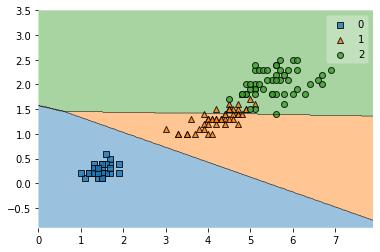

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
mymodel = ModelWrapper(model, device=torch.device('cpu'))
plot_decision_regions(X, y, mymodel)